In [0]:
!pip install tensorflow
!pip install pillow
!pip install numpy
!pip install opencv-python

In [3]:
import tensorflow as tf
import os  

# upload the model zip - Tensorflow version - from https://customvision.ai/projects
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())


files = upload_files()

Saving tf_model_pb.zip to tf_model_pb.zip


In [4]:
#select the first file -> model zip
import zipfile
modelZip = files[0]

print(modelZip)

#unzip the model
import zipfile
zip = zipfile.ZipFile(modelZip)
zip.extractall('exportedModel')

tf_model_pb.zip


In [5]:
# you should see two files: 
# 'labels.txt', 'model.pb'
os.listdir("./exportedModel")

['labels.txt', 'model.pb']

In [0]:
graph_def = tf.GraphDef()
labels = []

filename = "./exportedModel/model.pb"
labels_filename = "./exportedModel/labels.txt"

# Import the TF graph
with tf.gfile.FastGFile(filename, 'rb') as f:
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

# Create a list of labels.
with open(labels_filename, 'rt') as lf:
    for l in lf:
        labels.append(l.strip())

In [6]:
import cv2

# Load from a file
imageFile = upload_files()[0]

Saving 2018-05-18 16.31.19 1782024358442525848_rose.jpg to 2018-05-18 16.31.19 1782024358442525848_rose.jpg


In [9]:
from PIL import Image
from io import BytesIO
import base64

#data:image/jpeg;base64,
#data="/9j/4AAQSkZJRgABAQAAAQABAAD/4QMiRXhpZgAATU0AKgAAAAgABIdpAAQAAAABAAABwpycAAcAAADEAAAAPpydAAEAAAAAAAAAAJyeAAEAAADAAAABAgAAAAAjAHIAbwBzAGEAcwAjAGEAbQBhAHIAaQBsAGwAbwAjAG4AYQB0AHUAcgBhAGwAZQB6AGEAIwBuAGEAdAB1AHIAYQAjAHIAbwBzAGUAIwBnAGkAYQBsAGwAbwAjAG4AYQB0AHUAcgBhAGwAIwBpAG4AZwBpAHIAbwAjAGYAbwB0AG8AIwBmAG8AdABvAHMAIwBwAGgAbwB0AG8AbgBhAHQAdQByAGUAIwBmAGwAbwB3AGUAcgBzACMAZgBpAG8AcgBpACMAcgBvAHMAYQBzADsAYQBtAGEAcgBpAGwAbABvADsAbgBhAHQAdQByAGEAbABlAHoAYQA7AG4AYQB0AHUAcgBhADsAcgBvAHMAZQA7AGcAaQBhAGwAbABvADsAbgBhAHQAdQByAGEAbAA7AGkAbgBnAGkAcgBvADsAZgBvAHQAbwA7AGYAbwB0AG8AcwA7AHAAaABvAHQAbwBuAGEAdAB1AHIAZQA7AGYAbABvAHcAZQByAHMAOwBmAGkAbwByAGkAAAMBDgAHAAAAYgAAArgBOwAHAAAAAAAAAACShgAHAAAAzAAAAewAAAAAVU5JQ09ERQAAIwByAG8AcwBhAHMAIwBhAG0AYQByAGkAbABsAG8AIwBuAGEAdAB1AHIAYQBsAGUAegBhACMAbgBhAHQAdQByAGEAIwByAG8AcwBlACMAZwBpAGEAbABsAG8AIwBuAGEAdAB1AHIAYQBsACMAaQBuAGcAaQByAG8AIwBmAG8AdABvACMAZgBvAHQAbwBzACMAcABoAG8AdABvAG4AYQB0AHUAcgBlACMAZgBsAG8AdwBlAHIAcwAjAGYAaQBvAHIAaQAjI3Jvc2FzI2FtYXJpbGxvI25hdHVyYWxlemEjbmF0dXJhI3Jvc2UjZ2lhbGxvI25hdHVyYWwjaW5naXJvI2ZvdG8jZm90b3MjcGhvdG9uYXR1cmUjZmxvd2VycyNmaW9yaSP/7QB8UGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAF8cAigAWkZCTUQyMzAwMDk2OTAxMDAwMDA3NGQwMDAwOTA2YjAwMDA4MDdjMDAwMGU1MWEwMTAwYTI3NDAxMDAzMWI2MDEwMDk3MjAwMjAwZjQ2YjAyMDBkOTk4MDIwMAD/2wBDAAoKCgoKCgsMDAsPEA4QDxYUExMUFiIYGhgaGCIzICUgICUgMy03LCksNy1RQDg4QFFeT0pPXnFlZXGPiI+7u/v/2wBDAQoKCgoKCgsMDAsPEA4QDxYUExMUFiIYGhgaGCIzICUgICUgMy03LCksNy1RQDg4QFFeT0pPXnFlZXGPiI+7u/v/wAARCAQ4BDgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDDn1K7vNQS10a3ZJO7GpNZ0gaZb29xLfNNdXMmCMcH1Ire0WwS0MkMb5eZwXk/2B2rl9YvW1jVp5Yv+Pe0jMUX0XqayilYkr2oaNRMmQ+T0qpe2727CZI3MT8sQOFaprW4juYxhjEV4K1aYXcMEpiuWYKN3lEZDCs27SEZSSK64PIphhZ5I4ocs8hwB6VLLHZSW6XdnLtY/wCugP8ACfVa2dBcWkU98Vy5GE+laAJDGtus1uoyFOG9z61oWV3Lb7l4khPBhflTVyW1tr8LLGyxXDpnAPDfWshFkicxSoUkB6GsmIkl0TTtQd30ub7Hdd7aX/VMfY1yE8NxZ3D213C0My9VPf3FdaSpY59eCOtWpZrbUbcWmppvVf8AV3A+/HRfuByWnJvvovRAWqtvV3m39d5rorbRJtPlkna9ikiVfkKjlxWDeWcr6isdnC8puAHWNRyCacPiauNIiMYYZU5FIieT84UmV/ljWlnsbqwv2tb1fJeIB5BnPGM11Gk2nkR/2ldJiWXi3Rv4E9aqcuVXYE9parpluI+tzKA0rf0onuUs7aW6lUccRr/eapZGBdSzcE8muU1Oae6u8SqUji4jTt9a5oR9pO7J3Y+DUyqsl9GJo35atrTfCFr4jjmm0m+WFozh4ZQT/KuY2U1JGtpRNBcSW8w6PGxU12RVjRHbad4NubfVWXW7PZZx27kywt+7Yr0rmNW3yafYmMu1tC7rt6gc9a1k1zxHrFjdNNqLtbWyguAn+to0+7a0Cyywg2kw47ipbcZjONSTy3WWGQxyIcq6nBBrr/7Xi1fTpBe2Be8A2JOowr1JPo1lqN4LmN4UtAgLRQ/earMyeI54lTT9Ckgt0GELL2qr3EZlnE2oarYw3V080heOFQxztT0Fb/j7U0ikbR7PhIlUzn+SVZ0SC9s9JF/f2Edt9gmaUTOuJJSa53R7L+3fETPM7GFZWvLp34wi80lvqBH4lgOmw6JZp8sn2VJWHoWrmY7i6tZxcQ3Mkc6nIkVsGuv1ZovE2r3mosz/AGfcI4QO6rVIabpVv95Fz/tvVIDpdO8aaXrMDWHiSBBuTb9oUf5xXCI1zY3lyNIu53jWQhJEyA6+4rWM+iw9UtvwXcaY2t2EfESu3sq4qgIh51zbRtIjJdxy7wxXHIOc16Mnja0ubZ473Sbk3DwGOQIAY2Nee2+o/bXcRwsu0ZO41XOq3zZFusaLnGTyalKwF86XJcxxxzylEViQF5NWLF7bRnujb3OWmQI+7nArBludYkjkUlmDD7y8V0tjeacLGwjtWgS4VdsgmXB31nUk4xulcTM0S6fbZEVsyyODhyuM07T5WTzDOpXJ+RiMZrpNbsLi60szSIDcWxDqU/u965WeaZ9LglkB2JcL8/qtZwqOotVZ3BMsp4hdJEaNSksMoYAjuprudL8Sar4jlvDa2scAt4izPI5KZrjfF0NvFqNte22zyJoVBKdDW94AZbux8Q6YkgjuZvnU/UYroQzCf4geJ5UxHJbRL6pHWfca74guoxv1uR1PYVg3FtNZTyWVwhWaB2R1qSMhVz+dJuzAmfUNWKuGuCw2kGvQvD2J9FsEkOVKOlebykp26qa7vw4xXRbKUnhZZBQ2rO4HKz3eo2N3d263MpWFyME9BTF1zVk6OD9a0/FgFvqcdyn3LuEFx6kVzqpv6UN2AvTa1dXKBLlHwDkFGxVux8QS2Vv5Ijkc7yQznPBrH8rPBpy282cpS5hHVw+LZV6xVfi8TRykrcQSRoR8sgXeDXEGOReGTmrFnfy2ZKlfMgJ+eI9R7ine4HbNJpN2nySYP96P5T+IqBLVR/q7kM3bdxWNJbQXEf2izbIPYevoasWFrbX0TolzLHeIDujY8fUVlVcLXkrgS6joxv4GHkgXCj5CDwayNLt73RXl/tLRZ57OVcOgXIyOhrUt11YCUJccxnBRqu23iPVtOlCzlzF3WiFSnayY0cpqxmv4Vv0Q+VG5Ug9UHasHg8g11s9xAJbiRAtyty5Yw1LN4bgvoxNpz+RMRzBKePwNaQd0M44Y5B6GvRfCl/d31peWDPvmtYg8Oe6d1rg72wv9OfZeW0kR9SODSQySo8c9tM0cydGU4NWI63UdNtri+tp1TyJDKnnRY+VsHqKyfEsm/XZz6Iorfs9Si1W3C3HE6cP9fWqesaM1yGvLVmedR+8Q/wAYHdahS1swOXFOqBHDCpM0AWrO6+xXsNwf9X9yUeqtXaW0LCC7to/nEYaWLHO5CM8VwRG4Eeoru/B0skcEdwDvaAyIV9jUVEuW76DSuYsjsnhGFoid0t0VbFZ8Ut5KgX7HL7sFrob6OXTdItYrGXzpp7p3XYv3Qe1QQ2mr3EbSXt01unpnmlzXjdJbg0Y9vFc384t7QZc8s5+6g9TXTiay0S2aztSZblzmR+7NVM3CQ25tdNQqpP7yXuxp6xLpsJnYb7h+AT2rKTctBFYhhl5vvtVOWXvTJZ2Ockk96TyVa2kLMwuDzGOxFJIe5csbaKUyTXJ+79xD0Puaoz6i87MqTMAuQc9DWabyV12NkFeCKgmkViXfA9q6Ixshk894TCV9DwBXcab4Q1C5022u4rzy5Zk8xMVx1jo93qC78CC27yP3+ldCsU1pH9ng1a8MIHCbsCrtoBJJeHMllrVtDclQVEqcsjVx6gplD/CcVrMgTKrnrVOZCfmHUVFrBe5WMhhHmDtXT2iizs0T+N/nb6msC1tzdXCKeI4zvc/TtW1d3Qg3OcGRvurUS2sFn2HXmoJZwxJn55D87dwtdElqIPLji+6yg57tmvOnRpt7SHc79TXo2iXAvNItZes0BMMn4URguXzEyZIEhJMe7J6mnyu7oyPMwRhhgDgkVoiLEfmSlII+7SEKKxbrxJosR8qC3kvnHVlG1KpRYjmr/wAP2nk407e05cZR27e1aeneBNXlw81/ZWo+oc1Be+K50x5WlW8S/wC0dz1n61qE0sEK6lYPBcGPMDI+3Cn+8taK4zrB4I0WBi2p+JMt6R4X/Gm/YfhvYS4mup7t/QsW/livObewnu8eVA8jHq7nArpbDSbazVmmxNcN2XhEFEpqKEUby6tr/UJm06yaK1yFhhReoHdqsx6HeSlGunjjQMGMf3mOOxq3PqMFgohi27j/AMs4v6msW6ubq5Kh28tP7in+ZrFXk27WEdfqXipwwjNva/Ku1YoU6fU1ykmpQXZH21XZhyuOAv4VXVQvCis64b985q0kM1Y9UA4mjyOxWrS39k5ASTLHtisiysLm+y+fLgHWQ9/pW9Hb20A2W8SqO7tyxpTsgBnAH3sCmPE+1XKnBqIvF5mVXcB696rSrduXnmvdifwr29gKUVcRLK/krnaSxOFUdSa1o9KWx025uboZvHTgZ/1QNXdD0GWCMajeuDLtygc4WJfVqoap4ksoUnt7SL7S78STN9z8Ktp7IZSWyg/s/wC2S36I+P8AVmqsRE0UUijhs0+S3tZdTsPMQNFLbhsdicVbtLZ4rJY4wplLu3sgNS0FihdtAhiikk2sPm4GcVQZILiO5k+0lfKXKh/4zUl9HFayoquZp35fHPJqWHRif31+5gU/dQcsa0irICnY6fe6kHMAVUTqzHArprDw/axHzLt/tDAfc6IKsvc6bY28UJk8uMDKoOp96wtU1ZbwiCzdhFj5j0qwNDUNaiQG2sY0cjgvj5F+grmrnzJEjaWV5CSeppyKqpgUlxxHD+NSBUIyMdqu2U0jN9mlkZo3U7QT0YVSp27y2jlH8DA00BNfLsnU4xuQZ+orV0oLNYXMUkRWHktL6mmX1qbqayRGH758D2Bq/qcgSVLCEbYYEGR60wMeIsBsbqtTDgin3KDbFKv3xw3uKjBBFITRs6dcKmLaQ5VjlPb2p0sDwzybATH1rIVs8dGHINdBBcC8gLHiROHH9aZLGDFxCyE4defqKoFAThuQeKuKRDOjN93oT7GmXUJjc4Py9RQIx4ExvGBlSQwrMQGJ2GOC1aN+gV0dTjeOfqKz3zjrzSLuXW4J91NZGCVNasREsSNnkAqaz1HGKANcKzWsEo7jFOcvlyy42pzTrU50+AekhFGosI45wOr4FAFTR4ru5vfs9oAXkXJzwABWxqVrLYusU0iO7DPy9BVHw3KkepPmRUzEQGNamuS20t9CIZ1kxENxXsaip8LBmOQO4oXK5KEqfanEU2udNmdxwluFOVmYGtJNWUIEuLNZR/FWVmm1am0O5uvb6bfBJLVhDnhlB5/KorjQr2OFpLdvOP8AcxhiKx8w7QHfafUdalt9d1SyAEcwkjU8CQZrdO5ZVDqkgWYNGwPKuMGnGUszMO9df/a3nxRprOmwmOVMo45rMbRLeVXayWSM5yu5sqwoAwi2BlqsKkip5s0UiJ2yuM4qKaX7MInhhcyQyhmLrlQV7GtG81zVvEuqWavFHliI4oEGEy1MLFL7Ttsp7mMFfmCITSWsRSFJGJMsvOT6VZurP7Mtzpl2whltp8tjkYqGKZbmVnj/ANVEoVaTE1oTOQ0gBPCrWVcz/aJBt/1afd9z61p2yC41C1tWHFxkfn0rIaJoZJYX4aKRkP4GpSJSGVZIBhVvwqDFWB/qAPRqYENFSYooA9Xv7tdL0K4uxxNOfJh+rd64nyxZaJEzcSXshVc/3B3rX8T3EWo6rbadFIBbWmIi3be33jWX4hu7a7vreC15gsovLB7E00rIso2FlPLe28NqVkeTgDOK3bdpPOdfLIljYrIp7Guagle1ura7h/1kEgce+K0dY1U6pdC4hge1dwfOw336iUb2Eyve21slzKIXVsckL2J7UWV/9kPlS5a3Y/ihNVYhg7Yo2Yjk7RnA96a4U5xyrUxHWBkgCSpzzlTWvI63EUYnGVYfKw6rXI2hB06JklUtExDoTyK1rWdTGA8mO4HtUMB0trLbttI3IeVf2qM4AIzxWszxTW4RmLROfoRWbcwPAyrnMbfdepETWrvkICoCjkGrVxZ3ULJqNjJ/quXCdVFZLHy3IzkYrV0e+Sxu/MDAo4xLEehWklqNM5lwmua6ZCSyOytK3qqVtXs4ldnIJHQAdFAqzf6Vb6DNLdWvNld8xHsn+zXOSzzSFyjBRjJxU1FKUvIbJJYWu0UeYyKpyKQW5UYedpF9CKxy16Vyl0R7GmH+0yOLoH8aqCSVuYEbDQ2Skbjyegp6y2lm5HkpuA/iGais4XhULaQC6vWBLO54WsKSHUpJ3eRN0rtg5IrVebKO303xdPYPLFDawz2zj54QuK55LiNzcyIAke8sIv7uewpJB/ZtiLeAB7qY/O/90VnQWGpSqfJttw7nIo0C5PPcwtFmKN1cMpJXjIB5r12DVU1SzS7065l8lAEeNj88bD1rxH9+oJZCuDg5rY8Pa4dB1Lz3QvbTLsuIx3Wm48ysgPX4ru5LBJW85W42PyKLmKzZrgTWabJwqzhPl8xR2OKPt2gWtrDqJ1KMQXH+qLcv7jFYk/ibwuheQ38sh67UQ/NWfJIDmPEnhk2KTalpb5sGOZIVJ3w1x0UelykebLNHn+L7wr07w7r9leXd9O6CFUAxG7ZDq1cb4l06z03UXe0ZDazfN5a8+XmtYt7MDNfQdQRPOt4luYDyrxkGs11khyJYnQjsRirlvcz2bFrK8lhJ6hTwauafaPq2qWtrNMzK7+ZM5/uirAiDpYaYpDg3N3z7olJZS2sMjGcuFMeEZRnBrvPGGo6Ra50uLRbd52tgVm6GINXnOwQhQrFhjnNSwNlJIX/1dyh+pwaWSHcDvjBrn3hU87QRQhdOFldR9aVhGvsVcjfMARjG44pxmnFt9k87dbltwQjoazDcX0fSbI9xTft8xKiSNDyOQMUuUDRuFEliqDjBxRpV5No2r6fdxk7hIob0ZG4Ip7JlbqH23CtLShceJJrHQikcSjmSYLlgqVQI6j4iaYkpj1aBD5sOIrkeqfwPXmT8KFU9Rk161EI/tuoaO073UVrGsTtL95+ORXmZ0W+e5ngjj2wpIVDt2Wp+LfQZVlBOlwTnqJCo9xXd+HWRvDUKfxC4c1hPY2z3WnWju7W+4KsSD5mb1NdBppw2p2jKqSwThdi9AvtSk7RYFLxNAsui6fdEcwTFT9DXGQy5kVmwAa9HuAlz4cnhfp57ivMQMDae3FNaxQjbeMYG7AzSD5Tgk49a1fD13DcQPYzbRcId0RYffFbLrHKrQyouOnAxUtWA5loXKj5Gz1U1HiC5kEV03kXGMRy4wrezVvQyvayC3kcNACPn/u1oeXbTmb7TBG8DYRMjn6ipA4gG80m6w8ZRz1Q/ckHqK2ZEgvEjuYHMcoOUccFW9DS3G3TmNhqavc6fJzBL/HHWRn+z5z5Uongb9R/jTvfRgdLY6is84hu1EV2BjI+7JUc5VJHDEZYkgGs+aKO7jQhveOQdVNOFz9sjVJvlu4vlPo49RXLUpJe9ETIbmFf9dajZKOqjjPuKhi1q8tWVrmIyR/3xwRVwoTIFB247mqU0U8W8sgZM4YHoRVUqrjowTOz0TxDFeh4H8t4yPuyAN+YNRX/hbStUJm0yVbObunWJq89Nm6SebZylD/dJwRW7Z6zqVin+kqpFdilF7Moy7yx1PQrpftUBjbosg5SQVv2WpYCuvzL3weVrpY9UiuLOJLwQ3EVx/wAsSM4rCk8OWBu5ZY5nsYifkTO6pnZlWKmtaOk6Pf2WBIBuljHRx6iuesNP1LVmCWNjLMR3A+UfjXQLcTaTeSW8h3qOvoynutdrpHiCS0tBA4DWYGYXhXBX/ZcCiErrURgWXw61CTDanfw2id0j+d6t32h6Ro7TQ6VNc/bFTczs9WX8Z2kUsjOoQqeFeuKu/ESSaw+ppDI6ORvD8D8Kc1zRaBGhY3UFrC5ZXLM2SR6VmXmppcgyzuQgOI4F6n3NbcdrCIvtIl+8rOATwFas3wno7a5q8s7Jm2tf3re7fwrWVOO9+hTNSC2FtArTjCoA5X1Y1hajfMzF5Wxk4VB1Aq/4h1lGu3gtWEhQkFx9wNXI9zJIxZu7Gmqfck2IBaX86Q2ztGxHWXgZrcm0jXrFMXems8I+5PEQ4HoeKPDfhJ9WT7dqDvBZ/wAAXh5a9QgC2lvFbW0sphjXaPMbcSK56taFOVlqzqpYdzPOU8NR69pLX1uZI9Ti4kiddqy4qPTvDJsAtxqFpJcXR5SAD5E92r1ITSkgnH5U2SSYnIaksXpsbrBruefXC38zDfay+yhTgVm7N7YAIZThgetesCeRV3A81g3mjabqbSSyGWCdjkvGaI4yDlaWhMsI0tGeXXnl2rOWYYrX0/wjqepW63Nzcx2ULjKBwS7CuzsvDOj2EvnsjXUw5Uy8qtbz7psNJyazrY5R0hv3KpYT+Y4q38D6PEgD300kvd/urVj/AIQTQuWlurlq6zytoUBc+gFWlhO35+B6V58sbXv8bN5UqUUkmcJL8PtIbmHVJ4vqA1U10PxH4YS7bShDfQz4JcLl12/7FeklE4G2kDCI/u+DW9PHVVq5JoxlQjLY8EknfUJWkvLiSWcHDLIcbfbbRnGVQflXrOvaBZ63bzOkMcWoAZjmHy7z6NXmN/ous6NCJr20HlMwQOjhvmr06VeNVaOz7HJOg4lnS7qy01Wubi1W5vyxEe8/JGtRT3TXVw13dLG0p/iPRRVg6VcWqWVrPZp/aN9xDGz9A3QtWBd6fdafdz2d4FE0JGQDkc1tqYtWNpdRikcQQM8jkdhhRVLVLhxItokhAVQZMep7U/SES2tLnUJB1JWP6CsYszu8jH5nYsaz5VzsRYsvIWRgcB+2atTRlG56HpWMRnH1rdgDSwvByxXkP2FXfQdisSFpLewh3Ge7JZc5EY4z9asDykOB85HftUcsqj5nP4VN30Auz3buqoAEQDCovYVEZ0VPmbAPc1mJNLc3UcVsuCx5J9KfeBPtLKDu2fLilyu+oh7X6R8Qxbvdqp+bLdXdqZ3GzzV4HAAzTQm4nPAqS2ghu7kLNKIreMbnatYgdR4ga81OcwpN5cCJ+5i6LJXFHCho2QoRwQa7HSNUtbqRtLuoWlttx8qZfvpWvF4VnF7Hdyv5tsG+beAu5KoDlbLU7A2kcNzDI11CCIZE54rQmhin09JpJ2hDdAnVq615/Dui2l6tvDAlxLEyqV/euSa8+hvYoYY0u7ecFBgEDioa1ugNVJdG0xYTbSiSZh+8kcfMKz77VmlkK2nKjq7UPf6FIjiS1llfHy4+XmsSNht9Mdq0Aa253Z5WLuepNSxphGbFRdScVKRKU2qjN9KQCLMuEz3PNSXnytCvopNVvIuMc274+lDmTguj5AxyKBCU1j8pXqTwBSqfMZUjGWJwBWpb24t36b5j0PYUAWYZTEbHzeDEveoDK1zeySueW5NSzeVCQ1wu5j91ah05N/2hmXktTGaMaMrFmxjstZ80QglIVsxtyvt7VtKtqgP71WJHPNUbiJIYnycoeQfSkBTBINW7a4NtMJcZQ8OPaqQEi+WJI2Teu5CwxuHqKmQ4yCKZLNu6VcoU5R14NSZ8y1GCC8fB+lUrOQNGLSQ88mM/0qxAqpIyYwWGDTIKF3biaIgcOg3CsPgiuqlVo+fQ1zVzGIZ5Yx937y/Q0mUJZuscrIx+V+n1qOSF4ZGVlOCxINRNjHNX7MX11lUACIPmdxQMt6aN9qg9JzUV0sE91Ik9x5cUfJA6mr+mpCUlWBy4R8sfeubmfzJ53PdyKBmp/aWn28ZjtrIle7P1apZxmO0nCKgnQ8DsRWEceW3rW7M2/StNPo5AqJ6xYmPVYGgDncHHBqv0NPhOUkU+uaYa5zMSo2NPaozQAxpSiMoUZbjNMiAPy9SxwKSXp+NWbI2kU6SXUrqE+ZABkE1vHYpFuWSR3CuxbYuwVIk13GE8qQgKeFPSojJExZo2DZJOacrmi4XN2O9jvYnhdMMww8eOv0q3pAsNNuzdTWEsssIzAUHK1zYdcjcSCOjDgitO01HV7eTdHPFcJ3ik4JHsapSQ0xuq6raeIdemmjheEPZiEiX77OtYuiqq2mpPJ0iTNdsNV8M6uUW/tFhuRxuPyuPowrnbvSJ9IjuDbD7XYzkEuvLKB2YVT2KMjQXefXrGU9RJuPsBVvXbSb+2r9oIWeOR94I96qicSKBG4AHZPlIpQZegkfH1rF1HtYhsoPBdR/ftpR+GakUMIcOjKQ2cMMVpRSzxFmWd12gkmqDzTXAeSaQu57mqjK4iGil7UVQHRW2mynRbjUhIAqTbEU8lz3NVH0q+AMluY7nI3MqcMK6m8tJIbW106BwY4QHkXPLN61mxv9luI2YFcMMkUN2ZZzEnn2/NxazRD1ZTik81QMkjFdvrHiCWCCewnsBOJl+Ry3yFa4RJFt545o4FKo2fLfkGmBqaZq8untMIRHIsuMg02UpM8jqu0s27aOgqyuq6DNk3OjuHP9w1mxtGzP5TEhT8u7rik0SxPKjeRNy9TWlHdoJPLnH7tRhWA5WqjAlom/2hVpfu3MmBjG38TWcgNqCYLHt4ZM5Uir8UoZDHMm6Nj+Vc9o1jrN5a3k9pbCa2tzhl/iY/7NX4LpXRWDtnHSiwDbuBrWTaWzE/KPUCSRHllIPY1e+0xurRyqWjbjHpWbODF+63Bk6qwosI6LTb23eB9Mvjusrj5eesbHuKwNZ02Xw9P9glO9JRvhm/vpTIUWVcE12Wn+XrMC6RqhDOmHs52+8pqho8/FvL9nNxIuyAfxN3qvCAzNKRhF6Vb1Z9Ql1F9PvFEX2dsLCowP8AeqncuEj2KM4IAHqTUqFt9xjoHlJlcOVLKeBSW21X3kklRxWhd6TeaVbPcXLoOFVE7szVmxgxx8/ealH3rsBbl/MmZu20AVW3vGQyuyn2NSmon5FIQuN8NxcSSj92R8p6sTUbfadNubW4Nq8LgiRFlX5Wp9o1tDf2ct2pa2SdTKBz8or0HxDqmh6npd+DfRTyoA9v2YNW0dikcNf29pKw1G0QfZ5OXi/55Maz1KjkIuD7VLBMYI9uM7h8y9jVU/K/A+U9KTGPdADuHQ9cVsoUntBHjPHfqRWSpqeCUxHC9uRQhMrPH5TsoOVXvXWeGbc7XumOHmfbH/uJWDfRgrvTo612umS2506G6RdscMGxT6EdaYHK63ci81m7k7IFjH4Vlnb3NErgu8xP32JpsCy3cyw20ZkkPpSAX7hHOVNPaEMMg1cOjahEjSXKLBEO7HrVWFgCYy3GeDTTAr/NGcMOKimjG3cvStcwhgVboazmBjLKaoRpxMGuIj2kjxTLCe9tbmc2dwYJ2jZN4649AagRtscMg7EGluz5d0XXocOPxqWBNZ6hqcOqC4Lv9rBLMH/5a+oNdLdSxao0j2tw8DyKDtJ+61czfSMFs7tRnY33varrBWY7TgN86ke9FrjI21rV7B2tnjiSdRgSbefqKq2ZuI5VmjmInLbmc98+tXSY9ST7JcuFuUyYJfX/AGTVOyzvUPwQ2KGI7Oyv7bUdNvrCRkgvBJvGeEcV55KmySQblbDkZXocVtOuJ5xWW0e5W7AcigaIAXDJLG22WM5U13dhexazbllOy4QYlT+orgASSfSp4Z57CeO7gOGU8j1FG4z0DyYShiIJB6n3qKIyRPHDcrmAn92/pVuOaG9to723b926/MO6t3BpY0R1aOQ5jYcH0NZtWAtRItxDMk0SyQnLRBhkcVzN/pUaQi8so8KP9ZFW3Gz2Unllw6MuAx6LVn/Uw2zq4cPIVY9qhiOHV0ixJb5KsMvH6UsjecFmjPzryK3prP8As+5N1Eoa2k++B1SqV3Zbon1DTvnRP9fGv8wKm7Ts1oBftSl1aLNhfn4PqrCqc8bS5XsRhjVPRXkurmaK2hlkgdcuVXhGrZFhG8hS5lMa9CornnBxqMLHHPJ5b+WmZG3bVCDJY+1dHZeFtUvzFJfobO19G/1jV1UKaZpmLhPKjZRgPj5qxr7xUTvS3Vnc9HauyntsUakenWekROYIzjsXO5qxbjVt84WKFScYL9awjPfXrBHnYknp2qu98YxMjLtlj+VQvQmrsmx3NLVr628uNLhw1wv3dnUD3qvp97NbqZYH3Rt1WuY5JLNyx6k05GkiO6Jyh9qfKhHZz21h4gBaHFvqKdm+7JXL3MU9s8lrdRGKUDoeh9xTftvQyff7MvBroPt02paS632nzOsY/c3m04Q+7UwIyPP04MT/AMuvr/drW025bR/A99MMpLqE5jQ+qrVC40i406wtPPuI5oZZRuEJJIQ8kV0Wp69oH2q3VrYNZ2sAFvb7O9Zxdm0urKscLaaZqF2FFjYyzK/RsYFddpHga6e5jk1aWFIU+d4UcM59jSJrPiPxJJJBpFusEKAbtnGAfU12mk6SNGs3heczXU7+ZPJ2z6CsMXiI0YNKS52dFCi5SV9i/M7SMAFCRIAqIvACinId5AqZcFfeoZWFuhYDk8CvAlVtrc9aKUVZE4kXdsJ5qQmM4zz9Kqwwfuw753vzU4AFY1cU4x0YWTHF+OEo4xyKSkNeRPFVHK6kwSHIyE7SQuehNXEtojw0u8+gNZbAYOarPI2AEOOeoraOMqtJMUqUp7TsdC5itULyMETp6k1CssM6lon3AdaySHkKGV2cjoD0FSBdhyvBrZ14KJmqDW89S/3NRlhmoBM6nnkVYVkcZWlTrr+YpxcSByHP0qIsHXZIMrkHFXGGKgdf4hXp0a9t2UrMwdR8LaNrE01xJJcQ3cnSXfkAivO7/wAIeI7KWXFs12rnAljO/NewBSSakQyqcLIw/GvTpY2SjvdeZzVMNGTutDyG/wBL1sWdnaLo1yEjQFsfPlvwrAuLa8tBm6sp4R6uhAr6CV5s4DsKlJLoyTqssbDlHAYGhY+z1greRjLDJbHzhDD9pkRFbC9WPoBWtPcNIBDH+7gXjA6t9a9EuvBGhSyu8U9zbbz9xCCorOm+H7D/AI9NVX280Vusbh5fbaMXQkedSXaQsEClT7iq6q9xNiM7iRlm7KK9SbSfFixpC0GmXCJwJcLvYVz7+HNehaV102MRltxSE5rdVqOlpr7yXRkZlrHDYRST/wB1CSx6msAPJKpwPmJLE/Wtm5nSX/R5UaMhssjgqeKVEV1yAqRirUjJxcd0Z6pJNAkITD5+ZvapF0yEY86Zm/2Vq81wgHlwr9WqF2jjGXcA0KTJNC2nktozFaFIEPUgZY/UmoZm89szXU8uPVzisuS+t0QhSWNdFa+HLyWzhu7i6WDzV3KnTC9s1SUhFEMisDGgQYqVLrYfnl+XuDzTZLbQ7WQfa9TeYD70cNS3mn6VPapPaeZbqvzBmOd4NHJ3YGLd2tvcXLy2n7qHAz/vU2Gzt4mLSkyegqaRozahU6AjPqarmQKvyLk9qtAOlaNCUjjCqetLHKFUIgb6iqRuXkOHADU8M/ZsUwNEGUHId/oaVr94uHkSsqCG6u5jEsrbR95yeAK3ILpdIlD21rDN23TDdzTAu2mlX2owfakEUURYqMrh39xRJZW0cUkdncBrxeqselVLnxRqsyPEAkO7qUHIHotUre6sUlQSIys3VvU0ARS2V9Z3EMl4A/m9GzmtDT4EnedZLpYQOajkWXUNSEayHy41yCeirQixpcO7LlOlAGm+lL5LywXcU+3qo61iTF5ylonHmSKgHfk1bkTkSQnYeoK8USXJiurS8SEPLEfmX1NIZY8V3aHULazh+5YxBPxrIjkEg3CqE8kk1xPLKcySOWb8aSN2RxsoJZrnkY79j6GtiKT7VCJOk0fD/wCNYqsCfQ1NDObadZxyoG2RfVTTJN1x5sRf1U5rnL3a0KS90OCa6hEAwFIMcoyhrAeITR3Fv35x9RQNGLHgTwMzAKHBzW5q9872kbRSDbM5VmFcyuduD16EVrRz2U+nR2lwxieJiwYDOaYzT8OlYrLU5W+4imuXj5XnuSa2rvULc2cen2ClYesrnqxrHYqnBNAAybTg9CK14cz6LkctbS8j2NZoUygbeQK0dKPOoW3aSHI/CpeqYDY2wR6GpGqrGflWrTVzGTGv2qGpyMqpqIigCCQZH40FexFPILFQOpNBlkRirYYA1rHYYqfKeODU4c1GHgbruQ/mKkZFC7g4IoYDw+aVpMcJ+dQA5p9ZNiAqrDDKDWhpmpXulM4tSCjdUfkVRUZqQYFCm0FzVnl/tmaNDYwxXbZ/ex/LWfc29xZcTx4GcBxytQYkWVJYnKSKflIrVOvwFzb38XXhyvK1orVF5l7mBdTB/wBzGfkH3z6mmRHCyj1FdDd+HYJIxcabNjcMhSco30NYEsNzZS+VdQNDIQMbuhB9DWqikrILDB05oqzsji5ch39B0FFSSaevajMdYlW2lKeSgjZh3aobfWi5EV8q9MCQf1rnldnLyOcs7Fiak4IqmWdZIbW5RY7tm8oD5JEOcVkXek3Fuplt5RdweqfeH1FZ0M01sSYnwp6oeVNaEVxgB7dzDJnOB61OwGYrhuh59KAzRuHXqO3qK63fpmtWzfa4ltr+Pgyx/Lv965qSymjGQ6zJ6r1H1FO6EWormGXaMlSSODWvfQLZ2y26yF3c739s1V02+tL6L+z9TK/IQYJsYYEfwk1qeKLhZpbdIgAFQbnH8RqJbodiHTGa3yNJ8S/ZXf78MuUBaoJLTU9LDNcKrrKc+Yh3AmsCZFkUFlBIq1pzvClzKZHMEa7VQnILGq6AaAnZhkVKjg7l4Kkc+1ZUfmKgcnOe1TRPtfeO4wRSRLNAxGMjBODyDWikkrKjlj5iYKOOxFVbSXdGIpFyhPfqtWmR4DtOdp6UMR0OrWR8UadFe2mBq1mmHXvKlcl4a02XVdds4ZIisVuxmnz/ALFbNldTWF3HexksqKVdfVTSa2bjTJJNT0y6K2mpKY5cDJQtRfQpM57XNQGsaxdXKgrBG5jhX6dWqieRUbQPYhVkikWL+CQqQrZp+RwaeltAZBnBIpjc09+pIplZEjAAeDVYQBHzgEVZpcVcbopER3O6xxozyucKqjJNPlgurOcwXMDwzKASjdcGr1hrV5oU801oLcySKBudQxWqV1qU+pXUt1dzeZcPgZC4GBV20KIelSK20q3pTktr2UFo7OVlAJziolJKK5UhCcA9s0rAzShIkjeI/wC8tJa39zYx3Fup3W84+ZD/AAt6iqiOV2MOqGp7sDerKPldcigkqY+QqRuHpXY2eraTbWiLZWbJNt+dPf3auUtoHuplgR1V26bq1H0eeFyouPmH+zUjQ+7nub4GW7lbCD5R0Ra5yScKCFTPPWtG707VEO5w08f+yf6VlOyj7wKsOxGKqKsFjcilWSNGB4Iqtdrlgw7jms2C5ED9coeorYXZMPk54rQCrD80AX+6SKln+eGCT0yjVDFlTIvvVhDmGWP8ahiKQlkWGS3zmJuQD2PtV6ymJtQD1hbb+Bqmi79y9yOKZbsY52RuA4wfrTQGjervWOQdKbZywMyAsAQ1C/OBCx4JxXqOktA9lHDLZW7LEoVfkGcUMDziSaHz5XMikZ6iobSaB5THuDBjgV61aQ2UWouqabbBWX+5nBrkPH0UMM1jdQ20cEw4JRcB6BnBSoYLiWB+Njn8qc4ypqzrLxzz2lygAMsALr6EVRikDfITz2pMZa0zVJ9ImLx/PC/EkZ6GvQraW3v4Rc2coZMfMndTXlgIOcetT213Pps6z277W7r2IotcD0wYzhlyDTLhTEUCMTACGHoDWTa65DfBRJG9vKfXlGrV5QYmYuPTtWfK0xDpN80s0kHMSoMg9D61UhuU0a/+2QwtJZyLiVF6qaSQqCXRiqk/dzURfhUH3B94etJq4HQ3Gv6dDaNLHMixZyIogFZya5OK+1LVHm/s60RFXlmcgkVTvLSzKs8W5XXk8ZUVisZoJg6O8UhHVTgGkop621KNq4srlSZb643sPyFVYIvNuD2G01Rnub2aFopLlmQ/w1tW0caRwjI3eXgkVSTV22A61UQygntk06Lwtd3to95HPl3cnZVj7PIoycbadGsuNkd5Kq/3VJAp3A5+60DUbVFcAOCcEdxTYtGfYXurhY1HVV5NdOtp5yGN7mTaOcZqCbw5BdKMTSLVJgVdOvItFY3NrY20zjo1x89bN/8AEK7vbOS2SwTDpht33Vrnrzw4bQALqCNL18pgayGjng5khYJ3YcincET2l3cF0heQmM9RWsdJl1a/S3s3Xz2jAIPAAHUk1naTY3WpailrYBS7DLOw4Re5Nex6VpFlokLxW5Ms78TTt1b2HoK8/GYqGGV7++9kddGl7R6ok07TrfRbBLG157zS95Hq4qr1pyinEV8zVxE5ycpO7bPThBQSSGjH41UeNpbwsfuKBV7A9Khb5JduckjOK56lV8pa3J2IwaiAoHzHihm28L19a4Z1JS6htoOJC9TUbSD+EU3FNxWasUkMbJ5Y0xRlhUjc05UPXFVeyNb2Q9etOoAxS1Lk2ZjabjvUpFNIpKQh4lbo3Ipdyt0qHFArohXlHqKyLKRkgkDNTCPGMDmq8ZOeDiritW/1ypFaPQwm2KIgTktg04xv2IYUlSJ1OKHjKjtZmDb7kJiU8MKozwmM7x9zv7Vqk7uCKVYwMgjKkYIq44xzdnGw1VcTDEZ7MRUm54sEMQasGxuEY+WyMmeAeopDa3Z6xKfxrtp1VdG3tab6o5/W9LtdetpElQLdIhMMo65HY15nCNEvj9mME1tMAV8zf8gYV65MlzFIrNA6BTnPUVx2v+GTd+dqekgM3LTQDv6la93B17+7J+hjXpQlFSi0cbe6BrdkiusYnhbo8B3VhLBLcTpbKrCZ3CkPwRWra3BiI8i6nhYfeQN0P0qSSaSeQzTsGfs2MNXpppdDznFpnXajpWm3UOl2entbYscfap+7tUep21vfv9p1jUWaNflSKL5VrlDEuzejEfQ4zUFxdBIwI0dnPc8gVVyB80dnDIfsg3R5xhuWqBpJCgj3sYgchCazfNdGEgZg4Oea3GtWultpLLErXB2vEvLRt7j0oYhWggu4lkt22Mpw4NSLBocSMJ9QneXB4VcDNaqeHoo5CEviJMc+maoxG2tLySHVLAP2JHVf9oeoqVJMVzM+2ia38iaKORQMI+MOKitbR7pupWFfvP6+wrrNVgsTYpBBFEm91ZWXrgVkSSKkQVWConAFNO40OYoieXGuyMdB61lXUokCxIOFOSanytzlTKqgDgE4rMkk5KqRxxkUwGMewqxaQb3WZ2GxD07k1VAJIRRlm4FXmkhs4jCFLuRyfc1QD4buaSaWG1Q7pD19hWgsckEL+e6vI3ZewqraW7wRLkbZH+Zj3ArSdAtu0q8qflOe1ACMgUJjoyZFUbtpYo2aIAED5m9KtIw+zAu2Oy+tVGRp4pYouXKk/lSGYo6Uq9/pTAw2g1paWlk80jX6P5HlHBHZqYivHKww27NXUdXH8xTLg6VHGUshI7k8u3GBVQNtIKsM0EnS6ZPlRZu2Cr74G/mtF8FivZPLJBOGb61lQyrKMfddeRVy5Z7hRL1cff8AegDFvYjFPJIqnynOcjsTVWtmS5uIBGyFSj8YIyKzhDFJJ88nlKT2FAxi/OOByK6jwreaHp51S41WNJiIgsUJXJctWKLa0i5SUs3qTUUsSMu8FSwpgQxyJ50jouxGdiq+intU8MrQ3qTIhCkFT+NKbuMoVMHOOgqBjvt1ZCco3zCpAssNrsvvmp05SpLwBorecD/Zao4CDlaxkrMhocOYyPQ1GRUi8FxUZ4BNSSQtuyNoORzxTDyc+taYXyIZB3ZMsayAwAzWkRkgUngCpwgAApIAxTe3foKl2ljxUTlrYTIwDnirIQDqeacqhRxRtJNZMQ0jFABNOOFXLkADuaiR4pyYhIU3DANNRch2JkHDMCPk61hnDSysedzGr9uWsLkxyDKNw3uD3pktnjItSZVOdwA5QV0RSii0TaZPqdsS1nKRCDkq/wBw121h4ns7+Sax1KwgMLxZUMc8iuIvbhmijghG2JFGSO9Uo0V2XIq7jOo1XRbC3h+22ckqQK4EkTnPB9DRXLyPO42NM5UH7ueOKKBDdknQxMp9CMUYYH5hitGYzXEryzyFpHOSV4FQSwKImdWYsvr6UhlenryCtRgZFaOlwpNcTSSf6q3hLt9e1JiIANoHOT6mjzzC4ypHfilXlc+tK8An2EtgLwfcVCYi5p89oovZDZpLuAILDlT7Va1NQLHTHH8akmqC3/2OURQQL5C/fHdzRPdy3yl3QKAcIo6AU7a3KK5IqUwzHT4khQvhy7AVX6ipIp54crFKUz39KAJ5BLHGpktbiIED5njIFV0ZiSMHKjJrem8Ta69jJp82pxTQyIFbemXArOhv1gtLiFbfM0y7TL2C07CZLaT+ZMitwfWuhjcECOU5Tse61zVvby3MgjtY2klVMkLVyK6lR2guEKyLwUcYYUiS1KktpceXIflPKt2Za09PnDJcWMm1oZfmizyFcVml1nCxyNlBwp9KpeWYZgrsVIOQwpgdyJZ3hENyiSArtkjIytcfqmgvZo11p+6W1HLxdXirp7WWS5tvMLAspw59anjdonDg1zc0qUmugzzJSZVDKODU8Fqlw5j88RS4+Td0auj1rQv3banpqExnme3HVfVlrksq8RkVcgVumpK6GdBpfh+y1J5LZ9SkS/Q8wqOCP9mt+P4eN1aWaobL4e6zOsV1JqNtbfKHRoyztW/H4N1SHDf8JbdqR6b/APGtCjN/4QXTIyPNeUmtOPw7olimUtxuHfqxretdOks1dZdRuL0no0tOS0ku5T/DGvJJ4AAqOZ3shmCltCu+UrtjVSWLngD3rgNW1Cyks10+xh/dJLv31oeIdZXV7lrS0YrpsDY9PPcdWrnmUdAABVpWJbM9ThiDVpP3sLR/xIcrVIn5zVmJ9jhqBFdw6FZEOJEIZT7ivR4buO9sre9j/jGHX+646iuBuE2tkdDWz4YulivH0+UkQ3f3PaUUWuho6C5Ygoc4qjLslH7yNHHuBVu/GyZY+6jmqLHtUoZVkgs1Q4tY8/SsORGt5Q6DArecE1QuIxincRmlt0jN61JCwWdc9G4NQEMr+1OJwVPoaGIiYGKQ47E0swEirIvDDqKmusCQjHXmoc4A96aAnRszW5Hdq9S0mRVtJm6twAK8pgOZovZq9M0BibW/P8YwaGM2AxF0GHU4NYfjpEvNIguB1hetJbgJdISRhoaoeICJPD90T0VhRFjPJDlvUseBXT+G1jXVY7iS3SWKziJdf77VR0nRdV1R82tuAgH+tk+VFrof7LGiXa2SXomd8NMwXAGewqakuVebGJf+GZtX1VrjSmiFtcjzWZiFWEnqtdNpfhnRtJxJIv2+6Xne4xCn0WsXTJptPurqNITIrDGB61z+qeIbm5kaNBJCNxEkQqYTlLQDttf1rTr2yntbuYOeqhFHyMK4jTdaChba8PyYwknpWK7iZywUquOhNRjbtYYBzVpWEd048th0YfwnsRURPOa5mx1h7ZRBcDzIex7rXQxSxTpvgO5KGgNOxvWs4NStmt1mhvUAJ7owrBuNPE1qy8h0HyE1qpkYx+NWRFvB5qQOTTTbVUDXt+F/2Eq9HdxkCLT7DIQYDueK17rRodRgdo18ucfcbsxHY1zemPKks1rKpWRW5Wne6Gi1I17FDPdPd/PGuQqj5c1FB4kuFA8+zikX1X5WqTUf+QdeevmKK55QcD6U1sOx2lvruhsuHM0DHqCua2F1PSRExg1OHzNp2b+xrzYgHrio2EWQuwMx7KMmnowsdokJbLieOVics+4VNY2t7q1y9pYYCrxNORmNBXOw+GtUmiWUxrbiQhY0lbY0mfQV7XZ2SaRp1rp0IA8uMGUj+Jz1NcWNxKw1O8fiN6FL2j1RV03StP0KFobNS8z8SzN956tYK8ipANwpcEda+RxFedWbnN3bPXpwjBWQK/qKlUioaUVxusW0SM6xLvfp2Hqaowbmmdj95zmnStvfPYcCnQgrIh7mpcroajyxb62LZARcClEWBlx9BU6gKSSKRjnJNcblqYczuU3GKZU5GaQRtVKRspJIixUmKcU20YobDmuNopaKQC0hFOoxQK4zFAWn7aeFpNicgQVZQZGKiAqUUlNoxlqOUc1N0FRk5GRTl5pqVpeTMWKBmrC/KKiXAqQGumE1FppmUiTCmlAAHFMp6mu+jUjNq9kzNjuQPWsyayEamW0URyKSxUdGrV7Ug4r26K2JjJxd0edar4W0zXs3MWbK8bkuoyjn3FecarpN3oFykGo7HV03JLGSVYV73KiwPwMIxyDVVJESVjKok3HjcM4B7CvShXcGoz2NnBTTlHtsfP5ZJSGRgR2waeu4Hg4r12Xwf4XluJZ5LOTMjZKK5VBVa58A6HcwEac0trcdVcsziumM6c9EzmlSmldo8wySOQrfUVLYzTaddreWOyOYcEEZUinNZzwXd5ZzsomtpCj+h9xUotJVGRtb8aTbi7GLLsmtXczNJcW8TknJKDbUd9f2d9aEGKQTpjyzUYtpDFLuGMLms1mYYGCKlPUkC6p8x9MYrPklDnHWr2cj5hkVEthHIjmFmD9gelbKRSM5kVhgioggXipgTkqwIZeCDSOBtJ9KtCHwypCjYjzIf4qqyZOSfvMauwWOo3QBt7CeUHuqEipv7Ou7O8VL6Awuib9jVYy2mURd7ZcKKvXaAW8EWcKy5NUVw+TnvVu4ubmB4UeASKy5Q0AZd2ywQRsrZIbAzU2nXEUMa7SfNkb52qQ2r3Eu+VFAPIB6CmSQaZA4aSfkc7FNAEX9nSjU1htoUleUZVXOAM1vr4Q1FlLX2p2dov8AcLbqox3E1ywa3gVcr8sjHn8Kx572SKZ45rbMinqzGmB00Ph3w6rt5ut+d5fLIvy1kX8/h54/I0yxm85mADuazZNQaQITZwjYwbI6nFdjPDY+JIIp4mWG7C4Vl4II7NQI5O+07UtLmijvrV7d3GUz3pYLwI6iXgdCar3t/qV66Jf3UkrW+UUOclar7ZljSR4m8mQkKxHBx6GgDYvI/Jtl53J5gKn2NZpX05FWIJ5rmMaZDEZ3kcCAD72fSq8kc9vNJBPE8U0Zw6MMEUgI2RWGCKRLYEEiX5uy1LvVvvDn1FG0jDKaQiUI6LvTklcMKr23Mu3+8CDVyykxc/ORt2Hg0tzbuFF9GuBuywHp60DRdskSdJIJDw6cexFZyFoXBb7yNhqt2r7LhDn5T0/Gl1CDyZ1ccpKvP1FTJXQSQ6YYIYdDULYwPcipIHEiGFuoHHuKrzZRWz1Ug1kZF/Uf3drIe7BVqDS7JJori8uEzBGhVF/vNVjxBkQ2EadZlD1o3IW1sYLNOioFJ9+pNaP3Yl9DFjUuB2FTcAYFL2VEHAqOWWGAfvZBn+6OTWFm9kZjxSSFolyFyaoPqDEYhTYPU8mqbu7/AHmJq40+rKsWZSrNmWYM3oOgqE/MdqLz2qMAU/zlgGQMv2rVIqxqI5CKLlVkGCM9xTIL2eK3lgiCgPn5+9ErRGBQo+fYG/Os2Nin0oGKs6gFWznoafCVDZHTtSSorfvAOf4qIEZ3CgGgBUcIzMaKayASOCeFNFACfa52A+YChJ5l3nO4EY5pjx+XM0fbOR9DUlDARCQBWjC3labKo+9cTc/7q1mmry/6mAe1S2Sxe1TQcsR6g1DT422up9DUiKAYd6kRioFSmI+ZJtjJBYkVKLG4kXdgKPeruMgIwfY0wkCtGPT3K/vJ1x7U7+z7Qg7nc0guZ8FnezIZ0s5WiPRwvFK5KqxxggVuLNerALdLt0twMBF44qmba3wQRk/XNO4XOt0YCDSrY26YMg3O46savajDaXyJFeI2/HyTqMOlcTb3mqadGYrK6lSLOdoTcBVhde189J45f96OsXTbk5KVgIbyC50uQR3GDGx/dzD7r1dhYXSbXAH91vQ1NF4i1UqYr3Sre6tm4ZNuKyVZ4bmRrWykS3fpCx3ECtknbULG3Y3Bs52V3x2YdjXSDCMG28HkVz9rLYalEYpMQXCD5WNXrCV3eS1nbJVcxn1xWdaN43A1/Pk3q6cYrmda0aE7r+1XYrf6+IdP94Vvj0C05WZH5AKnhge4rljNxYzG8PXerQObOLXY7aErmJZxvU+wrs/tPi60AZks7tD0ZK88urLUYLqeKHTori0c5TeeADU1nf67orZt4JUj6mBsyRV2qzSdyjvR4h1hf9f4ckf3iINct4h8XtqNm+l2NpPau7YumfgqO6Crlz4+09NOma2t5otSdCgiI+VG/v159GWKlnk8yVyWdj1LGrirAxdqoqogwoGBTX4FSj1Paqs77UY1RJl9WapUbpTUT170icMRUAaKuJU+792qModTlCQ6MGQjsRViBsPg9DTZUKsc0wO4+0QatZ29+JFSbGyZfRxUHkof+W0f51yWnGBL5EmH7qf5D6Buxro3s40dkKYKmkyiSSNAP9fH+dUpY4yM+ctTm2iUZ2VA8KjotSIyJUANV2+6avypVIjORTAdcfMsL+qVA4zF7g1YwTawt2DspqIjAIPAoiIhhbFxB/vV6LpU3kox4JnBXA7V51CkksytBBLKsbbmKKTgCu70tkdYbiMfIxwTVMZrSbJLiJB02UuowmXSNQhA/wCWW7H0p8yBLi2kUjk4NaMUbB5lkIwylfwNTEDLs9RtYNF00zXaBEhACA1yct79ouprzBbdKCAfQVWW3tUnvLeWMm4jkynptpp+8wrKq1ew7mncak0Qv4UQh5dkkUg7GsTWAs32bUFGDKNk3++O9WbggxQOBzyppiBJoZ7WT7sgyp9GFEHZiuYWdqnNT2Vjd6ixWBAEH3pH4UVaS2s7QbrhxJIPX7o/Cnz6rJc27WsI2RH77DjI9BW5RoG00TRwDcSi6uMZ/wBn8BWb/aU73H2m2jWJehTswrOMER2tzwOaer7ef4fSle4Haade2+o5WM7JwPmhPf6VsRQSScvCYz0rzOdT8lxAxUjuvBFdFpviqeEbNSV5o+0g+8KLXA7KAiOLYQfkY81narp/nywajbpmVOJQOpWtuEw3kCzQSiSJhnI6j61VkuZLEPIAMhDyRxWbTQIztB0Wz8R3eqSXIk+xRBUXa20+bWmPh1om5idSutnZQFrrtF0+DTNLhijXDT/vpT6s9aW0dq8yrjZQqNRlZHdCnGUdTjF+H/hrH37t/ffVy18IaPp5L2Usscp/jkw5ro246UmeMmsJZjNaORqqMDIstJtrGdZJXa9uZJP9bLzsH+yK2JIS8jtn6U+FVVd3du9TMucFeTXPOvGvF8zuC9x6aGaRgkEYNMNXJRkcjmqjCvFr2Umk9DrhK6IzSdjSmkU5zXAzYjWLeyrn3NXFCg4UVFHwXPtUy9aUm7GU2ySo2p9JWBA1RU4FNSpWOFNJkyetiqR3pKQNQTWhqhKSlJABJOBVfeZG+XNUk2UiwFY8haXnuCKFEgp+xj1ep0M2xBT6QR0HK9RSaYrkgp1RhqUGoJaJlNKDziogeRQjBi3PQ0dCHEtU7NVyfeoHINNMlU+Y0A4JwGBpWbYAayBwcgVYEhI6mt4zcWmtwdDzNgEECl4rKW6C4DggDuKso4Pzqdw9RX0ODxfPY55UpRLYAcFGGVNZQh8ssp/hJFaAk7jNZ5meSWQtHtQnAz1NerVqKUEuo6SkpPtYcFGaerFGDVE7hRxVSaRiBycDris4VeU6VBzOO8b6dFHeWepwrgzsIp/6GuVWPG4DqDXpV1bw6taz2bSEZUlT3Vh3rx/T3uJmMBnSNw7Llu5Br06c/bwut0cOIo+ykjXdWEU2CfuGsNWcKOc1rNaaoQ0f2iIZ4rDnN9aO0T26uV/iXmtY02jlLqDcvIqVFCnOQorEgu5ZZvLl+QFSAOnNMI55Y5qvZu4GtctY37nY2JVHD4xmsqSKRQySLx0yOlPHO10Hzr1FST3AkUDyiuOTWqQHR2HjTxBZ2Vvp0CwssS4RiO1Yks0008s11IZJp3y7mo4Imjt/tDDBfp9KEWS4cBEziqAtkbW2ImR61JNcXWIk4IGQOKdEjRs4kcYPpTLmUW8PnMMgHAHvQMzJYml3o8rAg1myW7w/fXI9RWiH3r5mc5PNQO2ai7uTcfZSM4+zmcoQ26I54z6Vsahbm/gEiLi6gHzL3YVyxXtXQWF28+1d3+kRdD/fWrGYiNmrNrcSWF1FdQjLI2SvZhV7VLRCDe26/KTiVP7p9ayMllyKYHYanbReJbY6hpdm3nRLm6UVkarrSajpelWMFqYls4sSHOQ7+tT+GNcfQdSSQkm3lwsoq/4m0MWuqGazA+y3GXHpGaANXQodJm13QDp8efstmJblh3mrnvF13He+JdQliJK8D8VFdP4I1nQNB0y7ub64X7RNNgRKmXCrXDT51C+1C5tEwsk7uiMfm2scigCmkiYII/GnBlB4quyPG7o6lXU4IpM4qRF1fKnOzJSTtnoa1I53jhRCR/dK1gEhx71aluSyxMv+sA+agEW3Ux3ERP8AqzwPatm5jE1vz0NZkUqTLHJ/C3BHoa2Ldg6PbsuRtPNBRzqgq3X5lPUVPd/NBK3cLWepEDuvVQSK2Xs5p7crGu92j+UDvUNWZFtSa8zNqGiqVOxLWM1X1C+QTsC5bB+4taETyNYieYbFtkMfzdSwrkdpUksOSSaN9wZPNd3MowD5aei1UAAqWiqER1IFbGccUYFOCSFcg8UDI2JFR4zT3Vt2MGnqAnJpjLceGh3d14quwwSO3apoAcTr9DQU3o3qlAEcbnO01ZgZhdIM/KQaqKPm/CrtpKFIPcHBHtSApDJZye7GinygxzyIBwTkfjRTAmmA696r1dkAxk1BFb3FwT5SfKOrtwKhkkDHapq/g7Igoz8gqdNPgjGZpPMYdui1oIjzIpSPI7AVImZ4tmA+duvYVIqRKcBfxNawsTwZ5FiWlY2SD5VaX36CnYRnKGf5R0qTbOwC7cD1NPeQnAjAQe1Nw38blqAHNCcDdMij0FSFYERWJYiq5GTxVjyJJdmxSAOuaAFE6cBbFT/tO1Si/uFXakVup9dmajYWsHM10uf7q81E2o2q8QWzSH1bgUrgWxe6iSMzKB6BQBVC4jvSHlSXcSeVXr+FVp727lxnYFBB2rTNRumuLuOe0heCJEAUA8hvWlcYix6i7bUt7tm/3SK14NA1iTDz3UdovoW3PS6f4q1GJhFqE7TWrcF8YdK6OCKO4UzQzrOnZlOfzpTlOK90oqf2LpssSxebIsyr/r/U+4ojtNTt0geW0WaKJvkmhOTj3FXIlaR2RFLEVoQPNZyKsT4fqyZrCM5LRgQuVch0bKN26EVGUI5yAK3XW0vSS0Hlynq4rNls5YFkebGxTgH1qXAdisknlE74vPXHTOKRJdNuFbDXFq/s2RUo+XGwZqvHod3qAlksp7bO4kwSNtaqpXvYETHT5bhT9mntLjI5WRQCa57XNNWz07zTppt5xOoLhsgirc1ne2WWvbOeMR9do4/MVHcyC60m5AuGdRhlRmyRXTG6aTGcoXYgVVkikkdAx+TNWCc4pK0JI3RU5JAqpIoEpIOQRmtuwvEt5xDc26T20xClW6g+orTvNA01ziGR7G46hH+ZDU3S3GciKty4eNXHTpU1zpGq2QLSW3nRf89IfnFU7aVH3w569j1BqgK7pvQr+VdraXBvdOtpz/rFHlyfVa5ERsXC1uaNL5VzPascLMgKf760r9ANYjIqvItXACSQAc0G3lYf6s0gMOaPKn1qCCMYkcgZAxV+QmSdbW0jNzcvwIoua6vTfALtiXW7nHpawH/0N6fLdDOKszLdQmysrWS6nMuQqLkD6muz0zwDGT5+uXJd+v2aE8D2d67RbvTdFhNpY2iIFH3E4H1dq8+1rxoG321qFaU8MyHCCiKtsB291qOk6XpV5FbtbwxCF0SGIdWYVwmiKi21vbscLwSPeuHuvNucSTXicHOyu505AVAxksQwI7ClIDbuYwFTthjitOJlmhVyuJOjVm3LEx2zf7eDWt5yPG7rnGCORilER5NfS7PELN2MhQ/Q064/cXTqRkGs2/YyXszg8781p3zeYLW4/vDaaisveTExoxJHKinp8wqup5VgcEVNCcSK2PY1HKoV2UdM1KArahDF58crjKyJj8RVNAq5CDArTkT7RbPF/GvzofcVmpyAa0voUhwHaq0h+Yr6VdAqvMoVwfUUJjGwOyPgAsh6ipfLA3r/AAGli4jHuakxTuMdZGexmEttdNEw/I+xruLPU/7dlttIlhMc078yJyuF5NcQwY7URCzkgBRXeeGLMDxbbHZzFYs7Y7MRioqT9yd+xUF7y8tT1CXarhF6IoUfhTVznFKQSzE9yaXHevjsRJqbd+p6K0SRE6t60z+E1Y5qBgRmuCtX2dzWLJwMJH6baAcUR/NBH+IoIxXO686ctHuZLr6jH5FQMD1qywyKhPFZe2berNoMrOOKjT+Kp2qBerU073OhPQkj6sKlFV0IEuP7wqY+lDWhLWo/NFMzQGrOwrFgMBUc0gCHB5qEmo8KOWqoxQlT6gtPNRl88KKXORVNGtiNleUhVFXo41iQKOvc1WhnQAqTg1OZUxksKc+a1rGU+Zu1tCSlpgYEZp4NYEMdQDTc0ZqosVhGXuKj3VLmopBj5hVygnqikODfMKhgbAf/AHqj3HNKhwx96Le60acmjLRamE0mabms0iUh1GcU2iqKsGabvdDujYqe47Ggmoi1b0qjg7ofKmaPnu3IbFN3Fjljms8TFO1WUcONy/iK9uhiHUSuzJ01HZDCxwwJ5BqNmFPYgMCeh4NIy+la89maxKtvEDP8p5ZSBXiWwiS7RuHS4f8AAg17tHhJo2968d1tZ4te1UrbSMhlz8q17OW1E+eJx49XUWXracXUCydJE+VxWdcZW7lIJqpZ30cM/wAyuivwwYYq5clXmLqcgivWPKIW+fBYAkd6gMEbHLR1YCE07a46UCI4dOtpVLI0kbqeRUc2mOpLNNuSr9u8qSjIyp4NW35PTgUwMYxylGUt1XCg9qWxWUExEhT1Oe9XZVlVS4A/GqEwMozwGHcUAaTIQjCRQSATWBqFw0sVtCVwVy7iuhmXy4oow5fopauXv2Bv59vRcLTGV4pZYWLRkc9QehqRrh3HOAfYVB1pDUEgTmgFlZXRirqcg0lFMDqrS5E8ZnQAOBtnj7GsW8tjZzGSH/UvyP8AZ9jVe3uJbSZZoxnsy9mFdFGq6hGXtGK7fvK49exqhnMHDgg16T4XvoNbhGmXUoW5ERiTPSVPSvO7i3ltZiko6nKnsakS6MMcXlQhLiKQOk6HDcUAJdWcum3lxZzpiaGQqaiWQrIkiMVdTkGvSboJ430UX1ugGtWQAmVeDKlebH95nI2uDgg8YNJgMd3kkeR23O7ZY0lIQRwaUDuaQh8adS3SrKwBwW6ClRAFDycDsKjklZ/YdhUiHwu0a715UH5l9a27S5jDiaM7k2HIrGtMEutPsW2QSr/t1SLK8inLsR98kit2JriO1067hm2EkpWbcZMCcchuKlhjl+zxLnaq5P0zUsRWnmknlk3SMUDk4zwT60kq740PcHFXEtbJBlmdzU4SAKAvSlclmN5E3/PJqkW0uW6R4+prWyv95qX5D2Y/jScxGZ/Z9x3kiFSrp7LyblffAq+Ah4EdSiJv7oX61LmxXKAsIm6Ttn6VBPph8qSWKbzDHyy98Vrs1rH/AK28jHsvJqrPfyAPDZhVjZNrOw+Zs04uTGjKjcKzHs6AU5GAlH91xg0wROoA203BHYitRjSoRyrdqs2hVLqN8ZQH5qglcvgkcip40KrGPVhmgC5e+TPe/Iu0bQF+tFQ3ikSsB1FFIZYxEvDfM3pVyOG5lQMRsjHduBVgT2dsiraIJpO8rCqj+bMxaVy59OwqSCaNbFQ/nF5z/CF4FWheSuipEiwIBgBazsrGMMQBTDdIMmM5HpSEy6wMn33LfWkICMoXgVnNcykZ4AqFpJGOc4pXA1HkiRsbqb50XoayhcR2zL5qswfuO1Xl+wzrksdp7g1SV0NIkN2y/cEY/U1WkuPPkEbXBOei5wM0x9JgbLQXBPtmq89oxMPlEBk6k+tVYqyJRGqk4FPpHLE5br3pw2EcHBrBogSlDehqNsigGkMc8YblRhvT1qO1nuLKUzWkzQv3A6H6ipc5AxUbrn5x1/iFVGQzd/t/V7ox28U0Vs0zBC6jFdfZ6dbaUrNvlldhzI5zuPqK8zIQITJwn9aktdZ1jTlEcVzmMHIVxuFNwUvIaPWY71nX/UkjOB2pZvtd0hEkiJCCCI+5xXD2vizVghYWVtMak/4Ta5iY+bo8e/60vZPuUdtPGjW7SxIen3RXIeJIZnl0yC2l8mRUaSQ9CtV/+Fg6qrh49OtggPKkE1k6n4jXUtZfUI4DamSFY3UncCaqNLldwNqPxN4m0YKJnGoWrDhiu4VcXxF4V1pXS7sBaTuhG8HABrm7fXdR0ySP7DLG29v9Wyhlro4dY8Ka25i17Sks7pj/AK6LKqa0tdAci9jdW5ETMkrYypQ5yKqb8OUbhvQ8GvSZ/hujKJ9F1hvWMPyPwZa5xhrQtZpNQ0iC8gglMbumN6le/wAtJoVjm5E3qQCQRyD6EV2sV3PfWNtcXMMc5xtZ14YEVx80+nOFaxZgSfmhl7fQ1taDqOl2YuIdSae2DtuRghdKlrmVgNZbpIWCwXLQydlfpUN1ZRX5V7q3VZu08XFbv2C21P8Ae2d3a3oCgYUgMBVWW2ntJhvhkhTp04rJxnEDl5dDuYi5tnFwFGT/AH6y4nDSoVO2SNwcNwQR613iSKrZI2MD99P61FqtjFqMYeWAORgiSI4cj0NVzdxnGnWtaurr7Laxo8pbCrCm5jXbaf4I1e8w2u6i8UXX7PG2Xaui0vUvCeh6f5lrGbdiMONheYmsfUvH2lG0mFnFdeeW+WRhWyaa0GddaxaN4fgaCygihIHzY5lb3dq4rVvG8CFltpzvjbmMLkPXCXmuXN35qwBoI5eZGY5dqyERYyAKYjTv9Y1TVd5nm8uInPlpxWG6KhCqKvZwGzVW5jkilAdSA6Bl9waSYFZ1G016ZpEm6O15xuhU/lXmyo8reXGpZj6V3Oj5azjRhhoxt+hFEtgOnuXElgVjz5i3Abmta3uRc20gYAOI+o6GsCEmVJy3XAq7p7YjlT+LJP4VEdxHl918l5IPR61HPm6Xcj+K3nDfhWZf83l16bzWto489b2J+ksWKdX4b9mDKqOQuVqSchhDKB95cEe4qpDuVArjlSVb8KuBUkiZQeVOaxEQA4YGqpTY7Y6E5FWiB2pjLnFMpENRTr+7z/dNaMaRFMlckU8RxNlSgx3zSvZjMi3YMGTuORU/AIzV7TvD+o6w8kulWhMcTYLswClvQVv6JoGparNPFNCLOKLiaV0+bPolXNqKuaxg5amJpxb7SXRlCoPmJrvvBA36rrExH3IY0rQPgzQDB5MDSpcdpy2SWqn4Shn07WNXsbtdk7ojL6MF7iuWvUi6FSxrGk079kd0RTgSe1NByOalyMV8ZiHeTdzqZEeaiYYqxTTXkTm3JjTIoBlZU9DuFT4qOPCyD0YEVK3WnN3hF/Il/EyGo2qY1G1QjWLKxqAfearDVAP9Zj1Wt4nREhlzjIOCOQamSTzUV+/Rh7iopOlRw5UOf7xrZawZo43S7lgtSg1DRk1Fh8pKxqLqKXNNjVn8xgRhBzVJBpEQkgECnrhExmmgZIpWxmgbFICheKbin00g03K4FhXqcGszeytyKtLJmspQM5QLVJmmK2adWdrGVhc008g0ZoIyCPUVopaWGUgaUGnGF1QtkHHWowa0sbpprQsA5FOpinin1k0QwooopCENREVNimGqTGiuwqNZjG2QPqKnYVVZcGu3Dzsy7XRoEq65HIYUqnKAiqUBI3J2PIqzF0YE8buK9BzWlzO1mOKDKnOMGuV8R69BoF4inSlnaePf5hcrXWGvPfiMBjSH7jeK9XLJXro5cXf2ZzWr+Kr3Vomg+x2sEB7Bct+dcuHmHSVqc3U0yvobnk2Hie5U5WZqsDU72McsrfUVUqW3UPMCRlU5/GmmI10uLtyokKjjPAq2JZ2IXzapBiTnueppz74iqhuW5NFx2I7mZ3dt0rFB0FWLdSEQ8HJ5qp5RuZgpcImMsxrZsrKxuRItm0wZBhmb7pNAgPMqgcDOfyrkpW3zzt6yNXUWyOG2v1GQa5V1KSyA/wB80xCUoNJRSAUjuKSinAg9eDQIfG5TPpXV2lt9stEuLC8jS6xtljJwGrlQtJtXJKkqw7g4oA6Ly3vDJb3SbSOD6o3qKwp7S6swDMmFLlVfsas6bfSJeKskm9JPlYtW3NBa3cLWcl0vnby0R9D6GqGYOnandaPeR3lq2HXhl7Mvoa6vXdNh1e1Gv6UM7xm6hHVGrkoLCaaaa3dhHLGOd1WNJ1S60S682Bt8ROJY+zigCgrB1BxmnoFjYM4yewrob630/UUn1DSyUkU5ktyK5gHPNQxMleQucmo800mm0hFyyI89h/s0QkLNgnjzDTLM4uB7rV+CS0tpb57qIyDgIAO5plrYkHHzgjC9BUTzYjkySZH6DsBU3lRXEAlWQQkqWAJzmqYRmxuPNJiYsRcLy1StLtR3I4WmEbOKa5Atp2PTgUtyRRf8DEP60v2+XtEorPBGKkBp8qEaPnTMBtk257iqciSH/WSO49zTonRPvHipy8RUguCDTUUgKIRR0UCnUr7VPXioy6+tMB2W9TTw7+tQbwamRC6sd2KAJFIb+Gp0y0kYHdhUSjaAKt2S5uoiegJNIBt+cSykH0FFNmAeSTdyCxooGWC8wt2njsrjyF6zFCErrtC8K2+q28c1/qzxySIZFtICAwT1apNc8enVrO80+2039xMvliV2rjtPtNQu9U0+CwkK3mflkzgIq0DsdTrOiaZ4flhnhha8t5uEMr8o9cY2S75AB3HgV6HeiaWS90DWZVN1sEttcqu1XrzxkkjaRJf9YjYYVD1ExCcIv1pM0knRBTc1BJDdHlD6LXRWXg/UruBbmK7tBGy7vvVg3CoChWRWyvIHaq2DEcxSOnrtOK2jsUjf0ufQ7e68nV7SRoXGBNGxG33xVnU9MTTpQ9tOLnT5jmKQHJX2NcxO6FkKr8uBxUpleJj5RKrn7vagGaixwy8I+1vQ0m17Z1aW3EsWfmX1HsapLNHKcONjfpVlJZoeFfK+h5FIk2I9IstUiaXSr8pIOWt5+1Y9zZajYDN1aOqf31+ZKkEypItxCzQXCcgjofY132iTrrEE5VwDsMc0PpuH3qlx8hnnKMPwNKeDmmS281jcTWVwpWWFyMHuOxoDVDg0wK17uMkaH7gXIpsZVv3bnH901ZlG+E9yhyKqYDCriBLHNPbK8SBcFs8ir3nxXAXPDYwVNUkzMNh++BwfWmxLB9pgW63LD5gEpHXbVDFltXiJKklTVfY7ukaozuxwEUZJNaH2mFLmeONme13kRluuKm8oh0uLWVlkQ5VlPzCqGWrTwp4jvjmHS5Yx2aT93W+vgLXpBi8vbGD/AHnDGuan1DW7jmTVrp/YyGs1lMrHzpppG/2mqhnfQeGxoRLDxna20nUBG/8Ar1xceoX73txOmoOryyNvfOFf3xSWumW1w+2W5htV9Xy1E8el2t28EVwZ0AAE4+6TSYGhezfaYFhZYHbOfNAAasvdLCNuTt7qw3LUhhYLlMMh6EVCszJwxDr6Gs2AFbYgyITbyryGQnFemaBo3jO8hhkudTCWcgD7ZnEzMlcRp2iz6yxW2KwL3aXp+Fap0GHSLmONr6883b9+E7FqXUgk+Zgd/feH3gQvbXJKk8xuMMaxTbzpIwj6p1CHJB+lZDI0y+XNcXUoxgHzCWHvWWnh2ZJfOstXaKX1bKn8xWXtKLersB10NzGrE3EYD9N+3+YrJ1LwlbaijXGnSiObr5ZOYn+npVb7d4oslxeWceoQjuOWx9Uqaz17Q53wJrjTJvR/njNax7xaYHAXENzZztb3cLwzL1DCkQryGP0r2ae0tdYs1ivEju4SMpPCQWX3U15vrfhe+0cGaLNzZdpVHKezitdwMZkZwFA+/wAZrS1L7NPDbxF/nhwNw9Ky4nEcRfzA2eiiren2zX7O8p2W8ZwwXqxNJAV3njt18uDA+nU1s+GLji4gPUNuFc3cQfZrqaHqFb5T6irejyeVqUQzgPxVAekW6kxzZ44NWNK3PI+e8e2n2+Hd0x8m3H1zUumptuVXsGIrGO4jy7UYmhu7iNvvK5Bp2n3Zs3kOzeHXGPQ1PrqldavUPrms63Uu8nsmauaumgL8svnyvMIwm/GVHrWzpWi3GqQPPb39qjqxRoH+/j1rCUkoGKsBnqRS+VGzh8lWHRgcGsQN46AyOY5dVhiYdihqVfDIf/V69alvRwRUljq91OUtLp0dgP3UhXlx6E1rrO3Ky28boOxGDXPOrODGjNTwdrP8GoWDg/7VB8G6uZrWGQQNFLKFkmSTlVrYVNGddzCW3b/ZOa2NK0maK+F4G326Rkxs+VLMaSruTVom1KHNI6KKK3sIUsrKMRQR8ALTZPNA5csp6g0qyOxw8exjUv3QxJyAKzqNyb1PSjFQSSRHHLEVwGAI7Gq91Cs9za3aBRPAGUN6q3UU1MEDK81KUYDOa4KmJjyzi9NDRwSdyeMtk7uM1OhFOChgDShcV8jiqsud9jBu4tIadilrguK5Ay5qtc3PlRby+GDABfWr2Oa5q9YvNKx5x8qiuvDRU5WexrSgqktemp0KuskaupyrDNRseKpxEw7I+wQA/WrOcilOCjJ22Hycr8iFqrg/6RGPXNTvVVDm9hH1rWmr39Gbr4ZPyFl6GmgYUCpJP61Gaa2No7ISkpDRVFDqdFlY5f8AbIqbycKAetOcARqB2qedbIxlNOy8yFF6k9qQjmpPurUdK5SdwoJpKMUyhCN4wajc+WqqvU1NVefqhq46uw0rtFmJvlFWAaoxmrINZTWpE46kvWnUzNOFQZMbJJ5aHAyTxVRatkiopfubu4rSL0sXDT5iKaeKiWpRSZTH0tIKWoM2FNpxphNNDQ01BKAwNTE1E9dVJGiIoyVbHapweKh7MfSmCTPA7V2T+GIJXbLJYYrz74h7saW2PkIeu5Lmo5oLbVLaewu0VkdcoT1RuzCvQy2qqWIjKWxjiaTnTaR4K3WmVbu7SXT7uazmGJInIqqa+sumk1szxJRcZNPdDcEkAd60Y0SPCrz6n1NU4U3sxz90VoWqFslwRimSWFVEQO34D3qJlkdGKnMhBwalkYuMYqOGyl1S+NvBII1gjJZzTQMz4UuI5YopUyGfgdea7i0s72PTUSFBHI0hMhNcvaOkuoQw71yjnEp4U4rvUvIp1YWtwkuzAZhyM0xHPX0EdnMmxicJ8/8AvVykiCQNkdya7LV5Ga2uHMQRuv1rkxh0V06d/Y0EszMGgGrDrtlBHQ1E+CaAE4NNIxRg5wBk1YSEgZkP4UhECuRx1FXFijIlUtwyZQ+9OGBwqgClwxpXFc6WDUfCY0rT0udOne+hyJDGAob61nST6dLqgksoJI4ZequPuv7VnjNCsNy4bDA5BqrjudBeWE9zYSK2PtUWSrL1kj/umuYiVdqsvpW9ZTo9wgczfaVOdwOVNVdSgS31GdIxhSFYj3NAMzkSSJzJFM8bkYJFQGF1GFINXkR5ZBGgGTSTQPCwDDrU3JKItrl3VfJYZPUjiomwjMoIJU4zWkstwuFSVvpUMkaSMSyhH7kUXGLB9mjeMIxeZhy3Yewp96u2R/RkFVUjMU8RJBGeorQvkysbegIplrYW18p7A7ly6tgGjb6VXsmzayr/ANNAaurUyIZXc4NVJ8eQBn70lWipyTUvlx+WElUNu5B9DQgRkBM9BQyMoyWFScEEu3A7VAwZjnBqxliK3kl5DgfWpGtwgIedB9KqlpiMAECo8sp5WgDcN3ZABFyRtx0rKaNA7eWflzxmolYk4wKeQw6igBwjc9MVZjBVcGqlW41wozQJkoq9Zjas8v8AcTA+pqmBV2Lixm/2pAPyqSSoo6ZopWBxRQBZlIUFF/GqizeVc21x+8/dSqT5bbX29wpq5e291Z39zbXcRjmQglfZuRVFh1FMs6bxD4k/4SC+s54LVrdLVTsLnLtWXeut632heJcfN71Qsbaa/vY7dDgDmRz0VaVWVJZdkm5UkZQf7wFQBEW3HNIThWPtUkyBWyPutzVWU9E/GixJGq9BSsQGp0fUk9qYqGZsA4Hc1Ywij3nzG+6Dx7mrGzNP2qMBRgDgVYSLjLcCkIqeTnrQrmIEA5UVcbnoOKY8asMAUCDIZQexp0E11Y3CXdnKY506EdGHoarRP5TeW/KH9KtiIsrsp4Wp57MZ0eu31p4js7bVY4/JvLUCO7T1Xs1co8Tkb0+aPsRTwroxYZXcu0/7QqsrPC3yMVNVe4MUNgHFMCHPy1a3xTf65djf31prQSJ8ykSJ6rQBAQRg9CKm/wBehOBvHWo85pMlCGXqKYCiJGYIchj0J9aRJHtpCvIKn5lqeVEljDqf/rGrLQ/2hArggXUYx/vgUtgJEMU6ZBwT3qvLCU++OP7wrMinMUnIIOcMprZhvc8NHuiqyio9u7oyJKMMKzpLaWAcqGX+8tdC9oCvmWzZH92q/wB8EHKnvQBQsrK6mVpEl8mHuSev0FdVNZeGL2xMWkw3CalCquTKSFb1rAZZx0YkVSupboNncRkYJFAXOog1m1S3CXpZZF4+Sr9v4p0uGPyZkuriPP8AEK4U3Ufk26RQ4kTPmM3O6npMrnHQ+lY+xgruwHfrqXhqdi1rfSWv+xMtWoDBJ/q5opsn+FhXnJCv1ANNESD7uV+nFYzoU5d0B6yomt/mG6L3pkyWupZS8sYbgEY3kbX/AAYVwFpq2rWvEd6XQfwTfOK6G18UxY2X9gUyf9fByB7laz9hOLvCQE7+EI95l0rUZbKX+5KTj8GWs59e8UeGrkQ6lEJh6S8o6+zCuztxBdxJJZ3iXYJH3WAYfVa0WlABguIorgLz5Mqhhj8a1hWmtJoZ5FrOp6PqkcU9pphs73f+9VDmF1rGima2kDgnYeHUdxXpeq+CrO/3T6I4t5+9rIflb/cNea3EFxaTPbXULwzpwyOMV0xkpK6AtarEP3Fwrblb5c+o7Vl7mQpIv3kYEVPG7NDLbscrjcnsRUA5FMD1+xnjuo7SaLpKgc/XuKu26lNSdADgniuV8GTpNbT2zP8AvIHLovqjV2RZlvLdx0YcismuWYHmPiVTH4gulPdAawvNa3aKZeqODj1FdT41UJ4iz6wrXJzjoprUDudfgcWsU8eDDlZMj0cVzg5wBXUeGJ4tZ0yfRp3HnIhEXqyGuX2PaPJFP8ssEhjYH2rFxs2BbjUywyx/dkjw8Z7giug0/UFv1VJCEuVHPo9YFvPCkoZnTDcHmkkEQbckqq6tlCDWdSnzoEdZOm+J1IwcV3dteCbTbGU8EwhSPdeK87069h1BdjyKtwo5Un73uK6K1uW/s22C8hXda5EpQbTR3YNKVQ6tbtR1UketNkm8/wCRRherGsWKdkG2Rj/sjtVuxffHM3/TWoqN8rPTlRjH3rF0Jlhg1YCdQc4xUCYzx1NWlZyK8TELcynclT7q1KKgibdvHcVOK+YxF+dnPIWiikrnJDuKwTFvvZD/AAodxrd71lqpWS4z1Z668M7c/obUXZvzRF3JPerC9KYF5qXFOTubtkbDiqkP/H9B/wACq4w4NU4SBcrIf4ATWtHr6FLWE15EkvDfjURpWYsWY9zTO1NI3irJDc5NWIEzIMduarLV23IUH3onomKpdRdiwwPUmmlCRmnA7jSyNxiuc5VdNIqvUdSNTMVqtjoiJS0tFMY01VueEz6GrZFQSKHBU9DVwdpIuD1QxD0NWlNZVu7JI0EnX+A+taKGrqw5WOoiyDS0wU6uZowaFpkhzG4pSaYxypFVHdAkRqakzUCMBnNPHNW0aMsCnU0GnVCjcyYGmGlphpWsNCEgVCxJqQ81G8giR5D/AAjj612UiitPIEYR5+4pd6owzM1NmJWByx+aRxmooshwAOtdqV0aQWlzQHzEAdTVWORZdZdEPEceKiu75LIGOP5rlh+CZ9ao6Swjvsk9Y2yT6110aLSu+pVm7sh8dafDcafFqicTQssb/wC0hrzBIpLiaKCIZeQ8e1eq6+z3unPpsLIZpZVJ9FUGuKljttBM9tGzTXrLzJjiNa+kwTbw8b7o8LGQUazS7FGaGG3kEEPIT7zerUfN0FJCny+p6k0/aRXScxWmn8pSxPI4Ue9bl34au9I0FdVuL0xS3IXbAvUhuzVFoVtpk2txf2tcpDaxL5nz9HYdFrd8TX48TawYI5wNNs+sg6E1eiRDep5/BG7zQRQrmR/lUe5r0LRdKfTorpLmeFYWXcXXs1c3p8NqNfItAxiiQ4z64xWhrFyJGSyhP7qPmU/3m9Kmc+WNybkFxfpcQSW7IZVDECUHBZazbxILW4h+zIVieAFlJzzUh4XjpVfVHxcWijqtuM/jWFKcpTJ3K8sYKkjkHoapKpf2q3G7YYKMqaMKvXk10DGom0fKPxp+FHU5NIWPcgCojLEv8RJ9qQE2fQUvNQpKzsAqCnwEzSSKXC4GRQKw8DLICpbJxgdTWhI3lsIzbiMj1FZavOsyvG48yNsr6cV0w1CO+iEpTLdHQ/wmmgKNrK0LyPGAHI6mi5AvJBLM7CTaAWHel8tUchDjPY0pV04YVQEdlDtncmQfcIWkvlcBSRxTHRX+tMla6ZAiuCB2bvWbjrckZAHzvQjcp6Vqq6Py6KD7isKO7aCQrNBg98datreQycI4Dej8UnFjNeSxtZYLiTytjpEWDCsiZJpbSJo42dgMsB6VNLdXvlNHnajLglfSpFklhtS0L7Tt2/UGjY0jszKshmF2Hd6vqPkzVeGJYoyq96sfwqKTd2ZsjK7jxUF3J5c+M/LGgBq/AA08S/7VYc0hea4J6NKauI0akVpHcqShGWXKN2z6Gsl5ZY3aNowrqcEGprO5a0fuYW+8PT3rWurMaggkjI80D5W7OPStCjAMsx/ix9KYSxHJzS/MrMjqVZTgg0UhDCKKcabmgB8eS6qO5rUxWfajM2fRSa0VqWSx2K0iFTT4E7sxNZ/ar0n/AB7230NIkpNRTjycd6KQHS+M1/4nMN+v3bqLa3s6Vyz9N1b2p3a6lp0/lAkW9z5q+oDdawUIl2/3TzVMtl+0Y2lqqIMS3DfOe+D0FZU8Js7p4Ccr1B9Qa07U+dfQZPAJIH0qXWof9Ft5cfvI3JY99rVkn7wGYnzxlO45FViob607eUZHHapJlAO9futzWgFcKSrKOpqdVVFCrTV54HU1eSNYgC2C3pQII4go3yfgKRpQ7csKmtoGv7yO3MhUPksQM4ArrJv7E0q2AuEj2AYCNy70r62sKxx4XPStrRfD7azEtxLd+RBIxSIpyxYVy11dJNJILWNoLZm4UnLV0PhzxGdJtbq0kgMwGZoOcYNEk2tHqUkc24MdxPbSPv8ALlZA/rg4q7YyN5d5A/QKCtY4Jk3u33nYsfxrRsXLtMp+/wCX+YpTQMfIzPar6oag8wjAddyn86v2xXbJE/RxVAoVDKeqmoi7CFCK3Mbbh6d6EZo2yuVNRY79DUguSq4lTevqOtaJgWt8E3Ei7G/vCmPCUGc5HqKRfIkGYpQf9k8GpEZo8+noaoCKNhG2SMqfvCrez7PJFOjAqWA/Om+TFKMxHa3dTVeSB9uCSKLAaWo6etySYhi5UZI7SLWBbNKCWHAXgg12WmSjV7B4ZSEu7QjDjqR2NY+q2c0Ra5RQHx++Qd/9sUldOzKIbecIwZWwprRJhuOTgN61hWd+LdsTQrPA3Ve4+lbt3FaRpDcWjDyJB0zViKkoeBgGQ7fXsaNiyEMDgirEd1wUdd0fcVGbcrmS3bcnp3FMRm3dkzESpgufvACszJjkTcuGVgcV0qsTz0NNlt4LkYlXnsw6ikMxridUuW2D5MAmpkZGAIYVqaNoul3811aX181tcn/j2JHyPVSPSJrFbqe/jKRwOYwD/G/tUuKYyFBliatIKzWdoW/dsGR/mFWBM6JvZfwrNoRbS3AkWWItHKpyrodpBrr7PxVewkJqlsLpOnnoAsorlreZSRlGGRmr8YSUgR3EO4nAy1Ztu9mrjR6Da3OmXgV7PUISRztdtjj8DUuraTb+JbQ2lxtW+jUm2n/ofVTXJronhu0Kz65rMUj9oYKuXfjXRrDjSLV7mVRhHkykafhVcklJOOgzzaDTb19QfTmUQ3KFlffxjbVz+xbZGKSX5DD0WpdQu73Up31abaly/OYxgfLwKmSUXkCXW0ZztlA7MKupKSV0BUs5I9D1RZ1maVF4JAx1r1u4UMlnOh+UlWU+zV4/dxAuf7si16J4YvTf+HmtnOZ7GYL9U6rST5436gcn45bf4h/7YJXOW89mLyGS+gaWDG2RFba3PcV0XipVuNem3EjbAlc9FAsQZmwz9iegrS6A9I0Twz4RvXS607WLwyowYR7kSRf0rek0Dw4J5Xu7G4nkdizM7GvOora1uIIJ9jNKRnep2lSK6G18Q61ZAI5F7CBgJL98fRqL3A6lND8JKcro6fi5qV9A8LTcPpQ/BzWZb+KfD8+EvJHsJ+6OpZR+K10McC3CeZaTJOn96Jw1S+YZiSeDfCUnK2lwh9pTUo0e10uBxbGVrc9VPJT3rTKyof8AGjznQ9DWNT3lZm1GbpyUkYG2THIJTqCK2NKhZ7OSRmwGlwo+lc/4l1htOkFpYqqShBLPJ2Geiiuv0z5NMtPN4aRA/wCdcVSNro9mdWTowlazbQ9InHAOauRL8pDHmngArkUJxkgV4uIVmc8puRWc+TNDIfu8q341f6Eiq0irPFJGf4wQPrVOwvDMrQSgieEfN7gV4FejzRlKL+Ezab17bmoDmlpopa8wkCKqyKPMz6rVqoZRnafStIO0kVB6lfFBFPPFNrV7nRcjNVI1wHPc1bboar9q1g9DWBAe9QhsJjvUxqHGTW0TpQoFWUbAquF9DTkDebGD0zQ0ncU7WZopwKR+acKjduwrmS1OVbkR5zSUp4AFJVmqFopaWgLjMVE4qfFRkU0xpmZfQl4fNTh4+fwqxbzCeFX/AIujD3qztBOD0IINYlsxtJ3jfoDtP9DXbD97ScesdUbR9+LXVao3gadUIqQGuNoyaFNNNSUY4P0pIm9ignWraiq0YzVsVc3qaSY6ikopRMx1R08VDnlvrVyQIRjiql2f9HQeslTmqt0wSEM3QNW9FDM66PzxR+i7j9TUfnrBDNLnDhSE/wB4035pGLt95qsrbwSRhZo94Nd8ZRi432RstEc2ilcknLMcsx6k1es1VrlFZsbgRUt1pxtdrxuXgY456qaWO02urmU5XkYFehGamrpl3ujHvbe502eWSclFHIcH7wrCuQ0FqtxMwWe+c/f+8sYrupLWC4mWW63zFSCqsflGKszx2F7Kr3lnHM4XapPYV6dHExhBJo8yvg5VJuXMeZI0QQ7JFJ6DmpGiZAN3WvSxpOiry2mwgGuQ1zw9Jpf+m2jPcWDfeHV4a66WIhVdtjjrYWVNXvc58xrJ8p2mrdzO9wUQYWGMABRxkjuarRbGJKdCKnCbpET1NVJ3ZwMfp6rZQzXDffmPX27Cq5XGfc5NWr2RWmCdEQD86rM3FZ1JOTJZHgvlV6mreoQWN+toqTKk6AIzeoqjL9oWCV4YyzYwSOwrotHtbX7HBL5Sl35YtWtCNk5DRyt89nbusFpIXCj5296itUiuSyFsPjgU3UY/I1G6R1C5bIqkcqVdH+ZTkGt7DF2spZX+8pwRTMVqSoNRiNzCB56DEsfr7ispWFFgJemKlUKWUDqeKg3qO9OV1yCULD0pWAvNbTWuTImM8DFSQTeRJv6RsMPVREuJSCRIEHTd0FP+cqY36etAjWcqp65zyDThIdpBORWVHMtuu3cWX09KtpJHLyjfhVXJLARD0bmo2j5IPFJ1qYSseG5oApPEso2yNyPut3FZUqNGxSQc9j61vGGN1OBgmqs9sWjMbn3RqQ0ZAeRAAsjAZ6Zroif9Dc+mKyzp0yrl3XHtWijf6IQepqZGkeosYBXNKwweKRDgqKf61mYklrtSR5W6RxMxrm1+ZcnqSTXSxQNcWtxCrhHmwFLd8dq56aCezk8meMow6ehrWOxSHGLgGM7s9RViC8nscqYyYz/A3b3FUc+hxWlFqIZfLvIhImPvgciqGXdStheWsV9AMuF/eDuV9axY1WRM7wtb1nI1m0ZDBraQ4VvTNVNY0sQk3Vsv7kn50H8BpjMdomTuGFNz7VGHI78VbiglmG4Dan95qQCWpHmtj+7V9RUAhihPBJb1NWR2qWRIlxxVuUkW1uy+lVKtsM2lue2SKRJQd9/UYYUUsigciikBcdXtPMUMfLmTaT6g1mRxtAzoDlQODW5a3ELpHbyjIkGAfSqtxbvazFG5U/dNUUZc+dse1trKcgjsauzaxJc2ksM8IMrAAODRJBn5gCfVRWRkEsMEEHoamw0TL0FTx5kjZO68iqynFPV9jBhTAarMhz3FXY5Aw3VXlGGz2NRRsUcntQItDUZ7aYva4RwCN5qjKXmlaWZzJIxyWNMJyzH3pzdRQMd2ppyORUic000wI16VPbOI7qFj0JKn8ar0OMigDaKFSR3BqA5LHPWrSv58MdwvcYYejCoJ1wVcd6ytZiK5XFQTcKPUmrsg+6fUVHDH5lyGI+SIZ/GqQDVto4wCwzJ39qleYwFQ6lgwzjuBUsrR26eZJyWPyL6ms7zGdy7/AHj+lWhmlG8TgMhPPrVn0D9Kh0uS1aQ2d3HmOQ5jYcEGq919s0q5MRPmRE5jLdGFMC/bytp14l2ieZHgpKo7oa6ANLdefNJbqqxLmLvvQ1yS6hAQSQ8T46YyprstGVdUsXME4WRFIKNUTWgHGapY/Z9t1ChEEn3l/uNWdFM8IKg5iY5I9PcV1/Em9JOUPyOtcpd2j2Nw0D8r1RvUUQlfTqBqROkijYamR3hOUNc9G7RNuX8RWvFcCYZArQDTws43LhZO49ag34co3yt6HimrhuVJBrsNHl0/VtMFnqdv5kkLlBIOGA7HNMDkJIUlXa4z6GoL46rdWaWzXPmwwnKofvV1V14ceAMbG585eyycGsCUS2spinQxSjsaQzl0xtI7irEYYttzuDCr95aebmeEfP8AxD1rNRieRwRUtAXI76eCPGFdU7N1xU+r2dmYrO+so5VgnXEgbosnoKymZRwx61fI1W+swzk/ZbUZXd8qihKwzM2Rj+GpVOMqOAaaOaUcnFAzZjmD6Wzd0BVqoW872biSLkMMPH2YU6JglvcRno2CKqFjxS3QjbuDHNAk0H3AeR3X2NbfgmTHiSOEnEd1C6t9VGa4hZJYpN6NyeoPRqtpKrsrIzRSryMHB/A1KjygaupzfatX1SYNkeeUX6LVBhkGmL8mQPXmnGRTww/GkwKLTSwECK4cDuF7VIt1qL8rJO30WuxsNSvtKso7Z9OtpYhyJAATzW5p/wBr1mGW4guYLeJOCoAL5+lHtEtLDRx2lwWd5petm8jb7dFGJYpWqjbSQw7JIbyS2fgkxPivRk02JuJ75pweq4Cg1bTRNLDK6aZbFhyC1Sqqb2aGcrB408QQYiDQ6inbfD8/5rXTp4luML9r8O3UR9Y23VqrDdD7uyP08tQKb9inY8yyk/WonUbWyKict4hFtfNZ6vBFIqmVI7qFxg4U9cV6rIkTmJwoKGMFfpXFzaT5isGL5I71s6Ak6aa1tK7F7eZlXPZO1cdWTtqdkZuUYa/Dp95uKFAwBih+BUYI7mjPBrxMTUTTNbO4mBxk1EkUa3Es4HzyKFP4VLwe9Qxyqdw9DXizTd+VlWvcsqcU/NVS4pBJivPnSlEORlhnwcVEzgAkngVUuJCjIyEZc4waTzAwZHGARitoUE4xfUuNPRMshg6Bwcqehpp4FZsMrWUhjkGYWP5e4q8SrsxVsoBwRWlWlazRVnF+XRinpVQ8MRVgNkVWl4INRBdDaG401GBSl+ORSB1rVJm6H4qdB0pg2Ho61MKiRnJjyewptLUTtngVCRmkITk5pRSCnCmyx1FFLUkiU3FPpKYDMVRv7UTRmVB+8Qc/7S1pBaRuK0p1HCSaHGbUk09UZVnN5sI/vJxVhXHeqjILWdivCSVYB9RzXRUUW+ZbM6Gk9VsyyHFLK+yF29sD8ahQA9aJQZnjhU8DlzWUYrmRjNJMdbr8gNWDTuBwOAOBTTUN3bJu27iUVFLIkK7pD16KOpqi13cNwgWMfma2hTe70Gk3saLPGn+skVfqarJKkrOUzjNZ+3LFm+Zj3NW4BWk1GxfLYsEVR1HH2eBO7SZrQxWbqZHn26ekZNaYdC+0ikAM1dToKqCrUf3a0ZoLcc20q/Q1QQP6cVdmOI2qBRhRxmuuhK0RoQIWpy24Y/McCpACe22pVRRyWrqjUYMYtvGSAN/4mtK0hCmVGAMRjbeG6YqqgJz81Y/iu+k0zQJkjBL3beUX9F712YbmnUir9TjxD5YSduhwdpYySpLJbFXQzPtQHnaD2qwhEVwS6MhVT8rDBrJgUrb2bqzJIFyrKcGtRtWv5F23Kx3I9W4avUl8TPBkOtSkJe7ZBJKWIjU9B71RIMkrsx6sWY1ZSUTDEaFAOue1Y91crIWih/1efmf+9UqDkyCBr25853hlKJnCj2FdNoMrTWE77h5yS7eeymuWULkDFdB4eVf+JkmeysK7IqysUixriwRxQ3klqjktsbNc79o0s9bNhXS6vDJLYxZYPb55PdTXJBAFHNUBbgubCCTzIUkR8VE91b3Db5bdBIe696rMopgQk8LUgaK/ZTyoVfqKlKXGMxyI49ErPeN4U8xiCPSrs9he2KW01zAYFuBmPnkigCFzP/Gz0JyaeLm4XjcGHowqeO5tSf31qV/2kqRAuM/dB/CknRCFcYRgeoqyq2cn+quMH0aiWFhGw+V/oaEIfc2tzaQR3DMssLYyy8Fc+tVldJPuOM+hrasn+1WRgfr5ZRq5QRFAY3BDoSCKsdjWAk6FalU8bJOVP6VivLcQkBZCDVgXj7QZhyfSgA1OxNssM6SExy5Xr3FTp/qIfpToZ4bu0ms3JwPniJ6q1R2/MKA9QKiWwE8XRqCGJwO/Ap2NqjHerNkokucnpGC1QtyDM1dgbiK2RsC3jGSP75o/taR7X7PeQLOB91z1rN3FpZ2c/MZGJqJ3HRa2LJZbd4o1lAJibv6VAJPUVPbXclseRviP3kNTTWsco86zOVP3o+60xjIZdqlAxaI8lM9DW7p96rKYi2cDGG7r6VgxWThdznDdlpHVoCHDjcKANO4s4rC6EiKskEv3D12N6Gq1zdIDgNlvatCGdZYZInjKO6btp9fUVzrRPCxV1wTQAryM3zelbK4baw6MMisYCrdpMYmEbcox49jUslmoqjvWgQv9mW49XNVUXLrkd61iUa2DIgUK/T0pEmGy8UVLPKrNhVoqRFK0m8ok4G5eldBDPHeJ5UmC3UVy6g8kdq0YJvKJZOrL+RpjLLrJBIysCCDxUNzbQTkS5CyY5961oz9qt1EpHmY4NUVUAYYc0wOfmjMEqo55Zc0ldDNBFOmyUZXs3dawZoXtX2Ocqfuv60WGKpLqV9KiJxUiMVOaJUw3saQEGOQaV+op+PlxUb8SKPagZKlDLzSCpnXkUwKhppNSkdarN1oAt2101o5YDdE/30rbaNJ4d8LbkYZUjsfQ1zQ5FW7C6ms5w8YJiyPMHVcUNXHY0Aoe0abd8sTYapbNAtj9okO1ZJD+Qro9KFnZ/wBo2l9sbTb5A4cHlGFYOrzWks8FppYd7G1XAfHLt3Jo5UkIyZw0zmZjx0UegqqRitGWBZEBVirDsaom3ulJIj3D2pXABlhwcMOQfQiuvtXh1qwMc+Aw4J7o/Zq5OOJ2bBR0Y9DjirdhPPp94fMjYJINrj+op3QB9iJaSF/kuIjgjsw9ak028l0a8SR0JiDZcCt2aK31RQ1vLi7iHy54LD0NZirFPJCZkOA+yVOhFF0xXOrntbcxQX0RDWs7llcevoawryyW9s5ZDPmQSHy0PVa1rZ4tKEthybSV/utyYye9U5baaGYQHHPIPYiudu0tAucNhgSrDDDgihWeNtyHBrb1KLgXSoCgOyQj19ayGUE8GuiMrq4zRtbtZODw3oa6LQrgQX08G7/XQ/mRXEFcexq3Z6hLZ3dtcMN4hb9DVDPVIZGt4yT8y91anTR292rTBFngKYkQjLx1mQXdnfgSRS++0mrdtI0ETiKUB3fLe+KkDn7jTfL/AH+m75o/44j94Vz11DEZYnkiki3ECXjBx6ivUNskoDQkJIRypH8qp3KW1/GLa8jLgNy44ZTTGc9ptlo8pf7A0JZRlmlPzKPxrD1bU7a8txbQeb8suWbojYrQ1Lwm8e+fTZjcIAS0bcOBWVFompSwpMbfZFvwFJwzAUAY3XAFSqu3rWvq2nLpkqTW6sbWQY55KP3BrJ3DvSAa7BuB0qHILBdwqzFG1xPHbW8RknlYIij1NdjDcaJ4eiXTtZ8M+ffISXcy9c9KpIZyGIAoV5EP49Kps0eSA+cHg16VbXOh6skw0rwOZnj5YmYhRVTWtcktkOl3XhizsnKA+rBaLAcOk5AAfkeverIwwBXDCovKsj9xpV+tN+zgHdDcjNQ4piNqG8nt1ARsj+6a0LbzTMt/pji3vU+9GfuSVzgkuB/rIw3+0tPMzryu5TWXK4sD0S08U6LdOYtXs2sbkHl0BKH8K6KKwt7tBJY3EVyhGR5bgmvGmu2nTZcqJcdGP3hSWcNuZyoeSNmHysjFSDVtRe6KPX5bSWDhkmU/U1EA64InlU+zVx1tr/iXTgRDqH2iIKFCXAEgFbMPjpOmp6Cp/wCmlu1Z+zi9pDTNw3t/FjbelvZxmtLQ7q5um1I3EyNJhNqAY4FZMGs+FNTbbFqDW8pHSddlWL3SLu0e21XT5o5hEQzBG++lc1WhKzN6c1ex0QYU/fniq8c0N3BFd2/MMgz7qe4NI0i18ziotNo9KCU0rFncF5J4AqmjMowDgUu/II7Gh9nVTWFGipU5y6o1jGz1W4hY+tKDUORQr1x1omvLoLOMmJvRqlPU03ORRSp6qwrDiFZdjjK1VVpbRtgYGJzVgGhgCpVhlTVN206EuJKBsHNRlfMBHftVcGSDCkl4u3qtWN2NrA5FYOPK7oVmiuOafGgbdkVZlgVjvVguetCgKAq0ORXtLx0IDbRsec4qyqgAADikZlQcmommJGFGPep96W7J96Q6RwPlXr3NRimCnUzRRsh4pwpopagTHU6m0tIgWlApKdmkJjqhbpTyajY0IIlWZBIuCMiswGWOXy1bK9s1rOwVSTWaMeYzGu2k3ytbo66b0dyzHI33SPmPSr6J5an+8epqG2hwPOcfMfuj0FWTWc9XZI55yUpabCVBNMsEe9hkk4UepqRjWdeNvnjTtGufxNaU6aWrCKu0iBmeRi7nLGiinqM1bZ0bIFWrUK8Goe1X44wAoHWod2ZyYqr6ngck1z1xMLm5mmX7vCp9BVjU7zLmzhPC/wCtb1PpWetdtOm4R82TBX94mXJYCry9KrxJgBu9WBSlFlkE5PlN9aamSByKfcA+TKcdKqw4ABI6itoaJFIv5Zh2poOf4ajXBNBIQ5yTW0WMseYFHLVieMf33h2FRyftKmrjFmJOMUl9bwXVlBaysepkAHfbXo4SVqsTnxEOam0cPJbqYoo8ASCMbAPaptD0Yawk089y1vBG5UEe3U1n30s0d2Joh84wij07VZ1y8a3tbXSLeTChN9wR3Ldq9vlTZ89I5+6nPmzwQTlrZXKq3QuB3qsOBgUoQAACnBRVpJbGZGXVRzV7E9hHbTt8ju+Sv+z6GmQS/ZZ451hVynZqfe3L6lKCV2gJgCqQHYQ26Jp32V+jnIHs1cQ0LQSTQSfficrXQ6fd3GpzQ28uEFtByw6tiqmuxRx3UNzG+6KaEAt6stMZkYqJ22nGeaDMCDtIzVcdaQE/7nA81nwJF4Hde9dxrEug3+p+cNTWW1S0VY0OQVeuHqMqn90UwL95A2n3UluZBMgVWVx3VqYgEv8Aq2BPp3qoBg/UVc06xGoXJjMnlpGhd2HXjsKQCMhBwwxSDK9GIqGK6kTII82PJADdauRSafO4QyPAT3YZUUWEa+kZk82EuQ/3gaL6Ff7SkEssaPsXAPekhsL6ymhvkMc8KHkxtnK1Jrtv9tFrPbkMZn2P7UxmRJpOp72k8gTA94zmqjQXQY77aVT7rQ7TWUjLDcyJs4yrHk11elWs19ZPPf30uH4QdwKTdlcRgppt3GsE8+IoGIwwOTRcAJOwQ5C967nTNDsX066gE8jQOS/mvxsIrz1txby1cPiXYGHRsHrUSEy+zEcH0qxGGht0fPzyuPyqOSLzLkRr64NF4wP3TwpwKUdwRj3se29uF6Dg1Vwi9a1J4Zr25iMaZ/dgOfTFT2S2dk0stx88gbCZ7VqUVrXSZrgeZM3kQerdTVm6bTLWHy4AfMOPmU5JqrealcXgKbdiVklMUwNfYbiEiJ8kjI5wayo42aZI8HeXAIpqsyMHQlWHQiteOVbySNwwiu0PB7PigC3r823UIRCfniiANQKkN7CzZwe/qrVm3LOJnMqsJmJLk02GWSBxJGef4h2IoAHR4nMbjB/nTcZrfaKC9gV1Pynoe6NWNJHJBIY5Rhux7EUgNfTblZz5MrYmH3SejVtISsc0ZHOQcVxDLn69jXT6TqkLR3Md/MFaKEtE/dz/AHaCbEEjxx7ncYYnhe5oqipknPnS8u/NFQSOtInlltm2ExMxDN24p0g8mdwPuE5X6Vf0py+k3sQ5eGTeB7GqsyeZHuHVeRSe42aFscR+YScA8GrjIlwheP7461gW8jjcuflxWtBKUZSvbqKpEiYDYBJwKWVIJEZZI8qasOrSO8qoAppitVAc1PbtatjJaJvuP/Q0D5o8dxXQPGsiOjruRu1YUkL2kuxzlD91vWpKRX61HhDcDeSFI61YZcHFMlQbQaChBU/VRUSI5RX2/KelP8yNOGbnsByaYDGWqkmPMwOT6CtGC1mvGIGY0X77NwRWyLW3t49yJHHGOsj9TTAw4NPkb5pjtHZB1q26RWsQErBFPRR1NMudSX7lmMAdZGHJ+lZLFnYu7FmPc0DNG1NpK12ZJWRI4S0KE4DMK3ra6VbOAwqAHXLfWuUtpUgmEjxCRdrAr9a2NOcGxB67JCCPTNTLYTLUkAkPyMB6g1AyFCRzxVkgU4SMwwygrWDkZlQE9yadzjGas+SvO01EVK9RWcpCuIqncrA4YdCKmnikuC88ZHmYG9fXHemLVpCUIYdRWSm4u6Fc075Re6fZX0a8MmyX61d09/t1s8Uozc2q5U/31qrYRXElpqLKALJGDSDuhaljgng2TxPyh4x3FbJ8+paIWWKUvBsLxypiTA+6TXCvE9vNLA/3o2Ir1K6KtB9rjGIiPn29QfQ1yGuWvmxJfxph04lHqvY1tTdtCjmqbgU4joexptajETzImDROVIrptP163yqX6MCv3XFc3mlIVuDQB6pDdwSfOtwDK/3K0NwkRRcDy3Y4DjufevIre4u7Ng0EnA6K3Irp7TxYRLALyHCr1akM6t99tKySqQMYVh0NRQGSFxBIdyH5omar9hfWWpLIqXEUkZ6KTzS3mn3DElSrRjmMd1pNAULixhvIrqBgQk6Yb/ZcdGFeWy211DdNYmJmuFfYFUZJr1KJ5JVbLEFGwVrI1ea5065ttdsFQyxAxyFhux6NTiBv+HfDR0KEXMyB9RlX8IAa5/x/Ztb3thfMRumgCEZ7pXLXniLXL5xLPqMo9Ah2CsRiWYuzM7HuxyasZ6l4O1HSNJ0See81GNJZJWcwA5kbZXn2palc6teTX10xaSQ8Dsq9lFZmBnOBSkk9aAFLNjGeKTFFFQA9Xf8AvmphNKvcH61WqQHNJgWBMh+/F+VW7Q2ssy7NyuvIHrWdVzTR/pbt/djpPZgbIYlGqaaBAlu65VmXLiq6nLbT1JGKl1BgbtlzgIirXOBTkiSTh0VqbHb+Sf3M00XsG4qOd3AXa3eoXuXjQsxzin72yZaOq8OeIptDumtr12ksJ2+Y942P8VelzBV2tGwaNhuRhyCDXkJ0i4ktFmeSNd0Yco3UVs+E9e8o/wBk3jlomP7h/wC4a8/H4X29NzirSitT0MLV5ZpPqegFsYOatZDxBhVBgVOCfoahF75EhRx+6PU9xXgYaXJOUZbNHqyhzJNFzNLk03DduV6g0Zz2OKitRb6Ah+aA4JZe6jNR5qAyeXchz9xl2muaFLlkOxZEtSB81WI2NQDTlTuHKi1upB8vT7p7VCGqRWrF02JxHeY3QHgUb3PemlVPIODRhh2qHBoVkKBS0maOT0FQAU6hYmYZDCnCI/36bQnJBmnA0nlH+9S+Wf71RYi6FzS5puw+tKFpWEOzSF6UKKdkChRuxEY3t0BpHGzl2APpUclyclY/xaqxJJySSfU1ryJFwpyer0RI77v4RTVmeL5lVPxFMzVaV8/KPxrWC1OlU09LaFxdT3n95GR7iphdQN/y1FZQGBS7Qa2TS6CdCC20NE3UA/iZvYCqTnzJHfGM9qaBUgFTKVyVBRGgVKooAqQCsxNj4UDPyOBUl5dpYw+YRmR+I19/Wnh4rSEySnA647n2FZBtpr+Y3V0didI4x1C10UYRvzS2Rh8ctfhMqGMsT1Z2JZj6k1dW0lP3xtFbKJgBY4wo9Kk8ph2rshCVR3Rs5oxwpTg1Mh5GO1Xbr7NbJG13PHAHOEDHlqqp9glcfZ9QhLk8KWrqeGduhn7WL72IrgNJYXTjll5I9qpQP8q1uPbyQxXIdcBozWLBCwhQk9q53FxSujSEk763RMxyDjrUPzYCv+dTqVAOVoKcZBBFOBoVJGIHXNVp5zHfWyk/KkXzfjVpYbkSP5UPmL161iTSyyrLOoXzHbAFelho3kmYVpWi/QyLRFlvNSvpOLS2yc+r1yLSvcSzTv8Aekcmur8RX8Edpb6LZ8hCJLlx3c9q5QDAxXvL4UfNyd5NgKkApFGak+VRlmApkDasWqnLNt9hVM3EQ4RS1NN5c42owQewpgdNo2yPUihIEki/d9R3p+r6aYjcxQLvgt8P+DVy9nObS9tbrJJSVSxNemPtd51cgpICM+qtVDOIvruxvNIskitFju7ZsTSAAb1NYS8sKluofs1xLFyVDkA+tRpwwpAdV4Y0G116fUUubp4fs8HmqVrliRhyCSqkgH1FS/Mu51dkLDadpxkHsahYYiYD0pgaN5YajZ2llcXNoyQzLmKTs9X9NXyAiY+eRHZ61dd1SyvtG8M2NvN5kltFmb0XgDmsmBz56t3CNSA55fu/iaDz1raGgauNJj1VLfzLSQtkpyVwe4rGBDDIoAQPJBh4pGXnsa7CbL6dIYwAPLEn41n+H9LTU79/OIFraRGaYn0WrMdxHqC3DqGRS5UADjFMCvBpjLbQX0+S7ElYz09iav22u2unWgQw+fcF2+Toop2sXiSaTYm2uU3yHy5EH3wBXOrCkcbSMQAo49Sam3cCXU9Uvr8gXEuyLqsEfCqKksIQ4tWXhVYmschnJY9TW9pRAsWf+4WpT2EyzEdi3Vye3yp9TVe8XyhZR93Us1WJYyfsNqe/7x/xpmrHOrQRDpHCKUFpcEUxfmzV4kizI/IY9BWcPNDl3OWPJzUt8CskLeuaXh8H86sbIs0jKGFXfIiI5LUggToyk0EmQy4pv860Z7V0BaP5k7juKz6CjUEr6jCIHx50fKv6iswZUkEYIODTkd43V0OGFI7M7s7dWOTTAt2ty1pIWxujbh1rXlNrfII0kDHqh6EGufVuxq9BdCIwpJGuFbhx1FAFQ5BKMMOpwRSRJ5k8K+rV0eoWSXa+ZFgTqPwcVh2IL3aAjBUHIoA1CvzEelFSdyaKgzKGnag2mzTyLCJPMi24NT/a4JecmMt1U9BWTUwAMR9QaGUTB9sjDORnrWsHHylT1rA+70HJIArZntLzTJ0trkLlkDqVOQQaCTUikZDn8xUk0aoBMp/dsfyNUFkJKgcVoRSAr5MmCjUxEajeDg1HPD5y+W44xUrI1ucdUP3Wp5fI6UwOdeBk+SQ7SAcMehqoWDDkgD1rorvyXgdGDHeMD2PrS2elaYEicq1y/wDFk4XPpilYtO5J4e8Jarr6ecHFtYgkec/f2QV6hpWj6H4ejLWcIuJuj3MmGb8Oy1wz69PpuyG7vWNuowlpCACK5fUNautSUQIPslkp4gQnn3Y96oo3fE2vW02qyzQxK8+wI237lcZcPNdSb53yey9FFPVAikIoFOPTJFIRQb5eKbUkow/1qKkAVZsrw2kpb70bcOtVG+4a7vxRY2kemaVdiNYrlo0RlUYDjbT3GVPlKq6tujflWFKBXP2l5NZE7AHib70bV0luYbxDLakkr9+I/eWuSrCUdVsZtDoVieVY5ZDGrcB+wPvVi8069sgTJD5sWMiSPkVEVRl+YcehrU0vVpLBlgnYtbNwG7pXJOUo6x18iDn18px8rVJkgjNdvqGnaddsPNg2PjiWLgmsaTQXHEF4GX0cYNZLEQlvowsXPCWyW/u7ObmG7gMbis61WeC61DSLkn7RbH5G/vpVnT7W/wBKvBJ5Rctgqyc4INZ/jySWz8TxXkGVaS2ieu7DNTjI0WqNG1uxYyPFcpm2uBh/9k+tJqMEiMkaL5iY2OPVD3qJJbfVNPSWI5/vDurdxWjY51C2eJ323EA2g+qVrZpjPOLqxa1nngzyvKe6mqbJwDXTa4ggiSWL5/Ify2Y+9YPmRSYK9TW62GVCpFFWnSoNtACAkU/g03GKKQDfKUMCuVPqpxW9pviPVdKyFdbiLuktYuaUqpwQcUwO0vtXs7mJdR06byplI8+0fq1Xo9Qsb63lKREI64libqM152UKOHH3ga3Y5w226tvlZflZD/I1OwGRfWhsLpoeTE3zRMe61RZe4rsLsRapZNGoxKnzIO4Pp9DXIqcjng9CKd7jIaXFSGmUxilcUYopG5VvWgAyPUU4FBwGBNdtaQeBb3SlR5pbTUhBy7FjH5grI1LUtHuNNsrPT9NEMqYM856uRQ0Bh1e07hrhvXAqgTWhaDbCW/vvWctmDNm2UG5gJ5CnJqo7maaaQ87pDVm3cJFPIf4UOKpKSAKyEQSfM+B2qzp1iNQvljf/AFMK+ZJ/QVUBb53CM2TgYGea7TSdPNpY/veJHzLN7KO1UjSKKmt3YQQwp9+flvZBWboltANTMnaNCVX61Qub77ZdSXbDCEhIl9EFa/htftGoXzJyiQ1nXvGjU9DswtpV6a8zrdMv1iY2dw+ELEwue3+ya07iMqTuXrXKOiuCGGRUkd7qFsNkVySnZXG6vnZ0YVHdOzPoORrVHT2F4ICLWb/Vsfkb0J7GtdwYziuI/taR1KXNojk/xIcV02g3balp7ZOZ4JChU9dvY1rClJxadnbqc9aPJ79rK+pcKZ5qrcIWWtB0x1BBqqQMtXHWpWZUJXK0EwkAhkOHHCH1p5DKcNkGqcsYOQwp0F2Iz5Ny2Yz92Tuv1rKNno9ynpqi4tSqKUxEYK4ZTyGFFTOFugrp7DwakDVDTgK5poTRNweoqKSLzBhJSlLTqxUWncgoGC5t2EijBH8SnINXIL2NztmTy2PRh901IG9Ka0MUg5GKpy/miS0pL3t+6LhXjIwR6im1nCGaA5icge1SC8cf6yIN7rxUciezI5JdNS5SVALu3PUuvsRUL3i9IomJ/vPTVMajJ/ZZbZggyxAFUpJ/MOF4X+dVm3yNukYsf0FOcrFG0kjYVatQV7LVm8KajZvcdmjk9BVFbtpeIo/m9GqhN9vkbLTkeiLwK2hQu/ekonRys13kA4zzUS+tVIXaVcsuDnBq6oxSlHk0L2FFOFGVA5pvmt/BHk+9RqzNsmVM9jUm3b95lX6mqeLlvvT7fZRTlt4+rAs3qaGoreX3GTuWw8Q/jBp8bM5JjXp3NRRQhjgKAK0FAUAAcVjOSWxlJlcQKX3v87+/QVN1PNS4FManSnJy1JTEBA+tE1yLO1uLpl3+VGWC+rdhULE5yarajLnRL8Eegr3sLImaul5tJnFs095M13eP5s0nr0Qeiil8mJuDEtOUfIn0FSLROpKUm7nXyJKyWhOWmcIGupiFGApbjFa0QcRxqMlQKxw3atqzkAjKE89jWMm3uS1ZaEwAwSaZgH2NTSxnaGU1EoILPIwWJBlmPYVcIk30G3UrWdhPIGw7/u0+rVxGpYtbAzZKunQ+pNa9xfnULgSMdltHxGp/nXIeJbpp7uO0U4iiQEj3Ne3g6FrNnBi6vLCXd6GQxhzvVyxblifWoWcZ4qLFJznGCT6V6R4o8u/bioyMnJ5rStLK3nguWnuXhnX/AFSEcNU1jp0f2iN77DW+0lwjYIpoRjYoXDEKoZmPQAVoLaWpMgMkhXcdhHp2zXaaR4sj0iyt4k0CF7mFCn2kYDN+lWBzeh+HZ9cnngM62hji3jzUbD118drcW2px6bqLK7C2ADJwrJVW58b+IrvhILS3X/cy1ZkWt3t1rcN1qMyyyCFoo9oCqKAK3iO3WxjjtEU+UspaMnliDXMKHcgKrH8K9D1WzvL2wXfAruo3Bu4IrkhOzrxwPSpYFQwzPjCgAepqP7NcswAiJG4Zq8Oafzio5iRJYYY7mYwLtQ4xSO5iVnB6CnCmTAvBKvtQpXYHtfhhPsOladagkr9lkdvcuM14EAA8vtIa9j0XxVoWzT4ZjcQTrbeT88fyE4rySe0uoJZBLGU3yHBNaMZ1Hh+2vf7H1eWKIkXSeXHjuRULCSybSdPtYy04XdcIO7MaisLvVdC+e2u1eMDPlkZXJqGa4Rr+11JZj50j7rkdApPpU3fN5FXVi7c6MkN7ezuwUoN4TviuTlnM7b24QdBXa+KoJZIIb2NgVbEbFW6rXJwLBbPHLNbtNtIOw8Kaq4jY0XQZNTZZ7pjBYKcs54L/AErSWHSzd362AIs4gmTnO4rWFqOtXupgJJiGADiJOBWl4fRJNL1VR98RMaNwItIZtQv7i4I+84Cj0FU75zJrd2V6r8o/AAVs+FkVbcyekhYn2WuZFwk1/NNk5klYimBJqakQQE9QxFZ8chQ1rXDwXSeS77HHSm6Ros2q6rDpvmrE0gJ3sMjgUAJFKrjGasYDd+al1nQNS8OTRLdbXhl/1cycq1Z0UvIBoJLYYrkVmXMWWLYwTWmc4J9KpytuQ1IGXRjJp2KcBgGmURHk1KjBgVaoqcKANi1uGARGY7vuqatT2zLdxyx4EjL84rEVt2EOc5BGK6mBIriXIuVVymArdSaYFN3jXLMwznoKKrvZlJWZn3LnnHWipIMrHNToMhxUQqxD98e9ICs3zDFa7mS6jhklvGmmRNqhuSB6VmbcEj0NaGnRDzZrgnhVxigZLDK3APrVsNscHrg1HJZ3UVlBqzbBDcTbAO4HY0KxbcG9eDTJaNeF1nDxyLhCflPpUTK0blG6jofUVUjbgc1ooROnlOfnHKN60ySAx7sEVTL3McM6WriJz+f4VeQnJU9QeaJU3oQB83Y0DTscWmS5ZiS5J3FuTmpwDV3ULVxMs0aHL8Oo9fWoVhuAOYWFJl3F5xTTTyGUZYEVHkHoaAK8q7qg2e9WpeRUFIaLmmJYjUbb+0Gxa5JetjLeLNcWHzTDbIpCf7Ma1z2cDJ6Vo6Tc6rHdSf2RG7zyx7DsTcQDVIZJr2jPol6kIZ3glQPFI3esiJ5YZVlhkMci9GFdpN4b8W6oYmv51Up91Z5Bla5i/s7nTLyS0u0AkQ8EfdYeooYGgNedwFvLVZD/AH4/lNPGp6XMhR/Piz7BqwWcqBxTomyCSKxlSpveIuVHpFjrujSWkUU2pbJIgFy6HkVM2v8Ah2H79/JL7RRmvLEi8+XYqj1Y+gqzL5MUoRABxyKxeCoXvZisddd+NLs5j0q3W2i/vyAPIa5i+1C/1KZZ766eeRU2KW7LVcjNNwcMwViq/eIGQK3jFRVoqyAs6bqEml3HmKC0L8SJXfWjJ5cd1YNvUtuY+3cGvN8BxkVb07UbnSJ/Miy0TcSR9iKbVxno2swWtxprOApgnxvlH8B9a891HRNR0cI1xFmB+UmTlDXoGhtBNDeiORJLG7OQneJz1BFT2c72sdxp94gmgQ7djDIK1Epuna6uhnlCu46NlacJUNdhrPhi0EJvdLeTyeskB+Zh/uU/xZY6bpul6HDaWpieQGVy/wB81pGcZrRiONNNqPndRuwaYE2KXFXdL0zUdZmkh0+3814kLvkhcCi90/U9MZVv7GW33dCy/KadgKwJqzbym3lDrgo3DqfT1qrTlNIDdeJoT56fMOqFe4rD1GLybkybdqTgOPY9xW5o17BFnTr3KxS58mX+6T2q9qWkRiEqd7IF+/1wfWlawzhifSmMQBk12Xhnwbc65i4upvs9iGK7+rufRRVrRfDNnqXiC98sv/ZNlL8zP1cr0SrsM5ddD1gy2URsZEa8OIN42h6fq2g6roTwpfxKhlBKYYHpXq3ie4eTXPCfYecxFUPHlk93p0V8OWtLgo3+49MDykWd08TTC3zGO9V+3HStaO6eA7DzGw5FZ4wrNgYGTipYEDZCmtqEbYLde+zNYr8qfettztCeyAVEthMsliLXb/efmq0jbFJ/ACpXbakSnrjNQKd08Jb7kbh2+i1mldgiVpr3RtkisqyMeYXXOK6XU7qa00OKGaRftl8QHxxsQ8tW1ZWFtql7/b90QYEiPkxMP7n8bVwt5MNc1KW4lnEdqmVDH0HpWqVi76FOKL7ZOUiz5EeBu9hXY+D0TzNbAHy4QVzU91brELey4TuwroPBc9uk2oWMsgSW4CNBnoxFcuJUpUKqS6HRhZKNem2bktqgzsPNU3jAODnNbr27Ro5crlPU81QdCTkV84rn1EWmjHKn0qDYyyeZFLJDJ/fjbaa1GU88VWMWa2hNx2L0ZdstevraVEv5vPtjwXIAdK6soOHVwyMMqw6EVwLRjlT0NaOlaoNPH2W6JNsT8j946qa9tH+8c9Sly+9BeqR00yZ4xxVKSIHir5O9A8bLJGeQy8iosBua8qaaeqsSmZhFxHE0Uczqh/hFbFtc2kyIgYRyKANjn09DVVkyaqSQK/3gDVRqu1paoHBS62ZvMpU80KRWFG08H+qmYD0PIqz/AGhddPLiJ9ahxT2YnCXkzZVS5wBmoJ7qyteJrhQ391fmNY0tzeTgq821f7sYxVQQog4WnGFNbu440JS+KVl5HR293ZXb7IJwX/uN8pNWSCpwRg1xzxK5B+66nKsOCDWta6s6bYr4bl6CUDkfWnOlCS93fsTUozp6xfMvxNwU1okf2NKgEg3RSJIp7qwNSiN+m01xypyT0TMOZLrYoSQlCPT1qPyzWsyCNSZWRF7lyBWPNrGmQkiLfcP6RjC/mauGHqy6FQrSeiTl6EvlqiGWVgkajJY1z1zei7kBAKwp/q19fc024luL998zYQH5Yl+6tKsOccV1whTpLe8u52U4W96b16LsMDgEMrEMOlXhcxXC7SrCSkWBP7tW44wp+6KznUhbZ3LlNMjS3I6tU4jAqUCn4rklNt7mbk2RhQO1Opw4pcE9BUXIbGYpccgU/Y1SBQKTZLZKoAAAqUVGvSpBWbV2YyFNNIyMU/rSYrelEkhxnIrI16YQadDar/rLiTJ9kWt2OMs2c4Qcsa4O7uWvb2e4b7u4pEPRFr2MN7sXIqC9pNLpHVkFKDg0YpQuao7WPzjHpW5HGAiLjkCsUQySrhASa34VWOBXubiGAKuGMjgdKapynblTZhOcYptsdEGZ/LGSTWTqVw+pSf2VYlSFYec9Z2teLbG2gmt9KLTTONhucYVf92n+HbY2FujmF2Zoy7n1Jr1cJgZK06mnkebXxa2gS6r4cMFvFNZ3xlMXzOjjA47rXmMs73VzcTucs7V6drepeRo9+4Dq0qrGnturyrG1EFevGKjGyPLnOU3eTHjvVqGYZ5UA+oquBQod0JSGR1BwWVSRmmkZmkVRzkMQfelklDARRuDn7xFZouHiGGV1X/aFWU8+GL7Q1pMsJwBKUIXn3p2ESDgipVBB9qpiRScDczEZwoJ4qWOeNiIzlW9GGKYE0pwhNU3DBNynDIQw+oqSQ7mAzwtLkKMsQB70hHqNhcpcWlvdIeJYAcejr1Fee6hALfUJ+MJN+8X8etXfD14EW9iV3ZUAaNQCRk1c1kCe0SbYRLBg/UHqKbGc5ilpquHGQaTDkMyjgdTWJIpOO9RNKSGUdxTAxfk06pJLct/cSxW8IKokKYGOpqmdzE7nZie7HNLSUNthcvQDaylTz2zVqRIp/vRgP3ZeKz0JArStbffiSR/lB+6KqImwNhaBUEbSZBzgniobqEwDiTJ9K2VhHJXgCse/YB2FXJCTMjBlfAIUZ6sOK27W++yXiO8arE8ZilK9CD3qjZ3E4ItFaLy5W48zopq1d2cSbftWqwBO6R8mnE1Rbsp7W2iv7aCcPGsbujfXtXHQ4V4ST/FXTtc6Af3bI+NuMICuapSzeH04hs52btuarGVr1ItgckBgahtNRu9PuIbq2uCs0X3TWzHPAi/6To6zDthsU83mjsMf2AF/7aGkBW1jVtS1wRz3V8kojHywr8gT6LVS404W1ja3iX8E3mY3xIfmjz61qQ3ulQMT/Y/47s1PHq2iIzbtO8oHrhA2aLiObhnA6tUrkOpIIrTuZdFJ8yDTHeLuwYrWHK8TTSGBGSLPyqTkikAwigUdaU8DJoAjKdxQqs7KiKWc9AKuW1nc3jKI0KoeshHFaxmstHVkhUSTEYJPWqGV4IE09DJPjzT+nsKrwJ9v1BmlJXIyMdsdKqtNLcTCSVsn07Cr+mjN8w/2KANRXhmgXdkXSNhvR19aKqSxsrHbwQeDRSIuZAFSx9R7Go16Cnp/FUASTDDk06181nkiRgPMUjmlmX7reoqKJikyMOozQB0AuhDZW1nfuksEAO1az9s1r5ZngljilyYWcEbhWzod94YtoVmvQ/8AaO85aVC6L6bau654msLq1ksoIDeF+TK/CIf9mqKepgL0yKuIxKqQeR0NZNtN8vqwHIq/FIMA9KDM1gBOpdQBKv3h61HmoYXIcMh5qZuD9TVCIp4fOhfBw45FZAYjua3RlCDWRPEI5JSQcE5qZIaY5ZDjsfY1KbS0uFw8ZjY9GSq8EsMTBniLLXSRtGBwnykA8VCGcdf6Zd2Q8xv3tvn/AFq9vrWadp+6civToAN2xU3qwwyFcgiuY8R6JZ6b5d1aXUJSV8Na7syRGrLRy3KspUqWVgwB5BxXqmmeLLPUkW1dI9NnIC/IAkT1zmgaTpep6PP9qRknE+FnU8isHVdGu9JkSO6VXjfPlTIeGqhnqkkTxuyOwLqMkZycetZet6a2uaeiRBTeWxLRk/xJ3WuE0bV20e9eeWMzxSp5cgJ+YLXoWm6rp97qSQ2Epk327vyuNvsaAPKXBkjj4wQxDfhSvwoRByeBUjKyvOuOkzj9asWtsZZlhV1Erg8t0FQxjBttYiq8tjJPqazOTknknkmrUiSIZRJ99XKmq9AmSRy4+Vq6HQbsWupRI4VoLoGJ1bkVzNPWWSIxup5Rw6/UUrCOw1Tw+FLz6bng/PB3HulcyuHJVgVYcEHgivSI5Eu/Ku4ZAFljDfRu9Uru2s7+U/arcFwMCVDtaudVrScZdOojirS5utKn86HlD99Oxr0FLi31ew/tG0J86EBZ07gVgy6FbJE7R37YH8LrVq38N3llGL2w1ZDE6YmCddvdSKc5wnFq9mO5tW9zdRlfs7qvRsHocVpa1ZWvi/TxsQw6pbr+7z0f1Ws1Ei+yRTxNnJwB7CrCSkOGB28cVzwk4NNCTseUPDJDLJBOjRzxkq6NwQaFt1kz85BFeuXdjpviFDBfIIr3ZiC5Xg57BvUV5tLZXWnXU9ndKEuIeo7Mvqtdinzq63GWvDuqf8I5qJunheeGWF4pUQ4bmtTxD4vm1yxGnW1mYLfeHZpW3OSK5zyyTnNKISerVSkwKKwXePkj3CgidPvwSD3ArRjjZG4Jq1umAyrNU80r7IDAeQOuGYj6it208SX0KxKWR1QYIYffFW1lWaMrKkZI65A5rPlgs3Yk26qPVTinGbbs4jOl8P69bWl25RJksZ3AlyMpDIa7shbaJoYlCoXL/IOGLd64DwjLNbXt3bQ2clzp91Hhw6ZTcnINdw17OWw9rt7cdKvmina4GH4knRNe8KPM4SNGBZm6AbqwfF/iRdXuTp1k/wDxL45Muw4856seMxfaq1m8GmTmG2jId8ZBJrz5/wB0AHhkj+q4qwJXbn6VCeTSLJGf46UsoBO4VLGNYZwPcVsyDecD1FaXhzwvJriXF7dO8NjCjHeBy7DstZVoTLtc+5qJCYTtmX2UAUtrbSX95b2EP355AHP91e5qvM7YJAJLHC45JNdfoNsmnXE1xLazQp9mG+WT9cURXUEbXjG4g0nR4dOsyI0kXYq9ygry1EAjUGtrXdRGtX0l2oYQxIEjBrIHSmykTRj5eKVo5pJ7dIFdrkuPKCfezUDZQAjJYnCgdSa9D063g8MWDX14Qb6VPxjXsi0khp2ZpTQ3szxm4QNcRwqJtvI3dzUWxyBjdzXOaJe69qOuQ3MJlMTyqJcAmJY/RjXoeoCaQOSFRVb5AK8LGUVSqaddT38LiZVIxVjnjG69WqN488ir7ptxxk1VlYdAK5D0kymyjFVyoPUA1oNE4ALADNQsi84FFzRFKGS4sn32kxT1Tqprag16J2CXkHk56SpytZTrgVXKZ4NW+Sfxxv59SZU4yO4jCzKHhljkU9waXyJD2rgvs6Dldyf7pxVq0trtg0sck+wHAO41zywtGzam0ZOk19o7L7O3901C1uVyzsqD1JxWEVunGHuJT7ZphtgfvBm+pzWHsqa+2Cg/5jRlvrOHPlkzv6L0/OqJ1G8JyY4sf3cUqwhf4Kd5VaL2Udo39TVJIkS8tWH7zdGx7EZFWD5RXiZGH1qn5INH2VPSoap+aAkEcAOUlCH1VsVK1zcBdv8AaUuPY5NQ/Zk/uipkgRf4BQ6kV1bIcYPdIo43yYnklkH8Jck1eWMLgAACpBGHYhhxTk/dNsILL2NTOpzDbS2EEYq2qdMimq8ZPBq2BXNJszk2MVORUyihcZqVVZ+FFYSM2xoFSiJz1+UVOkaxdOW9aaWyeTWZlzuWwgRF7ZoJpQpILEhUAyWbgCsi41izhyturXMvr0QVvTw9WpshJ3dkm2aZYUCudGsX+cyQQuv90cVfi1jT3GJFlhf0IyK1lg6nRpltSjvFmslTishdV0xTkzt/3zQdf0xT8kc8n0Wojg6rexlLm6RbNn6U2Vordd9xMkSf7RwT9BXJXOvarMSkAjtY/wDZG56x3Bmk82eR5pP7znJrshhIws5Tv5IcaNSW9or72aepanLqMhiiLR2ingDgv7ms8AAAAVLHDJJwiE0lzNYaaha9ul39oYyGc12QhOq1GETe9OhDshUikkYLGpY1ZlawsEZ7+9ijC/wKdzk+mBXJ6h4qlmiNvpsDW0RGHkY5kauU2rks2WY9Sa9Gjl3Wq7eSPOr5j0pq51974smlzBpcItozx5rcyGuYki3n95K7nOTk96ktmihbzJULZXAA7Vr2cHhi9UxzPNb3Pqxwpr1aVKnTVoRSPMqVqlRvmk9TMs3naT7JbQLKSC2B14rQg1W9tTNCbm5iDcPG6k11ljH4YS5srDTopTcsuZZw1dlJMI1IWKM9iWUMSK0M7s8xljbXNOhtYJ0VInJJIySa57UNKvdNVWmaJ0Y4BU1o+JDDFqCyWX7ndw4j4GazodV1G3PLJOv92VQ1Mlmc5eJWWWN0OOMjFe/eEplg8J6Y3mQRJ85dpMKOprztPGySqkV7pqbPVcNTorfwfqrEJdSQE8iJ2KKDVCNjx7r2l3umQ2FlcQ3E5n3yNEvChayNS8cR3mhf2NFphC/Zood7v0KY/wAKdL4FY86defP/AHZAMVRPgjWlfY8kB9lNAGJ4c1S80fVYZrOBJ5ZFMPlN0bfXW+LL65a2FnqkNi1+W3r9nAHkD0Zq4n/QYD5ZtpxdK2CucFWFdVZ6fpUFk9zesk0333DvnFAjn7Gwu784tkOzo0z8IPp61rCLQNNmKTLLf3Kdc/cU1X1HxRcXMS29jH5EQGCwHNYEdw0YIWMbj/EeTn1pAda/iq4hjmMFhHGuCF+XAFasMsjW9kLlhLLLF5hOBgk84rzkvOysGkJBHeuq8OT/AGsJZzk74ctEaAIpoRqtxM1naiGePh4s8Oa5+c3KymG5VoSp/wBXjFdF4gilt7m11G0DQmQlHcf3xS2+uwyDydZsFuUPBlQfMBSaQHP/AHcCn10//CMQ3ymfQ9RimTr5MxwwrCu7LUNNfbe2kkX+3jcn5isnBkWKuOKdjjNPUK4+VgaXaQQKmwiaD5Q5I4C1oafIjqwYcis77sUp9qjhne35UZDYzVx0Yjq1x5LYrmb5g0uB1710fmD7K7J0Za5NiVLhhznrVyArMAeCMiur8D2dpPrUwkjV2SImFH9a5MmrFndT2N5Bd27lJYjwamLsUiz4nnS616+ZAmxH8tdowPkqjbR2rpveYtMp4jxgVTkLmWQvyzOWJ9c03LKwdeCtXco1izucljTMYpQdwB9RmnVDJYykNOo2kjIFAiMZX7pIqJ1QnLLk+1Xks5ZMEyImenc1cFituPMaTJHTNAzKTTppBnIjH+1WlbaZYoDNNKZRGMvnhBUoG/52O1B95jWdd3X2kCGIbbdT+Ln1NNMdxb3WZrgCO2QQQ9BjqayNoHufWrLKp6iozGexqrjuRqcMK09OcJqkWejArWWcjqKkhk2XEEno4oA6iUZY+oY0UScSPRRcxOeXoKkjePypBn5t4P4Uzsa6/SrzS5PDV3p8dsx1BllaSQpmkjVHMvzCD6GqpBGGHrVqPm3A74qA0CJ7l0LBFQdBuOKrFsDAqZ1BYMWxlaj3IOgoGIgfcCvHvV+OTB65rPZywpuSOVODSEdHG6nDqavIVcZPIrn7W7B+RwA1a9vIr7tpwR1FWmQ0XmTafVe1VLqG4nhMcOM5zV1G+URnuetBDK3uKYjm8MrFSPm6EVdS4ltWEUgZW7K/FGowjzFdSV3nqOxq0mvOunvY3lkk87gol2x5VKixaKN9rGqxxbIpBCjcZT75rCuXtfs0AjVzcjLTO3qe1b9nFnU9KjfDL59SwWdrq3im/E6k2yM7sF4zt4FUi0dTpNglnpdnCWGHU3Er9ua4TU9QfVZ/tE8pS3VisEY7LV6/e40yS60i1vma0ZdzAjlAf4a5pn3EAD5VGFFAyRlTrG+4ehpbW5ubC4W5tJTFMoIDD3p1rbLcSEPKI0Vck0SpGM7WO0dCe9IY+CVZGdpX/esxZie5Naulm32XF5OMJGcBv6CucJAOHBU+4xV2yuoYbi2+0h5bSOTe0SdzSeoFm+spLe1hu59yy3MhYJ6JWWa9CXTp/HSSTWksNubZseTI3zENXLa1on9iskT6nbXE5OHihO4p9TTWwMxaMUU7aakkvadqU+nPjBeAnlfT3FdlHdQ3MSSQENG/Deq1wG44wantbiezcyQHg/eQ9DWdSmp+TBnclFCEHOd1aFsRC/7olWb+EdDXP2epQXURXO18/cPUVuwNg71HzLyBXNKDjuiTRS3iuCxh2xzj70fY1ATyysNrjqppuORMCQ+ckjsa0cw3WEnwH/glHX8ahgQBj+5KKA68/iKs6pp6eKLDaNqalAuYW9fVKrtDNbOvmAeiuOhqaHejJLC+JYzmnCTi7oo8xxJHJJBPG0U8R2yRtwQalWNWDEyYPYV6RrekL4os/tdsBHq1svK9PNWvI1nlUsjpiRCQynggiuxe8lJBY0mDBe59QOuK7m10XwnPbRXMN3dTIVG8B+Ub0avNvtTryE5+tPstVu9PuHmt0X51w6NypqrMEeqDQvCTr+7abP8AvUJoPhsjP2R3P+29efDxTqSnItoqnXxhqA62kdFpd0M9UZiUjhil8qJBhUj4AoSG8mnSG3udzkZOeij1NeYr4xvVHFktTxePtYgjdLe0tkL9Xxlqn2V92B6tHfNpjvHdrLdOCCrRL8op8utNefKmiPKP+moXH65rx4eN/EHSPyU/4DVS58TeJZFJk1R0HooArVKytcZ6xLaQXalLvw7p6o3cbVP6Cuak0vwcJGQaY0kiHkQyswrjra0v9QjF1f6hOEPKruOSK6TS9e0zRNJmQJmfziUUDl6zlzPaQHVX2sW1vplzDKIrQG0ZLWDOK8htgYrRieuMD8adcTXOpXUl7eNl3+6voPQUsilYI1z6saLWVhM1PDMSSa5FJINyWkZkA9X7Vp+JNUlKNaW86MkoIuH6kH+6KyNAl+ywalqHQbDGvu1Z/mW4vYI2QlHi+fP99qsZW2gW7KvTFV9wVNxq9LE8RdNjFcHaevFS6Rp73khuZPktLU72Y9yvakM2dF0wwFL+9XEgGYYz/AP7xrI1vUDqkpKSDyYyQBnlj610WrPK+hy6ij4WYhF9wa4eKHaFztpgeueC5Ui8I/W8cPWnNMsjqlefeEdUi0+6ubC4k2212AVbssgrrjb3lxcvGsLRIpwZH6Y9RXk4+MnVv0sezl3LyPyYp3yXDRxkMQOT2FXLWG2VGkX5zzlmFUpJILc/ZrRjJI3DvVguXCxqMBRzXnyVj1dXYrsA+X754FU3j3MQo6da0n+XhPvdzUDL2B+tZGqZmtF3NM8v5ScVoiHOWb7uaR4vlBwMelS3Yu5luhAqax1GTT3VJMPau2GHdM9xUzoWPtVeWFXR1YcEU4zi9JK6e4pJSVmdTPBtcjjHUH1FVjEM1Bpd8s0cdldNiZBiNz0celabRlDg1x1oOnK3Toc0W17r3RRMVHkqPrVsgUmBWF2aXKvlCgRAVZEdOAFK7FcrCPmnbKnwFpQKm7FcrhMZwKcEAZTU4AFARmPApXYrkLRo4+ZaYIZUbMEn/AWq75XqaUxJ6kVSk0JszjfmFttxaOPdTU39tQqAsdtIa0tkZGCNw96qvYoeYx+FXz0utMz9x/FcrnWiB8tkxPu1QNq96c7LaJD6nmpHth0wQarSQkYWrhOl0gi1Sp9ilO9zcnFxO8g/u9FpgUDgAAVbaF17VGV9q29pc2VlsrEIXNO29sZqYRkc0u2lcbZDsX0FPCgK7twiKWJqTA71V1B9kC26/fkYFvZRWlOLlJEXMtbuJhuZXJNL9uC/ctsn/aNIIsCnCInntXYuTsDKlxJc3g2zSskf92LiucvdKltczp++hPVu6/WutMVKm6Pp07g120K7p7Wt2OavQjWjZnn4YEcGnqhfd6KMmuo1HRo50a4s02Sjl4uze61gKuEKgf71elCcaiumeHXoTovXYWaRPKE6jjGMVQZyy5dVOBVvzEQvDIuY3FUWHyuoOR2NbI5mek+C7COGzmvXU/aZgREx7IK6OK4f7LdSP1iDNz7CuS0jxPBZ2NnaT6dICq7UmU5BJrf1qeaDR9RYkBlh2k+u+n1DoeSl5LjzZXYlnctQDkA0RkrGg9qMDJoYgHUUxo0ZjkU8daaeM0XEdR4dkW2tNXv57yZBbw7bcBjhpmra0jxk87x22phI+Di5rggCI1Qk7c7ivbNOUb8g8jFHMI9FPiHw1eTh7m3mjYkqLry8qalufCvhzVMPba5DG7c/K4dTXDjULy/0y10by4xDbyGQyAc0rWVmOEi6d88mqFc6pvh1fJzbapbP6B6wb7w/4gtFIm0pj6vGQ9R20l7agfZr+WFUO4AnitAeKNYaOWOZhJuGA4JUrQFzkSrK5jdGRx1Vxg1paXPJaXPyAZmXZnup9RXSWGpeG7+ORPEcUnn5xHMmeEq5deD9MuYvteh6r8g5CMd9IZHfrDdpDo5nWFXYSvNJ2x6ViazptlpElslnfi7WVCSeOCK3i8l7Yx2+o6aXy4QzAY9twrk7/S20e/a2kGVbmKT+8tD1QMqBGVxJE7RP6ocV0dt4k1aBFjnIuYTwwcZyKwwuTirUSb2APRealXJNTUJ9Iu0jNpZ+TIG+YgYrHZCuD1rRwDk4qRI0b5m4TGTSZLMllbyn4wMVULDgCrkriV2I+50UVUhC+cofoTSW4I6oLssIh/s5rk53yWI9cVt311ISin5ERPuVzTHcxPqapu4BSr1NNqRRgVAA6eYuO46VU2kxluwq6KcscJfcy/4U0xpkkQJjiYf3akJ56U7ijb6nFIBQoPapsDFMyvQGjqcUxWLMbrF9w73Pr2plzOqsN+Xl9OwqMfu/nxk9qrnczM7cljk1QEcrvMBvc4/u9qjK1KwqOgCMqabipcmm7h3FAEdQvECMrwasHB6Gm4pjNxZPNijf1UUVWsW3WpB6o+KKRJQWKWd4oIULyysERR3JrrrD7XDHJDcx+X5IKYrmrS8k028gvIY1eWNiIg3IDHoa6LVZprbTZHnl33UnDN6s3JotexojnoypLAdCTiq5GARRbMPKi9QcGpWHzGmxMjm/1dufUEVXxVuUAwxZ6bjUDR7eVbIpCI6WjbSZAoGBq3BcMjgk1R3+1BJJpoR18FyJyI8c4q27hIxkEvmuOgnmjIKt05BrqrK8F4ARgSgfMvrVEtBcp5ttKO4G4Vh71KlW5FdWkSsUXB2vkH2rmNqxXMqYztc4obshoEt5i8R8zYqnIbuK3dKNvpRvboKSohLMXPLN2qgAF+Z+WPQVU1NpTbrCuSGbfJj26Csk22NMxprie4ea4mbMs7ZY1XVSSBTmcMevAqRFOwydu1aFjoyN+3FPeZoJoWiALxsH5GRkVDjgEHmozUgdh/akWtgmW1jFynJTHUeq1m3OnQXC7rVBFMP4ezVkF3jEcsTbZUPDCugtrqO/j8xBsnT/AFievuKwqqcHzwbt1R00uSa5JLU5gh4pGUl4pOjAHFWUigCgo2T3zXVfZ7TUGSC6AVjwso6rVfVfB2r6TG1wi/aLccl4+q0QxNObUW7S7CqUZR16GCEHZqYYznikg86UbukfqakrW5yjArA80u0elSilwKAK3lKTnkH1FbNhqWoQbmJWVIx364qhihZZbdjJDjcVKkHkEGk1dWA7K01yzuPLilOyRu/at7YQCSAQe4qPw9Z+GfEGipbRQCG+iT98BxLn++vqKrTaZrOhl5ImF1ar6dce61jOlZBY1rabajxyrvi7g0y5tWgUXFvIZIu4/iWqNrqdhdLncY2PY1oGWRWR4m+UD8DXOxjraSUMtxbHbKnfsfY1S8VeH11u0GrafCBfRjNxEvV6tq25jIgEchP3f4WrQsdRa2ugzR+X2cVVOq4S8ijwoEOoYUhFdH4r0v8AsfWZggP2W5/fQH2audrvVmk0IYQRTkAk4zhv50tNZA49D2NMBRMkbAEn34pZTAjAxyl1YZ6Hiu20XxSgMdrfQQhhhRIVGDXbyskc0JW2t/KfneEGKHZAeH58yREgDPIxAVQOSTXrei+CLaKzeXWE33sqF1izxEK0YcQ6zZ6jJaQKFBgJVBlc9HqPxT4nj0MG3tnWbU5fxWAGoblJpRWnVjPOrjU5ZQ0TxqvlnYEXvj1rKdwjbnw0h/IVVEzguWO6R2LMx9TTVwT81XsBagL3E3qaXUpPnWKPk8KoFauhWyPZ6jeseU4HsAKdov2SaKa4NrmWBt6ufWlYB0qfZLRLPAHkx7nPbd1NMk0TXYtJfWJkRLZ8feI3sDTZUmuYpQAXkky7j/ZqrCmoa1JFa/bJ3t4VGd7EpGB2AqkMuJPC8MCJM2/AEjY4Wrl79si057ABFjbkSL/EKrancwaVavp1soMso+c9wKo6dqk0YS1nO5R93PpUST3QjuoLHTtZ0TTLF9TjjSFQWiR1Ds1UpPB2lq6rC7t65euUv9NiWQzwoSh5bHVTSK8TICDIkg6SI5P5g1DnbZsB2oaSEnuIIYHURthWY13Vnql1qmjwQiFhPABFMR3A71wM2pakGXzpC6r91q6/wNM91c60nrCstZ1489F91qdeDq+zrK+zNm0ttuWI2leBVlgsa8k1MCkKc81UHmXBY4zj0rxpRPoYSvqNz8xpyDNMfKEBxg9hSjJrNxN0SrsUHvSugK7jx6Ck28Uh+XGckZrnkhkZQqjFgMGq0kfoOAMmr5y7DcOPSpDEMHb3rMTlYwZIQ8RJ4PY9wa6KwvFvoFRzi4jXDr3b/aFZ9xEu7pis+WN1ZZYmKyIcqwq9Jx5WZSXNr1OoK9RURB/umiC5iu4fOj4YcSJ3U1Mrbuh5rjlBxdmJMjw5H3TSfcHNWgSDyaU4PXkVkwuVKeqtIeOgqXyYx/DUqjAx2qGJsYqBfc07GadQozmhK5NxuOBTgFPFH8GKRRnNbxhdiuOwBR1FGKbyCQDUzpWAep4wRmomtw+SoANPU1KB3qErMV7bGLKCGAIwRVcryeOtbUqK5YOuc96oMjdAc11QibKV0VBnkUx+KlAYnaBzWfc3scJMcJ3zd27LWsabkyh89wtsOm6U9F9Pc1lAszM7nLnqaE6ks2WPJJqTFb2UVZDExUuBSLkZyOKevWhANKBjgcimeV71aAUNT+dpwtaKViWikUKkFWrJ1ixCxi/hXBziZfX3rpGThTtrM8QuLXRd3Aad9iqa7sLKTqxSOHGcnsZcx51I+9s/gKjYkClAwoFSRIHljU9Nwr2T582iAscURzkRj8Kvavqk0+h21lM5abzxub+8qiorQK8twzkDGFUGsm+3N5JPXcaYFQ03vUkcfmyCNW5NStZsvBmwfcVDaFcg6si7lXcwG5ugz3NdJrHhaXR7KK7l1O1mLkFYo6y2tLFIIzl5JW65NVbkQgpHGmNvU5Jo510FciZskkVLDglssFJGFz61BTk++npuFSSzdijW3hWFOvV29TT0Uu4QUwNuLN6nir8SiBM8b271oiDPnBOFAzz0quYpQ4TbWyQh543UwgZ6ZNDGjPSADggNUUkws582ZaKbGHKnC1Yune0O35TI4yvsKyQDyc5J6mpuM6SDxZqihIrxI57ccHYuGrXutb8K6hB5N887DojbCGjrj7Y+VNFLjOxga9E0X+zvEen373tnbh0kMYAXDoD0arTuUjGPgzV3iE+l3NtqFq3KHcFfFc3MLnT3MV9azW0h7SKQD9DSpb3+lXtzawXc8MkMmPkYgMOxrfg8X30LCDUhBqFsTtYOnKUOwM5159yjDgL/ALJzmmtcySpsdsIOijv9a62Ww8LajvuLK3dCp5Eb4Q1zN/aR2sqvHgRS8qhOWWpaFYhCtKQkYGcVaislQ+f5gdogWb0qjkkYXinl3MKxE7F/i/2qg0p8lncrXDyyu1w7Z8w/kKriGRiSEbHrirYRM/3sdBUzSysMFuKZkyisQGSeaCDVjcwo3eopEkG007oMVIXOMYpKQCxv8u0j5h0NOzkc0zjiqklwYnK+Xz6mmii5muk0Lwvea9B9sM6Q2IlKMV5lfHoKyLHRvE14UnttMldOxKYSuksPBvijTxLdHU4NMz94mXH8q1SsUkbdx4G0l0lntr26shGjMfNwyVwtro2t31oLq2095YWZgpBwXC91FbjyeEjHJFqus6hqF0VOZULGFG/2aj07xpfafp0NslmkkkCFIJTxx2LCmwZyr5DMjKyupwykcqR2NRkVctdRvrZb3MUU0l0SXkc8gms4veoOcNUkjqYaj+0E8uBTRPvOAvFILDqTJFOUb2xnFOMZCb8ZTON3bNMdi5pxLPNEOrYIoplojxXkG4FRJxmimFi3YxEX8bt0jBf8aNduVleO3wS6neTVy0kM7rMkZEbjkn2rCYT6jfXJgjLkkn2VF7mohqURW7fM6/Q1ecfNuHcVPYafHcaLqN0M+fC+R7qKjUgwIwq2Sys4LWZPdJR+RpiNjg9DVlh/o92B6A1S7VIiYjbUTxhvY1KjAjaaCD0xQBS5HBoyuOTVz7OX+82BUqwxJ0QH3PNK4XKUIkY5Cnb6mral4mV42KuvINTHNAj3DNFxHRWWpfbYGRcJcryw/vD1FUbtFjvlkUYWRAfxFZBQhg8JKyKcqwrde5hvtMS5fEdxbyYkX1z6UnK4yu0qxKZG5/uj1NUkkfJYnLE5NDN5xyePSoslTjHNXGNhDbq2jmHmouHH3gO9TLAt20UIuYYMoWy/TjtSoea0NLXRBePHrFszW0y4SZWIMTVRSZzI5U+xIphqRQitIiNlFkYKfUA8U0ipYx5KkKpOAepqVbmGzcPaIxkHV26EemKgXDcGnAInJXNJ2tqUnbVHo/h+wtvECtcIHXYQGVf4Xrb1nxdBooaw0/Fzej5XZuYoq8z07UNW0mOYWV8bdZsF0ABqmihARkkk5Zj1JNcP1aCrOo3dfZXY1niHKCj94AEIATk5J9Bk0Yp2KK3ucxC2UxjmpQfwNWVjQKC3UCsyV1diVari0y3FpK5cppFVUndMA/MDVxyIX2SlVOMjmrJCJ57aeK6tZWhuIzlHWvU9G8WQam0aTDyL7GJF6I59Vry9GVuhyOxpTEHIIYq4OVYdjTA9Z1DRoNQJnsxEsw++n3Q9cwkVzbyvDBI8Uy5LQSe3pUui6lLejYW2XsK/MO0i+tdIJLHU3EV3GyTBCEccNWFSknqhnM2Wsw31s8k1pPiKQI8iDhTXTNeabfRqouU24wrE4YVi6LH/AMI1LcWU8peKeYOHI+U1WvLK1tdUuopIxh23xY4GGqXRg9hm5ead/a+mSaZdFWkXL2dwOzehryO202/uZpLOKB3u4iQ0OOcLXX3x1ew1e0s9EuJSbiJXEZwwDV3UFs9nLJcSGF9QmRVuZ4xgEj0relCUFZu6GeHTJLbTPBcxPDMhwyOMEUle+T2FhrUTR6rbJJGiE/aM7HiA7768Iv0s7e9u4rKdprVJMRSEYLCtGIgdVcYIzXW6Br11p3lWF6vnWUpC/wC1HmufhgMSq8vDt0X0pZz8qruwxPX0pDPY4URLlbZiWhZcox/jX0z6ivK/E2i/2JqhQOXguAZYXNdPpFzDpKxWlzfiexucGOfvbzV0PifTJNS8OTr5Qa4tMTxt6p/HihaOwHi2MU9QXIVVJbsBU0VpcSxRSkBY34DGpITBbs4YkuDjIoAu28k1vpk1lINolk3Hb1xWnpjG5VktYzFZWy5kbu7msS3ke7v4UhQ4XLH3ArpLSeSLZZiMRR3Dsw4/iod0gKLWlzPM1wl3HAh44OWIq9JcjTYUstOgL3LgsFAyR6u1Yd7AZNU220DtOzBFiQdXrrZ9Ofwpot3eXDibUr0eQCOkIanHVAec8tI7uxZySWY9Saa3z98HtQF2ALRSYHTaXffaHUdLlFxjs4Fav2LTtR3FF8ufuE4zXDBnjdJYm2yIcqa7OwnTVAs8REU8f+uX+orKceqAq3mmvYwxziQvG77GRxyKqWst5pt0LvTZzDLjBH8LCt/VtRtbiAWSbnlWQMz9hXPn0NRFtIE7HZ6L4gn1y7fTtUWKO4K5idAE3MOxrpXimt4zFHHh1ryCaISlW3FXTlXHUV1Fv428QWluIpYLa7KjCTSD5xWNXDRqu8WovqjupY2UEk9bHWRWk08u6SSNSOCGYA0SC3tJCk1/aoDyAXBNeTPF9qaSaa5driRiz84yTUIghXhkYn1JqfqMOszo/tOV/h0PYnRWgM0E0cyf3ozkVWTDHPtXnmkarLoc7uqmS1lwJo/6ivRoxHPAlzZsJrdxww6j2NcGKwsqLutYvqd2Fxca0dXZk6DcQT0qXgEMOgNRRcpgrjFTAjAGK8+x0t3GyeWTuwDxWe0fJAHy1ccAKxHc01dxCqoyaSQXMvE1nOJYeT0YdmHoa1YLq3uWwmUfujU+e4sNLUSaheRW/GQn3pG+iiuU1TxtBIjx6VYlW7XEgG78FrrhgqtdfBZd2ck8XShK3U7VCe46VKCp71y2jeILXV4Yre4mEF6CFweBLXT+VLEcSRla4q+DqUXaaNYVoVFdSH06kGOtGCa5fZssU08DbgAcmod+Bg1YQVrTpXIlohjKQcd6eF2Bge4qVVyxPWnJLFJ5qch06giuylh2rtmUpkG3MdQ/dA4qy33arOe9TWp3NIDASMk1ajwy1WQM+AoyaZJqFnpceb9jG5PyRqNzMKyp4dzadhTdlpq+yLxTis+6EVsDPPIIkA/E/Sse68VXLqy6fYiEdpZuW/Ba5uQzTzGW5meaVuSzdvoK7HQhG138kXSp1ZayXKvxNC51O5umfyh5MJ4A/iIqlGoHAFP6ipFQkUzqskhNoxkVMo4FIoxUqgA1DQArEHBGRQdoOVpcU7bu6daFEQ0mlVveoznkdxTMkU1EDVtybiVIgPqa8+8Q3Z1O8uZwpEFu3kxr/M120F39htr+8YZ8uE7frXnlszyBhN0nBb869TAw5eefyPFzOfww+Zl0+LG8kg9KiAKMyN1UkVYgA3ZY4FemeSTTXIfaNzKVpZd07jy/m2Jk0s8cZdSrCq5SUeZtO3Ixx3FAmb2nQvBpyXCovmysSWPXbTJowocycuec1ZXVdMit7aCG1nPloAWPc1FbX1ib1pbyGQxYJVRzzWEoycmyGV7xYIBA8bNuZeUNZBGSavTsbiWWbBG5jtB7L2qm6svVTQk0BHilH3hSZHrUsQySQMnoKtAzUg5CsegHWnI/nTpubC5qGZ9qJD3Ay1Qo5FVck1w4kkYKRgHAqw0sdnE00nJxhF9TWNbuol5OOKinmM82clgOFpXGRlpJGMkhy7cmhQTUnly9BExqZYJv7mBUgMK7QBXU+GmKJf7Th2UAVzRhbdlpkUVoWM9tHfQwLcECdtu4djVwZSNLxIphktr9Bhp4jDKfRhXJKAq133iTT5/sJlhlZ0i4ljP8xXBh4sgiPNOYMWKSe3LtbuV3D5l7NWqkFrqkKmFhFdqcFWPBNZZmlwQmFXuAKiO8HerYcd6SYy/MqWszW0oKToPmUip7drVMtPatP6c4xXR2M+meItLhtLuUDUkUjJXDgjoVNc/JHPaTG1uVxIv5MPUU3EljmOiynEkE1uf7wORTDpqSf8et/FL6K3BqGQVUeJMg7ealkjpYbiBts8LIfXqDUNWTLOybGlZk9G5qHAqREXJNPCMfSg7h2wKbQA/y2HXFNkiSZRG/B/hb0pMn1pwc9+RTQx9vfa3GxgXVLmKOMdpWC0l1c3l/sF5fT3IT7odjilwjjAfFRmN161fMx3GgBRhQAKKdsb1FLsf0pXAZRyKfscfw0COQ5+U0CGJJJFLHNGFLo2cHofY06+lW9uhcR26wEoA6LwMj0ph46giincLhp+nXurXiWVoqmZ1YgM23ha1J9O1SVLbTEtGW5tlZpIjwT7iqlleT6bf2uoQIrSwPnaejCull8XG5f7VdWiuc/IIztkiqkWjnPsGrQX2nwXttJFvcBNworoT4hvZ7lY2guPLPTzkwVopjGanIkKLawYULFhRVmCyj0jw/e7GDXM8QMsnt2UVy11M97q6rCNxM6xoPXFdLeyyrbXlg2CyuAMdhUQVkBW8JqpsrtH6O5Q/RhWGkTQ/aLVvvwuV/Kt/QdqreW+QHyrioNW8gas7xSKxkjXzApzhhViZkQK0ryQKuXmjKKPeqc1nfWZCXNu6HsT3rSto3fUbeONyjliVYdjiqJnuriRzPcPKyuVyx9KhkkaQO3L/KKtYoHQVKkbvwqk1m2S2RYoAJOFGTVryVT/WP+AoL8YRQooERBFTl/mb0oOW5NOpQCxIHTuaBjVAAyTgDqaqPMJ3A27VXoKfu8+Qqv+oQ8n+8ainOXLjg047mihoSg1KV3qPWqqtkDmrS9K3JGcocMKsxkY9R3BpuBIArdR900wfKdpGDQIgu7ID9/bjj+NP6iqBOQGrfjbByKoXluwZ5gco3P0pNDMxjtBb0rSk0y6tFtZrvYEmUPGqnJYVnqhmYRr/F19hV5izGMNI7iNdibjnArKTshtgTkk0AZNFOrIgSnKCWAoqeJcDJ71MtjSlHnmkSioLixjustGRHN+jVLjmplG6sedwd0zv5FJWscu6PE5jlUq46g1c02KJ9TsUl5Rpl3Z7ivQdD8P2mvQ3El+ZRHEQkbocGsXW/Cknh+6tp1m86zmfZG/RwxHQ1vSxdKpN072qJbHPVpOnd9CjrMKW2rXKxIFif51UdBVRXFaF65vLeKZ/9dF8je4rOCfJnHU1rc5ieOWaGVJ4W2yocqfX2rvraX7faRajaLvYZWZB1iauBFrcmEzRDzUQZfZyUx61NpWtzaPei+tvnjcbZ4uzrTupIaO+juILyAwXPKn+L0qpqdvcnyGdd4iTasq91960w2laqiT2cvlGXlSRhS390+9NL3ViQtyvyDg9wRUNWGZ2n31jaXa3dzIIQIDGZT2z2qzL4w8N2/AmmmI7IlO1HTbXWNOvksUETuoKg9GZOa5u1tfDN/bW1pLb/AGGa2UPeSO2GYjsC1awldajRJrHiO48TQppukWkkNv1mZzy1czHYW9vKqo3msh+Z/wCHPtWxd6kl4Psemw/ZtOQ4GOGl9zWXdzJaoYI1LzMOFUZxVXu7DIrueJHK7DLLjooztrHeXdlmyB716nDLpPg3SMiRLrVr1BkLhjz/AA+y0ukeEGmkTVNdUbm+eKxUdfTfTsB57a6YTZtNci6hjl/1DBMpJXpXgrVbrTpYdH1FT5U2TZyP+sdcve6yx1u8Oqs6LbJsggQYVa5a81C8vpUmaQp5ZzEoP3KWtx6WNHxJZy6XrF3p+CkIlMkS9tr81Q03StQ1icwWNuz4++/8Ke7GuzTWNE8VW8Ftrrm2vohtW6FPXTvFXh/Fpo2oRT2tw+7zIgv5tmqEUbDRDpF9eB50mdIghZOiluTWdrFyRqlmkb4ZEVvxrqEiSwsRE0gmk3lppB0d25avNbm4ae5muh/z0yv0FJgds99f2FzBf2DRqZzhi4yN/oa5/W9b1bWJUi1BkX7MTiNF2jJrThkWS1niflHxLH7VmX0P2mGGZeLgHa3+0tZQdnYkxetIa0o9OzzPPj/ZjqX7FZ9NjEe5qx3MnjFSQTzWkomhYhsEMB3BrS+w2I6o/wCdRPZWZ+60qfrS0AsoyOgkj5VuakBVhhvzqkLVrfDQXQcH7ykYqz1FZtIBWzHw34GoyaeGwCjcqaY6lBkcp60AMAAYGnyAUzOaU/NTGRkgVa0/Ur/SJWlsJsBvvxNyrVRdWphVFGWlC0NJqzV0XGTi7p2PUdO8T6PqagXLLZ3XcPwjVr5t24TULXB/6aLXi2Y5WwwDD1NL5Fv/AHP1rkngKE3e7R2wx9WKtZM9ndBlUF1AfZXDHH4VyWpeKzCzW2joCw4e5cd/9mud0nUYtIg1IR2xe7nQJBL2jB61QRFjRVHXufU0qWBpUpuT97tcdTHVKkLbEcqvNI008rTTMcszHOTUByp9KtkEVGVDda6zjbbd2VXUNg9D2NdTp3ijXNKAQst3B/cl5rmTGQ4HapXPzUpRjNWlFNeZSlJbNo9Mt/HujzcXWnTQn1jIetiLxH4enH7u8KZ7SDBryTToBc3Jd+Y4Rkj1PYVtrD5zbmiVV+lcFelh4PSFmephYzqJNyZ2l3r2kxIxt5GuJR91APlz7moE8XX/APHpELD2eueESIvyqBTguetcalThflgj0fq8JJc12dnp3iqyupWgvIPsT9VYtlDT7zxDo1tcMm+SYlRlolyK4zajDBAP1pQqr91QKr20f5SPqdNSupSS7HVp4r0npJbXKD1xRJ4l0U8rDcP7BK5WlqXUi18JX1SF7qUvvNaXxFfscWdtFbp2Z/neslmmmkaa4kaWU9XagU5Rwajnb02RrGlCGqWvcawJFIF4qUckUqj58UjRDEG6rMakcGmBQGPvVmMkNyO1AMbt5IFCirARSCxzintZXBIKgEEU0Syp0p2BTmt51JBjY1CXA4PDehq7EkhUc7qj+zuU8zcAgGWYnAUepoB3H1J4FYfiXUtqLpMDejTsP0WtKNF1Kij06mGIrKjTciPV9QsZLeS2F6CCPlWPkE+9c2s5K2ilcGPjPqKrhIk6ClOK9iNOMIcsT5ytVlWm5SJrlFFwzY+8M1H1qzMAwUmoPl9KuOxgNGBUooGz+7Tvl9KoBRyalpoK4z0FW7e089POmcxQZ7fef6UnJRV2SU2ddwUZZz0VeSa1ItKvSA89xDar6N8zVYFzFANllbJEO8h5c1Uf94xZyWPqa55VW9kBci0bSrhgjasu8+iYrKeyMFzOtrKZBG+FL8ZqyEUsvA6ipDjzX46mo9rJCMeRZUJa4O0sfrQJLUDgu1dEqYAGwH6jNLKLdIzvSNuPu4pqrfdAYAucLhII/wAaZ9quD91Y09wK6lNC0+HT5L/Uo2hUKSqBsE+grkF+ZcoCFJ4BOSBWy2GSme47zsajJZuWZj+NOCZJqRYSaBEATPapDGzqAvDqQyn0Iqz5EoADyIF7DvQAkbqSapbjR6NYX39p6LLLIh3iExzj3rzYW8cSsN5Iz8uK6vw74js9C0y/M8LTSyXoCoP7mKXxbo0djc2t5ap5dtcgFh/cLVq1dFHIIHVmIxgjkGnbOKcysrHuvZh0NITkYrEm5ZTCsjRt5cqfNGw7GuxtZofFVk1rPGEvoOjD+YrgsmpA8ufMhmeKZR95DgmrTFct3Ec9rPJaXKFZ4zyPUeoqBq6aWdPE+nlghTVbGPOe0q1yquJUDjuKJIGhwPY1EwIJop5ORmoJIxKwGD8wp/ytyvHtUJB9DSUgJCCvBFJQHzw3NOG09KAG4p4ORg0h4puRTAGXH0oHTqacDj6UlACgt6mniSQdHNMpRTGSieXvtP1FL5wP3oENRYoNMCcfZD1jZT7Ghra0lG0SMpNQhSe3HrWtoei3mvPc/Z7mGCG3x5jt8zc+i1aKRYu9X8QT6a+mzX0M1uwUK7gCQKvYGiuu0vwzoVvM/mCa+m8t8PNwobHZRRVFHD+FYP8AiZyzbdxgh+U/7bVc1Vkg1JmV1fzEy6g5waqLBdacs0P2zyxLjzNvU1TAtozhQzms+bQlsaWDFjkgkY4qIRtGu4R4FWfNx91FFMd2fIJ4qbkj0fyL62ulG4A5qnbpD5krSbiPMY7RUhy0K4PKvUcA++f9qhgX/NiH+rgUU1pZGH3sD0FRZFLuFZkgKQnFOKsFLnCr6moGmi2gq24k0xj2dI13yNgenc1l3NzLOCo+SMdFHU/Wnygly7HPpULVcSkaWUFvF5ZBUr+tU2LMwVRlj0qFJWiDL/C1aO1LKIyycyt0FNI1voQTJFaoi5LSk5JqaJg65FZhaRmaR+WanRSMsqBP4iBirRDNleeKsMFkwG4YdDVVW+ZkIw46ipx15qiGA44IwanTGCrDKsMEU0YlGDww6GgEqSD1pgZYtzbPJGOS3Q/7NTC0vGZUW3bcemTgVdlQTJgffHSqzTS+UIxK+88H2FYTjrcCWazt7JD596st0RxFFyq/U1SFLtReFFLWTENdhGjOfoPrVNLl7UgNl1bkrUlw4L4/hjHPuaok7iSa0jFW1RrBuOqN5G3qJVIMfr6VpadYXWqzCK2X5P45D0UVx/mSQqwRiEYjcvY179pF5p2raekmk+WrRookhwFZTXNiKUowcoK530KsW7S3Len20VhZpaRD5YxyfU1ynjqYedoln6b52rpyzqQhBDEjNcD4vlE3iN9nPkWiL+deXl9KaxMpz3Sdy8bpBW6s5p2Ay3Y1bt9OkudpnfyY+y/xGlghSDEsp3OOi9lq4JWG52++ensK9iUjyjYtI4LW1kgtF8tAwLt3b1JrgLy7Se/u5oUVYWbCgDAIHeuov7kWehvzia5bYtcVGvAX2q6S0cn1KR0vhzWIoC+mXRH2Wd9yE/wPXo0c5jXyLhDNHjHqcV4dtRj87bQO9djpr+IbS1F87qbXoiXDYZx/sVrJXQz0FNJmW2nu7G6DxDkRE/PxWZfWVlr9usN0PKmXlJQPmB9GrBtNXa1uHnk328jng9UNdck+n6sqkShborksnSs3pYDzu7juNGl+zXUQz/BIOFcU3RNaOjXF9MunrdXUvyI8nKIpr0CQ2237Lq1ukts/y7iPu+4NcR4i8P3PhzbNDL9o0+b/AFUndT6PVQnrZ7jKug3y6Dq9vqM0cciFiJvlzs3d0rd17xzJNI0WjM6ofvzuPnNY+peFdVtNNh1Lz4bmJ8M6QndsrlyQVyK0bAVnkmkeWWRpJXOWdjkk0xmVepqzY2d3qFwltaRmSZvyUepNd5BZWPh14oLe2Gp6zMO/KR0rgeerbXF2yxw20jMx4OK9GhvPstvFpsFrsMUAWSUNkbj1NRanO9tEzXt6olI5jhUBQfQVmeFI3ujqTksYRsADerVQFy8klispgiF/LiOMdee9cVbafd3EY+VY4+7ucV091qMGm6xKkiuYoYiuF6szU67uJ4o7a4utLkggn/1Tv0NAjNx5KRxRMXCDG71pNjsclSaufbARmONKYbmUjqBUCIVjdjgIeKcYZh/yzNHmsOQxzQLiTsxpAQnIOGBFQqd5C/xE1bM7NgMc4rV0+WGIO81okrHkHvQBTuraKCy+VMOrrz3INZxUiuv1J9PbTJWW3fzJCv4Vzgit8ZWZj/vClYCiQD1qMGWFsg5B6g9DV42yMeLgZNJ9mkQ4JDL7UWGVNiv80fHqlMzTpbK6T5xE3lj+MdqTzY3OJBg/3hUjDNU5rdQTKmSO49KtspTryOxFIGpgZ9ODstSTxbP3ifdPUelQUyiysqtweDVgHis2nK7p0NAzRzRwarrcoeuVNSeYvYikArDFQN1qdjxmocZYUhjre7ubJ5GgKYkGGDDIrq/D9+NRD2NzhbgZaFv73qtcmyA1AyshVlYqy9GBwRU1KUKsWmtX1OijiJ0ZJp6LoeiyW8yOVMbflThAQMcZNclp3iPUtOkBeQ3MJ+/G5rq28TeGZdrEXaN6FAcV5tTBVYv3VzLyPWp5hSkvedmOEZHUVGRyeK0nRGiS4hlE1tIMq6/yNVWWuJpxbTVmehGSkk0yqRzS9TTyOcUABSKLFiYpwHy1IAMmlC5UAjvQiRFXn8KNmTUg44py9StXYCMIzMF9auIhCgt24qONGLqEHzA5NaexDk9RSYNkSpFlQD1rRVd5AHWqqpzhVFNvb1dB0yXUJVBmdvLgjPd6unCVSSUUc1etGnBybJNYvrHQYI2vJXaaU/JFH9/Hqax7rxL4cCQ4aW4MpAYbcGMH1rz6WS4up3u7yQyzynJZqMKyn5RXprD0UrNXZ4jx1VN6noOp6x4e0nKWsYvLp0JQxMCifU1x4trDU7ZZXJjvXYl3Dd/oazFVE+4oFVruJWRZOQVODW1KMKdlFHNVxNSq3zN2JL2wk08J5s6sWPC4wapgg0OzylWkdpCF2gsc4FRPhVJxW5kaKHdCo7jioqt/Yp7BoEuGQi6hEqYOcexqnAl1cO6Qwl9p5PQCktGySQU/k4AGSegq7Do2q3BKwLbyvjOxXGagtGYPLvQpLGSpU9jRKSUWxMuw21tBh7rMsnaMfdX61JK5kY8/IPuj0FQinVyOTk9SQoyKntrWW5eRIigdELneccVWDZANICRTgjApd0qsSAeT6U2LLPx2q7EruSQcKOpqGIZF9pZWYNkdCK1lOj6Law6heRvcXTk+TH2yKrbiFO0cenrWD4gl33kEA+7bwjP+8/Na0o3kUkVtT1W91q4E12+FH+riXhUFVFNRCn10sCYGlBqIPTmfAGKBD2ldcECoQ7lmOeamGdvIqLHJqgNDSJraPVbc3cQeORgPo46GvSPESy6mvlr99oCVX3WvJHIUb+6/Mv1FesaXO91ZWN3JIrSP82R27EVaLR5jGWaMHkdiPcU7rWjq1stpqt/Gv3DJvT6NWZ0rKSsyGFOGFIamUCkI39C1NNOvSsse6KfhXHVWqPV7GKD/AE+0J+yTSYZSOY3NYw5BUHDZyp9xXaaZdrqVmYJoQY5QUuD/AHW7GtE7opHGEY70oOOD0p01tLZzy2s334jjP95exqOoasQ0SyPK6hWbKjoKg254qZT8uD+BpGGOKkCAZ6GnCiigB2exoCk9OaSk5XlTigB1ApVO/wCU8N60hBHWgBphZm3RS7G9G6GoGuJ4H2yxLuq2vNLKgnjMR6gZQ+hqkxplM37/APPIUxrydum1foKqjPIIwRwRS8HuK0KFZ3c/M7GtHS9Su9Hu0vLJ8On3l7MvoazsUoJU5pjPfNKu7fWoYNSsMKQ+J4j1ieivCA7xRyGOWREf76qxAb60Uxm/dWc9m2JgCD0bOc1WbGPenWV3DGpjvNzxn5VPUpUt3aSWgDqfMgbo/pWBBWB96k2MBu6r6iq3apYZdhKt91qdhD4Gi+0KrOArnGTVdnFq80bAthz0omj2nBHB6VBTsMnW7ttrNl8jouOtVjfXB+6qJTJE7qPqKW0axWcG+id4CMfIcEGmkgSIHkMnMkpc+5q0gAjj/wB2u3XQtIkt3+yxf66I+XIWzXEiN4iYZFKvGSrA0SWgw6GoXGDVgjim7VcbW49DUIRVIyMUrMzkF2LYGBSkFTg9ab0NWMVWxwaCyiWHHXzFoYVABiWP/fFNFI6i7hVxLIOJEAINVo5RJt7NWg/JlHqhrnBI6oNuMg9aUWOa2N3NOcHbu71SguBMAG+U96uh2+6RxWiZkNVhioZ1OfNA7YarBiXhlPPcUuaGroRmjmh2EUbSd+i/WpGjKyMg6dRWdcSh5MKfkTge5rn5XzDSIHBxg9TUVSGQE8sM0d81oWMZTtzV+O5utOuo7qxlaKYDOVqkx4qaUMzQKuMsQoz70yr2PTofiJZSWym9sX+1ovJT7jtXNS3NzcPPqN0oE9y/C/3R2rMv9AvdIubZb7yyX+ZQpzkCrs8rTmP0ArCUIQd4rV7lTqylFReyEVssC3QU8SM747sQBVVm5IFPimEGZiM7Rx9ahmAzVPLvL5oHkKrboEQjpu71iFWjZkJ5HGatqGyWblmJZj6k1BP/AK9voK1g9bHQ42gi3otndX95NDa2H2mUwlVJ4WMn+Nq7TxDoNjplhaNe6k8mqXGyOElsRoOjP7LXNeG/EEvhyW/nSzWcTRhOWwFINUrm6vNVvJNQv5fMlf8AJR2AHYCtyD03SdW8Pwvb6Fp8aX8gDF7icYR29i1c9r11/ZWpLNa6bJaIchgCCjH1WuJYRzzQRkrEGkC+Z/dJ78V1a+H72LXLHRdXunNpIfMVw2RIPRSahxu0wNe08T2l9sguRGUfht3G2tUxPaxPGW+1afIMNEfnAHtXJ6nDpWieMkgWyU2RCI8Lej10r+Hr/T7y5i0afeEAc2rnnafSiULiOUutL1TTWe40aeaWxfOUTlkB6qVrHtdJuNbultrC3ZNgzO7/ACqnu1d9bTTu7TWwe1u4mxNAayLvxJr2mXLw3CQvHKdyuqBS1K7GbtrZwaZEul6SN9w4zPcHv7n2qK/az8NWhZG8y8uGCl3+85/otVbDxEjRSiCJPtjgkiQ43nsK4XVE1ie6e61K3mLH2yqipprdyeoEl9ZSyO88uoQzOAWKx8ha7vwzCmneH0nkGDKXuX+g4WvL4IxdTQW0HDTSKn5mvSPEt0LKyNlAODHsHsiVsBx2nmG/bU5J0DSufMBPYE9qsXl3ql9bw213eNNbw/cSsS1n+xzwzfw42OPVTW267HKqeOoPqKYjPKwGNhCxVqrCW6B2M2amvLcrmeAkEffT+opxw4Vh3xUMRB586kgmp4TLPvAYBlp91CPLWQde9Z8ikLlSQ3qKQGsvnIwLx7h7VrWt9aquZFKsOADXHCScdJmp3nXHd8/WiwzvoLyyk3RyTLhwRg9Oa51pY42ljU7trEA1jLPMOoQ04XZHWFfwNFgNLzHwMAVAZbhQcHB7VBHdLIceWy+9SlhgMDQAxbm5IIM7gHqKVQG4zTTllZwuVXqag3HtUjLwYpwDkelH7tzx8renaqQkI6ipFdW6mgCzkqcMtUp4vJYEfcbpVpZGTjh0PY1YRIZ1eLft39m7GkMx6KcUdHZGHzKcGjax7UxjaRhxS8inIMyxL6sKALrLsRV9AKikbYiYHzMasupeQKO5qlM4eZiv3V+UfhSGAmYdVFSCaM8SJxVeigCR1jRh5b7lIphIPBANFJTA1tJ1q70d3EYEtu/34m6Gu5sr7TdWDG1lEM3eCUgH8K8wBoKgnPQ+orCrh6dbVq0u6OyhjKlGy3iemzo8UnlyrtemlR2NZmj6m2pWgtJlLXNsuUfu6ehrVwwxuUrXlVaTpScWe/RqxrU4zXUeiYJqXaRgk00YckdhVhADnNZpFtlbuSKdEryOFjQvIeiikKOzAIpLE4GKq61qh0eIWFlJi+lAM8q9Y19K6KdGVRpIxrV4UYOTOjhsbuKJvMt2Dls5FW7a3uGbalu1eWw694it2V4tXkbH8LnK06917xBqIK3OousZGDHD8i10/Ulf49DzXmUndcp32p69pXh8hXK3d2TzDG3Cf7zV51qut33iK4W4uQkcUHEcKdFzWWtvDhlC/MRwx65qnFKYpNzdPuuK66VGFOLUd+551atOs7yZo5qRWII9KjIwfbtS1JzseRg4oKh1ZD0YYp4G9PdabQiDKAOPcVNbQ/aby1h7M+T9ByafMu2Y+jDNaOiIpurmcj/VxbV+rVunpctFnVFe5tg6/et5yR/uNVQvxsThPQVsyJst7r3jNYkQ+UH2rK9wF8sKQyZVx0ZTg1K53TyserYJoHXJ6Dk1GhLFm9TUSJZPnipQNg3MOewpkSfxt90frTmJYk1mQRsckHvUbsqDk1LHFLcPsiH1Y9FrTitra1IKr5kv99/6Ck2gKFtBdz9hBbg5ZiPnf2FaeRgADEa087pMtI3A6mqk0oOeoQdMUr3GP84pJ5jcLGpYj6Vx7SPPJLNIcvIxY1q6nOYhFAD80g3yfTsKzJ8DYUTgjqK6qcbK/cYzpQTSKHbhVJNTLbSHPm/u8evU1dgK5bPFSruJWPtmldI4+FyT6mlgGXLegqkgLLGoDTmNMpiDqMetd34QuIWtXssHzbeQv9VauEWt/wAP3IttdtCThLhTC1UikaXi6yeDUYLpRmC5TGfRxXLOrK21hg16ne2L6jpd9ZTDLhWkg9Q6civNbSRNRh8mU4nTofWpkrikisMU3nNTmCVM7hUQOehrOxIDgg1f0y7azv4nJPkzHy5fx6GqNKsjIYjt3KkgfZ64pxdmNHb6zpSX8DXKy7Lq2Q/SRK4cHKg+orrbPVV1SO7gEflTOCAme1cmAQCpGCjFSPQirkNjMVLncCe9MxSjisiBCBTTT+oJqM0AKDRmm0tMBrVIrkCozTloAlG1unB9KdUVPDke4oEQ3UAlR3XiQDJ9xXoOjaT4T1TSre5m0ydH/wBW5SU8utcUpXk11PhnWxAItEuogYnc/ZpFHIZuzVpBlxZrXPhbwmLO8eG2vBJFCzqfMryNGHlgsa9r1fW7Pw3GYjF9o1CZMLD2VG7vXlcVhJZ61Z2Oow+WRcxeah/uuQcVZYzStLu9cumsrEL5nlM+HOMhaK93upDBczLBbwRAHaPLRUJA9SKKAPnoOSK2NP1DyD5cpMkDLgoe1YCN3FT9elZtCNIhcttB25OPpTSKkjy8SMeuKcUwKRBJGyyoIZOvRTVWaCWAgMOD0IqTBq8EFygUn51H50AZIBqJ4N5JXAJ6jsauGMqSMdKQrTGaGha3JYsljdLm3Z8K3eMtWp4msOYr5cBs+XJ6N6GuWkjWRdrc+hqxd3F7eiBbm5LQw/dWquMrd6QirNzby27xmRNolXcnuKh46GsRETr5i/7Q6VVwaukbTUMi/wAQ/GqTAg7YpFGZoR/00FKakgGbq3H+3mqKRv3blIbp16hKXXtFttKGkSWksjJe2okZX/haidRJFOp6MpFZ9ze3d+9u1xLuW3hEMKgYCqKUXuaTK4UfgKsw3TKdkp+U9G9KgNRnB+lCdjFm8vBA7npQ0eQXTt95ayoZ3hVdxJTPHqK1LWRGLNGxb1zWidxEWxZsjONykA+lc75Txs8DjDKTXUyRKMyJ93uPSs29jEyLcJ9+P73utDGgt7zRU05oJtMc3e1h5+cgmsZR8tSyINwIPysMimqrybhFE8mwZYqM4pFjCC3Cgk1NLG8pjRRyMfhUKyFcOpxV5CY0DsCZJOi96l6AXybm9ukEkz3E5ULuc5wq1anUW4Ee7L9/atKzt10ize4nGbmUcD09qxHZmJZzlmOTWDd2Zsbmo7uVIVhDZILZIFSZCjcayp5GuLkKiFmHCqKcY3YLc11CXCh4WDD9RVC+VY5ULOoLLyK0rXQ7ZQHvL4xOefLiXJrooIdAiwo0gzf7cznmocqdOd02zd1VKNjgEG5GxnZvALds1M5CA+gFenyHRbm0FjdaUIbYPv8A9HOGDetcprfhy0srWHUNPvjPYyyeWyPxIjVrCtCfkQncrN4buxoEusXUy28RwbeIjLy12aXQ8R+CDIJM6jpe1gf4sp0/MVydxr2o3OiPpNxFHOqbBFP0dVTtWTod/eWGpRzWMbP2lj6qy+9bcysMteJtUg1u/tbyEEzSWsYlVR0lFdZZaB4nllOqy6qtnqTRBYom++yAdGrIE507WJb7SLaOAsDxMm8IT/drXHiu+4+0aXFcz95EYqTWTq3tyAcY82r2epyyzSzJqQcmTzeS9dfFqFh4ihe1ngaK6RcumOAR3U1R8WeILLUItPjtoD9siO+WRhyn+xXPaRrdxpN1NL5azRz4EykckeqmrV5K7VgJ7qylsp/JmGVPMcnqKlhur62/1N1IB/db5hWzc3NnqcEj2rmRByUP3krFjltcDfMBWbTuBYTU5UnS4bT7R5k6Oo2GmX81trDq89zJaShcbSMpTXg43KQynoVqEqenB9jQmwK8mi3OwmB4rlP9hsGpIpHZUglicTL8oTHJpY7ZpZQsIKN3YHAFdBbrLCoVp/NdckyMMECq52IxLy0uLUqZVVWZc7QckfWqC53AVo/a7W4eR7lJUZyR5i/MMVBJYXGPNtHS5j/2Dhx9RRzXAlChldT3Xis/yF5BzVuOToHVkYHkMMUkqEOR+IpiMWSLypGXt1FR1dvAGCEdV4NVBTRSEJpGHpRkU+LkNIeg4H1oGWEQKAKJGGxFB5zk1EWJ7nFJUiF5AIBIB6ikFOAzTvJf2oAUDPBprRelTLDL3xUm0imBUCY4yRQ0ZPU5qwVz3FG00DK65X3qXNJgikNAxrMGGCtFqubuMegLU01YsRmeZv7sVMCwW8uOab+6uB9TWUowoFaV8QtvbRDrIxdvoKz6kEFFFFAxw6U2iloAbS0UUAT21zc2VwtxaymOVRgGuki8XXjErqMCTxnugCFa5Uc9KeFPrUyhCfxRTNaderStyzaPRU1fQpI0Zb8p6oyEEU1vE2g23yqlxcE/3OK888uLuuaVG8piUUDIrJYainezZ0yzCs42Vk+52F341uShi02wS1/6aN871yMbu7SPIxaV2LMxOSaixmkKk9Dg1soxirRSSOSdSc/ik2Ww1SA1VVv71OEm3rQQWT61VuEAcSY4bhvrVhHVuhp5VWBVvusMGgCtavuBhP3l5T3FWhWUVeGTaTh0OQa0opFnTeBhh99aUo9TNkyEqwNPdcHI6Gowc1PH8wKH8KzJKVz9xH9Gx+daGif6m6b1kAqpIm+OWPuV4+oqTQH3JdxHr8r1rHWEho6C64tbj/cxWGqnCqOuK27p1a2mHfgVjTP9nRCP9bJ932HrWSGyKdwMwr2++ff0p0KFyF6DuaqqpJCjkk1okhEEa9up9TSZLHMynpwo6U+KAzcsSsf6mmxJk5PQVoRK8p+VeB+VYSdiSRQiIEjXavpSlf4nOFHansVh/wBp/wBBUBcnOazuAyWXfgY4qszxYLyNiKP5mpJSfujqaw9QnDlbaM/Ihy59WropQ5mNFSWZriaWZurngeg7CnRMSCmfcVDSiuwZdtgTLn+7U8mSck1DaOiGbecu4ARR1Y10cPhnV7hl+0eXaQkAlidz07AcpOyp948+ldBp/hrXr6JWg09oom586Y7BW6bzRPDGVsrJLy/UjMs/OKwNV8Q6zq7MJ7h0gP8AAnFMY1dFWS/azGpIjKOXZflJHpWl/wAIrH316D8ErmxeyRoI4kTgY3MOarGabPMpB9qAOpbwqE5TVkc+y1DHotnGyT3WqsgjcN8qZPFc8s8oPMz/AJ0SzzYAExOaYHrNvePPFJqkEjvZgYGRhiUrgdb04I39r6dk2srF2HeJ60fCts10v2iW6kFtbybTb5+Uk1qXt9JYa/DCfLGnTkKUI+X5qYzkLW7u2mT7MqyMRkqeQasPJY37srYs7sdj91jXSv4fj0y/mvLUN9k2Esn9ypfBwstZh1W1urGK6ZJBIsjLzsapsKxw0kckLmOVdrj8j7im1r66uk6fqZtLC4NxbbeVJz5T+itWSrW6PsmLLu+7xUOLQrDre4+xXltddkcBvoTW1r9n9l1Npk/1N2nmj/erCaNZA8YdWyK1JJ7rUbWBJWG62TavqRVLYOhmmirYtJ3QMsZNVcMuQylT7iosQNpuFAOakxngdaPLcckGkBDSGpCKjbigY00qntTQMmmq/wAxIV2VTglVJANUkFienR8nFJJNFsLBZcdzsOBXSaJ4Uu9asRffbkgRpWWOIqSzBafKPlMEjFKLiS0eK6hbEsMgaM/7VQ3DpFdPBHvYRsVYv6ius8NaLpmqaPPc3YlMkN+OjYVlxTjHUaRv2nhxbW7i1XVro3OoviYxfwKzetcr49VotfivB1nhil/FK9DmfzpGdu9cf47gEumaVdAZZJJIWNaFHYzMs4trvecTwI4/EUVmaFKk/hrTLuZgI7aJ1kb0EZopAcbq3h9LkTX1htR1BeWA8D3K1xsZ3DIrrrzxNbSwXFrY2kmZ18sSOa5WWP7M4QNkgfNSYjT091kikhJ/eIdw91qztrGSXy3jnThlNdJCIrmJZ4SCh+8O6moJaKW3mnLlGDA4IqV1wxpmDSJLRiF7gxkLKPvA1RePY7I2NynBxUq7lO5SQw6GrfyXO0OAsn96gZm7Ka0eQQelXJYmhcqwP1qOmBEXlkhEUrFwn3Ceqj0qqVK9avU0rkYIyKgCmOeDUZGMqw4NWZIvL5HK03hhg0gMxlKMVP4GrFmubuL8afLHkYPUVS3vGyyIcMhyDVrUqJ0sjYjlPoKyFHHFady6vaq6dJgpH41kSzCPKR8v3PpUpGk3ewyZ8Hyx2+9UwXOKoHgVpxjJT6UzJhJ1VewFaVtpOpS6Pd61byIsMD7Nn8Tr3asw/OzA96sXOsXs9ulhFL5NnGuzYnG/3aqiCLen6nFPiKXCuRwexq1PbPHh0wYujD0FcoUB6dulallfzREo53oRgg1VxlaaHAmiU5MZ3p7rXZ+BNQi2XellVSSbLq/d6wLuDEUN7bKWWM4cDsprEcSQXifZnZX3BomU4IzSTGTy6e9lf3FtODsgkbP+0B0rptGsEH/EzvMesansKz1t7rUZ3e9uCUXAdz1OOwrQubxJSqKAsEQCotZVJX2E2M1C4N1OZiMJ0UVkSMCfapHckkdAKgtpg88o2bkCEGskQQ/NM21TwO9aFrElsnyD5j1buaZFEI021OCKUmBMrcj1rQSQtgkVmD1NWkcnAzWLQjVQgAMDk1leIZFTS4cnDvPlV+nU1YD7FJZ9qDkmsOQzaveb7e0nuAgCxhVJAq6EffvbRFxJrPRtd1G2+1W9gWgJ67gCa14dM1i2YY0l0Tuqd6sabpniOwmjn+0pCufnhaTIK11Zu7lzwxUegNVVq7rSxocq2la7c4K6ZKFrOuFvrS2vJorGQvbELM2MiLd3avRDcnToZLu+1CO0Uxt5XmHLFuxCd6848N+KU0u51STUoJbuO+TDn1+uadCE5PmlpFbIDjCxbMjvuZzkk9SangjkLBipA96trLpluXliR5XZ2KIwwEHaoJr+5m7Ig9hXYIu2u9XJhfy5lBwR/EKke6R4yjWymZvlXA6saghEptkvUXIifbIR2rX0m0W71J5l5SGLzR/vNRYCzKsOjacu75pAOfdzVSynuL+NpJrRUj/hkHGT6CpL6NLueMTMTDHyQP4zWluIVWZQoAxGg6KKiVgbGoot4guPmNVroyeQUXP7w/MfarIK7ZLickRRAs59fYVyp1fUhK8iyBVZshCAQBSSuJF4oF4BpgjKncuVb1U4NRprdw7ok9vC4Y4yBg1d862c4YNGfek4sYi3tyvEqJcJ6OMH86nVdPvXXyp/sc/9yb7h/GmiOOT/AFc0b+wPNMe03DDopFICtq2mX+nkSXMGIZBxMnzJTNCtdIujcSajfiApgRp2atSyutT0sFbaQS25+9bTfMjU250/SNYYtaL/AGdenrbvzE/+4a0UktxnL3MVul1NFaStLDvwjEYyKc+FCxjovX61Ya1nsHmS4hMciLx6N7g1TFDAcKXbmkFTJUiGqCDU4zxSbDuqRVpgSCkIzSgUtMCm6jd0qI5B4JFXWAPBqsyYpDRHvfuc04NmmkUYpFCmrenIWa699oqnWro45v27pHvFHcZSv2DXrqOkSBKp0JkqWblmJJNOpMEhtFOxRgUDG0vSnYpKBAy9x0qS38gyFZlyCPlPoabG204P3TTShVtppgWyB02gAUwimxt/CxqYrQIgIppFWNpoK8cigCrRUxjFNKEUwGZop+w0uw0Bcj2g05Xkj5XmjFLiiwrkkkkV0o3RskidD2NUgzRuHQ4YVZ59ahaJ+SvNFhGjFIk6lkGGH3k7ipQSOR1rDViGDIxVx3FacN0k5CS4SX17NUuHVEtF9iCUmA9mFV9NH2bU3i/hlUhakVtjbW6Hg1BKrQX9qx/vgg0R6oEdAyGUOnQDlj6AVgSzC4meUcr91PoK62HTfttteia9S0jL/Ox6lK5+/bRzcxjSYZFt4o9jO5/1rf3qhLRjZVQFSP7x/SrSAk+pPQUyKNT80jbR61binhU7IFIPdj1NZzIZaS2Cgec31UVY8wsAq/LGOwqmuSSck1MHxxiuWWrEPkxgc1VZjkKuSaddPFboJbh9g7L3NYVzqk04KQL5Mfr/ABmtadGUtXogsWL69EIMMJzMeGfsg9BWEBgU8AClKcZFdsYqKsihlWrO0uNQnW3tVy56seFQepNXNF0e413UI7KA7R96WTtGgrrvEJ0TQVFjpkjLMhUv3dj/ALdWkMbHYaJ4ciSa5kM103R/f/YWsh9X1SVnkSTyoz90HlgK52aae7nae4cu59ewqeI/IwGcg0XAfJ5S4aJX808u7nOarO7E/Mc1Kck5pjLkUhEfB6U0iggqaTdTAZR3qTAbkVFTGjsPBz5l1S17PCH/ACrQ8Ywoml2uOzAg1ieEGI14J2lgkWum8UR+bosD9o3waooz7HX9S0m2s3uLgT2v3CjDmtW606Q2N7qHh2UxtdqBNCvdO4SuDknW9toYiwUK2ea2NDkfTZJC2qGIKu+NPvI/+yaQF5vD1hoOkfbL4efeyECNB9xDXHs13qmpBLeIySudiKK9SurOPxdpSXGmzhLuHP7hz8r+org9E1iXw1cX2+yLXjL5YV+AlMR2dn4N06Owms58S6lLExWUHiOTsorg7C5l+3Q29woVlZo3J4II9a6rRfEviK8FxJHpa3hikVt6/II653XbbUU1T7ff2JtVvHLgA7lz3oAr3bPZ3S+RdsYZm4YngUxtXuEZ4pQkyA43YpL2MPaMgH+obcvuprLRdxUDvSFY02nHyukTJzwatM9z3lB/Ci2+1Xi2thaIrzNIeD3xUkiujyJIm2RHKOvoRUtCaKLSSE4O01CQ2HYnpVqRMDNNwNj+4qUgRr+Ho/Dl8radq0b29xI+YbxW/Rq9UsdKh0CzOnWsecuXkllAJkNeGwQQ3TTwSyCNwm6InoSO1dVoXjSaxtxY6oj3FsvCSA5kirUo9QAZh5XkxENxtCDmsPxBqb2CJo+mqZdWuVEYWP8A5YIa5y+8cW8Vq8ejpL9qk4M8g/1Y9qh0PxF4e0S1Mxa4m1S4ybidk5TPVVoAzdd8ITeHtKtbye633ElxseNeUWuo8FRCTw1e46i+FZPiXXtL1bw9BDbXDNOLzJRxhsVa8Czn+ytYg/6eEegDs/suV5NZHiOyEnhPVFzloZI5hSl5ckeYxFZ2v6iNN0aey+/daioQL/cjHV6YHCxardjQDoyACCSYTF+5H92ioIYcgIvRRjNFSTc19Tj0jTbENp6L9pWVPndiz1yEjF5HdvvOcmrNzcC5+ZogrZ7VUakMuadMsGoWcjoHVZgCp6HNdDremwWEn2uzl8iUtkwf4VyUbBJYXIyFcH8q1rmWS+vJJ7iVUZ/XoooA0YbiO6jVwNrdGX0NS+Xx6mqD32l2SLHaQvM+fnlPAP0rUt4/tE8EiltmOU7ipZLQ2KBpQe2D1p/2d94APQ8mtpxzt2gCqoB54oCwiAxA7j5i+nc1G9rbz4eLKeqmnHzVJeLlwOKQCcKvmHk+lAFOW2MLcrkVA6sxyVC+wrYEnGCAwqIxRSdPlNIRnpbFonlaWMKDjyv4mrOlhaHtlPWto2bk5ADfSonjeMEOh2kcgipYjHwCBmq76fdNFJcRRb4VJyB94VcmRIZhGrEqyhlqxZ6hcae5aNFdT1U1KlZjTM+zcy6dP6wElfYGssY2g116/wBm3Jne1geF50Kyr2Ge4Fc3d2N1pzBJ0zGfuSD7prVWd7FlM9DWrHkIp9UGKyiQVIB7Vvo6RaJHdbQXDGNaLCMyZirBAeQPmqEik57nJPU04UwEpQSDkUUUAX45JVDSwSFSRh17GpbSMHGcbl/i/uiqtokkmSvC561akkWNfLj6dz61DAsT3G9BHH90H86ryShmB24AHSq5lWMcniqkkrzMsUKnLnA9TU8twLCibUJRBBwvV27AVtlYYYhBAMIo5Pdj6mkiRLK28iPl25lf1NMwXOF/Gs5yvotkSxnsKk+WL/af9BSFlThDk9zUdQSSAk8mpFPI61CuaqTXm3dHGwJ7t6UlByGkXm1LyJwEtkuNv3lk+5Vx/FPiAqEjlghiHSGNAFrmhIi8A08SAnCjmt1FRVkWjqB4j1AkBbSDee5yae/ie+0xy8zxT3DD5IQvyJ7muWe8NsMRqTKejHoKzMtlmZizsckmhUoyd5IpFm4nnvriW7vJDLPI2STULnFIppWGRWoyM02p1gkkglmUrtj61BTEb/h6dRNd2cnMdzCfzFadqx0vT5bWJs3EznzH/upWJpFvM063mdkUeQCf4j6Ct22hEjF3/wBWGyfeiTEwt4MxhycLn5feriRTSyqkY3lz37VG8rBWZ1HB+WmXt/Lpensw/wCPq54X/pmnrULViMzWb5JrgWMTZt4D85HR3rEmwwJqKIBcCpXORiqKKbcj36itqOQTQpJnJIw31FY1WbSdYHZX+5J39DTQFkKscrlUH7xdpq3DAiHGWIJ7mopR+lW05VaQh9qjGcx5JzkcmqeotdQO8azcKwBBHSr8LGK8jJ/vCjWYf9Kn9HhDj6inYZk3+oXmoeQLl0byk2gqMZqlS43KDSVLGKKnj4YVCKkHakIuZDUuDTAOKdtpgSAGkYH0qPn1NMLyqeH/AANAyQjNMK5FJ53qlPDq3SpuUkVmQimVb4bioWXFIoioAIJIJBIwcHqKlxTtnc0rlWIMCkK1KzwJ1kH4UqZlOIoJZP8AdXNMpQbIaCtaaaXqMvKaXdn/AIAang0bWpWKxaPcM3upFK67ofI+xiYoGD0IrvNJ8GXUjzza5bzQQInyKhHLVsSeAdKukzZ3M0UnZhiWOtEk+pk00eVFaUtlMt/DXeyfDbXVcLDeWsiepJSuCuoJoHuYJMb4ZDGxHTg0+URPLbXEAtjPCUW4j8yL3WkEhQ4bla6PVYJ9Us11a22iw0+CK3Dv8pkcdQg/GuZbBAPrSkrCLgwwypBFGKzxlTlGINWlugABIhz6ikBMRTNp9KmRo5PuODT9pHaqEVtpoqyVzRsFMRVIFN2Zq0UFM2UWEQFKaAasYIo69RQBA8Uco+ZcN/eFZ8sLx/fGVPRhWwAKXbwQQGU9QaYGdDdMIysg3hRwe9bV4US10mZ+0vJ9qwrq2Nvh0yYm4+h9DXR6dqNhc6e1hexfOiZiPqaT7gSa21vctbCCXcshy1U0iAOFXIWtK1GmCyinuZAGiyDXNy3EtxK7h2SMsdij0rJJsGajRP8AeOMe5pI5IFkBaeNfqawJEIfDMx78mkEaf3afs4vdknW79vPGOxByDWdcalfxD5IBAnTzMbjWOjywZMUhA7qeRV+DUVwRMvbp/C1ONKC1sOxnOzSuZJJGkf1JzRWxcWkE8STQR7Sf7tZclvcwcyQuF/vAcVdgG0uW24X7xIUfU01SCODSkbhikB7LptvZ6HpFvaB0trxwDcv3JryK9KSaheSLL5qmZsP/AHqfNfX9zGIp7lpEGOv3iB2Jqv8AKBgDAptgNBqeJirKfUYNQ04dMUkSXOKZimI+Rg9RT/oRTAY4qseKnbNQsKAGg8UyiimUjU0S7+wazZXBGVLbD+PFd14jtZbGylt3nzbzr5ijuGrzF96CNijDa4OcV7Jr8c+ow2bwRh0awLv7DFUM8mRAY1wNw7irIli4j2hQeADUNvGJIVZCaRlmLIG6Bsg1HUZpafqFxol0Z4SfLJ+dK7u707TvGdstxBIsN8F+STs/s9eaMWyS3XPNTWV7c6bMJ7ZzjPzJVCO08MXdrokGp6VqU7Wd49whw4+Q10uo6W2saZLYyEM3+ttphyu8VQZ9I8Y6egmwtyFwsv8AGjVxLweI/CsqIbiWGLdlJEO+I0wKEW8RgSJ8yMYplPas+S0ltL2ODqrkGNvVTWlHKQbt7iQvJOxYtjqTT3WWa908YHlwx8NmgDR0HT9YjFxrun/ZmSxZ8iQ+grOS6l1Jri9mI82SYtIBwATVO8uLi0lntoriaGCUZkjViFYmodKlSO78sn93Mm38e1AM0H5qsehFXJF2FgRzVTZ155qBIoyqNwzTACelT3AICt74qNM4zTuMdGwY7GAFDoyc9RVyw04apNKhvoLURqCWlqXULA6WiKL+3u45eA0RyVNMDHzGSMYzXceCYlLarPk70RVxXOTXFpc6Ra262xW9t5MlwOHSrvh/Xo9Ea+zYm4kuVVUw2AKYHoc13Bp1pLqF0MonEad5HPRRXnLNdalcz312482T8kXsorS1i9uNQltZr2IW8US/u7UNnB9TWFJJLcE4AVT6UrgWJZkhQIjAn0FFUQ8RkEcQyR1aigRQNNNTFQajKlaQEVP+/wAtzTTT4w7usUSF5GOAooAdGcTRBVLMGBVR3NbszzWiLLJLi6Y5VV7U/wAu30SIbiJb6Qdv4ax2kaWRpHOWNQwZ0Vv4lkVPKv7USdvNj4ariatp0x2Qs5cDoRXIHceFBLMcKPUmtS4aPSLfyFw926/Mf7uaYI6yJV8kPzzVS43SyRbcrGo5964q3uL2EZjupFz2zmtr7TqEem/a5Ls7s/KCooA34oXlc4U7ahmXY+1SGHcg5rlXv727ULNdtt7ovy1ErMnCsy/Q0EnV5kT7pIqCa9jjGJpjIf7ic/nWEjSH/ls34mpGLAHEYqWI077VItShhR7IQyQn5HX09DWbUALkVIvm468VHIwH8g8Ej3FTwancxq9rJsmjfoJKr+VI38YqNrEv96rjFoCbybVuHtVA/wBngirbWaXGnC0tpCoSQuN/c1UxcxRjKCX+dPgu7WQ4Epgl9H6VXvDTMqWG4t8efEVHTd1FMrr1R3QrJErxMOSvzKayZdCuFZmtXQr1COcEU0UZRUgDIwaIYmuJNi8KPvN6Uk32iJibiJ1PTJHFXvOEGnwmJQS5OTQwsPkkWJQiHCgVUV1kyFOTVZmZ/vVGcowZaVgJJhkBj/D1rQsEEUZnYfPJwnstVlQXKjnAP360lHmEAcIgx9AKibsrCZKgaQnHTuac74BRRhfWo3lJAVPlQVCZAqks2KwsSSCmSTxwDMh57KOtUZLqRvlh4H96quzGSTlu5NaKC6hYmnuJLk85SPsoqHgDiin7Qoy1WihAO54FI7yY2xqQO7UxyXPoOwpVLjoxqrDASybdjNke9GzPrVhZN3EkampVSF+j7PY0wKQibI+arx06/wDLEscazRnuhzTzbyp0XePUVe0y7+wTlXJ8iXh/9k+tMLnNuDGxWRHjPoQRVqys2vpSudsScyPXaXyeZGwmCug5UsOtZMaqqeVEoRSckDuaLg2WQn2h4beIbIhwAOyirztHlIYvupwPeodgtbfywcyPyx9BVq0hLmGGJQ08jAD2FQxFm2hjCPeXQxbQjOP77dhXN3Km9mlluBjzhjb/AHR2rc1u98y5WwhGLW0YBj/fkrKk+fJ9auKsgRybI8ErRP8AeQ/mKGfNampwlkSdR8ycN7isfcOMck9AKGig6U5YpJh8qnb/AHj0rWSxjs1Sa/GZG/1cH9WpL2c/IGODjIQdqBkasBGsWclVq9b5aOsJ2Y85wR0rasp0lhDu20qcNSJZZuUYeV2YitC6KXkC7hiaKM59wapzXlvLEI0gdmByrMcYqAGUncz84xRcDBjfcuApJ9hU/kytyENa8SnBESZ9QKspbSMu6SRYx6HrSGYK2tz1KACpktZ2YKoy3YCtsC2jYYDzv2HarclzBZgPezBHPKwQjL/jQBmW+j6xcHENg71UlilgkeOeNkkQ4KmnXOpX945bz5IIQfkjjYjH1NVwXPLOzH1Y5NDGOpCM0op+KllJFcrSbatBCaRFkmlWC1gkuJz0RFLVLZpGLexAFJPAo8xNwjwXcnAVBkmu40/wLqNygl1O5W0jPPlJzJXoOk6LpGjpixth5neWT5nNclTGUKbcea8vI1VPZ7nkFt4d1++Cm20uVUP8cuErsdK+H8UZE2sziRu0ER+WvRXMjdSce1NGB0rgq5lOzUUomihfqZkGi6HasfI0i2HuyBq1Y2WLiKGKMf7KgUnemcBSMc1xLGVJS1m2VyR7E5uJSeCKDcSdCahGOlJnrXbSqOS3ZXJD+VCtO2CHw6EYZT3Brg9V8EFke40C8kt3PJt/MKoa7bHmFc9M0SkwlVQ4Nd1KrKAp0oy0WjPADe+IdLu/Llvru2uEPR2NUJWnllllmlaSWVizuerE17/qllZaxaNb38SsdhKSgfMhrz6L4d6pJCrLqcAfsldsa0Zpa2MJUuVXehxR1G+OkjSN6i0E3m4A5LVTPQVevrG60y9lsb1Qkydx0ceoqp7GnJsxsRUU4jFNxSFYTJByKes9yh+WU/Q03FLiqTJsWUvJM/OgI9qmF7a9GDpVGiquI1Ue3l+5Oh9icGnlD6isCRE64FIM/wB5vzp3Eb3lP7Uxk2/eZR+NYZ3f33/OmFB7mgDaaSBPvTKKj+12Y6ysfoKz4oHmdIoU3yv0A7V0cXh1UAad2lf+6vC0XS3YFBNQsOYnV2R+GJFQWlu4u8Rxs8WDtfHaugTTxEQBYIF9duTQZbmKVpobV2WNT8m3g0m09gMW/KzTxWqfdgHze7GmCNe1UjcJJI0zKVd2JJHSr0cqZ2yfK3Y9jTEyG8QCGOTur4P0NUg6f3hW1NGCsQ4OXFaW22MpV9OjZfXFAjl1KMj4Izioscciu2GmaJN9+2ZP9xqhl8MwTDdp94wI6pNTA5WCa4tzugmKe3atiHXm27LmPn+8OhouPDus23PkJMPWJs1jPmJtk0bxt/ddcVQzfWz0nUyFhuEtrk9P7rVmXun3+mNi7gIXOBIvKmqflI4yB+IrWtNYv7aF7Z9txG33RLzikIywQ3I5p6HY4YoG9jW2ltpOo/6tZLS6A+ZF5U1QuLW4tMiS3kKg/wCsUZBqWgKZ5ycY9qaKUsjfdcH1FNoSEKRzSYxSmkJpgLub1oLe1MzS5pCISeaVcb1ycDNDCm0FF2ZbpoZQzqyAZGK9d0Wc3dnoXo1i8T/gMV5FYL8k47bTXo3hDzm0rTpxJxBeOmPY1YzzmI+QZYiSDHKy8exqV5nkQKWHBzmtnxbpiaRr0yRPmK4QTr6rvrGmtpIYoZTIjLJ0A6ikBYElrKCsxaMnvjin+VBOCI5AHQcN61QGafkHqMfSgB9tdT2M/nwHDdHTswrvIr5dZ0d7KC7QvKv3JeqmuAwrL8rYx0puzcwY/K46MvBpgat3pep2EZae33RrwWj5xVVlinjjIJ6cEVu6X4rvLErDfqLi2Py7/wCNRW3eeG7PUrYXOjypG7HcB/A9AHCHz04yJF9GGarOlvJz5Rif1Sr0yXFlOba9geCYdm6H6GmPGr/WkIs7xPEhWQO6qA3rVY1AYGVwQfxHWrOSyHdjcO/rUgVrniJvY0wWjLEjyybN4yFHoaluMGL60sExmkht5yCu3ajUAVGtkIzndUGIk5CjNaGNrMvdSRVS4iHEiA5JwyikmK5CJGUhlOMVbgad5VmgJjZf46ILPPzzjA7J/jViWcRrjgAdqooQgjdJNIzsf4mPJqtJK8nA+VPT1qANJJKuQzbunpV1LcA/Oc+1AEMGVLBR1FFW2KxjA60VNyblTaDS7aCVUZYjFTxW8kyh2byoe7t/SrGVoLd7q4WGJCxJ+YjoorokW10y3uhaSobhF+aV+T9BVCS+WFDbWA2R/wAUvdqyjAnbn60gGh3cmSRizvyWNOWmEFaepqGIkUspVlYhgcgiq83L7iSXbqxOSanqJxlxTBEsUZeSNB3IFaOszACCyTonztSWCrGWnl4VR1rJmmNzcTTn+Nsj6UxgEDAnOKUFkHByKVGi8vDNg5prEE8dKQh3mZ6ip1kJAAkxVSkOAM0hGvHO3RwCtWg0JGBxmqQtbmOJGIDBl3YXnANSwYccHkdjVIGmXlQY45qRY6ZCkjswRc7RlqsI2askb5XcVRvbGOVN+AX71qdRTtqmgEzkI1uLdt9vM8ZH901r2/iC9hZRdItxH3OMPV2axjYF1BDelZrWrJ95Bigq5eTVJ5Li4MEKS2hPyRy9cUSQadfqIwklrIPTlaqW8JDccZ6VvQtyMqOODWbhrcfMcjd2lxYyFJVLJ/DKo4IqozIRkMK9FXdH8p+ZPQ9Kq3GlaVdAn7MIn7FDgE0xXRy1lARBkj55jkeyirMkgUeWn3R196muUnsYlVkLMeNwGRgVWNuQgeeUJu/hHJrKSuxkL3Ma8A5bsKqnLHJp6W0ju32aF3H95uKtrp82P3k0afTmk7IRR6UbSa1l0y0ABe5lf6DFX00XTX+9LcVDqwjuwucw7JH7tUJYscmuyOiaKOqXP13VC/h3TZf+Pe/aF/SUZFXGtSfVgmjkqUEirl/pt5prDz0DRn7sicoaz856Gtt1dFFhXHerCKH6YNUUALqG6VKxWE5V8UAaSeYmNrFauRLc3KuVtWmCYDFRyM1Ts1vr0Yt7GabHdBxW1YzaxoF2l2bKWJHGx0f7j0xELyySJHCwYCHja3UGpYVABnP3U6D1NROZriaR3bdNNIWJ+tXXEZaKAHEacE+pqGxDE3vummBAPf1rXvbxNB0yF0UDUL0Yj9Y4+7U2CILme4kUWVv88h7nHRa5G+up9ZvJ76bgvxGn9yMdAKUFd3Y0ackflhUzk4yT6n1pikEFM8jpRBJ59rEx+8nyH8Kljns1tDE9qftO8nzfUVqBTlHysPUEVBY3Om6daMY7dpdRycM4+VfpV1xjBrLubdpWAQBT6mk2MozXUru0sr7pT/Eeg+lMjgubjLqhIPV34q5HZwRYZsyuPXhRVpmbIzyewFTcdyotlAv+scysOw4WrSRDqVCqOgFW4rRhufYVyPvN0FSqbWMckzP+lSIghikk+6hCjvVlYIEwZW3EfwLSGeV1PO1fQVGhGcd6AJ1m6iGMRik2l2wTuYmnQwvJKIYo2eRhmrlhJax+ZLICZFYqqntSlLlQ0Z8t8LYNDZrmbo8rD7v0rDMZVy7MWd+S55Jrf1SM3NwrwJvaRfn2DmskqhjwCTj1ojLmQyMLT8Uo7VYCFsDFDKsVwO1K7RxDMjgVes9PvdUu/slhEHkAy7nhYx6tXqGl+E9J0pUaaJby86vLJyoPsK5MRi6OGjeb16I2p077nn+j+HNS14eYv+i2XeVxy3+4K9W03TbLRrZbaxTH9+Q8u59SavMzvjceB0A4Aor5jH5rUr+7B8sL7I6400txpGTk5Jp6kjNNJ5xkZorzozrb2Zq9iwH4pu/JqMNQOtE69S6TuTyjz1zQGGaYelNTvV0qj5kx20JMAKW75qF2KfU05nwnuaa1vLJgu4Qfma9L61GERJpbjVfYu/0pw2O5kPOamEcaDAGfc0ZqVmUlsO9+hENqAkd6I2RE9MdKeSahbHpVxzOfVFJXM7xFpkGvaZNb4T7VGhkgfuCteCIwdBuYB+4Jr6KRijbgBmsWbw74buN2/SkVm7xkrXpUM4ouNqhhPD63SdjxHGe4/Om7G9K9fbwR4YcHAukP+/Wefh3Ysx8nWpVX0KV2wx+Em7KqYTpNdGeXYIpDXf6h8P8AVbYb7G6S8Xuh+R64m7tLqxuGtry3eGYDO1q7IThP4ZJmTi0rlTmjNOIptUQBwaiqSmmmSMNJ6e5palh8nzkMxIjHJxTAvWdz/ZN95rr5iFNj46gGuutybuPzrOcTJ3XPzL9RXBea5cttDfN3p8U08N0k1qxinLDaqUSipoR6faXZjikDOd3YUyPVJ4pAxKlCcMMdRWZBrsZcpqekkyKOZrY9T7rUEusaA5YeZcxexSslCYHM61aR2WqXMMf+qbEiD0D84qnb3Ai+SUZiPQ91q3q97BqF750AcIIgmWrMrcRuwLGkqjGd3KkdK2o3YfeK7RXJWl21q2GG6I9R3X3FbBRXUOjb426GgRr77ZCGadfoOTUiarp0fDRzH3WsLyx2AqUZxTA6SLWtGHSaeE+rDNai3NhqMbRvPb3Sf3Xxurh9ueoBpht4ieYxn1HBqhXNa88MohaXTnZG6+TJyp+hrnpYJYH2XUDRP79K2Le6vrT/AFM5ZO8cnzCtkXttqEYjdBv7xP8A0NAXOMMEmRJA+HU5FbVp4rvbUhL62V16FwMNSy2DRO/2ZSydSh+8tZ8kSTgluTSC508tpomuoZQUSZvuvFhW/EVzb+HLtN4juo3IPCtwTWXNbm3CS27srBwcV18GpJqVneXclo0MdoqeY4OfnbgYplHFtlC0UoMciHBVqhrtILjRtRAjnAncjqRhhUM/hM53WV2oB6RzUhHI0tWryyvdOk2Xlu8fo3VT9DVTIPINIBCaWMK7SJ32Ej8KYeoFatvPZx6ZLbohN47Eu+OijtQBFajFu5Jxu4rr/Bm6SGRBLxb3G8Rk9mrjZDsgiQdScmrGlXy6TqlpfMm+NXxIvqppoZ2njuxkkWz1WPLxxjyJv9n0ri7KwfVby1s4Zo4pJQdjP0J9K9LkupLu21e2EX7t7dni7+YhGa8liLeTGyMVkQ7kYdQRTA3NV8PanowtPtE0JNy5RQDytaF54VvtNeMXd/ahHlWPcD607X9Stdei8NlJsXJ/dXCf3HyBmuj8Z6RqN+YIraLMcIUF2agDBtvBl/epcG0vYGaKQpsfvXONFNBPNbzpsnhco6H1FXZxcaJKfs2oyRXqFd8Sk4ao9RefVrvz4Y5rm7EAa5aNcjjvxQBXKA/eQirFpdahpjiSxnwucmM8qaw0urheVmOPQjNXEvGP+si57FaQHo9trOk+JYPsep2yRz9lY4P1RqwtR8MajYAyWZN5ben/AC1SuaLW0+PMJUjoa6LTPEGoaYFEoa5tR/GDl1piMNXV8gZBHVTwRQUJ5Fd1Pp+i+JQbm2uxDckffUd/9ta5bUdL1PSObqESw9p4cstIDEuxIIRhCeckjtWZkkbgeQcg10EcqPzG+RVK4tEf5o/kYn5vSgCQsJAko/jXJ+tRFiDkU8rEkcccZzimVm9yAkncLu2nGcF+wNX9DOjrd3M+rZdIIS0UP/PWSqiXDJZ3tn5YYXDIyt/dZaWOJY0VcAsByapMtE8txNdzPPIix7j8saDCovYCmcKCx6CnAE1BM2cKOlDBkJJZixoooqCTTGnWWkqJtSkWa46pbIc/nWfqNzLezpIy7Iwo2x+lVIIxO4kZyXU5fdyTUjEsST61oyiLn14oZnQgg8UrcdKQYPB70hB5jnrilFNKFDg0tSIsBMAGomG5sDqeKkVjjk8VJZhWu4g3c8UAS6kwjgt7Ze/LfhWTV/U23XzjsigVnVQyTFOpyoSAaSkDEpr8KadTo082eGP1cZ+goBG7axtFbwqSdwWo54gz70O1/wCdXXGGIqvJxyegHNR1N7KxDbSiR2QybX6EZxmtFFZeCK49zvkaQEjLZFXoNQvVkCAtL6KBk1sjBxOoRwal49Kx7fUYJGIkPl44OfWtKOWFyAkwemRYl/ej7pz7GnNyoLIBTlzzxSkAimIiSNGYbcVMYiM4OKbsFTJK6jBwfrSAlflQwb8KrvMUxkVKZI24YFf5Ux4dy8r9CKVgI2mZjleaoRwQQS+a9uJeclW/pVry3HIppDMKTiNM07vSrW60s6npk7BI/wDWQtWIsCtj9719BVqGS6hjuIrabyxccTL2NOW2aEochlHpWFWDSukU3cnt9OtsgytI/oBWiyWcaglHqOKUKvEkaP6uQMVQn1TTbZSs9757/wB2EZrh5Ks38JOrJJZ4cYRDUGSylm8tI+7ucCsZ9ZkkJ+yWCqvZn5NVZ1mvGV7qRnx0ReAK6IYdq3MxpG8PENppeY7VFvXbqHH7oVy7wahqE8s5t1RpWzgDYo+grZhjtrQZSJU4+8eWq0JHPKAov8UrmuuNoqyLKUfh2JFVry8wf7qVsW9lpFmhlFsNqcmWesW41iC1JW1X7RN3mk5UfQVkedNfNvupnkO7oTwKoZ103i6RQYtMj7/6x/lX8FFU5NV1jUoh9tuQ0QfIQCudiR/tH2cfe3fpXQQxCadYgfkUZP0FJslliL90hlP33+6PQVYgjD4UjLN0qu0geRmx8o4UewrSsLiK0t7m/mXKxKQo9TUbiMzXJTGttpa8Rr+9lP8Afas23RSzFulaWmtB4hsby3uJlS/EplhZuKcugavABloX/wB01olZWKMyFvstwyN/q3NWHXDNReW7eYlu2PNAywBzgU90kjC71IBHBPeplJIRBJKQAoHNQFmjHqTVwWxcl2k2J/eNIXiiwIBub++1TcCKO1mcBnKxx9y1WBLBDgQrvI/iNVZXmkYNJl6UfSgB0jSzk75GI9O1OAAGMUhIUZJqPzyAdq8+poAmApy7VkC4xzUEMrDBbk55qR8mUt61Fykh2lX8Vjr8zTNiOZTGHPRSasNH5U0yEg/vCcjoQa54JFPeyRSttDg4PvWvBGYIo4yc7TRUd1EpIneR4GWaI4eNsin6okRliu4kASZQWx6mmMQSaIZQYjBLyg6VEHZlJGayck9q1tC0S68QXBWJ2hs4j+9m/otUprOWWe0sYcl7mZUX6Gvcrezh0+3hsbZQsMSAfU+prhzPHfUqN4q85bG9KFynpWj6fosUsdij5kYGSRzlmxWjiikNfGVcXVxEuacm5HbGKQtRu4VSaUsarSmphG7vI1jG7K8zb2HtTxM5UAnmoD1JpM16UZLlsdXIrJWL/mEn5Tinec/TIqor8UFsEVm5J3ujP2S7FsOx5NOjLyOVQD1PoKqoXkkEcfLH8gPU1qqiW6FV5ZjyfU1za85zVWovlW4iLHG2fvP6mlJJOarzSqAc4yKyZZN7blYoK09kt5SCnQlPU3C2OuKZnPQg1zhMjHmViKVPlcEZJqXCPQ6PqrS+I6AmozVJZWyDirKyB6icZJXRLpuIGkqTFN21nGQXEzxRkUGm1tCVmA8uwAKsQaytV0228QwG1uAEnQZhm7qa0CajT72e+a9TDYmcKkWmKVKMltr0Z4JPaz2dzPZ3CbJomKsKrkV63450Se+js9Ssrd5LhD5cwjGSUrylmXeyOrI4OCrDBBr6uE/aQjLy1PIlFpvQhpCKkIxTcVRmRUqruzk4ApSKaRTEAbHC1o6Snz3F0Vz5a7U/3jVADCZHUium0+NVsoUT1Jb3Jq0IaJxHsUsd5yxPsK5h5TcTSzN1dia3NRRoS79VC4z9awtpUD0NNgxKKWjFSSJU9tcy2j5T5kP3kNQ0U0wOlhaK6QyQNkfxL3Wnba5uN5YJFlhcq4/WuntLmLUYyVASdfvx+vuKpCYgGKd1qXA/EUuKogj2EijygfqOhqTpTqYi1Fds22K4PPRJR1+hpl1ZM53Ku2bBOOzYqFk3KVrStZWuIRk/vYDgn1FJjRwcszM0mCcrn5T2NdhdzWVn4Fs7a1njkmvroPc8jepHbFR6npa36m4gUJdqOR2kFcciIS2Y9rg4YHsaRaAIoIxwR3FaMWr6lagReeZY+wfkj6Gs6iU/cPtQB1mn+IDLKsVwwaAj5o5BkVfu/Dek38ZuNOnELnsDuSvP9wPau48O6AJNFvNZa+lTy1fEUXbb3emMwbvRNQ0siaWHz4O8sfIFZ8ckTzO64G4Hium0rxXc2jAsu9XGCproyvhfXY5QbJIr5lOAnyHdQB5tP95fTbURAZSvqK0LuynhQRFWM8Z5XHJFZ28Kdr5Rh2IxSA9G8KSJfx6eWZvOs3aMj+8h9a5TXNPOka5f2X8Ik3xn1V+a0/BF9BYa2Y52AiuoiFb0ccit/wAcpHqFlaatGB5sL+XIR/Ehpgec4j3x+YCU3DdjrWpJq2oxW8tnb6pK1vIMFXO44rKbB5HQ0zrgVNxD4F2l3bLEjG5uTXQaD4ovfDguha2kUvnurFnPYdqwJHUYQUymMjkHmSSyFQm9y20dFzVqBPNtZgesXINQGrNu4jsr1u7DaKAI42WRRxzU0RlgJMTlQeo6g1RjPyoehFXyZERWkQhG6P2oEPTfv86JzDJ6pxmu10zxNdTXFtaTiKFWTazt91zXHKOKUgMMMMimI7jV9Nt9TCmzaBLtMkKpAElcdLHNbS+TcwtDJ6N0NQQxG3nS5t5XjmQ5Vs5rqYtcF1H5Ot2kdxAT/rUHKUAcrc2xdRJH99O3qKpBg3NdpPoGQZdGu1uUxnyWPzAVzbwwyu0ciNDMpwykYINS1cDONWvNUIHPcUSWcyA4+cD0qG3ZSWVuq84NSlYEK/nzABPlWkwRx6VaLZGQajxwaGDITRWppGj3uuPOLaSOGKEDzJ36Z9BRRyBYwLPgzH/ZxT6S0GIZW9XAo9abBjSKbinmm0hDuSAD2pKmwNuRUYGaAF7UgbZJE391wac3BAqvK+0Z79qBofdFTPKQc7jmq1dJNoE8VrYXAbzBdJuHqKhGh33lyysoSNFyS1NDMdZAqAAEmlpisNnvmng5pMArS0mLfNNMeiDaKzCcCul0+HyrVV7k5NLoOC1JmI7isnUZykYhQ8yck+1a8u0Kc8Vy08pmldwOp2oKIouTIME4VavwTyWIY25AkbguRk/hUckRtm2EgtjnFQsasgsXMkd0DM6hJh9/HR/eiGVxHgOQy9Kpt0pEcoQaBG7Dfz7SG/FhWlDeJI4GcYFYUEmJRgfK3BoupZbaVWjxhh0Ip3E0dQZRnAYE1KpNcvbaod+1ogrHuOa0RqRO0NIBnuBTuS0bNA3D7rEVCssIVdsoNWBnr2pk2F8xc4dOPUUohV8mN1b2PBpnrSbR1A5oERvGy/w4B61KDwAKBNLH98B09DUmYX6EofQ0iinPYWuogs5KSgYz2/EVzMtpLYvtmhA54cDg11zwSRksvIPpTS7MhSVQ6HqrVNho5oEHkt+FTrI3ARMU6701Ycy20nHeM9qzXvJsmIgRN3OOaVii686wv0Ekvp2FULl7q7/1s2QOiDhRUKOEYgHn1qzw/ThqAM0jbxjFLG+x89j1qy8e4e9VpEKLQM3LcKHa777Ng+vrWuFFraqD/rpuW9lqtaWwC2ts38CebLUs0hnkL+pwB7UmSxMO+2OJcu52qPc1e8QbLOwsNOU5cnL1Hp1za2V88s7nEMfb++1M1KTR76Vbu4up1UDAULTRSOQlhTOVOCPSpIpLy2AZLuVGJwoDGrk09nM5Syg2xr/G332rY0W1trfOoX0Rlfpbw/1NDdkBZ0zQ7iWMytMyO/LyN3q1NNZWT7IHe7nUYBf7iVJPd319hHk8pD0RRgVnSKsKupGSh4I6Vhe7uIr3LSz/ADyvlvQcAVU5xTTKQSpOWNIWkAzsqwJQwUctgUyS8SPhULn17CqrSsTmozuPXvQVykyTGVueWPQVLhw+GGCOoqp5SmnHEfzMxoZSjd2RZfiTjvUxOGH0qopJdUZGVsZwwIJFWoUuby4FvZWslzMoyVQdBWZoqcr2tqZEib5/ffW8hjIAZwGqje6ff6bdxx31sYHkXeoJB4p23OKJapDcbOxfdgC2KhByw9zSN96mklQzDspNZ9UCR0nhG1/tHxEZ3y0dlFvz/t16uSWZm9TXJeBraO38OJcKP3lzK5kb6ErXVEivkc+rupiuTpDQ7KMbIU0hBoGetIxrx42ivM6ERO2Kgflc1K1QOcVom2bwRXPWmMadJxVGSXYxJYBa76fvI64RuWw3FMeTaPU9qpm5ULuwwX1IrTsLUiNby4+sSH+ZpuO7JqyjTjd6t6JGgmLOIIv+tcZdqrvdlRwcmoJ5y7Hnk1EseeW4HpWXOoGEKMV701dvcYXZiSSeaAM1JsFPjhklztIVR1Y1k5uXU6HKMEVwpdgirljQhIL7WG1eCfWrLOlvG8cQ3O4w0hqmoCR7RWiaS31FGTne6suhbDsR1xThKQADHn/aFVFJI61ZQkDHaiVTSwpRReSVSoyakBB6VRAHSpkJXoawfKc8oJbE5qJiPWpw65yVBqbcn8KrSvy9TJya6GczL3NMWRfWtXef7opQ5H8K/lW0KyXUXtZfykEF0AmA+GFY3iHRofEOnzr5KC+jXdDIBgkj+GugZkfho1NQmCHekiM8bKex4r2sLmfJZN7GE4xle8bNnzqySozxTRsk0Zw6MMEEVERivZvEfhBNbumvrO7EV0VAZHHyPivJ76yvNLne3v7don9cZU+4NfQUcRSxCvTkm+qOOUGihTSKlZOMggj1FMrdGTVgjCmCfj5yQi+2a7aSJLO0hVEGyJFLVzGlWi3DGVwSizACtTWHme8SJSQhQNitSShqt6klqsaIf3smdx9BWICDxWhqan/RUA5AJrLII7GhgSUU3PrTqkkKSnU2kAU5dysJEco69GFNqQdKaYjbg1mJ1CXyFXHSVB1+orWCbkWSJhJGwyGWuN9jT4ZZrZg8ErIQenY1akI60ClAqhFrFpLgXMTQv3deVrSVBOm61mjlH+yaq4rBT4pDbyrKvTOHHqKTay8MCDRgUxGvKoDK0bYzytYWtaX56Ne2wxPGP3qD+MetbVkRJD5bffhPH+6alXfFIrnpmkWjzEMGGRTmwQM1pazZfYNQdU/1M/7yP8eopdHsrfU9Ut7K5naFJlYK6jOHpDMwe1WbW6vbVbiK1upIY51KTIp4YGresaLqOgzGO7TdETiOZeUeqA+SIt3amAzYvCdgKIGuI50eKUqUORREFaPIVjLk5HtVyCwkeJJ5JQitnCjk1IGkfEDSzwtOBHIpwZRXSrf6BqcAW5Fu+TjDDD/ga4aQ2NvxgzSenYVWVVeJjtAbdQI6jUPDMIH2jSbouUfPkv1GP7prtNJT+1/OsbqDyIp7LlD2Y15hZajcRA28khCliUYdQa6TRdVuWmhhkkYz28uQ/cxt1FUM5ExSQNNbSgiWFyhB9qhru9b0+LWb9r2B/srvhCHHEjCuRvrC+052F3bkLniROUNJoLENpZXWoXSW1qgeZ/uoTgmustPAOuz5a8khs4vVjk1x8E8sE0NzbS7JoXDo47EVfv8AWNX1XJvb+V1P8CnC0wO2uPDHhDRIxLqeoPPnoiP87/QLXCg2zrffZ42jgZ8xo5ywFUFhjU8Lz6mpMVLYhcDHStLSplPnWM/zQydPasypldI4d6giQODmhMCZ45bGVrefkDlH9RU6kEAjkGrV+n2+zS4i5kiGSP7y1hwXDRcr80bdVqgZrinKSpyKbG6SrujOR3HcU+gkmtpp7S4E9pJ5Uv8A46a6R9V0vWogNZ07yZ14F1DXLYqTPGDyDSC5qzaNdwRfarSQXlr2dPvge4rHMUM3zptEo9f61oWF9eaYXe0fAJ/1R5Vq2JJNE1hsTxGwuyOHX7pNAzi2Vo/kdcEmpbSxutVuRaWi+nmSfwxr6mty80y7soi8pjmgPHmL2q1oOrQaTFJp94oS2mkLrcp1B9HpJDOpggtbC0isLQYhjHLd3buxorNn17w1bjB1JpT6RITRVDPK4eIsD1zSd6WL7rU3vWTIYvGKYadRigBycIaeoptTR9zTEVnb5j1JrT0I2H9oFb1QdybYt3QPVa0dopGlUAuVIXPY1C1kpt3na8j3Kcle+aaLR6xroXTrKyu7vEaQsQsQ6uxHRa8sv9WvtSLGaUpD/DEvCgVXubu8vTG13cyTbFwgc5wKijiNxNBCDgyyqmfqcVYwmjETRr6xhvzpq+lbfiKIQ61cQKuBCiJ+QrCztyxqWBatoTc3McY6D5m9gK6RGIjkKg8dKq6dB9mtlkYfvJhk+wq3Ncm0Uu8fy4+X3NSWtEZN9dLJAsS5EjH5vYVkdCAvapSWdmdz8zHJq1Y/ZI7pZblcxIpOPU0EXKbEkkk5NNalJUvIVztLkrn0pD0piGN0qOnt0p0UMkzYUcDqaAEjkMZH93NaF988EUq881nyJ5Tsh7Vdt4pFtxuPyucqtFwIUj8sZP3iKnhC5LNSFTUhXaoFTcQ9cZLcgCp4L+6jP7vkejc1QJIVqmWbYo2qOlF2I211bOPNt+P9mrS31q+AshXP94VhxapeRLiOOAe7Lmq8uoXc7ZkMZI9FAqlJisdiAp6ypSmLI+Ug1xH2ibPXH0p/2y5jbiQ1Vx2OxKXEQypxQ08cgHnw8+q1zEWq30Su5BZFxu71pRa3p0oHnBkNAWNfyVkGYmUgjoetU72whu0AlGGAwGHUU5LjTpOYrtQavR73HEkcv40DRw11pl7ZoZGTfCD99agjcNgg16EyjJ6r6qRlTWNfeHVn/f6eVSTvETwfpQM5wnNTWUQlu1L/AOrhHmPUMgltnMV1C8Mg7OMVs6bBvgjQdZ5Nzn0RaWwi5lktnY8S3Lbj7J2FQu4trOW7ft8sQ9WNTnN3d7F4UtgeyisPU7hL29ihTP2WFwgx3/vNULViWrLt7YyWmk6behvnnffKG7k8iq7ahdpd22o7Eb7M4ZY2HyGtC+e41i6Z4kxb2yBYIc4OB3rEeTzN6N8pHBQ8EVRZ6NqmmaHqjpcGMWUk8ayK0XCnIzgisHOHSLIXaAoJ4yBS6TOJtJgWY58pzGKmnEbAxXChh29ce1RJXJbHXFxa28EhkmGQMY71yVzqXmJ5cIZYx69zVi/0mSDNxDmeHv3dazEdCdwANCikgRpm5s7SNUjVppiMs3aqcl08h7IPSos5NMYUFIlEmehFSo0sskcMUTSzSHCRoMsTUtobS8dLWS1P2huAyHANddo32TRZ2+yIZLtsqbh/4M9kqZTjDfco5N457eeSC5t2hmjIDo3UV0fhPRzq9/8AbZsCysnDH/bfstc/c2uoRJeXNwfMPmMXkLZJJr17w5ZHT/C9gpjw0mZZB676zrTtRlKDN6MbzV0VfEWmweIIvM3mK7t0cw+j99po8K6bLomkGSZCt3ePvb1VewrVnSMMGQghh0pBLJ0Z8r2B7V5KxNT2bpt/M9b6tGXLKO3VHO+LtMn1OytryBGlntGIdAMlkavPVWduVsLpvohr2qOZkOUODVj7VP2aqhjfY0+WcXK2xE8P7zfKvvsePCy1Of5otGvSP9w1et/DPiK7VwlklsnrM22vVPtM5HMhppcv95ifxrkq5xyt8tNGf1Z9kvxKnh/TJdI0aKxnljkkjkdsp0AY1otyQKIQBCMfxMaUDLE+lfM4mvPEYidWe7YQjy3XmP6VGaeTTArSMVXsMk+lYK85WRe2rIWIJ71AwkJyIpD9BWkg8oEL3PJoaRx/Ea6o07WuNVJJ6JHOTTpGr78hh/CetOtrIR/6VeD5jzHF6e7VsMI5ZBLJEjOnRiKoXLFn5Oa6faKMLR3Z0xqTmuX4V9oT5by4iWZcorbgoqe8uDJIyAcDgU+BBBCZWHzv0+lQ4CAuw+Y9BWLqu1iFyufMlpHRECRcnP3scCkcshwwINaTW/lxQhh87uC1WpIPM6AZHTNZOorq+ovrKun0MxIQ33z+AqQiWb91AAFXqTwBTyyoCGU59KrO7OuzJVP7o7/WlF3euwO9TVBNHZWgAdmnlP8ACDgCo3EIIfYCW6J2FQuiqvyqBU0S75F9AK2ctEzWNPkjdzbfUkEcL4DAxt6jpTExlkByVP51ZePINUzEytu71nGSle7CL31LQqRaahDKGFSgVjK6ZMmFSLwKbThQp9GZMkpaYKdWbbTIY7tTDS001pCpYSE9xSSmK5he3u4UmgcYZWGaU1Ga76GIlB3jJoHCMlqjzrxJ4OS1ibUNGy0SDMsGSxUeq152WBjMi9MV9GQuYpdw6dxXmnjHwkLVJtU07/j3c5mhA+5nuK+sy/HKvFQqP3zjrUuV6GTpCiOyskx94M59yak1FgBnALFwimtK08preLyQNixgfkKxdQYSXVhGOOGlavWTucri46GJfnN2w/uIBVTrU07iS5uHHQvxUWKVyCMgelMcKFJxipTSEAgg0CJ7/T5tNNv5kiSJPHvRlqjVhVEktpFI7GLzlXBPAUnmtzxTp9lYa01rYoEjWFCwDZ5p2A5unU3oSD1paRImaKSloAWgAK25CUb1U4pRRimI0YdV1GHGZRKnpJWsmr2ZIFxG0R9RyK5wDAqV/wCH6U+YDuNNuLJ7lz9uhKPH64Nacnlbf9fHs92Ary4xxnqoqKSKMKW+Ygds07jR2viq3QafpU6SxSfvWTKMDXM2c62l3Y3bZ2wXKM2Ou0HJoudOm0y4WCdQGeFZY8HIIcVSkyYHHowNUM9F8QeLbLVrC7srGwuXV3DiRvugCvO9wKF8ME6AkcE+lev6l4g/4okXkSpE93CtqiJ+T15o0l1b6fHp1zCNsbiYIeGy1AFJZJrZBJEcE/qKnubmC6nElvE8UYiAKk9WqvJM7yByoGBgLTY+jH1NQwZG33qliPysPeoW5Y05TjmkSOkXIq1Z38lnd2t1jLxNhv8AaSoeoqAjmmmCPWGs7LXLNrrTL0maI7xH23+hrAs/EkDFo7tDC3KuGG5M1F4HvxBfS6e+ALn54m/21p/iuxitNRW+jTFteEhx/cmFWXfQL7SdK1BhPbssLEfeh+4a56fR9Qt8mNBdR/34uT+IpqCS2ZmgkaMkYOOhrWsNWit1jSVWgbPMqDIPuRQScxvG7awKt6MMGn13Mt3pmqrIlyiyxpjMoGGGfesG/wDDmoWiPNaMLm268ffA9xUtAYpaOMbpTx2A6moTch+3y+lWtOv2sL2G7SGKZ48hoZhkHNJd3CXd7NcpaJbiTny0+6DRawFzRr0RSNC/GTlP8Kg1CyNncbgP3ExJT2PpVFiwKOvVGDCuz8uHVbEp2dco3o4pgcgoKNuQkGtGO+iOEmG1v73asoOyAhvvqSuPcUoHGT1NIlnRhcruQhl9RSisCOSWE/unKk1px38Z2rOMN3YdKBF4blOQatMYDa24GDJklwarpiRcxsHHtQBg8imMum/UxNbXKMsUmAZByFqwNMt5IysN2sqkfUVmZfpxt9KInkt5N8DCNv0NBRnahYixZS0KqvqBxRXT2uqjd5N/Gm1+j4yh9mFFMDgYvuE+9NPWkiPysPQ0prIkKUUg6U8CgBpNP3EJgdTUbcGpYvmcH0poBxbyNpA5Uin6tayW19mW2kgEqB0VxjNQylvLeUdVdSPwNdN4o8RweILLSyltKksOd7N936LVopHH1YsnEV9ZOei3CH8jVelXiSE+ki0DN3xDL52uahL2cqazLC0+2XOxv9VH88hqxrLg6nMEGWIQAD1IrcsbRNPsm85wufmmc/oopMaJNyktJJhY1/IAVzl9fNfSggbYU+4v9aL6+a9fCApAPur3b3NVKkUpBR2NFJnFIkZ0qRIfOjfa/wA6/wANQlgTgZJ9BWhBazp87EKT/D3pjM7Dt8oRi3pir1vFcQBt4AVv4c81eVWGfmxSFV7mlcRnzRI2Sc7iQK2XRg20gDaAAKpPtwOOjCtWVD5hPqBUSYig0WSo9TRPF87L6Vc/1bI3oRVm6RWfcBzihAc7LHtVx7VVUHAreMQc7GH3gRmsMMsRZHB3KSKpAT4OKjKhOWNRPO7cINoqDr1JJqhkxl/uimA85NNFPTaWG77tMZskk6ZFAifPPLvlb0Vax59hlbA4HFXGuPKhPzZduijoorNoQFiBUYMpUbhUqgqQyuyn1BxVRWKMHHUVfIDKrr91hTAvxapqdt9yfev92QZFaUPiZI1/0iwKn1jNc8rD7ppeQaAPSbbXPCuo2zRX0wdQpxHcJyD/ALDCuWtSsFrLIibPNJWJfRKxdMtY5tTT5RsVC5Fb926o5J+5EuKmYmU7i4+xWpCDM842RgdQO5qqlvHYRK0uA5HSrkrwwQJqM8JWTG2JGqzb6SSY73V5FAdQyRE4HPTdQthpHOpeGK+guFJwGCn6Gt6eK3vZXSeMLKv3ZF4JFc5fQyR3EqSQtEGYlARgEe1a0UzSwQXI+8qhG+q0MC3pIktmu7OTv86N2NaxHnoqsQHX7pqGWES24njbkLuqJHEsKSeoqSWM890dghKkHDCsu9sVm3T242ydXTs1atwGmAmXG5Rhx6+9URK24FaLgjnlfIpyiSSRIokLyucIo7k1d1OEIRdIAN3Ei+/rXQ6TZjTbRbqVf9LuB8gPWOP1pVJqnHmKuOt7OHSYiiESXbjEsvZf9langTMkfbmo/LOeGq9arH50JOSS4rzZVHJ3b1YIyI7O81nUX0mCPP7/AHzN2RAeSa9nv5YY4Y4EYY4RR6AV574Tuo4fFmt2zFQ04YIfda7ueCMLgrWmJk4Q5EtLHpYWKcot9NTMZCCQOgoXnmnMuzpTR8p4HBrx2e2thehp4akorObugJQ3AqQEGoBS7sV5VaN2ZuJoxEC3T6mnL0qlbyfJOndTuH41dwVRc+lefUi4tnHJcsmvMRjtBNWFXZEvqw3GqMrfLz0yM1qu0Ld+3BrfC0udSd0mjKo2nHQrEce9QtUrGoW5z9K6rXRpFFUN8kx9CBVdEEsyr6n9BQXUWTyZ6y7aSybM879o0wPqaycXa7OlaQqNbp2L0h82Un+BBim2o8+43kfLGM/j2qvcSbNsI+8Ruf2FaljF5duCfvP8xrmqNwg5Pd7HPUfJS066ILwHyt/dWBqdXJUMFzkUsihlKnoRTbc/u9vdTiuXm9xd0zmb90STypOJEI96zntMkmGUH/ZNbPWomt42/h5rooy5mOFRw2bOeYZDKRhh1FS24Y4CIWb0FaNzbwTdciQDqDWcJhakCAFpM/Ox6Y9K65U9N1Y7VVdSm7R1LxikUZZMVC65qaW6LjjjPaq+duB3Ncskk/dJhz2vLcRV2MfQ1YpuKctQ3ccmLilp1FZ3IuJ0OafTcU8dKTdyWJikxT6TFJMLkTU0YqUikIHpXVSmUmNAqaNyuQVDI3DKehBqOjJFe3hJqNmTJKSszjdb0mPRI5ry2/48peGTvExrzySU3WovIowiQBVr3X/RrqKazuVDxTKVZT6GvCPIbT9T1SxY58gui/RTxX1WErKrSfdHnVoOMtTIGCMj1NLUUTYAU9CalxW5iJSUpopkjGUMMGpWZCSQSWxySck1E5wKYnSqAUjceaTHyviNm2jLEc7R6mlLhTW1oGsW+kXN093ZNc29zD5TqDggUIkwcYwcgg0VZvkso7uZbCZ5LUnMZcYYA9m9xVY5Cs3pRbURcsrG71G6Szs4jJO2SF9AKbNDPazyW1zC0U8ZwyNXqXhnTf7G0mK8VWN5eplnI+5H2UVP4k0c+ItNN3DF/wATG0X8ZYxVWA8kpzfcQ0xSHUN61J1iPsahiIqjkP7t/pUtR7S52evWmmCPSNYsIbvwVot9JLHFd20AKZIDSITXnYTevUDNPcZ2eZI8gjUKm45CqOwoJ4ptlF+N5kh0+C6n32NvP5gjA/vHLU3U7n7fqN7edFlfKD0UVns7MFVmO1egp0fzBh7UXERvnNPHCigjcg9qQnC0mBEeppR0NJSjvQSORscUOcYwCSTgAdSaZTmk8to3VsOrBl78imhosXEGoaTdQtLC9vcR7ZUDda9gD2niXRommVBHephsf8srha8dub261Gc3V1OZZdoXPoK6nwdqCQ3cumTuFhuuY2PRJhVlGK0c9rLNaXKkSwOUf8O9Iw/EV03ia2d2XURGRKh8q5X6dGrmlIHupoEwgup7TzRFt2yLhgRS2eo3ltOokvXiHZ+opGTPIqJkU9RQK51ezStVjMlzboc8faIjhgaxL/w3fWamW2cXdv6rw6j3FYxjlgy0MjICcnHTPuK37XxKtsAs9syt/fjbIP4UDOZVw3A69wetaWm6k2nusUnNsz590NdLLZaVqsYuphsXvNB1/EVlXXhe7MHn6dcx39v/ALPDigZW1y0SC6W6i5hnHzezVkk1v6ZcGYPpGoIyb02xlxhh6VgvBLbzS28ww8TYPvSYmA4Ge5phNBOTTetJEjkMsTb4ZCje1aMWrzrxcxLIvqvBrNpKoZv/AG21kAMcn4Hg1aQO2cDNcrhT2qSEXLTLHbGQynoFNIDrTGduGFFUUhurZD5t4Gl7gcgUVPMhXOdj6kU5qYOGpxqQFXkmpKiT71TUCGOKlj+WItTW+7UpTIjjqkMguzsghh7ud7VXSZvIMJPAbIpbp99zKey4UfhVbpzVFE9LnbhvQg1fvdMubC3026mIMV7F5kZHscEGqTCkwNyP7Npzm7vD5l3IN0cS/wAIPc1l3NzcXr7524H3Yx91aiYlnLscuepNNqbhcKWl6CkpCENSwWdzeO6xqAE+8zHAFPs4PtV5FF/Ap3OfQCm3ZJvbllZl+fsaaGacUEFqNqDzJP4nNPYk1i/abkf8tKf59x3ehoGamKQhQcE1jvPcf89Dk8ACtuOIWlrH543SsctnkjPak0IgcooOavwea8ex0KvGO/cVmW9yGumLwbkH3MjgGtJpZ3dpASCfSplFksl2bgRVsRtJGjDqowarrPkZaFg/fHQ1JDc+WxzA5BpKLEQuSD05FYWqw+Ve7u0qBhXTvcI4/wBQRWVe2d3qIiMUYHl5+8a0irFIwIxk8daJUw9aUWmX0LkyIMe1WHtZ0gYpbmSQnAHp70xmLFC80qRhgue5qxdxw2rpFHlmAyxNRtFdQEGSCVSO+KqFwWLMTuJ5JpjJGfd2xTKMqe4oyPWgAqxbybSYz91jx7GoljlcgJE7E+1SyWd5HjfbutAyZwRU0Z3pgn5hUQ8woPMXDU3OwM3oKBG7oaHNzKAT84U/QVejIGqWMEndmmk/oKt6TAYdHtC2F89zK5/2RXLG/Lak9/1Xzjgf7A4pNXA1Jln17xJHAwxDG24j0jTkmp/EsranqttYxEYXk+1TabqOn2dzqN2Sd8sQKkjt6Vlaex8i+1KTmaeQxx/jyaTlyxuMs3VyLlhC/wA1ugCIT1GOM1R0sYuZ7GbuSye5FPx8oFVbzeoiu4ziWFhkj07VjTetu4jpbCd7aRknYGInAXFQXNr9iuzCGIhlBeM/0pJ3juDDPEcCaLcPY0xbs3lk9rdHM8R3QyVdhEZZomDR/jUE4IxKn3G7ehp6uWjzn61C8uxJAfunt70hFjSrVb6/3TDdb2o8yTPQt2Wty4YzTtI55bp7CnW9n/ZunxWp/wBfKfOnPuei0zr2rzq9TnqO2y0QAE2gccmr1lGDdW4P96q23B5JJA6Vdtv3TSzsf9VA7/TArG95Rj5jRx+nXhTxjBdeuoFfwJ2V7ZdFhcSeg6Cvnuwk2Xen3Df8/isx/wCBA19D36gTkj+LmunMfdhF+iPTwTV4rrqZpJOaTHepWVOykUzFeE6mp7CehG27jig8U7vihuab1KGM2MUm6mk1C5xXNUgjRRuWIJMTsP78ZFbW4NHG3qormBIUljPvXQwtutkPdSVNediYdTlxVPllCXcRsURXCBfKdsY+61RuagdRIyRjq7YqcJzKrFLq7GTgnHU0PMVhwQR6ioWbGT6KaVzHGVijXCoMVHJzG/8AuGvXr0FSehMFt5kOjrG1msc4U+bIzKp70y3RLD+1Hk4jjk3D3GMgVTfI02xkQ4eOTKmtaRRremSRo4jlJG//AHlrmspXT2ctRTUoNybfJKVpeVmZNnvmQyP/AKyZ8n6GusAAAHoMVzunIyzpBKu14uoroq8nHN+0sTiZJzSW1gNRJxKw/vCpTVeXK4cdQa5Y9jBbFuo5CcdcU8EEA+tNNEZOLJW5kTwStlgpI9QagCbOK2HPXHSqMuCQa64zbVjspTbViLHNMzlwfenOcIfU01PvL9apLQ2L1OUYNKFp22uduzOZsCoDYFJipD91TSVLITGUid6dTV4JplElJSZpCakVhKQ0FqZnNbUty0hc0E56im06vWoSsOxXkbHzBeRXA+ObEobXWoV4YeTcV6G2MVQu7NdT0++sGAxNCwTPZxypr2sFiPZVYu/uvRmdeHPSb6o8EkQAAr900qHev+0KQK8W+CVSskbFGU9QRTCNrZFfQnltDicU0OM02m0yAkbJ46Um4hQBRRTEMxT1opaBDxjGKTGAwPQinxKkjhXlWMY6mg4V2UMGAPUd6CTbsfEfiDT/ACvKvjLDGuFil+ZMVpHx54gD5h+ywj2TNceaSquMmAIzk5JJYke9PXlZB7VEv3RUsf38eoqWJkVSRgBWPfNM7mk3FGHoetAIc/ag80NwwpACTxQUNL8bdo+tPh4fHqKaRSx8OtMTFWoiCz7B0HJqbu31pW3lflGaBFc0LSnPcYpqkZoAK6XwvqQ0y6vbg6bLd5iCAqm8Ia5muk8P+J7rw9FeRQ2cc6XDKx3EjGKpDRcfw5quu3Nxf2dukAlYnyn+TLeiiuSmingkkhljaKeF+VPBVhXocPxCfBf+xkMw+58521wd1LPczy3dw+6eZyz1Qz06xuY9R06K+wGRk8q4Q/3lHNcfqGnLYSB4G3WsrHZ6qfSs3SNam0Z5gE3wS4LRmvRNf0xr/Q4ZrbCzQqLpIx/HGaAPPfmU5FOIDDK/iKRXWRVdejDNGCDkUEEeCDUE0AbLL+Iq7w46c1GRQBmwS3NpL5ltI0T+nY101lrdtLiOeMWk/aWLhGPuKxZYhKOPvCqD4CsH7UFI7+5kvrkJHLDFLKMGOY9fzrF1Kx1C7csbdvtcY5C8h0qLThdx2MxunZYDHmMseUxSWPii9haMSwiQAYBHDUDOeDhiR0YcFTUoGK78toOuKou4vs879JMbHzWHf+F9VsH/AHCi9gPCsn3h9RSEc5ihFZ3WKONpJG6IgyTXS3PhTVbOxF5dTW8LsyhbYuDJg1NpLTaGZ3hniaaZcFwuSg9jQ3YNjNbw9rKNGJ7dbdXGSzEcVeAttOj8i15kb/WSnqabPdTSSNNLM8sp7k8Cs937tyTWUpX2IbJpWz1NFRpblvmlO0dk7mipIMSlzQ6tGcOuKQVZqOT74qdRUGKmzQId1ZBVhOZwahjXLbjUsX+uT3NWgMY8s5PdjRinSLtlkHo5oplHapf2t/4Jms7q4QXNhcq1srdWRuw/M1yeeBUIjH3mHNSgE1LYmJ1p3C9OtKTgYFR0hC0nzHCoCXY4UD1NFCTm3mhnXrG4OKEho7SOxjsbeKOMZdsec/ctXIXH/Hzcez12011ZKgZXLliJFVffsa52OwheeWScE7mLAfWlG93cLmGGUnABY+g5rRi069n5MflL6vW5Egh4hREX2HNWfmPLHNXYTkZNvpSwzJKZ8uvQYq8LbJLSuWNXNmDShc07EtkaKqrtABHpSKMDA/GrITgYXmniM4OSBTJK+3mn7TUwi9Wp4RBkEk0AV1jJzwM1IYgQpBxU4CLgIhqZEJ420DKnkEc7zn0ppiYMMOa0iCBwBUbSPjAxSGUjFIOGamCJTkGFGHuKmLyetSRpcN93NBWpmSaXayHJt4wfYVCdJGP3bBPoK3vIuv8Anqg+pFNby0/1moWyfVhQNHMSaPqybngmjlwM46NWPPLqsSlJ4pUXv8tdw1/pcB+bV0J9EGaeniLSUBEl8WX02ZplHnH2kHq5qWUhrZnXuQK9Mi8SeCZP3dzpqOrdXeGquoeFND1KBrnw7fr1y0DvlaAI/Fh/s3S9JsIestsik+igVxkVu97NbWUA/eTOE+g7mum8T/aruDSmeEm5hQRuiU7Q7UaXDc6jeoVn2Hah6olIDN8SxW1pcRWkKACKDk+tNKeVaWUI6LFv/FqxbmaW8ae7lOXmbJ9h2FbtxwyL/diQVhW6Illb+GhcElT91hg0q87/AGFNrEQmnMwW5s2+9CS6fQ9RQzeXJxzxkVE0y2up2twfuOAsn0PBrSv7ZlEqjG6M5GO610rVJlFTgMCDjcKv2VsJ9RtojyqHzn+i1jRyGRdh6jlTXQaURFZT3P8AHO/lqfRVrCtLkg2SzXmn86R3bqTUSkFgMe9MbbgYNLGf9Y2M4HFeWkIsJI3UAA5qHU5zDpWoOeDIoiH41MhBxuOKq6ssL2NqkxISa5xx6iqoq9eHqUjjHhBt4YFIBaRACfU17cb+2sI9P0/Vb2EXxiUbk+4ey15Za6bBd6lbQkN5MbGSTP8AdSpJliW8S7MRdUvEfyxzlAfujNduIUaloS6XZ1UJuMkl3PW5AqNhnAx6mmYBGVORWjOLeUoXiGSisFYcjIrOuyLdIWjULuYgqK+aqSgqvKexSqOfKrO7GUw8U5ZFcA96cQCKtaHVsVXqlIxDH2FX5UrJYl3YHtUVNjqo2Y8DKHceW6VsaZMZrR8n5kchqysZZfapbVja6jH/AM851Kt9a45RVSMo9bXRnio81N91qjYY07T18y+YkcRxFvxNQucOV9DU2iPm81BD6IRVZZSTxEb9Dz6940JNdieSAgkod4PJPpUJHysv+ya1ZZdkfCDntWcqjOTXoYucVUsnuZUpya1RjId2nxR+5p1nM9tL5yDIIxIvqKdJE0MTKOiSZ/A1HD94+hFeTJtOXqegoxnSkmrps6UiOYpcR4b5cBh1x6GplIIrmlMsRLRStGe+OlaVpeyyRs0sRIU4EijAauSvSVVc8d0edVoSpre62RpmmEZGKrG6z92Pn3NQNNK3VsewrkVJ9SI05MuxOEDKxxg8U17qEdy30qgTnqSaK0UI3uzVUFe7ZJJdbvup+dVzNKT91RS4oK1qrLobqMYjcyN/FUgUYwaURsBnFKRVxkkx3QxTJCcqxZe6mtGN1ljWRPutWc0qJgswxUNveR200kbZMDnIYD7prSrSVWN4/EZVKbkrpao22HyfjSVV/tCyI2iY/itON3bAZMo/AZrjlRqJpcpzqM/5X9xPUJOGNVzfqT+7gdh6scVBLdzMRtjRPxzVrDytq0awpzb+E0M0wtVKG6LyeW4AYj5SO9WqiVNwdmW4OLsxc0maSkprQdhwNLmm0V1U5hYRqYCUIcdRTzTTyK76VWxSPL/HenC11GHUYgBFer8/tItcORzXtPiezS98NX4cfNa4mjNeLj5kRvUV9dhKvtsNCXVaHj1oclRoZTafTa6TnYlFFFMQUUtJQSGKWigUCHYowchQMk9KKVXaN0kXqjZFMAXIyDUiHDrSPkuz/wB87vzpKAHOMOwqJutWJfvA+oqqxG40Ah24kD2qKR2BI3YGKuWyWTxXpuHcSqg8hR0JpYLWOVlaQksP4explEKIUhjyOW5p2O9SSzCaX5RwvFNxwaZLFcYalHWnOPljPtSL1FAh24nrzTNkZ9KhdnWRwfwpVk7OPxoGH2Zsn5gKRbecMAcBO7A1ZAcDg5FPDZGCKaAhklWBcAE+lURKXPIOTWsMfwnH1pCG6/KaYzMIBBB7133hLVrmeMaeZf31sC0Oe8fdK5TjuopYpZbK5hvbYASwtnHZh3FCA1tasv7Jv1wMWl2DJH6I3daokYr0OaK18UaHsi6vl4D3SVeq15fbTujNa3IKSISvPUEdjTE0XMU4fN9aQ4XIbipIoleSIzhhCWwSOKBEBHIABLnoBVv+yxFH9quWUyj5kj7fjWk7W1pE0kcChc4XHU1jys8rb5OT2HYUDKWo6hc3ip5wCRL1Rf4jWpaeEPEeo7QmntCjKGDzHyxis2WMTIyNx6H0rs9P8dXltaLa6jbGeVF2Qz5x+D0DTOeNwstvdaZflTNbsVjmT1WtHTNWvbNYjPIbiLGP9ta5y4intWadgHDsTIB/tVrNHANPjvLRmMfRx1K0gOmns7XX4hcWc+6ZOoJ5HswrAv8AT9UsYjNLADCOrJyV+orJQyySCa3dopF5EiHbiutsvEl4mIdTRJ4uhnjGG/EUtxXRySCScZQYTux4FWI4kj5XLv8A3j/SuoksLW/zNbyiSEnhkGNnsRWXe2Vxp+GfDwno4qHElxKAH4min8GiixBjSJLDLJbXSYkThlPf3FQAKqFOoz8prtHisfEtorxSrFdJwpY4IP8AdNcYUZS8b43oxVscjIpRd991udVWCg9HdPYiIqSNd/0FJgu2xRVtVAUKBVIxGnCrn1oiGZ4vrSTnkIOwp6sEYuekcZNUBjynM0p/2zTo17n8BSQxmTLHpnJq2SEHFDKGBAOWpCc03dwSTSLmRsCpELTSaa24Nsxls4ArWg0lgQ92wA7RqeTTQGfBDLdybIhwPvOegrXt7CC2DM5E7n2+UVoxxnYUjiCJ6VMsKpgGmJsgSPGMKFFTBcN0Jqb5V4xQGJ+lMgFiJGTT9i4IJpu6jPSmBMAFAHWl3EdKZu3UoVyRgUBYcz4wGfBNOGCaz7v5HyzAZqyLmwTG+6VeKAsy2AR34p4UntWdLrOjwLhZHnfsFFRX2tX9hdNai0jRgitz6MKB8pvxwu+NiGrGFj5kljjA+9uNcDPrGr3GVa8KKe0YxWayb/vu7/7xzSHZHfT67oUC/wCud2/upzWO/im3IPkWT+241zCCOKRGMYKBvmHqKS4WGOZvIbMTcr7e1IrQ1m8RXrHmFVFZtzqN9PIx+0uE7AcVWppFMZES7felc/jTRGpPcmnFTUoAUcfiaYwEcaj7o9yahYqTwoFK7Z4HSmVIC8egqSKSSBxJDK8bjoVOKiqRFLtgUXA6qzur26tTf3Vyw+zN+6bH3vXNVrnV76/SXLKsMgwQByaxDLNGhiWVhGc/L2pbeTyRtblG/SkBO3HljsXUV0F6B9qkA7ACsJ1wYvTzFNb11zcyH1xWNb7JDKqDlx/s1HUw4YGmBaxApahHvt4ieoYr+dbMczT2Nnd9XXMMv1WqUy74JY8ZyM/lT9AdJGvLFj/x8R74v99K6KbvGw0VLyL7K3mJ9xunsa6NUFva2tsP4IwT9W5rOEBuAiOvCuC34Vou5d2J71z4l/DETEL4FWEbMUYHGTmqZG6rBZVwDwAK4+URcDqmSwrJ8Ruf7M0sDqbl2FXlYuD3qj4l4TRYvRHY1WFX7+JUSbS7jz7LU70DEh2w49DTPKcrtQ4cYKn0Iqnobf8AEv1KMdftKmtGMESYz1BrSv8AxZGsXZ3R6HoGtPrWnyz3Nt5c1u4idh91z6ip7x0kMYj+ZYwST7muI0S/bTb1LYtm3u3COvo56Gu5lt3icpwAe1ePjKcYz51CyPXwji7S5teiKUYYHOOtWRTdtPC15zrWZ6DYpQSfKe9YIBMzoRgq+GroADVC7tyJRcxjhsCUf1qvaqpB90OlU5JWezIwoYk0+RP9S/eOQMKkVQcYqdU61wyqNSuXOYTfeY9jzUWjsU1p0z8sluc1LMflQevFR6Im6a/u8cg+Un4VvhKns+aq9onNWt9Wmn1VkdCQp3BvWqrgZ4qyjiaJJl7jDD0NRMig/Wta152kcNNlCZMk+4rJiDRyFG7dK3ZUGKzZ0w4Ncs9Hbuj0KM9LDXBKNj0rcXa9jCq8KUXp7VjjkVZtLkW4MUp/dHof7pqINaoyxMHJRaV3F3sWXTd8y9ar1dIKgHqp6MORUToH5HWiWHlLWO5lCRWxSindDgikrlaadmja4YpyjNPVc0/bUORDkRFjUL5NWSlNKU1IE0Z5hFNCleAKtuMkUzFbKbsbxloMCKOoBNOCj0Ap2KWlzPuFyIio37rVmq8gbzGPQYq4O7Ki9SOFlSdZJM4RTgepNXftUJ/hes/cg75NJktWkkpbocqSk7u5oCQtyDxUoNZ6EirqHIFc842M5xUSaigU8LUxZi2R0oQ1KFqTbXZTJcylNZi8sNQtGJAlt2XNfO0YIiAPYkV9FX919h0vU7vvFbtivniJSIEJ75NfW5QmsPO+11Y83Eu82JTaeRTa9U5WNopaKBCUUtGKZIlFFLQIKSnU2gB6RTS5ESFsUYdCVdCppqBi21XKk+hpRLMm5WO71Bqhk78pGaqNzIavRIZY+B71Sk2oS+e9CBE1uhkkZQMkLmnB2X5gfY1ft4vsljPPJxJKn5A9BWYg/dMKYyVYjGxzgg9CKdUcXQ1NigljjzEPY0gFPC/u39qQUySKUBgDUGyrjDIqoakoQmRDuQ1b+2Wq7Q6N7sKp5IpNw7rTTA2BCsq7oJFkHseaiKOvVSKydmG3RkqfUHBq5HqV7GMMUlX0cUwLGCKcMjqOKQanA2PNs2B9VNS/bLJxgiRR9KYGz4bvjpt6LXf+5ncEezVP4us4b++EtmALkR/vk/v1z5VJAGjY8HKnuCK7CyW08RackU8xS8hflkbD0yjibDURbMEurfeBwC3DLWhPK07Bjwh+6B0o1Kyjtb+40+V2cJhopG+9gisuKY2khhmOYz0b0oEy6V4pN3ZqlIxjuD0NRsMnFIgbg81CVDKQ9TqMUMgNAEAaaTFs0gw3yhjVjTJf7Mu5LSdgYZu/bNVnjzkdu1BX7WvkOcTKMo396kNM2LqBoLgowHlnlMdKhzjoSKsWc/8AaNiYJsi4t+M0yOKeQO0NrNKE4JVcjNANEKeegcQSvFv5YKcA1dsr+GORbXUJnlh9OtZN1eXkLCP7I8DHvIpBNbug+KrPSrT7Lc6aN27Pnx8l6Bq5JeaTHerI+hXSFyvzW7HB/wCAE0VmS+I4xq51G300RQEbWQH5m96KYznRAg5JK/Q4pdyKNqLTGJNC1mK5Yh4+pq0MAFj2qtFyQo6mppGH3F6DqatEkJyx3GkkUGExtIEMnTPcCpFQyOsa96oX0gmuHx9xBsX8KY0KVlhj2KQeeoquVlP3g1MVmXoamW5mX0NIoiDYUrT422MG9Km+0o334QaUPaOceWVNIDcsre0tES7upV86UbkB/hFX0mgzvjKknuTmuVKp6Z7DNIFA6cUhHXbnc53ihlbjDCuUG/szfnT8yd5G/OncR0wgdpUkaQYHanSSwQKTLMo9hXMEkDLSN+Jq/pNp9qke5cExRHCj+81O4WNbfNtLiA7QM8mqB1hx923Wn6xdugS2R8FhmSsmCJZ2CNII4xy7e1Fx2NWC91LUS6QskSKPmYCsmS9vRuUXJYbtox3qzd3cbp9kshstl4Zu70ml26S3DO/3YRlV9WpJsC5FALeLMp3y9WJ7Z7VkXWxyflGScmtW9lAKqCCDyxrFYnJamMjU+U8ckYAdGDLkZGRWld3t1qV1Je3TIZZFUHaMDC1nEg9qnHQUXEOpabTqQhDVRgAatVWm4GfegaGBs8U+q1Tq2RTGOoVPMbZuC57mig0AQPG0TFWx9R0NMqweRzUeChDA0DHJFlSzEqR2IqSEhQTUTSSP99yaQMVGKQD3O5uO5qRwASo7VCDyKfSAkWYxoFblNwP0rqbwbbjjoyKw/EVyT8qw9q6gv51lp03rDsP1TisquyZLIjUkoAkOO4BphFWI43uNixoWkIIx9KwJK6na6N6GseUvYX5kj+9BMsqe461sdcjHIODVDUk/49p8dQY2rWk7SKR2F4I3Iv7fH2a5jEi+zHqKzcMXt4wpcySou0dSCapaLdu1he6e3KIwljP931FbtlN9jtbnUsAyofKts/3j3rOv/EE9zTudClk124tNKhH2SJUMsjvlI2xkisaRB9pnVmUiOQrlehxVaxnvEW7tWun8i5JklGeXenIBGAq9qxnYGaInQlFRepArm9dn+0arJg5S3VYVro7NQZ4mbtz+VcWJfOkun7STOwqsLG0py8rDibGg4+y6ue4MdaK53IfesnQiftOow9ntw34rWrnhSPUUV1+8fmkWRXMTSI6K21lbcrDqCOQa9D0nXbXWUt4ZH2agiYkjI+/jutcG4G92PSoFmmsbu3vLbHnwnKj1HcGuepTVaDg/kdNGfJJanqpjCkg0mKLa8ttVtIr21YMjcOvdH7g1KAa+SxMZ0pyjJWaZ68KnNFMYMU8Dr6GlxS1zRqOI2yqYvLPA+WpQnSp+2KbjmplK7uPnZnTyhY5XP8AJq7osRh0yDPVyZD+NY2qPi1lC9XcJXURKI4Yox0RFFbVnyYRL+eX5EYh+5CPd3Kwc2lwepifkirZKyKHjIZPUUNg9QDWVKXimd4XKH26UsPiNFGWyMIQc3pvYuOaozg7cGl+1+YwyMN39KdcDfCSO1dtSClBNHTFODVyEDAFLjipnT9zG49ADUYrz7mqmpIYjSw58mQqD26irEV9yEuECk8CRen41ARUbKCCD0NbU60oPcl04S6a90a7DOVYc01EAPNUrSdw6W0nOeI3/AKGtDDAkEciuqrThXp8yOZ3i3FjqCKADQa8mdCpDpckZTTTzUbHFZotELCo8U9qQVqjdCYoxTqguJvIhdx94L8tXFOTSXUau2ktyG5uxAxiiw0vc9krO+ZiWdyzHqTUSDAz1Y8k+pqZa7uVQVkdsKUaa7vqyQCplFMWpxWMmKQ9FLnAq/HEFGKjtEyHf3xV4JXJVnZ2PPrVPeaI1WpQtPC08CsFN3OZzGBaCtSYoxXZSmybnKeL3ePw3cRRqWlu5YoEX1LNXlmo6BrGkWUNxfW6RxmURKN+XzXtGqYMln/0zJkH17GuW8UWjah4bunzumtJluPqnRq+/yyk4YOCa3dzhrP3zyYimYqT74VvUZpprqMRlJinUlMQ2looFAgooooJCkp1JQAi8Sxf74q5eQMAZAM49O4qxo2nf2pqAttwBWF5FB/iZe1EMuGeKRSCrFXQ9VqwKdhcLBNtc/upBj6GpLfT2+04l5jVsr/t1VuYGhuBDGCwcgx/jXRbh53lMyh0jFMoyNQuPtFx5QP7uLr7tVZf4/pTRC8LOrjnJp6dT9KBMbESGI9asVWj5cVc2kcUEj4ySxQ9CKjBxThlXQ+9NfiRhQA7PFQlRUlMIpMCAqajIINTmmmkMiop9JgU7gICRyKUzhQTjJpdppDFmncDVkOnwaNbvDeNLqNxJ+8QdIkptnILG5trwIXKH5/esjyzG8ZKcbxk1vOgaXZEOGxiqKO31Kwg1/TxPZkG5Vd8Dd2x1Q15v5sM6lJoGDqcN6g12/h+eaG6bTbcIdp88v3AHYVPrfhybUrn7fpYjWZgfPiY4De4oA4KAzxZWM7o/Ru1aCOsqkr1HUVmeaxLAqdykhl9CKQSOrblUgikQ0atAPY9KijmSUccN3FS0xETKVb2qKVN+wglWU5BFWQccHpUTjaM0gG2tzJb6rHJIflmIR/xrpp7jW9PJbTLvy1H+sirlJYPO74OOPrW3perLcTJBeYSbhVfs1CLRjaje3+ozie9uPNZeBgYAqlmtnWbF9PvyCP3Nzyh9GrCkYqSvcHBoYDzJsG2imKgHL8tRSAQtkhR1NTVFCoJLenSrUKF3C9u9IknjAij3/wAT8CmdBTnYO/H3V4FLGnmvt6KOWPtVCAv9ntmcf62X5V9hWS6cEj+GrcswuJGYfcXhPoKpscOaBoiooxRnFBQZq1HFt+Zvvdh6U+G3KASScMRkCpCwFDAaFJp3yj3qMnNGakRIWNNoQPI+yKKSV8Z2opY4q5c6bqdlbRXV1ZvFDK+xC/BJ+lOwE2lnTGkmjvUJkYfu/StKOU52wkR26nhV61W0TT1nWe9m4TBWP+rVkm7aKQkIWi3FQ3Y/Q0NO2gyzPbJcTPM0joSfSoWsTj5bhSPQiriy7wCjhlPrRmPupFYOUkxFD7JcbeGjrTgaG1BKAnK8j3qMoP4SDSjjqKXtJAZ8m4jAQ8nNRMCqMxBAxWsXppYnrTVRgYIYEdatjoKvPHFJ96Jfw4qIwIBhciq9ohFenjkUGJx0waQZGcg1SkmAVDMMoalpHGQRVAZtOBIpxWmVRRODmlqAHFSg5pgKaQ0tFICMikp9MNAAOoqYVEnWpR0JpAHet/S387Tp7f8Ajt5N6/7rVz1X9JuUt9RjZziKQGN/o1TJc0WgNgc1csWCT7s4KKWFV5YjDK8R/hNLF96Q+iGuQgSR1keSRRguxJFVbhPNs7hPQb1+q1KvAFGcNz0qlo0xktlp81jpCak8kbLfMY41U8qVPetHU9sSWVkvSCPe3++1Zui2qveGByxiSYSAZ4UCp7mUT3FxN/ekOPoKis71Lh1IXY/LjjGDV7cOGA+8M1Sc8/hUtvkxcnJDVlLYZZuLg21heT9xH5af7z8VyMYKIg9BW3rkmFs7Me8z/wBKxa66MeWmvPUqJr6K4GqOf79qy1qu2EyKwtJONVth2KOK2jyrD3NYYj416DJp3yYyO6CqkhI+bPSrMvyJAzfeKYArPmJ5rFblJlvTNUvdFuZJrILLFJ/roH6NXomleItL1k+WD9lus/6mQ9foa8pB9DzV/T7BNUklWRWECYLTDgq3otZ4nC0MRH3462+JbnTTq26/M9kdGTIZSDTBiuStdS1Oz2QwTm4hToJ/mbH1rch1zTLl9jlrZ8dZMBCfQGvm8TllSGsNUdcK6k7b+hpUU8R7xujdXX1U5ppVl6qa8xxnB2lE2Uk+ph6lbOJLZlBaIzAt7GukJyaqZFSK/YmrrydSEElpEc7yUb9Lk+ayZjl3PvWlnmspznf9TWNFasqgtWR9CoUZq3GDsKnnNNEIXaQeoqRflHNeo5WikbSkmizEo8kL1GMGoo4Np+bmnRttb/Zapq8yonCbS2ZzXab8yjJjecCoSKlPVvrTDVI6o7IhZTlWU4dTlT6GtOLUIXAFx+6k9cZU1RpuK6KdaVPTdEVKUaiV9GuqNTz7Xtcx1C11bjpIW/3RVHy1/uinBfaqliL/AGUZqgl9psma8P8Ayzi/FjUP2vkeZGV/2hRimPGHUisbxe6NFCC6Fw0AVFCd0a+3FOZ8cCsratBboDuEFZF7LuIizz1arkkixo8jdFFYylnJZvvMcmuuhC3vs6aFPXmfQmWplFRqKsKKqTOmTHqKlFIoqVI2mcRJ1PU+grBs5ak1FNs1LRMW6H1JNWwtCqEVUXoowKdXnVJc0m/M8iUuZt92GKKWjNTFNskSglVVmc4VRljRnALEhVHUmuX1HXFdHtrKBpx/G/ZvYV7eX4dTqxc9ILcIxnPSKuPmne6ndwhwf9X9BTzaRtDNHfOkFtPGY5S7hMq1c8P+Ey1XK20tvYW6cAqKy3+H+o3bF77W42b8ZK+5ji8LCKiqqVkctSjU53danCXEMNveXkFvL5tvFKyxSdcrVcivR2+HkyI32XWUZwOEaLANeeSxzQzS29xE0c8TYdCMEGrjVp1ruEkzOUJRV2Q0lOpDVGY2ilopkhjNJTlG5gKKBCUlOxRSA09BmMGuWDg43MU/Ouj8R6cl3cw3kUiQzZKS56NjvXCkEhSpwynKn0IreXXr+9jmt2tUkdkwX9PetU7oaIRJHEhu2w3lZVT6k1iszyu8rn52OTVm4uY2tobWIEhX3OfUiq5+7mgZKFwBSp9+pMYAHtSKMOKRJADtdT6NWljnis5h1rSicPEjd8YNMBCMUOpJVvVakxSlSYx7GgkixUNwriJpF6r1qyAaXbuDr6oaBmUs68eYOPUVYMDld8ZEieorPH+rFLFJLA26JsHuOxosUTn3BpuRV9J4rocAJKOqnv8ASoiMHkUgKuak+YDOCBVgN2wKDyKQCB2Vemau2k8ks0UcCZk2kt9BVEHLhPQVBa3Etpcx3Ef3kJyD3Bq0M35muoNVsjpzEXsjDaK9BvZ00y5iF7cpFM9uZSo6HHWuJ8H28mreK4pZBxGGmNU/FF4114jvWPKw4hA+lUA7VG0S5sBqVlI0F68217f19TXO7ye5qx5MLjcgw1QMuDgjBqGSxuWBypwRWjbXSTYR8LIP1rPIqCReh6GmI6A8Gk6jBqhDeecqRSnEgIAb1q/yMgjBpARuSrJ6Go3torhwHYqT0I9asEBuvamFQRQB0UDR65pv9lXT7L2DmKQ98VxbQzR3k0VwuJIjhh71fluVRUmQut1CwKn1xW5q0MWrQw6xY8sUCzx9+Koo5fZnk0U55oU7729BRU2AjQbVq0B5cX+0/wDKool3MoPTvT5Hyxb8BQSIAcU+5YQwCEHDy/e9lp6FY0M8nCrWTJO80rSsBk9B7UwRLFsDohPBOKV0jE7q3Y1NG9tdkRG18uTHDofSpfs9k6F3kZtnDNSKKfk28rBYZW3ehGRVn7Hb2oEtzLuYcqg71G17HGNlpEEHdz1qgcsxZiWY9zTAsSXksjFtqrUO9z/FTKKAHF39amDZUVXp6HjFIDb0TV5NE1FLpeY3Xy5fXaa6DxPeL4h1Ww0/T5jPBCn3x6vyzVw+7apJ5Feg+GrddK0y5u7gBGnUOfVYlqkMgvbdp5rXRLI7WkwH/wBiIdSa0fFyWlr4etrS2jUJFMoQ96xfDuu6dDPqL3xeKa7f5LjGQq/3TVjxXeWDWdrZQ3KzzeZvJTlQtMDiC5jw6Ng1qB5SsTyxBN65XHcVmPGuwj2rTikmu1gdgFiiXZ9cVnKKkIcOacMjuabAj3Vy+1hHCnLMegpqzQSSyRxybtvQ9A1c7g0DjZXJC3qKBg9DSkHFNxSJHHikpeRRn1FIQ3FABJwBThilLEUDK8kGDkcVAysvWrxJYcmoyhPFXGTQGU68moiua03tQ3RipqnLFJBjfgg9GHStozTGVtrelKoNSZpKsYZpM0uCe1AWgBM0quyHK4/EUuEHU0blHQUANBPpTxv9KfFHdXGPJgdxnGQOKSWOSKRo5CNy9cHNIYuxj6U9bVJVILBT2NU2Jzwab16k0AdiHM8EM24MVUI5HqtJ/wAs5qwNNuxZzAPzBL8sg9PeuieMx+bHnPGQfUVzzhyvyZLRDjhT60MKVR8ooapEWdOYRwarNnDFVjWq5G1QBUkHy6YD3kuCTTCeDWEn7zAew5qayA+0gH7uMn8KifO5PdRU8K/vCoPLoVH1NAzm55mu7m4uT1dzt9lHAqrvBPWpowUG0jlWKke4qpIu2Rh712lo1tLYf2tZfjW63Vh/tGuPgnNtc203aOQH8K7Odf3r46HkH2Nc2Jj8EvKwMZI2Y4Se2RVNgWq6w/0dT/dfFUn853WG3TfPIcItc8dxohs4JNVu/skBxgEyydkUV2pEVvBFaWy4iQYX1Y+pqC0tIdFsmt42DzykNPJ6n0HsKthTEAz/AOtYcD+6KqrJN2j8KKI5m8iIKhAb+I1zfiKYLY2KOoMrSs/vtFbY3SOIywIJyx9BXD6jefb7+aYf6pP3cQ/2Vp0Ic0+Z7RNKbakrHp1u0U1tbXlq7RJNEuQhwAw4NaMN1fR/duSw9GGa8/8ACmpJA82m3EmIpfmhLdA9dyuUba3BFeBmFCWHrSW8XrFn0OHdOvTV4pvqaQ1C7/ijiaj7fN/FAh+hqqDS15d1/KjT6vS/lNeCZZow6/iPQ1n7s7qit3aOWVezLmmq3JqPZKLdtmRClyyn2NJGPlx59KeCc1FZt5kciHqh/Q1bCYFaTlaBzydpSXmNxmpVbIqOjpzXHN8680S1cgP3mplOY/MabSRshKVRRTxTuNsMUUUVIhMUYp1FMLkKkq7L6jNNJzwKhdilyx96L3zbeIzINyHj/crqjRclFopWvHzKN3L5kgiX7qHn3NMUVEi8ZznPOasqK3dopJbI70lCKSHqKsotRouTVlVrmnIwnIciPIwjjGWP5CtmCBLdNq8sfvN61n2wlfKRYUfxPRc6jaWZMSB5pu6g/wAzWUoVKtow+Z5lZzqz5IpvyRr59BmmPIkQzLIiD/aNczJqOoz8KyQL6IMt+Zqn5CFizlnY9SxzTjgqcfjnd9kVDBVH8bUUdHJq9hH0kaQ+iCqUmszscW9qqj+9IazwoHQU8J71vGNKCtGC+Z0RwVGO7bGTvdXf/HxcFl/uL8q1GIW/dxR8F2Cip8Y5NaVhb8faJByeIx6D1qnVcU23ojSpKFCn7qS7JFlIFgjSFMlU7+ppxjB7VLjFFZ0pzm7tnn3ZEqeWdw4NeafEO1VNUsrxBgzQhZK9QIGK85+JKMqaVL2ZitfTZW5Koktmc2Is4ps84dcU2kaYqFUjIBy1Tsi4DRtuUjNe6eeyCkpaKCBMUuKWlUZzQIbQOtBooEM6Vp2GoJauEkIMLctxyDWdtZ32qMk02aP7OQHZWf8AuiriUifz1geZ4wFDuxQH0NVDksg9WqHl23NViDDXMAPQNVDLxHNNVcyKKsbdzttBxmgRkSIfeggoOpDHPrViyBYyR/iKSVMs31NQRyG3mjl7KcN9DTQzV2mnoucg9xUrqA5x0PIpvQjFBJGq08DBUj1pxXDMKUg4oA526j8m4mj9GyPoar1sanC8rxzRjLbNrD1xWNmgsshVAHrVmN2cEHnHSq4wAuT1qF3JcEkjHTFKwy+MGnDI601E2NGjH53qE3c0c0ijayBiNppWAsYG8GqWPnYH1q4s0MpCgFGPQHpVS4zG0pNNAenfDoR2dhr+sSnCxoVP0Rd9eXNLJM807nLyyM7H3Jya9fXTr2DwXDpljDvuLm3M0wJ7Py1eOLwgHccGrAmVifrU4YNw/wCdUgeRjrVkHNQyWSGJhyDkU0D1GaejlDUuEk5XhvSkIqPbxv0+U1NHPcQqFfDqKXocGlouBbinjmHynn0NSVmmNTyODUqSyJw/zCgCw0O7P1zWro9vfWsE+rQwltPSYRS8/m+KoRzQsow3NdT4b16z0qzuNP1RikCPviIUtvV+q1SKRjXPhia8vXfSpY3SUeYEJwRmiprDVLFLy8treaW3gaRmspujoD2oqhnPKCkY9WpUjLtikdw7kjoOBUd3KYolgU4dxlz6CpIK9zOs8oQH9yn6n1qpS8BcAUKAzAHpnmgoWP73UitCIqqOmOGHNVSg83CjCirCfeqGBRkj8o8cqelMq+wByrdDVF0MbbT+BqkAlFFLTACCOe1CHmp7eaOKQecm+I8EVsXujKLdLzT2MkZ6qOTQMi0XT/7SvQHH7iL55T6+i1t+KNRbiwi6thpvYdlrVtkg0DRw0n3gA8nq0jdFrg3aaeWaab/WzNn86LgMjRX5IGxe1BChiVQAVLtEeU7L1NQl1PQ0riGkNK4jXvWlOwitUiQ4A4qjDKkW4hcuanMMtxgv8iilcLlGRnK7NxCnkj1psYUOK1006Nl3Fn2epqlJbxr9xzn3qeZPQVwju5oCVI8xKvxTQz/cba391qxzuWmnmhxTA6AqV60lZMd3cxAKGDqOzVcjvon4dCh/MVDptCsWSKtRxFmCgdutVkdJPuupq6kzIMCspKQIoAnJB6g1Ip5pzKMk01Ey4qugCkBqPLypDYIPUU9gV4FFAGVLarEHdUYqO1VPNyPlUCulXiqdzpgnJkgIVu49a1jLuMwyzGkyaRw8blHBVhTK1GPoPQ0BqOpxQM1f7UuRaQ2sH7tUTDN3NZfQGrcds+SruqDGc1VZHWXycbm7Y70DIqKCCCQRgg4IoAZiqqMsxwBQIkjikuHEUYyT1PYCupgePdFaeZmWOPAz/EKofutKtsHDTN19z/gKqx6bq0siXAhZXYhw7ELSlFSQG4q43r3FKyFoS/8Ad61YkVhJGz43lRvx03Ujfu/lJwrnafxrmIYsMgi0yGPYCXZjz2quw+WrRQJFHFnOzIqA5PWuWXxMQ9st5JPQJgUoyrK3oc04AiGIn3FMc4GKVyjIvo9t7OR0chqypxhlPqK3b4Fp0/2osj8Kx7gfu19Q1d0HeMTRFQjcpFddaSG40+1lz8yAxN9VrkhW9oJklkuNORctL88XswpVY81OXlqNo2VDGzMcal5TNwords7RNMieRyHupB879lH90U61to9OgwzAzNzI/p7ClgQ3Jlm8qSWJPugD7xrznJJboqNOUtkSQx/KtxN3OY19feq00+x2kk6k1082lQ30ME8DNaXDLykoPNctdaZrcZctpruOm9WBFYqvTk3HmX3m3sGYmrXQgs3MfEty2wey9zXIgBAqgZPYDqa6q40TWbooXspSidFWo0sNQs8+ToUyv/ff5jXfSq0lCynFv1RqsPOPQzrbTmcEzowlkwIUB5B9TXcafqKvIun3cgF0iDY56SVy1ut9FdCW4tbheCMla17XT5Lm5W9uYyI4ExCvQvJ2rlxXsqyaqyVkm1Z7M68N7alPSLs9zrkfkg8EVKDWZBJc/wDL5tDsc70HAq+AgxiRT+NfM1aajJpO6PYTukSA4kBqFspM6n1yKmZTwSOlR3LCRxIqkKFwamPZgviXZomSV4WEinp94eoroCo4IPDAEfjXNwkMvNbenzB0+zufmT7h9VrKa0aOLFwaamltuTkYHFR1Zx1ApuyuBT5ZM5lIoSja49COKbVyRA6Mv4j61QB9etbW0TN6cuZWJKdTM0tSWx2aM02igVhd1JuphNMJqkilG5E4G9mJ6mtCCQAYIDIwwQaziMvmrKNiuyDtBDqRTjYr3GmtBmS2BeLun8SVWQq/Q1vxSEHIOKe8Vvcf62MBv7y8GiUr77mMcRUprlkuZd+pkouKtQwtO+xeAPvNUn9nyB1CS7oz1PcUt7ew2UPlW5UytwADnHua5+WUpJLVsidd1LRp7v8AAi1O9W0iFrbECVvT+BfWsGKPYMKPqadGke4lmZ5GOWPUk1oR2VxL9yEqPV+K6Lxpx5U/VvqdNL2OGhZyTk9WysoNSYrQGmSgfNMo+gp62CLy8rN7CsHVh/MDxdN7XZmdKcgMjbI1Lt7Vqrb269IwfduanBCjCgD6CodaPRNmcsS38MShFYtvBnI2j+Ad/rWnkmo80prKUp1Gr7HNJym7yeo+m7hTSabu9BXbQhsKxKCOTiuQ8fKknhuNjjet2mz8a6YyHBA4rz34h3YWbSLLsimZ1r6fLov2kbHPiFaKPOZovLPXJpLSIy3SqpxhSxNWJsS5lB+UU+2BS3DjhpSST7CvaXU86RGuyVioOxx1B6UhTgkEMAcEillhBy2eT2qorSQOTGceo7GkiCcCnorFgB3p0M8MzYkAjft6NWgsCLyuc0xGcy5/3s8iosHpWzPHEqhwOSOTWDcuyy7FPTqadgFafy9wT7/TPpVUDGSeSaTvS1RQ4VPaDdcp9Cagq/pUBudQii3bQRyaaA1I53RSqqpXNPjZGYBhtJatLUbKwgtd8BdbhpAqJnO6i+0Y2Ztx5/zN9/2NBBj3CqzuNwyDWVKmdy+tbl5YTwsxA3qQDuFY7jn3FAzSs5POs4mP3ozsb8KsBazNLcCe5tz/ABjcv1Fay5xVCYp5wacOlKB8pFKBQSUb1fliccYbFZcsEc5JPySevY/Wtu5TdAV77gRVAqBUMdzFmSSJ18wYwOD2NW7W3M7iQj5e1XWQOhRxlainMiWhSFT6EjstCkilIqTTb7nzI/upwD609J4FyTDknqaqLjaMUvFMZLI0Zyw+UVf0+y/tTUNMsgSTNKoPsvc1JocumwXrzahAZ0SFhDABkyStwtdfoOkSaJFPql6ohuCDtRjgRo1UkMk+JN0U1DTba3Zk2QF8qccPXmeMcCuj8V6pDq+uPdQNuh8pET6KK57NMCM0gZlOQakOKZxUiLSMHGRT+nIqkpKt8tWwQRSaJZYDo/D/AJ0NGU5ByKgC1MjsvHUVIhAaWpNqNyvB9KbSAiaINnbwalS6/dmKcZZRhTSU9SobLKCCMGmmNMnlvoZLJYEsY0nyP31FVvssrHMGHX+VFXcu4sISKNpH+6g/M1lFmkZpH+8xyavXB87Mafci/U1S9aCUKkMsqTSJGWSIAuw7A1Iu0gba9P8AB8Fq/hudJ4Qy3U7LKe5UVxGuaDdaDPhsvayE+VLTsUUobSaaFrgMixg45NMUYahHc2wh3fIHLYoxWbJBhzUcqbk9xVkpnmm4FAGYVIpM1a2gSN6CopI8ZZencVRQyuu8KWMspmuWLCBCFRezPXOWFmNQuFthMUkcgJ8uQa9IupoNC0kCHpAuyId3kbq1DfTqxnM+JLlru8SwhOUg5k93NY4iZZEd5QxBAwKbbQu+ZJGO52LMfUmrThEQgDkmlfoQ2VjF5kk656VSMZU4rWVWaVguMsmSTVcoi9TupCI4UKKJCAQTgVowuAdzCqPI6DAp3mqByelAGk9xIRjChaoPEHyTxUf2uH+Imq4vI8uCjBf4aaQBJCy9siqpAU1eFxGRwTUUnkyezUxlbNITSSKY2wWB9xTV5oGLgVIJpk+7IabipFi+QPt4JwCaQiUXtwP7pqzHqC/xwlT6iqiqAwqTABNS0uwjUW5gcDD/AJ1bEbEAgZHtXP4FVy80ErBJHXHoaShcDqQh7g0YdORXPrqt8oAMgce4qQazeDqiGmqZVjZuLaDUE2t8sw+61cy1rOjMmAzK2CoPNai67IPv2qGrFzqenalBsayaC9X7kyN19mq0mhmQLeRVaKVAuOd2atfZtsEcqMr4wN1NEcqDfKQQB0zyaWBn8twOU3bgvoaYxsjrloupHepre48u4tzsVC3DMarzqr5lAIP8YqAp3IOD0JNAyW7iY3k2wqd7ZHNWIIPsZ8xnQzHhfRaRIVZRsGCoyWqaezubyBGiiyeufUUCJY/KSTznl3yAcVcbWJj0iQH1Jya5loXjOJY3Q0mBSsI6MasDLEk6qI2bBYfw1q3kJFvID1GCDXFJBJOGWNM4HNdnodx9u0y9gmGZLSEnPqlRKOl0IAfMs7eT+I5Un6VHwKjsnEumgjosv86l4rz5/GyR6kmA56K9Rkd6ntz+7nUjIbnFRL8xqAKt6uILSbukpQ/Rqy512b/zrauwZbKdf7mHFQ21ib+zmunbZEkbge5UV10X7hrE51sKmQBuJwK9a8PeDrWxgF3qMhe5lX5BG3EYNef6PpK3lrNqN6StrDhI1HWWU9hXtkYEFnZRdCsK5rkzLESoU1GPVO514eCnb1KcOh6TDIH2yy+iSNla2Q5wFUKijoFGAKqh6kDGvl62Mn3O72SRKxLEZOTQHkXo1M4JyRT815dSrJu6kxWVrWIJoVn/AI3jfsyms6WG/h7mVP7y1sU4ZHQ04YqpDS90VGcobarszmzK7ggnPsarOqllRmUOeVUmumntILg7nUq/95axbzTCDG7oZRGfkdeGWu2liYTdpSaOyniYSsmuVmfsxVaW3RuR8pq+cP0NR4rWM2ne53KzRnLcXdp1/ex+hrSjlS6j3xNx/Ep6g1EU61XWN4ZfNg4bGCOxrZuFRapKXcm1tjRh4B+tW/QgkEcgiudhu7i1dvNBljY5Ydx9K2oLiC5XdDIG9VPDCsatCa95aruiJ6s27bUFbEdxhW7P2NaBUMu5GDL6jmua4PBqSJ5YCTDJsz1HUGuOVOEt9GcFTC63pu3kbL9KoXAwFkHfhqRr9yuJYl3eq06OQONj/wAQwRWkIe40KEJwV2tiDdUqmqu1kdom6r39RTmnii4JyfQVDpvZI6LOSVtSzUbuqfeYCqL3Mr8D5B7VB8o5J/E1UaPdmkaMuuheM6noKZvZqiAHqKkxRZIvlSFGalj4HJqOl5HaldolluOQE4q2HxWYrL3GKc0+ASAc9qLtnPOmmX50N0Y4VlZM5ZivXAp8OlWMPIjLn1Y5pLG2lj3TTH53XAX0FaFctWtOL5IT062OCb1ajLRDQET7iKv0FBJPU0pphrmTcnuJCGmE080wg110qKe7LQw0zNKwaojHORuVDt9TXdDDpo0TXVj80FgKiVmU/MvHqOas7QRnGQa6KWFjLRoctCMOp61KSHxtGKjMTL0wRUxUohfHQV6NHBSTt0M20SRWySvGcng814D4ivv7U13UbrOY1k8qP/dTivW/EviSDQ9N2IpF9cxERRd0zxvavCQoijCnk9TXv4agqMW+rPPrTcpeSGsx2kA8Vq243WNu/pkVkE1rWVxZx2HkS3GJDIWAxwtdFro52NNQSR55FPmubdB8j+a3t0FKyS+RHcBf3b9+wNTZogatixjV9wLdcU5J5fPBYYiX5H9vep40jChjqESt/dpZAtyDiWLdjBwetMdifUoUt7Jn8wsWYKtc4fetHULjclpaLkrCuSfUms41SWiATFLRRTAWtLRmKapB6sKzlHc9K0NKOdWtDTQHpEMMUl0sjwKzRco57GoNTQqyyFt25uasROV3qeAGzUF/9xQf71SyCheByu9Xx7VzNzGGHTDV1V4hYFR2AxXOyc9e1CA5yV2t7pJU+8hBrq9yyLHKn3JF3CuYvU23TA9Cta2kTb4pLVz8yfPH9K0KexqDrS4ptPoIEZN6OO+3IrLiZZBhuvY1txf6xR68Vz7AxSzR+jmokIlZdpxQMg5Bp6OGG1/wNK0bIeRWQjNurXAM8I4/jT09xVaKMNhj0rbBKnNZFzCbeXAz5TnK/wCFXB3LizrvBkMb6jf3jRB/ssI8snorGuqvYH1IpBcMps3IeXBw5K9q4HQPEH9hfaopLMXFvcEb8HDrXolldaXq0QbTrpXfHML/ACyCtizgfFOiR6Tdpc2in7Bcfd7+W3da5gpzxXs81vDeW0+nXgwkoxk9Ubs1eTXVjc6ZeS2VyMPH0PZl7EUMDPZGHPWoqtEntTCq1Ihirge5prOUYYqZUaSSKNCN8jqi59ScVoa7os2hXMcMtzDOXTdlKdgKiMHGRUoFZyEg5U1cSZXYKflJ/KoaJaJ+QcipRtk68NUR4OKdikSKVKnkUVPEQ7BHPykUPAw5TkUARo7wtvQ89x2NFKBiii4XK0SCOBV7kZNUWGHxVrzBtGT2qmx5Jprcs9B8JtqOo6Y9hEUt7O3lLSz/AMbl+iCu3ubWG/06402fmORMI7dVcdGrmvCd9pcHhxEuNQhikF07MjtRqPjjTbfMVhbG6fvI/wAqVoUebSQ3NhPJbXEZWSM4INSDkZFSatqlzq9413cKiMVChE6AVWBZQtZyEW05GKbjmmJPGCFcEH1FWZBm3ldMM+Og64qRGbnJJ9TQzqgyfwFPjhdgC3yL6mtjRIYH1OL92H8sFvm5p3KR0HhrSvsMP2yZf9JmGIlPVEPesbX7pdQ1OO3gJeO3G3ju/c11d3dSQwTXCLucKcVw+nXS26MyQhpX5LGlF3vIGaK2DlPnYRqO9RNJZRKyR5lYjG7tVeeaWY7pn+X07CqElwvSKmiDRQbIjJ6IQTWY0yqOCDmrVq7fZL2OYkbgGXNYrMpPyj5e1Ow7EzTu30qMsTTBTxyRQNIAadgGmEYoBIpgBGKlUqwwaj3A9aTO0gigQjxlD7HpQCAAB1qzkOu1uh6Glt4/L3SMPm6L/jQMVIAmGl5bsnp9afMzMEz0FOFNk6VNySIHmppO1V6mzuQH0oABzUF0Pmjb1XFT1Fc/diqkCKlFFGQKZYhOBmuhtNNufLVbS2M87rmQj+AVVtdKvXmtXls5RFKfkJHDVviG9t5N8cxjuO/lnimNGLd6bc2jx/aIJ13jrjjNVinlAY8z8VNdQus6uMxSwm5A55FNk1a7u4ZIkjSJWGCMZNIZg21rd3h2W65duTuOFqNrSVbgwTKF8o/vNrZH4Vsm1W3jii3vnHJzioWhiiJKfiDzmgY6Gwu7zTLy6sYFCRMVK5+cqByRWArylE2TSKMcAHiu20qaTTleO6gljgmOVbHBzXO6lYWlmpms75JY2kwIz1XNANGPumMgRpCwPrTzHtJBruIvh7rtwqyi7sgpUEkSEhKP+EIMYzP4n0yMez5/wqiDilDKOMjNa+hX66XqsU0vEEqmKb6NXQjwr4ZXmfxfFn/YA/xpP+EZ8KPxH4rX8RUMC1c2EUNvcTWpQxyOHCocissFSBxWhb+HLGyZpIPEluyAHCZ61mgcZrzq0OWRDLVqUSeMN91srUONrSL6Oaj6EHPQg1YuRiU4/jAasgIWQyxXEa9TE2Pwq7oc6XWkvkZCjypEqiSYo3cddpH5118EOn6Jo0DR4SNwHy3Jd2raEkoyXW+hpEiECWlnFJdIoSH/AFFuOFX3Ndg5LJA5/iQGvL9T1qK5WTy9zsYz1XAx6ivRdHme50HSJ35doACa87M6c3R5+h3YSVnbuy5gDmpKTFAr5Wqrs9Fj1yRT6QU8CuKW5mxBTxRinioZDY2lyR0p2CaaQKQijcWcFxyRsk7Ov9aw5opbd9kq/Rh0NdM2KjdUlQpIoZD2NdlLEONlLVHRRrTp+cexzOKYVFaU1jJFloj5ien8QqnwQcA5rtjJNXTuj0IVY1FdMpPEGNZ0sBWVDFlZi2FK1tkBQTT4EjQ7/vSHv6VvCs4alN2I4ZLuIEXqoSDw6f1q0J4j0kFOxketVmtYjnblDWDlCpJuSs322JSXUsscikQ/MG71Sto5rZmSSQPG3T2NX6UkoOyd13BobqcRmgjnQkNGcOPVTVFIOhGTWzGQQUPIZSCKqgbBtPUcU/avlSRFKbheH3Fb7MT3xTvsqN992/CrAPvTlwxwoLH2Gaj2kipVO8iJIIo/uqfxNT49qsJa3D9ItvuxxVtdPJ/1sv4LWM6q3lI5ZYmnHrczMUYrcWythxszWZcIqTsiKe2AKiNWM20iYYmM3a1itj8+wrTs7MqRNKPm/hX0qW1tfL/eSAGQ9v7tXayq17XjH5s561dzvGOwHmm06mmuQwQ002nUYq47lDaSpAtR3Nzb6fAZpj7Kvdj6CvRoU5SaFzbJK7eyK17cwaZavdXOSF+4g6s3YCvOLjVNZvpmnkneJf4IU4QCti5nmv5vPuO3+rj7IKg+tezSnGjFxUU292z1sNhFBc1Szm/wC01IxSQzo7KCwSeJjkAHutdkrPA2fvIefwNcQ8SPn5QCa3NM1BBAba4mRHi+4X6MtbU5RnJW0YYqlpzJeTOmaSEBTuGGPFJ88CzXRmxFDE7lX4XgZ5NYOo3trpsVvqtxl7aIlMJyWZ+mK8s1zxPqmvM6M5gss/LAnp/tV7+Hp3Sk9jxq81D3Vq2UNW1e612+bUblEQlAkaJ0VVrMPNPz8oAHAqM11PU4WyKp7SzkvpZIoygZYy/zd6hbrVzS7qCzunlmzgx4GPWmiWVp7a5s+J4Cino3Y1oaZftDFJaOoeJsstaLa3Zyo0c3zxt1BFYEr2kVwj2Rcp3DVT1RJdns7WWMyxjFZBQIwKnBByCKllneTI+6voKh6VKuuoFq7l8+VJNoB2AGq1BOaSmAtOUbjgUytOxs59UvLWwtxiSZgCfQdzTSAos6ZwGFXtKx/alvXr/9g+G7K0l87SY2jtbYl5pMhnIHU145prKNRgZBtDO2F9BVAelqxL4x0qG9bcuT1BpGcKxKnnAqrcOxXJPFZmb3Hztj5vYVg3A+cn1rVmfnA7qKy7jmgDA1H/j5X/cqFCybZIzh15FWL8ZulH+zUBAFaIo6WGZLiGOde/3h6GphWHYzi2nEbf6uTr7NW9gg4oEPi4kj+tYlyP8ATbhe4atkcEezVz2su8GqyPG2CVU0mroLFpORVlX7MMrVK01C2kU7wEk9OxrQADrvTkVk00S0RPGU9wehqC4UNBIjjII49jWkiDGGGQailiCHHVD0qdmmC3CXwfrkdslzbLFdxMob90cvXMtG8M2GSS3nQ9wUYGu0sNX1+0WCx01FmYuTHkZK1qSaBNqdw914ivd87KFAgwNldKd0aoxLPxnf20Hk3lut0VH7uU8NVGCLVfFusS5eMTCAt6Kqp0UVa1nwnc6ZayX1rdJdWaEbj0dM1z2n6nd6bdrdWM2yXaVIPRh6GgCF1khd4pozHKhwyEYINMHJq5qOoXGrX8t9cqiyOFGE6cCqEp2xtSA6rw3oU2ov/absiWlrOq4brI3oK7qax0e4mMtxYJI3q1TQRw2el6ba24xCsCv/ALzMMsxp0aPOcIPqewpgef8AiLQk0qUXtmm+xm/h7xGuSdQCRnI6g+1em6rrtuYLvSbCL7UZVKTTfwJXBTWgjijUdv4qQFJJ3i4Yb09O4q/E8c3+rbJ7qeDWYRTCB17+opWJaOgjTBYEc1YAPaseLULmMAMqyKPX71aEd7HOQI2wx6q3BFKwrFgrHJwxVW9aKrS223DKCfUUUiTA3HGKaSByaKvabNFb39tLOgaIPhgwyOaZoNh06aZRI4EUZ7t1P0FWPsEK8Cdj+Fbeob2un8w57r6YqiUrJzkS2Uo7dIySTvPbNRMkvmACNmZuFCjOavlKUCWNgyOVYdCOooUmFyOHSdTkkJa38oer1cTRobY+bPeYP+xTHutQkUqbpj7ms+efUYV/eEbD/EBkVe4zUnk0+BSxDy4HGeldLpFu8Fok8kSrPc8gY5CdhXH6HZy6xqUUUjkwRfvZj6Ktdvr2pCwtzKuBK/yxLUuO0e5cVY5vWNdnjuprW3CjaCjsea5yKcrsji+9/eNVvmJZnOXY5Y+5pOnOcYrSyVkhMnlMjH5ySavWtl5mCx6cmnafaTXY85hhM4XPc1t3CQWVtkED39TTsIxNQk2boF+8w59hWPsIqyyvvZmOWY5zTKQEUcbySKijkmrDwPCfnXHpUfIIIJB9RUsk00yokjbgpyD3pDTVmVm6Uyp2XI4qBgR1FMQUtIoLHgU4qcZpgSRnPyevSrjdh6Csw+orTbk59QDUyEwWmzHaqe5qRRwKiusCOIepNShEVSJ91hUS8gVNGfmqgAVXuTnYKsdMiqtx98D2poaIamtofPl2ZxhS1Q1p6SqPPOHOFMRGaopFiLWNRhu7V7q5keOJsbc8YrclJe2eYPuMrEhh/drm79Y2nAjTESrtDdiajtruaDEO7KA5VTSZa0Z0atLHYFhIQ+f0pl7d3VjaKsYVjIv3z1SmpILgIijAP3vaqusExRW8G8HL7sdwtJFMbp0jzS7Lmcl2H7vd3ratopLeaS5uEwqgqiEZzXMSxvIFQJx1DelW/wC1dXhjVBdhlAwCygmgWx00szqY2vL1ltipbZ7+lc1DfwwTu6WiSKW6OMjFZMzzTyb55nkf1Jppcj+I0Etmgmo3dvPeixla1gugUeNTwUNUjDAMYXP41FkngIxP0qVEZeSpobdiWSxxQbhmMVaaGAk/uk/KooiC3KHFXxAZfm+4tRdkXKyW0DD/AFa1q20heLB/g4qp5IXoxxU0C7HbGcMKirDniIuK4IIxV4gS2sMp6x5Q1nnIrQs/nE0B6OMj6iuAaKznoMcGs955o9X06CWUvbxzx4Q9NrGtAfN17HFXLLw2PESNPbapFFeRPtMDitqNubXsXEr+M7lF1+TYOtsEREFep6TZvp+iaZZ3GBLFAN49Cay9K0HVrJJbm9jsLm9GBEzD+tb0Mk06uLhovtCDLLHyBWWP97Dumlc6qFue9xCpHTpThj0qVIlxln/AUwqFJFfI4iCjZo9BSvoJSg5opwryp7jYtOpKKyIHbgKjJpaTIoBIaRTacxpnJq0WhuDnNVJ7VbhwyuEcdT61bJqLdgmt4SlHVM0i2tU7Mo2thI9wXuFHlx9ADwxq/eytFGFjhAD8FgKtogVQPxqUEiieIbmm1olsZTqOU1J622RzYFLitiaxilYurNGx646VWawnT7u1x7cGtFVhL7R1RxVN76MzSoPUUm115FWipQ4dGU+4p8UZmkWNenVj6CtOey8jV14qN76FeOVSRtVi3oBmrsNkjtJJPG4BPC1sIqooVAFUU+uWeK3UE0efPETleysZwj0+MjPlL7MamFxarwtxCv0IFPltLaYESwo34VlzaHbnmEAf7LcirpzoTSVScrmcWpP35NGyMsAwYMp7ilFc1FHc6e/7vcg7o3KGty3voLjg/JJ3Vqmph1vCV0E6bjqnzR7ot1GkSpkgfMTknvU+KMViqU0ZXI8UtSYpMUOg7XC5FRjNPbgGmqQQKFRlcq4baXbijPOMZqpeahb2KZkbL/wovU130sOrq61BKUmlFNsku7qCwhMsp9lXux9BXE3E097P5855/gTsgp8ss13Obic5boidkHoKbXcrU1yxPWwuGVJc0tZv8CEmmEVZCA0YXuKaO3nKm2opbWO5jlR0DYQsM+1XvLxzjipYUG6QHuhFdNFNTi/MynV0Z5TqGrX2pGOO4kHkQNhIUG1Fqix5pbmMxXN1F/cmIqNDkYNfXRsoxttY+Xqycpyb7sXOKRuDQaPvD3FMxYxhxUVTVCRg0xCUUUUwEpKWkoEFLSU9VLZPYDmgBKvWLaiJi+nrP5yrtLwg5ANU3WSNFd4mVXGUYqQG+ldnaXur+DIJHjhhkTUYEaG46qtWgMzVJfEenwLaX12+LqMM0TNlse9YUDeTc2z+kgp889zdzPcXUzzTN1Zzk1Xc4Ab0INMD0R3PmcelMl5Tk00SBlgfs0YNJIw21k9zNiP1/AVScZYfWrrVX2fOKQI5u5+a/m/2Rio1GW9hzT2OZbh/VzSKML9a1RQ1huVia2tOvRdRrC7bZo+PZhWJM4jTHerUcZtbJpEjd58h3ZRkRgetMZ0rgcGmKnhkb5NYeVrgtwqdlqK0vYb+HI4kXG5ap3OpnSdcjukt4Z3jjGUlXK0AbENtokrq1hoNzN6GTIFWZdE1m7vRNHDbWMJ4K7q0dP8AFyatIsJs54HPdDlK1+c8kmnYZzVxo2oQDIi+0J3aLr+VZQkjVirE56FXGDXfqSpypINMnMVwMXFtFL7svNS4JiscKsr2U8F5B1hkBI9VPUV3EpRnLpyjgMv0NZ0mkaa4IRHhz2DZFX7WB3+z2yZOAEz7U0rKw0c14xuzb6bY6ZHw903nSf7oOFrldXvLWaPT7K1iQJZRbXkA5kkPWp/E9+L/AF66eM5igxBF9ErAAoAKUGMh0lyu8DDf3adFDJcyrDHtDN3Y4ArWktLSdsXOoCSYKFCQL8o+poA7Aa7olhYWVvJcveTxwgEQjgmsq/1TUNUAhSJ7a27QRHLv/vGsuOKz0mLzHGXPQnlj7CsltQv5JmmSZoc8AL2FMDfTStcuIjFBbR2UHrKwQtSR+FbdVzdeI7GJv7oYvXMvJPdyBHmnuZGPC5LV1WneCp3xNqr/AGOHtH1lagDmkgs/Onia73hchHAwGqjyDgjBr1DVfDOmzaUx0i3KXFsd/Jy8q156uy4Ta/DDjPdTSApqcHFP2jcKR0Mbsu4NjuKdnK5qREqTTpINsrAGioRyvuKKBDvlJ+XgVG6qeDTXMSsQr5HrQivIcRxu/wDugmgZpW+o7EWG6Uui8I46gVc8+1flJ1P14NUYtJ1WblLKTHq3FaC+FtRZC80kEKj1apcEwaGkZGRgj2NRZA71OdEs4lydRJ9dq1oLb6WI0QchRjcTyahxS6isZXmY/iFK11HEjMVBBHIPSrrHS0JCLvb2qxotrHqGqbmhX7PbIXYdi3YUIaR0Gh2Uel6YzbSHnHmyn0UdFrhtWnk1a+adeI1G1AfQV1HiLUJlVbWJ8PKMvj0rnbeRUmTcAiAYOapd+5Rl/Y2PWYCpodNWZ+ZG8tfvGt9RZSMy7o8noad5SrEY0ORmqAnt0SXYYztiiG0CsDU7kXV3sH+rh4Hua32mgtIRE5IJQ7QOpNcpKvUjrmmIj6E0Ha3UU0Nzhqk256GkSRFBng07Y3pQVIqVWOMUAR7DTtvFTZU0FQe9MCtswDt4zUTxsVAWrmw1GQfSgCgyuAcrWgDvRG9VFR5qSLBjx6GplsJkq9Kiuh+5jPo9TqODUdxgQDP9+oW4igpxVhDyKgZdpp8bAEA1ZRacfPVCYEytWk3Ow+tZ8jDzXHvTQIgq/ptu91LLCrbQy/MfaquFNaWmI/l3hTGSAgJOOtMuO5rarHDDa2NrbsNjEnPriua2uXLoBhDmt6O3iV0V5BI8MZ4Xms+0tJJI2u5MCFWOF7sRQUy/BiKXzCdqOgYn0xWMJDPNJM+SXY4J9K29UHkWcMj8NKMbfQVStrGeaPcY9idt3U0hXGRzNENm7IqLYWBCgnmtWOwjQDGWz1NWyhTCLGF9KQnMwUspG5kbb7d6tx2qKeUAORhjWn5BPV1FKLVWI3OxFMi5JtihJOU5FWEMbDiFT6HFQw3dvanYLMPzyxNOluHeQssIC9gDQImnEUkIjlhwSeAg5qs4iiKr5T9OATWPd31w0qBJMsnAC1CZ5yczKS3rUAbC3IOcRquKiaV2zjiswXD5wkZzSEzN998D0FFwNqCQSoSpBZOGFW0laNo5ccowJ+lc5A5tZ0mTp0ceoroFcH5lw0TCuOrCzugL15GiTkoPlkG+sO8tZJL23kim8jcnMoJXBHuK3s+bYjby8L/jtNT6XpjatPdRkqIoIdzM3QZpUm1JFI6Lw5p+uX2krNqerOLUMWReCWjXuzVatNRil1iwaOJ4luA6qP4WjA4IrmNb8UyW+hNplvpwiglj8iOYSZBSrr3F8BpV5LGkT2FkjMnYVpiYJwb7m9OVmkd47KHIBIpFPqajY72ikA+WVQ4H1qZEJZhXyWKp3ckkemmlFCijJPQU/aQDmkHPevInRmFxAeKM0p7UlZexkApPFMzSFstzSED14oVGTGgppJpcA9OlNcg8D862VC0byLRGeaFUFSPWkPApwqJKxZLbTLKu3I8xPlZe/FWhXP3bfY76zvBwjfJLXRYweOQeQaWIpWhCpHaSOaa5Wn0aCnCkxS1xEAQGGCAR70ioiZ2oFz6U6lp8z7khRRRUgFFFFIBrKrghgCKy59PzzFgj+639DWoaaa3p1Zw2ZUZSjszDEuoWhxltvo43D86tR6umP30RB9U5Fae41WktLafqm1vVeK64YmMrKUSrwl8cPmhg1ix7u4+qmn/2np7D/j5UVRl0ubH7qVG9mGDWTLCYpfLli2N79DXZDka0jobU6GHq7VJJm5LrNggwrNIf9kVVGtRZ+W3c1lFcHGBTOjYrTlj0idUcHRiur+Zfn1a8l4jVIV/NqyymWLsSznqx5NSGgVV2bwp06S9yKQgXvSkcU/bTgPWqUGynMh2Eik2NVjAHSjFbxgZuZAMjg0+JsOwSNpZfLYpEv3nI7ClbFVG1CDRtZ0WabOycPF7DJAya9HCUVOrCNtLnNXqOFOUuqR5DIzzzXUrqVdpGLKeq+1NiTcCc4xXo3j/QV0+9TV7eP/R53xcAdFk9fxrzYMI5CV+4a+jcbHgt31Hmmg4NKzAnim0iGKRg00injlaaehoENLLUZx2FJRTASpYo45G2tJsPao6aQDQBfawKozGZeBmoQuYyqjjHNALrCqu2ecim7yFwBQB2uh6rZXWnR6PrcIFomWinJwVrH1/XBqv2e0tlMenWg2QKep9zWFJI8wRX+6o4FN4FXcBKG5VhSZpRSEdfpsnnaZanuhKn8KstkmsfQpM2t1D/AHXBFa7VnLcTHnk0wYRndj91CaD1NVL1xFZSn+KTCLSWrEjn1BcKB/ESalyBz2FNQbfwpk7EBUHVjW5Q+zh+1TSyv/qoVLH3PYVvz69pkPhSPS7JJPtczlrpmX+tZQV47CaGJMvtO715qvpGmT6zdpaQMqDYWkkYcIooGei6T4YtT4etigV7uf8AfGdDnYeyU/S7cRQzi9s1N0k23e69QKxf+EPlso2e18RQrMnIXJQVm2fi3WLM7b0JeQgkEN978GoA9CMzY2qqIvoqgUg6VVsL6w1eLzLGYB/4oZCA61eMEqffjIqkAgPFIxHpSbiOlNJJ60ABGRUtzqSaPpd5qEgG7YYoF/vSPTJjBZ2/2q+nWC3HdureyjvXmev642uXUexDHZW/EKHv6saQGAilUGfvHk06ndeaaQzA4UkA8nsKQEsFo12cnKxDv6n0Fary2ukxYVAZW+6nf6tURnm2BbV4twGOSPlroNH0fwu+2XUdXS4um5MDMY0/FqAOLjF1qFziOOS5uH6KoJrqD4M1KK2+0Xk0UeMM9up3S7K9IhiMEBTTre3ih7/Z8H8yKpklW+bcD70wFs4tN06BF0q0EQZQTK3MrZ9TQ2XOWyT6mjNJvxTAkjdoXV1OCKwvEXh1L+OfVdO2RTxIXuIugcDuK2cg03VLhrTw3rE6r1jEOfTzOKTA8VB3fN6mnA8EUwDCqPalFSIcDgg0UlFAHXy33hOEYgtN7epWrF39u07ZdWOHtygZo1HQH+IVw2ARjArp9H1YhEsp3wU4hf2P8JpDI5PE9zMvQio2uVuVCvqIIPYkinXujT/aSnypJIC0ZHCv7fWsJradVdngICHDZHSi6EbwhQji4iYf71Sx2asSWKlQP4TXLBYz0Fb2gGDz7m1mfYJ4sIfepaGPaHyoS+PpXdaTax6XpoR+XYGec1zGleHJ49S/0x91vbjeMH7x7CtDxLqH2XT/ALPG+JbpuR3EYpct9LjMG4klvLiS8dCPMPyeyioxE7dEJrEFxdKioJ2wowBTTPctgCaQknAANVYDora0We6RHwFT5nArYkAit5pWAVFB2j1NJZaX/Z9sEfmdwGlb09q5vW9QN3KLeJsQQ/qaS1fkgLLLM8aGQDcP4iecVCyLg5ZR+NYJ3Hq7H8aTaKoRdmMSH74J9BVYSuv3eKYABRSEWln3kBxU6Ab2XcM1n0jKc80wNLY2TQORVnQbeCa5kmulLwRqRjPVjUOoS2cF462SkRdwx6GjrYLDeR0oy1T2NpNqMN3JHKqyQAERf3hVe2zctsUqr46NQIT6inR4yQFxmkkIgYpKMEelR/aIhyA1JgW1qC6/1A/66CrPdWHKsMio59gjPmfdLCs1uSUR8w2n8KhOQfcVOylGx+R9RQwDjI6irKLMbCSNG9Dis2Q5lk/3qswPscqT8rVKosJWKySGNs/eAqkNGfV2whSZnR2bkjAB61a/seR+Yru3dPUsBXSeFNDLvPe3COBFkRn+B88EiqKRNf2UOl6ek+n8tdlY/m5JrnhDDaTRWUcjz3EkqKy/wKSa6i+ubaO3lu5j5UUCGKwhPVm7vivOYpJBKjo7LLvyHHUH1pIbOw1W/itNdQPbrcJax7dno5qs2sLIxYxFc1z3nLHcM28yZ++x6knqanLKR8pyKRLNo6hEw/1hWp7W+toJ3lfMhKFRntXNnFAx6ikI1DOECj7zu2FVeSSe1dC2i30KqLuRImI5QHJFZ/g21S58UacrciMNL+KiuouJvOlmd+SZGrCvNw5Ugsc/JYQJx5zk1mywI42+a4HtW7O3PUVk3JUS/KwwazjOXVhYppawxD5C2fU0phPZ6kyKM1dxEBJQcoT9KhMy9BGBVzPNPVDNPbRGIvvkAIA5IouMzd59Bip7S8+ySYfmBj8w/u+9a+s6XbwKk9pDKihisqAE496yfswdQBKNrdyKNJLyCx1dmdk+DgxzLjd2IrP1D7XDBc21vO8aSyosyKceYoqtARZqkQkedAeuMAV0d1bPc2iXaxnIAB9z2rFLlmn0uUkaWv6bYS634PtIoQkUoyVX+6uDTvEEZSy1ASsYRK5Jlbo3ooq1q2s2WlWekTC2hu9XSMxwru5i9cgV5lquq6nqcqzavM7bcmOLG1E+grpsqtntbYex6z4P1ldZ0ZEbH2mzAjceq9mrqPM2jheteU+D9M1Syum1uVRbWJQgo/DSp7LXq8bRzxrPbuJIn5BWvFx2FXtm4dTspTTWow7moYgYG0/WpirD+E0w8BmY7VUFmY9ABXJHBR6m/MiPa1MIpbaeC9gE9tKs0R7rQ6kYK9BUVMDCEbpFRldjcUMoXFJliMgU8Y2r6msY0Iu+hZFuB46Co3Zc4HWnMAcnv6VCu4sfWspYZ3NYi8lhmnU1sAiiuKvQabsixzQR3IMMn3WHHsai0aZjHNZyNl4W+X3WplJBB9Kxboy2V8LiLuNwHqO61nQtOM6UiPZuopRvra8fVHWA5p1V4Jo7iJJo/uOPyNTV5tSnKE3FrY47NaMWlptArKwDiaWiikSFFFFAxpphqQ0w1UU2NDaSn0D6V106DlYoUc0yeKK4iKSruXse4qQcUxj1r3MPh7Ilbqxz89o9upYHzIh0buPrVNwDg10CS4Z16j0qhPZjaXtx05Mf+FbyoLoehTrSWk/vMzApMU4MCpIpUw+KzdM6OYBzxTsUmCGI7inbucVtGBDYAUEAU1gTjBpNyheetWo6ksbguyoB1NeceNbtbzVxaxuDHaQiPj+/1avT1ja1tLvUJ/kWCFpAD7V4UxeV5Z3JLyuXOfc5r2cvp25qnyR5uNqJpQT66nsfgrV08R6PeaLqf7x4othJ6vEf6pXlWtaPcaDqUlhOQ2PmjcdHQ9DVO2vrrTbqO9tJGjmQ9RXtOuada+NNBgvLJ0a8hj3xlfX+OI16u55p4bT1bNMBJByMMDgiiosIlHBpTxTeop/Vc9xQIrHgmkqfEfVqTMHoaAIqcDxjFGIyQBnk1PKgQBR2oAgo5NKFzz2pGdV700ApIHAplLweQaSmAVIgBBJPAFRUhFAHX2GmyWmhQaqW4uboxY9AtXG64rmodZ1NbOPTPtRNkZAfLIBA5rpTgSFazqLW4mMY8msjVJMzwQDpGm5vq1aisoZnc4SMFm/CudiZp3kuX6uxanBdQHN8uB6cmpLCLzXku5PuoSEqrMzYCLy8hwK0Lki1s47ZerfL/UmtAKIu5Y5vtCdzyvqtWbmSeCBpbKZ0tLkgyBeCG9DWZu6nsOBWppDrL9rsZf8AVzRkj/ZYUxmSI97YLs3rk1ISOi9BwKlNpdxwsRFuUHBZeTVYEAZPApAIVUHeCVI7jivQPDFrrNwkd5c3062Kn5I3Yky1ieHvD0utSiecGKwibLv3b/ZWvUZGM8iRQxbUUBURegAqgKxxnA61W1TU7PQIBLcgS3bjMNt/V/QVn6z4itNE329nsn1A8FuqQ15jLJPczvcXMrSzOcs7HJoAt31/earObm+lMj/wp0VR6AVV60maXoOtIBfYVf0yK91BpNLs4g7Ttl27KB1JqzpOgajrXzQqIbXOGnfp+Fem2um2mhWJhieO3Rv9dczsEeSgCn/ZOh29jHpzWqSqExJP0dnPVga4fUvDV3YBpoUF7af31Hzp9RXU3XiTw7acI819L6Rjan5msKXxpq5L/ZLa2tYmUrgrvNAHM2shgZZLS7mt3ByMMRW/B4s1u0bFw8V7H6PXM7HkZnc7mZiT+NSrCfSmK53UfjDQ3QNNZXUcvdEIK1VfxlBnMGkMw9XeuWELHrgU7ycfxUBc6M+N7v8Ag0iEfUmq2p+LL3VNKm05tPiiWV0Yup/uViOF6VC7EA4wBQFym0LIuSwFRildy1JUgFFLRQAg55FIwyM9xTMlTmrGF7GpA7rTprfU9Otra5YgvkRyd1dazbuKeIyWt0xEqH8JFrF014hcC3nlZIJDkFf4XHSuknujqsItZisd1DzHIf4x6GoluJmMbbTXUB4XRz0Kms6406ZZEjhPm72AUD7wNae95IzBIdpRvxzUmmvcQvc3iQmTyhsLehanG40d5p1oNMsfJml3tFEZHc+o5IrgZZP7TMt5cxCUSHCgHBQCr13qqx6S8SzvI84Kbj1rmreZ7Q/KS0Z6iqewyY6Y8p/0N/M/2G4YVoaNp0kV8ZbuEqYuUQ92qMPHK6vExB9RwQanWedXy8hPuaylOSTA1db1F7W0ZEcebMa4QLge9dBcWcN84eO4VJ/7rnhqyxYaiWKizkJHoKuE4yjuOxTpKmeKeJiklvIrehU1ESoODkH0IqwEpaBhjhQWPoBmjI9aBBTuoxSYpwoAv2l4bOJ0UA55FWtI+xzQ3tndAedNgxufUVo+HNAstYguJrm6ZXR9oQVz01vLYXc1vJ/rIHIzRYaEs7y40yeR4wpba0bBuQQabK6SxoSgDjuKgbnJoBwjLSEAJpaTrS0CNG0ffbYPWJ8fgafeAfZpvqpqpZPsn2H7so2n69qv3Clrab1C/wAqn7SF1M2FvMjMZ++gyvuKQHGDVVGKFXHVatsBkFfusMiqYDXXBz2NQMuCTjirS4YFTTd5h52hsgrtPfNNDRc0PRpte1KKyhIQEFpJD0VF6tXqWtaq9j5OkaZCjyRW3VuFhhQdTSWsml+BvD6tMyy6jeKHdV6n0T2UV5hda3fXkt/M2xDeAK+B0ReiiqKGy6u1xOZ5bWOVsALvJIUD0FSpfJcI5Fskbp3A4rFFXY8xadO2P9bKEH4UAaAihK72hjYN3HelEEL9IgB7VkwXE1sMIQyHqrdKvwXls7YkLQn81qSScWsA6xEj61Ktrp/e3b86sBkONk0T56YNP8tiQNuDSEdB4NsUTXJdQQrDaW0DIzyuBmRxVhrYRs+99+XY/L05NcJcrDO7KCxUe/BNX7W+ulhWHfkoMLnuK5qvvWY0zqWjtyCSgPsarXlvDJZOYYUEincMDkiqy3pcAMBv2/MPSphPt8s++TWOqC5jeaMAhFqaBLu6fZbW3mNUN6BDPJ0+Y7lUe9W7G1vIR5xLBn6IKpyshNiy22pW+PNtdtWdIecagsnCBFIyeMZrrsm6th9rT5UA5U1z13aWsZ+Vm3k5B7EVLm7Bc6WK8CyP90q3BBA5rkNXjtbCZpbWeAwytzHkEoaYVGMEuPoaqf2TpTtueOYsf9qphUSfvN2HcpnVYos+WPMbHpxXTaJqM99oMglYyPBdAbVHISsh9H0cjGJoz2ZWrZ8OT2PhY3kpguLm4k4QrgLsrbnpST7jT1M1LKYePZYIk3PuJb2yma7O30i2tQ014gvZw2QCmUT6CsqbWoRdyX+k2Pk390mJ5J+Qo/2aybiTWbvKz62UVuqwrgUSqxk1aVtLDejOk1vU/JtzcahOsYJAWHOXb8BWTZzeIrfUoY4QlhDcJ5i5xIsigda4i70WcGQpOlwxH3ifmrvLDU9O1KHQk+2hL61tjDIk3yZOKahTtzRfMxps6OKfUDOrNqO6Tp0wPypJNSv5fMt7lkeFvldQuMioTaXMbhzDkA5Dg5FQyEbnBOM0ctuiK533Mq3WezW/Om3Bt7kcqvVHUeoro/Devp4ggeGYCLUIP9anZ/8AaFc7kJqKKf4o2Fec/abqy1Se4tJ2injkOCKn2MasZJmkajTPovYVbnj2oZXNed2fjjVxov2+6tLacCfyuGKNWvaePdAuIV+1tJazd0KFhWKwlk1a50qtom0dMyMvNQFWzkHFV4Nd0C+dYbfVoTI/Cq3y5q9JFJEwVx16MK5quH5eh0U60ZaX1KzDGajV+xqWQEZqr0OK4atFOOx2RV0WxVe9i822cgfPH8y1NGd3bkCpMlcHGQeCK8KdKVOrz20uZtuMk1umZOkXiwSG3kOIpvmjPo3pXS8r1rk72z+zuR/yxflD6Grllqu3bb3hK9kl7H2arq0VWXMlrYK9FTXtqWqfxI6EU8VCDwCMFT0YcipQa8udJrdHEx9FFFYumyQoFFFXCk92A3BBOTRtB5NAqRRXfh6Kk9UD0I8EUYPapwvemsG6jpXr08LGKuxcxDyRVZn5OatOQmCxxVOcA/MvQ13UoJKxrTs5IzkbFwy/7JNWI5D8xrNEitdzEH/Vrip1kKhuOTV8p2tJkd5b4Y3ES8H76j+dUogcMRW6MhQR1xUT2UEnzLmNj6dKzdO7J5+VWM0ggbqaSvysTWotguPnmJ9gKI7K1RwxUsR2PSq5Gg9oiikbTnECFj69AKvQWaW2XciSU/ktW9+DgYA9BUL3UMSXNwUZ0to2kfHTgZxWkYOTSirsynNpa6I57xldx2OgzJIcvd4jRK8ZOML9K19S1OHXLi8vb5pEkkx9mQZZUArGBOBkV7dKmqVNRPKqTdSbYhQHB966/wAG66mg6uqO/wDod3hH/wBhuzVydRMgdGXv2rZMyZ33xA8OnS77+0rZP9FuX+f0SX/69eeGvXPDeqXHi6yfQruJPLis9jydzt+49eU3dnPYXU9lcDEsLlGFUxEIbFSoefY1BSq2ODUCHyjAqGrv7khTKTtPFQvHaqfknZ/YimAkChpQx6LzU0mWdmNEYCjAGKgd2lc/3R0FIYpbdwOla2g39tpuom4uLA3kIhZHj+tYvQ1q6XrF/ok7zWxXD48xGAIYVSEaN7B4c1FjNpU7WUrdbaflM+ivXOzwz2zbZ4mQ+vY16hBZ+GvE9u1wtqIJyMSFDgo57la43zLrSLqTRr9VlhaRUbPZW/iQ1QHO4or0q/8Ah6y7m0nUFmPaCX5WNcDe2N7p0/2a+tmglxnDDGaAKLA4yOo5rtLaTzljl/vxA/jXH4rfsJxaaUbl+qOyoPU1LV0AzV7ny0Fqn33AaU+g9KrIBHar6YyaymLyuXc5kkbk/WtS5hlmZLeFfqewAppWVgHaZAZ5WumGFXhPrVW8uVnlYr9xPlBrYuXjstPZIz/D5ae5PU1Q0fQ7/WmmSzEYWBQ8ru20CmBnyAphGBBxkirFr+6ErfxEUkjvcTzTS7flbaSvQ7fSokcszHs1IC4Li8Voo7bczuflRRuJNdnp/hEKRea42HflbVOv/A65jSb5tM1bTbsdEk2t9H4r16W2ka7mBYCNcs0rHCqvqTTArorzLHDAgSGMYCjhVArk9d8VxW8clhpDF5iCs116eoSs/wAQ+J/tivp2luUsl4kl6NNXGhUjXGcUANCBAT37nuaUdKBHNIjSrE5iXq+PlFByelITFHrSqULx+arNFvBdV6lfQUgWn4xQK51t34z1SSJLfT4IbC2RdiBeWArlZWlu5Wmup5J5D1ZyTTcVa27YQO7GmFysoC8IMfSrSQcBm6ntREAgPqasDJoEKEQdqUmgAUEgUwEpCcUx5RVXzXuZPLgxwOTQAssqjjqahaKVxluPap0h8hgzfM1WOvNIDHZCtIK1miVqoNCcnFFhkHABY9BRWhplmt/qthZSEhJplDUUFGVQpKsCBk0tAJBBFQIl5demGFaEcpmRXP3xxms0udxb1FbMGj3Vwkc+n5nVuGTuDSaAnnIltzcKcTIPmH94V2GnW40rSUa6wi7DNNn1btXOaDYSX2olpV8uKzOZg3dh0Wt3V4rvxPPHp2mYKId8zk4WmrIaRwd3cG9necQiOEHCIBwoqszCNckivU7fwDJBGFu9SWZOrRRrV+w8K6TAj31hZG4ZQyGK55Wk5RGec2+nRJYiYz5uZBvCrzgela2m6ZdXIc3iPBGoyqMMM9dpZQKJZ/sttGmRkqQMhh6VFeyzD/j4hkDL0ZhwK5KlR2dkaJRRhQ2+nRjEdiuc/ebk1tGdWUYQBgKzT0UirG4lMnrXE5yve4NmsLyOS2HmwpuHtWJdfZbtybiyhc9ASozikSRyvOc5pzgkbqiVapf4mK5Tthp1jewTCBYdhJDKOaffnQdRZjPYfN2lQbGP1xUMoViMjIqBwMDZxVLEVNPedxX8iGfRvCk9kos7q5hvB3kGVNcnfafcacwEpDxsPlkTpXU+Tk9atRT7FMbhWXuGGQa6oYx3V9Q91mfpfie2sNMt7ODSle7DNlz0cmo7nQ9W1IyXk7ILyR/9T0wtO1GGzcxTW8CxSJ3QYrQsLg3EJLXBZ0+8O4reeJ9xSihqO5zdx4f1u3Xc9izL6oQ1Zos75s4spfyNekpPLCDiVqlFzcFS6uWA61h9ea3gjNnlrQXMR+eCRfqKRYpX5WMn6V6kLyThiit/viqF3Y2F6xmlhNvKf44Tj8xVRxsJPVWEedtFOvIicEHI4rb3+bYSTgdFww962n0maOJpIXNyo6KvD1hvdwWcjwPFLGWPzqwwRXVGcai913EYJR1XJjcL64p8LhlMf4rXSSw61G2FCGI8qT3FRukMZUmGPzO7AVpdWGYW8JhjXoOi6HZaXYt4g8QKyopzbWp4Mh7Vx1rdPpOrQXSQxzGJt6JJ900up6rf6zc/adQuGlb+FeiJ7KKaBEmv6w2u3wujbiCNU2Imc1hmp3yeKgoGFO3uY1iJ+RWLAe5ptKBQAUtLRQIQeWjqzLkZ5ArY3OoKiR9pHAJ7Vn20QlkLN9yPk+5rQ+8cms5y6CYKu1RxTw34U3NLWJJOtyyH5lDjHXoaWS8DKEWI724Xmq9aGlQgu9265C/LEPfuah2SbYXNC0to7U7n+efux52+wrTE8gztIUEdTVJV3ENUpII68A1yOTbuI0XvLsWkSecI+oJAyWFZzXUsoRJWXC9OMGnZI565HQ0/7RJ5flskbBv4iORSuBFnIYAZxUrRFYYZcj5+1QBtmcOBSoCB8pyDSuMljVXJYso+tKzBP4w30pvkOeTgChlhTGZVz7UDGsznnFRkxLjIIzUoltyx3vIfcCo/PAJAjG31NAxJZbXymiEWT/DIOuaovaW90oSa3z/tgYNX47mcylLeNC+M4xmmzTX7cToVHsuKalJO6dhlO2t9c0lxJpV8+0HPls3B+qmr48aOZ/L1bTVXsXi4YGmqiXDARzLDk4zI3SjUYY7WEGRoZwvV2X730rrhiG9JK5RZ1O7tJW0y+tLlZIxcqrEdRn1FcVcrCNR1EyNjDkqPWtpLQq8FykcaRsVcRL3xWXqGnXbXc8+EEcrFgc1rCcG5K9ik9SCB2WyVCeDKXApS4cYYKfqKjcEKoH8IxUWRRu2zS5ds7GPUr2G3SMqoOZnQfdWu8bxJeeGJbe2Zzfac6fIZuJVFc94dfy7C9wMSSsGz6qK22SG7h8ieMHKkIT2Jrnq1nGqk1eC0aLi7I7i2vrHVYDc6dMsqgZePo6fUVHI3zBhXi1pc6h4Z1SOTYySxnlezpXq1rrul67BM1nuiuY03mGTv67ajEULRco6xPQw2ITcYvU3IcANuOM1OMMpAOaoQs2E3dSgJqYMS/WvErU009DrnDVl54450MT9CPyNczdwvATBOB/st2YV0y43LntQ4WXKuiuvowzXI7QijKlVlRlpquxydvdXlhk2zB4u8T8iupsb+DUIg8J2v/HGT8ymqc+kW0qk25MMn5qa5y+sJbV1aTKP1WVDiiUKdeNpb90bOOHxb933Kp6ApxwQRT92TXn1tr2qWXyzAXcXoeHArct/FGhXJwLzym9JRisZZbUteHvJHFVw9SlK0lfzWp0tIayjq+lgZOpW+PZqg/t3R+9+tQsFW/kM1Tk/sy+5mzmnRsW4U5rjpvGGmR8QQ3Fw+e67ErAuPEGoaj5vk3nkRJ1WAY/DdXbQy+tG0pe6i40ZTly2SfmekTX9paPi4voIjj7ruBWJP4z0C3cx/aWlI7xoWWvMZYIASzKZHbks5ySaYMKMKoFepTpUoRt7zOlYCN/ek2d4/j+xyVTS7h1qJPHViWUTaVPDGxwXDA4riWDMnHWowrO8UJ5LyAV0J0/5DX6lRSuuZP1Z3rAR31zGkhMUhV0b1U81ftn86fGflHSshpQtyM/wRhRWppCiSGaYnlGK1PLdXFL3VqbaD1qXgVEgxVa8uTA0SKoJbk1EYmL1ZcJBppPNRRlpSAq5NZGt+IrHQkKZW4vjwkCnhfd6qNKc5WSIlOMC5qd7Fp8dtGctc3koigjHUk8FjV7VIlh8P6xCoA2Wkg/Q15jok82o+LtMutYuuWBeHsm8dEFeoauWfSdeBXBFrN/I16tHDxpJPrY8ytWlNuN9Ez5ygf9ygp59qrR8xL6inAkVs9zEm3Y5FLuVqhzSZoEaWnajc6Nfw6jaN80bfMvZl7g133jrTYdTsbTxPYcpJGglX27H/ABrzDNeg+BNbjill0HUMNZ3eQgfszdvxq0I8568iitrxDok2gapNZScpnfC/95DWOEJPNJoBM5AHpTgm5g3ahivAAq1bLGFDyN/FwKkBLlhEYo1HO3LVWY/L8owKQ+ZM7yFfvGlAI4YUCI/SrDjIyOoqMJl41BA3MBk9Bmti50yeAnZNBKo67W5pgZ9jfXOmXSXVs2GX7y9mHoa9UhGkeJVttT8jzZLcANHuwUPo3qK8lmiMJUhsq36GrWmaneaPdpd2bYYfeQ8q49CKsD2tWeaUdQxNee+ONRXUtYgtskR2aCEue5atrT9T1vxBGVs7m0gaUsJcD54RVHQ9J+1+K7uHWAtyLSE5B+65HC0AUtW0HRpXs4dBM8rD/j6mzvRRWJrOgXeixWUssokhuNxQjsy17b0iaK3SOBOyxqABXG/EIY0XRvVZ3FAzyk1qafJPcymInIXlm9qzG4ya6GwAstJluWHzPlv6CgRT1JJJoleNcxwsQwFVLAXUjzJBNJHCy/vSpwCBUVtc3NqWeNwd4+ZW5Bp0t9czIY/kjQ9QgxmgDotI8M3OtWRniuolRZvL8usvULd7O/ubJ3RzbMEDJ0NR6RrN/oVw09k4G9NrBuVNQtLLNJNPM26WZy7n3NADZVDrtPQirtxq2r31uLe4vXNuqhWGcbgvTNU3I4rV0eLQnS6udXuZMQsBHax9ZaBGdaWtzfP5NjbPJjq3Ye5NSxpY2kjfawbmZTxEhwgPua1L7xBe3cJtLONLCx7Qw8Mw/wBpqw0jVBgCgC1dX95fKsUpSOBPuwRjCiqZ4NTIByabtyTSJBEzzS7dzYqwqkrwtKI405L5NADAmam2epphc9qaJlFMCwNq9BQTVcvu6UkC3F5N5FnbyXMvogzTCxIWaq73Chgoy7ngKvNdVbeDr+XD6ldR2sXeNDukNdXZWem6X/yDrJUfvNJ870FWOQ0/wpdXOyfVn+y2/URD/WvXRarotrqVsg0+CO1urYfuQvAkX+6a02Jdtzks3qaU9QQcEUwPKyzs7xyIUmjO10PUGlHFd9rmjjV4Dd2ygajCv085a8/jkEgPBVgcMp6g0hMdSFQafiigRCrTWlzb30GDNA6uAe+KKmxRQO5huu08dDTKnBWXgdxUBBBIPUVmMK0NKuNUtbxP7LllWc9NlZ5OBXbaPbT6XAXl2h5uSBywFKcuRXKSNLTrT7O8sd7IZGlYyzlTgMxrt7GSAh4beOO3XYCAOr1wLuX39c1q6ZdWscsYdJHIjP1WuTmbd2xnZ2d2TJPDKc4+63pV9WhzGI7hiob7o6VzsE9jKYnspQ8jZBifgir8DzRF4+CB8ze1VcCFx9lvbhAPkLbgfY1b8wXagCTKkEMjCoJiwcT7gdw71Wzc20jEoY9wyCRwRWTApXujTWiiWEGWE9RjlaoogYHHpXTR3c88USh8tWbeQOiNJsJIOWIrCcE9UO5iKMDAp3TigYOSpyKSuOW4FWeJUwy5wf0qv35rTznK4zntVaS3MW1z9w/oaCWUjGScjpTCMckVd2EA1HsDHJqbkFBkY8KMk0+3tRBd7E2/vF5zVkLh9wqG7he4STy22uq5B78VtCbdk3ozSE7MucjI7iljd4W3AZB+8Ko6fdXFxYCeeM5SUxeZ2arpbHNFWLhJoqpHW62ZI8pk6/dpElMZ5GVNQkk8dKlLb0U4AxxWRiKrY+dWKknqKrXkaaknl35QkcRzKMOtTq6oeVyKim2upGRj0rSnUlCV0wRn3lnfpYBI7r7SUIzxhtgrGd1faR6V1kTBuhKgDkn2rE1GJJkS6gj/AHwbDog++PXFehQrubtIqRiXUXmQ7v4o+fwrOFbUZEhK465BB4IrFHDMvoSK7IkoU8j3FQmpqYwqkMZS0lLVALSckhVGWJwBQeBmtG2hWKJZCMyOMj/ZFJuyAfDAYU2ZyxOWqTFOz2FA4rnbuyAxSoHlkEcalmxkgdgKIoprmdLe3XdK35KPU10cdtHYQTww/PKyENJ/ePoKiUlHcDnY4nuJFgj+83U+g7mt9j8qxRDbGg2ik022FsgjC7ppBlyO3tV5rOQI0juiBeozzXPVnd2WwiqiMqgMw9qnUsMKqgmmBFAyMk+9P37kChcHPJ9awEPCy5+YKPrTW2gctn2FIx5GOwpoJAPGTQMuQ30cRAGmo49WNRzXM1w+fLWMDoqdKhX/AGuDU0SS3DgQsqqvUmgZVbd/ED+NWks02hzcRYIqK7Y2txIrzK6BAc02Iny0LW2xW6O/ANUkNDZQiNhHLD1rRs7LSZYPtE+rosmCTbuMHisiW7lQPthDqvcVVGo20zhpIgTjGcVXK+iGdBJqemwgNBbMG9elZk13LduMfJETVew8R6fY3jySWBuIsEViX99cancS3EoEaO5KRL0UVtGhJ76FGjf3ttFKsaqszAcgdBVBDcatdKkz7YYlywHRVrMyqYCrlicBR1JrrLCzjsLUi6J8+dgzKOwHRa1lGNGDa36AWHKqQE5GMD2FUbqe3ijMc8bSFui1f3IHLoFSNOSGPJArBu72S9fe0SqgyFx1rCnG7uCZVPKkr+VVZEyrbeuKsBtjA9j1oddrV0o0udJpRR7ezMLq5jhKSoDyM0+9kkQou4rjtXJAFH3xu0b/AN5Tg1pDVrp1VLuFLkL0b7r1lOjzNyT3K5jofEMMV/o0V7E/7+ycI47tG9YfhxA0893/AM8QMAer8VYXXog53afIEZNjjd1Wsayu7nTbh57XlCeY3GQy5zgirjCXsHTej6G+GqxpVYylse0lSpyScsoNSo4BHfFYdp4p0vVLY7EaK9VADCehP+ya3ILe4MafKrNjnBryKtCpFtOLPajWhUhzXSNJX6FBninbuajjgnX/AJZtk0kgEJ/fXNvDjk+ZIFIFc31WU3bkZyylTV/fQ+W4jhiywOc4FRu8TWkkl9sitgMs0vAArLn8UeG7UcXi3Uo6JCN+TXnl7eXWqSvLqF71cmOHOEUegFddLAWSck07nNKvFL3e+5f1DV4BLJDp5zB0EvqK5svgk7VP1FNmuVJCKMKtVmmBJAruhQUFZI56mJq1JXcmXI5Qnz+Um73qY38sGZWMSj0xWesqFcE8ntXRaTZ6VbyJdasrXMucxWw+4vu/rWqoRlugjWq7KTL+laFq/iJEubyX7Hp3ZsBZJR/s11WtJpll4be3so1SHzESP1ds1y9943vt0nn2gCniGLNcxaasZ9SNxqzFldCqY+5Ee3FbVKa9k1GPTRFUKn7+DnLruak4wBUAq5dpsKjOfQ+oqBRXkH0CdwAHer1hbiGX7bN/AD5SepPequ0Yqf8AeFFG7pRFpMtvQ0SsrEP0aTkc4rpNNtbiK1QFwI2bc4HOa4SbzZJBJM5JxgegFRQtPCSIbmVATnAY4rfmTWhzTi2ermQgbvlVR1LHFcvf67YDUACskyINqLCNzO5rlXMs3+vnkcehNXtKu49H1FbswtI3kOkKdt7VVKClNLuctX93CUuqRLrvibV4I/stvYPpwccvKczVwUUaJNg5Z2BJY8kmt3xFLPNexGeXfK43ua59GzfMvpHivSjBR0R48qkpO7NG/kkjsLO6jcrNDcZRx1B6ivoHYLu3EUnJurHD+5ZcV89XAL6LKP8AnnKpr3jQbhrrSdDvHPLWiBj7gYrUzZ807WjLIeGRyppQc1ueKbU2fiPVodoUGdnUD0fmufpMRJS0wNS1IDqNzAq6Eh0IZSOxFNpRVID13UI/+E78NWd7BsGo2rbZB0+v4V5K28b1ZSroSrL6EV0PhXW20LVUdmP2Wf5JhWt470pLa8XU7Zf3Fz/rMdA9UBwY+YipXkMeET05oQKqFzTDKH6pUACSMOM1Juz1qLAp1IQ8qGFR+WqngEU6n7vWmIb1GCeKbtHarttY3F2GMW0KO7GqxVkYqwwQcUXAt6TqFzouoQXsGfkYblH8adxXpehX9vrPiXXNRtkZYvsqBQ1eUiuk8La3DoeoSm4Um0uUCSEdU9GqkxnraOqiuP8AiC6to2lAf8/L1dk1a4Vma10m4uIh0cDAIrlfFXiSDV9OsrNbGe3limZyZKYziWjaRkjXq7AVva44iS1sU6BQzfQcCq+iQeffGVvuRDNUbyc3V7czdi2F+goEVjVvTrCTVNQtbJJI4nnbaHfoKq1teHFLeINIA7z0APv/AAvrumRzSzWu+CLl5YyGVayMjAr1rxVOljoeoxSzKJ7uVVjhz8xGeTXkyptC57CgTGEM54HFTBEGMKM+tCv1VRmniNz94haQg+XuaUc8KCaT9ynUljTTM/8ADwKAJwhA+ZsUvmRx9Fz71U8xqM5oAsGfdTCw7VF1pjMifeYUwsT+Z7UhKgZJwKuWGlarqZC2VlIyn/low2oPxNdrY+FNOscS6jKLycc+UvES0x2OY0TQbnXZCdxt7FP9ZOR19kr0uFLTS7cWenR+VEOrfxufVjTHnkkVV4RF4VFGFUewFRjrTGGcnnk0tG0U/aKYDMUtLxQKAEBZWDKcMK57xFohulbVrBP9JQZuYV/jX++K6AnFSQ+bEfP3CJF6u5wtIDyuORJow6ng0ver+vTaOdT8/SZNyOublVXEYf1SqocPDGqgYBJz60EtDaKWigRzro0Mrp0KNxSEliSTzW0+l3d1OjzL9mV1xuf1FaEXhiNsF79WAPIQVzyq047yLRh6dbfabgO6OYIjlyBXZPKswyppHkihRbe2j2Qp2Hf3NUHZxk7SB6iuadTnemxdlYndyj7s4p0TNIS6/KVrPaZJH+/zinozCoJN6zme2aR2g3B+C3cfSuh0y900q0E08uPvDB6+xrjbe5uo2UpJuA/hbpXR2ZsdSBheAQ3PZl6Gs+azGdfC1pqw2RB1UD5WxwKoXTXwtUhuIiESTCtXPWd7eWEkqQPhgSrL2zXUWpsb+yKzRzvcBSXck8N6ir5lJAZG4oVKEhlOQavrebYjKGy5IBVqyWEkbBXBGPuk96VnjKkOnBrC7i2hFq7tI3dpbfEbhctH2asUMGGRWtbEg5VtxHr1qheW/wBmkDp/qpSSPY+lYzXMroBqVONrZEnzJ3FVVLDkc1KuT9KyQFR0KMVz8p+79KTZgVqtBJdxYTYpTkZqisTtySABTlB6NEMrFCeQKjKEOpwa1FiwhZuBVcriQrngD5aLNIEYMTS6ZPJFLGTZXrhRzwknZq0njkhZ4ZBh1H5j1qprMRuLVoO+Cw+oqZJ3v9CstS83M9nJ9luE7lezGuvl9tTU+q0Z0RalGzFILKPQVHv2rnrRG7kthuB2o6kriuWSsZNF5dhgRx/FVJ8KxGKeoCxoQ3J6j0psikHryalEDrWEXEco3n72CKWGK1guUdBIssbcHORT9PC+XcpnEgIf8KmUzOTsj4PVqOeUJ6FsqalYJe3DXEI2XQXLAfdkArzoNudz0+Y16WjTwyJMr5KnOKwPE9gm+PVLSLEE4xKF6JJXrYWsprlb1EcvQeRTR6jpT66xEFFOIy1OCD1pgEMRnlWMfVj6CthsFuBx0FQWiGOEv3kP6CrMMdxNcRxW6bpScj0HuaxnK7sS2MA9QRUtrbXGoXItbRdz9Xf+FF9TW8vhyWfdJd6pF5ndI604rWSzt/stimxG5kYEF3Puayc0vNgRxWCabA8Vqcu3+smPVqqkbQAeea0zo2t+UpGnyFetVjZ3Sf622kjPfcKwkpPViK3JdvKDgY6rTBGpIYhj7mrZgmtCrRz4ZuCBURRwh788msmmIbjqKD8q+hHSnPGgbGc+9IUA6tz2qWmIUspILDB70m4Ak0kt3FGmZFQe5qa00XXtTEbWtiyRt8yyzHYtXGlOeyKSuV5RL8m9CM9KimzCyAI7TOQsaJyzE+grZ1XTYdJiTzdZW51CRgqQxqOfyol1fRPDCGW0zeaw67Qz8rFW0MM+e0h8on9m2Gh28V5rp8y7f54LFD+W+sS9v7vVJWnuyCxGEjXhI19BWMdWvPPnvLhkmupfvM/J+g9BUKaxcbwz28bL3A4redHpHYqx0sEcscG8suTVWOYNID8gx7VmDU7d2LDcnqGqnJeLIUhiPzSOFLY6ZrNUZ32CwagoF9ILdQwddxCcgVDln8uKJS0j8KorqIYY9PzDbjLk/O7dTUNrFDYGWUHzbmTPzYwEB7CtHUjFeiAfaWdvpihyPNu26v2T2WldssSucH1pRKSGJHOKrtISoGK4pylN3bE2Vb/c0cZ/hzg1nZrVuubc5rHzW9L4RoVuaePnjHqtRUsWPMGTgGti0wNFOcbGKmmUALSUUUxgNyusiNscdGFWkv8AUQ2f7QnT3VjVSg0eqTNI1akFaM2kaR1fWD8p1i7x7O1ZE+ZZC80ryOerMck0+mMM1UWk9EkN1JSVnJtEBRP4RtPY1amu3nghjdB5kbZD+oqtRV7kE4lzRuYuscaF5WOAopttbz3soht1y3duyiuxtrey0iPiQeaw+eZv6egp2sNK/oQWWkpZATXeJLk8hOqpVa91J7RSAQ90/T0QVTu9amef/QxiNeNzfxVku7yyGSRsuaLWE30QKzbmd2Lu3VjTZmLIF9SKdg1e0y3FzqEYYZSMF2pN2Tk+hVKDnOMV1Z18yZsbGQ9cBT+AqJRQlwZLdbRkxskLBvUVMiZFeNLdn0kdENABIqwgo8rB4qVUyRUFXIJRuDLjINUlGM1stCRkVnyptNXEhkaoHkRT0J5qPQob7xPrpWBvJtYFO58Z2p/i1WGdLSzubyY7VWJlT1ZzwAK7TwLFHa+G7fyz+9uZWkkNelhIaOTR5OYVNYwT82ef+KrKDT/EH2WGaSRRAjneckGuNgkxdmTsWNdh4xmDeKNUf/nlEqVxcAy6g967DzDprpEj0m6QdWVX/WvVfC8hXwzpTP8AdWAkfga8dlLm0uAxyBBwfxr2XwxElz4Z0NT/AHStMDzPx7c2V3rVvPb7hK9snnqezdq4aup8ZFf+En1QJ0VwlctUsApc0lApAP3A0tR4p1AhWG5GFet6DcLqehRQXGJ0MRikXuAteR5xV/TdRn0m7hu7diNjgsnZl7g1SAua1ot1o0oRgXtpT+5l7H2rHaMpgNXp3iphf6Cb2x3PatIj/wC5XmDMW5JzmkwAY9aCcUyikAof1qwkijogJqrTgMUCLpuJSMA7fpUefXJqENTwQaQD8UFQwKnoaAaf1oEdrovjWSxtGtNSEkyRgfZ5E6j2as/xb4kk1+KxIsZIIoshZH/jNcy8ZZCvrW/ea1f6zBY2E8VukFtjYIxV3KGRYsNEnkH33G0H3asJ4/3abRyorauw1xYeRGPmibdj+9WZEssrhVRsn24FAFLIq1avd2lxBeQP5TwtuRj61YS2ihkYGVAx7selOaa3jOFJmf8ASgCNzPeTvcTu0sznJd6PLjTl23e1Ne4nILYAA7VTMjtyaBFwz4GI0CCoCzE8mojvHamSOwGPX0oET8DrikZ0XqQK662k8BwQee8F7PMF/wBU56tTtDtoNN0/VdcvbVRE8LRWUbjILvQM5BFeV0jiRpZH+6iDJNbVv4a8Q3J+TT2iX+9L8tdX4LsP7O099UdcXFwSkHqqDqa6Rnlc5Z2NMZxlt4JkPzalqUcS/wByAb2rpLTS9C04g2uniWQdJbj5zVsoW7UbT6UASy3NzOMPKdvZRwKgC4p3NJVAIAfSn4ApckcYppJ7igBaCaQHPRTSHPZTRcBahnuIrePfMxVM4JAzT9xH8Jp0RlcF1j+UHHIouMwLnxVZW6lNPsZrqb+/IpCCuPvbzU9Uk33wuJPSJUIRfoK9TD3DMwS2j46naBS+bdKNxCL+AqQPJQroMC1mUenlmo1d4idsExU9RsNevia6ZQxClT7VMjSqysiID1PAoEeTRyJKm5DkUV3GteGhfyPf6WUiuyMy254WU+q0UxWOdyZm3SOW9ATSqVRj5eRUZUhc09GDCvJsTcmBDcUojAPWmHIUuvVRmmWlwr2plIy4cgirUWWpFh3sm+We2VvcDBqCTSmUB7eYsp6IetTT2LNEskbnziMsnY/Sm6NqrWt/AkuGglby3DdVJq7MopplXClGVvQ8VfTdGRICQy88V18sFjd3t3pjfcePcspHzK4rktjQmWNmyY2Kk+uKwqRsB0V40TxWl5FglhiQj1pLee8YTJa3AiGMuDVGwkRrJoMcsxqFPlk2MdpzjdWdwOiuItMktIjA80tyVGXYnrWUhfe0clNtbmaB2En7xF4Wp7hY/KE8YIYN8340TVxNDULxyr82B0zVyWGSeBkaVcj5lrPMhLA4+U1ZiaMvxyB1zURApJn8aXJBPNTzwrDcMEOUYbloUIOdg3Vm4WbASF8sqNKViY/MQanMMXmmOGXMeODmkEUMoKSRc4yCKsrBZJalIY2Ei8lq3pxbQhRHheetZV4dtyFA/hrdRGmieRGHyLk1m3ts2yK6wdnR29M0TpPl0EYrxGVvvYK5I9zXOaeZbXUL+3cYE0LB17eoNd19iFuS03yEDcpbow9BXIXaCTUo5xwSGDVWHvHni1ujamtSS3lXYQwO+ruMAYasqA7JCBWjuWsaqsyZ7koyWCtxSEYYjJBqPncD3FLndnd1rAzJbSQQ3ke7pICh/GtLaySFAfasaN1ilhkkQsEfJrYnRLhVmguAFLZAI5qZxuk77FrYpEkOV75xirdu/kmaC7VfIkQh0bowNRCFPctnO+oZV7lixz1NFObi9GSczq+iw2kZurCV5bXOHVvvJWCOea9Etyp8+KVN0Lja49jXE6hYSaZdtA+TGeYn7Mte3h66qqzfvIRSxzSPwvueBTqv6YiyXyFxkRqXx71u3ZNiLzxCGJEx8yxirglawso4YCBcTrukkHUA0hUzbyepNNePkH2xXG53ZJlfZowc5bd3Oak2ED/Wyf8AfRq6sKszDpgZpBCCAe/pVcwCwajrNsMW+r3cYHQby1blj4kvBE41S7mvFZuI8AECslbdVBaQ4xQmGJEMbyEf3FJpuTkrDudS+p+Dr0BpPt9rJ/u0RSeEmbaNbmhB/iZabb+GNfmWJzDaojgE+Y/Kg+orhJbVIri8iDxSeVKyGRPuH6VUYJu7iP5Hpph8IR8yeJFYf59Ky7yTTZwP7JO62X/W3EnBJrzwwwMSI0VyOpHQVJNNcfZ47Vn2wL/Avf61pUgpxSStqDsdrFrvhnRcPHZvqV6BkysQEQ/jWFqvjHxBq6mOW5EEBPMcPyH8+tYA8tuFGCKifG7itIrlSSGh1rcfYLlbiEB3UHG71PeockFmdsyMcs1JimkL1pjH8kZAOPWmbmGRU5unZSpVduMcVDxSGNKkjmprIZvbUf8ATVaYckU6KTy5oZsZKNmhDZ10M/2nWJIwf3YVh+Iqm8oEjCNtwBrX8Hw2rS6nrN4ALa0iby1boZGrAjy4Z8YLMTj61yV4KLIZZ3sRkE4qXIH8XNRRfcIz3peK5SBzxyT2zkcsvQetY3bBGCODW2j7Rw2PQVTvLd8mdfm/vgVtTlbQaM40yn/exikOBW5ZZlCy26Tp1X5XFVqu6bGZnuYjKqrsztPeqW1kLI3VTimMM0vWkpKBi0lLTaACmmlpDTQ7jHHGa0rHR5boLNcnybf/AMees/rV+21OW1h8p4/NCHMfPT2NaIEzcnu7fTUWOGBYou57n/E1yl1cSXspd8hB91abNLNcymad9znt2FNqhuVwx0op68incGkSRjiui8PGFheLvAuGP3T3UelYBXFEcktvNHPC22RDkGpnHng49zahV9lVjM7iNRycc1bRRisKHxJbkBbyyKnu8J/oa3LW80e6C+VqUSZP3ZfkNedLD1V9m57McXSl9pFhEYirCjsKsNbADCzwsPZwahPlRn5p4R9XFY8k/wCVmntYW3RKImP8QrOuY40dQGzWtHNpZHz6taJ9ZBWNqHiHw1BJ5arNeMv8cYAStYUKj+yzGWJpxfxI5/xVY3QhgvhIXtGwgH9xvSvXPD9jFDpGlsmd/wBlQn8a8L1fWL3V2VOY7feBFADwDX0PbBbCxgDcCC0Ab/gCV6tOLjCKZ41eaqVZSR8/eIboXetavOh4e4Kj6LWNHxLH9aV28wtL/fd3/M01f9ZH/vVRkdJIobTbw+kP9a9Y8F3C/wBhaNF7mvKXz/ZV8B08v+teqeFxaLpujm1RkjMalgxyd+eaoDyDxSMeJtbHf7S9c9XS+LcjxPrfr55rmqlgJRRRSEPopo9KWgBaKSimB6B4J1WEC50K8+a3uwdv1rkNU02bSdRuLGTko3yH+8p6GqcUklvLFcRNiSJw6n3U5r07xOkWu6JY6zAmLiOIO4X+7/EKoDy3a/8AdpKnZwylh3qvipAtW8cciSZ++KhIKna1ED+XMpPQ8GtN0RwUcfQ+lIDKop7o0TbH/A+tMoAeJMdalEye9V6uWlmLgl5X2RD8zQA9HycAE1PbuEuY3UZxnIq1paWkt8Ikn8mGRGy7f7NMnAtdMnORumm2oe5WmgFiEslhcv0mtpsn/dar2j29/rt4thbEJGBvnl/uJWRpdwsMl3FM+EuLdlyf7w6V6xoOkHRtLgWFw0lyolnf19FqgJZfDOiXVjNYJbqkxX91cnlw9eZ6V4a1W+m1KGMxxzWQw6v/ABNnGBXq0khTndyOaoSXFtpUV9q84KiZkyo6yuowoFIGeUC3ud88csRieLPmK3aoEVdoGKv39/dXss7uR5t026QL/CvZaqLG4xhaCWRy43fSuv8AA+nLe6lfyvAJUhtCvIyA8lcsIRnLGpojNB5gt7ueESY3iNyobHrQFz0OXwBaTytsuXti3bhhXOammo3upaf4UlnjZIJxGsqiue2M/L3Vyx95DT44Y88Bt2c7gxDZ9c0xnst1BEjpbWuzybdBFGgPZeKQW1x5QTyefWvFZp5IHUWkkyyg5aTcaY19rD/f1O4/77agZ7etndbgTFxR9iucnEdeHfaL89dQn/77NKGvzz9un/77NAz3D7FMAd8RqFbco3MbV5DDe67b/wCq1Wdfbea0Ydf8UQ8jU9/s/NAHqHlA5A6mnG0TYg387q4O18Za7CSbmztbpPb5DW3a+MNDuSEvIZrCX1I3pQB0/wBk3EhWAqN7W4i4XawNEZWZfMtLiO4T+9E4amG8deGJz6GmAhtpyM7RTobGdk/1oVSelRG+mNR/apcYBIFFgL/9n9/PINQy2CDAMhaqEt1LGQfLeRcZYg0611G01EH7HcK7gcxMcPSAvmFBAUU8gcUxbaUYO+qxmYHBGDUbSux5c0AWJIyrZEnNFVSaKYHBqQ3U8U9Fw5QUCGydtsjOgzwQabcW4tmzBK5AHevPSRmXYkdZF3x/IeG+lYcsT6feywZOzO5fdTWt5M409LuS/O0gnGKpvDcXEaTzyDOML64rXSxaRpW4kWH7WmSUBIpuv2KJBY6pbpiG6UeYR0WSseO6u7UPBbzEhzgrjI5rqo9B1a1tBY3etWa6fKNz9ymaaSYyGyuHuzDNK/zhQufU1NrFv9mmidIHAdMyN15ptn4W1OdWk0nVraa3WTG9wVORW+7eIYblbaS5sb2Vk2HYMYzWVSn7t2x7nHwyOuQrkAnPFWbvAdJFJIZRn61fbQbuynitvtaefICxjC/dqtLawMzwvqYEkbYb5OAa5LFqLEUMZECjLHoK2LW8dC8UqDDjacisXyHjZZE1JDt7haasvluBLcny+pIGTVWBxLIwrtGD91sA0oO1yQcVVa7tTM5iLmMjuMc017q3xjZJj1pOKFy+ZqyEmJWY4CmnpllYqMiqEFzAibZIZpkPRTxTFnPksqpJH83HOeKTSdhqN+p09vaSyRehGCCa2reC4faslojKeG2mvPzJGwAe4uwR6VftVtPlK6hqCt6VtTlFC5ToreCAS3dlEzebFMN+RkKpp+sR7LRIogzQk8nHcVzcM9tZTvLZ6pexTsed6blc/wC1VtvEmuoCPtkDn1MeAK3UqY3BnY3iTHT4LeKxFyzRKCGx8oNeFavcrZau1qQcQSFZK7RtY8YgNLa6laTjuCFBrzTUo9QW5nmv43E08hd3Pck5PStVCDHyyibUeRJV5OhzVVWhby9rqQUGDViIlicDIFebWQprUshvl96MA0gBbjFPAIA7EGuNmY0hT1btWjDLHLaxOBgoSjfUVmLkyEYLA9cVpaVZGW01aUXADW5DCL1p8vNFoqPUeAexwDTZApUqKeDuCkUBQxOcg9q50SyqjGMcc56imzQW19aG0uM5JJR+6NVtY2WQPGvIps6M4LKuG71tTm4yUouzQjzySGW3mkt5hiSM4+o9RWjoyZuLiU/cRNv1JrpL/Skv7B5opB9qtkLj1dR1U1T0i2aPSw8iYeeYsM+gr2vbKdFtbvQTFHPCilZFjYbuTirLqseVAy/rVfoSxGSOlchkIYy/8W09hTxHncVKjaMsT0FNZo0jaS4cIp/M/SsSW+E8bQRgpCT36t9a2hCU2M6B9Q0vSxBcHN28qnEQ+79TVe58ca06mOzigs4vSNAWrmnCrjHYYFVzXXCnGPS7LQTXN5cOzz3U0jN1JY1DlvLEQYhAc4pSKTFWMWGU27hv4DwwrQuFUoGQ5HUGs0jtU0EhUGI9O1AChsEYoIBY0hHJpwpARlcmmlc1MaYaAIdnvS520+kxQMUJKccYz0qea0khgaWSRB6KKr5b1rofCenDVtdt0mJMMTebJ+FNDOlmtn07QbCxddjSR+bIp6lm5rmUVtqgDk9q6LX7t9Q1e7lz8iN5aY9FrJRVBZsncOlcFR3k2ZNkTRSKVQrtwM5pPxqRyxwM0SBcqFGAFrEQ3ip4gWLEdqbGkk0kcEKbpXOFWtGe3WwMS7sz4xMtAzLk0yCeXEMghLD8CaxHilhZklTaynFbjbPP8ouFyN4zWXdz/aJ2I+4owD61003J7lIoNwUdeGVga0r1Q5WdBww+aqJx0q1GXltXHaOtC0VaSpSuV3LyKiNACUmaWm0wFpDRSUwCjGaKKYEdFONNqgHL96lpmcEGpT1piG5xRRSUDFzTGRG6qKdkUhoAZsA+6zD6GmyRoPUk+9SUw8mmPmfci8tfSpkO3jAApAM1YRM9BzTEXdEtRea3pNs3CyXKZ+gNe8eIJ1g0PVpx0EEoX8eK8o8I2bTeJrXecC2gecke1ej+LnEXhXVR6pGB+LVQHhUNrJJDGWbauMihrORCGEinB6VKJNqRgZyFFHmbiA1S2SakVxG+n6jCx2usBIBr1nwqm3w7obY5Zq8PmBEcp7lMV774SdB4d0gMQDCvP4076alI8W8Wnd4m1o+lwRXN11HjCF4fE2pllIEz+YvurVy5oYCUlLSUCFpw5plLQA6lp6bGB35pMCgAFdT4VvoLS5mtpjKTMNsa5yhz1BFcwAvrTldoJI54z88Thh+FUBa1GybTr+5tSOFbKe6HkVSrr/EkBu4LXVoSGi8pVb1wa5XyicEEGkBCUBHFbNlZX9/A0lvCJPLO1+eazPJf+6alge9s5PNtZpYZPVTikIu3Om34gaSa1kSKIgs+OFqhfbxcnzIXj3IpUMMZGODW3feINb1HTjaXbI0W9WYgbWfb2OK6m+vvC3iiBUmuXtLqKHEZkGANo6VQzzA9DWjFDcu1uJnCxyrhKzyCvEgx6HsaV5pGEa+ax8v7gHapsBsmwkE9rAQpTfyfbvT9by6xOuBHG+1RV61a4NvJeXa7XCYUYxx61lXpafT4n2sPKkwfQ570AZTAtsA654r2mz8TaDFo2nf2heNFcLDh4kQu1eSWsTq3m4HTjParQkTI3KGx6ii4rnb3Pjex37NM0h5v9udq5rUtQvtanjlviiJEuI4I+FWqPmg5CqF+lNLgCmJscAqliopmaA2aDQSFHem04soBY9qBj+nU4FU5Z8nCHA9amtpdOlnk/tEzCAJ8gi6lq0Le68I28m5tLvbgDoGfApjRhecv/PUUhmj7yCu0j1rwU7Ks3h14V7uDmuqh07w1LGJbW1sJY26NQUeQGWEfx5pyOXOI4pXPoqk1659p8P2LYV9Mhb2ANSrrmlZAXVrJPooFAHmcdhrU2BHpU592UitBPDXiRvu2UafVxXpK3SXGCmqwuPZ6V7eVuUcP/utmmB58PCniLu1sv408+FNfIwXtGrtWRkPzhgaMjHWgDh08K+I7ZxLamKGTs0Um2ujtpvGMKql7p8N3GOr7lD1rfiaMkdzQA/5CFYKVyM7T2ptNBoJNUBIjvG6so6GuL8Qab9hvkuoCUinbdG6cGOT0rsC7gcYqpPEt5DJa3H3H6H+63Y0mBz9v4ou4gsepW63CDjzk4krqbSS11BPMsLlJh3TOHH1FedSI8MksEgw8bFTVV4QHDozI3Z0O01nzWZN7HqLqyHDqQaK4qx8RajZDZdA30H+1xIv0NFPmQ7gVQKEAy5pjrIu5WrSEcT2GYEXz8cMeuapiHyTunk3N69hXm3IKixPIFjYsIlbdt7ZplxO0n7qPhaluZ8kpG24dyKmtLWKNt848xyvyoO1XEtFC2BDyKOmOTW4Hh8lnCl2Ee3nnBrFUspO09zWzYzw26tPIN27KhR6ijmYzUsbny9Mt7OHcGdt0x9vSoIJhp+ph0UAxtkBueoqrcatLLE8SRCPdj5h1FVog80qF3+aQ4LtWU5u240bM2s3ck73fmJ9qJAHy8ACsQvI8kjupeRnLOwHc1LdKvnvHCQ/lgDcOhNXI2lto41V1K4y4IqFd7lXsQpZ7ozI7BF6nNUZJvMI+UADgU+7ka6XcSFgH3R/eaqq5NUTcl4bvg1IAUQMag+6eaeBkmkFyR5ZDyCQKfHMylXByQe9Q9RyaaOKkLl+N3nmJPU8mrokEZ3M+AKxPMYIyqxG7rTUUAjmgaZf+0HLH+LqDVs30UqwgQ4LkK4Pr6iskttBYDNPspAtwjPjaOaaY7nQ61oOk2um3s0Q8y8ljCKC2PK77q84ttXd1EN58yEbSx5/Ou5NyZoL3cwZ2UtXmQHzSDtuNd9NqUC1UlFpm0Yo4JVVCDG/KkVtWrZgCAYwa4sM8JVo2PynIHauxtZ4fs0NyTkyHGB/DXPiKbcbobkql3axfChaQ4qZEXI3Z+lS+UnpXlyMirEZIHLocZGDU1ndDTL9Low+akiNE6ZxnfRMMFapXx8qATr1idX/I1VL44+ehcN0aaKyF12YKsRtPb2p5fHOK3dbWFLuxv4x+5v4dzf74ANZkMTFXO1Sc8Zp1qEoTl2Je5CswU7SvPtTCecipmjUPuOM1E5BYIuSe+OwrGMddhWbEUKoZSmS4xnuM1RWcCKaJsm4hfaoPTFU7i9zE/wBn3CZX/wBZ/CBWVJcxGCNY3ke6dyZ3PQj0Br0qNKTVgmklbqa8ktrbsGupwGIztHJqnPdqcfZIHyx6vWSAGLORlqtySPhWDYLV2Rw8epjYheFnd3mJcjvVSaIBd6jjt71eyAV6n1BqrIxZiBwK3SSVkMz8kcUmandFTAWoCKBjWFLHtzhqbSikMHA3nHSojUpAxwOaI4yeSKBjxnAz1opxGKSkISmGnGkoAbRS0tADOldloUsem6U1weJ7h2x6lRwBXGsM5BrotGE2pykSsClpDiJMYFTO/IwexcJxy556ml2FhnoT0qdoVD5defSn7ck7QTXGzIpkHJBGKTY8jbI1JYDNTGN2cRpyzHGK1InW33m3UCSaRY1+g6mosNEVrbRf2fJLErG9j5fBwce1Y91f24BMCvM0ig5kPKGte5n+ww3+18u7eWh6FjXI7NoC9wK1hBPVlElzO940RkRV8tcAiq5qQcA56VHitkrDQyrunOqzNG/RxxVQg0obymjf+6wJ+lMpCsjQzSxjI2t+lN+taV+g8xJeqsuKzqAIyMU2pw58sx4GM5zTdoK9aAIaSnlSKbTASilpKYDabT6aapANNTHoh9qhqZeYfo1UAyilNJQBZhe32lJIhk/xVBLE0LYPKH7rU01Kjh08l+nY0gKxopWUrJtNOKnqORQA6NCxwKuqEjXJ4AqnFIY2zVppoWAyehB5HpTQj0TwRbzwW2oXjwsj3eI0LjGYxWn48vktfDyWgUvJdyqu7soSua8P67NqPimKXUJiQbYxIF4Va3viIqnRtJJ6tdGrKPKHbOB6AVHViWGIN8rNiq+MVmyBXb9zKD/dr2nR02eHNKUc+fbgvXiM3+qavdNJ/wCQVpS44SJamacqbSNIaM434h3ltcS6VbRSq81vE4mC9UrzY1va2VfW9YK97hqwK02SXZCYlFLSUCEpaSloAcDin1HTwflIoAWnZFQg0ucUwO78I3CX3m6FcgMkoby65K6gOnXd1Zyt80ErJn1xUFndT2d5b3du4WaFwyE+or0Xwstlf2Oo3VzaQz3wuS7vINxIeqA86EpP3XNONzKq8NXo2ueH4NVhFxYRJDeRLhoUAVZAK84giZrkJIpUxklweCNtIC48hiQM/JAGaWCaO8uILYxRIZHCiR+gzVa4fzBIexaqRUEYNCA9GPhZgwtrq+iBU/LleKybm1n0a9mtZIYI1Rd4nA5dT6U3RvEskQisr+A3cGQIx/GlXNQj8zR77Ub4F3uJwltz9xUNMDHu7oyQRh8hJW59cCstriYxCDzD5IPC1aZjcHcR8oUKorPxgkGoZLZbWTC4FNzUAOKmCs3XgUiRwkOQAM1MB6mmDjgU8UwJaU4xQuT0FVppQG2Idzdz2FUFhzsBVc75DycKO1JhupBqRcmgoaIvepBGtOANPAqgGFFxjGRUQt4ucbhn0OKsYooAr/ZoB0jpTBB/zyFT4pCKAuVvs8PYMPoamjWSMhobqeMj0Y0pU0cjtQFzag8SeIbXA+1pOo7SoDWrF4zPAvdIB9WhbFclmjJoGemWut6BekCHUBC/9ycbK1XgmjAYpuQ9HU5Brxt445B8yCrFje6lpbh7G8dMfwE5Q/gaBnq2R2ppY1zNt4ztpSE1SwMLd5ofu/itdNEIbmL7RaTpcQ/3kOSPqKYDSTUD5qemstMDC1mx+0xfbIh+9jGJB6r61y4PHqK9Fjwj5PKkYYeoNcPqVkdOvGiHMT5eI+xrKcepEkUiPSijJFFYGZo7mX7pIpGVm6sTTSpxkmnJuClyRx0FcaNCxbWylhkrirE8kNjmYYLdAgPJrM82dScOBn2qARgkscknuatMpEskpldnEYQHmgPLhY1XJc8DuaXGF6jFSeb/AKNFGqETpJkS+1S2M3IdKsrOzluNVuCJv4IUNZBkaYIpUDjhRTQDNIrzSM7+rHNXIZDA5MUauTxzUSdyrEsccVvESwwcZzVGSV5VIJIXvirsomuJNkpVcDOB0FSbE8tF9KhzsJlK0s45RmYOEP3OwHvQ0aRSFYX3rWi0cki4LcU0RRpwABU+1JM9FCggjJNMIq+5GSOKrMgqrtgVmPpSVNtUdqQ4qW7ARYpfmChivGeDU6xsAfekZnZFjONqmp5xkDMVAxSeYOARSP14qjPJs5J4FaR1ZSL9xcrBbTsDhmTaK5NYLgLv8hyG5BrWC7186UnBPyKe9PWR1IwSK64S5EXJaIwysn/PF/yq5Zz3lkCfsztCTnBFdHDI6cAgg84NaKTlj2+hqZ4pJWcExIh024hvlIWXEv8Acc81oMChKuGBHoCazprCzun82QNFIP44uK3NEsZ7JzPputrNcSrh7e4XORWEY0Kz3aG7FFyso+aaPcv8OcNVS8iAtJifusMVu61Bf33kLf21hZHJIuITkkjs1ecXE+o7pbV7guUk2hV6NVxwiUk1LRFwS0PXNBnGs29pBewIYdPj3M3Zuy1Zu202ed4NH8nzZRmSRm2xoB6Z71wOlWenxQB9VvpLd1QL5O/aGB9abql54VfTZ4Yhvm58naD96vQcIzhaSM52UnY3r86VZqDceIrdnVsNFB89cYdXa7ncQTGFBkL6sK5sRosY+QZqMhR7H2rP2NJbRJ5nax0SDh7Yt8kg/Wqa/Lx6cVHa3EkqHzB9z+OpTjk5q0rNkMcMEdalbGAVJ44qBDk1NkqvBrQQ1ydoSo+mRTiGA3E0wkUAVyTURFTsQegqMikwIqcEOCewoEgZgkaM7noqjJNdppXgjU78xzahi3tupTPztUtpbsqxyVpb3V5mOzspZ2zyUUkVs/8ACM6+cBoYY/YtXtdtptlEbW0hIhhiUsYE4De5qzEsYsLsQWcTbXbbGRwwqOdvZIZ4FfaJq2mhWngV0I6xMHrHJI6ow/CvYtf07+ztQingAjSeMZjHQNWbED5xxHETjOStcksY6c3GUNiWec21jfXufstnNIo6tjCj8atPoWtxpvOnuy+qc16zYz2X9ntPqV0ZOWCWyHaBj2FQanptnPYR6jp9zNBIAD5G/I/EVqsRzQ5oxQnseLk4YqwKsOqsMGiu8uIbe9ija+gV2YcOOGFchf2LadMq7t8L8xv/AENVRrwq6LSXYSZXCBhjvXQeHg8EUkhT5mY1zwl2dEya17Oa5nt02theQ2KurfkB7G5yCSzAk0oOWUA4NQ20Y8rOCM+tWCmFKjO9+ABXOZlm1iXZPMxwJPkQjt6mhQiRMQCZjhIvRR61fdWMcKHbCirtRarSRRiaEEFwGUFB1ajlKRg6lJ5ssat99RgkdCaymTaSCc113iRl+0xQqir5S5Kr2LVy7IOvrW6jZIsqEZGAKjxVvYVNIU25JosMrcqufWoyMg1JjI/Gm0AaMaG409cH5kP8qpOmKnsm5kTOCeRUkqOMZpgzPIptW2SqpBFIBuSKQj0p1NxigBlFSEA03FMBuDTG6VNQVzVICvUifckHoc0wggkVJBy0i+qVYDDSUtJQAUGkoNAASScmlBI6UyikBKQCMimigNitW10/7ba+ajbfmIBpN8oGj4OgNx4kgQDJ8pjXZ/EdGGl6P6JdMteZ24vrS8YRSSw3OxlR4zgmux8UXlw/hnQLa6YtcLMTITWqd0M4pjmmZj8tgR81N3c02s2SMlBMWPVgK95tdsaQ2ySIZFhjLRg8gYrwpRvZR2DA/lXq3h6ZI2a/8rczLgn2WqWxSPM79lfUdQdehuHqhLHn5l61Yl5nuj2admH0JqOk3qIpUVZeINyODVcgqcEUwEpKWigYtKDgim0tAAwKsRRQ/UGkpgFdR4X1EafqsYd8QXK+VJ6ZPQ1y9Sr80ZGcEHINMD2lj9kkmlmYokGWZvYV5lqWo/2lfXd+IhGZ+AB6DuatX/iW+1i1js5YUT7vmOn8YWsiQ5IAGAKTEQeU8ylI8Z9zWjcaDNAkZN3CXYZ2nio7S3jkhupZASF4GO1ZhjaZN7zEhRxuOcChDN3TLc2M7XDyRvIqERhDnBrHEs7wiKSZzGHLiMn5Qx6mrLN9ktrVYT+8kJdmqpz36mhsTLKzHAHFQv8AOxwKZT84GB+JqSR6Kq8k5angsetQVIrGgCWn7lUZYgCoHmCD1NVWcuctTCxYmuGkysZKp69zUKxMfug0m8j7oFMLyHq5qiif98n8dSwyyyypEGjBY4y3AqlSjHQjIoA6C507VbHmewlKdpIxvQ/QiqKzxOcBwD6Hg1p6B4kvNEcRtK8lk5w8f933WvRrq30vUYkmnsYLmGVcrKo2v+a1Qzyqiuyn8IafIxayvpbf/Yk+cCqD+D9WXiLULWWgVjnKSt1vCviNekVtJ/uvVdvD/iJOunZ+jigLGVTavvpWtxDMmkzY9V5qiVuQcGxuQf8AcNAWE5p2DUipc7f+PC5/74qxFY6nP/qtMnP1GKAKvTtRgelaq6F4gfppuPdnFWk8K6+/3zaxD3agDA2Buo4p1u1xp8wubG4aCUfkfYiuoXwfL1m1pAfREq7D4U0aIq081xdH0J2rQMZpniq11KRbe8iWC5Y4WSPlHNdEykZ9qjSGyhUJb2FvEo6YQE/nRlueetUAcVUvrNNStfIJxLGd0TVPTd2CCDyKLXEefsGRmRhhlOCKK6HX7HgajCPadf5NRXNKDuTymQk63DkbCsgHHoanMTBQxZT7A5quyCG6z6jj3BrEvYhBOfLdlJ9DUSpRYzfbggHrRluhrFh1CWNUUwrKR1ZjzVk6hI4wsKp71i6bRWho4HpT1IxWUkzhgXJIHYVN5+/JKkegFS6Y1buavPoMVMmOpOBVBDGyqUnXnqp6itJLK62BjE2COKzlBmiRYidsgxgdRkt3q5IyPOXEYXcB8q9KpRZLCMDGOuaZLcLbmRpHQMo+Vc1zuEm7WE0XpZdnUhBjPNZUuq2sSMVBkPt0rInvbu8B3R5B4z6Cqr2jTL5aHnsK3p0Yq1yPdNOO6jZctqVtF7Nyaabt2JWJ0m/2k6VyxCIWUxDcDg5qMAq2UYofVTiu10oNAmjsY5S3+syp96uIVwDkGuOj1C7ikUvIZUHVTVuPU2IIit+c5xmuWeFfRle4zqzg4+bAyNx9BU97BZoFktroOnQgnmufGpQSK+9XhIXPrk+lU59QRnQ20BWPb827u1YrCzHaC6m40ZJO3piqUMELq99cuPs8Mm1Y+8jVDYR3etSFMvBYRc3Ey9FFOke3lRYokPkRk+WT1b3Nbqk6SV9yly2bIJ5pbyUSOAuPuKOiinRhcndyaXAAzQDis5SIcrlmLqKur1Bqog4BqdS2Otcs3cm5cG48irAlKukkY2uhyCKqRnAFTB6yV0ykadzcrcwEzSk8fxdjXG2Vpcz3Q8mAu1uxmZgP4B3NdFHDbXl7BZ3E7RRuCWKjJJ7LWtHs0HVFuIEE0KxCG4UHgqa9OjKTirm0JRppvqchLpGqaor38dqLmBiT5kXOzFcuxTzHQZypxyMGvom40kQQx3mhkQsBu8tPuSg1yOteHZPEY84Wa2WqohYdkuAK7lbYwk3J3Z5GwLska9WYAVrpYx2iYJDyH7zHtVazt5/toSWFke2c+aCOVK1qk7m3HuaibtoQyg9uJwFDbU6k1Ra1VCcTMBW62WOBgL6VTePqT0pJiM1ZfJ48skVZS4ilkClvKXHLNSMO9RFR3UGtEBZmuLQAKkrO3sOKCttGm+4uRnGdicmqmB0xW94e8PDW7otM5h0+EbpZO7/7K03JRV27IaRkRf6axSxsZZGUZOOa3NK8K6hfTJJqMRtrNTl8nDv7LXXyi1jKWek24gtt3UdWPqTUgMiSY80lAMHNcFTGatQXoy7CNBZ2Ukr2NskWFwpA5FbiuwgiMbSvcvEFP91d3c1XsLB78RyN8sAPLHvXXuRBb+SUyJDsTHr2pU4OWsmBVRBpunuqEyzQAeYx6tu61A139qxa6YDh1DSS9lz2qa+unsYoNyJI0gKSH3A4FJaWptbOOxjOJZEaSRu65roSEcz4kiSCWxgE7yS7CW3HNZMNrmzuLl3w4fEdJdTyXTyzzMGlDbc/7tEbxwxGWXmNYiwX1c9BXkVpc9VuwmNsIbWTURNd8WlvHvl9N/YVoR3ensdTLxvaxzxYhLDrTNRjNhpWm2DL+/nb7RPVVrW9vfLkuJIoIFO1N/JP0UVSc4+5ElmRMsBiiAnY446Vn3H2W4hNtKC0eeH7qfWug1Gw/s2aOKWRJmdN/wAnYe9ZMrokZVYlCseWNTFyhPqmmZnFXVrLYyiOXlDyjjowra0ElLaY+shq/wCXb3UZtpV/dt0P90+orLsD9jiuI5usc+0D1r1VV9pSfdWuXujokjnmAYkIucZNW0g8pwwfcw6VnwSTf3Cinku1aXMwHKonQHualIzJCYISXmmDOeFA5p8Ns0hWSZXijQg5bhm+lSxrFYr5sSh5ycCRhnb9BRLLJMCbmcsc529ya0SKRzd+C97KwByTnmqMmflyta2oeYLgb4yGdcj1NQxJGr7JlJdhlfatrFGZIjIp3rg9qrtnCkir7qxiKvncrEZ9qrMilACTgHNS0MqkBiagIwSKtFc5xUB9qQxIeJlFbIjEgBZT9axTuXEg4K9K2o7jESCRflIzle2aEDK8sQVuRVSWMcFa2tkUy8OGHt1FVXtdp4JIqmiTEIptabwKV4qm8RBqBkGKSlopDExTulNp2aoBkqblDr1HUUyDiQn1Q1YDCm+SVlDpypH5VSYFc0ynmm1QBTTS0lAEbHBpN2Kj7mimMfvODxUsEjboozI4UyjKg4HNV6M4Kt6MDTtcDvLOHytXliGT5CZXPPWq/iqUvLYoMlUUk1p6dNFe6ne3sOTE6JGpIxkgc1nXktq9zM0nz+U+1v8AZpP3IaAcrS1rvpkU257Sbk8hDWQQwJDDBBwRWadyRMlWTHdgK7svc21jDbRNtMeWf6GuLtV33tknrMtej3cQIvQSA7Qk4rVbDR57cKCPMHrzVStBSs8G1e461QrIQChgGGGFApaYiA2zFS0Z3Adu9VvY8GtiFD96pikcnEiKw9e9L2lnqO5g0op80RhlZO3Y+oqOtRkqnCuNoYVGKcrlGDVPNGuBNF9w9R6GgZXxThxQqk08YJCqOTQItWwKozn+LpQTUjHAx2FV26EVIEtrNN5wtVn8uG5kVHJ7AnGa1tcstKF3FZ6YpBhGJpCchjWTp9kl9eQ20swhVwSHxnkVuPZLpSYlYyE9HFWMw7p1d1RR/qxtqAU6X/XSUAYHvUEsQnHApRTCQBzTPM9BRYDa0rRNQ1ppzaqoigGZJG6CslH8xkjDhSzBWY9FGcZq/Y3t/aLcJZXjwechWVB0YV0/h/U/D8emjTr23WK4MjF5XXKvVoYl94Z0a4tVfQNUFzcRLiWNjzKfVK4ZldHaORGR14KsMEV6bL4UtiVnsrlrZuqMp3JXO3/hzXZXfeiXLdfPVuaAOToqWaGS3bZLtDDrg5qLrQAYoxRTxSARTg8jIPUV02ha/LoxEUwM1hIeV7p7rXNYp6kgFT0PWmM9oby2SOaCRZYJBlHHcUbRXB+FdUNndDTZ2zaXTYQn+BzXeuhjZkb7ynFUgEwR0JpwZx0dqbRTAkWSYHiRqebmcfxD8qg3UlMCf7Xc/wB8flTGuJz/AMtDUVGKAFLyMeXak5zyTRigBzQAmKd2pKKAEpp6GnUhGaAKrniqru2BirzJVR481SENSYFWjkG5HXaw9QaKhKkUU7IRyaTfaLC2nP34/kf8KZqEQlt/NUZdCD+FV9LG4XMPZhuFWJGYW5I6Y2tXI2JmUpXg1OgJNVwvFWUIArNiJ1XjNWcZximRKWVVq99mT5AcgnuKhgQiJRjjmpooLhnOy7mjIH96r/8AZxQr5cwbnvUv2Z4bgJMNrdAR0JNS2PmZlS27kgec57s2eTR9nhVlym71JrUkiYO8brh161WcZx61k2DnJlVlAkO0YXsK0dIsrS/1FrW7mMUUkDYZTg7hVQruIpUjEkqRk4JPBpKVmmJPU40qUkljJJKOy5PtSVqaxJZSXpNrE8bqCswPQsO4rLru3SZbG0oLKQynBFJRmgRdWTzIzjr/ABCp4bdry5gs0lWMydXbsBWXkod6nBFbln/o6LdlcyyKQmf4R60pS5VcqKuzXvL2OK0TSNNdlsk/1zd5nrPHAAqNOBzU8SGQ+g9a4qk76spyAsAKkjRienFWCkcBBXDHHWlQFyOQK5nMhsFQ521YYUmAGJBpevNZ3uBY42DK03zEhhknkI2oCaaM8Z71Pp2lf29qosVl229uqzXD+wPCitaFP2k0unUtHU6HY/2PYPrN8pN1cxgRxEcoG7Vc0qASaVqVhNF82WnUkcENUt5eWurOJBdKkUJKhGqtYRSTxT3J1IxKgaLywMkpXppxWkdhNkWm2epQQyy2s7CO2+ZcklG9VArZ07UXvtQt7ubYiGNoUAPG7qa2rRkkW2W3jdYFj43LiuS1y1ijuJLizwYwwEqp0V/Wk7xV77AYvjWzR9QN9aJh0UR3WP4/Q1x+ERF6kt1J6fhXVzyLB5V4xZ1EymUE53r0OazvEmnx6NeW91YETabd5YRBtwR/UUoz9qnLsXFRkrMwyn8Q+7TJVtwv3XZvfpV64iGy3niYurpkqvIT2qo24cgEZ700RKDgZsqdyMZqADNaJSSbPqvXNRIgBDOPlPpWiIKc8TtFGiJ88j7F/GvQYF+yW6WEWPIRFVyO571z+mWKXF/zKdkFu9wuO5Wti1d3s4pG6uCTXDjqjSUUapWin3L5xGMqeFHBFSSIGitxvA3n5z7VHZReansrcj1rY8PafDeXl/LMN8MBCKnqWriowlUnZLzEdLYxLPp4VcCJiVT02ik00PMJZ5GLiAlIlPQUXjRQRTsMLBbxHCjpuPQVBo7tbadA8knySZlINenF8rswIGYX2t2tmhPl25aaQ/3no1q4mtb57iKUoSgj2/36Zpl1Y2MN7q91IEWSQpGT1IHYCuXlvrjUrhLucYAbPoNo6CqqyUaW+rAryQNCgDZ3u2EUdyav6dYNc6glk7LthbzX/DtVOT7XPMlx5T7VbcmBwBQrWW24LpN58p4cNgCvNSgpXYBrE6TajNKDKZScFmHAx2Wr2mSmxvYpYIxOzLg+YeV+lTLfTC1hgkgWRYx95hzUv2YzYnltTAgG5Wzy1XGUXPmiQT+ItGSSA6pbxMJ3ZfNUHgpWHdf2SiRRxW0xbhyCCTXb6Kz3WmvC779rlcE/w1Jc/ZFJuGMKsibQcjkDtXRUpwmk0Jo8quILSbe8AaNs9DXNaoQuo2W7g4G6vVr2NmVtRayRbXb8xHUf7RrxvW76C/1Fri2RliBABanhaclOV9rAkdZDHcyxqVUy8kbF6jFa0KT28SSywfMQeD/DVbSyIXY79u5Bz9RWi8boWMs/HXaT1FbRRm1qOgHmDIj3Hr1qdRYxFY5LQTyNy7hsBaba27XsgMbL5AGXkxhF9h6mta2ttKtEn+23bTAPkQY2g1skUkUZbSF9F1C7RcBZVFuScsCOtctcsrhAU/e8Nursb9pbXTWiKqkEzb0iA5TNciflZgwyf6VoloUUXGS3oarsnfgir8vl7RioNpX7ymlYVyiYh2pnk7c7hgVf2qzfLkEVXlD7iCc+lS0O5numcjsasWpJUAnjpTWQ5yKYqkOSo98CpAttGD0OD2xTRcTp1fdj1qwyD5QB2qvKhJ96oQjXKvgsmDUbBHpjA45pnI71LQERiFQlKtFvWgxlsEcipGUjt6A0lWZEJOdm0elQkYpAMFOBKng0YJGcUlMAZUkOSMH1FQSRtHz1X1qxilHGaakBRpCeDUs0ez5l+4f0qKruMrUVOUDexqIgr1qgEpG+6aWjG4qvqwFNDPRPDSBbCL8Wrk3uHN/ezIcB5GUjsRXZ2BS2s0lHEYQ15+uQZCepcmh7APCNGA6uQM8YNIT1JPJrYsba1ktQJx805OG/uelUbaJor/yZgMxbs+jVlfckk0sxnULEnr51ehyKtxNdMRyImUt7VyNnbQS6lat5YXaxY471peJp2isIo4yV+0zfPj+6taxd4pjOKhdo0Koe55pyxySZ2KSRSABRgdKt2MmycxE/LIOPqKzZJEbd4kLSgAnoKgq3d58z72QKrYyQKQGlZ2t5cpMbeDesCb5DnoKYCGUMO9CebCriOaRA4w204DD3pVwABWbEMlhW5jKEfOAShrBrpBlWVvesW6j8q4lQdCdy/Q1pTe6KiVqt2jBSw9e1VKASCCK1GWJkMT4/hblafbr95z9BT9y3MDL/ABpyKWMbY1FIB7nAqf7LB9gidmIuJGLD6VVk7+gWp43MkUTn0x+VIC3p72Nsga6jd50fKEdBWlJqNhqLxR3AlVVbPyisUEjNTq0i24dRgKSSaabApzhXu7qT+ASHFRKpkdRzlmAAHUk9hW1Jp9muiDUJ52NzcsRDGtUIZRay2NyVYJFMrbscHae1OwGdcZWUxtG0bIcFWGDUNdv4oe21i6tZLKSGSQoxlkX+tcudMnX/AJbRE+xodkBXiYH5c4kH3TV3dDcjZMoWT19agFg//LSVEH5mrHlwcZUuw/iNS5pCuaGl6xqOhuUjUzWzdYXrpdU1+G40bOm+YlxcSBHTvGo61yHnS9mxTdz8/Man2vkFy5olpp8E8lxq5Hloh2RfeLsah1GDR5bkvp0zxxEcoQeD7VWwM0uCegpc7aFcjFtaL1Mjn64pfJs/+eb/AJ0/bRSuxDPIteyyD8amSzs35a5MQHrUTyLGPVuwqqSz/fOa0jcpDWyqF0Y5jcMjfQ8GvZ1uPtsFpeY5ngRz9cc14zKcQSV7FBF9nsdNgPVLVP1Ga1RRLS8YpKbVABpKOtABoAcKKKCKAG5pdxFGKMUAFJS08Ad6AI6aTQTzTSCaYDc1FIVp7AimbSaBFVjxjFFTPGcUVVwPOrBvLvIfRsrWgy5huE9GrHRirxHuHFb0qFftDdiMiuIhmEKkUU2nLUiNK2ZQwLcYq+jmV0x0JwKx4uTya0Ucrj25qGB1sVnK0+0kCNMFq0jPb+Yu4q21sYIzXMWd+0G6ZpWk3nlDU0U2ycNu+U5IHoTWYy3qqvJeSXUYzEwA/KufaQMcD1rVm1RvJkREDE8ZrDfbsZhw1Q0IlL4BxVUyFGXJ7g5quXPrVeRyBTjEaGazNDNflkgaJ9o3+jH1rMyAavaqwe8U9/KFUK7Fsii4sURUErnNIbdP4RUlkRJGUI5SrvknNZylZiMhLZ5pBGRhern0Fa5kEjKAuEUbV+gp0NuzyMF6Y5x3rUW3lOE8jYPU1hWqaI12h6lCOIscnhRVwnKgDpUpgUHANNaIqcc1wyldmYiBCfmHTtUhx2UCodwQ1JuU8DmkIcBzUygetMDNwPLanYPoaEhoZO4iiLYyx4UDqSa7rTrSbw94eiUoE1G/lw/qpb/CsHwvp8Oq6nLdzORa6cwb2aStG+uZ7+6S9c/ui5ECf3VFelSj7Gnd7yKGwNDYXcbSx74+VcAZ5rdkmMfzPaGE53Iy/wBRWGykw+UyfMXLk1ds0WcP52oSK0SjYmMlqzjIVzb/ANIu4zIurHdjJjxtrHl1GGFcwwlbdwVceretVWlf5w7lVIx71QOCgUMSo6A0qk3awrmbdo1tKyAlopBuHpzWZMtqVjYAxlMj5Txz7Vp3glEahgWweKwrgyKEkVQCrBhnoSPWsqUrSLg90NQ3Frl7Lexbh4ihKsKmTzfJaXayBWxJEwwy1fbxXr7DaGtIh6rFWHd3t7fTJNczh5EGAQMV3lxqW0lqi5JDKIxdREvH/F6gVWkKLjZypWrNvdGVHQOIZn42H7rj2rPm8+1ISWEY7H1pphOnb3o6olt7hYnkA3AtEVBX3rpbNcWsak8Ba5OKSFLiIMpVmOOegzXYW0JeOKIyKHZwAgPJWuWvTdSSEruKRs2KgCBRuZu5A4FdZ4chjs7K5nlxGZbh2cscDC8CsLUNSEANpaImAoBcdqxHnuJYVheZzGDnaayhVpYe/VitY19T1W1vLSW0tC3NwzPI3C4qA6/KfJ8m1VvLh8oZ+7WQQARgcUkbvE5YKGBHIrlq4qU27aASTyXFyYjOsf7sfKqjgVA7FsbmJpxck8DHtS8bdu3n1rmlUnLdiHrfXcTKPN3IBwtaA1KK8jED26oWIXGM5PqDWYFAHJFK0TAgEY9xSU5IDZXTUEgVtTVE/iQnmtebTNOhiE02pHygOhkzXGGFO4z9ackEQ6JxW8a1vsoR0lxe6CQohWcYXB8oEA1BHOtwUEWmkxL3dsAD1NZluBuZchRn7x6CuR8UX91K4hi1KKSzPASBvT+9XXh+evNJu0QNXxxrrXC21lY6lC9qUxLHD/fHqa84cBU47EVIEVegobG056Yr1YpRSSA721ZGXDEgPGpGK6HSrewDrLdqZpm4iST/AFea4K1vLy3tLJvIZCciORhw4Fei6PaS3yXUoi8xwFGzoik96xgmpyItqalzqNxOGhkihjigIYrH2qlJO06iVIQVXkuRyK02g/sdJFleJgU3vjlmPp9Ky0nedVDFSvVgOBj0rYCPV7uS6toC0Dqgf5ZGGN1c0wJdieK6rVbln0ra5DFJAFx6VyZJIHtVoUhr8YGKaql2JBHHrQx7scUu3Zgbs55pkkTrj2NQMhJyRVw0x0JGaVh3MtgQTkYphjkjeN0zz1xWmyAr0zTDvjjkKLyV4BqGirkcJd1kV/vRtjPqDT9gIqkk2XRh/EArirvQ4oQmQGI88VWZF6Ec1o4B5HWmNGhB3dTQ0BkOvYUzlDwavtAAORz61A8RAGTUNDGebnhqaUHVRkU0rjINLHO0bY2hl9KkZDhw23pk9KbIhQ4YYNaI8i45DYZezVXdVYk4OaAKgp1OK4puKkBw5BGOCMGs8oY2ZD2rXgjWfIBw47VUv7d7aZAxzuWriBSxRUmN1BQirArNH3Wn28D3F1bwKPmeQCn4Na2gxs9+8wH+qTAPuauJSOj14LBov7s7FWVUSuIOXjWQdxg/Wuj8WXIJsrFTxGhlf/eeuSSQow5+QnkUMDpIMG3j9lrQiSK7i2SgCReFk71gW0wt5fLdv3bdDW/FESp5APVT61zSVmSWdEhkGokSLygNR67JHNfiBl3JCv6mtDSGfz5Jm7DGaw7xX+0TXRIZJHIyOxFbN8tNDMWe3MPzKcxn9KrglXVweVORWxwQe4IqldQLGFdejdqyUiSs5YnLd6mt4xIxY8KtUzI8T8cqexq9aXtqoK3KMvPDIMitLO2gyzlkGAueetTwwpMTklW7CrAaMxh0KOh6MtT28dpMm6aYwvvwme9Z2CxltvXh1IqjexNO0PlgcKQTXoMNmXyk6hwRXMatpVzp6zSRxl7YEEOOwqoqzugsc41l5a7nmX6CqzKg+7mpi3mHIO6onwDitRjoGVXIPfoasHiqWKsROWOxl3UASz8K3uBUUFwIkKOpK5yCO1T3ODEGFUBTQGxam3uriKIzhFJ5LcfhXYWNnHPdCN0C20IaSUnptHauS0KwF7dmV/8AUw4J927Crk91dXlzfeRM6WpHllQeHxRsBVhEeoXV99ntJDAgeRFTpGldHDr2kzWtvZXFi4gChRxuSm+GdbsNKtprO6s5VaRyXmUZDr6NWCWh824NshWFpWMYbqFNKU1FA2Xtah0g3VotlsjiERMoi6k1mylflWNNiUuAKY56VzuTkyGxtFAy5+UZqQIB95ufQUCI+vSnbG78VL9BigUANCqO1JT8egpHKp97r6DrTSAZionk28KMmq73ErHKnYPSpI5w/DqAa0jEZER1JpBVk+WeCcUbB/Cc1oMrEdOAQGBwe+K9Gg8Y6TebFvbaW0lwF3p88deelCOtNI9RmqRVz2VFWaIT20yTwHo8ZzTa8lsb6+0qbzrGcxt/Eh5VvqK7qy8WafeIq3Mf2a66HvG9O4zoUBpSDUL3M8aqxtW2MMqw5BpFvHfj7M1O4E4FG1j2qI3Ui/8ALA003dwefIwKAJ9rUbDUS3MrlV8rk01ruRCR5XI60AT+W1LtbOKri6lYZEdL9ouD0joAseWRTggqFprkgbYT+VN8y9/540AS+WKa0YFRM90vWPFRzXFyke7yxTAkKiisufUpre3ln8nzNi52iii4Hn04HnZHdga1tQYxW+3vKQPwFZM2Mo2e4q/q91DcXiLCd0cUYGR3JrkZDM6gdaULK/3Inb6CraafesAzBIx/tHmpbQhidRmrIdSTzxUiWe3782fYCpPIjHRKzcvIBkc2MgCp/NfqetNCBc4AFKAamzAaxlfkVGUlIxU+2hiPWlaQFQ22eTIab9jjY4MjZq1uBNKp2tnFK0xlWbT4Z5FeWVwQoX5aQaRp5ODPNmrrNk0YzVc1W2jYyoNItEO5LmUEUskQjjZvNJCj86tZaoZiY08z+4wYfhU81RtXuNK7OksbGDTdFgmmgP8AaF0xJDdVWkKNsLOc57VcuJr+aWO5v/L86SFSoQYAWqTk9OpNc9aXMzSRWZgnAHNCI7jJFTBVHJAzTQ5B4NYGTHJGinLKCal8xUUrGqgk84FJtUj5npjbAMKDQIaxJGC3SqV5M8MGEBaWQhI19WarLqqqzs2AK2dEsEis28QXaB5ASLGF+noHrooQvK72RSNOWCLRtFttEt3DTPiS7cercnNUgo2jHY8Co43eZXlYgzSMS/rmrCpsAJXnFb1KnOwZLGsk25mbgHBqNyIGPJAzj3pkcrLKY8EmQZH4VQ1C8BgcEkSIcAYrK5JdkaP5CpPH8DVVkbd220KjJFG7zK+9A2M8igS5XATipbuIr5Y9yfrWHqCS/vN8bR4xt9GrbcuW9B6VV1FUeyZpnI2uNuKIfEi4nP8AkscdKY8bKQCMVoHZwAKjkTJUflXamIznj3D5j06H0q9bXqXGILwAtnCv2b6+9ULl5N4iSLDbgufUmt46esMRglT5QMu3v6inzJGtKcovujMOlLi5dmklYZ2juK0dKuobJI3Nq7vghmJ5qDT7qaN/JmLqWGImYcn2qw/3WYAjt81Dd0bzjywco9TTGrWTg4iZTmrTuFOGyp9DXISpvymMDvVqHXNVs0SMLBcxpxtmXJx6ZrlqYVT23MLp7nTKcndnNWohbzfLK3kn++elYllr2j3U482I6dKRyCd0RNbkRsdQG2LV7IuD9xnAJrmeCqpiaLNxo99CqukSSoejxtmsp0aNsMjqfQ1sR6HrG3NpLEF/2JqoTWt+khS8mWOUdncZI9RUTwtTpFha5VaJv7uKPnP3mq7FbwXDFW12zgYDkM65rCvtUsNKuntLuRrmRQCJbcgo4anHBVn0CxoBkDYbJFLNc6fbx+Zc3aRKP4D98/QVzN34ihePGm2s0UpPLy4YYrFvr+e/WM3iwl06OBgkV00svd7zegPQ0dV8QG+iltrW32W74HmN981zioiDgAVaggnu2xAnHd24UVow6TEOZpfMI9OEFelCEaceWKsiTHjjknbEakjux6VejtI4stMgc/w1enu7KNCgIYr91UrOE7zKzldvYCiWwjobi/fV7O1kkUILdiiIvbFegeHLqK0055ZN224wnHrXlmnkC0u0/uuGrr7K7kXTLa3LfeJ2r6VjGXLJktnQTpFcTx2duxP8U85OTip5dKa2s1uYLtSvmgZfhazbedLVGTysA/ff1prtayxHZcOqZyIiTtLeuK05hXGXcSSQTqb5SeoCD5eK50SKQOfrWs6GSVVjUhSMMR0rJkhEMrxqcgHirgyGQDfIWwRgdM1Mr/LyORURC8CkVuSKsCYucjFTb/UVApGaduzwaYC5w249BQMN81BPVM8U0evakMo3aLvMiJtyAePWp2YkI3qKmlO5CAoINUbckqxz04qSixwTTaWlxQITcpIAqGSJQCcZzUpQYqPqMGpYymyKp2mQVC0RHOVq+0SldpSoo7J3EhDqNo6HqaiwzPKkYPcVYSeJvllO0/3u1MZAOhNMZMemKQF2S2YYYAFMcEcg1AsB3EqetRQyzW5PlP8AKeqHkVZF7xhofypASJAInWQNytUdRlE4TP31Jq4Z4XhfDbSByDWXI/mYOMcVaEVuQQam+bqKbinpyKqwyCQkKSR0rtdAtRb6fGSB5k7b2+lcrHCtzPBAxwrOM/Suv1G7NraXEiAD5RFGPc8VaKRxGrTCfUrmUdC5C/QVn1PMoQKKgpjJ4DvDQn6rWraXEmzyGbkfcNZEZMTq4GSK19GgN/qMQbhYgzyVLimB1KTtaW6LHjDjLg1nnbCQycwueVPY1d1h0iSFVwGlbIHsKpRtHIjI3Gayq7iZUkgKnfGcxsef9mqeoDaIkBrV+ZImXjmse/DI8Yb0rOO5JmyqSvmY4BwahrTRQ1leD6H8qyxyBXRHYaFGQCAxAPYGnYfAw54OQCabUi0xmxLr135sEsYKGMr+lbjeJIpJ2SV9sRGeV61xlbFvZw6hod0VH+lWR3/WM0cqYFbUlt/tLtaBVilUMNtZBUqcGrSNujX2FPW3mu3WGCNpJSCQo6kCnYZSpyHa6t6Gm85IIIIOCDQTiiwGs8Xm2t1tP+rAaskZbaqDLNwBW0jRQSLFKWC3EOCw961rHSobCZZmbfIR+7BH3fegB9wV0XShBH/r5eCfVj1Nc3A1wdtvE2AOXPpVrVJWu9QkCPlIfkWmLiNNidO59TUyYmyyWO3aGJWkFRqxPAGTVlYVXmQ5P90VzsgiUPIcIM+9OaNE+8dxqVnPQcL6CmHGKEIbuLDGMD2pnSlpwBbOR+NUA3NOJjRS8p2qPzP0qGSeOHhBvf8AQVnsWkbdIdzVSiMsG+83cka+Xnoe9VsFTnJ3U1ow3saeu/o351poMlJWXgjDVCRig1KGEgw3DetMBiP2apqrkbTg0qvg89KYFoOe/IpSIz7VFuX+8KCOKYwKEGmMiuMMKeGOKXrQB0eg+KrvRWjgugbmx/u/xp7rXqcc1rd26XllMs1tJ0YdQfRh2NeEkVp6Lrd14euTJF89tJxPAehFMo9kBUjpTTtIxVF7mOSOK6tn320y7kb+hoWcN1NUgLXlpkHuKCqDPAzUHmio/MbPFMCwGQDGKUP6CqpY00zNSAveaRUbTncuelVVkkY/dJpru+eUoAsm6TJHNRvIrqRjrVB5GB5Q1FJM4HCmgVyVdqTKR06UVRM2etFOwXMT+xbKMZdZpB7jFL5cMHyW9sFU9eKfNrupOvzouD6CqI1lznKZPuK4rMRZxLjGCKY0b1V/tHP3jR9vjKkd6LLsIsiM92ApfK4yZABVIT/7INSRTqInQ9zmmkhFhliPJkpv7oD7xqj5pGQcGneYm3qadkBbZ4FAznmozJEvITNVC4PSgH1IosBY+0oeVipPtZHHlLVUFR3qGWWNeS44oGaH2h8ZCrUf2uUHooFZ/wBqiOOSPwpxmjPc0NAaH2mX2qS2Y3eoWFs4+WS4UGs9ZEGMuK1dD8qW9e8dgsdoPl9Wc1LVk2XBXkjo9QmebVbwOeEbYoHQAVX+TcSenaqgd5HeVvvSMWNSZxgmvNm7ybHKWpOIpHyqL+Jqcw28KA4yyjknuaqPcyRjO75TVd7mSb+Bqys2Qy2RFI2QMcVCV+bhjUKpKOoqKed4EJ2nceFXuxq4wbaSBF22shqt9Fpxk8uMgvO/oi1vapcRXd7GltxaWyCKEDpx1IqQ2dvoenraqBLqF2ga5fOdo9KrpD5tsZ1YARnbj0IrskuSCghvQzJflkAqbdkArOxaq95ggHPPUU+OVWSNmGCRXLfURailnilMjBQwQqCar3DtJBPv2lmFMYHJ3HeDTMDoM07kiW1mj20c6kjkq1WGfBwoOKfZsFszEGAIlJoffuAIH1oGREIBkkljWbqTZtUT/pqMVoOyqTuOMdTXPa1qcEdzbQwoJQilm+pralFyloUiRihbDHHFRq7Szx2tqhlmcgAAZx7mqFvd3OpXSWsFsm+TjJP3fc11n2uHSLY6dpJDSn/j5vCOWPotdEvc3Go9WULqxitZmhZvPnHLEfdU1MpmeHynmYioYEc/LGhdyeSfX3rVSzZfvsCQOcdBXHObkyuftoYF1bSvLAsTu8mcgAZ6VYln3SFrmBlPQgA11ekJ5epWEsXDm58vb6qRzXX2mmRrqF5PC6s3mMGWRcj5q66KfIrmyq2ilueOum9d4O5D0YVRkEa9ZMt6Cum1nSJNNmlO4rbNIS6jsT6Vz03lRwMI+Sx4Y1slZnOzIcBiQwBqMwQHrGPwqR3iT70qg1NaJJdPstbS5umPAEaE1sgKohCf6t5U9NrU6bfcENcTyzMo2qZHJIFdda+CfE93hmt4bOM95n+YfgKtXvgu80rynH+nqwJkdONhpjPPzFB08upYoJG4ht3+uK6uAWzRbVRFkDEEAcioJr+1hRv3+cHGxBzU3Axk066PMkqRD0+8a0Y7WztF82RFOP45efyFUZdTlY/uIRH/ALT/ADNWc5eVt8rs7erGgRrXuqx3Nu0CIxJ6MPlArJZ5XXY0jbfSkptIQBVXoKsJ/qV9zVep1/1Mf0JqZCNLR4TcXksYzsERMhrXtb64t4fK+V0UkLkcitvQdHhbwxFf2rObiefbLn2OMCuLe5ngMqIdrrO2SeoKmuaSl7WWmisJnTJLNcRlN7epWp2kumwSyHgCqkdw86iRwoJUEsvGaWNQ7E+aAlNSMi+lxdW6rGCpP51nXHmJcOXK7jzxVlJI0Pygk+tMvV3IriMbs9fUVrCWoGfJgnIpvOAajdj360qNzya2uMsodwoLqqtjqKhLFeQpP0plwzFkKLwF+aquA4ufvA1ZQgqMdxWeGLVaRXJ3bcIB1pDLS9B9aoygQ30iD7kmCKtF8cKeap3ce2KKdeqvhqTGSkgcE0DNQE5XNTK3y0APK+/FIcA8CloHGcCkBGd/Y1Ire2DQBmm4YZpDGm2Xk7s5NNeyUxkjhhzntTSzg5UdaGQyqNzkYpWGUZEBPbPtUBBFXxAzHCc0j20i8bMk1NgMxlDH3FMwadny7ra3fipmUgnirQiuUpBwampnlvPJHbxfflbH0FWkNGvolk1xKL2TiGMkRDu7Ums3KSzJbI2VhJZz6ua3biaDSbD5R8sEeyMf3nNcIoZV+Y5Zjlj7mmUF22AiFRyM5qnVy9xuhHcJzVSgYV3Hhm0KWEs2MPcyYX/cWuKihe5mht4+XlcKK9NubiLS7CaaPAW2iEUI9WPApgclq14JNXm2ENHbosS/h1pY23AOjZX+Vc3CzLJvPLMCTn3q8hKESRkisqkb6iZszTpGI0cfMx4PoKy7kSCV0dy237pPpTZmeZ97HtgUrFpQD1ZRUJWJH2YzDcL3ZTWOv3RW1aDjPqTWTjIY+5qodRobTgcU2lrQZJXS+E5YkvbyKT/lrB09RXMCtLSXEOqWUjOFUuVYk4GDTQIbf2LaZfSWx5jb5om9VNX/AA4sja3AUz+7R2aun1TSl1SARqwE8eTA/Zh6VgeFZHh1uWCZCrvE6EehWmM0r/w7DqMs88E3lXDnIQ/cY1xt1p2oWkqwT2siyE4UAZ3fTFemXM8FjAbiUZJbbGv95qo3WsNY2i3VzKJJ3z5EQ7UAYFzoOo3FrBLcCG1WNOsj4qwkttYJaQTXO87ThqzIIr/WNSskvGlke4fKq/C4qC/t5I9Tu45nSR4n2DZ90AVLArts82V0zhmJqRUJGW4FKAkfLct2FDMWOayZDHhwvCUocg5NVy6L1YCm+enbJqeUVjRVy3AFJK8MQ/eyAH0HJrOZ7kjjKr/s1AkeT0JNCiuoFs3gz+6i49WqCSWab77ceg4FSCIDqOakwBVCKgJWrCqki56Gn4HpTwAKdxkRhIpvlGrQBAp65JAK0XAoNEag6Eg9a3vKUAnIx6mo3tYpB8wBHqKYGSCHG1uvY0wgg4NaDacvVJmA9xTTYSkfLIpPvTGT6Rc6XE72+qWvmW8xGJV+/Eak1e10ezkQ6XqRuEbqh/hrIlhngz5sLBfUcio1ZCPlxVlE24U4Gqoyxp5OKQi0uadsDZFVklKmr8C3FyzJBayTMgy2wZwKoZq+HdZ/sqY2V0xNjO3/AH7f1rv5YzC5XOR2PqDXlE8FxtdHspwf92vQNEu7q80mFZ4JEltMRBmBG9e1UhmvnGKa8pWm5b0qKUkrVCC41G3soVlmSR9xwFSsmTxPJ0g0sL6GR81abZIjRSoGjbqKxbjS5ogXtn86Puv8YpSQEc2satN1nEY9EFUjdXh63Up/GmbxyDwfQ0hxjNYtslsmW+vk+7dPUn9q6iP+W+fwqllCOGqJmCD5qnmYrmvFrk6j9/bRyj1U7TRXPM5Y+goqudjuddo+jT6/NdQR3qWxgVSu7ksWrRT4e3KTFb3WEQdmjSsL7Aslwoc7QP4gSCKbLqOtaVOUivXK5wPM+YGkmrFIk1bwpqmn3DLaSLfw9ipCuPYrXNzJcWzEXNpPCR/eQ10MvivXGwHitD7hcGpo/GV6ilLmySRPY09GI5Hzo/4ZxSF5O0ldf/b3hucHz9HXP+5UFvp+hagguWVbVHJwqydKVkByZab++aTzJh/Ga7YeGtEl/wBVqL/g4pp8Gqf9Rqn5inYDid8v/PRqAZT/ABtXYv4PvU6X8TfhULeGNQj5+0wNSsByhVz1Y08WxYE5rqF0HK836CT028VGNIv4pkYiFlB7NSA6K7vbSPQo5b7yGLRKiogUsTXnMt2HiaOOLYCep9KnudLv1nkb7C+0sSMciq5trzvaT/8AfBq7FEMbBSd+TxxW3oEAl1Fj2SFnxWIYp1YZtpcjsVNdh4dtStpqF8QVZiIkT0HUmsqvuwk/IqC1NBWCjmpFUyc4wvrQkQkKR47/ADN6CpppAzOE+6vAryGZshURRkb+T2pzXUrfLhcdqrbVOGkY+wFMeNSOATQiSy7ng5GavaBAbm6udTnANvartiLdDLWA8Lkxwq+GkYL9Ae9dbPLC8NnpGmI/2aE/MQMl37tXVRp9S0a1tIS5f7KZrknLGs+/gltpfPyqxyODNCp+6a6K80eHT7M3Ed3PHKFUdeGY1QvrSJIEM7IX2/eQ53fWtqkHy6iZzt2iSrujIwvSq1q6sPIdAQMlTSyHaxUcKtRwACQOTyDjFedd8wkW/s0fUSNj0pJAo4AwO1Wdopsh2xHjJqx2IIYgIRkckkmmkGrG0hR2IFUri6Nsm8Q72zhV9TVJXHYh1K6j06zSaVQxd9qp61wE85mnmuJAFaRs4Hb2FdBcafe6pKJry7SLHCJ6U9NPtrF1l4mdOVLdK9CnBU4efUoj0YSw2M5IKmZ8cjBxWtbWwlX72yIdx1Y0+ESXewkcHlq01jQDCL8o7elcVWbnNik9kSWltGT5cSkd2Ymr4SNJkhd8qxznuajsYLzUpxFaKAsf35f4FrsdKsYbKc+YiyORzM3P4CtKdG9nISMTSEiOtW82AECSBM9mrr58xtJPbJmQjJTsw9a5C3jFxd3eRlovMkRB3Zq09G1E5jtZ5ApVWOWOCMV0Xt7vRFE96gvZLWXEL2zDbPE/UGvPtV0HQrXWCLtrhNPkAKCL+F67S+aCa2XVIkw0U53D++oNUNVhsjKJo5N6zpuMROQuaxnV5HdAXYtD8F6SB+6sslesreaf1qOTxt4bssxRXaiJOMQJXkOoafFa30yZZ0PKMx7GqwjjXhUArujJSSYmeiz/ABFtUYpa2c9yvq/yVgXfjjxBOyC0EVnEvYAOW+pNcrITnIqPdTEaM2s30qz74YBLL96VVwcmslVC08mmtSC4GmmkzQaBDaSiikA09DVzAVVX0SqZq8/3vqKmQHrfge1mufClukbAEXrvXAeINPurTUbqeVOHkPmBeqn1rqPBWuTWGhXcSQqfs1xuYn+69eh3jQ31hdXFsISJbJ/3uAT06VE3Bya6jep4VbXTiEQjGOx9qsCZRwxrIjRkRKlSZVlQuhYZ5rCSs2ZNGwjtuDDIANXSw2gE8NVZCkiq8QOw1YaIKu5eopJkmY4KsVPakBq1cRs2XBBIHIqnleK6oSuhliNpUBYdAM1UV3POTk9atMSIJcHtVKKK4lCiNDtJxvPSnKSirsqKbHtJ5R4Xc1QLeXitu8zI/uEcVfbTHH3pxmn29sgDI6/N61yvE9UbqKQQyvOpYwlG9ulWVQTQSwnqyHH1FVmeWEYBJWnrqMKmMtA24EZarhiFLcTjF7MpwHfEueo61MM9ac9qpmnuLW5i8lmyEJw1QltjlWIB9K3U09mRKDWpYXrUuarKeasjkCqIHFTmgjinZzmm/WgCIrTYleeXyoY5JXAyQgzUoikupFghUl2PX0HrXqGjx2dhPbWUEPzwwb1l/vlutBaPNoTG2VjO0g4YHqDUU4LKVU/MpzXq+oaZo2pwyrPEIXZ95li4cMK8V1qP7DeL5MrsAxwzcFh70AY9wweeRl6BuPwq8x3KrA8MKzWOSxx1q1E2IowaEIcSAMmtrRbSUTGcryy8ewNYyqJZY4z0JrrfNNjp805HzqMKPduBVjRz+u3Jub1IF/1NuPzfuax2NXzESF7tjk+pqtKoWNty80MLlK4bfMW/2RUVKeWJqSCCS6nit4vvyNjPoKENHReG7XHn6g68LmOL6nqad4ouDutdPB4QebL/ALzV0lvBFH9ntYv9RAvJ9cck151d3LXt3c3TdZZCR9KYysn+uWtOfMdssifwuAazE/1yfWtSYH+zZj6SrSAjJHysv3WGa0bF4UVwMFieayoDnMR7jK05SVIYcEVlJEs05o0hSV4um0k1gp90V0EEizRtuXg/K4rElga2maFjnHKn1U04dQRHSYp1JVgJV7T7aG/vILOWTYJMgMOzVS9celdfpOn6fLYWN6EdLiN23MrffINUhlizvJdCmGm6p/qRzDOvapdbMWnapputQukkcxAkCHOcVdv0t7vT7hL3aqbSYnbgh/avO0KxQojuMhi3XpTGdb4iv7W+mtUtH8y3iUtkd3erGj6DHGTqWsDCRKXSFuwHd65uAsbeKSIAOjbxkdcGt99RufEVrIJI0tbaFh57buHakBWj1iSS5vdQjU/anXZbKBny0qha6XqU6t5VuVADPJNLx7muutrODT4Q1rGDvHMv3s1HfyXD6TqBUszbAAPqaLaAed/aS3RPxphlkJ+9WxD4c1FlX54lYjIQmsZ0kjd4pUKSIcMpqLIViPAqzGFIzUFAYoaGhGmjGIAjk+hrTWSzkVQ6CFzWKjhwCKm69eahoRYubWWFiwIdD3WqwINSJK8eApwKtxCC5ZlZcMBncOM1IimoqQCrEtq6cody/rVbPqMUriHU9WKmo6dRcCyBHcr5ZbBqZYzCgRfzNZxGatJeyxxhDGrkdCapMC3Ekj/wZq0ttKwz5WAOpPArEl1XUjxGI4gPQc1lzXN3cnFxcSN7Z4q0UdYZrG2B827j91HzVh6headOhjtbIBs/64jbWQEUdBUnWmMByPemUoODT3XADdjTQEZO0Z6nsK9L0GBtI01lZsXV0weQd1Xstef2ZcahY7E3v9oTC+pzXqNzGTcyN3zVxQydbmX+/k0st3I4G9yapkUwitEgLQuRTGnAB96pkUlOwDupGKUwMCGWTB9qaMmp1bb1oaASS0tJ1IuEBJH3+4rmr3TJ7OJ5hKsluDjd0NdUZrWKGW4uDthjGT7+wrg7y/udSffKSkIOY4h0A96wkJkHmAdBULEk5NONIV9ayII6KcSO1FMZ6ckEcBMUoUhucmsnxFZq0PmxdgGrprqxghi33dx5K9mauPvtQslikgs0kmYjBlbhaRZyrsMD1qKlAz1p4TNSQR00wRsc7RUuCOtOAouFxq2sI5CYPtU4jHADuPoaBSnPWnzMLkoFzHjZcy/nVhLy+jI/e7x6NUCMWNWlhGzcw69KlyYxW1C9b7ojX8KifUtQWJ3XyyVGeRSMFjxvbANVnf5JUHO5DiiMhjo/FGoqP9TEaePFmpd4UrEhsZXjJchDnABp/wDZ13n+E+4rbniMtT65dSyGUZRhyB1FdbaX8kuixyyczXDMOBwAprz2WGeLCyxsgJ5bGRXd2VxaXkSW9nFIkdpGN7t3JrHE39loXF2TLMfmqoOcH0oEchzxj3qyiJgykMQDwKjaRtpBryGzJlVoSoPz5qERAAkSYwM5NW+xqssIvJREGAjHzSH/AGR2qovVAjqvC2mq9leX98yxi6HkWzt/d/vV1mlWjaWs9rDbrJcxYLSHjerVzieI7qGJQllEtmFVIkIzs21cl8XyLbKYbdPtRIDueVr04VKeyaVizd1t3fSpUufLSf76orZyBXIvco+kwlvvo/IqreahPfP9olcFiMfLwKzyTXPXr8ztHZESZXdi0sj9mNOhAL5HXHFK4BbdT7QYuUz0riYI1GGNgxzt5pjds05iGb2qSOJ7hwiJ9TVxNLFG8nW2t3dvw9Sa5+GCe9kEs8+P7qL94/Sti8tJdU1JtPt8ZgTc/uRVhdNuJCokkjtZUHye+K7qNPS4PQzjpm0LvgYb3CAM+XqG/wBIisY1mEzk+aFZGrpkstIUKJ2nhuFGWlckh29RTNdthbaOgLiZTOCsnpXQ4+6wMmL7Q+H2+WpGB2zWnY6XPfTOjziGFAC7Dkn2FOms/JEZIEgaNSpB6ZFWEtLSOEOLyQT4yyN90151rSJZ1luZIITDYQxCCFfuDkt7mpbKPM8Mk7HexJVccCuQW6sbUhvLu43cgGZiQPwFbunS3lzfRMLwSwepGK64Tu0CM+5uWstc1KSMD5U5H1ovNl/BbTmFYbofw5/1imqN/ELvWNUVZArCTaM9CaqLM5YQXCsssfyg1lXm1NoGbC31tsaK6gIyu1gOBWOXhQusYLL2c9a0rwLLZW80SEzwHEy9ytZMpEi+YBg+lc03caZzmuWtypE6Qs8GOXH8NYGSRjFdjrsLw6Hps6XEmLqYxyR9iRXGSrJFI8T9RXpULqnFM0nHRSQ0lelQkGlNNJrYxDpTDSk0ykApNMp1MNABSU0mmk0DFboauod0UTf7NZ9XLY5gI/uvUy2Ebeg3osdRKSf6i6QxuPeuvhllghvrKORlikjYYrzl1LD5ThgcqfcV2elSX+t258i3JuIzskfogrjrwldVI9NGFmznCnmfKpHy8VDKqqQF5967LU9N0KCBbLTi32sNmWdySPda5V7a7RijWzFvahSUnuKSsy5YTF12s/PpV9nGMZJrmz5sExBUpKh5U1qrdCVN/wCdFiLFhjgn0IqsYRglDS+ZuBGeTUkGZm2/3R8x9KFJphFNuxDHE8gO47Y+jHufYVqWsSQwldxPPyp6UiokhBVGCL39TVp+CCBWNWs5u3Q6YxUUV5EGz1PU1EuOtWTk7uoOKYIwADWDY2yuAAxpWj3rgqDUxhJ5DVKqYxnkmocmjJmULL5smIVcTywo+028cvZR3Aq95EpGVK/SoGgJ+tONeSe4JtGPJDNCXzHtjJypByBU0JkkX5UyV+83atB7Bp4zCkzb8g47GoxHLbo0BjZMdQe9elTxClG/Uc46cyLY0t2mSNpwhZN2QM1ZudNhhSEC4Ylnxl+BVdJHM9vKXO4AD6VFdXJZtsreYQxxz0q/aNozs7bGnZqbOSSFWQZXmUD1rvYPOsdKmkjUSukJ2sBgnNed6UySTxI78E5ZfpXodrewXunX6wMVMAdTu9FGa1pyTRUTkmmZba6aO5Buli3shPevOdcuzdXdspIJjgBcjuxrPt9SukuLi5DBmlck5qsMksxOWY5JqtbsbFbpVhf9VH7Cq7dKuxwvO8cC9cc+wqkIvaTA8915oHyRqSTVi6u/tSrGvMIffnuxq8s6afZSlVH7wbIl9T3NYyLtUCqBjm4FUrl96OvdRk1bY5/CsO6bdO2KGJEdbvh+3dppLor8gUoh9Sax4ITdTJCvGeXPoK7V54dNsTNgBYxtiX1emWZut6k8G7T7ZsEgee/fn+GuWAAAApSzuzyOcu5LMfc0lIBh4ZD71uyLnTbr8DWC/augHNjcL6x5oAxwSCrDqOatcMN6nr1HoaqL91fpUiOYzuAyO4qWiWWo3KsCDj1q5NA19AGjH76LJX/aHpVE4IDpypqxbyMksY3leajZiM1SGHoe4orUv7XezXEI+b/lonr7isz+Hd2rRO4zQ0/SbvU0ma2kiDIcbWPNbVheHSrCa0nh/fRSHac/Ic1jWVtfR3ai3Vn8yPkocLg/3jXUWumQWxWS5InmHRP4Fq4psZmx2V/qzia4cpD/AH29PRFrcNlpgiSEWMbovQt94+5NWHkeQ5Y/QUDmtVERia8wea0gt4lErQ7QqDFJqtn9g0FLNDwMPK3q1a90ss0llDFGPNZ+ZcdF9M1gag1zJf30ImGyD+E8g4rKSsxmZpj6pbkGznaOHq/mfcrVl1uGdys7sIwekY4JFYJu7iYDzSCn9wDAp3lKwzH+VRcDrtPmtdQYi1lZnXqjcMKzvF9iY2s9QVOJV8uX/fWudAkilWWF2imQ5V14Ndi+o/8ACQeG721nAF9alZvTzAO4pIDgDRjNNBJAyMHFPpgMUshytX4pFk6de4qlTcEHIODSaEabU5Mg5GfSqsVwjYWU7W9exrZWNVVcEHjtWUk0JoQFlA+Y08lXUCQZpoAzSuuBWZIw23G6N8j0qCrIJHSnsyNw60xFOkqZ4wBlDmoSaYxkkayjaxKnswrNkjkhbbJ+B7GtWjCOvlyDcp/MVadhpmSDS064t3tZArcqeUb1pgOasocanhYMDE/Q9DUFDHarH0FNAdb4QtU+0XOoykE2vyRJ/tt3rriSeT1NY2jwRWWkwhRmSfEkjVoecAK3ihlkYFQtgGojNxxURYtV2ETUbQaiU1OBTATb6UqxvIQijmgHBqvf3LwWNwYyQ7jbn0BqZaIDndXulu7nyY3zb2/A9GfuazdpPWhGgRQFahpFPeud3bBicL0phFO5YgJG7H0Cmr0elajMATEsC+shpKLEZZ460V0cGj2kJ33EpuX/ALoGEoqvZsDaudD126ZTezLKwGFLPkCov+EcvEGHngQeoOayprq6cFTM351nO8pPLt+ZqRkF1bNZ3EsTsG7hgOtQB19atbn9c/WjeehUGocSSESAYyQRVjZDMfkODTEaMMN0CsKGEW9iilD2FS9AGtDLHzgMvqKaOasK0nrUbDBzWMpoBmW6BsU87nVA7sQvSmEdxQr+tTzMLjvLSjAp1KnDVNwGnaw55pyS+W6KpZi3AVRkmrSwB54EjIBlcJz0Ga7G1sV0diqCOWU/8tQOQKiVZQGlpcxbOymvBLHdxmOBezDDMa1bfTdKtNMuLi1kZJjIEaIt98VJO82WctuUnH0pkaR+WWwMhq5KmIqT3ehQ1beBldp2kjTA8sKeppioiDbgNnqTU00nmskXAAqDa7MVDDYD96uWUmyWSskWFCqq1CY4WGBEFz3FOdFDHaSwHc0owNmBxmou11AiMD/MqTYXHINVQpR8+Xith2VkVVjCqjZz3JqsQTy3rWsaskO5TjDI+0NkHtVgj1FPnQeUHX5XXvTFkDJiQ/PW8Z3QmhmeSRU1uud03/ARVfnlRWjGFSNEHakVEf2GarXOrNYym3gG99h3Y/hJp93cw2UcMk7YDyBRWBYPe3dzdfZYEkyxLSMcAA13YelfVmuyNWx0pPJgu47yYXMjHMkZ+4fQiteC6nWAxapCcGTy4rvjr/tCsKxsbwS3DibyTE2GKHhiatQrZvpmoi6mlF0soEIGTlq71oZs6mYw2jooiN6qKA4/hBPfNZesLOdEut1skCrOr7Ac5FQ3Wp20dkwiQxFowjxk/MG/vVkwXF5fRRxC3lnRDh5PUe9AGjbMos45Y1OxlGWPY02WeH5fKLlx/F1FO0WziP22O5mbEEmVtyeOe5qa5uJImURRIgPIAXivOqLlbG0XdNvZFWSS5IuVPyhGwQnvW74eSP7RdMv3UAwPSsGzuNI8+QwadM8jR/vSBwKt6JOS+rNCGCG3yoParoy9+Ijn45VuLm8YyAGW4dg1aMkP29oEjP8ApMKEsf73oK5+22+XtI6kkGt6xJW483zMMChB/vColec35sks2c58qV2iIKMQ7f0NZ02PImRl+cjKn69619TAttRu1ifEV2isy9s1i34WS2u0I5Fo60cqclEpbnO+L7m4tJtK0lyBDBCk3+871jXFrayFpZpZIWxkuORWNNPc3sMLXFwzmGPy4yx6IOgre0u1u9ZgiggWTBYJLOUJSNe5Jr0GuW1uhvTlHllGXa6MJykLEfaFkQ8qw706FJ7k4gtppv8AcQmvUtL8NeFtKaSWSU6jKvQOoCCt06tfv8sDR28Q6JGgGBUurTXW5gzyu28L+Ir0/LZeSgH3piFpsvhnXYpjCsCTH1Rq9HZpGkZnld5GPUmkWGRJSTKoDDt61jLES6JCPPD4U13aSscTMBzGGrEu7LULJQ11aNEpOK9bulm+xqjSHzDL2Paq7GLcUlUSZXDK4yDUfW3H4ogePZBGRSV1uueHjEftWnRMYm+/EOdlckpDdOvcV1wnGpG8XdDCrNqeZR6gGq2OQDUyOkci85B4psC2WCgsegrodLuNUtNOe1jaS2iu5t7MV2sR7VlR2KsC16zRKp+WPu9aF5r+o6h811Zo6QDCbONi1m9U0bUUoPmloW4J20+SRDCsyejHBq+ut2iYLaIGx/t1mfOF/eAqzqGQt6Go9jAfMCPQ1zckb3sEqUpaxfMXdU1LwnqSMJLG6sLtQNsi/MDXMSyWMT5trp5B3yMU66tLu/uUESBiF496v2vhpgPN1KXyU7RJy7V03pqCuyPYz/lZBp7fbp3igB3AZLnoFrp1SNAI0Hygcn+8fWnRxwQxGC1gWGLvjlm/3jS8DgV51WqnJ8iaQ1BRJ1IGwE4QUwvvY8cVKFUqO+BUZUbC3Jx3A4FYJgNcl8DHIpQiAkkZUjH0NTQxGVwgPUZJq3GnlFlyHQjoRUyJKUcQZSFbBUZ571Pbqm11K/MR1qZwGEaJgMKekMrMQGQduTUWbEUQCOlSrCZHVcjnvV1oPJIZm3L04oBgQl1XJFLkYiq8DLkBhjsafBpUd3B9outWAIYqIwOlbbWtvHHHc8ESjIX0qBvKOP3aqPpW0LwvZlJnPvZ20MjKHMgHRjxSOlneGOCcC3y2BcKMlfrWrhGJygNRlY2yrouKpTnF7lXOfvtLudLYbb6O7Rj8jW6lnHuwHSqkXiSW1s9QtUmy80DIG+vBBrt9PuJrWZzY+QhZfnDDhgKp6zpOl6vbTSxadEmpuCQ0chQFq7qVSDs5OzJ5V0PIlXairThSypLbSNBdRtFMnBVhikFdpDByFXNdTp9nIgSd+A65cnsorP0exhuDJdTnKQthI/Vq09XvSVSzXguA0uOy9lqkBnXNx9ruDKvEajbEPb1oqDIGABStIQrEdQOKZIy5lMabeAWrEY4yepJqaV2lfLtmrmm24mkacjITiMerUFI2dJtDbqUZR5rgM7eg9KytWvVvLkJEcwQ5Vf8Aabua09Wu/slqLZD+/nHzn0WuYUYAUdqBikUlOp2BikSVn6V0VuN1rL/1yasBkPSui07DRhP7wZTTKMBPuL9KdTU+UFe6kinMcUEslhk8tjxlT1FTsPy7VGsSMi8nNOiG5yignaOahoRoQSmQ7SfmAqpdQ5V2RflYcgdjUYLAhl4YHitJCsqLMn0YVN7DOm06dJ9KtmtwFVVCOo6hhU9cTFczaTeGaAZRx80ZPDV11ndLfWSXaoEy5Vl9CK6ackBZFSrUYpc1qBbhP72P2auHuklm1i5hUgPPdbAScDmuyhOJVrkJyJLxLgfeF6DWM9xozLuCaxuJbS6iMc0Z/Meopz2dxCkUu5cuMhQeRXo+p2lnrIEN0Ssqf6qZeq15vf2V3pN2YLvIbrHKOjr6is2hihw+FlXa3ZqDHNC3mKSDgjcvoaWK66JOBg9Hq9gRkEcg9uxqG7EmanlZ/fJvT0qs9tkkwn5eyt1ro0srG+OyOfyZf7r9DUc2h3sPow9VNHMgOW6HBBB9DS1tPbsw2TpkdmHUVlXFvLagFhuU9Gq00xkXlSSLIUjZljUM5A+6KsWMke4o0xjY/cY/d+jV6N4d0pNFgF3d4luLmIZhIyEQ9jWD4i8MrAr3+mqXtTzJF3ip2Ay/MaJ9lwmx+xHKt7g1cJDKa5yG8kSMx8SRf3W/h+lSW19LDkEB09KylT7CaNnFNI5qNb23kHBKn0apg8e3IdT9DUcrJsRNkc03O7gipTyMkUIBmnYBphwMqc01CVzgVZjHzMKlKhlwwp2CxSkQXMTQueTyh9GrBKujsjjDqcEV0rQlRwc1VmtUvHiDSCKTIXeemPeqj2GjIFBG5WHtXcxeFtKi/dzXMskrD744Ark72wudKvDbXI90cdHX1FaWKOs0qbz9HtG7oTGfwq/WN4aV3sL5ACQk4IrZww6qa1g1YAwRRQTTc1oImSpd2KqgmkLmgCwziovOaoM5ozQBKSj9YY/ypo2L92JB+FNDUuaXKuwEnnOOmB9BUZLNyxJopQKaSQgAop2DRQMx3tnHKXMbD3qk8Uy90P0NK+CelRZrkEIVcdVNJUgZtwUNTnU/xEGonUURFfOTT8c5oC0YNccpOTEOHByKa+c5NKKWoAgLdqZT3XFMqkBLG2GpzHy2I5J7AVCvUV0WiQTSzTXRhzCF2Bz61MmoxbZUY8zL+k2Qgja4mUNK2NgP8NbCY5Ytz3zVULNGrOeRnigvla86U+aV2U2TlkJO4cGoGVE/1ZO09alAG0NkYqJ5NjDAGCKm+hIz5XYZ5pSM7eRx2pGlikIGzy3Hp0NEaLJIolfYnUms2AmDS9e9Ol8nzj5GQgHf1pmU7tipEKASQF5NOYucLjJzViGzvJo5ZY4l8sDOWbGRUEZb0pjGkNnDjIFV7wK6l8YdehFWSMMRjNKHZHUhQ3qKcZNNDRWVvMjicfxDn61cLJDC8r/wDJrFmvk0tpnkGVc5jT/arl5bm7nklkmmOZeqg8Y9K9ShQ9ouZ7GmkTRvLg6iWmd9wjOUj9q0zqyu8bQRpFDGu506bj6VzccpiB2YyRipvNt2WMPETj72K9KMVFJIlyZqw3Pmxy3DPJEXf7it+tSRSyyQzhbsfvZAGBHJ21kyNasw8gOgxyDSqWQ/u2H40yTYMloh3qGmcEA7uma0o9UmikDGRVRlA8ocL9a5iOaSHccjk04XjYchN7EYB9M0hm3Z3TnVJb7zP9YCoz0NdHFc3V1j7NatIf8AYGQD7muJlAS0SMNl4cbsf7Veh2U76JZx20s4jN5jbtGWQtXFXVpJvqWtUdBo9pPp9myzyRh2JeRugXPYmuSgnvYLDWZrR4lVPlkcjJwf7tW9dtRbWENlLqMs85nDFPUVzb3kttpt/YeUCLqRfn9AtYxlyyJZsG1Q6RpjyIVeLB46vGatWBtiwkgheVY5TiI9gazbLVB9jtLS6PCPhJO6j0NW2LQaiwtGGZE9cA1SktyDV1VbcpCQR54foOy1hXMqJFd3RUlIoz5g9RWmVuQ2LoDn0PIqD5L2C5trlA+mZAmlTh2K8hVrSNnNNlxPPfD/AIcn1W4juJbKc6Tvbc4YJ0r0h9SP2cWNjbx2tio2gAckUs+oLNDFZWUZt7GFAoToWAqCNEuSsLttj6uR1wOwrarNydovQGyni3Q4Vl/CnLcJnAY4HXArojJYJtWLTURQODjk1qwXEMMKCK3gTuc+tZxpq+rEcezJtG4Sbj0yCMirK+W0YG3ax5wa6h5hLKr3Coyqp8sAcZNVJ7eJYDPdxq7Nx8pwBTlD+UDEMfm7GVGOwikvLK6lxNCnmr3AHKmtg6VJFbiVLt4wQGCkZAzUaR69ZzyrA8UyHB5HDVLpJ7oDl0uJLZ8ZIbupGKo32i6JqrtLIk1pP1d4lyprtrufVnh33eh20qx85L1gXN/dXkK27RxxIGyQg5I9DWM/9lleMmUjh7bw/Yicus8jxJnqMbqtDSrRptltbqbjrGW6Eit14wmAoAAGKaIWeNHh4nt5BIh9faso4upOabehXOudO2hw0tw0rv5it5inDbuoIq7p8EskFy+c7hgLVnxLbhNQjvkjKRXybmX0lHWoLSd4ikiDHy7SOxrvb0TXUicm2X5gGtLRjztG2qo3mQKM47CrsC+dZTxZwVfdVaLIcsvzVlJ2TYQnKDumWIrC3mhRy0iP6rT5BeWziFZjOjrlQwyauRhgq8/hUpJV0fuB1riVeSbvqjeGKmm76oz1nJCROvllDhhVpVyQAKsSxWlxhnjYOfvOOtVmingJWBjKnUZHIoc4VPJl88Kr7MtoEHUZNXmnk+wm1SJEjY5Zu5rNW4hKjIKyHjFX4X2lRO3AqbOJE4OJcsrBFAmuJRGp7egoijgee4Iy0Q/1ZNRTPDJIGZiy44p5BJRRxk0zInijj3ltgAUVPb2yT3cYliyoUvx7U8RbtgjHy7vmJ4xV4XECeYbZd7g4J7AVvTihMoXkT8uIsR7x+VMltVkRhABk9M1ozTSK8chAaJx8hxx7ikuGha6ZVbCgITitXCL6CMoQPDvglIWRMHrkDNPaEK0SNNlXBOQOhrSmEU19PKq5BVVz9BVUwTSNI42gKpxn0FRyJXBFCa3tkjRi0n38Me2KYYbZXUoC6jk5NXo3JQAAMrr8wNVEVYpCuQOOmaykWSMsLxwkRrnPQVQcL5xMfGDwakDqFDK2CWIIp0iqiLUSkBW1ITX9m0SWFveXYGIjKBlR6ivLrazvLm6+wrGUnUkSbuNmOtensZVdZYm2Mn3azrqe0tbmW6ltXiknB82ccq1d+ErX9xjaur9igLey0i0JByEOSx6yPXNB2ld5JOXkO5qS4upL+czPxGDiJPQVFuK5Nd9zFk+FHeqE82/IU8U+WcGPC9TVLDZVFBZ2OFFAJE1tCs84RyQiqWcj0FdTaJBaWb3svEajKoP0FZBgSwsZQzZlcfMff0FamtReR4e0tH4klfJFUUcvNNJczSTyffkOfoPSo6DRUsRJ1opqnFOpCFrY0vt7NWPWppjYH/A6pDRmugE0v++akTn5SARRdrtvLkf7eaiViDSEy3wKaLmaz81oghEowdwziheabKuUNMQ23dpEkRzlxyKsQSeTL83EcnDe3oapbGheNie2c1bK71x61kxl+SNTmKQcetWNBuDZXM1hNwk/zI3+0KrxN5sAB++nB9xTJ4TPCQOJI/njbvxRCVmCOuyysVbtS5rN0zUDqVqS/wDx8wgB/wDaHZqdqN82mWQlUAzzErED29Wrr51YZrqHVJpMHCxk1xsJykDHvcIfzNTabPrl5Dczvcn7LGrK5bHzewqqmTAqqOfMQisJSvJAeg3Mfl3RcHjIJFXpUtL6Fra6hWaBxx6r7qay7u6sIpD9ov4UYAZG7JrGm8W2Nhxp0TTzdpJOEWqGZ2u+HE0RPNTUIZIyR+4c4mUGsmzdjuhPI6pWPNLLdTSTzyF5ZGLMx7k063uZbWRXTkDqpqJK4mdJ5aOBkZq7DNcRDEMhVB/C3IqnaXtldsVz5MnZX6Gtb7NIuPlrCUWiSSMw3XyyARye3Q1SurV1BSeIbM8OOlaJt+gZcECpY5THmKYb4j+YrO7QEdtqzoPLvPnUD5JR1HsacvibR7aRh58vowCEiq91Z+QBJGd0LfpVeGCzE4lmsopuOAa3hV6MpM57X7vSb2+E2mWrQxbMPngM/qBWIRVm6EqXUyywiFmcsEAwAD6VBWwwWTHDcirAROoqqRTkcx8dqBF1ZJV4Dkj3qdLh1PIqsrh6dSsIupqEUZy0bVYTU7R+N+w/7VY7AVCPkdX2K+0/dboaLIDpRIjfckVvoajkaJlIfg1UA0a5AZJZLKcdjymavJrF5ZBVaC2u1HSQUWHY6WyuUls4MuDIo2ms3xdcxC0sLQgNcZ83PdEptv4p03h7iykSReydDXI315NqN3NdzcO54Xsq9hVAOivryy3i0uWjEmC6joSKuxeINUi4ZklH+0KxqKAOst/E8R4u7Ij/AG4jWxb3emXv/HveqG/uSfK1eeU0qp7U1JgeoGCVeQAw9qjIB6153Bc3dpIstvO6svvxXUW/iaGTC31qUPeSOqUwNoxehpnlNV4RB4kmhYSQuMqwoCA1omIobWFKM+laIhBBqMKB25ouBU2t6VKoqw0bMM5qIIArSSuI4UGWduAKOZASxRtIdqCiuQ1HWpr7dBaFobToW6PJRWfOBn/ZL6E8HP0NBkvIf9ZESKvGXJJpplf+9XNzEkFpdQNNtmQgMMA+hq9JBhiBnFVHCuPmAq7Hv8tO+K5q2/MMrlZE+bqtCurZqyVPrTXWKQfMuCOjLWKJK+OaQmlljngjSZlzEeNw7fWkLBtpXpVNAO2+ajAdQM1W7A1ODhqjZRzg0hDM4rr9ELx2GQcqznIrj24U13emJs0y2ZMAEVjiP4fzNoLSTLX74qNseQKiJjIJO5G9O1S5bOdxBFM3KhDeXvOe9ecyGMX53xjPFMcEng9KnYlixJ2sfSoRt4DMV96ycgImwcbhj3FSMi8EMGFPMYDAE5B6GoJV2P8AKeKq9xocwUcigRvJ85TbH6nvSH5gCoqbLEDcenQVLdhNEY3jIDts/u5qYxSSKCCUHpTMNwdkhGedozVqUFMDLr6q4w1NJtXEQH7Oq7UaRmPfoBSIjsGI6Y4NOClyQgGKmUswGYAoUcEHrQNHJa6m+CJj1Rua5qut8X9dO28Bx81ciTX0WF/gQfdFyY8HFS+YR6Yquu49KmRE6u2fYV0EjvNXsealAnfoNo9WpN6rjYiqfWmNIxPLEmgC0DbRL85aV/yAppnZsIoCgnoKqbsnk05SC4x2GaTAvrzLtLEE8V6N4dZvEqwPdKoGmSgM3dyK82hYvIgPrXeeAZVi1rU7djgXEKuq+pSpcIzWpcTqtcv7OG5e2S38y8mTDOAPkB6DNee3GTKYAvKHJNdxrkNjFeXd+bstMmweQK4W5EgJnWTmRuQPQ1wzh77YMbEYnlxnODWlP5oeIOThRhTWfEkLBFA+YVvxOUUNIcCNckmsOtjNIW2VLqW2gDSF2b976hB1NafnxyxSafptsEsonyZT1Pqag08SraXGpTKB9q+SAdyBSQgx48piGJ5HaumPuot6aEzGHcpEYIAxVuG1WWWJxGqRK3zerj0rPWaVpzFHD5srdFSt620rViA012kIPVVG5hW0I31JBpUViIzsJPCkcCoo4ReyukrqHBxxWnDpljvDtK8xB5LHuKZcQ2k08bwptRD87KMVdhkKr9lXy4yswWnWsSSrE3klwZDujJyqj1q1PZR7bdreI480bm/2alOlAOzR3Uieu2qSGONrPGrpG/mwOD8r9V+lSRWYVYnEr4HPPGBUcdreRqTHffLj+Jc4rndev7l4okiuEa2mO0MnBcr1ok4wi5SGUtR1OeS+mS3uXMKMNi9i1Ze6TLs3zM5yT70qqIlB6ChuMFzgNXjV6jqyb6E3BIHn2pt+Zjhav2elXYuDHJAxZPmBU8Gq6zwx7H2M+DwoOK6TS9Sl+2XC3MO3EQK7edq+9XhoQb1BHA+L23afErpjZc5WubRRsQD0rpvFZhl0ldj5IvCfwNcnayZhw3/LNuvsa9FpOCa2BmrZFhcNG3/LWMqKsw26JtjGcpyx9TTLBWZ3ucfulBEbHuTV1VGCd31NcdadlYkUfL3zUkymKSNSPvLTo+V2Yz6miX5pUDtwi8GuABRnGOwpyIdzYPagAHgVKAAKkEU2SI8GMA+oqRZCinnd/vdacQA75WmlCOfyrXmdzVVJX11LqmPyllDqT6U5ZyZFIyzVlgiFgdmfWr1tdxwzlVEZWXAJkONlaxXMVo9UaqCbfFJcSZTP3B0H1rStri2junMb5Gwh8DgZrNe50yJW2aisnsgqFdWhiSSO2tAAw5L8sa6F7hNjo4biN8QpGzon3SBxUXlzGd5mSKP/AHiOBXOrqF66+WJfIHovBqBPLdmMkm7nks1P2vkI6S6msIwJPtYZycMsfNUbjVrKKGWK1gkleVMb24C1VWFFjd0dGQDnbWXOygjHcVE6jGSLNO6qhl2rjBxUflxqTlvoaruDgENj1FSRRlmXgtxWTKH/AC4yGyc1Jls8nNL5RAzjBpQEzhnGaybEL1HPeq2sG6XQLyGCFZUwPMB+8o9RVozqqhVHIq2kjFQlvMiSnn5un406VRwqwfmXC17M8eSRSg21C8jPx2q1qy3cep3K3kSxTbzkKMKfcVRJ29sk9BX0C1sYtageMADLHgD1rdtLMWaNLKR5xHJ7IKl0+wFsv2i4x5uMjPSMVlX18bpjHHkQg8nu9UId9pW7vrYEhYVfALdCfU1f12SS8u4RIxXyo9q+lc+QCMHpV2K6LqIbg7l6Kx6ik79AKrxvH97p6im1oDZCXWRN4P3TUJSNz0x9KjmEValHKg0rRY+6c0z5kbkECmmIXFaOnnGfrWeTV7TgzyyAdhmrRSGakNt/J/tKpqmDg1f1MZmhk9Ux+VZ9DEy0jg8VKehz6VRGQaso5cMvtQIolmHUk1btXyCvpVNqWJ/KlR+2cH6UmijZify5FbtnDfQ1phcSAdm4B+tZTAHNXLR5cAMCQfumsmSZ1vPJYXpkXh43Kuv95aL++l1C7M8g2qoxGnZRVvWYws8TgYZ4+fcisHJbg1qmUbukXk6xX1qvzW7RM7f7LU+I7IgfQVZiv/tOjXSJbRwrG6LlP4qrD/VkVEn74i9aeGIczTXVyHjEW9dv9a5AYAIHTJruNSuXg8ORBBzcYQt6KK4fGABWxQU2nUlSITAPUVpWeq3+nkeTNuT+4/zCs6gHBFAHrGnalpOuQqquIr0DmF+M/wC4afdwJGAQu0jgivKnUKI5kP3WHIr1t7gyGOR0zHJEpI9Dis50k9hNGakpgyGG6JvvLRPYMEWS3O9G5HtU88GY2aLlO47irOn3EEQWIuBnpmsOVp2YI5q4sjfRGK4jw4/1bjqDXH3Vrc2Exguoyj9j2Ir2ae086PMTbGrBv9HN3amO6be2SVfutdMXZWLPL6bV+802709iJELR9nFUQVI4NWIQEryKspICOarUUCLuQahf2piP61KSDSArnnrTRx90kfSnEYJFKEagBwcttVu3elYU0LzTjxwaAGUUUUAFFFFMBaOtFFAGhp2q3ulyBoGLR/xRNyprubHWtL1MhVf7POf+Wb9CfY15tSFQ319aaYHr7I6NtYYpMqK5nw7rwl2abfye0Ep/RWre1O/tNDiDTYmun/1UIP6tV3AluZraztzdXsgji/hX+Jz6AVwOpancavJlx5Vup/dwj+bVWuru61K4NzeSb3/hXoqD0AqMVm2AoFFOA4yaKRJcPSmitd9GjUKf7ZjO7tsom0Zbc7G1KN5CMhQOK4vaw/mHysyqmtxiYLuwCOlI8MsLbJUKnsexp4TMkAB5LjmnJpxY0tSywzxSDHSprxGgIbqhOM1GX2RgnaornRDWosUssQZVUMh6q3Q1A1pHKztAywtjPlMflP0NTwJcXalraPcN2N54WtaDSYoZiZpUnlx8oPCA03NR3Gkcmkm5gvlyZ9NtWPs13gn7O+K7KbdCwTEYbbncnanSSiaOGN2JK8sRwSaxliIp6RK5UcHISmVkRkJ/vCuy0WV5NKijVc+U559jUjpG6lHjV1P97mqtk0umXgtggNvcngeh9qTqRqwatruXFWTNvAZuxNIQWbDLzTXlBbYgwQeppS0iry2a4JGbREQADk/NTWAIz3xzTu5yeaXdb4O4sT6YrBiIANwA6gUrQOR8tanniQEMYgir0FUZckB43yPY03paw0QxAJKkbZy1ThYm84s53A/KKSK58iUuyB8rgnuKnIBJYAAPzmnvZjY+2untixLkIwHFF3eG/mDMPurgE1V2hsAEklgMVcK28c22WPKDggVaUrWWxJEiEwtIBtAOGFSO0TRxrGrjHG496SedlLxxyqYcjaCOcURt5jeYSBEnJJ6DFVy7JLUaOO8VSr9stLNTkwxb39i1cxV3UJo7nUb24jcujycMapmvoaMeSnCPZAw3UBhTaXIH8NaiJQwoOKiyB0o3k9AaBj8inxktuYcVDggc8VZiAMYHQ0AWYuWGTj3rRhkurO80+9gw0sFwhA/vAnBBrMQlTgirS/MoBzwanYadj2W8kS11i4nAjZGgBYHnmuW1g/aYNOJiSMO7udgrH8P6oqXsltfzj7O6bkd/747V1F1aebcoUKmHaSMHIFcVaUotq25bV9jHsbeJGadY8/NjcegqhrN2L2+s9KsJd/nOocr3f0qXVNUtBpEllYy75pZdrED7qDrWl4E063hgutakw8wJhiX+4tOhR3nMekVbqbWpwTedFH5o8u2jCKlFnZy6ghEeYoVOGlbufRahmE008iGcSMzcsOgqaa73xxWEL/u4Orj+OrVmzJmtGsVpbL9jt/KLHaZTgscVHd3AmjSO6kZZ1bK8YU1QEqwFC3mFFGQo5GferRkuZwhnKeU3IBXkCtUBYS6hiiMWWgbqrKNwNWLWSWaFT5kRIYhkHBNY+66QMoicx9iVpC0sBSVFKS9uOtAzfZJ0GFLyJnlFPIFJb3UNzeeXAXTEZ3hhggiokMrRJPuMMhHzr71LeXKWFhPeugaUphTjDNmrRRl63qvkRSWVu3O3bI/fJ7CuO8oqkcuSQDs9hT4gGUljhyeM9s1eb5rGSJCNqOGJ9TXn16rqNroiWys4z96kxvK4B4FKoJUn0FWGgEdpBLIxzI3CiuKxIRiJWB8zbgggCrS6k0Ul88QLPJGFGRxxWcZFVs7cgUzzI3Z2GQMEn6CnG97IpHLeKbt2awhfhnBZ8VQ0a1+1yzTynFrH8pH99vSqWs6gmp6iZYv9TEmxKuaRqttBAljOpiBYkTdQWPrXtKDjRUUtbFJJs6woHCEYCrwFHQCpgqIjIgyG5JNVoiCNjHJABBHQg1YBCjPevGq3TdwkrCqdpAxwKlVYo51edBIpXpVZnkIPGBSKVIALVkkQTJsXdg0pBPJ6U1JHfIhiZx6gcVP9kuZDH5pIjZhnHpVKlJhYreYhO0Nlj2FWobO8uI2mRQsSkgs1dXFHaoRFFaQjCAI2Oc+5qCBZJ3uYHbMcfLY/vHtXXDDxTGZC6DJKiM820uM1dXSrGG3is1t1Mshw07ctVy4meNYd7bmQ8Y7CoLpkKQXKZUebjNbckY7Idx1zZ6a8kPl2yr5I2O3rUM7paNHDFAolddxbHRadPeRMJILdN7N/y1PQVQlLp5m8l3cABvpSlYVxsoDsruoyBjNQTtHsQeSu9v5VNJIBZnuVHPtVItvlDZyMACsGK5KqSRCSKFgolHzAVV+zsjDHJHSrszLEFjTmRly3sKqs3lxhSTuPX2FZu41Ir7Wyw2EmmqZY3wXZCeMAZJrQEUgZEgYu7DPsB71ZE62gSC3Tz7kvmSTsCewo6FKVzGVnhZiCxPQ7qsKi8PJmo3vNtxcm6gCuG4G4ArUi3EDDPlO2ehBrKaaG9CykoA+ULj3o3l5F3RqBnqKgC7uVB+lXvKgf5skcfdzUxV2gRwXiGXVrnVX0+TycKuYuP4D7mmWujJYxPd3dzF5iDgDkLTtY1e2vNS3vbyQTQIYeTnIFYd46XIQYdXHv8rV9FB2jFNW0QpDb/UGuj5ceVh7+r1ninScYB4xTFYHoa0JHUYopaQixDKCPLk/A09kZOnIqpUyzOMA1DQD15NWAc9agBFOyRUMB7pG2OMVFtmhYPE5GPSnhqeDQpNAWNUCmCzlB6k1kVecK6hX5A6CqzRlRkcitOa4MZTlJU5FNpaYiB+tNPIxUkow1R0yjRtpt8W1uqcU955dqjeQint2rOify5AT0PBq+e4qJIRqayC9vZzbg2ONw75qtpkOlXZkhv5DDIDlJOxFUWmf7I1sTlA+5faqxAIOR2poZv2yLFot0FO5Xvgqt6haYeEJHoasY8vQ9Mi7vK8lQsMqB61nJ+8xdSTW7rbpmk2C9k82Q+56CuZNbOpX6S2y2IhIeNxuc+grFro6IoSkpaKQhKKKKAF3MEdR0Neq6dcx6hpNpNGw3xIElHoVryqrlhf3Gmz+dAeDw6dmFUhnqCyIneqGr3dhpgsZpoS/nEnCHHC96kiWC8soryAko45HdW7g1zHiZZjLp8jRlYvLKJmhpMDp7bxNbzf6qdT6I42kVe/tm2K5lH/fNeSsiN1WgF0+7Iw/GpsgPRr29t7rKxFgh67hXP3Om6e6ABCjf3lNcz51wf+W71G29vvSOfqaYGrc6PLBbS3Szo0aY4P3uayqTaPU0tAhKcGxSUUgLRWNJUEhxkZFWHjUAms1stjcScDFSxvIq7fvJQA4YDClm5O6mn5uRRn5CpoAio60lFAC0U7g0UANopaKYBRRT0XPJpCEEe/rU4XLbizM395jk0tPVSTxSuAU5CN3NKdqjFRAY4oESM+evSimlc0UwOl65+QUmPbFRnH980AA9q8IuxdRluUaGYqcDK5oit4RH5kROVblT1FVTCuN23bjuTgCnW1yLm5m8uX/UxFmwOGx2reHNJWV7ItWenU1WtJpYyjMqo3JPWnW1nYWknmPG879t4+UVHbyl4/tEDcEfMp7VaivbpBjepU9mWpk3Ei2upeF/PIDGI4whHCqoAFQpHvkRGZUH941D5kLAkqVfPalLRjaSSFNYTbYyRljjldQwcD+KkJIDYUc96Rg5jZhCzoBw6iolnilQBVKuvDCsWmFiXg4FZmrbjaIQSrRPlGrSQqXG44FYuuvMiRROR9/t3Fa0IvnQLZmnZ3ongSSaSMykcgVbaXI4GfeuEVmjkWSM4YGtf+1bl2BdFwP7taVKCbumLR76HQ7tpBNDS5OQQKTTdmqS+TBfwwTEZEU4xn6Gp722utNlMd/CE/uypzG1c8sLPlcktBONivgE5YZpwjViSvy0iG2deXbJIww6CrK2qvKfLm3IOhPBNcrTQkiAZwQyhquWYmuoHhjTLxHOSexqOeFoSmT97NOtL0WM5LR5jlwjEdQfWqp/FZlJdCygkjTDFVKNn6GpLy/VyFSNHYj5mp97azLKcKdrjdmi2e2jdUS2xN2bqa6FGS0JsVVEl00atAkYB5IFcn4l1pL2U6dYfLaxcSuP42roda1z7LvtbMh7lxiSQ9ErzjYI2Zc9+T6mu/CUbNzlv0GNACqAOgpCc08ioya9BCGmk5petLVCECgctTmc9BwKSmmgYlTMTwKiH3hT2NAE4nwoB6joauQ3EbDDP8/pWVkClDlTuGMikwN1X/hKqQemRVmKW8ijeCO4dImBBX+grKjuoVUu+ScdPSra6VdX1qLqwnM6g5ZM4dDUONyk2juNKj03StFkuEtvNu5z5QLDnJ6AVqJKLWwhso0IaBf3vYl2rlPDN5qmparDZXg+SzRpwCuDla3XaWe5nkPyl5TXNWk4WQMlRgqIN20Zyx9qsaak1zetcW8INvF1LcBj6CmWNvDLHd3N0C0du4CJ2c1pNfOQGOEhjAbaowPpUU+5IkkMsl4Ld3EYl5JHZa21+zcxgu7BAgf1xWXZpdSXN5c7A3mRgoW9PQVeZ4wkayoyOeBtHeulASOpQeaGkdFGCq81ChjuLozxuWIixgjGCKijiCTFYZmEnfNUkvXs9RAu1JRFbOBRcZvPIIIZLqfGxFyAerH0rh7mW91BDf3EgKCTb5fZKsXd3Pqk4mlBjtk4hi/qaIcy6df2pAH/AC1Uj1HasKtW/up6A2Uo8eTOwXJyPyqxaxq0E7M4UN90epqK0kQRfOpxjJ9/apLNYkYtMhYKpCL6E1xkkKEsuO2KmunX7Fbc8rIQBUUZIQcVHcYDKO1YvS4xA8So0j9uMetYuvTS2OijAKSXknlr6hO9bkDw23n388e+GziaXb03sOgrzDUdRu9YvJL66PzOcog+6i+i13YOld+0eyLtZFEKFAUdqCAwwRS1e0/TbzVpfLtUwg+/K3CrXouSSbbsiTd8KXE8txNpzsDAImfzD1ixXQp5jAgEMqnAb1q3Y2On6TbtDbxh2K4llbrJUkbQuWRBsdh8q9q8jE1IVal4LQbZHHatModmAGegqaK3BtXnUqUkcxgemKlIMMILd8gCq9uZEtZ03fJ5oJFZJCua8F0VtoInUKIfkIHf0NRLL/oYUfeErCqSMFLFj+Hqa0bZ7e2gLOhaZjlx3remwLUSTyQGaWcKFP3V6j6021KRC8tHYiSVhIjjuKUNCyfIQI5B8w9DTomihKT4G2LjJ9DW6aAnYJDE8zYSNR1PeshpzcS4ZiIsZRTwBSXby304ZmAj/gjB4UepqnIo3lCwYj0OaiUhEwePG3JJHpTHk+XdghVquejfLjFQXBO2KIMefmcVFxD5nZ42UfKucketPi68AcLmqZI6VOpbypSvcYJrNiEiJcs7nk8k1NaQzXjOI0BC/fduiii2iHktMwIhUYLHufapWd5LdYYlEMHUqDy/u1FhjZpkA8i1ysK8M/dzU9juEwCkA84PvVEKo49KdC+xy/cdKzm9UCepzOiJLLq97d3ds95MjvwBu+cmuvXfktLbeQT0BHWs7Tp49BvLqWESusoBY+hNdDPrRvSubIeWF4BPNbVnCp7zfRWRbMtYQzY8zB6irkMpkZY7iKMMjbhOxCqAPWrEDxpkEIA3r2qS+WD+y9RMkCyRC3fePQVlRhzTjHuyonk/iaB4dYllMsUsc3KPG4cVlAeYu3uvIqiirsBGcEnircbYCtXuNWJkNKq7wlwMCRQ2emM969B1rR7fUoYjB5cPkjKOgyhWuDkUH5scN1FSQTXNsrJDcSLGwO5AeKaZJRI4PqCQabUhdGYAKV9aYQQaAEpaKKBC8iplf1qPtTTUtAWSuRleDTcsDTEfsalyD1qGgEBp+aZgjkdKBSARosklaiII61aFBAPBFUpAZ8n3qZV02gZiRLgehFIYIk7lq0TTGUutX1PyKT6Uw4Vc9BSRsXQ59aTADzmonOEb6VKahk+4fcikgOnu/lh0uP8AuWin86agy0S+4qTUMfaVX+5DGv6UxCFZm7IjH8hWK1YjnJ38y5uH9ZDUVMQk5PqSakrqKG0UUlACUUUUAFOFJQeB+gpoDrfCUtwHu4lJNvsywPQNWj4qDSaXYSqpIimIc1b0UPBoltFJGUfe5IIwSCatzhZ9O1GA9Gt2I+q81QzzKmMackcxtjP5beUjBC/bJqGpYhaKQU6kAlFFFAC0UUtMBwoxQKfQAzpS7vUUtNNIBhHpSUZpwYdxQAKcGnUAQ9Sx+lANAgoopaYCBcmrAHOKai1PwnWpAAlOLYHFRs5NAPFAhKQsqDLHApNwrptA020mtjqNwPOcSFUjP3VxTSGijYaNPfATXOYLX8neiuwdnlOWorTlGZctgFb93wzngHoKzZ/t9szRmAKAP9YOa6wpGQepJpgiQAhQW4OVbvXzVKq7+8ky9Gcelss0yrcTPIuM4zwa6i0SG0VUhhWNP4sjlqz7mx023ht7iC6kWfzgJIn6KDWwIlcZe6gweh3ivRT5krbBKD6IxtRt5dNb7bavi3dsOv8AcJp0d1HLCr/xZwRXQ28ViiyJc3dtJHIMMrOMYrlb22h0e/a2E0ctu6CSJ0YNhT2NOpT5o3sHTXc0R/eB4oz8w7iqUcw2/KwIqeOZDnd0BrgnCSuSX4Zrq0fzLeYow7dVP1FahksdXZDe3SWF0q8Mi/K9YYdWI6+4qcxRzMoZN46AVFNvmStcuLIri2urKaQXTKUAyHXo69iK59nN1K00+WVuFB7LWy07XN1e6fJNv8mPMTHt6rWTEjumeAFrt5FTSYVY8iViG5thalCH3QuPlb0PoaWMYIFbtnJBFmK4iEltIMOD29xVPUtLk0donWXz7OXmOQdV9mpP31puY7lVoopjh0BrVsb69smUec1zbKCDbTsXQg1nxqThh0Iq0mQDgVg5yWl9Au0zSmmR5TNb24t0cDMQOQD7UKPNJxkEVXRc7dwwKkktplclMpx0fjP0Nc7Sm2nuacyluXN7tgu5bHTNSKoljZeCGOKrQR3CbUeLCn7zHmrNzcWKQpFBIJHB4KdRRDCybumO3mdFosP9qWFxG08hubeTAJ7elZOq30mkx7EMTalOCr45ES1y0V7OgvUjup4XlZchTjOPWmwxoue5PVjyTXqKEbRutbBVXLZ9zNERTI5JPJb1qhOoAzjnNbkoxWVdJ8n41pHczRRphqTFKFUc1uBCRTam2D1pdlMCDFNqxhccnmmmPNAESdSaGHNSAYHFRtjkmmAw0VOlnfyorx2czIwyG2nmmNb3SHD2sqn3WlzR/mQhmasRvPaSC5tJWjbvtPX61XYMrlHUo46g8GrenWtxqN5HZ2xAZ8lmPRQO9K+jd9BnVWGsXN3qmjJHKUeaTZOVGCU9DXW3ixpqFykXCB+K5PTtPvtB1m1ke3+0IFYhlrq2jy8cyA4nBdSa4cRJSSsUKGeOMIWJTdkrUgaa7WVYoCIsgE1C6sw9x1rTsLiN4Ft8iN48kg8BgawpS1tckcJbrZEUnaIQjbhavu0uzL3jnIyDiq6tHANrgOsgwuDVr7DNOkUavsI/EiuyLAqjTr+9Il+0YduDkYIAqJ5fPLabpxJTO2a5bkmnXOoyM0mm2bGRwu2a4/mBTdPUW3l24AUglmY02xmHsxK0fmfKj7AanhfyGmTIPbd7VVl2x3sityGYmlBLXMcaLu3MM+wrifxMkeWFvEykZbsKZDISfnftge9SSjbczbx904qxo1uJbue5lwsNvC7c+pqVG8rAZwbapUEk5qwsTTjywPmCFs+lV1mDoGSHYDlqg1bUotE0xl5e9v4HRE/uIeNxohSdWduhcUYfiq8haDTdPtpw8ZVppih4b0rkioNMjTYqjuBWjp2nzarOI0ytuhHnS9gPQV6d4wjvaMeoNkmj6O2rSs7tss4mw7d3P91a78viBYreNUgj4CLxiotsNvCIrWIJCvQCn8eUHjA3Fa8yvXdZ22itkIcsokjZSmCOuKgZcplScqflPoaktm8xJuQAMUzPDKPuk5rBCNOUtd6ZHdADzI5NkgFUAQBJyfu8ikt55reSXYw8uQfMp6EimMqs5zwHPPtV3vYB0M0jvHIUJCnjPQ1of2gzyJHLGqxucF+4qT94kSwW+xkUdepqn92fLqHVeMHpmrQGiiujyorAxv1PUGlAedEidj5URJOB1NVIgArNnEe7JA7VEWliJ8qZlJOcCtFLYCZ7PzCBhgrH8aHNvbQllh8vDbPctVSSe7LJI0/zr90+lV7u4ecRRZJVTuYnu5puSETlwSFqqxPmybvpTu2AelRvIqltz9KzuICEDBy3A6ir72rrapcyR+XbznCAHk1WtVjd1muI2Fupycj7/sKt3c1xeSq8wMUMfEEA6KKpWsCFmmuZ/JQxqIogAsY6fU02SNA7M5KrimBnwSOnc1GxXeXlckDoKLoBBt27sELTTwcmlaVuPl4qM8tispCLNrqU2nXIRYUuYb11RoWrQl06WCR4YcSHe37gH54xWPFc2VtrehLO5ChnZmxwvpmu5awnP9qXH2iFWuGV7a4XqgFd9OipUYt7mrOcWZYJobe90yQtjgjq1aM90bLT724XTzKkcTeZBnGUq1eSSx7EvSsjFMxTJzmmxzvGVbyi8TrtfPQg9jUqEYyT6JgnY8CuZLWWV5bWBoYmOfLLbgp9AajjNbPiLSRpGqSQx/6iUebD7A9qwgcGvQdmgepdQjBU9KTlGwajU1OP3i7e46VBBDJFu5HBqAEkFH4I6VfFRvErjnr600wKdJUhUrwx/GmkUwCikFLTAU9c09WzTaaR3FJoCyrYNPwDVdTuHuKkDcVDQD+lKp5pflI5oAxUAO4FNfAVmAJx2FFaFgwjJfaCaTlyagc6XMhyfyqaHo9bd/YLchrq1UCTrJEO/uKwoyCT2PcVtGSnG6GPNIF3yQr/AHpFFBqW2H+lW/or7j+FGwG9enfqE/oCB+VVp32Wd5J6qEH404vvllk9STVTUW22kEXeSQufoKiCvJAjEXgCpajoB5rcZIRTKmyGFNIoAjopSKKAErR0u1+26jZ23YyBn+i8mqIFdF4dvLa2vHW5wjvH5ccvpTQHZTyebK7fw5wBVeSZbO3mupwfJVdpx1bdxim3M9tZQyTSSB9hwEQ5LE1xmo3l1qFwzyI8UJA2xAkrxVOSAsalqlrd6fbafY2zQwRuXYt3NYBjPY1PwehpMVDERiJscEU1o2Wpgp7U/FICrRVnaA2SOcVXPBpgFOpop9MYlKDSUlADzTTS0xqAGUUUUgHU4GmUooAdT0GeT0FR0BmAx2oEW9w7daaTVbcaKAJ94FMLE0wUUASKcV0nhi7MV1LYtzFcKWX2da5muk8KBTrLE9RbOVpoaO02UU7PBz1orQBmcfjUc8yQwvJJGxVSBwfWms8YR3Y8r2qoB5zDzyWI5A7CvlYRtq1obJW1YyaCXUGijMIigAy5Y/ORWLdWlrboDBDmMtgFjzmt+T59pyeuD9KoXCrJG6dOcgfSuynWasuhaq9ErET+E9RdMvZRj0Pm0+DwFqz/ADJc2cXsz1vx3K3QtdxddwAYnocVoPaybXkzsUe9dyqtIwcm3dnFX2ka1ooUXNuJ4T0mt/nAqnBdxH5t2COx9a6saldQtiKbgHn0NY1xJHcysws45Z3PJArCdSD3jYjmIp9StVgjfDmcn5q6C08Oand2zXup6kdKgbhEH3z7t0qtp9ha2bxXM8YkuY3Dqp6Ag8AV02pax9tZoLyFFEeJIwOSGrOnXoU7vluyrnnM2lx6fe2kj3YubR59rPtKkgHuK0LhLGK7mW2m3W/BRhVydFuFQOOjE/iaqWNq8ep7D91EaRT60fWI1U7q1jaDjUTUuiCG6sUyrTHB65U1r6brGnWaS20twZLeY4IKFgoNC/Z2+aSBSSalW1S4LBZLWDHZ+9ZKcU7pGPuozbyys7O6ii028+2QSIXOP4D6VCCqtnY/uMV0Fto95K+21+yZJ+Zw+Bir7aDexMwck49BwadnU95RB23scupExdESUsELcCrn9qadNYiGW4m8z0KdCKunTriHMxEkBHBD8bvpVA6LeXxcwwM8oGcpV0qKb+EuPJ1Q6G9ttuxUnl45x1rOheANI8UMiJuwAww1OTw9OZGjlvnt7hRl4iMNg1Vv9EmsHgzfGVJhwx/hNbqMKbavqU3ST2LEiG5vYXaMiNEw7VAB5ZZc4y5wT0qgbK+lcwJcBlx8zBuFFagCPEIJCxjACgjrxROrGNrsuXspU0U53WPPmMABT9L0TUPEss8VnKkMcIBZ5Qec+ldB4btHSa+jiWCaRMPHFMAWdR/dr0eIWes25R0aKRMK6r8jLW1FxlqYyiovQ8ln8IG0Yxtq8Vw44ZUXG01RbQCcrDdYcdQ4r1t7HSI4ZrS1RfOlVgG/2q5qGAXtuY5Bh4VJkfHzY6YpVZS5lyknCNoGqKQNin3ApR4c1dgzJDux1xXs9pp6iOAQ3TonlgspHzVPNYwSxTwSXW1BguVO18e5rWN7K4WPn64tri0YLcW7R+9QEA9DkV7NqOk6ctpceSr3DuMRIT3ri7rwfcBRLEDFkcqT3qecRxoi3ABfxq9pejPrF00aELDFhpnqey097m4MUx2RxE+aR3I7Cuyjl0zToH+zJ5by4yiclsVhVrOLaW5IlxNJA/kIxRFQBAPasMyz7yfNY88Z7VoXEglkD8jI71TaIs4Zcc15zuIpahZWd+S7hlnI/wBYK1vDtlDYWOQAbiZm3Sf7PYCqfKibK/MvykV0VnDH9hxIdqxoSDW0atRx5HJ2HsH2hWvII2JCjKn8asW6zLBNawwvMkEjFZR0UN2rDtizygnkkV2st0LPRJbrtaR+YUHG6tYwVSNikY0bgrtYc9zU1uimRiI93FQWN5DqVgmqQpsEkjK8ec7SKlSYzMVV/Laub4JuL6OwF7+zREAxmiTJ6M2KqXWIZo4LW6fzGU+ayN8oBp81paW8YLv507/dDHIA9arRrEEKAcg5yK3cugi3bRx20XlQkYzlm7tT7cxTzqrgtCG5Hc1R8xQxK5GRirlrd2emRvLMTJOVykYqlPuBnao6T6pPLGu1EARRjHSl08OLkxjGGGSfpWcrSu5ll5d3LMfc1NuIB7E9653K8mxE926vcTOpBG/H5VBNK7QtGJNsTEblHfFL8oCoi7mboKS5l0rSJrcatcFHcbzEoLELThGVR6IpIt27Q2WmX2q3f+qiTbGvdm7CvMNV1mTWr1LydEiZYFiCKey10aLqnit7mWWZrbR/O3BO3y9AtdDBaaWEEEGnW6RKNoZxkn3JNd65KMbfa62KPOLKxm1SdoIXCIq7pJD0Va75IYba2ggtxiGMY/3j6mq1pZ2+ni+WBeJJBz64pFcqWBPFceIrc75V8KE9C6DhT3B6Cm5MQHsannh+zFdvzHGc1XGUBlDVy2IJ1hhMTNlgS2aj5BFSW7o7qZM8g5xTSo3EgkgGmBG2MjjBzzUoVHlKs2AFpD3JXORinniOCJAA/JYtQgDEIjGHbeOhFNWZNrLIG4PX3pmGRijAE+xqxbSwQmWOYEiQDtkA1YDBgguMDHb1okuDnKLtIXGTUkcUBeQ5YKqkj3rPG6XMjL3/AAFCYErFTsyfmIy1R4IkycY7UHuT2pyYySV+go5hDhsHO/k9qchhjLfaYgUznH8RPpVmzuI7NJPLgEt5IcK7crGKrqRG7K43v1ZjzzQBM93JezRNPkRJ9yNOgxUUhmM7vKGUMcjPpSOU4KtzTWZnALEkLVIB3IGcEA0yQo3CZwKfswoHOW7E9KhOBkBqGIdv3YAPFIDIhZhjkYppIiB5FPQEku7ARIu5m7ACpSbdhxV2Z194ivtMYRWyQMFVdwkTPWvSI5fKtIILsJDDLCskYTlVJ5K14neytqk1zJEh2kgIB6L0r0jUPGVpY2dnDPprPqAt0zD/AAJXq04/ulHqas2zDumUwL+7Xk7vWqOqTxab5c1xffZ4XbBHUFq8y1vVp9duUunBttsQTyo2OKxJElZNjzySJnO1mzzTVFdWTdHfa3c6D4khWC3vgL2DJhd1KK/qleZkOpZXXDqSGHuKeyKOCmCKZitopRVguSI3GKnTcXUL97OBVQHBqdWpMRoyxlGYEYYdRUVAc8MSSaJB0YdKgQxlBHSqbqYiO6GrwwxAJwD3pXRQxQMHXFUmBn/SnCmzRtDypOw0wSt/EM+9WBZVCRmniKoPOCsoFT/ao14KkmmBahtI57cqMJMD8rVQO+NjFKu1xV60lWRiR1Ujip5pYHnkgnj3oMEHuuaGijOBwKXeajuI0gl2xuWQjIJpgas2iS1uBFaiwtBGv8R6nFZNv88gHvW0ZCGGDXPV7AxUlZXVlznNPn01NVk3wFYrkfeB6PSZVvv/ACn1FPjea1kEqENj071lGTg7oEcsCeQR8wJB+orSsEDpckfeSPNXdY0+PYdSs+YmP75P7jGq+lj/AETU5uxCIK7LqcOZDHQAuiKOrsBVLWSPt5iHSFAtbNgmJ4ifuoM1zN0zPd3LN1MhNVTW40V6SlorQBynFPBzUVLQBKRTSQKQt8ox1plADt3pWzo9jb363/2jI8qEFGHY1iHgE10EKJa2KiNm3XKAvQA+2jhXAlBZQKvOsSgPG3HoazozUykEYqSCwYrOXkxBH7kVTuYN8rRgDhQVIqU5FI7kGNx16GmBl4xkGgjjNTyrvlPvyaZIADgUAVjzUTLmpaaaQyAdacaQjBpatDEooooGLTGNOqPuaACiiikAUtJS0ALRSUtACUtJRQAtLSUtAC1o6TJNFq1k8Jw4b8xWdWjpLhNWs892xTQHoLzZkcgd6KSSLbLJz/FRWqAhnNuM7WOCBj60glj2qSCG9xV6CRrNxOYklwOFNS3mo2NztWC3kQFD5m8dG/2a+Y3Rd7opKEkGW4qoV+ZsAVLE0UTIz5dMkMtMeGTIdXGxjxTiSNgMssTW/QxNn8DSPK3mqsk7TIvbNQSAhi4Ygng4qeNI8cCtp1XGKsSxhjVyWyQCegqxGIYRiPKZ9Oppx6YxTAOea45SlLdklpJQSxkYN8vy+xqHzJChBwSxyW709VRjTBgdqgAIYDI5FRK5ju7STrukEf8A31xUjNjqaoXathGjYgo6sp9GBrSlbnV9jWl8SNueKS0u57eVMSRN0PcHkEUHyJsFlI9e+DWtqL/btShmZFin+zKSrn5ZPpVGKB7gtJCqoEb5lNbuK5nyvS5ElZtDFsBOJpkieVIQBmPsTWtBbatZxM3nXUIADAOCymo7COKGeVXvJrVpvlLJ9011cNtLeWHkm7ZzC5UMv3XC9M120KMXG7buCM6C01p2e5u2gbIACyeh9AK1DHc2k04toUjVY9+4nhsdq1A6NCPP27wQjY7NSXFzDbhEnyxfIGFzmu1RikUcnqcVr4gt45I3WC/hXKE8ZHda4jUp3urB3faktmQrr/fJ9K7ybQrhpQbfy0hc7vLf7yVg69YRw3Md9bASXVqyNPGB8jBa5qq1uG5zn2SXTIYWuV2z3SbwnolQqGJDGrd1O2qXUt+2RvwAhOdtREMBnHevNrt8wTfToiUlklimt22TREMj+hruNEuZ9ZhN+rLDqMCtDMi/ck7qWFcRgMhkHGD0p8MstpcR3dtIY5l/Jh6Gnhq7pSs9mCkdkmsaiXBk02JJYOZU6HJ7inaZdTH+1PMskRnIl68YNUmuI9Vsp9RjdY75F2TRKeHUcV0saCOayQMgAgUMK9RxvK6kmgK4v7pi5gihysf+qbqwrHlbW9QkeVIkT5QhjUY4Hrmu1SNAxMu1pCSV4GcCq10tvlJ55jBL90ENWvKrDOchg1cRw/aIwEhzwuCxqKOO/FwmpNau0Y7E8hfpWvcz3ENrNOyhSvKsT19wKyF1RxJ5guXnYjlduFrCVoskrXUOnasZ2s4I01Nl+TnCPiuVNte2kpS7s5IpcemQfcGtq9+zLdRNbA25K7mKnO1vaoZtT1Eo8El2Zoz0Yj5qxnKEk7rUNGZQBJywOT0FNdwHVF5bPT0qJi8bYDZP96n20eZEPXnk1zSQnEgnieW7dHcqCoJx3q2JSYfLJOKzzO1xrl0g+7GuBVoHilKLjb0TEyZMh1Kthh0NW9ZvHm0CeHcQ7sqv6bRVVACcnoOTWrZadLrEhSQFbMct71cJuLQROZ8PXN28Q07TrVnY3PmTy/wKgrsoRqEJkDWiSwsckdCKsG9sbCJrbTbZVjTg7eAT7nvVGa6mnQGWc5HRV4FKtKEpNpaljJWn8zzPKVDjAHXApou3Qjz1yh67KiJkIJDnFRvhtuDmsE2I03vNLaIpGzBu25aqyt5pV3K5xgYqtxtOAKmtlijZ32CYlSFRuAG9a0u2gsMZwgxyatC0aNUkvZo7WFgSGc4JAqhJceJUVYrXSrUHvOWBqnNpKXMqXGs381/cgY8pOEX2raFKKSc5L0WrHYlXxGjXyw+HtKN2UBHmy9TUMWgxfaHvdal+2Xsj7mjB+QfWtdJRBCIbeFLaHsiDGfrVSa/jt3H+izSyd1UcBa29pZWprlQy+05IUeWPLAwqKMKKrSxvsdmiYJt49BWJJrsAN+63iK0aZhhI6n0JrlLvX9buoGEl2VibrGgCiqjQlNLW1xnfBZIkRHxyuRVWU4T7ucGrMufK01i2Wa0SoJFwWHavPmrSZM9zVkIiVeCvyAuKpJtZWz6dPerIbzVQu2c4GPUCieJBNlQNpHQdqViBllgTBCRkqanckPtGAe4qmhCXEMh6K/NaFzGd7SBlYGmldMCsEklm8tpBGetLIgLsrS9P4iOacI2cgt09afIiu2WyB60kgKuy3Bz5xcjtimqznIc5qWUQeWPLicNngmomUjBJAoYD3GYgeT7VHuaNSgPXqKmikTfjcMGnHyVdiV+YdBUAMEOFDysApFLnapAxtI4J61AGkcsZGyaM8AGmhChyh+TIqVYnYMEHONxqHHajkd2BqxDwrtgqKVmc8EioyzHjJBpUO0AYz6saoBrqCNwzxwahRpNrbFLKOrY4FPcS7WPJTNSrcXIhS32r5a9gKdgKqxM8g9Ov1rN127sPsrWhu3E4YFo4xkH2atO+vbXT4w05bfICERPvfWuIMcIeQx7irEkF/vc+tdmHo688l6GqXKvMcQvWJ2VCOgNOCnqWY+5OTUaqF4qTcQK7SGxCM0m0jmnK+eoqQHNMkrMiOeRVOS2ZclOR6VplRmkFA7mJTlNXJ7bdl4/vdx61nk8cHmgoviQLGWPYVpXdqbI2h80OtxDvxjGKxFfIwe4qyJXd1d2LbV2rnsKzsIlZdpyOhoFJuoII+YdKQClQQRVF4glXQ1KwBFUmBmFabVmRNtQYq0wLul4+1Op7oTT9UA+1I4/jjFV7M7LgN6gitDVIgtvYy+7KaosyWOQvtSUUVBI6G4ltpN8ZB9QauDUgT88OPoazmptDjGW6A2VvrY9XcfUVJHqFqhJ85h+FYVLU+xp9hnd6fqdjpt0j36rPZXsDI5TnaPcVlKsMVk0du5eGS7Yo5GCyLwK5nAAP0rpIVJstNT1Vj+ZocIwjpfcBZ5DDaptPzyygD6CsK7/4+peME4NbRZ59ctbaEZ2OsaD3PU1V8QBU1edFHCgLVwVkBj0UtWbONXkLyrmFQc+5qgKlPVC8TOvUMBj61axaxArs8wnndS+e3CoiqvpilcCmylGZT1FNqQLLKzttJPUmkjikldUVTk+tADMZKg9CRW9Iy7lUfdRQq1iCOVpDGF+dTyK1m+9+FDEyUUv3aiBxTwytnNBJN5vFRyElfaozxz2pu/IIFMCYn5MjqRVU9TmpEY4Iph+Z6AIinFREVaeoGpAQP2oxxTyKQU0URGgU4jmrmnWEuqXiWkLhMqS7nooFUM2PD2jpeg387ssUUwRFA++axtWtVstUvLdX3KsmQfrzXolrbrYWFtZI4byixZh3ZjWJ4n0xrmH+1YAAY1Czr6+jUMZwtFHUAgVIYnBUdz1qREdLVgQqDkmkMSkE7sc0CIKeI5ChkCHYOpqQwLt+WTLU4RTlPLaYJH6E0AVqKneEKVEb+Ye9QEFSQwINAC0tNpwoGOHUV1vhawsryG9mni3SwSoY2yRiuQYlUJ7163pOiQ6PaOI7hpjdxxScjG2qQwMZfL9yaKsFdnBorQCqVyBz1qOUnI4GFFFFfMoCtKoVE6fN6VGVB2hDwtFFUgI3VWGzpznNMQZYhugoopz+ETLigYpjcHNFFcjIHbcIrhgQx6elKBk4zRRSYA0T55HFV7lT9ndQOSDRRVQ3Ra3Oh1CKObRtBvgSZCqwtVSBpLeYFeSG+4T94UUV1VEozVuyCe5sQ3UN1cwWkkOws+SH/vdgDXTNHJboQ+LWBjyiHP60UV2UG+USGfa4WijgiBkiz+8x1B9c024W88xrmKVnMOBFGw5Jaiiuht2GYsmo3Kma32B7hz80meVNZxdoA8QfezHLtnNFFYTFcwykaX3kDhZTke1SMgaYp0UUUVw1fiCY7cEkyVyuMEU0vCZAAmSTxRRWNlcklJktJUu4kUSo3Su0S7hubWDUZYmkLjCRIMhSO5oor0cLJ3t0NOhJDrEEETNIjiYfxtyX9hWb/bKBJ44bYBJCSQ2WOaKK7gImuXmnidYp53CYddp2/gKzWWeZG2pIIwTx0oorlmQzPe5gjQw+Vx/f75qqZVcAheRRRXM9xIZtVg2T1FRR38cCK0p2+Tkt330UURXM0n3KTdjG0k3M93dXeGSI7ixx1J6AV0CfNEqbSec5oop4j4/QSLtnD50h8z/UxnJ929K0Lm/mYm3gfZCBgle9FFY9Cimh2jYOFFHmDYQFHXrRRU2QC5ReDShHP3F3fSiiqikMmS3kyCy7FHJLUrPCFkZWUBeS1FFa2VikkVPtFs4y1+gWmre6crYWZmA7gUUU0MZZ6rpDpM97eR2zCTCqcsxWoj4r0KF3Ecl3IuMbwuBRRXZToQlG7uTc8+uY7NblzazmaNju3MmwgntUDEII3K7lWRSV9RRRW6+JID1rWIkW7sJ4+Irq0R0XstVNgI5ooryK6SqTt3IkFtAszSI0hWWMb4l7HHWtBkChZ1Q7G4kHpmiilESGGENmD+PqtTRRGSH+7JH95TRRTSVxjQCcHvUJy5K5yxPXsKKKjqwJWK+Wuchl4Bq7b6WRAt/LdRvCpz5e3rRRVWVgKd1fQXQWG2tlhjjbezd2NZ5Jc9aKKxBiMTn6U00UU0QC7sctUoCt1mCn1NFFWCGMy7iFcPimIkrsRGuccnNFFUA5AzgmQEkHAQHA+pqjfanYaUT+/FzdsP8AVRHKJ/vNRRXXhoRlJ3NUlY5JpHupnuJ3DzP+g9BTiPY0UV3EsbtpStFFMkUIe1O2kc0UUxC7s0p2kUUUANGOtUL22/5bov8Avj+tFFIZCsaGLJOD2pgJHBoooYyRWqVWx7iiioYDiMcr0ozRRUiFwGGD0NUXjZJNn5H2ooqojHbgjowHQitq/G/S2b+7KrCiitUUjBpKKKkQ1qZRRTQxaWiimAjcK1dbEPLFkCP9XbqaKKieyAo6A5/t6GY8kM71oXVjFfSQNJwRO5lbuVJ4FFFVHf5CMnU9Je1ucx/8e0pyrf3RVSZ1IEUf+rTge9FFDBkFFFFSIn3tj71HnzjlSMiiikBTBeSXczfMxyTV1SRRRVjZYAzS4IoooEG8ik+VuQMUUUxEedrGpcLGuWPNFFICLcXPtTCKKKAGEUuKKKaKRFsed0ghG6WRgqgV6LbWUFjiK1hUS+UqSyDuR1ooqyhj6rpdurtNchivGxOWY1gXut6lqIeNQtvaFSvkgZ3D1aiikIyooFjA9cU1x8+faiikSN8mU9EOKidAv1oopARYoIFFFIYDI+6cVIJWBy6h6KKAHXcYZ4nTaFKdBVXBHaiimBt6Bp1nq11dRXLuqrAWQp616V521Y0X7qIqD6CiirRQ5yrp70UUVYH/2Q=="

#image = Image.open(BytesIO(base64.b64decode(data)))
image = Image.open(imageFile)

NameError: ignored

In [0]:
import numpy as np

def convert_to_opencv(image):
    # RGB -> BGR conversion is performed as well.
    colors = np.array(image).T
    r = colors[0]
    g = colors[1]
    b = colors[2]
    opencv_image = np.array([b,g,r]).transpose()
    return opencv_image

def crop_center(img,cropx,cropy):
    h, w = img.shape[:2]
    startx = w//2-(cropx//2)
    starty = h//2-(cropy//2)
    return img[starty:starty+cropy, startx:startx+cropx]

def resize_to_256_square(image):
    h, w = image.shape[:2]
    return cv2.resize(image, (256, 256), interpolation = cv2.INTER_LINEAR)


In [0]:
image = convert_to_opencv(image)

# We next get the largest center square
dim = image.shape[:2]
h = dim[0]
w = dim[1]
min_dim = min(w,h)
max_square_image = crop_center(image, min_dim, min_dim)

# Resize that square down to 256x256
augmented_image = resize_to_256_square(max_square_image)

# The compact models have a network size of 227x227, the model requires this size.
network_input_size = 227

# Crop the center for the specified network_input_Size
augmented_image = crop_center(augmented_image, network_input_size, network_input_size)

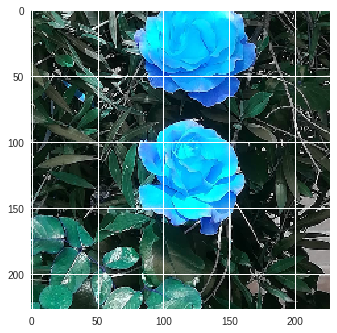

In [11]:
from matplotlib import pyplot as plt

plt.imshow(augmented_image)
plt.show()


In [0]:
# These names are part of the model and cannot be changed.
output_layer = 'loss:0'
input_node = 'Placeholder:0'

with tf.Session() as sess:
    prob_tensor = sess.graph.get_tensor_by_name(output_layer)
    predictions, = sess.run(prob_tensor, {input_node: [augmented_image] })

In [13]:
   # Print the highest probability label
    highest_probability_index = np.argmax(predictions)
    print('Classified as: ' + labels[highest_probability_index])
    
    # Or you can print out all of the results mapping labels to probabilities.
    label_index = 0
    for p in predictions:
        truncated_probablity = np.float64(round(p,4))
        print (labels[label_index], truncated_probablity)
        label_index += 1

Classified as: rose
('daisy', 0.0021)
('dandelion', 0.004)
('rose', 0.3898)
('sunflower', 0.0537)
('tulip', 0.0053)


In [33]:
from PIL import Image
from io import BytesIO
import base64

base64bgr = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOMAAADjCAYAAAB3jqNMAAAgAElEQVR4Xoy8B7RdZbX+/Vtr7bV7Ob2kJycnPSQhgVBC6EgLXS4KoheviggKXhsqKhas1/+9dgUVRKRdQRAQEOkQII30Xs/J6W33svZa6xtz7nNy8Y7/941vMTJIztlllfeZ85nPfOZrNC7o9G08fKfK2MgIC5YuIV/OkU2PUZdKgO8yqX0Ks+d00t3TQ9WAxrp6jpu/kBdffwPTDPL8008xZ+Z0qnjkcSmXy3iehxyG42L6BgEjgOEZOIUylUKRcDRCxfNI9/VjxsOEwkHCsTCBQIA5c+awbds2KvjM7pjDnDlzyeeKpAeHWPv3fxBrqKdSKmHhEQ6HmT59OoVykVK1jBGwiCUS9PX0UFdXx+jAIKZh0NDQQDKVYvlJKzn++OMp5yssWLCAt99+mztuv51Vp5/Fug0bsMMhKpUKAcPENgwMH8aGh7n6hutpnTyJfDZLyffIZDL4vg+ehxMIcXTfAXZv304iGiMSjzHU18+ylSfS0NKsnxGLxTAMA991mTx5MpV8gVQyycJFC/jL40/w5BN/BUwq5RDffmktzxUiOG4SN2Bj2gZj+IQwsPAJJAx29ReohCJYwSqBkE0mnQMjjOEb+FUP0zfxHANcDyNq4lselh3QZyKHb+up67nh+RhetfYL18O2LAKBCs11UapBFycKUQNMw8M3fTlNKqZHPBigwfOZbNuMdaVx8hWiZZfc/n7oM7lkxQLuuf2T5If3EUsGcf0ShXyWqe0NdHd3630eOHiASF0dxfQYJ5xxBuddewVepcJvfvZzhnt6+dLXv8HTf3maoG/iV1xGsyPMmjWL119/XZ+R4XkEg0Fc1yU9PMyyE04gGo3S3t7Ou1u3MXv2bA4fPkwikWD7ls1Uq1V97Q033MCu3dvZsmWLPhs5l0gkomumsbGR/r5BRkdH9fVtbW20t7YyMjKC4zj6/+FsRtd5S0sL/f39rLlsDS+uWwthi5bWZoZHBnUtm6ZJxAphGQZ9R7oImhalSpmG2dNJV0uETUO/t+p7GMkZ7X40EVfwDBw+DOEwnXPmUCjk8XB0AbW3t+mXdnZ2snv3biqFgn7J5z//eZ7ftoXGlma++qEbWDJvPmnHoeg4OG5VAT5yoBcMWRQuRiyKgUldJMqZZ57JjM7ZZCplNry1lk985MN87Zt3EAgF9TvlJviGQf/+bj73jTvIVaoEAwEGevtIxuP0HD1KMZ+lUCiwY8cO5s2fy+EjBwlFo5ScCtVyBVduZEsL+3bvYda0DvyAxfkXXsiq1adxcP8hprS20ZRM8f7LLqfo+1TxoVzm9Y0buficc2lrbGIkm+EfWzbwx3vv482XXmb54uPoHxnGN00y+Zye47YtW5g0aZKC851XXyMaClMYTXPJddeRampk7csvc9mFFxGMhDm0/wBNrS0UKxVmzunkoQcfpm1SC2bVZ1JjGwca5+Gefx29o2DH40QtC8eoYtoWZcvF9T26ekewo23kI0VCqTCFcgnTDYDv4ZUsAp6luKoiCHIxgxaeIVgX5NUO05IfgMQT3/UwPbP2Gr8CloUZcklEbOJhH6wq2YBPNBSk3jKo+C4B3yUS8OmIhIh7UPY8XBzagiFaqlUaLZMtL+5iZngmbzz0U5767U9pbJmMH61gBExMv4IVCRBJpYjYQSq5LP09R/nJfffw/AsvaPD884MP0RqNE7LCjAyNkB5JU/CKZIeHCQZDGjSS0biCZd++faRSKZqbm/U5CGAloJdKJQYGBrj88st58A/3s2r1anp7e3Xd9A/0EQqF6OjoUMAKiAWMyWSSgaEhDfKytmStV3yHYrFIuVDADoeJxaNMnTKNXTv2KuAlIOzYtxO7Kcbs+XMZ6uvRdSyATKYaSQai7H13K0bYothYC4ryHtu2cT0D1zIxQu0Nfl1jg4JRskzXgQNgmLS2t5IvZPTkipUS5513nkaCGTNm8NzTTzNv3jz6+vponjuHyJR2Fs2YxU+/fReV4TTRWIyy5/Iv136Q/Rt3cdtttzE4OEg8HscKhnA8l1AkolHJdSoU0qP8+uc/IxgJaoSQyCXZ8XBXl2bTO7/xTd54Zz0SNPp7ejUrlkslwsEAPT09+tk+HhWnhGnbCpLpU6Zy6OBBIqEQoYBNABvPMllz6aXMmt1B0A4TwGDZwkWctOIEYg0NOKUSbfPmcMrZZ/LYgw+xZ9t2HvzjA4TrEmxYt46H7/8jUydNZtmK5ZQrFQWinG99fb0+cMuyOHr0KBecfQ4Dvf3c/8cHOPWcs+mcNo17f3M3VMo0trZxwUUXsWLliQrgV158idxgnue37+fiW7/IkRlL2Z6GhJ0iVy5hhQIEoiEs26BklkiEI2zb2k+0OYU9NUymUsA3fMKBGE4B3GwV/ACmpDzLxzN9BXINaO8BY6AGxlqc9JW9ePIew4OACQGPSMQiHPCIx01yroMftWkUfDtVQpZBMGxSHzBoBZLyVgOiQIsPkUoJu2Dg9pbp297PFRd3cuaCU5lcH8S1yzX2ZBkY8SiG4VP1qyQTcQqVIgPDQwqMudNmMHCki0rBoZjJUS45+JYriRm3XNFsQ9XTzxJQCRAFmAIAAY6AYf/+/bXsFIkwe+YsXS8f+chHuOaaazjSdZjt27fzne98R5lONptVQAuYzz73XIaGhhSkuVyOquEeA5ecWzKV4NDBwzhlj6lTp8qd5ISTl/Ps6y/iWB6tzY2k02kF3KT2qaSsCM//+Um+/l/f58f3/Cf1TY0a0Cuu8MkAlmlitM6f5cuCkhOQKLJo0SK+9O+fY8fO7dx7328544wzePr5ZzVayO/kpCO2zZEjRxQ071tzCaPRIKOVEu3xJBv+9gLDR3so5vLkqw5m3tOLkZOaNm0aF15xBctWncLwwCBUHLr27OSpvz6BZRmMpMf0JsqNFergeB7lbIG+rh4+/+WvUjZh/569hGybUrFIpVrW18tNHOrvo+pWCIRCmhnlxh+QBwEKRrfsEU7E6ejs5NoPXUc6k2fa5MmEDZM1a9YQMAPM7uxk0onLONBzlLNPP4PjFy3mhcefYN3aNzWaymIWij5vzhxa2tpI53OYgYBSY6FBQmHkfIS27Nu+ixUrT8KwQ0xpbuFP995HJBYjHAzq4pHzksWSLw5TKgT5yuMvs7VxBocKEbJlHyMYomQZSv0dw1VgBcMB+g4OEzCTBOuquJODWFGhsVDJulRyJpSEdnoSTzUrGpYUIbXDkEw5kRnHGatSbX3LOGe15X0mhMAKgB00CQUgFISM4RI1TZqqVRIhGzMEtukr0FtdaMKnzTRJASkfQpUKTVaQ7esGSMYbMEdGWLUgxsLJrbTM6KSQGWbanBkMVwqUAxCNhImEbYKRCOmxMQV9GINqyeXQth1E6hqJhC2l+lTdWqni12hef28vp6xapfdfACnrVYK0ZDa5z/JMLltziSYcSQIC0EWLFypgJOE8+eSTrFq1itdee00p7t7de/jMv3+Whx56SF8bTkR07ct9kvVpBUyWLlnG66+u1X8n4nUsXbaYx5/9C5GGBHMWdOqakcCweM5CCkMZ0pkcHcsW8PqWN/XnJbeKFQiQsGKEfQNj2nFz/UyxoL8UcAloWusaONrTjS/0yDTJO2VN888884xmxHAgoCn8rbfeYv6sTlZdfgnv9hyh4Lm4+RKr5i3kK5+8mURdiq5dXYyMjeiFCNjGHIeqZVIcGuGMFSu48opLqFSLVFyHwaFRpQ9yw+QGtrS3M9Ddq/XC+RetwY2GGezrp1qp6O/L1bLSWQkiAsZsZlQphGTeyW3t7Nu7VzOjUypjuCb1Lc1MmjKFj33i4/SPpnELRWZOncY1V13FyqXL+fVjj3LK5Wt4/xVXsGHDBoaPdNO7eTsB29IHPJpOa/arlkrkMhmWrzpVo6IXsPSBSOYPBIPE4nHaG5v54Q9+xMpTVisY7//t77SWdISO+JLJbPoPHODGz34eY/pCwqdfySvDntIVV7I7JmXHJ22aCAHEAq/sYeYNbNui6GWJzk9StdCHitSHZQ88C9syCQR85G3FUhXDCuDLwx4vC5WmKhh9vY96BHwh6fhBwDLwTQ/LMjEtFOzJIBScCl4oQCpgEDEErB4ByydiWESAMFVmEGA+Lik3QLQKCdenyTV4a+cAh/uhIVElhM20+kbsfA9nL5/CJdddidVchx2wKBRzWpu/8eprVHJ5wraNCBWG49HZOZdXn3yMhvZ2iU2MDg/TmKpXtiYZUEopyWzCVEQLOO644xSosp6EsobtICeeeCJ/+MMfatkyGmZ0eIR///znWL58OTfddJOuJaGOEsDy6QwfvP5DvPjii5S9iq41yYpaArgO8+ctIBKK61qJR+tYML8TP+izfttG0k5OyzpZ9y2RFLs2buPDN97If7/0LJGkpeffWlfP2y+9JoRVk4LRvmCq72BoZpz4kx8d0wuSL5ZI85Wf/AfPbd7Axaedzo2XX8UJy5ZRl0zSPnmyZoBEfR2zV59CIRSgsa6BgZ5elnbO5effvov97+7iqmuvZfHy47nk/AtobmvHdl3qQ2GCVoATTl1+7Hu7+vsoVSp6o+SGTGpr08Jaiv3swBj3Pfgwjz72Z40mru9T8SoKXjnH/FhaM7AEFHk/YZuxkSHCshCrVYwKxOpSdM6dy0du+FcO9/Uy0j9Ae3MLX/vyl/nxT36BEwzwq4f/xGmrTmXJwoU8/d+P8fQ9vyfa0Kj3QjKwBCvL8/nMbbfx9sYN9PT2ctLKldjBoNakuVKBRUuOY2w0ze9++3suvfAq/vH6BkYHRhkeOMjxK1cxrW0yo9k8c5Yu5YEnn+ahvz/B37YMc9CMkbZDpEs+ZctU0SbvG1Ql01kmzmhGAdQwJYUT8imEakDyPB+/UlEgErQww4bSTGPE1xod39By0Xd9rU8EdUZI6Kmr9Nd1K5iWpYHGDwj4a+C07Br1FNEmYBuEAoYGumDIUhosGdM0XEKep88riEtbxeWUYJCGKjS6Bg0uREoO4aDNy7srZG2ThGtSF4JItcSpnVFWLTmOSUun4cfiSs2b6+rZtPYtmuIJDMvCCAVrDMcKsHRGBw898IAylGw6zcMP/Ekz3fPPP0+l4uhzEkDJWj58+JAKLdVSkUgkqmwtGArxuc99jru++S1S9XX6POW53nXXXcr2/vznP9Pa2sqhQ4dUwBEWI1gwI7b+P5/P631KJKN0d/dw/LLlWvK88/Y65s+fr+Lcuo3rIW5Q11xHNVfBKsPOzVu5+PqreXvDOma3TWLta29g2Jbet4nqwajvaPGFvsmilkWsXx5PaJQXVMu/b/zyF9k22Kt0r1oq89rDf6YxFmfmjBl0zupg87atnHzxBXQVcziGqVlCKMbuDZuIFw0+/+nPsGTFcv762OMcONLFvp07+O/7/sCZZ51OtpjVrCygO9RzVBeC0D05SckgkoGFYgjgTll5Oq2T2olIdDJNCpWCnqNSw+6jevPkQch19KdHiIaD2BgaXQujeexohCvf/35ZQUTr64iHwhiux2OPPMKtt32OXz34R3KGTzwRZeO69UQDNsd3zmXTWxuUnmQHBvjozTfr3x9+9FH9Lqn7uru6uONrX6PquiQa6+gdHqJUdpgzbz4P/OYhvnnff7MrU8U2TCpOFcu0CQaCVFyPMadMOj1Ae1sbhVCYV4/m6Q/FKDhQxCPnmf8DRkcAVyTSFMEJevjB8D+D0bAgZBAImZrd7AyUSy6m/FzqLNfHcGtg9KgQjQcpV8pab0t2r4FRNGoReFTHQd4qNanQXgGjlABxSZOAMlopTcdrRTsM5WyJU2M27VhM9X2aqz6JikdTBNYe8hl0pK40SQib8ITOljm68S1eeeURhsjheFUakik2rn2LoNBqyySWTOoaCRkmW95Yq8Hv0N59uk5yY2mWLVumtZ2o7rJWJEMKRSybLgQsLSMO7d6LXYWVK1cqNZWS6flnn9VySIKSAPKyyy7jb3/7mz5fEZAEqFJPfvzjH6di1Fij3CNZX2NjQxy3ZBme65PLFqivq+kuotAfPHSA/Uf3k2prJB6M0n20n6GDB1l5xmm8/dabREJhDRbyvRMFhJYR0Wn1frlaOSa9S1qvT6VUnBFqJjRm76HDysFnT5nK5FkzOX3Vaq33/uv//B9OO2M1Czrn8Pe33mThOWcwJFFJqJbjMLW1jYe+/V/c+q8f5b4HHuAXv/gFw6NjPHDfvQwP9pPNpjFEYDBNvbE79+/TukoCg0Q4iYZNTU0KMrnQzGiRGz72bxw6fFgzqGEben4TmVHeJ3/kQgWMwYBJMhLFlAsvVClWHRVPZnbMIpxKkh0ZVSUvEYnwzPPPkw6aDGYz2KahWVZaG6cdv4JHfno3q849VyPjnj176BsZ1igbCga13pCja9cuPnHrrcydO4e8VyWTL1D24ZW127j9d/ezqccjWDWpAEWpdzAxTYOSP8aUxhQhz2C44tEjCy7tkhcwui4ZyTcSOk0D33AJBDyIeLghUeBqoDjWRvJN7LiPFTSQRGmMepiGieeOA9HztR1QGc1DTNiDqDeO9jfMYBBDRARZvJaFYFYA6fkepiVPAsJBKEkwCcsvRIG1qBY8/LKn2dEM24rMjiRM9j06qiVmh4I0Vy1idpltXT7VUEQiAdWch1v0yPZnmdsU4lOXHsfMhS1UqWJhUEhnmNzWRmZ4hEAsyoEDB7A9X4OWBFhhTXt27VaQSr0uzz2RSOq6kTUsa+LAwBGEmQsZqOYLlIaySjUvvPBCFdrkqvbu3XtM8CkWCuzdt08BJc9106ZNCu5LLrmE4dyYrtGJdkUoHCCfL7Ji+Qns3LGb5qYWbYkINRUmt3HzO4QakjQkG9m1dw+LFi1k29tvEU3Gj9Xt//OXcTHtnGvX+J5fy0SiHslC1qwkPTHf14scHE5rj6+lqYlgIk7KCDHUP0BdcxPZUpZFsztJtbbApBaq0YjWPZK5TM+nriiK2iB9w0Ns3rwZI19maLCfBQvmqU5gBy29cZIZD/f2aM0lFy0AFaFGLl5usGTAatkgHIty3JIlqsYKGCXKySE0Vc5VXifvz1SKhGyLSMDWtkr37sM0T5us0nbbpHbmLF7Evp276Jg+g9bGRq790AeZf8G59I2OEHKrygykp1hJZ1k8qZODBw9y+OBBZs2ezVAhj+l5eE6VquPQ2tbGwX37iNpBCpk0D/7lcXqGhti6azel9tnMveQaBvyEcj6r4jNUrSKEU1Z7KGmR8FxawxYl32VvweBI1ifrmOSrHoWqRalcxpKoLNkpaOAFqzhhqAZqKsw/gTFZxQyYlPIujHoYmtosfM8jZlvkjwxCIERoivQwfeyQBDQIazoEx/XJl4p4VriW8kyhyMpViYSgkC8Qqo/WAF7w8UqGFK2ETIOyWSUp4prv0Zgb45z2emZ4Lm1ykpbB4V6PYAjKrkF+tIpfCdPfnaEhmOfN336BYOkwq885jUq5rMHuiSeeYKx/gIVLl+jaFBYjvWcRwQqZrK6ZCy64gHfeeUeTxfz5C7QHKIesmZfeepFkU6NSS6/i4GYc/V0xm+Oyq66kVCjw7LPPahYUkMrxm9/8hl/+8pe88tLL3HTzp/jFz37OJZddylub1unakkNea5jS3wwTtEMUC2Wlq5Lp5JwWzJvH3559iqaZk2humcRQbx8fvPYDfP9H36dUKhKWKPeew1C1DYzO0xb6suDlC6Q3I6lYJGLJjKJGCcrNQFBRL6lfQBKzI0pP9m3ewYLL38e/3fBRvvLpW7nsyitoXDSP3v5+zY5yYgKM8089gxl1Tbz56hts3riJSibLnV/7Oh+88nJSjUl9XVdXF1OmzdK/mxikR0ePRSHh4XI+Bcm6pTK3feHz7NizWynDxHeMjGaU1sr5SmBIF/IsmN3JM398gGef+ztzFsyn5Ll890c/ZFZnJ8FokIHuo1x03vu0GfvpT3+aU66+jJfWvcHMlnYt9ruOHNHouXj2PLZt3KyCSN6pPbSAaerDFHHIdT0VC3bt2kVdKkm5kKHi2Pzsd/dQOfECXhopaIYj5BMqGgyXK4zZQYyATXQKZEsuyaJBxDTpAYZzDm7FwleqalLOeYRsk5LpEQ4aGLYIPRZO7RkeO6yYUEmRA2C0J4dRDmHYAW3B4Pr4QxnMiE/D3DpGy7W3CTORzGhbWl0SdH29NkmYo2UHXxaKbxIwXJqCAUbTDpV6W7wg+pkirgTG2ZYkcPkqq+qrOaEjaFLa38OqmY1Y+QqGb1MfC9M76lLIVghbYZwxDzc9xI4Hv0LS2UtjW2NNQPE8bUO4XlWfs/xb1mZbU7NmK2EoUtsJg5GALOVMLBzVn7377rtaQgwX01RzBYLJeE1H8Dxd5/I5hdEMH/vYx/X9Dz7wJ6LxmP58bGSUvzz5BB/+8IeJxuNUqg5jmQxusYgZqfUF5Sg7BRpaWhSAKn6WDDpmzMQpl1UMevQvj1F2qyTr6pg6pZ0tm9+lrb2FTDatGV5inzCQXLFANVvSQGicc92FvgBmeHhY071cWGNzsy5yOXHNTLGabC/pXzh2Q6qR41ev4s19u0hLL8yHSYkUZ5x0Mg8+8SSJVIpgOEQ6m8UNmiRDMbq37iRhBmlqaeHKSy4lGQxx9QUXUN/WoFlYM7EVUok6Kr3IQpGKUCTT1EAgEU8XFeiNkhpBHCXykORc8+LsKRbJjI7R2NrC2+vWccdXvsL7zjtPb/L9v/s9f3nmaTrmzWX6rFl0zO3g0J69LJwzl3gwxE2fuJGOVSey5eBuwmaAukSSXDar2bmtrolNL79KqL6JUDRWWxgBm5H+fgKycFxfa0etPfJ54qmkLoax/QPcM5bhr4czOIkEedMlYgbIFj16JavaQZpnQHfaoeqaKgxVpG4v+IR9S0Ho+CZO2iVoW5LgMHGxwob2TKXak0PorgYI+b0nxgWPYjqHZcW09eLJOpTyiTz1k6NkfY+KyLDvAaMIRCLABqqegjHpQb4Kw0X5lpr6V2cHGMu4uA21ha2CkX7u/xzVqoctUcKAhAd2qcrUYECzY6PlEfUNugbTeNiYrkl5sIBZKdNR2MKr93+D/pGjXHHFFRr4BXQVp6xgFBDIeiznC8ydO1d1CekRau/asvS1p6w8Wd8na/iN117DSkVqIBw/pCUy0YiXZ1gey3PKqlNVgf3b088QiUURqiq31ZUWRjSiwplQONdz9DsnWIgdCypzFDorGCnnXM3m4tSpmQRc9m3bxuUfvp5XX3lR63Lh5xLbpkyZov8Sg4strbhykZz0RVdeepo+0QkxQlSkSCKub5CaUTLWSy+/poA4euSIhr5p7VM578rLGZNnoc4Ok0QsRnFkjEvedzGe7/PMc88qqMu2r83afes2UT46yIyZM5V29B7p4tWnn8ISsWH8ECn/+BUrOP+iC5UurHv+RdpmTNOHIAX3oe4uFRhGu49y1TUf0JsnQJQbPDqSJhEKs/GddSxZtpT7H3yYYqXIX/78GDu2bdPPyxcLnHHB+SxasoQFxy3g3XfWccapq8gOj/DVL93OmOVhNCdJhqXOhKlTptDT3a0LbuakqWxYvwnTrkVHcX+4TlWzo2UHVT6f6NmFwinGysMU9xX5wf4uNuZdSjGTQbGR+TV186jjkvENOtoDDDseg56B7XoKMqGYVjWAXZEaDfysj42LYQYolwqk6qMUPB933EUjaqr0acXKZlZMvIpHIipiHBTzJaxYGLfq0dJqkvUL+IEQJU/cIaYuEnHjVGseAYLj/495hvb/HQ+GsmWk2DUJ4lWq0BKo+ei03BQK+z/9SwW4ZEoPrLKvPcF6z2W6AbOiAVKGSV+6SCwZJZv2CVfkHCtcPBPu/JflTJtSr/dXWkaS/WTxTgBK1oGcowg2Qlvl58Le5O+SJKplR9mdAPSBBx7ASoSOPRMB0f8iEpokpFU30QoREAtFvuYDH+CNN97g9/fdpxRVSqJMdky/b8Ic41qeBmAxe0iiitpJ2ppb8OQcLYtoKsGWHdupa2ggFo8wbfpUyhUpx8o41NpIgUi41ipzy5p4jBMvWeVPZEA5KSmMX1v3DgcOHVIeLj8bHk1rVhQeLp7KoG9xcNN2/uOB37H9wD68oM2kmTMUYDOapmhqrm9s5IUXXiDYECcYidK9bQe/+Oq36O0+yqdv/6L24kaOdlMsZo5lPN812btvLz/77T387Pe/5eJTVzO5vZ3bPnYjsxYtUIud1KwCgBs+dL0W363NLXrzX3/9Td54+RV1ahw4eICxcpGdO3dyy8c/oX7AUCKudeuHb7hBs2MwFmLn1m2cd/oZHN67j+9/69sYdXFalswlMzxKJBiivq7uGBibG5rYumkr4XhCI6HcRLHniYpbX9+MGRhvqfui8vpcfOU5PPf6If79kb+yvewxYjuMhWzyIib4JiM+jFRdZkagZMOQaWGIw8S2KUvjXmhkyRMTKEautgirjhhlR2ic2UrW8XHHM6LY/qQ1IcHALIunFkrZghaB0USYctUn4BuU+/sx66NKj92oi1kXrXlNpcco6VNo6jgY5fVRV5r60DtSxC2Lz9JWoHn1NYVV3C8CxIma51gG0oISjKKrPllRTRP5IvNjESbHw1SrLoOZPOFYkkDBpVhyuGJRmL/eeRNdu95SEArVk+uR5rqq8+MmCa/qahklLESUfmlPSHkQMC1aW9v0ucl6fumll0g7eX1WAqD/GxhT0aQCSRLPySefzKYNG9QkIN8rAf57P/gBjz76KJs2v4sdtmuinmRoz6Nj7ixtf8i5qdunajOvc472PoWJpZoa6B8eYvrMmRzpOoQdDOB4DuFIiKppaGZUfUayr1vRNWycdMVZfrpvUD9QLrJULDNQyeDLG8YftjH+oCQyyAekwlEyI6MEDZPe7m6C8Rjf+/kvGXUcBo7W/H5Kdxsb6Zg5i207tnPRmWdz56dvY+0rrzC7cw4fv/lTdMzp4HO33ar1ZbFcJhGNazM8EO2So4IAACAASURBVA5hNtZx3IknqECyZ/sOli5dSu/uA6x9800NEH7FYd/6TYTjcS648EJ+/4d79WZJvSDZ/JOf+pR+v1Cu4cFBvYmS/W+8+WbqJrcTjoY0WFxz2eXkh0b43l3fJ1Wf5JyPX8dfHnlUr0EEITkiwYhmFmkNVMo1v64wAgFIemAQowypZqErIYJ2hJF0jjXnnk7zKedjnnEJ+yzoMas4QZOyRHPDVxGj7LgwNMisuW0MSYPeMKnmx32ilZpN1Ch5WCUDt+Qq+L28T9grUI5buF5YF6WcjzToBR+uZK6qCa5E8SqU8kSaUvrzkGvhCEWVZBY18EMGZsxQ07gkbIWjZFdpW7gmMWGiVZ981aesPUsLX9JlSDzppr6n5jT/56P2OXL+AkafQMUnXHJpKZdI+g7TW5ooVYoEojHscs2B11EPv7zuNLy+bRTHxtQ8LgASdbdaLKkA5ZbKNLS1MnPmTP2dJIhDR44oKxGqOWPqlFqd6bra5J9YvwpqaUlY1DSJceoqr5PS7Hvf+x6f/tTNzJo2U3Eg2VYAJa8T5VXMLnLfrKCFdB6SDSmy42LOBG0tZUssW3oihw910dE5Q9f/WH6MeQvn887aN2hsalJVV7JsX3+vnqMKQZ5PQ2sLIQnGUxbP8nsO9+iFTaC8Zd5kBceEh9SRmzoeLeQETdMiFY7oZIIsdrmgqZNncN11H2KsWNZoNDHRIF5O+f1P/+PHJKJRtdSdecqpnHfhheSGhmiY3MYnPvlJXn39NTZu3UKrFOi9vdzy+c8RaW/hj3/6E7PnzVUb24F3t3P6qlX85ic/U/Flaec8Xn7xJda/u0kLY4mQn7nxk6RamrXBL+dayObUsSPZVI4PXn+99vYamur1AU1raaUhEuNr3/gmpXyWU6+7gueffob2SZP0gUtNMDY8ps1zUSbzuZpbKe9UlKqKqud1D7JwxSl0D4/R1D6F/Zu2ct6F53L2TV/g0IzZHLEM0uJgCUGfAWOiWspCl+yRzbNoaowDJcjLhIXUW2IvFXoqfZCCD3kPr1jFCBqYuSBufz+Ni1sZHqwpJyIETNBDiZ+eUyFoBymVqxgBA1++CJdQIKJtEjGbBwIWjlsi2BhGPOZS+MkaFboqhy0WVfm761EYzUEhrIiVtokbEopV87uqn/V/H1JPymsFkHKNZRe76BEdy1BveExvatDvTiTj+JLtXY+Z0Sq/uu5UYtkamCZ6cJ4ppvSaYCb13LQZs/WZyPoKR4J0d3epniAtBWlJybMREU80EDX+v/cQ1I9nWO2pjoM0NzrGkmXLqJYcNX2PjY0pmEWFlfNYu3Ytl1xxud7LdC5DVSONr+tj4jzdfIVly0/m3U1biMZDWuJ5lsdIelSjjWQ+ISESNA7s3nWMXcl5yJ9UIoFx6Qev8CWyqCBiWWzcuJGmzknax4snk7j4ZLIFRbG2PKSgNSxK+TwJoQTlivbbhrr7dTzKLzkE47UpEGmFCLAkop1y+mpK8hnhEG+//Cp33nknt9/+ZTZueZeL1qxh+OhRrv7Yv/LCSy8y0tev0w37DhzgkSceJ+tWSTU30Xu4m4WLF/Pu5s06fvSDr32TxlCUjRvW861vf5PnnvwrbdOn6Q3y7YBGN8msIuoYrksxn+fsCy5g5qIFjIwNqwLXLL0pw+IrX7+ThGUy6bTlbHz1FRqmTtMMLH3Ogd4ByiWpTS39v/YWgzaO2AfFlHywn+5dRyHVzrPbt+AbFv2797G2d4z0ivlk4jEFYjYIRwyPMcukKuZsbcLDnJTJkar0H72aZa1q1MAoVFX0hJyLnylCJCHyKgwNEW5tojRhbxsfV5PgYxgubm6UaEOCQtEmGDKVFvpacwZrAoT8KTriroCmqPYN3ZCjbSXJdrpkRQgS2iroLjnYJcgNFrBCsXEwBhTAAsYJ7+s/LXy139UseRJ5AkWDWKZAQvyYpRxN7fWUZRwvHJOhEGaGKjz35Q8wsuutfwKjb+rsCThV5syejUut3aWBtpCnv69b/dMyefH0k08ou5M6TtiRMK7/NzDKmpd7IWtemEWlWCKfznHdddfpuvjBD36gdavQ2K7DR/juf/yQV15/hZdefRk0wNWo74RO4BYcli5bya6dezhu6UJNbuveXUeyPqUZVdt1rkdTYyMH9+7Ra5BDvl/YYGNzE0bL1Da/7NeeaqouQTBgUTEkctYkcXEmJNvatF0h0x1Dw8NaD8qClykHcdqIK0eUQKdYpjCY5owL31dzzO/dy1BPv2ZGSf8yTRG2QnpT5fd79u3js5/9rHpFf3333Qylx7j7nntobW/XG/LO3/9BsrWFN995mxfeXsvb69eRaG7SED63o4PXX3yJ+bM7+c2P/5MIZi2SiRMsGCQcj+lDPHP16dwvExM+nHnuOezZt5errr6agWpBa4XeA4dYNn8B3/3ud/U6ZqxaqX3D7Zu3HHNJWL5HMBzRmUyvWPNnWhGbsXQRv2Dw3Tu/w6xF5wlueHPrITo6pmC7RT5y/uVc+8YL9ISg3yiTSwYYCFnHso82v4U+Fgs0TYqSGTWpJkyKw2UigRDlvIefMwhUDZyuMYJtdThZEXQKWBHp9dUAM7EgsDxC1QDlkX3Uz5nJaNojFJEaVPiugWnY6qoRLIpAL+0LJz+kKnG5WiJQH6YaqinYYl4RR5H4YEXmMdwy4YJNdtTEixiYwXHdRtqYsq4MHfZRu54QWkmY8hmmUl0IORDOVckPDDG3PkUobjNqmESqMqdp0m5XeP32aygd3KRe5QAVHC8EXo1WOvk802bOwrSklk8wMjRINBZWNifgu+WWW3jhhb9TLhYZHRtSuporSPFdO1R8MWqZbILliQYykWSyY2NMapmkrRHJjKKyPvHE46qoN7c2U/YdTjrpJP0OAZpY72T9i6ldsFIYzLJy9ZmaGcv5MeYvXUS6kMUPGARDtrbAxobTWIZJbmxMQSjnrpbE8YBgHH/yCv/oQD9Xvf9KzjhzNd/61jepb2pQ8Eiql0bnz3/1az524ydIj4wwqWOWZiqRZaVua4gnOPDmRqy6KB0zZtDddVTfOzHjVRjL6+doT1Ciz2hWb07n3DnasD3v/PP58X/+H7Zu385xS5eyefs2DQJSs5byBU5YvpxXnnqGu37+Uy675BJ++rt7VIgRIAn4Tj1xJTOaWzn7hJNontyuUTosQpPnks/lOPesszUoSPQRwUeu4Utf+Qr7s0MqkR/etYdzVp3GHV/+CulclmI0hBkK6kyiPLSLL76Yo0P9tE2dRjSepP9oL4c3b2OskKVUDRJxEvzk7ocZdBKMFsvkChU62hOkiwWGXIOXyTHQnGA4ZeLGA4y+J1oLKCRaWhWXiEyf7MrQctIURkT5K5k4OR+/aGBUfLz9/QQ7WnAzJl6p5lXVzPMeMAoYAtIucAcw4zEdRw6HA5TELK4mU8kC415WobJWCDvokR9IQySG1RDEjdXAKDdSXqv9aRnRsgyye/uw7CZc28SQP/I7sczJoPL/BqMAoFoDo6iuoSpESz6VdI5kOU9zSyPD2IR8aXIYtIc8nv/omTTmD5ATQ7qkVE88sIZmFaGhApxEPEW5lCdkB9i8aQO+U2HpypWqKSQScV555RXGMsPaEhnsrxkAJsBoihqltsAaDfZ98dmG9PNlRnbn1h3ce++93HHHHZxx1jmcfc6Z3PXd75BKJWozmDI0kc8rLT7WqBf9oFpl9Wln0d87THdXD45bZPXpqzjQc4iS62g5I2u5XKiQz+TV2TXhA5fzEMYpADdCyYg/rWOWznaJJ7OlpRkXTzOiIFesQe9s2Mg1135QF7osaKGJbqDm0fPFR2pa5EZG1ZDd2NCkANZ2w8AAkydNV+BIpFowdx79R/v07yJHS5oXKpxLp0k2NymIJKNJc18GcMWylIon6D94CDsR5/jTT+PA7j30bN5G54L5/OhnP+Wtd97hjY3ruf7K9zOlpZXzzzxL60UjHNIo51YcpcriulCbVKHAh66/nvYl85S/p/sGtD969ZVXYYVDVMW109igooA8/L5Dh/joHV+iIpRXvKx2kO0bNpJO56lLTefa913PtGQnQ44MzXqUrDB7hyv4tkvQ9zjYGePdUJluET1CQbzxptxEbxDHxfYtzK0lInuysCRJvjmA4YtwAdWSh10wcXYeJLJkBtWMofRVaj8Bo4oc4/1XscKJ97VuSpixwRJ2MCzzxlTLUuPIVLzMH9dIpUx2yCRHMACFgyOQTEKdWRtIlIWnvW3xpPra+vArBra0MhwoFKoqs+rirhl8MMazY+09hmbtgFej22IKiDhiGBd6XKFORhMMg1wwroCVaf2kUea2hRE+PLuJaMqnHAiBX9WZUyk35HkIw2pqbKGvt1uN5z3dR5jRMYsVK1boOhUwSpn1/At/U7NANl1QwUbeL+KeZMYJA4EAIF5f61Eq3RSHUlBmT2pgnT51FvsP7OW01avYsGGdTsfIIYlGjmgkpt0FEXtEIAwYQeZ2LkT0lcNd+5k3fw6ZSk5utBoBBIxC22LhGNnRUf0c+W45L3EAqSKbaEr5Mo3efbSLhsa62oS/4WvWkBeow8A3VEb/+je+QUN9vSpP4r8UuijTCrLIew4dVkO2qLHaEzx0SIvYQ9v3Mn12h/Z/ZBaxub7p2PYFcjLnvu99fOa2W1k8fz6nnXsu+w8f0oUmlqxcJs2t3/g6oWSCZ95+Ux/GaDbDeWedTdS0uO/H/0XPW+tZeuKJ/Oq39/DqSy9z3llncebpZ+CFbL3Ig9u287FPfUr7j9LqkOtZvXo1zQtns2TJEoa7e7jo7HM4fdVpNE5q10Uy5JS0RyrXpRMk0RAdK5YzKA8tFCIYjbFk7hLc4RAfPvciXn+9m9bZU/DdKn1Zhx1Vk2zEIho3OdrsMNoYokeEG2nP/bMTSicpkp5B5skjWMMu7rwUkUn1OlVRlG0uhKZmTarb9hA7oZPK/wcYQzMtSlWHSMyg2O+o8aKSFVm2JpcKGCeAKw4ZV7ZDASqHsxCPvgeMIvup+I4VMBSMnhR4kt0CkB3+/wdGU2tfoc4mtuORVGNuhSQOpVKZITdENBAm7MpYlcFsI8O673+JYtfzlAwxPHgE3KoGc6GiCxcuJD2Wxa2W2b9tK9//8Y/44r9/lh/99KfKvg4dOqig/dND99PaJj0/Q51b8hylDeLKf45Dg9g6g0HybuEYVRSBKGjWalFZI8loSte/2NgeeeQhivJe11UTutSjoVD42PYyGtT7R2lvnUoqWc+2He/S2FRPIB48Bka/6tJU38zo0CgjAwOqR0hS0kAgqqrMxSan1Izi5Uyexkmt4+m7ZhuSRqp8kTxEAcfQ0R4e+uMDXPH+q5kyczrFalnpjFysmLmFO4uNTFoCAki5EblKWRuhOv6yeAkiAQsnFyDKe6T9ICARoInoJ6qTuleGhjnnSzczUiwwpbGJqW3tvPTOW7ROn0Y2YKhzIR6wmTV5Cse3T+WWy67BSWe48tLLuOa6a5kybRonLTteM674T5vb27T3JA9BKMK/ffZWgvUpRrt7uOSMs7h0zRraJk3SrH7TFz/Pm9u3sHPbdmK2UFaLkVKJNR/+MOu7DlOfaqbv0GHu++497NkMYTFnRx2cQJB/bD5KJt5AMWWSi8NA2GWsOcpoBDVAKPd77yGqoAimjx/V/VNIxNXTZtVFpDuBWfGwRiUzbqVu1XzGBoX2BZT6iUVNxBn5O5MCWM0ublHSlLhwpA9oitucY+nY+J8s6otRXd4nSfNIHpJRfAFgnUUw7OPITgCS9ZSvSp9SsGkQtkzyfdXafjrj9FRqRvkzMeFR2z6gRlPl/1HHV+dNuFjBKFdoT8UZ7hkjk6tik6Rk5pkctNn8j9f58VfP57Nz2gg1VWsOHQddI9LzlsOybUJGla2bNpBsaAKnRHNjIzfecjMvvfEazbOmct+9d9MkA8B2XDOjgEoNA7at61n3OBIRyK5R8mM1t2/Q2txMMhankM3qWpSALfOPkYYkjbOmEwiHObJ9J5YV0AFz2eNIANXb3cPh3UdZumAZ+/dtJRIPYCaiRGIRXMdVR9mMyTM4vHufzPXrOpPP15abU9IMacTak36+VFA1SvhwTZGrqTwCKuHTLa1t2uiUglU2ePrdvffxH//5Y7q6juhimLggVercmvgjgBL0Zwp5pYtHDhxUUC+et7gm7x44UBuLCUldE9ZhUInaMsQs6V9GXe740ffpWLiAwa5ucoUCZ551Fmdfdglr9++mZ2RYASmAEpoQzlX4wsdu5Hc//DF/+tkvVA1MjFuV0pJNzz+fZ//6V+xoFCeX51ePPEhfPsued7fwgTWXsubcc2mdOlXP5YoPfoDD6RFef/VVXYQys3fSqtP47+ee4yOf/xw7unuxygZf+cg32b+hQEHm+WLQny8QmdZClzSk6ywGzBJdIQFjjJEIOLYYy/4XGD1qYHymi2mdU+nOlPECHpY8RDHSixo5BM6OHbScvoCBXk8XqSeUsVzVbSjsiE1ohknF9tQYIM9DTPXkhBb+38GoGdKRDbJ8jN6aMd+Lmnh1PlbIwBPngA4Z17yrE2A0REwaLqvnVVRCYVF+UFSz2m4d8lp3HIyqpLoQk0RaqSoYA1WXXP+gTIIp3Y3VNWFbDidObeW5h/7GmktPwXrhHl558icM9Bzlquv/TYd3j6mWlTJde7eTK5WIS3+xqUH7ju+79BJGKHP/X/6bWDTM8PrNzJ2/WAN/f18fqbo6tQbKdU5kSs+oKJAmlE0xfctWHiK2JGMxTUZyiHo+lB1l8pzZDI6MsG/bduxIlLAMLseiNLe2qrDXc2iQya3TWPvCX5m1dB4Fv0p9Qx3FvJgCXNqb2tm3bScL5szXz/zLY48TCMpODeNG8VBz1E811Po2gtLalEQtrcshzctwXZ32bHR2DciNpHGcMvF4jLlz5ymwJpqpMqIj6VzrwXhcWyOSIc8591zeevMtyqN55fdCYQWwUoOKHK0RrFSbqRR6KR7DkZEx3SojYgUoypgPBtl8jrLjqIH31PPO5bpP3cjeo91053IaLGY3tnDRSady93/+hCcfeJBYKKzUTQKLfMeEpC17+sgMpmTnc086hTXvO18piESszOAQv3z0IT554ydobm2jtb2J1pY2jvQPsPfQIc7+2MfIlDyuOOmjZA5G8X2beF2MnFXGaYnQXylQbQjiNAc4aHn0Jk2GQv8MxolmsdQqshtP6YktNM07jqFSGULSz7NwpV6T/aHGDJyd+5l6Ric9h2X/F5H7LWlM4svIvVEicVyMouPj+VWiMZucWHzy4sjx8SRDSlYZ3/emJvoIPaoNHNtjJs6hYZIzm8jE3JoRYDwzKiCl1qpthKczhaUBqUeDCkShfoFEULfokLURwNfNvYQWO64UrD4x1yBQdkhUfZoTYfZs3kP+SJpwNKXG8LjrcGDtZoJVlxPOWs2i0Vf52Rcv5ZYvfpn7/nC/tpfUXSS9xtEhbr31k0ydOYPrb/goTj7D1++8k/35NI+89DcCoqKXK+Tf2kKqqVkprmgPGvhVBa3o2pZgFE/ENOlIEpJD9lD6zC23sPXdzezbvfvY/KIay50ig6OjpBobtAZ0KlW1usleT4KbyS1t/P251zlu0XJco0B332GssE1SdncoO9ptSA+lNYAO9Qxw0ZqLNSg89thjuiuiJsGpC2f4MtAph1AB+eJyuTYpPWHgPjg4oDY0cRGIEBKVG10skM2kdYZMaIBsICUq09jwiF6gXlylomk/WyrqfjZzZ8/hzb+/opRUsqOcgGRAmdRWe1nI1hsilEIAXspUCMVk+0GfUFuzzuJhB9QNr1nRMHUAWFZJ07TpfOdnP2Ff71HdKUwiz3XnnM+1513A1q1bVXySACANYd2waHSMPzz7NF19vUxvauG2T96k1yvBx3I9Vp1/HudeeAG/u/deKm4JQ8zgLZMYzefZ23OIj37xToaPJPDHptBYNx3LDhGZGqTS5DNm2PjNAUaj0BVw6ElaZOLmP9HUY2B0ZcrCxNvYTSjWQsGoAVFAIAql5Xg4PQXCYx6VhIlFXDdBsoSK5n08ccJISpoy3hdMGArIatoCyZKyn44/PjD8nqRsyd41VYOqzCfmArT3uXQXBjA6myBmYAQDtfpWe4mipQjrqU1qGGPlmkNALIAS1cMBeSyquE6A0fNlsyVPhZyI48sIJkkXDq1fz/Tps+neMaC7MCycNY137n+EyY2zGMmNsfrMlZS2/Y4LFkf40pe/yfTZ05Vhac3nuuTTQ9x887/x9bu+wxXv/xceuvtuvnDH7fzXk3/GSwS1rVVnhOl94U2ijbWd3mRtqWAybjaXwFwWkTEc1l7ikX37WLR8mQo2xZEMF6y5kGIupyCVQCD1qOy3pP1It4oZDnF4xx4yubw+p6XLllGsOAz0Z+mcdxz7D+8kmgpR9V1ClollWGoj7dp3WEWtkFUbExThSbSUP95/P+F4BGPqcTN9GXVtTNUpZcwW8thyIzHIFCv0DQ4zta6JoUKGUF1M+3h18YTu2jWlqZmR0VG9SZFwWCnqhINBLkA9gQa6R4lkx6VLj6dYqLBp3XodkZLtFaXZJdsVSJbs6e7S9+hWeQMDhKMxNm/eoiqZfEeqsZWi7PcSCemkglMqEE8m9CbLXjelQpnegUFeevMtXn3jdRzfp6WtlcNvvMPP7vpebZuY8SgofcfPfO2rLDlhhW5u9cWbbtabnRkbo62lVjt/+Wt36DYds6bPrO1f43kMjY6wa9t2tm7fzZb9ZZac/AkO78op1aibbhFom0QmZlBKGgSnhdlaLbPt4C5aTj+OnEzKjzfTJ4QUURKlyV/NujSWAqTL+s/aIdMhVaj05YiFkxSlkVkFL1MkKspwScwNHkbYxmwEN+JiRixVPF2hqNL6EHuc7Bwlx3sZsuyVKj8TkaVUIeYFyb+wlZY1i8k5UAr76jjRQQCVYWvjUmoK7y3qNgBGIqTzWjL6KIf6WqW1VDMRkZNMrS0Ol7DjMisRYsv6HUwN1DN8dBhXDOuPv8D0xSsoVEoUK1nswhGanPX07vsH55xzDtvWbSeVipAvF9RgHbFh0C0Rr0vo9i2RKjTMm8W7h/Yo+KuYtBpB4iN5DNtWkUQSi7A0CcSSbCRJyCEGlJqjrPbHdcoKPgFhx/TJqthKLSeBfWRsrHYLDUNZliSE0REZOHbVIlmVnqYd4sRTzmFv127qWsKaMSWICPuoZHP0HehWFVZ2gpsYvbr00kuJR+LcfffdtT1wWprrVc3RreXEw2eHiNoRlq8+ndknr+RLV1/HpI4ZdB/YRfOC+Vrgdu3bj621SUX3/RBwyQOTNodkHnG0y43QaFKpsHjxYvqHhil6Bs0NDWxfv5FUNEIkWtvISTJla3NTbXOfeLzmPzVMjUqS6YrFEsl4HdligdbJkwmEZHetirZDhHfnfY+UbHJkWASqaDP/yZf/wctb32VG+yS+fu2/csNNn+TRvz9LDo/RA4cZ2LmHR599RrfJ+MJHP64ZWx7W0d5erWFlAyrxujZLLRmNqjopSq8tqpsRwIq18ddnNhMLLqb7aIWrblrA/rEq/b5Boc4iH4OhkMvBdIlQR4w9Unc7sgdqbXhbDmGDMg9pV0xCo1CojINRfi1zgY6PM1BUSbwoLVoBo8y/eQZBI4QTrM0ienGHaqvsVGeoDU12iauKRUfAM76P6v8eWxDyqlS15GA5BtMDAXo2DVNaFMKMxmpWOu0zSgk+zlMlAffK/F0AQzayCdY2rJLTnQBjRKyx7wGjIdm3UGJWKsHhbfvJ7e0lnmxRcSy3aSdxO673Y6yQ4d+uXsX6p38CY/t567VXmDxpqjb3W5uTZEZ7qQbE4B6n6JQIBSymtU/m7T07cCM1d5TpGSxqaidaqGqLbP369ZoZRYndvHGj7qs7UX8Ku5qYbxTWJN0EKZuEPk5pbyY9Nqr6xYR1TtbGBOMrVMp6bwcGhhgeGqntlVv1WbFiNZt3b2J6Z+sx7UTAKG61be+8SzyWICa7WIxvcSNs8pr3X1ObUFl65gq/UCxycKCPaz/0IU49bim//vkvWf/G28Qbm3jiH//gyrPPZqyUJ96U0t282yZPYvP6DboplexfKXKxCBOdHR3qV53w68mWd+ILlV6M3Oy+gUF+effv+dIdX9X+XtQyOeHE5XqjnnvuOdpaavteyg2R10fjCf0sqfOkVXJg1yGa2poZ6h/krAvP5fUNb2sLQqKv7twdieJGItimTXVwhMZkihs/eysXnHomP/3xD/nu977H6svWsK23m7GjvcQzBTZu2MDDT/yFL3zqFr3xIjaJOXnFCSfw4j/+wec/++9qoRNDsjxcGcOyAkGCkVTN7ROoI2TP4vbbH+Ku33+Mo2MO+YTNURyyUZtiCIYtePWp56k7/1TGUiHd3mLisAxPptwIyRYWPRUCZlDYpYJe6zTpTAxXFHjlrIwn+fglFyouhh/Etx2tpQMpB39SVLsYYi9zsyJnWlTLtX1URVgR2jnR33RFuhagSvYUOuv5xAjgPN/LpAsmcbBSS3PS0Ff7lxrJZdMyF68rD6EwZiqk3yfVg7DmY2D0XXzTYiiTxxJzSLlCREa4DJtM7wDDe/vF3MrU9lZ63t0CI0USSMYq0z65hTYrx1mnrqCuPka26NAQqfLpC+dz2qqFdDnDeJGgMhEBoxSrQ7J3rOUpGFtiKYY3bueWGz/FU089pQlBWVq5wvlrLtbRKMlWEzvATbQyRATauXkzdjKmyaW/5whTpk5W/UJEINm3RlibvE+EHUkKmXSWctmht6cPaV14WJy06jx2H95JfWvNmSOHCDjix370vgepOq6yGjkHUYmlTHv1pVe58sorMWYe3+lLcSl+zZUnn8y3b71dN8iV5qWMDU2bPI1Nm9frHilSZy0+42T29x5l5rTpOl4kvlNxIAggReAp9I/SNLlFF7UYOPdz7QAAIABJREFUB8QUIEqtRKChgSF2bd/DrV/7sg7/vv3a60ppCukiay6/iO4jh49thCUzazt21ab5BZgalfyAAlO2Zr/6X66mYbLszF3WloRsCmTFo/QPj9ASq+Oqiy7m5z/4oYbsqbNqu4lHrQB7Dh9k9qknqYmgZ/suptc3cvMtt/DxD32I5o5ZGhWFzlxx6WVKryQhFDNZnnr8cc686MLaSM3OHfSPFNVbmS1WeOGBvTz10Cv8dvPv6RstYU2ro1eyb8Rkd85jOJJnppdQZXVXyvingVfTlJ1RpUluERz2sKuy3YZs6yDDxiZVYVQjZWzJghNgLEozXGx1snW/jHIZeKEyNIW0+V7JiWopUx1mrckvmVHAGKiJIMqAx6OBL5MjksbKssNCAO/F3VCMEz5vhqq/6oYSlEm/0ZBWgIdzMIMRT+InzNq+Oe8Bo3RvItrXsBgUt5VsuCoLsOoyPRRj+1N/J9A2k0g4qgtfdpmbJzsKvrOXmBnQbUDDyLC1i+OWmdkxhcxQDwunhNn1yp94c/3DpCa3UCkVWDB/Lms3biBXdYgnIsqmT5l/HG/86c98/KabVZz77a9/QzAaURDJ1otXf/ADPPLwwzoULoZ56fFFhRGFw8xbOE/LI+0iuCXdIiOfydI5p1Nbc+/1k5rj/25saGbP7r0qFO090kV9Qzu9w72EErWtP4QxuGJ0iCc546RV/OiuHxJJ1LLzhOHggvMuUOeQMfekhb4dCCoVLI1mtZ+iozrjJlgpNCcAIT87dfVqdvQcUV4dkqDqODUXSLVmxA5YNpMnTaKQy9Ha0KhCi7xWLuT/YewtoOQq07XRZ+9yr2q3tMXdE2KEACHBLcgZ3IMPBJsZgsNhBOYMg8sAgwQdyOAQCJCQQIS4dpJOu3e5y77reXdVn7n/unfdW2uxAiHprt71vd9rj7AUbe/qxO133okPv/xcuFxfvvwWXD4nwsEIpk6b/L+HJZcT9e5C78l+NpXWh0pE0bNschX5hF2SyWZgc3vl7956/Q147A/3wl1cKpC6wsvpcaHI5Ra5fvLJykcOF8XwVEs7jvT2iMp4aVWV8ALDwUHEOvt0WQnqFWbS2N/RjrPPO0+GSXs3/Iy5x52Iux58FCX19TCaS/HPt7/HpCUTYfUWw68BfRrQZgD2J7KI2TRovCWdwF6KGplNQ4BsA8veBDcQKTjSFtgTGYQ14oO5aNfLP2MoK9A4BhWB5RqXb/QukYyVFWEp1W6A6mRpmoZBwKJ630jYnCgkyDDmPxTFC21pQaFMlAZU1LqA5n/sQcmMUfD7OOQxwuRSkTFogiqyKhriTQOw1JXCYOejMUChrYACMBCppUOtVCrS9YSiyJgtggJyZJOYUurAj5/vAmxWeQZEX/FsNbg86N6yB7acCqfVBpOiy3ZYjQaU15RATQdFxeC0yaVYtqQG446bjaC/D+PHj8OhtmYRrGLlNLluBDZ/sBoumxsPPvwIero6RfOUOGe+KLvCs0j0V6H0ZGvGeQbfSyqbkqDlObLYLUK+ZknJ1Rmze0H6n0FuMdnzw86kfH0yh3hWJ8yeCX84CINJk8SRjsZQYvHgl3U/y4d53oXnSyZktuVZLkz3mbAkM3Z26No2BSIm0QhCxmRPSM+L/GSVb5Qg7qRZ1VEygSDMJtMQIr2vuxvjxk3QqS41NTiwe4/sdjiQYUrm2oAp/vDRZixddg5a+3oxqrIaL/3xb7B6bFLSTpo4cYiCVaCc8IFxGlZWXq1LbESj8vW+/u5b6eVkgGN3Suqn4tsDK1fiL0/8VSZfQ3INwQBqR42STJrMZIQCxUuDl8iG9esxe/48XRUtl0NgsA8xfxhWi024l3wOl199NW6/9VaZ6OY8TixecipOOv1s7D7SjK7eCH5cuwsvvP8ieoM5xCw2hKxZtKsGdKY0DCopJEwWdGfiyDrNSBMuZlRlj2iLaSgOK4jm0giHkphV78S+/hAiRjfSyQRMsEqwxnqTwroQ7RlmM/asRiBryEKxKDA4VGSUtFyGHODIbIbKbZxUcbr9/xKMhf5JESyoETaLAk8M6Hx/H4oWjcVgPKIjeOwmwJxEqdeGviOtcIwYhixvBuon51S5mG3039AAV9KEfbv2STb2jR0jIucMxhrFiLb93RhMxCUYKc/CZ15qtCJ+qBUlDo+srZw2ixjCsJ82WgGPXYHPbsQpIw24f8UynHDhmVj11uuyWqltrJMLNjbgR8eWHTDCCKfBguXLrxcwOYEeXJMxaXCAV5DO4Plm5uKvzGoUt27taB3iMnLdQJC8kZC1UAgLj5kvAUzlcQJavB7f0DyEMUKK1cMPP4yxM6YNBaMEdiaLpfNOwKq3VknLxaw7rGqYnHG2Y3z+mVRaRNKUouFlWiwalzcl2SeVEt2Xwr/z9/mD8KXTVmIorx8mlCaqe3OKykkoNUiZDT1urxzyTT//LJmos70LT/ztSay46XZUN9Zg2pQp2Ll7N077rwuwbssmXfuybwCBtg7kqDaeyciahD8IHZ34/6kCTeHZFXfcIwpz7CtZAjOLbdn2qygL5EjTMRqFaU01OKtHz5SFCVhS1TCspExuRQYpBZTDAT9GjB8vB4DcTY7rCRxu3bEdJ11xuQguf7vmO7jqh2H+3LkYP3wE1GgCe5oOwuctgWp2IGe2IJVR0dQcwiU3X4Hdh4OIFbkQt6noUkSgDRFDFsmEBsVmRCgHxHJASMsibTLAlckitrMXxeUlcLtMOPTTdiy8cAp+2NUDi7NMWjqSlzMD+pjVYLRAoc4ML0qzhjTSoB5LjlU8xYZzumBxIhSHwj9r0A1tdJG4/1UQL3SthWBk52rgJUG5x2QOKUrye0oRdfJSZiMKGN05Mbvx+AzoiPFWUHSUDXmfihHaYAw9uw4ANh/sXhf4zK3FHnmuHkow9g4g0BFFwkQ5SFXcwtg+eIm0ae1CsdMrAtWZTBJ2owFOmxVKOgKvQ0WtW8U/7zpViNgH/Z1IxsOYOXMGwokI/H396DtyFJaUBrNigMNsxylLThZtmQ0bNgz5oFBZrlDJ8Vzw3zks5Jnj7KGju0OyHKf7xLF2d3fCPzgoXEMOuNjfvfzyy7KPZnLg8IVzEZ5HQvdoCtU4cTwSGQ4WdTWIRCiM9GAMsYi+Qxc1w6x+KdBOgMRl9kJkCinehhKNjagoQufHvkSZM4MxyP4zGEV4J5nESacsxY4D++VmEIArW45IVCamqVgCm7/fAHe5Tw4FG2B+YyJrnnrqKQmUSDSGWYuOxcVXX4UPvvgMRR4vPn72RdFr5eFg5iOonC+Wtm2tHVi+fDnsLrf0dE8//bS8jwJYgCLKVHUmI6OouBgPPPQQVtx5l/w8hQxv9bmR46WTyciHQM2e/kBAjHeq6utFU5WHhiPrusY6jJgwEZ98/gWe+vOT2L13r/y/xlEjYbVYxFqOG7WMZoDF7qahHjr7s+hOJFA2ajqa0xpCahYBh0m0bjIWDYmBGFwmB1I5A+jvFVaBqKKhyGJA/7ZOlJWXIJNMwAoDOo+0onRWLcKUJlSt0LIGGAMZaAkNuawiaA/Z85Hc6LTAUuREzqwHGlkSibDeWoj2qVCH/r+CUZNgNhmzyKVMwp8s1gzo+7EdjsYqRM2smnJQHVmkOg+hZMJYBImSI7KG8v05BS0btsFWNExokizvuGMjkNVa7IXJoMGDFAZ37IeasCJpNUsw2ly6hIk9lUO6dxA+u1tWVFo2DYJ6OMCyKTmUum1YMM6JG+dUYPF5S7CvrwXxeBAOG5+Nzhzq2n9YlAM5ILFYbJgzY7b0sqzKKMfIc1UIRj4bnu+SoiLs3Por3njvXdx9990ynedTZenYM6iz/UePHAWH3YKW/S1i/rR5c16yUclJFuUZZOaluPP0WbPQGw7AZKfFA0kJCRE7ywRiONx0eOgiMBvM8nNHQmGceNJiKVkljpzDvARjyO1QEH+lLmUhnfP3C7cJfyAe7lQgjiXLzkRHTw86ezoxtnE4fvpmLeaeeBwO5I1GGMgia2DVwdbz5um+FNt+/RVNR45InX75NVejJeQHrBZMGTMWT9z2e9i9DunLOKW1OzxDw5/rrrtOxIMZqAxwPoS9u/bigw8+kGksHxSX+6zrmf6/Xbt2iKvGh0ssIVn/3Ovx/RDAwBcfKKF+HJVX1dUJQIEQO0o2UO3rqosuxut/ew6btmxBe28P9h08gN5MRtgRMJqhGkxIambsbmqHaitC48z5CLurETCa0GtOI0zjGUKuOqNQNAfiZk3WO8TXxs3UElYQae9DRZHuSpTLpeDzmrF/xx74GuuRdFoQI8jaZEa0KwpVs+qUn0qrQE5FIFzsKDR4VQX9nTGoBpsIVImUI4crnITK8j5Pjypwh2WHqItZsc3k5ZlLEOGTBRIG2AYyiO8fBGwGGEttyDiCKB5RiSg9N3lBpNKospmwf/0hmBwlyHBgJCRGGvcYoVhzsPucsJlU1FhUbPtgLeAsBSONomcmp0MyqzurINTTD6/VCZPBKJQjlneUonBbDXAqBswc7sJ9S+txyn+dgK0HdqG8rAjPP/0U5o4ZA1dFmUyDC9A2f0cPps6cJmsRng0mAa7aIgmdccFzKVq9sbicG2arKdOm4um//g/qRulULfq4yOopPxFFMovzzjtP+kIOedZ89RWMNrMELMtd6ghfcsM1+OSrT6UtEEX+QASL5yxALp7GZ599JkEuTI1QSES1qHrB+Qd/j/GguGp9GvVdCsLFQjnJY/gKMhx8cwUBIAYk/fISwQiWnnsWmpr24q3XXsf5550ncnN2r0cOeGEMnI0ndHhbZ6dQl779bo3A4dpaWnC4uRmfbFiHm353t/goEja14es1oispUpFEmhgMmDt3rgSlr1wvM3nbsWTYt3ufBDhLZ8qwd3d0CBCbHiBd3d0ScIW+NxGNy63LkkZcjDjc0TRcePHFeOfNN2G0W0XNPJXJYPikCWjt6xlyjTplzkK88Pe/y8Rx5KRJ2LZ9Ow4eOYqtO3aKs1BHLIlIFvj8u03421vP4eNtcXRkDRiwKAgbcii2WVDemcBA2oxeJQNSZyMmFSmbrhNsTukShrL3UyGOTNRHbd++HeNOnIIjfWkBMLgtZvjbgyJ5765xIaSlxT3LmM3JsCPQkyDhSPfXIAOf+FLBi+YdqYiYye83ZeXPnkyXARXonaBr0iqyBKfHycg3I7U3AKvXjUSqG+XzqxAi5SvDQMzBRorZ3jYYTB6ktbw+q0FXFqdxjslugN1tgzUegtIaxEB3EFkTq5UMKobVIJZJw6qYYEtm0Xm0VXappMwxIzqMJmlzzZm0aJZOrnXjlduW4ZTFtagb3YilixfhzJNPgtut7yhZLfNzjQ0EcPXya7H6449xx4q7ZIDDs/Ptt99iMKRbtFHWUTIyFZU5rKbwMTVu8gp/uWwWwxvrJXtyMMRgqyirlGRFxs8zzzyDkrJiXLBsGZxFPvywcQNGNQ7Hex99IC1DIp2WwCspKkM2GEV1CaFyX0kpTBDBJRddJHvFH3/8cejzoO6u4qjxaIY8dUS0XTglzU+UCqVqAYrE20QTOI9VZDdYcl5343VY/+P3eOPtt7Bw8YmobqiXQDpy6JBssC0ep9TVpJ1c+JsLUVZZjueeeUZoTry11mzbgsrhDWhuOgQzjNj55RpUVVaCzlhUR2MwcvDDgL55xe3ytTm8ocL37BmzZSnPh0StTXoi8Pf54dCY5qGHHpIHyZ/LZjSj/UizEJrra2uRU1W8++670nvW1NWiqrZGF74dGEBrc7NM/LwV+s4x6Y/oLBGnE3WNDRgY6MeBnbtlR/fIw4/i5ttvweZ9+7D3cD/+582PsfCGFeizV6IzqSDE9UM6hxMcRrQGgENZDUkoGODtzCmoRYWVO76cIsOPBDQkTQpSmRRsFrP0Qr6R9aJ2V1JlQzxKHIoJSR5kq67WRhGrRCgJzcBA1AnE4s34/yMYC+LWWWY0CUYjtFQGpqQCQ0RFotkvOjm+EXbETGkoVBanAp3YtWk4tGE/DMXDqOYqSB3Fpsi6gyuQymqPDKRHqjls+HgjDA4fLHS0ovM0eY8i42KCO6fiwJ59wlW0W62iAk/bBdHODYRhUXKYPboWFQP78NXqP2DLtk048/STsfXnDYilExKEPCcyM/D7UVtZJZe/zeqQ4KHlHz1CVYJDotH/1QPOB6OQjbWcVEg8A7x0R08YiwO792HEmJHC3KBMJ6Vp7r33Xjx8/wPwVZXCSDJCaQmuv+dOaIEwSqvKseJ3dwhSi+d10oQpaNvXhMGuPiFKVNfVyvn7ZPVquQD4fguJjv+ulDSWawywgvwABZeYQZhRePiE00gnYE4gyepQDDAoRhFimj1vLn7Z/DOmTJ6MvsAATl52Ftat/0HKKO7ACCbmTcTjw8NPsG0gGcMcLjpXf4rxdQ1I2qwYM226LE4JFWr0FOHNZ57T5fkM+s1FlA9fPICUPtCJpC4R16UlOG8ZBhUha8yIo8aMkYdK5boPVr0jH1YqmpBJ2Pfff4+XX3wRA36/TNr4QdH5lzdcwdOjtKgYqsko9nJEgCXDEUSTCZGIpyzliOlTJOH09/aJ4QmrhNbNWzHmmIWYNPtYLLn6VnyfsmDTEcLKdJLyDIsKUyaD/RkFUUVF0GxERAFSHKoAKKWddIyW3YrYxnHyx+dGREl4sA/e2lKEYjF4PHaRsaCgVcxPJAxJ3pzOqDqaRvaJBHdzz1AQOdZJwPowK/8rIWssUbmjJERPyYp3Ri6ek4ktgy3dn4ElncPocS7EjBkYWBfHiEtPwmQkGgnYu68DUB06ZYNDHgLcqbeTy6Kk1oFqm4ZtD74P66Qp8kyRjMNXWiFnyOAwoqjUB3Mc2LZ1N4oqfbAabTLh5nSWlnDFVjtiYT+mNtSiOHQYq56/BmedNgPPP/+ysHL4vjn9F95pHhPNSkk8FDPABRdcgI8++kjOMa0ZKDRVAJ3znPMcsWcjK6i8skImm4R0EoHFs1tIUJz0Uz6SL3E9HugXiNwpZ56BmsYGLJkzB+dcsAxjp00Smh8Fll1mB9yqBZFASPRZDx0+gIHB/qFsyOpRbCtSugOcUjuhQQv6I3nqlCJvjlZb/OGYVQRNk9Fl5Zhio+EITly8RFI96/Bde3ajob4WsWxKaHZ2t1W4bhyOEOcqC2HKnxv1gULGpAijfkT1MOz9ZTPOOPVMHDzaKtOvH39Yh97Dzeg9chS5eAIZAUb+r8ZLAVxNDZFlF16IWbPnDjGvKcvwxddfYczYsdiyYzsmjZ8gq5JXnnse3Udb8eJLL0vpzEESHzalFfhwmVGDwQBUh+67JwOPPK2G71uclJM02TGKR8K4GdPRm4xJWU+tTcKtoomMoD80jaapbgT2dOKKv7yAL9CIQYNXnLkqM2Es9DqwKZRCjC5GqoIoLQLyzH8lGkeD24nucEz3KjGbhJgqmk5KBjlZuhuQ5PCGdZwMcHS1hcKLKw0Oazj8FGpTQXefAAJOVRkk+WgU4WIRqOHAICv26WaLIstpIn2CXfzGWd3EM5pGvLMDvmGlGFbJfVwOkXgaHf1+GK0ufRJNdI+RVn5GUd8urjSiwWXDpte+htlRA8Vhhd1qRE1xKbJ+Pwh24A53ECnMm16Hf73zE8p8dTAQ7M3eNRaXvtFnsSDS14V6rwP2wAF89My1WHLKdPy8daee4Qw6kEHWCPkHIbQ/tj1GqwQBLeuJxiHQpLO1TdQkRE7U75eBDAWtmGio7VSg/rEdEkEzAjBoB66qcv6JlGHwFtfWiD19sc+Hrz/5FCNHjUJz21GMmzUNlY21aKeZcDCB1qYjqKXd+O7d8Jb6xOuTXBe+Ckv/WDitM0mqx9ZqyXhmaOrIZlZk4/KoF1mOpjNoa27FsccvlDfo8xaLvAENKgnUptQdHCZMmj0daVNOPhyuG5LpFAb9fdDMJj0QOSjgQTMZBQFRX1eHM+aegA/eelemgOctOx97du0S6cRn//KELG//U4GrwAbhe2Mm9PpKBI3DPRGHPuIX2XwEwZAujEyqS2PNMPy8/icsO/tc8dNoPXpU9lssd/n1ZPxMzRVulf+PF12QSQGj9APfP6lc3qpKwOOUm4wfNBknNqMNgWgMJrNdBj9KSEP/QBQrP9uCl3aEEFXtMGfi+E29CxvbQ0gZTYiZjIiKDbn+tTORKMbUuHGoLSYcuXgehZMht5BrQhre5IBwJA6DTTelye/2hy4sJcWg4HoipYNeRYBGPvX8r/kfkAGch8dxT2xXFNgMlJ40o+VgCGrWrZOD1RyMKQWJjggUsxUGlfIUGShUl5K9pQE51QiNyB76OXIIxCBPhDB2QhnUwwM4tPYoRsybBrtZH/jYFcCHHPoHu9HXH4Kpaji8RTas+ewrFNeMFflFOodlKZbNcr69BeOqStG9ZzsavVFMHh7GI3fdCE9FlUhriEdIfkfOz5utFSs6JpJ923fLIafoGVul2++4Q3o5voSrmMthoK9flNn4a+/gAE499VRpqWSIk6cRCiTTbMbgwAAuvewyOffkvL74/PMyg2BGZnIijveYE6kyYUBjbR3inQNY/dG/MWXKVImXuvoaRGMRYdX8pxBVJKhbGCje2mLN5aDchu4YzGBk3c4g4BsWaFA8IZMkonS4h3nzjbeHGPOZHFXiiOIHJi04BimbIvU3kTFcxts9VmQ0DYPRiPAKOWWTHs5hRzKVwZkLlyA3GIbTZMWhI83CEWttOoTB1nb0dfQOcc/0EkvPlHz4Uv5mNMmMpMP8fuVKgfMxCNs6O7Bx0yZxA+rv7MIbr76GXFpXoC4AdAsGJhLsKrPE/0H6FSsxRXpGKpIzYHg4hk+cIJmRfaqUzskkjJoRHd09sKtWhI+24qqVj2Ln5l+weX0bFv5zDfZ3pRHNqVCbDuDEORPRH4tLL5lQDUhSsp9AbIrrxpMC0NZdGRhEqv6+JBhJ+tZgtKkIJLIiB58y53OBWIAr8LlI+NXRbYTF5Xf/egQSLSXWcHl2O6tKmuRogIlCw3GguzkImNwC/lZSXJMo0KjZGqYNHDNeCkaTKplax61yAqTD7MTlWH5V4C3KYmyVE79+tAvlo8dCS8ZRaTChhqZJuRQmjHQiHgJcxcAPTSEkUzl8/cNOVI+mrXdcdtY+BiTFi5MRpFoPwRjogRbchaXHFeGlJx8XOzw6QYlcRn6iSdcwZjS++Ll6rE5xJr7/wQekdaJCeOHs8O84bDbJdgyEwf4BvPDKy3jyySflzLc1H8W8hceKOzcDmwH3yCOPiArd0qVLcf311+O0U09F/cgREif889RTnXbsXBzubpd1y9lzj8cjj/w3Jk+fLmoWRcUeuayowlgQ1eZ7LfZWiJOWMuPYSVprWwBpLlppvUbPxHhWvgHfaMAfwKy5s2QUS1ymbk+mo274MuZLyXg6JcLETYke6VlYJrFcylp1MSCPwykyekkthVAuI9nXbLDi9BPPxjtPPoOLzj8b3YN+XHzpZfjqiy+QDITw6rMvwetwSlXGr1/gVw4t8/OGKEJmzmQQ7B1AUWWZDG7cZaVYtWoVxo4chVGNjVh+xTVCDI2KFoqmMxv+U1ktb74ju7p86ceMSSk+Yjaz1KPJZjB5wRxZf/BZcYXCPSh70mggLoMtt8uLGdMXYN2336Fzfzdw0v1YetMl2B2II9geh9LdhHPOmIzBYAY5kxV9IQ0B7gZVE1raOnHM+Cp09AxCyXHqaETWnkGOatPUgRWpCwVpKhgSg0p+cUYT0a1sR7f0c77hdniG+WRSmTVRp0XfORIULuytHKFqHAHlPyNNQbide2LdrIYlIp2oqHhu5iwjnIDJTqW8JHJiEcdeMymlMg8WZeuzBsrUm5FDElabCWoshkAkiobyaljTGkqzCiocSTSkuMICLlxwMxxzT0MOacQzAYjEeUklRk6ZhIwhAxssMKb5mSagJFTMn+LD+jdWI9u3Bnt/ek1YNCwn5XIWGfWcUN8KVmv8/Arqa7ws//znP8vwpaevD++99y5sHo9kJp9Pd+ZmFuTfoSxj/aiRQgQ+vPsQvl//Ay66+GKhzZE3+9nna3Dyyadi0cK5UvZySsug4jngNqC1s1NMlzjH+P7rb3DnnXfi0YcfwYRJEyVzSins88Hptug9rcGg6+gYDbo63MnnnqA1HemU4KONMocoHQebBRa2/8B+aUTvvf9e+Yasw1le9vTrLAzJUvlg5OKb06+TLj0HuzpbkHPzm9F/Ioex8+fIcGTr6k9RPZrKzwaEkgnxfPBaivDULffgjZdfQATAzv37cMkll+DDt95GfUmV2LWRCcIdEb9nwbtRbr98tuQDYRnBZpg/FP9MoLcft9/3B6z5+hssXLAA/V29+OKrr/53YpbXHC0EXmGyxf+m9AK/NgdCFHPmop3BSHja2NnToZhNMtFlv8hgjEdiggcdPHgUdz78ONo7B7B986+Iq8OBurNwtKMZsy65EPt6emHJOuFNduGUBWPQEQgiqroR0BQEMgp6+gOIBPw4ZkIDeigzaOK80iiyFjmLnr01g4IkLzl6MBpy8iu3E6U2oKO5A0nKlfe3YcZZs9BjYIWSQlpkp1QYiODhoIDDHiUNc9aEgZYQjFknNYJ1Y1H2y7xkE0YkY5TVJ+hUNCClBGZ2zrGktRhk+EMDG3quMvj94T6oRS5B3xDVVaJZUMqdbhIoQhZ1xhj+tvwPKF1wPvoJ1MuRPG6RnSO1ZQw2VdZWNKShL6aTezxFw9H1X6FeVXBo2/PwuJO6PWAsJu81k9UZQ2xTiI0tZEUGGP/hdJxrDVo5cODy/jvv6P04F/9e3RaAzI6CSnlpWZmY65a5S3DppZfiiSefRFdvD0I9fjz4178J8+iNp/+Gk087Rf7uyy+9BKfLJTo8b61aJQx+9qg7tv4qbmlMDJSRZFvFNQkDkMZFnLaKgZLJBH9Uz87KuZecLpbiTocb76x6D1dOOeKBAAAgAElEQVRfeR0O7j0gUB0G34033oiGEQ3ywwsQQNPkzRVeWYrQmkxY++13mDNzFlS7gnFzZ8FSU47eVFTIoKrRgP3BAZx07RVoqKjGC/feD5B7ZrNh8vhp+PSRZ1BttOLG++5EfyQsZSM5k/6WLmz84UchM1NLhw+fNwkfsmS1fBbjLcjdKF/84aT0yP968umnSamxdMkp+Oezz8FVWqrfmuKdocuD/GcJzL8/srFRBjuffvYZbrz5Zlx34y1Ikz0fi6J+2iRRyiNkqqBQ0N3WC6fNhQvO+S/xCPzrww9j3MxjcGSwEpaxl0LVFPiPHIZ3RBXGTxyPkoZqHNz6AxYvnYFg2oL2WBp91PZSrGjt70cmHMCY4TWIRgJwestFJS4u5lWqBEzCoIl2aVYEcvRBAKuHpIXSKIpcJoH+CHKD3YBdxZiJjYJ37/cHkY5nMKyyGK07euDvycLkKpLsYlNssKaB3h82AsEInLPnIMK9id0se0OWpNQCslqMyPj7Ee/qkL7UWV8Lg9OMmJqBpdSNrE1FmjtLTUFRCnDFc/DEUihKmTCjQcXjt74Ic/0EpIxcRzDQyc63IJlOYO5xM5GKhRDuC4qTs92kYFpDFQ5/9m8ML4vh2T9dCaNXH7RRKd7ONqq/T0pwlvSlxSVyNliaMpns3bcX77333pAszESKS735Bkw2m2TWuKqz93kRi44qS20o8FptKHcVg8TfF158UdqecJ8fU044QQybUj09OPvcc/D7u+6SS4QTW0I89+3Zg+OPW4QD+/YJi5996ttvvy3Tf55bglISsbjQ0kpLdWQaLwEO7Pj9lVPPW6zFk2F0tPWI1Fz9sJEo8nqlduYfFm9zm66oJuiBaBQDAU7D9H4lk9EELP7qSy/jtzfdhGg6BrvZiP5EBAuuuhitgQ7pvSgMHDcbUDN/noyRq0vL4KEQ7Zr1ePiMy3DxcSdJY3Pno/dj069bccPy6/Gvt9/HgV270dHSKmY47Gn5QxWY2gSrF4KJB7BQdvLPiWJdMIhgNCK9ZFtHF2ZOmYqP3v9AegUelv+nYOTPGBv0Cy2ru6dbgAFU3GYw8uw4q8pgc7t02f/eXnku/t4QUtEUbr3pNpme7du9FV0DA6iZcDmO2o5DKkv2vYZs1A+3wwt/Xyewbzde2Xofth/MoD2WRUc0i4xixVF/P8LkKkb9qPXZMG50A9oDSSTA3tIgK4+UziZDTiWvXQ9GrmAM2TiyBiuSXDNwxkNz14E4suGUmMcIgpymi5pJVBOCsSSsHjMq00Dzt/vgHt4oJTwFmVKclNaWIUfVOA5oaBtAe6xsEg6fF2nqQ3BAxEGRKQNHqRdZK5BUMnCwnOYFnwJs8Sy8iSzskQwmlWp47g+vQhk1XYiSqizasyLNYfd54Sp2YvgwH3LJHLRYCiNqS/HW/f+NpePKsWf3O/B370CMSlyUdEkkZPdLwadK+qV4vWg9dFiCkQMcwS6rqiQUnhnS4giTPNB0EO9++KGcj6hR11SV50ekmUrCtgqP0Yz9v+yUvvj8Cy/EJ59/htPOOgWHD7fJJDUWC+JPjz4hfWNhzkIKFquOEfUNUqVxvcZSlhUhZU+ZoTlo5Ln5/PPVMBqtKC33yXulcZS0YCcvO05j3R8NJ5BNK2g60CxlANM18Zp8oy6x8dJHvDz8gVBEyhDutpgVk6Ew/vgXaljeAYfLKdwwDnFCfj/Ouf1qEZNq6e/F3l+34Df//SgOdLaL90VDUSlGJVX8z52/Q7Q3AGdpiXgrllRXgUzq0087U27p3/72t8JzY2Hq5qSX43NOIllC5qle/wkKL2RI/h4fFi+UNH0VoWDrhg06XMmiS7tLVhRJCb1PZl3P8pR8OgLIeTi5DBYD0VIvLF4X7C4nBsMRqJpRIFudB5pxwXmXYNrkSbj7luVwVNfB7TRi8RXP4fPuKkRDKaSjKSnLsnEVxmwaXi2H/h27YKnScN0jN2NTez9iJhtimgHdoRCSmRzSwQgw0I3jZo+H4nOgJ2UA8dmaWd/nxTlUMugKj9lMABaDBRnFJnYccXorWviZGcVJKjIYRiZJbiGRR/yp0zCajJhVbcWG5zfC4BuBbDqC2pkNIrwlhjseK+A0iUAWpCylC1VGL13ZQ4sJYw6qnZqfFmgWTlM1ycxUEKfhqhJPwpVW4UmacOYE4J6rXoFaOUHv9ZSs6NsaDUkY7DZU19YC6YisCxrKXNj67qtQB5qBns1o2vMDPJVliKbi0ubUVlfnK6WEtCUEa/v7+iSzFYZz7GP5/9gX8uJ8/MFHRZTqthW3Yxihj6oOeZMeU9FALagCXZD6rtxDNjcfgb2ygkskFBd5MaaxEU37d8NiVBGJs9+zIEljpWBUWraaknKcdcbZOHrkCN56402pCqdMmyY9I98Dz9xll14k8o/c71JShuLWPKPKqecfLzbiRoMZnZ1d8LiK8O2a7+Fyu6U34ht12HRPgAI2NZZIie6H2EurqjTP1Fq58uqrBNA9a8ZMOIu8UioqWhaBoK4fAo6tS4swdtoUHNi7D4H9zahqHIZAOKzLqyRz4qkw58QTMHf+fFicbllFHDtvPq5ddgG8RR4YqUSd0ie1Bfzsf5apQ3AvsUnTickCqVuwUFyqxo4ZI3hWArIL1LBoIICLLr4EN910k47iaW3BvPnz8c2334pOCjMwx+D1oxsRyabg9nnR1dcPt8WFga5uHDtvIb5+7yM88fen8c83X8Huw62Yf9wCNMy5GRvjY8DRdSLM/qUPhqTO/SQ/jhmEtgMDXbtxyxOXY0s3RB3On0whnEiK4jfLKTXgR2OFE7Xj69ETTiGSpY+jGQZrEsU2G6rtBnz0/HdQzRrOu/4EHB5MYCBlRJbTWg58VMrYG9AfCEONW2BOmZHNJDC3zopvH1sH2MtEVIrM+WRiEOrwKmkzkmaCNfLOp6JORToWqdD6aoRs+2wqBqvPhQwnsFZF9n78jFhBUw3Oyj8dSqLGZEFtJoIPXt2FsJgnUckuDaPVBLOSQuXwkVAsBKQb4DFGge7tmAA/FsypR7L3KK677ho4ikqFcExaE4cs7Nnod8jdOPs+gv/p3yikXiYOgyZZkcHI3/vDHfeIWdFPGzdg4y+/DAWj3vLowSj6NsmkbBR4xtgysR/2WB1wOexw2Uxw2SxwiMSiRYxnd+zahf7OfkydMAWRfj/sVgeaDx8e0hKeMGmSvAeKrPFlsZpkyMPy9blnn5W9u7znm++5WuMhZdomqoLp1Gp24pfNm2CwWHQ2BzlyzET5pjiVyQkincEooF5+A5NZSgf+IDGqZlG4qrwMCmUWOTHSNPh8HiTDgSH7ZM5+wqm4ZEnu8oyq7ntAGUZ+ncsuuRwXX3kFrnjwXly5/Dp44gmsuPwqNO/dL3jV/lBwSBGaEKoCfpYgci7rC2x2/gydbZ1irkOGx+49e/DTN9/JoOgfL74oyJY1X30t6gTffPMN/vH6a4jGYrIEZn/MDMlgHDd1gqDySyvK0dPbD434zVQGdcPqsPL39+G0E47HglMWw1Zaja/XfIn/fvoLvLjdDIPqRTKiIeIPIpfOSKYiVpZ9K3Vq3JoJoaY1uP2N3+ODJj9CtEww2SR5ROIpxEIpKFlVANPhwV4YnEZYHAbEjvQANg/slhIoWVLYKF+RRkg7gJNXnIi97VFkLVYJSpbYDmMChmQYk+tLsfnD/Ti0IQRTcS00UwbZMrLhjVICKx5KGGaREVkLVQeQi+8G2ZFZHdvL8thulsm5rBgoNW4gTkEPRnMO8NDwJsf1SQZ1ahIfrvwQ1tqxspIqZEbNpMFOCfxMEmMnVWLOpAokNn6H7Z+9juXXXgzFmMKX//4EP/y4TiCSZrtRSklWZDGS1s2625igxaIx3cE4L8CdyCZl1cH/x4u3p7UTf1i5UriUjz3+OLx1ZfoQiDvFdFKYJgVgOEH1ooonExXOsAxwUss2EcOsaVPBxVY6p6HXH8DR9k50tfbCZrQiGYzguGMXibmTKNYPDGDVu+/KUIfUQF6u/YN9Q6LMPOfcTnClqCxlmZoXE5a6ldSeUBo9vX3wFBcLVCwSDIn2JF9m8veSmaFgZCDyFiE07P6VK3HFFVcI0sHlcQtaweVwCkCXPSO5guHObkycOgm7tu+ElZo6XL5mMpg0bRrWfvedlMd0KGZw9rd04S/PPI0fDu+HocQHq8eOopwBJVkD/vrQIzoLgXIg8bj4RRKs/tT/PIXlNyzH519/NTQd5HCnzFeCpsOHsfKhB7Fz1y4cM2mqUL5++G6trG34gRBRRFTOyDGjEQqHpSeJxHUhZwb6+GkT0RMYQGXtMHS0d4pNdn1FJW675Va8+tqb6Pf349dfNsLkq0BJkR1de3tx25pB/LIvhq6jA9TwlkEUS+JENAlTzoh4KiErH2vShNjBX/FfT9+AHYMxDHBgRMRNKgctFRNZxXgsKe8pHUnAIvtJAgIdOrg7k4QWjussDToRtx/FjAumoXy4S+QW7eznetP49+OvA5YRUEvqYCpyIqmmxRJOtRqQ4y7Rqk/42D+BrYGqA9i5thAxY7NRTGdkXsBsQh4khyB23QjHzJUHCcbUMKLHBkHfuSjGuRz49O+H0BGn9aBH9HRUYw4ZUxrjqz1Y0FiJYOsmvHnvJQLKuP2uWzFu4mQcbWnC3TffgPJhFRgMDcBp90g1Nm3qVLmwW1qOCq75n2+/JWePlRwxz9u3bEX1iLohdI7IiHb149YVt4uOERPQ9iP7JSjYdvT19VDsQ0fFyPhBv8olGBUNFrMVFrMRbpsFw4cNE9C+1eHEnv0HcbStA9m0imkTp2Lnpq3o6+iRZMTqMhwMYdb8ubBazbKF4LyDajmMtYLqAMnKMsBZfM7xWnV5sUTm0CJcU3GouRWJbA4aKS1m3TJ79MiR6OroxMYfNgomk7ozCpXNDAZpZnmQCQzgF+YN8OD9D2D0pEk4cPAAyuh/fvQoJs6cidbWFiSSMaSyaeEo8oF0tbTgTy88i7suvwYldZWCa00GkxgcHMC7a9fgrueeQuPIGnQcbsM3//gQdaqCqvoahNJJUROg5AclDrhLuuGaa/HF55+LzAJ7RgpTxZNpIT831NXLTTpy0gRcf/U1SESictGQlEycKtHzFVXVkhlZnnLXaDGaEIxFMZHB6O+XKV4gFIZDsaBj/0Fs3rkDMydORkltPZLZHCwOffPuNvlwZE8GngsehNMzDHFmmHhalOVsFg4ZIqIckEzSzFXvz1P+LiDUixOuvwh+Rw6HYiFkKAzN3SBL05wqVumioKq4UGZ3YO8XP8GQNaBi3jTJHlQxkEqEkoCpKEKBXsG/OlU3DG43Atk0VIdOwVKcBglG7roIuVOsBigWA3I04+GQSEvDYNbg8thgMSmIRSgmrROKU2kCJii2nIZqN8FsUmXNYbOmocVNcKpACVIYWLcTLVsHkbOWSnlsNFgQy8XhtCbx0JXHY+XyZUgd3Y0yNxBLp4bs6xlA8+bOwqo3/ynKXBbq+kKv0HheCWUjVpmXwddr1uCkJYtljzpz9ixZzq+8/345/CwJ2YI8//zzci456WRGJCzuT399ElHaTNTXIKkkheys+1PqJAWZKTDTG1XUVFUh3NePRTNn6wOfXA4tXZ3Ys38fkpQbMVrQ29whmOdF8xfJ3523cD7aeruQICVLFNrlbhx6SRCCZyAJ5cSzF2lmNScTH8KACg2tyWrH9l37BBvJZS+zX2V5uZSjxx5zLFbc8lu4vMVIRmNIxeOoqq5GZ3sHvvt+rexTyJ5gZpy/6Hi5eTgE8fp8Ig7LAGNZkqNBIBkLRUXykG59+D6x2v4n5fnDUelf2Vu1NR3GXW++jN0tB0RJACkN993yW4w1O1FaU41wLoO64Y0IDgxKP8ags3o9qB45XEbcg719aGttByip5/bIQpk26OXDqvH0U3+Xsov7VLLCeZlkcpoEI/sLlrsMRi76G0c3gl6WhNvRzz4Xy+CPjzyKaTNnYN78Y1FcUiZ7PbvLAYvJgNZdTVi/oxNv/9CGNS1+ZCxlsKa9EoQiLACT/Dv772RCXzwrkbR4QJRZjGj99WcsueVyFNW4hfvIvTzbNgp1Hz3Sh+aPfoKpohJGq03kUTU1hVxvL1BZAaPdhkwipl/wIgXOCbIGR205EoY0NKsJOSMnxXZB1LAsJo2KJGNiYrOGjOwRS8psCEUZ3GYpPWkLbqZ/CiHLRiPSBsoWZ2B2GGAxa7CpOTiyKoqsMUwudeK5216G3ToWBqMdYQaUWYXdksZvThiLb158AE3rPobVksLIhjr0BgPwD/Rj4cKFEpD8PDqPHMXKhx+Ew2nFPXffjWPnzMWP33+PQCgkxqaffvKJsOQZOP7AoCQCloZUeCN+lxbhHJYUdJh48ZJ5wb35C889h9ffeEP8QTUzdWBNUjJKMArPU5+ycjZhMxnEW6Ol6RCOnT5TTJ4oublhy2aRcokkUjK9Drb1YjDgx/DGEfJ32YNW1tVANRNnnJW+9P8pGGV+cdzpCzSnVbf9Zm3Nkox2YSS67dnXBLPDjqxqxDGzZoFwo8ryCvS29+KG62/E7MnT5QdubWlBbc0w8Vzk1Oj444/HsmXLBG1w5rLz4HC7RKump6MDJWVlCAT8YjXGH5jE5oIc49U334DthgRykRiOHzMB3/y4Di0cV/uD6GtvxYWPrkRfVxesLje8FhuWzluEe65ZDqfdLotTIlGohsYsLno2JqOUwYSaZaw2eEuKYUlnUWwwo3nPPrz67iqRSuCQgeuTJ554QlcRiydE0oMXiFhlpzOYPGM6tu/ZjtLqCvlglXgaZ51yJuYumI+33noLG3/eBIvVLkyGNNFCyODTjz7FE0/+GZ99cwj3fvsr/v1VE1J+m4zyybQI+EPiN8H/NhmtcounE2mkuWynWDM/E4MJLpOGwVQUSadJAs/l8SGbU0Qr1mQxCwdTSisuGynklu/j+QwItWONSgYKmfCaMQPVpsLp8SGZY4ZUkeMumMwPBqFJQzyTgq/aAlLrEvG0/KqkorCnYzh2TBneeehf1I3ASeeeClcl0NyThdFuQGUZqwGg+8fD+ObPb8E2ZiGylLXgJZFV4FMCuPSkGdjz04dY8/wDKKmzIRyNomFYPYbX1eCGq5ajuLpKLkbyVAkh8zjduPKqK5BLROTSXn7lVcJl5SEnb5bSix//619yDidPmSQSLSTyPvbYY+gbGMB9990nswD2ghygMLAI2GAlx6nt8muvw+nnno0HH3sYp599GgLBIIpKS5AgNYY43/y03mE2yvnp7uxCsc2OeTNnyeCRXEYO+QIRWr5psKomlBSVorOtQ+9Fo1GU19bAQD9LI1UXaDybt3/Pg1iotCHxP2XRdM1rN8ohLCv2SsB5vEXykGiI2nTwEAZj+nJ03txj5YAsOuZYvP3WKnz35Rr4Skvw3HPPSTl4/vnnw+5wyhcODA7qpcOiRWgcO1boQFNnzsBn/1oNG3sORUNKy8jivrArzIajOOueWzGYTkKxGsVaPGcyyhL/oosuwkfvvy/9AG+ucCSG4qIyuaX2fLMWX67+WAZOSWIuWSqqtGTLl4Iwoq+nR/daSCQkU27cuwutvT3SG1kocltcifriUmz59VeR9WB237hxg6Six19/FWectARTJo7F+OlTEO0LoqayGmecepow/z9e/YkcDE73CuDz+1b+AR9/tBrff/0Z2oJp3P/pIPYdTiGXcCAYjKDf3wWnywNNdSMSjiISiYIACrI/RG0vP8E1GK3IdB7BaXefjZ/9A8h05xBVskinaTKqq/iJTCYV/cTzLZ8JKW2psqfmOkLfwfIz5DpCS6Vgd3sR4xQ8l0ZtwzD0K2nZWzpLLbC4zMgYYjBlDcgEoqh1FaEyAaz+75dgqZuJrOJARs0KcJx9Xzqpe1WQzuVWuT9UEaaCA+8BswXjh9ei/fsv0f79gzB4InA4fEjxUBJPS6JBKAibxYCBvh6Ul5TjsquuxqiRY5CIBvHCc89gz8EDMm3k5UjPS6LAeru6JONfd+MNuPrqq7Ft2zYBYlx44YWCeCEFiqUfg48DPZa17BWZdDhjeOCBBxAaCODZF56Dq6wIqsWI9iOHZB1BVs8lV12Oju5uVA6rkL6epbDb40N3dy+smopTjjsOnf19oocUzrty69VtDjazVYaeA529MJosYmREO3Fq/ujQO13kjT8TQRp08+a8Qhk1e5xWU14kMCeP0wG3y4FEUncl4g9DtLm1qESMPjzuIrmR9m3eJZmjsa4RoUhEmBOvvPKK7oGe0wQHWBh6UD28vKoKew814aJLLxFDyndefw3xeAxJ2un8h0WaTTUh5B/E+SvvwLc7t2B4dbVMeb0ej9xsdfX1goagn8LAYAAV5dUSZOcevxhXL1qMCbNmIIwcqisq0d/VgWgkjm3btouGDgOFi2BO1/jPQDoplw37wsH+foyrqkO9r1iC8edftwoQe9y0qagZORyb1v+EB+68G3VV5Rg7Ywq6DrTgzTfflAAkQsnl9ooOCksrftCnLF0qCmKUe0j6/dg5qOGxzwbR3sISxYxDh1swddZEqAYVO/d1QMuqUqoyIEnDkgBjv5pIyLDCGIki0bQV5758M37aF0AsbRKaEmUuCjLxsnbi+DU/dODnl+LqIG+Bx99nOcrLgn+HfavdZobXakX74UNAd4vITpaVFkl1k0nnEOzpAwYCok7uq5sKf9Av01WQZ0qz3DxDxGDS1x7URB7m9KBn6y543S6EAv2ItbcCiTQmTB6BA2ufgSXbgqydEL2YHMzqsiopAQ/t3gmz045UIIgftmzDe+9/iEXz52DZ6afCVV6mX9qkVecNmvhsxAQ1HJQdHQ/zb2+9Wc4JPwdOLpkhWeq+v+o9mGxmFJWWy+fD/090zMUX/gY2mxUH25rx0muvwOV2SBVES/Frll8rWfKXrT8jEo/KxcHKJxSKQIkmcf7ZZ+FIaws279gu4JJc3pG6IOxGwTN/d78QnOPJKIqqKoYMeK3c2eZtxPm51JZXy+WvlI+p1oqL3CjyesDWdVh11RA8qEBNWbdpK4qLSzCicbSQc7PxDH539+/w+KOPo6OtHet/3ig3Eg8nG3p+owJaRvRzFNqGj5ZDtvjEk/DMn/4Iu9uFlJKVcrLwMluoBg4Eenpx7m3L0RYJSMa2OHSlbwZ548gRcgHwxolFk8IjIzPj8VvuQp3JjGHjx4j7sN2kwqCa0NbWjj8+/mccam0R6FHBaYsK0D63W2y8Tz3lFLQcOYqqklJ5K9t37cI/31mF1Wu+xqvvvA1rMoMLzjoLpZWlMDpt6NpxAO/++99CyeLt5nC6pUfmh8zbmWY/lFTgoTZlTfj+UD/ueH0/+tuyiIT8WHjcfDR39kAzmdDRFUZZWQV6uvp1sHIkjmg8LigfXhIepwfhSALeTBremgSSY+oQhVtWCsmsHriFF33+Cp+ZBCPScmALdB1CGAorKitvbJbCuazsBmtcdNSNou+oH2bVipQhKbQPm8GMcCCsl1kUTs6moFBig6hZskZk32iAlknJXKHGbMeeNethtZhhIkKHCuTkROYyqC82osgSwo/vPg57SRxOJ9cTSYwbM0rcgV0OG+bPPgbzFp0IX1EJxgyvx8lLFsNdXCS4Ui7QBfCT97Dgzz1rzmwRAC7xFaG/rR1vvPMGLrn4EumVx00cJ+UoPTu4h/xp42bJiGzHmC0vv+QyrLznHplAV44dLntTtjhUGaDZKpX2VeKC8/1jW3sngsEwXIoJ1153jVR+v27fprfl+WDkZSC0QyWHTDyD5GAANaNHyp8Zkjw16EwTkWmkb2Q2J2dTNHConDxx/HjYrEaUlxTJ6HrIwy6XQ68/hGAgJHW/QIuOduDVV17FsrOXCfh6yQknClpdxKqyOfFf54fOB0CCcQEdc9uKFdi7Zx96WlswefIkvPj6K1LrFxb1GWrxWMh1NCAaGMTwqZMwfuZ0xMxGGOxW1FRWIRDWuYqTp0zD2rXrUFlWJr/f3HQEz9/9AEr4gxZT01Kvy6kWlg1FddQJ/zHqFwUDnGVOsG9AF/qly5ICfeo7MIBzzlsmpOjf//73mD5pEsZMnIgM0ghGQuhv7RFEPi8H9o/r1m+Qcqi3uRn3/+lPMl2+d8UKeCsrYTNYkfWUYem1q/Dh55txw3Xn4Y2312PEpDHoD8TgK69Ae1uHVB0EuqfTGtxFRfDHIgiFo0ikMrIyMGVySB3ZhzNvOQeb43HESdlQ9CxXeGXyCBL+t0xmlfTQnkwuPTIu8npGDptDZgMmkckALG4gkdDlKzq6emBKuTjaFKfhdDQBpJNiKcARKxUBhASQ92MkbdluMgo7v2vteii+Mpi5o+TAxmSQw0aDGpNcBmkcP6Me/3jgYtSNdUExJ9Dd0YniYh/8A31Cn/rN5VehvKIKXocVK267FUabVUpUktYzaV1oWDSSMhn4Sosl2/FgJwMDIuJ8/m+WCemhAPpg78nPB4pV+lFWMRzsNB0+gksvvBDX33AdxkydhEQqLtKj3GMWVZQKLS2VS8LldcvfiSdSUqaOqqqF3eeW5MM+lI8hkw9GBhmrTA7DTLSCdbj0dYlAR/PDoLzHh7QjXAtxNsF/99SVaEQfUISnsrwM9dU1qKmpQCgcgINlQzoJh9WDDT+sQ2lZFfYfahKjyPqGERhWUYXl1yyX5XlvnkdG1M4QAiKdwfmXX40X/v4PINgHT7kdwcEEZs6Yhs3bt8LhdcLm1D3zCumdkg1csvMHjKW47M7isuuXQy32Im3ggUmIfgoX2cfNORarV6+WEoUDiUyvH4/ddgeqjBZ4a6tlfaKwhyGTPd8zMVPzgyHMjbcRFeP4QdKQhv/dcegQ5p1yMkaPGIl9e/di97btqBs5Ah3dXRg9epQMfObNOAZNBw4g5A8IjcZbUSqooBMWLcKDK+/D3t27MYVKA8R48lubTLj8+r/DPRq9gFAAACAASURBVPUyvP/Rt/CWlsDpK4JqdumOtSazSC9QliJJZQFeDlQ2j1EqUxMQBaEVhlQOkYF9WHLN6dg5EEIqa4KReNVUFvFsDg67WTRhCeWTXWEuK7e6yUY1dj1rOp1Ub9CgZjKSBTJaBiZFRdpAnCmjnm7BaditJqRiOQTbB+FUbEgncrBoKoL9vfBYrIIV5udD/wGzzQrVH4ItlUVvRycyJEpS8tBgpNkdTKqCZCQARx7QblczaKyw4ptXfouquhQoom216GgvclAj0YQIjL337tv48qs1utoCByksVTMJwX4yaIlxTrBipg6rlkUmGcMpJy0R1BaNaAjZGwyEpMXi3yWXk59/++EWPPXCMzhm6kyZfbD9ufOeuzFuwgQpvakmntOyMv1nRma/d7jlEFTFhFgoC6/HIV+bdMPe3h4Bz8cFqGGSJCbVCjVocznZsycSGZ1zadOFurlnpL4tn44pqyAcDKNheMP/PRi58ypyu1FS4kVjYwPMbGo72lBSVI4Du/eKcrSQXal2VlEli/QPX3kDxZWV0ktKBqSjrcEgWEGuCXJxDfUnXIyOUAqewVb4m3fA6VZRUU8LgLhIxvPGkGVoHu1QyJRE6JAWQ5dak8+D0mFVIjBk8roRJ6QsDXiKfJg6fTo+W/05KmqqMdDRiT/fdhcaS0tR5vEiTiQOb9W8FQE/DI69w36/TCGpDkDMoDGdw0B/H37p7cAVZ50rB5SSevRaCMR0nz5a263/+mucsex8GXSRutN08CCOmT8XqseFjZt1Ueb33l6F5pajOHjkCJKxFN58+Rl0Nccx/NSnkLOVYNK0qbIuiEZz4vFHe4UMcb60eSPoIpkU7mX3QD8sZptk30g0hORgL6oqytG58yecde/l2NTFzKcgGtSHP5RsZEtgobB0XsmAwZhRsnC7XUIM5rNQuTejZAVLKigkdgg3kl43VP9m76dl9Vvbyl4pB7Qf7IE5Z4YWj0kfS8I4idckAFvjWfTu3S8ADMpuFiohDm9Eh1RayoxooXLZbyUdLZHCohkleOfPpyGT0i9EZvl5c+YINpqHmno1hLqJazZ9MQgkAHDq6afjb0//HcU+D4xFbmQyKVRWl6NhWA38vCxcLqToWuZyoLOLgzsH/MEQKquqhpg/zJwePttIHFdcfiWKvMUio3LyaUtQUl6Cypoq2TH3cjBXUqyvO7JmjKqbIRuApraf0NZO5+60aKRyW8BzXICMMosXeJWkp3E9Ris4YRelM1A0Ba2HmrHz1x1o2t+EM848Qw9G3QeJAHwV2WQSXo8bVdUVmDBhPAdkCIeiCA4G0NzeBW9lGQaTcVSVV6K2tAKfvL8ayZgOuJVanrdxvo/hr/VlpQgnvbCOmYNwRkFjkRGbVj0PW4kLmXQc3hrvUKklXEKm9EIfxOEF9MN51jlno6F+ON546y3UjB2Ncy65CNv37BXsIFEpo0aOxdqfN8rOz5cBWjf8grf+/qzIYBD3yk1KITty0vvpx6sFJcQbzelx4+WXXsHKp57Gjj3b8OSKu+VAcNAjOitmMxYsWCB9IHsNqgZw2knhqp/XrcPc44/Dlp075D2x3/vkzbd1zpyiYc6SpTBGQ6hwl2DJdW/gna92o7i0Bom0EUdbu2G3upGg6YyqZ+uUxSRCygQPC4yd9JpcSnZ+WSWJgc4+mNNZBJq2YeryKxFMZ5DSFJg14lB1axAenHhSl5Jnb+kuciKTzcFgVAWkIQJOiQQ8LisSkRTc/EtULVCAEPmBVmq/6HbilP13mQxI9KQx0NoHH4cYkZjYCBA5RZRNX9NRXSRYywkOnZ+jZIhUWsDWJH7brRQnI1IoJbtI6huN8kXw2Z9Ohr3ILhUPz8+MadMkAPnst/zyC+xet1zSzIyifBAchOKwS4AEBgZgJANHhLWAOVQYDwxK+8HWhf1qlLBN1YhUJiurCK41qFXK/p6Z6YJlF2DGpKl44L4H0dHWhsf+9CjOPu8cvPDCS3jsgYcxYtJ46VUTWkY0aw2ZIokHxd4t33cYL4AAzVT1PTHPLv/hyonPny8GIy89GkQRP1vu8CAQCKG3sweLFp6Ajz/8QPwmFWeNT0ukqLdJKJNRaCBs1V1uJyqryqW3Y2NeVlGJZ195DbYiD6pqq5GkzP2WbTDlTEgm9N6E2YNIFb4Kpad4Kgb7YHI0IF0zF5rNhituvQ6t277GFw+vgLXWN6RLwkPCYCzcrDoMS5dhZya65Nz/wrU33ID3vvkST7z8As648AIMHzUSnd3dcviGDW8U6cbykhLcc9U1mF5SiWKnSz/U+ReDi2V0X0sbrrvtVviqKqQ8SeY0TJkwAStvuhU/b9woGrBipsm9Y18fnnj6aay44QasuPdebN+2Qxy4woEgzlu2TJTR/vqXv0gAzj5hEQxOBzb8vBFWpxOVJcVo3rRdnGxXfz+A179qRSTMfjoMu9eLeDiHJD0bDRYZ2acdVvECIfld1A3MRniKbMKWSGfTGOgL6MY3RAgZYqifOQP9mTTsZgdiJq4a2EvquEnavzHAqc1i4iCC5Sk9Jtg/JpOw0ZQmnkAJSzq6zClAgDIqNKIl3cpMaJwqInPJngi8Jidi/RGE/GHpxen4vPGzL2C22GGgoa3u7CGHUahJVAQnvpl7Su7YNIIboqgmDC8VwPLTRuGeC0bJWkbWLpS5Ly3F4sWLsW7dOlnMc+3gLS6CIU91qhndgJ/Xr5epp+BTud/jmkTNYVRjAxxWs+ydyYcVvR7uSlP0akzCVVwkFyovCp4DriCK3UX444OPwO30YNn552HKrKlYt2Ed7r7tLjmHa3/4AfsOHEDOnhPkUNQPsZVPJP3SwvEZM2EJ/jrfA8qQjIOxPMeWbmBMBsFAAKlevwzGmAhOXnoqnn32Baz/cS1279sNxVjKrYlpKCPJFzRkh5jPDLBTTliMnoEBfPjJvzFz7hwEIiG4TISrheCxu7H2ux8wZfJU9PcNIhDyS+/D0iKVy+rE4FAIiVAay25cic+3tCJWUYsrf3sufju7AvOmTBga4BCjaVZdsNp4u2riWSjVAXUtBTYEQQoRgzh89Cg88uJL6E0nBDC+5KSTpYfgwtZqs6Fp5x70btiC5p+3SI9JRgIfEKlXeoZURWDo5VdeQUtbGxpGjtCnsg89jCglHYz6VFigfYEAbr19BT779FM0jBghfE4agPK9jJ80CX+44w44y8gooKdGHKNnTMeCpSfh3VWrEA4HUUmUTFzDxFETcd/fX8MjL+5GLJtDWWUj+lpjorSWzqVRWl6K/ngUUToPx9LIOWyyTLc6VKQzCbi8JYIZjgSCsveKB/thI1u9fhhCqgsO2hlQjsOol5vMQPowR5fUYEAbMll47BYoSU0+H1c2jgZWKYEIEgYLOtIK4ioHJWHkrDYxpfXmsnDmDFBTabR1DGCUtRzhnkGs/XItnD4fMirxnKqsiiSwiLIhgTcc0ftztjbc/dIq3qiirMKLXGoAqe/vRtP+TUMVi5jqTpiMpkMHMGLkcOzfvw+paBjHX3cZNv68XsStefIdFis6m49KBuTZ5cCEPUu5zycgD7Yh5C82NA6X7MSLgZlwzfp1Q0wfyd4WmwgYlDm9OPfMc/DEX/+KhJoRJzaKHrmtTtTXDBNjJCq+GS0mxJIxlJSVIB7wo7W9HU6fPqEnOZpBLrqr+WFNIRg5shCtHpMJXe0dcGV1j0dio7/85EtUjhkm71EpHVWpEfpVIOxKMHLUW1k5FOmJWALHL16Mo22tcuA4Kett74CDuFWjWeQJmbobG4bj3598In0chwD8sO1ml1iqsf8iQ+GEe/6EE665Br9fMBLjx49BS0/zUNYyqxpig0kxPOEHJ0zw/ItBQUA73x8nWxzcEAJmo3DsQw/gyNadOOPkU9Ax2I9jTzwBlopyaKEIHrvpNpw171j8umsHunt7hJnNF9tT3sT8ObmOKKusxIUXXIBFM2fBQ7B6TqeMMSuPnTBBdk9Hm5rwt5dfwtZNm2HOUVndKHblew8cEBgVexoevkgwiHOvvBwR2qfl0hhRW4fvP/8GJsWMZE8vJs1ahskXXYmj3Un4YkbMOKYemTiwa9MROEc14s3Pd0Kx+mB1WmByWuX2tdiMArliQ0e4Hw+322hB69FmDA50YtYZS9CVpgaNU89MFiOieb0qEYsSR7gcXCYVaioOb4kNfn8co902GOMJvee02tAWo3dpGjljUr6Hy2FBvd0CtyGDRC4Be9aJ51e8iPLxUxAKRGXgwaGPib4XJJGbjIKuElQVoXIsL5mtWR7nMZ7JVAjXXjAT7z58MpoP7dKnkRzxsypSdKnH0rISlJQUoz8WhHt0o3BBu7u6MHbUGGz4bq18gEZqA9EdTwaQSXidDtl1E9MqezyrXVBg4tfS1oaBcEjeF78XJ+q0qUc0iWFllTj5xKVobGzErb9bAY2INE5/ObCJRHDO2WcLIGHjll/g4C5S0ZCIhIW3O2n6NBFpW/3Jx7LHLrgbS+a16YapNCtiqc5nwYEhRSVZLvMcWxiE+Y2C7BmjybjOfPB4pCcq+GQUmlFOT6myfe8DDwgWMMbJKRWlTTqOT/q8LPDaq//E9EnT4assHcqMlP+jUjipN+4yL1p2HgKqKlA/ogT9/SHOu4cyI6FXFa5qpBNB+Hs7kc2mZVJa6CVZc/Ow/1+UvQWUXGXWNbxvuVd1V7tb3EOcGIEkENwZfLDB3QYGGGSwYSDIwGADg0uwAUJwCISJEXdPu1eXe91/7XPrNnnnf79vra/WympIqqvufe5zznNkn715Xbu2bcNTi/8ukLdhUyfh+CMW4I1XXpVc4t333hPsKMlr/3Tb7Zg/azbaWlskhFs0fwHMHiIhsjJPxpBiy8ZNmDxtKoaMGom//Oluac0wROWakI6RalhrVq7ErPlHoWnkCE38pKMLzbt244233sIlV16hFTPyBSiGT9TNKB0xFGOnT8bkCRPx7OIntVJ5Cojv70BdwxB89OXXaPIWwegywOf2wucoxt49+3DPl1348D/dUr2zFREmp3ldOjc6B24QYoRzliQ8rhRmD6/GL/98HXMuuRgvf7QGxcPGSojJGUOGmUTrCNzRaoQtk4XPxikEg+B46xxmWE1AIJRFNGsQ+o9gMoe4UZGhYJ8nhlGNCqZW2XHPDUuxYcVBeIeP5givbGqLXeML4sZkfi4zrGxh5KupUpgjd0+KbOSUYAfiiQGcMjWLT165FV37d8NMTUazlrfWVNfhwMF9kiaFQkGcdv7vEFKyWL92FU478wwsfvhRKAxZya7EkzGj8fKwLceWHJ0r+7s0tqxikBOIBsKTksMH3Et6GhRPZ0hSgGKXFw3VdaLzsf3gbiQUVkz96GjtEAJtorZOOnqhzKg+/ezT8JcUIRQJSSTGPJn2ks6mNJRQfmBdgBv5thOhiyJ7wgIUU4I8EfKgA2LFjNEajdHIB2K1ysYU1IdRaxTrhDk9ZOu2WuUEWfHjcgwtKZVeGiFGpORgc51EVtu2bUekP4aSmgpJaLl51GwCTluhUNqHE/1oGN6IvoE+YTUjqS3pjwZnxkxFcJsK0bp/I0ykRFBziEYoojpRKp4CdObIFSBKUAf2t+CBP9+Lddu34rgzzhQ84l/uugd333knTli4CE889DB++uFHbNq6RZqMxxy7CA6zVvGbOWu2eEsJJbI5nH322YDTjuPnL8CU0WMw++iFYoxkK08EgmKUniI/dhzcr0UH6Sw2rV4jVWPKAPAk5d8zZ+Kic/HPuOhCJK1GfPDe+6ivqkCEzOUwI2BJwxk3Qo0lBaTuLvCjk/dnzKFAsWHP1iDu+vIAPlm7B6rZpWkusjQvU01kZYhI2HPW4WXY9u2/8Nafr4SjoA6xQD8ufOYTRGrHY38oDKPJL+V8noxME6PhOMqdNhQ4VBQYVZFx79u3G0PGDEVXP9sjBvTEVQzEyCyXxJBCB3wGEx6/6GaUDz8CHSGO77vhsnMImB4dcFBvkt/BEQ8zna5AXOVFs2Tfjn1b7h+SQas89Yrc2Pjccagc5ZH8bs+OnXJfLNwUF5WiP9Ar7QpGBF3dHUiRFLm4AAmK4jpc0m9k+CnUGvkwle2G2toaeV7cy6I1ykqxwyFUGXRibFXw4GDIyr2dM5ulXRTs6MGNV12LqopKXHjlJciK6pZNeGSljgEFLVu24d4H75Ve5A8rfkJGyYkxsjjIfUJQBB2P3gnQ6yb8SZk9CVJYjxHssKZqrLOVm8wa7adSObVRFf3lPEKAF8sTSsr/nMDPZGC2m5BNGaCQWTuZgN2gla/53nhCI6riRchNWmwySU0SY47D5DLEKmZB9Efj6GE42Ns+WHUSQ1AJnmUIZILL0QhVdaKqyI8tn78lyA6TiaMqRowc0ojWWLec3vw9FpucZguKSkpRM2w4FKtNSLReffVVQVj4rVbMmzIDNpMVLq8P0yZNllO/qKxUuC6pMEXDFlIpRZHkmtr25LqhFsLFF18s904Px8W+94H7JZwg4n/u705GTVExSu0uPPn44zA5NbJlyRVI0UH6QspgBwYwas4smQklhQmxifG+gGw6fiZ/J53UUDKylkR8qArMOSOat7fhwkdfR/m4RfhyQ6dM/jMiTClm1PuMGGtpwxN/OA72ch8MlrTIjVtMFoS7BgBPMRZ//hk8VVVYuYV6lWakoiYc7OrDwmnVqPQCPj/QHwQCfXH5NzpkoymDQCyJVM4Oj9mAzz/4ET//sAWFFROkmsmBckrvMd8WhnI1A6/PI6ch4zoiemTWkZXHQ8AcHGVjSDnQ0w+TOYFSQzs2fnQ7Zh03DaFcCltXrxXi6sFKZF7rRdBERBLwlOX4mPDBmqSnG0mn0NffB5fPI+0nB/lwCgoEncVrdfq88JeWyZxrJhZHR1cXOro6BoV4JXwUMmeDSNF17m/Gm/98DVdffx3sBT4kkJHnoT+bcr8P4VAIN117nQDTA5GQUICwysrCmlGYECB9Y3FEVovUXXSeJJ2dXP5RODPzRGIEZ+T77Erl4Y3U2NTeQ5Cr3Q6rhRi80GD8y8Z5PJpBf3s7KgoLtH5Rnv6fHowxOj0N42A2WAnQXvPrWm24F2bEY1Es+eQDnHv5xSKjJX2/PDZPqBdNRkTjVjhtQ5BU+LAVlBe70b15I2KdW+C1WVE8ogENIxoEECw5EWFLrP7CgL88+hje/OADeRhTpk3Dug0bsH3HNtR4CrFtzQasX70WOTWHm++8U/Q2OJdG9MTmjRvFQNjHO3LBIuzYtR/dnaSGbIXX4URxaanc07PPPotvvv9OHvITTz6Ji267Dl9+9jn2r16PgqJCxDPa/egEVzrbmHi+4ABGTJksfT+6RFb52DbheglGlJ03kl5ZtbA4kyZzHRWLzciljegOq/jHu98BVif8JR4s396Gl267FoWZgzB5HIglg9LQZ1WWjiedTqKiugRdXZ2IdqlQ027UH3kmGkfNxDdLV6KmeihY3VMyZrR2/oqLrj4D/3zgBcBURIENwG4S3qHCyTOQSLtlCsVmV2E0WOTZMmpKJMjc7YDDyca6Kj02nnhEx7CeYFS1gtugnJpiltnSygoLatMHsOLrv6N9348wuJworq9G665d8JKxnDAyMveR7S8fUuZMJLiywMJ/E2Y8Ba39fbj8phuw68B+dHV3itzgd19/g0Q8jq7WNsR6ejQNEqsNvjwZMhFIQq2RPgQiSFkAi6bJwVD1vLPOxaeffip95e5IAFaHRubNve51Ugsyi5bmZnz03vu49JLLYPM4kSQxV1ZDA+kwPUE5EaiQZX9XO4V5sOkvo0CXtJoF14ifL/qMFXOGcIJW2hKMs7lRaIx88U2CWGgOYPjQ0eg60IxkKIBiv10WS+LyXEY2LPtC3FBWahZy2DeZxIHmgwgnMoizAlVTjoiahSUfw+hxu2LMIZ1SYDcTu8qby0G1OJA1mpAIpvHI64tx2xGHYebhTagfOQIffvihnHCcIaMTqCwsRiwcw1dffyvy5O9/8jEKS0pw4hmnYssvq9FYUol333gLl1x2GS677hpUlZUj0NyKP//lAXE4hLUxtClwe3DfY4vx4P33QM2ziRHTuHH9epxy2mkYNnIE3njzTWmjOCr8mDzzcKH0+/CFVwRmdvi8Iwb5dqisxEWmV6QWZbynG7Xjx8vJyjSApzt/MtQyG82DzHv6yE00mYVisELJqbCbFZT4fNJvTaZiePGdD3He6efDYM7KBudmYROar0B0ACbFDJfFJfTh/f0qjjj9Tny/qhUefwNUp8bcwEkOPiOObTHFSKbiws9KAmPuE/YKOTNJSkFTNgW3wSJgD4vZKmwDHo9XxsTY+ySZGSfzzSYFsWgEoYEAPFaNLUDfZMQBm5w2zBur4vX7zoCzgF+UQyKlwlbkQS6ZkBlTOVEYOh7SazbaCRdTEeU+a6jDyCmT8MnSz4VRTUI7NSd94hj7lHYbuNFtigEumx3h5nZccdHFeObxJ2TonIB2XUCXz6e3uxul5RVwGK0oLyzGVZdcjhMWLUJlbS3cVYVQ2ZfNt1wo/kQTYrg90NuHJW+8j/N+f75wOsXSlKb/rdcuIJZMejBa0hWSB+8rryWpGyeNkvetTDt/HgfYJOmVyWaVF6BZbjqZEUR8b7fGwUI1pni4Dz6PSWJeh82qscYZNIVhUhe4rYS4OeVhs/R7oLMTw8eNxoGudqkMZtkBHWTk0mQSOdFqNQ5HImdHQsBCZpjtfkR7Yzj3q5cw2Z3FdTUW1AwfLtU66igyHCmvrUF/WycG2rrQf7AVjz37d0yZNRM/rlqJVWvX4MT5C/Hua2/B7XAJwzcZq1kFLrLaccyxxwod5VfffiPXPmLIEBEy9BUVwmV3inDJueefLxJeJMFlNvivl1+WSuu0+bMRzWZkPXLBsAyMsoBBA6NhqGwy50MPOg2CEniqsijEjamP9vABhAZCgxPl3CCE5eWSKQn/wx1tMBf4QfmFDIyiK0E9w6zZjHgqAq+7SChQOKjNdpSStiOXSUk+E82kYUgUo3zC6cg46tAbMkO1OaFwWpxOltVT0knYDJKlUBLOmDXDqGq0j4ohBSOsMnJlsuZgzBpgtznEw3tdBdJj8/jcSGdolBb4/R6UlZbAaSMoHML5unnLNq0waLfB6TDg15fORd1wM3pCmiwboxuHXxu5o9YIIzQ9/ZF5V24NQ1bWbuoxC/DdxnUChWMRhKdUMpUQQSWilagqxvxd8KicxOnowp2XXokfvvlGAB6UjeC16hVOHiQelwu9fQHKmyETT4mM+Y3XXiudgNsfuQflNVUyqCyFTFWDaLKd4vcVoGN3G956+21cfu2VMisazpD3STvRuQ+MJvNgm0NHF9Gw5fsNWmiqF3gGBXbKZw1RbfkcUA9VWeYudHmwY9NWae43jJiIvq5+GJQcggM9mDRxLLrb2+Bykfpes2qH0wqL1YxoUOvrcFF5gn2wbCls5SUwOx2I9AdQXlUupyZ5brgpuLm6dnZAUb2oHjYRHRGWhEsQag9g/uNPQx1WjPPHWXDX5DGicEWvvbelGfMXLkTtiBEIdPViyQOPo6qpCTNnzEDTiOEorKnC8JEj8eE776K8ugp11TW44tI/YMr4CVi9/Cf88eZbhCTopltvQWBgALffdBNKqqsl3ue9uOx2WSgaKVmhDxzYL86H4SpZDY466Tgp/vAeBYBMsRvBPuZPqryno0csLC3BsBEjxKClbST6iZpwD8Pjmto6eeB6SKeHMJpmhCKQPz3kIzSOea4e3mjlojzVoEwAaNhLbnT+ibcyNLJh9rn3YG9qKAKhuFB4sFKZTSQBkwtmhfhZgwhR6dU9Xh91M7j5SMQkFBT5e5Xh85xJClZE9xQWFQoFi0lJwV3kg1GJwYR2HDFlGAbaYlB4CltU+NUOmGK78MBd12HP/oPCr8T7iCViqGisk71BvhyuaYb0kwQsWAxoD/TijMsuxsfLvpCUQufHFbSLTEsQdWRGIBKGkuVMpgmFDjf+/sDDuPyUM8SJ0rj4HlNeJIffS6Ml1JKOUaQOOTHTM4Bln3+NZZ9/gRfffAW2QhcMdoucvtKiySsZ83dDrZ1498238fLLr2Ldps2IGuMiV8CDic+orzckz5RrqeeeeiVXPwm5lrLWeQ5ipfbIUSrLw/pf8OLILr5j3QapJpkVExqGjUV/TwDBQD/GjBmB1atWwGJQ0NRUD1N+I3p9LsTiUXidPgn/9GoRQc+d0TBGjh8nZeenH30QrupqqYjRGP1WN0Itveht6RTx0XFHnYONm3pw15KlWBqNorzIiUU1QXx0zdloGegXvObMo46UkC9FAq2eIDZ9/aPG5RoYwHOvvoK2gX5RFLr9xpvw2DNPS8FkwuGH46zZR8Dv9qKmuloMgyxxrFCS04b3z0VkhFBa6EdTY6MInBBfy34XHQvFVTknt3nPDrk/Oh0aYywRF6/MhZWwvrVVHjLD6HlHHSVtD+IsZdIgreUSQrIcCCCeSsvsI7+XL90Y+SDb2tphygMyNNADqRQTKMlPruvGyHvRjFkLg3VjtLPkEQshlPHgibdX4+3vdqA7xAHrlIR0nPzIRqNIEjmTN3rd0Bmz6sZI6XUWzKSBn81KKsKwsKyqHFa7BQOBftkHxbXlKC6I4+pTCjC9wMugThjJHaVFKC02wGK0YmR9I3r6e2T4V+sFWuAu8UsfmhhYgeoZyTZoQk86hopJYzWMrskMC595vnUgjo/uivxMNpvQijKiaBwyFPH+ILq37EKko2OQ9/Z/M0bWHOgU+aykBQIzHrr3ITHGNRvWwOy1Cxsg6yJsq8nzyRdcSjwFiPYHMX/efLzy+huoGlIloSpHrrQeo3vw9OPeEha4PLpM/wwZri4oGMwnxRiJENbxhNwUoWAENpaqU1nkUsT3peB2erVpi9W/SD/NSBxiOoGykmKZNSQPCvOHXEoVFmd6e6myWszoHQjA6vXIbp892gAAIABJREFUZL1qVqSYIbAtSjjv6YApq+E4SQJLgcyfft2HZW0p7A3a0U0wd/cnWLX0bfjLC6V8brBZ0RsO4ZzjT8afz7kMzmI/0umsliu4XOgKDqC0qhLnnX0OLEUFQlr06Uf/xsRZh+Pz95bg+48+we/OOBPPP/M0CiorhQmuvKxMjOiVV17BA3fdjauvugovvviiUOz5/YVilKy8StncbZdyud7gtTnskv/pBQjdg7IZTHA5v3/p0qVifLGoRrrLthCNs62vT8Myms3SsG4+cHAQ+U8qDK6nyFzzFMhPS+mVW6vDLmmE3shmu0FXmZbRHINJmvnCCaRmEO6P4/6XP4WndiTa+m3455KVMNuLkSN6IqVRFg6iRsyqhISkMmGl0pQvUgkYOq+MNXzUCMSTcWSMaTlpzbke/P64cvz+hGkoqHSKoyOSihSPqUwMBd5idO7aCUtO0/2Uk7G3G3DZ4S30I9jZCVgtEDXYXAZNR80WZnoOsguVZx4eKQ6ztFTTTcmmJARltbqushpIAcUON5Y99TycZQWCZ2XxhoZLwR+9cEgjdFsJqPjNUHKJLEK9Ibzw3POYMH40zrn0AvSnYsjwt/M9ZF6znN7pLIqcHhx95AI0NQ7B4089Jo6BVCYkD2Oqx70iVCp5kSg9R9TbH4d+N/etMu6Y6arH5hTID/luDA5NOZbQHTKu8b+NJE4KhVBWXi5G5nZ5NDbvdA5HLViIb7/5DqNH1yGRiMgwLF9O6idQ9digymK0B/oQYS/OSDkzChLmUFNSgT3rdyJBZIlgok1QicdUzTjh9PNx3u2PYemWPnz77JUoLMkik0tIb4cMXpxMqHCWYvlHX8FgzAqVR19bB66/+WYsfuwxzF24ENOOmIN/vP0mzjr5FCycNQvvL/0MRx27CO+98w7iB9pFMPXk004VdM2YGdNx7qUXY9PyFWisrMITjz8ui87B1Yt/f6GgJT7++GNhN9+0cysqqqrgpVejaImiNZK58CxpMx+jobIoRkp3el2GqQKeZsiUrxpK/mB3iCHy5ORDY/TA002np6cORce+gzC5XAJQ/99eUoFMpVBR3yhGrnMKyZryPDUa0d3eLlVunjyk9kgGzbjv3U1Y/O/tKDC5kEpRhSkAi5HKySbBfhZQusxI9Ssj4sGggJyj8ZTIfYtKWTiMstpiqGYj3M4uXLCgAvMbHPCNGio5qM1hgc1sxECMbHZEtBjQu3ErHIXFUgwyqgqOXDgfn371peBwCcZft3E9zDYzahrr0BMLIWfQ+G+5vuxtixGzH55X0+bwM/dtVV0tMtGE4HoXHDYNzz/4iNC6cO9JSJtnhWcDn6cR2yFlxUWy5qIERYdoMKFjXzsef+IJDB8xFFffcLWA7yO5hMTDUlOR+EPrPDgsNvQ0t+GJvzyKxc88jRSIKeY+ZcCakefPKFFPX/TrkDHt/B6QfJlMcwxZ4YDq8nnFS9lJHmQ1I0cdRWJCmX8kU7Jo+niIxMGqCTYzwcUqDpt2OCxmO7ZtXQF/gUeT/87nGjRGYhslqSafTnsL4sYcMgw5ciZ07twHp4XzXhqej9wpzJNqqmuxd89+1Awbhzvvew633HEOKio8SCop6V+S5oCh59YvfsG4w+Zh+9aVKHa7pVdIwZqXX3oZLW2tePafL0Mp8ODZv/4NC+fMwbjJk6A4bOgZCCB8sF2IpMhqR9TO+bfcgOXLvsIZRy7A7TfciMqKCqxasQKvvvEGLjz3XNxy261S9ub9+0r9UlXdd+AAeCpSelrXCOS9ZrKqeG4SLfMEpYHxVKTBBfr7NeB7NKqFuEQy5SF6ehjIh6dHFwSR8793btkCg1FDb/z3S/LVVApV9Y3yPTKXSfZqls1JQm2xyGe0NWt5LjdSoc2OnrY4zrz9DQScTdi47iBZieGyWoTqke8jaa/RQNiZAalYQop4rGL2du7GlFlTEYxEYDFkYTB1YKirH09edzrKJjYItpZVHIabhOWRcYBFFQOrwyYzAs09MkLF3txpZ/9OenUUjqH0GmdoqXNocztFdp5yc3p4KNPx2ayEyAw7WRmOrt2EU+64VbhwiTOlM+pYuUZYBGOsS+TnWKXqzFCf7QSCEaxWeL2ewSFlMVbFKFqbTzz2hNQLFiyYj9KhVZpIj0HrBeuwUc0OFPisDkwYMhLnnHc+LvzDJXAXupHIpmVsjc+FTksv5ulGyT7jocYo/WYxRrNWBahrqpXQz1bokxktDhsT1tXX3QObSdM216uAqQQFUtPiqReecAr6A2Hs3rUGLpsF1VXlWsjL2bZsTvIDHz2yzSazem3BAKJCGGVGkHCjmBYaMcm1WzQ4kWyctlYUFfjRfeAgTvrjlVj5yxrY8tAr5g2HHz4Tn7z+NewmN4Ldu+FADjffdBPu+tNdMsxa3dSElj17cPofLsWmX9dh56aNmDF7tkz4n3fR7/HvTz6VBj4NhIicd774DOfPPwYXnXyaeN3S8nJZSNI03Hj9dUIfyMl+OoGfVv8i/86KMfNFQtNY/GGoypPQbLbKKcj/1x0Nf9Lo9GqhTrlAYxTOzLwakjilfMOcD6iqplYMmsa9ef0WUV8irEuq2HnpAoFepdMorayW76QxkmXhv188JXW0E+3FysJBMotksADXPP0F3v1sDxzeQjlNrC6zTMoUuLU2V3wgikJvAdpaNuGOS6ajcUw5gsks6vxGTBk7HAh1oqjQheKmerQEA4IvpSHSKN1+jxCUkc6C7rbvQBfIdxTu6sG0k46Hy+sWrhqGaqTrJ/Aiy368hdQh2mAu146bWhxDJoOuffswdeECAd5xeobPKh2Jo8zpxtcffQIDpzoY5eUHAySPTqZgY+pEyTd/kVTBdUPRDgMFHrsHRhhxw003o66hDo8++QhWb1oDu1sjG9OLPxzgJk7YZbGhY18zrr3ianz/C1nPQ2KMkST5jLTiJve3Xj2VIt4h43ySfuiT/tPmzVTPO/csiYmvuelGkclWjNrsFWWZObPX29k9+AtyQVmDhKj0bnOPPhG9fQPYuWMl1EwaHo9NgLN0aBy9EjqFzi4BUnNEZ/uBgzBSG2HHbljNdimLDw5kUpQ0m0VpWRGad+2Bt6QUWUMKddOmIhDskZyBD0IoFLNAotsqgqLxnj1wGTSj5owbBVTIG9qydx+mzpopo0J/X/wEbrrlFpx+5hm49957cel112Hjxo1476WXUD1uHE4/52w8/uf7UEhxVoZDmYyA0Snp9dYbryMYGMDCY44Wz+uvKBGWu6ETxmIgFMSwIUMFjCD5alcXLEYN2JBmo1+a/cy/0zJaRYlwel1uMD6gSFJrGA9OpuSNUrg6RUkrJIYokcDGbWKoUsw5RHVL750VlZTJZ3IaheNYuuHpRnmoMfIzjEYTAyvYTHbEO1K44N61+GrjAdgdHuSQgsdN9rIcvG4n4r39SIf7cObxTfjrn06CyZZB1+49KG8aBS9Fb2wW7NywSSb/C0YNEXSO9DgUUv8TGs14TAuzew90ocThlgb9nLPOkOjp5+U/oUTYD4xyMhLhYvc4kFaygk+mQ5L7MbOSm8OosWMEQkjgoQiV7t2HcG8AfZu3o6qkFK2tLbBS2oDA8HgctU1NMmjQSSeVzaGirAyRZHzwpDvUGPds340nn3lWKsXnnXMWzrn0PHy5/PvBHqUYECf5ScgZT0l4fOrRx6GttwstnS0IxaPIUnI9n1/qRTE9HP4/GqO1zKlSRnrx4sWyKR599FEE8kesbrFEP0QCAxK6Si+IakdpgpazWDDvJDlR1yz/EsVFXsRtGgKj3O9HSaEHZtUo/TXGztxgIhp5sEWQD109fZgza57kZaxOcjCZPaWK8nK07N2Lk887Dau3bobFQ3SGAZEYS/Mqijx+dLcOQDVUYSCehtq1A/ZcVEiMopGQeFFKEtAAfvz+e1x94w3495fLUOJ046RTT8HMiZNw8x2345Lrr5NRLJ5+1fX1grwg7cOpJ56Er7/8Escfeyz+cN75Es5wQUkBqMPYOPDMPIeno9ejVWG52KI1EicLuUXyYqFQzHNvitFx2NfjkU1Jw9FPTB3pQeyszu+itTS0Bjo/l05QJK3zoGryo/Ik5Nqy+JM1MTwul3lLVl71CrlujHRWhwKZ9VOYP22KDc7Ccbjq7jfw1fL9yCCDgUQcNrMBfhvwuzMmY2DrCtx6+7nwlWjVZ70sr3t+rhHDZAN7lD6PqFPZpAWhtYnoyNgiYe6X7goIJ2rl5MmCT/3xh29Q4PPKEDRHlYKRoCBgHH6fSCzQufT296Nh1Ij/gf902R3obO+EIwOML63Ep+8vkdtlasDCHB0rnZkUwZI5WS9erx6N8VnwuuVZRKKaZkc8jkcefEQ+h9d8//33o2FMk0x18D7IOqc6rNIn1R1ef2cPnvrrYtxy040oqS1DNKfVQfjS38NnqCGv8kdjfjxQVbLSOlHqJw5RAx3dGOgP4r4H7hUK9LhN64/oRyiNkaMfDIU0GQL6WJbRU5g39wSpZD3/1CMY1VQP//B62EyklU+irKgAfm+hln84HNKbE2aukjJ89PEn8Bb4ZViWFyhhBvOBZEIWkmHWkPFDsa+9DUcecyQ2rF8nIvQcXyly+LBj/R5MmHw02nuDcORCSHXvl4WmQYaiEfQ2t6Crs0sWcCASwT133okHH3kYt/31YSw67jjMGTYSjSNHomH4MEyaPg1/fXIxGocP03p6igHdnZ0C/zvm+BMwdvgwgdFtX78eow47DNOnTcNXX38tJzQdDI2R98iNyIe8e/c+QdYw12b7Rq+WStvI75P38n3cIDp7m+5FOXYkyKZsVjYIDwNdjZl6GzQm6W0ydOQkf75PxUmT1p52cZDhUCQP3vhtBI3v/78Zo1GJwmLyIZPKyQDx9Y98jlzSjv07f8FnHz8INdoDZ3ExDFYDFLMWbutQLv63HpK1itJSAo3jxqIvNiBOlExpNAo9GiB4PLC3GcPqGlE0dqz8/cr//AST0YCS0jLs3rcHRosRTo9LmM8pYkqQx8gxowWXynvW1y3Q2wezqsCbNWDT58uEn0l6iPnIgC0nvbhGlTMizFjLuPnWWyUyIuGYDmUM9PQKKTK5edetWSeEyJz8+eqrr1BUUyaOk6iqP/7xj3hw8aOSqoixMeTPKagprZKeZFt/h0x+/Lcx6iEupd31l9b4z0kvV6keW68SgssqKekW//Hsc/A31cp79ZBIm4q2INgfkJg9m1JlkiASieGIeScilIjjj9dfjnPOOR3esmItRMllhVajrKhUtC5YXBk/diy2bdsGh9ON5pZWqIoRvd0BrTLlcEgSy8ScIQCp1Pf3NYv61JKP34dFBmQNQgHYubcFzrQRwZ4IsnYXasePwtEnz8eMwybhgjkLUVZeJZPh9//5z7juuuvwu3PPxS9rVuPL77/DLzu3Yd/BAxg1dBjOPuY4eBQj/nj3XVi3Yzs+/OJzlBWXSF9QGMcyWSnvR8MhMbT6+npRFvp17VpZm3AwKA6gJs+JSePi4obCMfR2abk2DZYv3WjYRNaLYfrfH+o9WYXm5tA3Oke99FZGOqnhJHWAAb0pv48bk1MlXQM92Lthk6B2RNThf3kdGt4e+s9EurCKTVFUk2qDIcGSviLVzPrGKrQc7EFcQk9tcoafwz86fE3vodGR7N22TsLz8lFDkWI1nXNTgOSyerW3f8tOjB01DpXTporzWb9uNTNatLV3wGK3CikUiaCC1GO02+AuLpJRLLbVOMRAbLGQO0VjiPUOoNpow/Zf1w/eEteJaRL7wgRQyPMKRPDdd9+JgjApHKnBwfUjHFKMgoPXXq2YSdUyVl0fe+wxcZr33P9nYTIndw7Juu979CFUVleJoycqjBojzbsP4J67/oSX3vwnLE6tJ8tnQ5ALK8Dc35pBarhkHZnDyjXBDErDYUNVYRjLl9ylD+PXSHkHLTnDjjBLvwZJlhWCBBTSKYYw86iTxVu17OLYk0rmHTFGsmux9+gmiWs4gsbqGhR5fXD7vDjY3AqP14dvv/8RZqNNo8FobRMDEgpF0j047Jgwb6rIsq3fuBaxcEiUgNKpBDq37gESOdzwzIPY3tWNFWvXoaK+GmxyHz/jSJnDe/ufr2L3lq1SfkcsivqTj0Oh2Sowt66Nm/HQU0/hvhtulhEfOpM77roL733ysTYSVeTHgeZm8aAMqWL5eU/KFvDBfP7RR5gycyamT5mKJx95BP6iQpn6lzEvhh45BS0HmmE1mgeb1MwfWbntDWu5jx5C6ieMHnryZJTxnnxSz16jHlrSGPWQRx7mITNz3FguvwdLP/9CCkj/r8ZIOQLFYIHVxma/BVmFVWFqanBQWBX6QqPQWwCRFBn27HIt+inFZyiVZCJ/Qj1S3XUUuACXDeRD0/uX7ItSZs/UH0G0ux+zzjlbwvZf166Uk7E/MCDr3Ti0EeFYBEly8BQXIZCIoaSqUgyEhTRxZBwQD0VgiqXQ8u1/YPe5BmUAua5klacYE43x/PPPF45WpiR0JowuBE2UB+yLk+KsZ95h9HX3yanI99L4Xn3tNekVs73FOkJkoB9XXX+dYHZJhBaJBmXapsDrQU+kD26vS4iJRY4uL6bzW66v5f0S3XD8impdHDIeNmMUgXfacZuPnYP6MGueYYxoF/4bL55V1lw8IXWJRCCCw2YvggFW7Ny7ChYr+1pGmUcj5IrG6C8sRrh/QMQmSVw1c+Z02WjksiSSpLmtCzvWb8KW7Vsxc/pMDAQCcNSXY+6iBagZUY9PP/5EjvAEQ7JsDr39fRh52EREUgnkyMxsMcNDQR3FAI/DBZfNg/K4grWffYNwLIa584/Cht4OlDXUi2KUp7QYlWkFn73xBqx5LT/mWy6PR6IDMoR9+MbbOP+KKxBMROEp9GHX7i1oaGgSGTgWjtrzyA7mg5T58jvdMg/JB8XCT7i7D10dHTJtwGtjyZ5saqSlIBeMHtZJaAdFTgYdQEDncGhEQhYGGkQsFhfkNiMH3XDJW0NgPXPjpqFDYbKo2L13vxBccYZOwuRDX9Q2yTsCjiSJZoiiiCReb1+3nPL62JjuDMS5MHT/Lc2BgYCQQ16UFWCKwffRsJqG1gkTvVQOOYHTWI2ompQqt5WkUlmgqaQSP336Jeaedw4MFrMA0lf88rPk2J7iAsTUDKyklSTbXVEhCivKJcT0umySI7NNkk2kUGUvxLp3P4LF7dKUs2Sekm0HVVA977zzjuR45DeNZeKiOKYbgs4woBcQeeAQWkCghFkx4vprrpX1IPKKeSvH6oiWon5HR0sLHnrkYZG24HuocnXH7X/ErDmzMWRoI/75z1dQVVeByZMnIxSNo7OnE6F4WCCEOQO1tIBgX0im/o+ZeYQcfsqo2eNUHYLFhRPEeZ7ugjkLHxCfAzeMPDxOB3T3wGl1IxZO4LBpR0oPZsfe1TJtTQ7PgWA/fAVemDmkyUHlRAoTR43FZ598Jr0nhsP0QL+uX499B9tE/rm2qhrPP/ssrrntVhgKnZh17EJ8/e0y0ZdniZ0hCcPkyrpaWN0uhNMJCX+sLqcAx4nbJMFTKpqBqy2Anz5Zhuf+/SFWbdyAjoF+bRM31uDLv78Ix8FOZLJpKSYR5sZr4YnHkGbv3r244JwL0NbZjjdf/SeOv+Bs2F029PT0CYC8vbldDCBJifU8N2kqFJH1Iav4k4sXY8OaX/Hi44txzplnyZjPmnW/on7oUOFe5VCiHmpKbpNvAGvkt4rQMOjGyv1OivmsYE4ZIpol7NXzMzo+mXJJpjB2/HisXfEDTB6fMHgLCvYQA9KPEj0/IryNp5UOnyspLRrMrfSCk75p+ZPM6//90k93nXFbD7ui4X6ZnGFIqjXbFdQMa0Q0l4Cq5lBWVo6+1k507W/BnBNPEs3KzWtXwe5yaEMAyagQn7G9MXT0KHSEBuQ+uUbk0CEONRsIosruxeYvvoXX7RUpb5Js87SkkcXDYTz7wgt4++235YRiy+lA6/7Bwo2w0eXTAb3/x3BRN0aLwYQhDY2i8UJUFpXUeCJTNpBR0JFHzBWBp56ubhw5/yjZ06QR5Z+LLr4QP/68XJZr7dq1EpZ6SORWVwmSvzGyIPhAuDGzgDGRkZNbmX3yPDXQ1z9I1CNHZ/6w14/VPvaI7HZ5WDxW0/EEYgMx5BI5zFmwSKjotmxbBY/Lif0HDwoHCjlMbHaz8FJaFCNuv+FmXHfVtXD5OX6jjWzNnTcPH330KWqra9B28CDMNgtiahrX3HkbPvl6GVKpuBAF0xAnjh+PDZs2CViYZXRuaiHgtVjkARIgnCMbQXk9vn3xTTTVNmFr817c/dyz2HvwACJWE2YPG4WbZh6JNFWfjAouuOxSodBgzkDtSYZAq1evxvHHnYClX36Bm+64FWsYIqeSSMZT6GvrRLB3ANNnzRTKeTb+yaupIzN0Z7Z1+c/4ZcNGzJg8WQyWIVyKYQmLGQYtF5cwigCJrJYH6hU+UZA6lGWdOWgwLBP7nEOkMep5H42RwHlOj5xw0kn49wfvweYrFJpFQa3kZ6v09w82uLRYWgMd5Plu6SSZL/GlGyP/Wy/6kDZj8O/ztfnfPlfI6/9Hu4W/yxOM72EIFu3rxZSj56Gzt0cGzQs8BejcewCzjzlOqui9rQex5ofvUDJiuIgesfZgcdrRFRqQuUeCKzjtkEhn4EllUWNx4MtX34Xd75H1557yuAqkpjFqxAjMmDoNT7/w/GA/lmN+iZTW++MfmbCR9s5v8hJck3RKxm7gtjtl7912221SvGPPktFcf3c3jjvpJNz5x9sFu8yWV2t7G15//XWZ8Bk/bhzGjB0r0gL8PXmWMOKII+ciEA0hEo8gHI9qjBqqSVA/dEzCEnDEafNVf0GhMGXr4Y9ujFxI8WzUhGhrE+8vzX/CtbqDMGWYFAcxZd4CNLfukNCMRLbZbAolZSVwexwie+a2OdB5sBVlZRUIkD1OR4EUFeGoBYvw5edL0bx3L2YddzQaRg3DL6t+gYGqRFQ8VoHuzVswbMZ04ThlcYeKVtSMtFlMwqBtsdvhcHlgsTuw+Z1P4bV5ceODD8FeU4kNO7cLF+kIdyEG1mzEy08+jRhHaRx2cSy8J97jicceJ2EmPZ/D58WBlgOwepyw5sOiuYfPwdOPPYFsIi0PPJHJCBNdod+PoqpK2dgyj0h0SA4IJxNI5XI4/ehFWPy3vyGWpFjm/98Y2crQm8kyA5ivjupFG3p8iURTaVEx1gtCkjPlSKmoET2fevrpeI/cPwZKclPfwgBTnh1OP9FIHqWfdixO8UUHxB4eBXF5HexnHtrH5LNiFZg5o35NYupE2OSnDVLJPIIq//96XqvvH6p+Ed8aCwcxcd5MtAf7YLE5oASjGD99Jk449RQ8fO/dMmig2G1wFLixv7MNBSVFgMsBg90mojdEzowprcKXL7yiqQLHolJH4Ivzi5mEBlT58P0luOTii9Hc2y2nKQ2V7Y1kvhGvh94kidJ7f/w79qPjMZJ+GaT41tvRiYceeUSc9btL3pf+OUN6qdRmMxKiOu0OON0uOVx4OvLeeRpzbI7FHu6L8vIKBAL9qKqvRlpNQSE3LguEKSpPG0TenHmpMm7uRNXpdAkJEz04Y302/XWKfuZR4UQUtfX12Ll7l6Az1JwiCrrdB9tko8w4Yg5WfPeDeMGMQUOGsD0hnj+TlVhffzCDoQ3bAnY7ent7YPd6hbuUWuvNZBOorcH+AwfgtJjRtmU7zr7lavy4cgXU/AQ5P8tb6EN/OASDmUpSCpxuP1ypLK4++/d46KGHcc45ZyPldeO7latwzFEL8OhFV0gyLWE4vVB+EltyKJamFQNmzD4cZ154Np586ikJf1k8YigzduhY/OWee1DFNsnAgJwmuUQSU6gTGImItDiNmp/NcIghLQHirNo5HS50dnVJxU0X4Tz0ZCx0ewYNhBuC+Fx9jQSzyMybmFTViEg0qZH5Dr60nJBGxGtiqE4jEUQO8zwjlU9/Q3gYTZoBibFktffps3RUHZYwU1FkWJynhp67ckzORAa2fFGJ5MD698rnU1sinzNqsDLNcPX8tKiwUMJ/WftIBCPGjEECKo488khY3R588vlnyOSSsNkon0bOVw6Ya1V1P/mF0mkMrazGT0uXIbyrFY7iwkHHoJ9svI9ASwf2Nu+X0bily5bB4OAMqFFw1pyB1ItIOnBbPyH1/6dhpJJca43smZSY99z7Z3nmr7/1NowOOyqrqmDKZLF500bceuutuPLKK1FeXCJwSdYeWHOYfNgkTJ0+TU5SXldpSZmEuOMmjBb1NcVpkSHtRFwTneVwhBBOn3XFuZJZcDF5UjCHMpgMmkSVogndCFUGwx6TUfI8h9cjD/qis87DfTffjuNOOgVfLV0KhVVARTNGehEufg+ZA/KMbrpX5vfJ6Ug2sIZ60TPwFxejo6tzsEBBg+navRsnXHAeVu7dCidHfqIaFZ5AzEg/6LBDTVNZ2AJbQhV4ldVgRSSVgosjPKqC0fVD8NWSj2H1uAe3sHBpks0tX16WRD6RxGXXXIFvV3wv1z1lxgwJs1xmC5Z9/o38Lh8mN5k05ZMp6Z0SyRFKxsR5CWWJ1Ypgf1DgcwQzHGxpFVY4EV2V40yrpOo5IlsZOoHSfxsjT/1EJis6HJzIYFWTz4PPSYyA7MT56+JnZtIJ2UhGhQgg8qL+NoNHQl+bkhAJNQ6Fm8mmoGr3wut+8P57cfnFF6OgphrBaET4bhm2Sr4IevC8TAJxxvk05rdpBM0YeQ26cXCduI4SgudPTJ66GzdsECQMUaNXXXsNnnvtNRhtVtTXVckzptEzLaFIbl9HB0ZPmiK5b01JKX767nsMsFfrdg8ao65ixmvlHqTg7cf//rf0d6NpjbiL38er5vcf+tKNkWvKe2FXQeCsqgEWTszkizcEwvy6YSNKa6oRiUYR7euXQWpWaTmRw17lnFmzpL1i3n/PAAAgAElEQVS0ZMkSuWcW9Lgnlv/wo/C3cuqH1KOnnHYS9nW2yCgdjZHFIor50uCV311xvsoJaD4UVnTYwyE9AS+cF8vCRs9Anxy7oUhYFHm279srk8ypaBJXnXsJ9h9sxlvPPI/yumpEEmFZKD5gtgl4VIu3zHN96CGMbCYapcWMyupq6cVQzJLFJCIb9u/cKQpUSRcZjbPoDwdRUVIkFU85Zbm5VQPsbK4TWdHVq2E1TTZh06Zkc4nPj+0rVsHnLRTNDb1iKYufTEBlaZv08GQ1iEZxxgXnYm/bftHf4Cnd39uH3518Cq656kY5VRmeCISNvSVqd8RimDN3LjoDvWK4InjJweH+oHh9VvF6+voFrE3xFpm/y+eM+qYtcLn/x4ApK6d88eHwHt0FxUKPobUYtBNJL7rkFO3k0w2S0/gWkx08XgjK4Emo/04mncTokQ245fprEA7245xzz0UmqRm1t7gEn3y4BHNnzURxU6OE2DQAFux4T/4CH9LsO+a5Tc1kBz8kd6Wx8nt049TzWnke+cl7vd7AsHj9ylUwWC249Oqr8PI77+C8Cy5AsK8LH773LjzEpiaSEm4SrZM12zDQ3IGRY0dJa8hT4MP333+vzQcyXMwPdWswzaywCZZVslBCYq2ERD2MHzgPqbMd6o5isEOQB2oL4Q8dHEnSUmmZUqFa1fvvv48Nm7fIydjb1ydK1x63a7DDwALgO2+9JW0TSgdwj5IGlN/365q1OOXU0/DhkiXwFXkxfvw4hDJx4Yft7emT7+J1SPR4wbWXqbF4RLwgF4zN7WRGE6LkxpOyu9Mmpf+evl7s3rsXm9avRemQoaLvnomnZaSG0w5/X/wkBmIaHI29Rbo/T7FfHriEZrzP/FyYbowjx4xDW0eHtsFIzRgMQKV+RCiKEccfJTwvlPqivHRL8z7xNtrLABssAjjeuuIX2D0+mZMkoCCXyaHUX4jmvQfgtDm1YducNtakVxOTkSjqG+qkn0gGgz9ccQU2bN2E2qGN6Av0y3V6HE58/8UyhMMaBZ+AldNpQb7QGKUHGRhA0/jRUplliEpHEglGJOxfvXIl2np6Ja+MJrRM/L+NkYAIfvZgCJWvWtIQGEBTEIfzpE67R9aPn2Hl3FwsgZTqkM3mtFpADtBwew8QjwIltTjxpFMwad5sqVJzcxy7aAJMaeCRPz+EG6+4BGazIvc3c9YsMfR9e3bIGNB9j/1NJNnJ6MdrkhA4HoXDYkJ9bZ3mCLO/IUjEEUjUq4m+iGPL6w7qjkImNvKnJo22rqEByz79lOEYCpuaMHb0aPyw7DOhvC8s8ctcqc4WkU1pwjv8/57+PhwxZ5bMNzINYh+QYbzOTsj3cKpfFKBEwEejyqBR82TkftZPez3KoQPhNQlUUYo3pF43oKKkVBwCc02etpOmTsP4yZPk0EgEqWyVlN/jvuXBRUDL5ZdfLpX5uXPnyikpI3Vms7Q33nn7XWF0j4ZjWHjqIrS3dQrBF7+Ln8PWi3L1HbeqAwP9MqTKzfbrr7/C6bHKh/JNPBnJlcKxFXKjVFRXo6S2WryFblAsIPS3d+CwkaOFOYxTF8RRfrV0GZwUJOUDozGSacxllZ4NvSdFRsmDKWj8PDwsQdbnaAIzzjgO+3o6ZJH0Riw1FyWPSSZRVlyKzd/9ArvXJ5+vstKYyWhzdpEI0sEQbE7XIDVfKq6NBbHA4mTumEzLBDf5Y8ZOGAebyy5elzmT0WFFsKsbI2uasPY/q7F+7ToodjucXo8YvELhm7wBUYp72Pix4BqWlZeKwbjtHokIOEJFybGisjI5SfQQU4dr0bFY2aAnvMtuk9BKyuykAc4y11ORy7B/pxkljTCezgr21+6qQJndg+179yDZ04UP2g8i4jZjd8eAVB3JcJhLm2DN5OBmAxgK0p3dWDi1HH+65kZ8+OY74uHDsSBM/gJkhL1MhaeiHAlOkRwK4GEemtZUlOPBkPQSuQEpt801ZZTBNddbGwyv+dJROkJfSUSM1SanDY2npLICb7z2GiZPn441y5ejYeRQ4duhYzi4dy/spNhg6yFfeeaml1w6ScHZMI49/ji5hrrGOsFT8wSnYBAROsw1OVDgdNsknWDvl46TBF96NZXXxqkNvjSgvYpoWBPfYRpDOhiZ/Uwmceedd+LuP92FkWPHyGHFayFkTk83mA/zVGZqduyxx0oFljbAyJD7kT1GhrRcL8nTXZSSD8p365GLnIx1Y0eqU6dO1kRr8tPndpdZdAd55HLD0Bi5Cb/7abkQwZqcvzEny82YTCIN1tHcguFjRssNx6NJjB8/EcZkFh+8/z4KePKqELUdKjXRgzUOaUJHeye6OjulOsbFZchsczsQMarIWYxyA0S2SF+IBEocUG1pQzgQgtNbIARXXAhS54tnpJwaQcl9/YOS0QLVyp/ONBAu0o8//IRtG9ahtLYKZZVlMqw8febhWMPpC7cTN151NR5/4FGR905lclLYojNiAYU9KH3USyY1ervh8RBzWwS7AIi1Si0dzIrvf4SHfK1FRXJdh5JFM5RfOH8hzjjzTFxw0e8lQmABhwoSqoDDjDKmRtZqGqiqmmBXXAj1dEuP944lb2PS/MloiwO/DoSRy1hhpGJwOgtHOgd7WkEx04M46awMyCUUKNE+DK1xYXilDXWuGtTU1yMQ6oZiyQhJsFHoOJLQ0K/5l7QyCHHMCZM8uWT0++gj6oiTGqWlEg1wc+nYWW5qbjI68lBHh4A4qWtFVa+cyYjJh88QCpTvvvkGTpdNmCIoF8EN33mgWdpXBOcWUPkrH0oKIVeeBpInPjGsbMbzGT//wgtS4WZKFU0mYCVNP3NXnlCUAsgzvektKF12XQ6VHPesdijwcCj1FaG2ulpsgMRlt9x2m6ZAlk+5aBdM63iAMSSlXqeeBt13331ihKefehomTjqMSBh58b64bygzwNOSa6MXvjhooFSPGqa2tGgS27R0bq5oIihfQgOQ4oLFJFVUAsIJGHfaNSiU7hkEV8e+FfkhkxFROa6qrEFVVTU623plEoJtjx+WfQNnYYEs1sw5s0UqgAOsvAlBVRA94XOjoLpM2g+EmRGDSG/F94TbuhDq6YHb7xcWAgLHuU84KMoGajKueU8udiwahb+oSEr33PTxeEicDSMAQseCwZiEVr39XfLZU6dOx7qNG9A0fDjOPPUUnHbCiZgzbRYI6mWPce26X8XrCsWh2ZL/jKCcgAPhILKJGGbOmwt/UYEoYrFfyfybo2Z6tZOgdToChrTE6BIfeeOlf0AdVbDyIAIhl1BIc0hQPE98AmzMcDqoZrUCs2+7F2fcezn2tAaQMVpAGVXmlJEMkDTnBL/JCrYtnYU/Z0UJw9p4FuacAjWWQEmBAwNdMUSzQRQpZvzrqccxakgRnvv7X1FWU62FqDTgbHIQhkcr4saVCIddM7ZM8sTXEqYqFMWKDe4J7ge9oMONXej1oau9DRdcdaWIDLFNNmLYMKkwbly9RnQTY/EwGpsaBGbJNSUAg7/b1NAgkDY+xyeffBI7Nm6V6Ka+oWFQ8o7rq3P3PvLoo/jHiy9ID5gnI5+5UFBKXea38TOpOOcLUVq/VAHhhvpJZcoqqCwvl0LmNddcg4svvVQMiBVTGpEO/6MdCGUGKUTyCCba0tbNW7B02ReyH49euBBTZkzVEGy5nAxvc7/T8HkAcf9xTRSz362yKsiX5DnLf4bRq5WBuYlplGRM5olDqgm+CtxeBPp6RcGVGETdE2pIeTalDUjGM1j5E4cy7RJLM7QhnMxeVIK3P/lYyIU6m5uFVUwfHKXXGDp+HNpDA6iuq0VfT7fMBPLCk7E4HIpF8gUOropHSSVkDCcR1Xo2kpOJuIqGLtHDJL7X7bJJHM/v4ETIxZddipdeelEYxglx2rV/H8wuN9xWB6y8JyGEapNNEA9rk+XffvmN6IiMGj1eNhIdhXyHzYhYZw9qRo/Q1o1NatL3hcPyZ8qEifDY3dixa7eAFIY0Ncn8Y2snhU+08JStD03l3IIsT0MWHFQjfN5ydOzvwmVv/QvJxkZsbAtJmFPuMMJJ9TfqZChAOAuE09xeRjhUoJqbLxBBtd2FdDgOh9kOUySJpmortm1ogcPpA+lWgqFulBR5MbXJjiFlFSiqKkVvKgmPkbSSKaRzSc0QVfo+6ivyKllh/a3FQjm2Q/t1wlUjA89aNdVmMuKWu/+ELV3tiGXSmDxiFDx2hwwcv/zUUyIjnkskMHT0aHR2tYvDpEKTYHTzFVmuJ6MLcqjy3/hML7noUpSUFcuJJeNZpL4MhfDAAw8gHIlg9apV+PC9D1BU4tcmg8gGEQwOOhlSwujhNH/S8fEAkomQVFbkLNatXI2bbrlZKFrYrqLh0ai4L/QerN4n5unG8FRC92xWcl+OJk4YPwYvvfSScCjx+8moIe/JGye/W4xR8dpVPzdcPI7TTjsN/3r1VTh9WlxPz8Q/rK5yk/HolZwtk0F9bQ0sZlLRa/AuHaIlTFrS47Jix/adckryS7lIRxw5H18v+xoo9uHiiy4WxP3rr74i4Rsf3kBPD+omjoGzyI/mlhYU5sNhURZmW0El3Emjb6D3dTjt6OnsFjoIG5O1PL0+R26Ie+AJrk8VUOiFn6FDnxqGEIgcFW9JdEUwmUBtfQOuOfsiPPO3xxCNabNwdEih/rAm95ZKoWFIE35c/osYorRZQiFMOOJwCaV5D0z4GT7xVGQOQcaCRDgKp90lGpBjx47Fqy++JLQeRPaIzgJPc7Z6tPk0GAwOuIxu2FQLNqzfhIf7DuDt3jDShMIrlGvLwGczwkbdeJMBA3mJbSNPvxyE8pBus8oAZHpTMGQt6A9H4HO7REVYqCcoUkO5gEgcFX4qUUUxqdaJo8ePQyqlYoCgcKOKrJqQApdJVWTdCd9LkRKR3Kr5MTsS/eVyWgNdTsq8Meo5UZnPB39FOarGjBTJO+ZbdK6Bvj6cc/QinH/W72STR/r7MXLC2EEJB/4dVYhphNxD3Oick2XxhtqN/H72RC+68BKMHjtSniPfx03P537XH++W73rttdfEeTa3aU14nX2BuNdDjZF7g79Hh01VtSmTJuHg/gO46847pYUxaeJhGDZiuEzv8DN++O57jJ+ogQAYbX322WdyPcKOyNMyT9O4f99ufPHFF3JynnLSqZg0bbLYmz6nymviOJdi8DlUNmV5tHIjEUtHujkalw4zYs4oGz1f2i6l9StZuBx2+F1aHqSjc0imy/ibBRzyeO7aqS0av5wPy+b2oKqhXo5nj9uNIY2NePnll9HV0o7qIQ2oGtqEg21tsqg9Lc2wOhzS/pDTI49yZ/xPBAMiMYETEYBAhz3Y1CepEkVW6FXzlTePW4Pz0VA4s3bUooVSKh8ycgTWbdyIhtEjYUplseSZV3DY5Alw+VzyeQyZykoqEYvHEQgFsYf9V6MByUgE02bNEk/X1d8n4QuvmX8mTZok+YQ8FJtVsKUEJiTNZtTW12H7ug1C2itUI3avnDGEezGX5stnLMSW1Tsw8qqrcN7jt2BJRxrdihnsZKQSgEVhEz4j8ga0qGA2A1de60EhHSr5cKxmVLBJH8sinjKI2nTWAXh8Hsnd0lxMdkqCadInwJ5QMNyl4v4pYwCjHUglATvBFCYUuqxS1eYzSGVjmjHmm/qymfNCDjrgWsm3YKRIkk7DTylw9tJ6e/DuD9/hsZdfkGolARMjSsrw1P1/gdWnQfEY9XBMjS9uXpmcMZvlJJIoJJOUdaVx0SivuuoqcYx8L1Ey+gAwRXNb93dIYefaa6/F119/jdKKUrz12pvw+n2yvx0erV+pazjqTG6MoMjBRIhkW0urqCkvWrRI4G98tjS4N954A1OnTMHmLVvkpGYISwRXZXkFmoYOkRFAfh6vlfOuRPGwH8nw+z+rVglaSopOeQpHAdlYi70q5744q7Vs2TIxLItDG/ZliCWoi3xIIrlPNI7GumEY6O/F0CH1MHJcKqepAcsHmjJShOCEuqYQZJTElTE9L44FMS4iZ9SEYi+VFEfAzw4MRPD2+0tQ2VCPhppabNq8EcGBAEZMnoSi0lKYXXa09PfCWVEGp8+F/p5OuE02jGkaAV/KhL9deyu8bpdAxFjypvHRm9JgQsE+ySsNNqOENU2jhkvBghfEKhmNtK6oDKu+X4HW1mYcNX+eGCI3gMOuQa9CsZj0QikJxlCXJzrvzVtQKEk8e4PcJHr5nPfkslnR1t4Jq9eHpimTJYR97+VXUOcvgcNIDh0iWCAFJIZZe1r6cNnjT6F//AS0m23oJnOHUUG/EfDzFI/x5FORMWYEq5rgyUhVI25U5oc8nDhLaLPApqjoD/TAVVkCxQd09lAK2wBDzgBVKrWadjhDsjiycGZNcCt0YmH4DWYUFzgwusqC4SQt6EzjvAXHI7J5FdzVfmlD6fnV/8kYuf50Unt2bhcHQKRKb3AA6XAIww+bhHKh9OzFpjVrYM2zH7C6nYsmMP+EYyU3ExnyvN4Fn4XVqIEPBOSQyYiRcm/RUKgwzBOLjlDqBKG0PCcOtb/wwgv4+T8/i4MdPXq0/M6f7rgTrkJN7JT3ovPUsHjZ3dUrNRBONHW0tEqoykop/3BPkcxs4cKFEobSMPn8eahwb9GAyXKuDYerKC4qkOvkPv/555/x6GOPSR7M/cV8lEVKSas8dX61urxSNhU9jMTOKosIKkxUuNFfDBFhRDySwMiJU+H0eLF1w3oMayxFJhGD1+sUD6AT8Az+WiYrpyAXj0ZBsicaulbCh7QL9B6b2WJHKBLFz7+sRk1dPVSTG7ub98FZ7JTcJUqUu9uOihH1Mori4oBzMCKVQmUgjYUTpmD+2Ik4+bjjYbDZhSqEPJxkjDvqiDlyKkSTETz3/PNS/h49ViPIperu78/9PW699HKU0qPl0qiqqhAjYcmepzMfPNeIuS+l0vXEnZuNISofOCMLhrPsc7GpS2dUX1GGbavWYdjh07Gts0PyLjZ7j5g0HZt/WoVwOoakaoYzZcWBrn5Mv+IaFF95EfYQt5g1IWI2SGXZmlHgD+eQ2xNGXZEXEVMOdqcq+iUmh0WEUVPJHCL8mYqinCxuiW5UjShDZ18SFlL180TUIkmY0ioy5Kml0E5aFTk4hhcW5oai68awFHDnAB85Y5CFz53ESGMat06dCYcrjiBD1YwqfC/SXmJbQbQ/DmFlS6VgoS4ki3TtHTjzggsQ6BkQSo1PP1kCk0vvG+dDxvzGSYfCOHL+fHGADJMZUiv8adD6xTRMCSsZBeUjEraW6mrrpf3z4/KfQJFfDiq0t7bjtdfexHXXXyO/Q3wp/zAy4El15eVXoKikWCIVnsosrvGg0ChENEA/ETY0csqQ8/RNpBNiL2QDoPG+/tqbMs3B/yc7oVs0QDV1a04x0THT4fPz6bzYVyS2lYbN72N7RrFVuNWZ02bgm0+/hNmjgW4NBva+mDMcgoPUjXEggvEz5ouuIkFNXW07UF9TIaKcHG/h7+l6BvLQKY4Zjw9C4mT+0KNR5LE6yYonb1Io0G0OTYAyrSKVzuCwcdMwdvJ4/GvpB4gZsnCVlSBlNsBoN6M30IdQIIhsIAJbWsFZcxfh8bvvQ6o/KBrw8xceIwvN3IL5239+Xo79rQfh8jql/F0uGNIeFJQUw19YhC8/XYYShwtenw8+nwebt2zE2AkTJDSNZzNy6tGr8idVl+jZaIBM2ulMdLpFIkJo6DRGSutRtfiz197E3c88gyXffCNVyGQijfmHz8anb74Hi9sOS8qCneu244HOFiwJxxCzuRBnW4PGw6Z1RoUvpcDYk4XSkYOTGFKHAqvbIC0CVgsTBqDHmEGStBjGKCqLzEjZmMsrMCQV2LIaXwsJiBM5gDotjDwjKhBTszAmiWBRBXSuC+DwAlxkQKNBGhWkQkC2ZRdCX/8Dbd8txQCtViB3Gt+Ljj/OUp+OxplKoaCkBOGBXnkflZ5ZnKmvbpAe35r1q7V5p/968Qhgkz5Bqo2xY1FYwF41p0Jyom2of5cYitkoDkB6txYT2ts6MGbCYbJ/PvrgIzgdblx80SV4/h8vimAvnxXXgYZWXFgsI1I0ID5HUs6w6MJnyUkg/p1eye9qa8ffn3tWTjj2EY1Wk3wGjY37NyGCQB7s3blLrq+iplr2OItAq9eslCq63n1IxMOyJ3lqk1+HEajA4Vw1Beq82XOFE1SaqqIE5NAwlPmJUkHrq2SMU+Fx+1FTNxZJom8SIRhzUWzfvA5Dhw0RfKGJHjU/lSHlX4M2qqOjFYSNmhdbUSF/393bOzjSkkrEZerAaGSfKC3UFWSse/ytfyHlscHWVI6S0nIRr4n2BNDgLoQHZvzw+TL0bNuPoxYskBicOFfiQ+mFVq5ciZU//wyH1yU0DkNGNIEjYdTk4CIw//zdGWfh4K79eOqJxWLAVhIicSLfYpbKJUMf/qEHphfUuVAECJ9vSnMzSJPaYsFANCGinwcPtKDQ58XOtRsQDYVQN2sW3F43ksxnExnUF1fg4O492HOwG7ev+hUvUJJNdcEmTX4gTuQJQ9A4YO7PwkhqmwEVLnLPwoC0S4FiNcKUIYWtirhTQdyVRjzVgfFDa2CIqkj35dB9oA+ZpAG94Sw5mZBQU2gYXi3PxOg3opcnTtYgbSKTzPSxXaGJyFIu3U7RmyylugFzMIZLJ7twSVMZypqqxYkmYtqQsh628mQc/G9+hyEnxTROxjD0PLDnIPoG+hGOhwaNUZ8IkTxGjFEjP+PnjBo5DDVVlYjHIyCgXd9f8r481lccgaicWWVtvL4ClJWU4ZGH/ypgfdGVzFdPGakJXxGLYZmMUMIcs2iRhK/UViGF51fffCNhJQ2Xe4oUK4Th0XBZfc8YNQCBPhNaWlgyeJKKI8oP6vMEXvHLT3JAMT2TvDdPP8n9wj3I1IZYZqV4WIU6vGmoFG5oyXw5nT5NGiyrjcboxsgwddq0megfyEpxO5OIYP+OLTCRfIdQNhYsvCbRy6OxcdNmM5qYqg5DI7+M/pn6rBw9Ct+bikVlUyUoOW3QqOWJnHDX1mJrTwc8VX5UldfAlVHwxvMvIbSnFXa/G0NHjQap2UlwzM9hw//k407EXx/4i1B4FBMRZFCF4KiotFAmRNZv2YxCn09Ecb76bCkmjZ6II+bNw66dO9EfHsDW3TtgL/QhkIijwGITT8ZEn4Bf5th8mHp5W+dIlfk9oxlml1c4goQmA1nsX78Fo2ZMR5T0lQ7K6AHhgQhq/KWwZxV8v3EH5q1agXWqESnmdKoCCzd+RoUpBdhTCuIhFYYBFmcID0sJ/jRhzlJFFBahwlBhdmYQcLVg3NgGpDsTcEZt6G3JojeQg8FGrK3GZp7IRuB0W+EwK7D6jEj4jIixqEtHzO/kKUfyK7Js51SBo1kTRhgygCOXwjx/Dq49q3HnmSeipK4eUSUGSqbpcDgao17g4U9O55OpYdGChbLH9u8+gG07t8Pu1tpm+knHn8z1JaLK9wbFftSMODWyREQj+YFl0RbhmaFxyXAvUXiJ1WQ68slTpmLn9p0YM3oc7rjlDsGrMh/lixGOCAtJTcogEyUXXnihcOjyBGNR6JV//Us+l2B/7mW2/5gXMmdkq66ktlJj7MtTj5iZh+f/WzdGOm+pxSz9HKUVZdoQQTCImuryQdpHfc1oAwrsRpVo9IH+gPCkchFsbldeYzGhlW6MaaFwSHRFMOfEs5BMpZGIhuGyGfCfn5ZLHsQv5pRzod+Hj955HzavSwo6wxpq5d8rKklurLGGc4NSf0H6SGoeF5jNSpWKi8ocTGNEU8QAWBARUqxCL5Yu/QI2i6bNF0+mJDTgv+tVN37mim+Wy5SGPvLD6xg5agQqaspxsOUgPAUeyceIrb30oktw3bU3IJ6IItwf0CqMBmD43KkI5zI4YtoMtO7bL30gvvTogT/5XfSee3fthdPlk4qr3eNG34A2XSIs1DkF7XsPoGLYEChup0wmcCRqgFXCtILSLDD6nr/g0yFNSJldQgJlzwC2DA2DoaSKVFxBMqHAHszAnMjBlqNwqab/kCDPaCZO/AOKh1EuLwxjwAVjRsGW7WGkVBtyJjuySg4OeuK+AEcE4ff7YMllYbapUP1m9FmYJnBuUCN9Ujk1z83KucdkBraMCZZsDrasilqksbDOikqTATU2BdOH18JQ5IUqwHOtuKTzpPL6c9GQnApsnWkTMyb8/emnhZkhw/xSJxJlxT5fptA3KfuZjIYl5+zqxVXXX4EdW7eJcXCmUKcx0SI6szwjvligmTrtcHS0d2H06DG48bqbUFJRPogQktYCIXKKgq6OTvmdkpoqjYw6MIDTzj1LPo+tERrhw/f+BatXrsKHH38ke/OCi8+HYjYJMo02YoxnpRZCYyNcb8682Th89myRJuQoHSOw9rY23HrzzXj0kcdw2KQJQhZus1sEBihgFWOBUy0uLUFne4eGsGBoQBYuUgK6nJoxGjJijP6CSlTXj9DyvVQMG1f/B1ab1pfhppTRomxK+kKMt2lcGerYkwzXoGDI0CYBbtgdFvFiJoYcknb8FvMzdqYHIQChra3n/2PtPcDsKsu14Xuttfdeu+/pvaT3kBBCQkLohCJFOodOUEHshU/Fgx4LggfxWEEFUVQ8CCoqKioQIIZQAum9TTKZmUyf3dvaq/zX/ay9JtHf8//f/13/vq5cAzO7rv0+7/uUu8gx7jE+skYR7W0deGXtOkFYNDe3TCI92Egh6oU1Cd8HcYYCtq4yuykDUt9ch0suuwTr31iPsC8iej1d7Z3YvGmraMDQWpyfuXXmVFx29RXCXnjyscexYNZsOXE9zRiiZLy2tdSSeg1aO1qQyqQQCEeQLxvQGViWIUprhO91zJoCMxCAX/eLhEamWBE/+dGtO/GZ0iC+N0CbcF1meXGDHEXFTSlzFZSypInpUMdshIs29IoPVqnKlAM+0F8AACAASURBVAg58Ff8GC72Y8WlHRg5aKGQcpAfVTARMIWSS4iMFlBhZ/vRXdshujLZnIFYkLA0E6PFNMJ1UYHyaSEb/rAqp7jDEYZJi3IDAdOBWjKEy5eAhnnREJoMB7MTGp780kcxsn8nRs08TKMsBjMCEqBiKlW7J8YlfSetiGMl+iLu3b9fIJFEd/0/BaOQmCmlYbtGPIZZFLcpkofFrqAqYyKnabUEknLB58O06bMwPkb5TD/aWjvwlfvvd6U7qjQ8T3aD65e+KaNJt9HCAOWaZfrIBgvHGhFfUJo+nGFSA6ehvh7TZk1HMpuRGOHGya4qO6OsOVPZFBbMmY/TV5+DvXv3SuCT0F2TSOCsVWfh9394TtzNGD+MBQnGUHOtU8xmUNvYJLocGnlwVboP+YtsSJDC5Bg2Vq08H5YTcD3bYeD1da/IichAlBSDUnRwTzr5gIkEQoEQ2ttbMTI2KEP6ro4u2RH438nUOLraXBKy1C/SMnNzcQZoNluW/JzPy0WfLmQR1EMCKGDwffO/vi1/5z/qzDBtFIkLavfkyhJAXirBTltze5PUbIVyASEtjDW3rsFXv/QVKfKXLV8qdXOkvg4f+fxn8OMnnxBSqhBjd+52T9/qULuQdT+jSDcICIEq2DS/VBGONCBaH3MxjiULih3F4OG9qG2vRcEEahrr3JTc0RDh+GD+yYh9/SvYWLTh0MHZMhFjimsDxQpQKdlQCiqcMuAvOPDlLUQyKirJChydtaKOfH4Ip9/QgkM9JUwMasjbOeErlixSrGjz7aCQGsAFq7vw4rMH0dgwAxPFPAIk8AYdBGK60EF8ARuO3xBp/3iNhlCMFDcxqGJzVTZqXQHiOgTlE88BRzbuwPvPWYib441onjmdasgu/YsbkWrJ91k8NoDFy5fLNePfujo6sPHddyUNJqCEAeUBCHgQTJZGwrzgWQ1QNU9qRXrXsT6eyGD6zGm49JJLJkm8gl2uasryOYyKjSnd00C5S5ZY3/nWt0FfGWZTXCfjo6MulI1zcPIka1xH6cH+fjS3t0h6yiYfv+Njh/vw3ve+F6+99hquuOIKnLJ4iYwlaNjL9RkKuFnSjm3bxe6Q7BN+Fg8VJic3gzwUxjlnnI2fPvkEamtrMG/+HDGe5Sksaeq9X/oPvPCnP8tFam9qxo9+8oQEITl9omPqWKgUyrjg/MtBDl2plMHmjfRodLDi9DMkr+bi45tikSx0lKpxKLmEsXgEDY312LZtC6yCic5pbPRQA1XHnBnT5Hjn0U9pQH553hyJ0v1Sd1ZTWHIp6VlI4x2+ViyekNNw165daGhtkS+aASloHdMFLvC5mDpcedUVEoxvv/O21I+DvUPSTaPI1Fsb3qoafzZg9RWXY+vhA4hFQpg/Zw44PE4PjUiNyMJfNomkWxN5cn+cR7Hf4VQiGDiaB0pFtC3swrE9Y/jigw/iK5//ENrmtsNWgtATIZdUqgVQG4zg5i9/HT9sSCDtj6PkAPWUNZFmiQO74kAta9CKgJ3nqEMBUjYi4zaMsRJGk31UCsP0xSrCnXXo7w0ga9hQEyGYegV2mZzACkJhE12dIex+YwRQwoL/tIsm/FEdVohW4KoAPURYilKN5LPqDiqKCS3uFxs/AuSZLrJSY2+zZDmoDZuIlk2EVQ3L2wLof/y3+MndH0Td7GmimVth+1W1YKazQiuitAtPGqq2DQ4PS+ec6Zi4I1drwH8VjFzI7MQKi8Jx/TZIs2O6mx1KoX1KB6699lqkk6PIZdKTz8UvZfmyFRgbGxebQzb2iG/leluzZo0AwYkPZtOOLtucfXNdcWbZ198rHpIMWoHbjbjEA0LiyFUdPTaE+QsXovfYAJ547DHUN7gllqDRSMq3DSHbCyOLtSQzQNOUfkNrXRNOX7UCP/3pT4Tl09nVIVmk8oMnn3DqojEZYpKZwAXd0NQk3EXy0gRCBgeL5i+TUymT5eggLEEgQHL6JRJiVUVbeIh4BqTc6ABcUyO40Lc3voVYnQt9Y6rAYpkXj7sT68TZs6Zh2tRu1Mbi8v+kRXHH4KIXBE/VvYntYl5Qwu0o1JSI1+KZXz0rJxeDUdKUCBslFdnNCRrXImE0dDRKB23mlBmYN3MhHvjSl5BobBT0xEc+/jF8/4kfoaxZiNXXgtdkYmAEb77+Brq7u0TRbN/eA4KvDYci8hm40zXU1KIIP2qiYWx/9wBeHunH0T7gjsUL8Mr4Tjz6t2GMvPIHjGx6VQDyna0tODQ6LmyQw/sOYe49N2P01luRrQShF2hiqsPwEevJYNTcIT6jtAhEigq0LDC4YSuu+tRirN+eglIyMX9ZA95+m7YCFcQbIsiR7lTUYSTKaO4MoVBMI9uzH++5+FQc6AEySVvAC41dUfTuy8EfDMEKaTBZcvmpI8POsA3dsV08Kg1o/CxfXFA4VwSZ8HqZ80+6GxM8UEaDXcaCeAjnRwO4uqkezVPakS3ncf3VFyGsuwp8W7dtQm9/7+QoiMHoMSHk5ExOiISm140l0kvaFlXhKO/38kumw9V6k0GTG5+Q63rZZZfILJCjg1kz5wj+N5ctCGHh/e9//yT74m9/+5t0Mbm+uDHUNTbhhlv+Dd/4+gOobWmc9NzkiUeaGNegkStj+tTpeOiBh/HDRx/HqcuWyhyVkwdKOrIJVEf4nuNaO3iQO9LamKqSRzs+NiYjFaoJ8j0WKhznlYUQ7lBvhmMAfmC+IGX/tu3YDrs68MyNjOP8y65xEefFDN5+e73MYZgORsjMrgogy8lYlXv0glG6qMUiFi9bhq07tqGuoVZOTtFecWzUNdZL4DG4mPNziMt6lVYCpy48RXYaXgwGLE9PdsHYBGD9xnSjs7MLoyPc+bKC+/zCvfehpqEWwXBQTkAG8yUXX4xKQMMWjmCmzMQzjz2FZ/7wB1x/5ZVYfsYZePvvf8cXHrwfB3t7sGX3NixacjJ2b9qCXVt3iRelE+Asi6QmDblsXk6WmmBIUpCrb74Rb619Ffm8iUvuvBfl2edgfCyMFi2NQGMI/SkVq5bG8Iv/9TDmz16AmrntmHHmQmQ0oBwBfjs2jp54DZB1oFsanJCDnDROFJkv+kppNER01IfCUHPAu8++i6tuX4q1uzIopCMI1U7A7w9hfALQY35EYxrKVhm5w0UoU+KI1AbgpCcwtbEWO/+8HXrbbJSNLCKdDcibWWDcRE0kgUyEM0sypm0xn+G1o9hKmAB2x0IprMFQXVYTu+dBRYPGDq4J+IplRAJB2DlD5pEopXD/aY24rm0+LDOHG2+/ScSn2bo72ncEL659WShz7mnoZi8evYn6o1+7914E6urczZyp7gnB6KkJSCPthGCUDZ7zXn9ASgrRR61UMHfOfCw6iR4pZSxesFBQNxzwC5ukCgPlaf3qunWYMXsO9h3aK53PUrkw6csh1u00Ca9UoCsBlPMl6Ta/8Oe/4dzzzpbewIc/crc0f3jA8HN9+f770djSPJmmEhRfKRThCwXFjYuvzxr6ySefRHMHebAKFH88wgm7BAODhJ2g01adjt179yAr2MkQVqw8S9K+XJ4A2AA2b3lHgoQvfuaqVVLUihw+h9EnCBNJR0ykMHywMnk0zegSq2XexxtneCr0DE4GmCiA50sIRMOI+vTJQbKwMaoYxQsuuEDSh4mJcUlBNJUFervgAAnipWzeyOgw6hvr0DcwgOmzZqJrzlRp+sT9UWzdsAUtne2SdnLIyyL6lttvFaIt3Y+I6PnFoz9Ga2eH1G70mBe8LdXYDBOnLlmK+tYWtMycLrKWP/vPbyHqBLF5qA8/3lTGvoMmjFIEIWcM8ZoGFPwl+HUFA0pFXLUyQR1FqqPrGsZiBZTDPjh5R5o0hkZBJiBYLiFYyKO7mU0w2u/ZYmbaHmnGsVEDvf1cpOOYc2Yn9m7PIFYTRUObisNHDqNuVhcyw1mE9QS4NWd6RhAORGBPuF3okjOG6PQGwZtaAwVolgO9LY6KHzB0Og1DRMmYtrLqDLKZpDqoUIBX4/Ddgs9WRQVPYzCqNgJlBVFDQcCsCLd0lplGzZZX8cSH7sIn7vsiLDOD5Fi/fEcvrP2rbK4Sa9Vg9MYTZAGRMHCwt1cG5jRd5drwuqvePFJqTKbVVRkT+X3Vg4MbMAOHCvjcQMmRLBUNIYzzxGQdyOnBhjffwKpVqwTkzU7yu1u2IhwPIRgJyRiE69HrmqsBn5ATjKIJxbSRGZnA22+/i3XrXsOGN9fhwIGDcqjcddddctrx802k0/jlz36BhuZGjA2N4oZbb8L6NzaI1CkPFfIwGUMvvPSCWOEp0+bOcqiCxZSTf2BUUxWNuS6hSKVsDpdeeT3GRicwbUY3nv3Nf0uN4e1WuYmUK8vviU5VB7483U455VTs3Lcb5XweK846S1yExlOubTZzZ2Fvw3FpJXT1pXYOiaG5nLSC/ar7JfDCC6AWinzI/t4+aTjE6qPo7poqKIiZ02dK55XPyZ3xwtXn48ILL8a0BTOxaMkSHBzowYrly/HYd36IuVPmwRfSRZbxgS9+EXWdbbj+xmsxOjGGI0cPiQr60sVL8LV7v4xwS0PV/VYTVA2t1XkyL778YhwcG0ZrRyfMtIL9//1bvDmYxuNvjiBvx2DkQzBKDiKaAsdvwopqyEVtDCsaMj4ga1uiiO7rBAqqiYJYtYeRFkEkB3pyECc1tyLgKNJAyRYt5DMaEnHgaD+QGZ/AtFPi6B/NIqzWIjU+hNkXt2DftmOond6GhN/GkR3DUAsx2FleyxBUNrTYRarTEGgPuWlnHqjkyrBzecTa6lAMCO5CdnRT2phAUFVEKKrsJ/TNNXoRlAzvZAHUxw6WFIRZ49oGak0fwrqFVTELB374A6QO9GHlqbPwzDM/lXntpl1bJo1pXMtwFxnjdukNmVc/9fTTor6WLbnfqXQb2emvNhcZGO4arFolUIjLr4pPikdw4PsiUIVAfb9Px3f+8yExraGJDl/rN88+i9vWrJHnJ5SRndGiURTlQZ6MXoNOJEACPsGqMhgd00ZbXT3W3PZ+kW657tprseL002Qd832SA8mmInWBz1+9Gp/59KcFh1rDupCHU5Vzy+fn6fi973wXkZowlIbmRkd0Q6oSAJ4PQaFYQtmyMXXKdCRqGtA1pRVP//JnAtCWXnM1dSgXjj+Wp1U2n3JpVoUSps+bg3wxL07BXTOmH9f8JH6xcrwbOT44JJ4XIT3kDqWrpGYOnbjwucuxXbx8xQq8/Ic/yQyTwUqVZ29HZSBzZyKqnifnvFmzUd/SiLs/9TEh/e7ZswuZY6PCF6RTVe/hwxJkK05fieHRUfQNHkVXdyemTZuKkeFjSI4lUVdbj21bt2NsmLqiVGezEAmHceYNl2Pdwf2IxxLQw1H0v7kH8+rm4b7vfR+/WFfCOEXaaCKjB2QhS7bg9yEbADJhEzm/gnRYRdmvINQB5BQLNnG3fh84Aw9YOczvjMIYAxKEE+YcQTwlMyYiNQEcPlBGuZLF3BUN2HM4j5ClYerKII6WgdzWfYgvmY2Az0QdU8wCcGjjMdhjFdSGu5EcLyA+LYxSKC+bKDUAzKwD1XSgEEoXZQPCmXQM5uLhhsk0jZ71Nms8VjcyjHeXAkEB/pKJiKUJfM7vmGi2fJimlHBSQsXW536NuuwgvnH/5zF/5UoMjYy5HhOsA9kdpSpqVT+HfEX+N/WEOB7LG4VJUjNPvPHMhPiwiFmMA6FYjfT1o6WbWZch3dcKg5unKS3puU4tFdSH27VjN1raWhHlfJOeIIWsqIXfdvPNaGxpkZkhh0GEO1psQFVhfSJExo5pMChelkrFllR1fHRMyjkeAp/85CeleZnP56Q52Xf0mHxGNma4Ji+99FLhWbJuZo+Dj+G6YO3Ik3rjJhr/KHBite5ogheHR7P4ypcNjAyP4OrrbxRpg2ef+SWitS5MjnhHbzZoVp2RuNOwFcy8hicTT1kGlc+nCcVo6uxZrkiQZQk1Zf/uPbIbsmFE00wWtwxGjwkhTGg6EVTVtvlci04+WR6/a8cOWQTliiHqzcQG8n5iK1fdWMaGhlEqFnHTh96HHfv2yEhl9Ei/ULs2vr4Bkbo46GPR2tGOVWeeifH0mKQKhlHGwpPm47VX/45wOCK76sDBIzDyBSASQvfSk3FU5wBdh8HmUW09dn3jp3juUBYbdoxjc08FoWgDAoGQqLe7HnouliCnAcmAhYKuIEtWvt+HTCAJrSWEYCyIHEHb1LcZOoJV05uRNXSoRgCkReULFg6PV9DYHMTADgehjgkk/UEkohGk9hxC4JpmKE4UypEJRDrqUNRtRCoqAiZQODyEYNnC4L40AqF2hOpNLF5Wj3wZeHdXEUokCJ/ppqWsGX26CrNq8eC+e/dEYtD4g77JwTxB4sKRJ2yv4iBssKHjoNGvormios0CaJrWUmvgyG9/gV998wE0zp0trBiuM2m0UV6lCizn6xAby0XqCUwThM4TiXZtjz76KO6++04RNRY+q8+P9PA49hzch7kzZqN1RhdyJXJUFRFQo3sYb3bZlfO855P34PP33YfmtlZUTBML5s6Wbrkn18LSiVYDbLSVChkXn11VuOP9+VmjwRgq+RI+9bFP4vHHH5d1d8stt+CBBx7AosULmSmDAm/efJuHSSqZFUAMex/kRa59+VUx4vU2nM997nN4+tmnmVIrTqwq686LwyAg/vLwkV6s+cCdCAUj+O7DDyDUWAONV0ohKr8KOubooFIV0aVh59SpcHRXANkbT+RLBaRyWUyfPVsYG+wREKcYDuiyIzDIRo8NSnpKlH1mYgIapT5YZ1YDnc/F9jKbRn10ICKFhgtdc2UUuHl4RpReA4lFcqQmhkWnLUVP/1Ec6x9Cc7gWo6NjuPOuu3HvPR9DqKZGTkbWlWeddyZe37Aes2bNFOvzcDgq7IpioYTOpmas/dNfgHgIS9bciOFCzoWGNTSgKZLA+s99Bz/fP4TBiSj2j9uYGKfMYUXmtXrElYIksoRg7rTfQcmvIOeDOCwls8cQX1wPLRFCkmLFJQszrCwu7KzDmKmiNwmotGUwgJ6+AhYvDWPzS8C0s4GjGRNjbx6CurAOyooEfJZf0sV0IY1AQxC6oiHuAM3wIZQtodEM4uheG0OFDJRWHQUrgDTHJo4hGrQ8ghSlAr+uoUyE/wk3yYWIYQ2okx1CptMCEiF8z7ARhYpQBYjbQLNpo86wEbEchG0Tl80M4ZqpLaif6spW8MQQawFmBf8UjB6pndkQCURsxFBt8I477sCbb6wXTqmIY2Wy4tLMSQDVvDumTxGNJUqYEBqZSiflE9CXkYJkbc1t4t1JhXwKVlEpguURX48ByQMhVypKF7RSzv/LYAz5wyhnC1CrpHqu0/Xr1wvK5gtf/Hc5fDjKY3fUg5eSvTM0NCzrnaVRbU29EA144t591wdFj/jb3/s2lK4Z3Q5naJJ1cEjJzhY0afefunw5Hv7q/Qi3uienKIbxVLQYw6ogM3ikG2YFcxfMkzzbewOTcn2OBcM2MX/JyaKSxYtIWznqi/DpOP9pqW3Ay398QRylZPipKNLICQXcFjf/8YtxL5LbAHKvsrtguHmkM0n5PS+ugIYrJt5z2aXYtn8PBsdG8dmP3YO7b74Vv/zVr3DTdf+Gr/7ycXzhc/fi/FOWoW9sBGevPltSCOb9o6MjkzNET4h3y/r1uOOJR/Cnl14UGFRDJI48pdtr6vHmPQ9gQ9bGS5tLGMwHkUwDubK7w3NhG6YFAw4qqoIcFd5sBwXNkaYImQlt5ySQiQPDY3T44olWwuVdMTglB0eLNso5wEgXcXTbMZx64yy8/M3tWPKxk9DzylH4W9tgL/UhnXBnk7qhojgyhpruBsF5kvVfw4WTBQa2jqA4rCLImijiivRKsyOfQbA7DpMpqFVBLOxH2qTUiKvWzpuv2jBhL0ANubCzyaaKKNYpiJkaghUgYduosYA24myzRQQKOup9GXz/rKmYOm+6GBGVSgXEa6KC8vE6qXw+ggu82TI3dY7SvKyNDTxKfJh2Requ/EQamVRWAoEZ1a3vuwO9x/pAVyya6HCdcYWQPVOTqBXiKLMhT+aFz8H3wROQ2kVSEhnuWiM8krHA71AaSFxzjoqWukZ8/nP/jjtuvQ1tHe3yXvk4KouTqyiHlWOLr4c3d+RcmZ/N62mMDiXxvg+swfbtO3DN1dfJQfPII49AaWhrdASlws6W3yfzFuLxeAeiDYQ9rxznp8mxbylwLBul8RTOWL1ait6iWYYh8C+XLMvA4fCTO0TZqiBnFFDf3IgwPRZYE7S2IU2N1nwJHQ3N+MN//wZ6JCjSCWwGCaoebleMJE7KFnhdNW8ReMFYKZXQ3t3hWngXCq4sQr6AJacuFYGlTdu3YWb3dER9fmFlP/3MMyi11qKtvgF7167De2++Aft69uPKK6/ET37yE/d0JL2qtlYK7+Z4Avq8mRiM+EX4mLYESqkCMx7Hwq5p+P37P4WnN+bwUs84slY98hWOF6oyH4YpuzAHykUayGo+pCln4vOjrNqC0gkuCsA3ExgYcaRm9JVstBWyWNnK3b2ItOWX0cnWv2zAhZ87D5ue34Tl7z0Ff/7SBuDs2Yhf3IAc254m00WglC2gpi6MIpFwcBAg3j9rIrljFEG1DgbpcGFdtHZ8lg2zYiA4NSIW7VzI4YAGi0N/k0Te4ywKOeFNE74gleNPCEYCDRwVUYtNHCBWsYV21WjYSFAqv+Agm0zhXP8AHv30bRgvlFCuFBGLRWCU87LgvbQu5HepSfyu+d2z5S8HgWfMytGLqlbtDALw2RpSw2Nyn3hzg9S1Kul8IV2aj/KeK47Q5NhR9Vj9DDRDEFUE89tobml0RdFUFWMjI5Lm/qtgDGkBfPDOu7F+HTuoByTd5jUhsZhrhutH8xHRU8UnV8eFvI/4kI6OirM0JwDjo0k8/M1vCuufQa34wn5HGi+5nOiGsoilUA/b/h78S2BqJ+iaUHX5wtUX4Llf/xpTu6e5fBfOBx0TtBxnt2qkbwCnnnsWkqMjMkbIGgU4vEiqX7QzqdhMafxirojsWBKb335HAMpsyjBd5mZwaF+PfFGFFEWYiG89bjIpO7Ptiv/yg7a2NcvFY60hTQcHuPm2WzE0MiJ0mNnzFuB/ffgjuPLKK3DzPZ/E2rdeF4xjfmgE5512Gg6PHJPXJcp+47sbJ9XxWEe89tyfcPo3/l0s3Uye0j4iK1TkNQ3XL12FJ267G/d9+0UcbJyB8VIcaSqcm6rQfQIVluUqfH5ObNiJ86Fg2zJLzFHi3VJRabDQer4fQwUgnbIBlqf0l+jpwXsWz8WOQhmDJvDOX19H0+KFuOCqJuxeP4CevUGkppSgXdgEy/bLQF6lr23ZhEIWRUNQmjFaRRVQepCNpTSQHCoioIWE7ZFPF10b7G6CDShw5YpERhM+FIuWuEuLxGI1GeECZifa1cBxRz48FWlqHDKAsAFETAsRG2hyNIRsIG5aqGQ1NOoZ/ODcKajv7BLCreVUQG0iBoQ3slDJ0zrxVh3qewD9UMQnAcBDQoKl5Do78zsXrdR4RDYUGYiSDsa5d8URGhVPPS/A+F2L1yjFl2GDlnjsX3A98Z+4rVUq7uYjiC5XcLgwmsahI0cw0Ncn5RHRO1yr1DsiPI4zyy9/5T9QMty6kY/nexXctukitzin7js6ICqDJD8zsxM1egYjUQmPPf44EnW1gnJROfeqzgx5XejlJ7tUlWuWH0rigisuxxuvv+4yvWEJel6CsmKiUC5h6bJlYv/Vt/MAZi2eLbtpmd8Yu210uC2VXQfZQEjMVInu4ZulAC4DkHVFbjTt9tj9qnTHvGPfAxQY+ZK7Ivi+HFMElvlYvs/BI324+X2346knf4Z4IoFFq1Zh8dQZ+OHTTyEyrQvhkIuHbUvUYsuf/oZLb71Omk78kg4ePiSMf6YVvA5n3H4jXuzZC7NQFOEo+lBMVAzE6hpw3bxT8KM7PoyLbvw0QlfdiYHBGNKowLCYbjuImCqsIkEONOG0USorKJkk9SrIFE0YFR8m7BwaL1CQ5jXK+eEv2IgHgA8ENeSOjuNYTURGIhte2o2TLluE/u27cM0H5uO/v7cD2lkzkFugwrYCggjimvHRTGVwCPEZLRAVjoqDAN2mcwbstAIlpcnYJUhESMFVOo/MDEkwWlXiQywE5PIGFNJBeLpVAVUinSKeKtWI4XyvqhJARE7c0RCmQLUN1LOGtNlxdRDNMnLL6M68g5/f83HpOtpMpAm6/f8QjIpmClyN4k+yHhzX/8TrFTAYuR6p00PnYtmYFT+SEykZWfGA4e+EZCxpaEXgnmQbeaQEmbdXx3wuZloGzXIdEqEoBntdBg/hogxGIReXSvI+CA09bflynLpi8WTgM3Z44HlqcCwnOCYbHByS0QsDkbRDxR8JOESjJ1MTGE9PSEftRH0TMUmtGMKx86v01yjhmltuwpEDB7Fz8xaBYJGRwcG5cCDL3GltLD55EYxKER3NDVLHcTfz6kGPiOt+nS5I2E1JPMC4qzAX9MddIHaVrtTXf0Q+AMcT5RLlFN1GD+sFpgzeLiY6lIODuPPOOydJ08vOWIGXXvwrTrlsNTbu2SWzMb6GAL5TWVx39kXYe/CApEiUhEiXcoiFQyj7FHTfdg0O7T8gjQTqwxITq0ajyBRKODXrYP0fX8DwPguffWsz+oeDGCs6yGt+mJYtQ3FR0KOMBkED4kJMELiGobyNsUJBFNcSZ5swWqiGTtVsoG00iftX1eOtd5IYUHXYwRD+tPYNzL7kdPRtyuHk9wbR0O3D37amUJoXQ0jl6eJHhUYqDJRCWXiEZb1Ce2P4sz74yyo01rI5oJRn+mbCb1qIqj5YqVEEZrVgrDkHTYnAIYGZSJNQ2JW8t8lgBco5A/AFpYHB0QJJ0CQRkM/HsQR/FzNtUeuLWhBl80AZCJYshPIVU6fymgAAIABJREFUnDw1iPvnx9E4rRnjBQNa9dil9TyP4P8b8b+KwPEOSwGKn4DI4bXz/l8A28Q4V6GYZEMwQFhWESYXjyYmu7gSlI4lhAViol2ZURexxZ90ZpOsrFCY/MnXoZ8mX7GpweUkeqqAPF85r2c5xQblB+/+AIJhyoMQLOJ+KkGd8XS0XH9Irmv+/zVXX4+vP/gQFD0WdPiLgcEBzFowR4RdTwwAvmn6ljMYfbQlS6Zx9jXvhZnNY+87m4RTyNPUzBew/OwV6GhpQSgUFLQO8/2g35VIlx3qBFa8h9LX9aB8WO4c1GTx/BIZvDw1vQsi5FG/q+PCYGSnnZsDXX9I/wpHI7KD8TWIsqBf4X2fuxedU6eg7/AR/OI3T+PTn/sMVl1zKTZs3Qyl4p7Acjo2NmPnH1/GouXLhUZDErKpWGhpacabu7eh7ar3CNSKRbwAfpnXhcMolAyUX1gvWqvddfNw/qc+jVnzFuOFnSXkAkEYBTZfuFoVl0lfIZtFBR3BM3kVI8SUBzjpU2CgF7ErmzExFkKobEHf+ja+f90S9E748G5WwWjRwt/f3IHapYuQ2gU4NUlccXMzetJZ9IZ1FOJMuxwotJogA4OKedmipG1mykS2PwMU2B0haNkvmQazmYjPj6gK0J8pnc3Bd3IUvYES6vx+5Atl2Bx4E3hgkdSsopQuQ6ElAdcJjWJIR7RcKpwEI30Oq8HI09FvA2FTga9socHSYOeTmNr/Cn779c9jnFxAh1YJ9JP83wtGL1+eXD9ViU4ubk/6xFvkpM2JuLJNq7eKNDO8E5TB0dHWIocQQSzeCShAb8Fku4HsSX0KFE7XBdJGVysi0thP8JqL7AnI91gu477Pfx6//vWzCASp8WvKWuXNuy/5rDyFSRPk7e/rXpd1rYQSYfJIYZgGIomo1Bi0suYb8jqjMi6TusARxMJgOYvUwCDeemmt8LcWLJwPyzZclIzik+GnRmNQxRT3Hy+9PRHK5Am/RqOuTRcvJB2k+OG9+3s21N7Qn1ZnvEisFfkBy4Wy1LZEdfAnUQ9EWLz95lt44KH/xOc/81k0t7fJCblz13b84ZUXcfb178WO3bvFlFSGuUy7HAVDb2/FbWveh83bt4kkRKKhFiXLQOeZy3GIQr7i1+BDnJuG5kPJcUTKYf+D30f9lBlomz4PO/f14BP3fg/2SUuxbcKEmTYQN+nPUVWqp/twGUinTWRzARydKCHUHETGKMA+egQrvzQPW/YBMcNBy76N+NbtCzFYCePp/Smkyhp2bh+GNnUaUkdMhNsDqBSSSDSVMXt5CzZpVEkIIOj4oZSI0MnCzhMAa0NXQ9AsDSWOTnj2cHdX3PQrRFC45aDOD+FRbhvaj4bzpkPVfSxdkSe/UlXgZAuIKDqUsoZSDsgrQFGtQCVJu1rmiaYtv0sZ/ENSVf4M2Qr0ioMYv7diCWtODWJNcy1CTXVCLj4xGPkc/1AyVnWYvKYdu6nSL/AypurJyGBkvU8Gj3erq3eNYFkzEsZYzLunETd2BuWCeXNwbHBA1i4PJK4haaTQbTkUloDxsjL+nWWVmMZyE69wPw5LgElmR/Fu2xGrCiJ7WE8uWnQSVq5aPgk45+sSfjl3zjyZMbJhRCYLv4e9e/a7wUh/BRa8FDz36YTnuyfGZNdS9Eg4LrBRmMjipHOXS2pF3U76HEajIdG+4bER1eMwJQ+vQA+S7e5+cI+FLbCmKrzNbcjYglPlGyUHj6/JCyIIiZxbcDNQCeqtb6hBIKBLIU7JyE0bNwmXjcF6oCoEdNua20Uw6Ne//S1+9rOfCSGUCIjvfPMbGHUMzDlrOUaGhuQ053Ny55Q0bDyHRp+OzhnT8dY7bwnQYaJSwhkfvA29qQkXTGCaaGtuQZJdOF3HrK5pWP/Fbwhnbu71V2HTixvRsyuDix9/DL20eusPQDlIFEZUnIEVv3tSsElz6HAGJaUG5QBQjFmYFtdQtg9hqK4FDf4I8Orz+OlXL8PWpILnhkqAGkQDgEN54PBWG1oDUNYV+C0FlZHtCJ9aj5KmCx6VqgCVclW3goFCIR2W3hXihHmYVVyZihCzFls6quGiD+VUCs6YhWJpEGoEsOh/QmoaayTHQXN9BwwjAF8WGE0dRnDVVFQ4GK/S84WyprhiUkxPqSzHz8uApJxHhOl6xUFTaQAvXHUqGjob3dHFCSfj/2kwesgtpqnerbauRhTZvDTVSGbQOm2arG0Gw+Z3N4oChQOXf8vuOQ8Ars9EokbIxaKoX6m4vqVcr6WyYKR5MnpcSNFb5enAskRVcay/H7977g944MH7se7vr+D0Va7XJ1+D73PG9JnyOsz+eICVjIJkfUq4qcaxVdeshC8mBOHqDsdIlwG7povLUiQWwmWXX4qxkf7JlJBzQ36xfBE3J65M8v68HYwvyIvk6eB4dl9SSPtDsuMw6OrrW1Aouqcd30fPvh4B1HLEMs72dXXTJHmTaRa1Kfk4kZY33FpCOqrZHNRwUNjblHogLy2ZHsPQ+BCmnbMS6eS4GJByE+Dux1tbNI5tf1mHk5YvQ7ixFkd37sSxYhozr74EebEscL0GefPVRBCK12N+QweeXfMJzDhtGY61xBH3t2Do4Bi++9KfsC5pYvvr4wjlYlDI3YzoCEnabguiZuvuLAbzFhKtNciFHGFbpI/0IDi3A/6yD9m//QmPf381tiUD2G5qGM2a0B0fRgZNHNs1Cn9zK6w4haQsnHO+H9t2HINe34K+HAH7AfgtDVWncIjCOgf6bEJwluhj9sMTkgN1clVLQNqSUy/gBOCwGRdg3UQ9UdmbRWNWNkYrAHusgPLIbnRethRZWCjmVZTJ8KfzsKpIl5YnpC72PTaCpIKxdiRbR1XQ7CTxyoevQ2NmSFyxuYmT7sYv+MQDQGq0f6oZJ9u61Yjz0lV5HFkkmrsWRdUtGkAmmRHaXClfkt9ThYKbPf9OdQeent5zNtTXTopKUTY0XcU6y3dOAWfDwOxp0+GjfEnVV8Pr8IuAVrUMY3lFeCO1WtmYMSsV3P3hD4pr8eYt78JHQ54q5trbRERhIN7W4PhD7h8n09JqMFImQAwo80Vcf8P16D92FKZpoKnBFX7lh6IWiRc8svv6/ZMqyfzy2NjhgucO47H0vVycQRyL1csJxQ+ydu06vLT2FRnmBmJh+BX3FOWOIoW16X5Z3Nlk1if0Hkd2HXZovWDk83LG9P6PfkROR6avlGvoGziC9jOWwaqUJRj5umzY8DaluQUH39qEW264Fdv27sLY8CACs7qRDGngFNajfUkHLx5GulDBe087Gz+79aOwgxHUXnw6YsFaNMfa0NIwE6EzLkLvsSiSGUt86un+zANKC1hIODZ2vduHnNYJo1aBWUMcqw0zOQa1IwFtBKi8+ga+9eQ52HS0jAHTL00h1aIRq4X+YQdGvgJfXRDBgIapUwz4dBtFkJjsQ3+mDHEmtN1rIhIYZMlrrgwGvUEktWSNySahYUGzNahlFXaRVuI21IhbM7lpHZ2dLWleWBkLQUKJNANFM88CHgiFEKiLwKRggM9VByA5ShfZMgchCUYHCV1BiFlSeRSXOcN49KYbMFyFnf3/EYysy+tqamWtsMMZq4+hUqqISLP8syxhaDA15PfZ3tGKXD4raSpvNVSBICqIYACOh9htrqo78O98jGNUkBlP44xzz5QDjHND0dOpjt0ERGFYArmlPAdniC+++CICug8LFsyXXkowGpwce3inpQRj8/ROJ0OPvqqepDdbIR6Qg/Op3d2YO38+MrkUQiFd8Jth3VVglqCqBgHfLH9HCQuvm8W/88OJIlZXl7yB2poGOZH4gdmJ+vVvnsPo6ARqamKIkFeXz8nxzw/obYrea5lld3cmxo8yCexgeRfPU3gVGJ1lyXPIqVcqYcHSpUhnJ9A31IfOVafCJqCYLr+BwOTjo6EQjmzegY+uuQuvrV8n2NXgwpnYN0JlAXejYqrCLydHcWdfCGsuugKP33g3RsbH0HDNpaKpE43V4tC+HNb8+1PYdKyAij+AMrvMXKScfWkOoqqNWYkAfvfXHgRnTkNJMwRtTdynE/Eh0lNB+u0Xcd59pyNmKLCUOEbLLiDAyAM9WUUaMnod2/g+mPleXHx9F4YPluG3/SjYGgYzBWQDYaFFEZspAhBBRZo2Nusu5pMm6xxVWAikjVlJ6tforsBSdXTB78kbY7BTavQnQRYyN0OvAcZKUUv4gQRgs/kaYOddgR8WdM3VXWUQxvz8mAripTFEX/st3v3BIxgpMhj4TXJ3+J9PxskTszrw9E5E7yfXRQB+FPMF8e+saWgQnHTQHxShawYlLRnOXr1aPEhlndgVsf/z6lCOuyZHeIpPBKk54hCAAMHnimtJzhKNB1F6NIVYfRznnHMOEqRMTbhqAMmJtDS1GKxUEqD044qVy/H73/8O551/DobHhyflYby5uAgzJ9obnZLpegnyD1xw4q7kOPi3a6/D4MCAtPrZAmZuLUFnuDMV0Rup+sbLl8adFK59GyNd8m3DnpRb4Al28MAh9B525zQz50xBrpiX55HHaj5k83l5D2RBR/wu580LdMWuqkhz9+GJXXalJOVErP70CnQGPFNcpsDMzefOn4VDRw+h4/SlKBfzVd/7451jwrzKw+MY392DCy69GGbIj2OJADKW4RrtaJpcQNHQ9DsIRmtxw7nvwfOf+A/s3bcTXWtukcF3fX0dihMOrrr5s3izUoNjuTAV9IV+RBV0SxPBcXTaBYxNmBgwI0BERSVAZXDOS1VMGQAaO9I4MtPG5Q21SA85GMxDUkCr6GBvUUGqNw/LFwFiFoI0GrImcO7pLTh2KIn6QI00UdbnDeSCXHTi7gin1i+zYLeu40VzoLB7R2PWogkr68Bn+WCK5dsJavLVa8vaz5koQ8v4YZQJCOApqMq1scM2rIQJNa7C1n3CM4xyPqwCccdGmHaDmjvqmGHm8JPF3Zg2ewZGkmOuQqDF0+l/DsbJoKuONv5VMIZ9IZQKxUlzXTWoYvqU6ejt6UUhWxCZxTfeeGOSFVQ2ihKMrKN5YzDy+5WOKocuiiIHCdembBds1lBnk+m63xW2Ekt5nqR5F0nEtcw0dfGCk4XXSBoY54i3r7kVU6dOwZatm7DijBWSzXnaT14GovgTIYeI9GAVMCtq33ZZJPF5GjDaTYJnqzbQfLMToyOTHUwSN9mx4hthMI+kUug5cNCtNW0HcxYuljkgT0F2rijRMD6cFDbD1JlTUDRdi27e+JPPQyyh24p20ySvVvMCT5o7RNrwglW7b/xJgigfz9cjznV0hDVBvYumKBcRrI2j7WRX3c5wjuv0COPcUQQjO/TOTjz5wx/hM997CMkEzTt1/O7Hz+Ksi89GsC4OvSaG1und6Elm0LjjKEb3HcHwoUOIXX8ZWkNR+BIxmON57H/hDdzx+43YWYxg1NZRhi3sfsuvIMhuHWxENBVDEwbyzF911msc5BmI78xi3p312EjJkPXbccWyk5Aa4UxOhZVTcCRvYCijoeSQY6m5mGHVgI8d7dFBTG0KY8WCdhSJRzVsHPYrKDUqyFuue5cYiIpCouqmqaYNNa+6NtpVh3AXxcSBuStg3RFRcPi5HfDXzhQZDptHp66IGQ+5flYwD7U+AF+9H4ZaEe0k3UdiMg9kGzGoiPH1LQsLNANPdNaLVk+0vk6QW142xU1D9onqJu8a/R13vBKI0b+4yfdP0LppCqKF662YMURmkZrAbM4Q5smuOqlRVH8jOZ2Ada97782pJ3sDPp84hXHjN6hbVG1q8ieRZife2F/hNXM37AqefOxJ3HDDDXIYsHZkXH384x+X0mj3oR3yXLNmTxe4qI9oeH7GpiltDlW9efPe1JoP3C42WlRgY0pYm4hPNnj4oUNV2yx2MqdNnS4iPc8//7w8vm9kCB/7+Cfw3W9/W470UxYtlXSRXS3m55TpYDDweSdSKQH0/nMwlkumdEs5TuCFOVHxi++TGwJPz0K+hAme4j4f2js75fc81RmM+VJRgOwkSvP12Ckujk3gwrtvxY6D+92mgWVNciVlUZsOjr2zQywDPvbNL+O5zetRLJRx66XX4n2334UzrzofTe0tGLNKCAai6H/saSBaB2pexK69BJ2NTUK/OTYwjrCjo/flXbjq9XfxxhjT4gAmfLZ03ZjChXyEBhKNpGIoW4QedbuApYNp4K+vYc5334u9hQJ8mQrMtzfj+kvPQfKoATWvIKX6sXeUaagfdoXNGVLzaZRqQDWCiJhA9thBXL68VTaoPlvFUETBEFerTyEGQEYeJwajr6iiYkDmlMIBJIjAUmH5LdRVNEw8sxmonwctqsEJ+mCzEUW3Mo4cVcDfaUGp98MMWLA1Mo7ZSFElGOmmQY2BGCFzlo1r61U0P/9nXHPNJeiYOQuVE4LR+Sc4HFPY/91gDCr8DIbMmZmVbdm4HU6hiDMvvEAOlZ3vvItIY62UCwxGooAYHN5GwPXglWseSofW5OKfQoEwAgiqDcN/zhtYrnkHklmqiBx89/RpEkPUxaG/4ze+8Q1pZJadopyWR472YP78uShmOUQClEBNWChUbMIwiuXky4xPnlLSPAn8Y/eH3DCBrhkGTlu+UlS2PaepD33yo/j+Aw+jaUo7LrrgAowPTwiqnseyEFQp3UCmP0Vo5VSrMrVP2A2Z2lLTRvCAHCJXO7En7kQCgYJ7AQSKVB038DTlAiSKiDdvpMKOZqVUxPs//yk8v+5VqI5b0HMexNkPtW4qJQN9b25Ba7wWd3zhHjy78VWcvvIM/PrHT6G5sw0IB8RKTYkFsbBrFv78mfvRvXgJenfvRdvV70E4FILuqJjImmJ3Vzxm4MYHHsbTyQqyag3yOiV5CQBlC9wdBensYLM5wF1XVRDvVzH+7E8R/Na/waH4MEcBpoKJd8bQpPgxI5SAEwIOZ3LItkUxPshWPG0UfCL1aHHIaBrQbR1dWhLzGgMwg1EM+1SkyaPkyIaBy9aKNHEgVuVqXoNtUFpSkxSTKSjRMVyIzt+PIY4uZKwClLAKRw/Qlw5qWBGKE3G3oYVAhuBUtm1F2EoRTSOdzlG2IuyRuAXUWQ6uSKXRveMNnHLaIixeuVIoWV6Z4wWjl/EwheWN/y/psAD8jt9OnGFrJjfcNGYtnu/WsyXIIUC6Em+vrV2Llo5WlI0SItEQ0umUHAoMPK+7yROMj/HWDTfPE4NRxjcn2OF574SzR+/GRqPu+LF69Wop0Xg48IS++eabcfry09Axc4pkM0TnFMt5zJkxs+rCHA868gLVZ+KbiCTCk3k1X5hCsx6Uh/hKsqZHh4dx3xe/KHXZDx/5ARINdaK+RYOZhrZW8d67aPUF6DncJxbiLIwLxbwEIz88Gyz/UzBS5zJNj3oZUrt8SbEzl3zMrXm8YOSGwL/R29BFTrjyDV7jYfJU9SnwWSbec/uNeHnLu4iGXOY+L/7VV1+Nx370OKKRGKIlG6O7DyA0ow2DQRt33Xk3nn3yaXnfTFGpUcPUaklTF557+BG0tndjtLcPM2+8UtrdAaaS8GE8OY7KaAmZIxl8ZccGPLmniDH6QFiulibBFazNAvBJDWnZlLRQ0HYU6N/yKqz3LYLmr5F6L5Bx4Bz1QxstojlXQlt7CGZtENt9WSi+IErjxJD6Bd5lE2DKaMiaqAuV8G8rohjoz6GoR6Ve5SAnDxtDPhVFfu+WItKRPiMAk+wLm8rWVYiZWkEUfkz892GEWjtgs1MuRpg8+VSoIVWCUfVXEF/hF+K0PFa1XakSxZZgFK8OcbMCOioOztq4CdPSB1EwS7j9zg8h1tYqDH3qqCrVk/H/JBhrwxEMH+rDfV/7D/z4iSex5KRT8MJvn8Nl110rJkWZbMr1fKwGYzI5MTk/lG5mdV165jfeWuNGSdSMF4QCU62WR146TX8WL7tUQcGyGHR/QB5DpA2bRvfcc48AE85efY7IfBCGR/hpLjkhGFdFjQYcdsk8PiPTuopjTM4NvY4Zf3q70E3X3iiGNe/s3I6m1mYULUPA4emxcRGG5RtYuXKlBAVPzUwqLeRhchEVx22aMAhkN6ruemLdXN1dvMF/btylwHgfkoRhL41wzayPK4t5KYR3kfjF8iY8yCrAnfSudD6LrjNXwtLcz+hdrImRceE9dtbUYdNv/opLPnwbDjp57Nu0E13dU8T4hIK1GYOUYAcNowUM7znChqTM7GZddYl4R46PjKImTqFiA1qZp76G/g170bFsNS76+Tfw2sESCqEAJpjy0OjVsdyheFXCIrp/DGUaAi0NQ4dLs9KTGozDJmoNH4ITrk9GoNGP4biDiToTxoiJaG0I5REblQy3XBOosEBVoI724fIL2tHWpCI54aDsKMK17Ek6ONR7TDiT4bpGWA0BVATyBlT89NdQUMyW0VDQkdtYQSnI2aMCm6luiOMMBhw1ZzhBmUDg7Kgopkv6qrAB4lrLsWFT51Sg2j50lWzc7Ncw8bOfoz5iwhcO4bxVZ2HZ2WeKLCg7lieehO43X0WoV9cBO58MGi8IZCerriE2rdIDo3jgwQexfdcebN2+XdgUf3vhBUQTCQRj7riGB4N029NpWYfMCCVDO8FeLhR0rep4XzZpxsezLvCkvl5gcCfa0knQVmtdL72lbTu7uqQann3mmYIMojQHa9fX39qAsdQ4nv/z8yJjolm2xIo0cKhHQzZCQ3OTdJAYjPyjV8gKJrOKomFKmB1MYeai+SgojuhL2j4FvSND8FV9GvjmPExflGxtk7birmbkcH8fKskUwk0uooFd27A/IPC0ySK+ChzPjrlmrd6Nz+91au0q2mMyTajeb3IMUtVm5WdgAAsbhQwG08QnvvxFPPPS7ydR9WJNwKEwxzumiZ6XN+C8D9yMhReehZ889iTq4glRWydBmDPD7vpGvPvIz1HfNU0cj+IRXYLx8MgQRoeGUUsiq6KhSEhaxkCAiuOBKEb/vh0f2/o2hiI6NucrGDV15Dl6sDX4OHlgE8koI4MAkm1EPFkwqY42EQAGbGjjGTRqAYQTtCAmJC0DY1YcQwUHQVtB6XAeihUR6zSHtaRGeX4/dKuEEFUFcin4I1GZDZKNQSV0VByU6QDdHoUR8CFS7UtwthzNBZD7+2H4Q12ohNxgVHgacp2yVuRNZ2p6BIHVM+CQjcOhJtM+boTs8dDsp1xGIujHilQJ2mO/wgN3XI9COY0PvO99eGndWsw8aal0vDNmTsjNJ36nhMqdeKNHi2RF1aafKwfiprkEe/gsBY9/71Hs2LUHP3r8cUlDPdPfeL1LVufaFp3VjGtxTzgl61smXlyDwv4vH2cpMXA3vbPNna0nMzjnPReit69PGoPeeqPzNP/bG+LHglERYjvWP4AHv/Y13PvZz+Fw7xGcccYZEogmLISiIZgERahuuSUnI4Nx3vz54kUonSNiMU/4wDGK3JLWdHQQtc11uOm6m0TweOPWLVi47BT0JUdEJFhGFKoyiWrxRhbcHRjQRDFUKBJUpbDwwxRSaQRUVaB1HiLeQzXwZJS2crV25E7rYQVpD84T6v8tGHl/8VaoOmwR+nXGRRdge7p/EqAguFjquVBhoFhEWzCBfMDB3LOWY9uWXYLuYTCOZzNonToF5807Cc9/78fEmUkwRoI+LLvjJmzetwf5TBadHR040nsUTr4Cm8LCmh8FR0Pz1PlYsuxM/Gbtn3DFxz+K+kUL8OKRPFKaDzmeYrYGupuoFT/KQQtmXEXeNOAb0+Ab1NCkWwIxy2sOAlEfVL+FQZ+JfK0PuuVD/sg/BiMPsTKxnVJfuxQgh8Pbqug0rx2vKf9WKVSgNMckeIycKaOO9nwQA9vSUBI6HPb/OafUGYwK0XkctcKw+9F1YQf6ucPzVFUtIRTwxjqR6WmkUkS3GkLgr3ux46kXMPjCU5h76wWY0tCEC666AlauiHvOPx8dM+sxQRXy6s1dg/8YjByvMTgExugKT0ze+B2HFT/yA6PQYzEsXLQI727YgBhnjgASDdFJtXuZMedyEoys54iO8UyY5NQkAbhKPODJuaUajLx/JV/EvKVL5D3IPJzsi6rCHR8j9ykYQkQvF0uoTSREXIs24uysUteXl4jKF47m4nglGFmlL16+VIrWSQJkdYDvAamzI+N4Y+NbaGpslPbwJz76Cfzng1/Hf337W/jKA19FSVPQMmsa0uUSLM2crN2C/pDsdC4Y21UScP2Kj+fcbKsz2AgoZ2CqFVOEhnh05/MFd+5jUgPGkCaF3DQXguelnydCqDykDKlE3ljEg+GRK2mWDdjFIs6860bsP3QAMV3HYCaFRj3iXlSm0UYFtVO6sPPwITTW18OvunUoU19KxI++tU12YKI0WOLUhUNY9pE1eGfbFtmIqD4+OjSCSroIagDFSxYmtu/G1Q8/gMN9PZgzZS4OjOTwzkO/Bq6+E2fedSvMBiAWcbGnpQyRLQrSFQOVhhoYB0rQczr8VgFTGnXRIOJmwZ28AAOpOl3kFfO9rB3p+c0ApF24e7m4qDXdrUmllhZTG5rTuE0kuVsuj5rmKFJZA4EiGTo+FF49CjXWKtbrlq7ACbrAAfjKiNSFYTklxBf5kGk1UbKJMFJFYgWKgXroCGcN8Vo5JQz87uFtiDnN8PsUnH5ZMwYKZRiFElTDQDMU3L2sAe+J6IhN7ZSZo2RlfG/VueJkjVadvXjfvTcO5d9pKBRQ/CKofNlFl+InjzyKxStOE8s3ZnStHfWyNr1si+uL67KZuFNNEVy2N6dmkHmAcl6e7Vv2/MOIzVJ9spmzc8u+ifQBOF4h75aawjRsUlRxR0uEwiJa9a1vfUvSXDpjE+VEN7SRiTGxLuBNueLGa5zfP/ecAIEp3SfwM6Z8tg12WSXHLlVw72c/i6d+/gssWbxYcugvf/nLMr/5jy99QdK3dDqJxnlzUdQsqD7X0FIumOEe94J4EJzAlyBHAAAgAElEQVSF2x6exBRWF4zHRSunM3BKZQlGWpFJnUlYHjGn5eMNnRMv1InBKM2cfB429VeqdBjvNOUH5uNYPM9ctRTbD++XEcNEOoWmmvpJRAnvt+qy94jeDS8TYXxeU4i75P5f/RmJji4xPSVJlMF4+ofXYP2Wd8Veuqm+GaMjY7CSBQQzJQzt2YOv/fYZvLjxTSSiMfQcPoqRZAYjT63D7X/di1+uH0NEDyAFdkJH+SbdoXs4gOZzp2D4cAZ6IQYzN4GZU6jHEkaaPEU9CL/qIBmwRfHb7DOg+AKuCjKlNdimFPk2S4Dvnt2afPEnmFLLSihbMgtMOya0vIrgqInyEQNmKISgrsAIAQ4DMaKI2rgeKiBxcgj5Fhum6keZG65RRrMWwtSQD3oa2PHXXRjbegBoP082NF13YAeSqFla54KxVR/qizYafD7M82Xw4OVno07nDLngGpv+i2D0YFnHN+LjmztVBwgZZDASssZUlP84By9ks5gyq/M4nFLXMT4+4RLny2VMmdotKi5emsr16LH+GcjJsZzMLr2+Rqy23uXClkqCd2XZ5GV0ogzAsVmpLMFol8rSwKG+L+vOkllGIEy1BBs1DXWiYihsES2mO15gTKYH1f/wALcE2rLeqk3U4CMf+tAkq5lB+b3vfwf+YBAXX3oJ1q5bh0AzHVyz4qlRMFMIVxn8siOx0UbXoWpDRbpTRPVXRahYt/KN8WQiOrmczqHE5g8bN9zNqyTNE+tIbxArC6wK5hbguk+Xi+Wxqz2Mq1xMMjAsC5d96A7s6z+CfHJiUvNEmkcVA0tWn4s339kIalI3JFwqDh9LfZ1df3hF/BtG+/oBn454JITrPvQB/HHPVuSKOUzpno7hoRFoeRO5bfvw4E8fx+83v41IQMfI8ChMv4aVnVPwxGcehhlegOjHHkWezRo6Rgd5fVxgE9NMEwNwYhH4yjRiK2D2vCCyRgWFiB9ZRZMUh02xbFCFOe5SpDgvdR1X3M6myKaILMrxlO6flBihZcsIJqlcl0eNWo/hdaNAtEYgbj5dgclTkQihsAKK6syeF8G+kZ0Iz+pChxNEU8aH13/+GuCfBn+wEQE9hDw7juxS+ktwFB0o9mDW1dMxVK6gVtFQW3HQWDGRMP3ojgA/f/91KB3dJmR1o1KSkZqYIZ1wO9FN2123x2tIylgwPZR0ueB22dMTE9K8yY2NoWN21yR5mCdYJpMVyCdJ4+ecezYGR1yfRq+M8pAxXBPdHTPwHA+t6i0Yiso65vNwtk3rei/4Ocog+iYU0EVPJzeRlEAmU4QlUdky5GQUVQLFkX4KGztSM3rB8c/ByDfBBzMY2Xn68WOPY8+uXfKmqPv4qU99Ctv3ufyxkYFjoiZ3dHgcXVNmI1POwwkXkSm6dChJl7g+OMOqeiZK8FRTz8lCmB25ClWmiQd0ZAGXx5NIDY8gSLjHCTfvhD3x5GPwSYBCQ5nzrDmzJQX3djFmAKw3a6iJ6gPCc6dJRzNWFUTm/Q6y0L7iMmzfu0ekLJoSdXIxuQNygzrwl9dFUyWZTLlUd9tEc3srivOmIJ6IoqGxFT2HDqM8msEdt9yOvlwa/UePIlxbI6nL0OAwDj33F8SUZqSOTeD2X7yBnx+24Is1oqK7XWsXAQMYIz3Qm9phOT5oegWLTg0iW3HAnk7OUARqFyVSh1Z+WVfWhMN8/pTYU2lMy2YOnaSOF1j/HIy+fBbhXgOnrqrH3x55A6HW5TAUFapuoBLkINGGlvCJUJUeoRjBESw5ZSp6/3oE45uyqOmcgxzdrIkJ9DOfsBEMua7K1Gfl4lt8oYqesCmqAzWmgzpa5Gkm2sp+tKklvHj/R7DvzdeQGxnGguVLMTh0DEWSJ/9FMPJXbhl1vL/BYMxOZDB3xiz5efTIEcHQ8iaNmq5GCRg+jmsnl8u7ZYsg0HSZDHAj530ZHJyNe01MDUHpiBIex1tTY4uUUJ6KeGd3t2sJt2OHvKd4bS3aW1qFTqUrKh566CGR/udrs3nD6xGMBAW9JCALblq+ePAf2ZxVoSdvCMtgpMYpUTakI5ErGBdQtwsQIOubi5+gAe4IB3sPiaSFfJDaBBKJCNq7uzA4MS5MDEpxyEJzgRtie1amnH04AtOoQLNM4YtxRxVtzOr8kAE8unMfQtEooqRc0QOy5CJo5NRjalbtqvH/CxMpXH3jjSK7IQ0ccdU9fuN9ONBdfslFyJNcWsi6pp2KgwNHe3HF+9fgxXWvQdc0dLV0ClZW0BPlMsZf34qGSC0KDs1MC9KepljqjFuuRtpyESA9+w9iztx5oCUeTVhWLVuOjYf2SzfupPoO/Pz+70L1xVzVgEIYpz7yFrb1ZWDXReGnEzTnbj4VSi6PxkgEmZwNMwTYwTHMOlVHWo0iaStyH73kIG4qGCuZMItU5SPlx4TJISAPRfEF/0e4Ka8W37ZHCDYmyqhJmWhvD6NrtooXfrADetNMWD4dtr8ANR6CGVElEMPxCcxbWocNn30LtU0LkdLC0NhpDbBUrTZcaGvAebBioz3kw6B2GImV3ahYqgz/+Y/NqA6aHxUVdPrK6BjajbtvuAoVu0x9DzGErOtodx214XbbWUNy4XI98OTzmEb8ZinEHAyE5KTifZlpCVulYorR6qKl8yXIPNFrzrO5UbMRMz44gtWrzxNUjofQYeroZYeW4seWLVtQ19SI/dt2oaaxBflMHkE14IqXOSUhQ3DT5riEqunUg+Iafuv1DaI86I1ESHHw0l3GkUYwCHmh/yoYKSPnpXdcgMVUGg99679ELFY89lqbXFIkdTx8rrQeXawoIpXOZeRLljZvKCigbCtbRN3MbrR1dSFVysp4wUuNqe0ZjFHJuSg21QHp/FGlzPXj4/3kaC+XhVrF1DBgV8VzT/RRr2qoeqcK4XQeyofPQQzgiTd+udzJ9KZ6dM4hYHkEPr+GxqYGrNvwOqYsX4pUsSCd3jCNR0slCWo5dftScEZTMBUNY8eGZBykOTau+18fxcu7tmL+vJPw2gsv4LwrLsPoUBrnnHc+dmzegvFMGsOpDIb+uBYxNYqcqaCxvR3pYATl4RCu/OpP8bsjE9BqWFMRl+YXSF93WwC9O9MINiaE9LvsUuBozsG4rSBr0anKQthSYFK9bNyCrdCkhfW5WzN6wUg9z8nshzU562px1yISQEVd3kZzkwYlbGDekgCeeWgz9Lo5cGqDMCKUheDI5BjmXtKFkacPw+iZiqySB+J+qDw9xSzH7dDaigEtUIJpZNGwpAFKnY60ZiBsa0iYmgRiuGyjtWKixQkg4aRweVcUt154Do4c64WumKhrSGBgdES6nVQU5ylEErvXC2BgMSiFzU8pRFVHcjzlNqzYbedP5vyWLR3Nmsaq2Y6qChwtlUrLOue65fjtjJUrBa8q7BqipKpBz9MsX7YkmIhVbWppwe6t20XqP6AFMHf2XLz11usIxNzUlY+jCkSFnVYoOHTgABobGgQnLaWT6uqx8saf0VhIyBjunLGKJpic3ZgOzj//fLE/PtrTg8eefFJOOp6KvA+DUdjNbN2aZZnT8Dl6DhyQmkevshtQKsNHZEi15SXyGdEIZs+fD2L+CBKvqA6UgI5YbR2K6QzMQl6KX5OiQFUznMlUQfUhGtAxcOCgBKVOdWd2vcgSUf2TF89F57hNI8/TgRdYMKpEFPl8mDFlKubMmoU//uUFKNEgpp96EpqaGwU/y5Oxce4sZI0yFFLFHNcn0uvKJgoacoeOSp9k5NARKIGwZGbt7W04HFNx/S23IJ8qY3/fIG66+UN46vkXRFkuQdDBoREcfuUVzD/lFHTNn4u1r72C+SuWwKfqiCWWoTdxMg5RCKqlDgE9Itoo02YAe9f2Q00koDfGUI73YO6ZXRgwNOR8CmixQNGrqGnBHC0jW/RDpaFb9UR0T3w3+LybNHBoLExT2YoDhS5S2TJq63VocSAQp6+HheZWHes3HkZ2mOBSC/PPn4Fdn3kFoe5zYYaoyK0hUxmnqT2gVf4vvt4DPK7y2hpeZ3ovkkZdcpF7xbhgY9OMbWroLYBD75DcACEEuAECpHBJLoR+IaQQegnF2HQCxlU27rYsq/c2kqb3Of+z9pkjlPz3fpMnj7Atjc6c8+733XvttdcC/A64An4UVzoRtwKhFFXDqeBmFhErT1ZlixTOTB4+GFBBBfIkUGII4YNHfoz0QCcaWxvlZJwxZzr6Q6MIs16nmqDLhanTJgtAx7XEzdHncgmaSYZNLpETHSCWIZIlMfUTcUFS7IEfnHeaDKqTCMCajmmtDKZTJS6dAfV3Z8+eJQoV1OTRsz8+d4qy8feGOFJVyPaZjXkcLhw+2CBrUdoThbUeD47i1FNPQ2lJCf7w+ONiO85glJRZxMO+D8h8LiU6rwo42G2zyTeNATmqAZloDD+7714hgF948cV4+L77UFpbK+loKB4ey5UFHVWzghKR5zkYjyBQVYm21lbx7SNMr+uKUJXarpqQMxH6DcNVHkCguhwmmx0coBHh40xamPc8GRmMuicDr89mssjO4/d4Rdxp4z82wMgPIZMI2o6p5/x1k6fIzWSr4cjhwwJb620Pft+SpUvxzcef4tQzz8DUebOwteWg1A1k9PvLy9Aw1C/BaOQwc2E6RJTyYjHMKKpF/Eg7unr6MNzdByOsMs2fHerHf3z4JvY2daKnM4LJ05Zi/dYtOO3HN6CiJID6t9/HQKcBTvYzO9qRGh5CqDfEoTt4Js+FceocxOFAyuFHUXlAY0UBGI0MwGnwIzaYgI1K4/YsJiwxIOg2YJRyJ/RzpHI4NYEyVrR1UA3bqfl+M+o4x8SvhWFjedY84YUUy8Y/v6ooITnDoQr52+1QYCwiIZzOxwa4AkaZywweiGN0Zwij6QTgH0XFwjmwTbBQjI7AOaLRnJBGzKoJBr43VfEsRtjpgmw0ilqeOwe4snnY0zn441mUpA2YXargZ/NK4awtgzfgw0h/F/zFHkLZSMRiGKX1H0kF4WHMXLRIApEB5rE7pIToONIEg8XxvwYj6/SpdXU4YdVyvPXWW3jkkUdEyGzSpMn46quvhETOqYu+9l4cv3K5rAO2ivTNV05Is1HWPK0qOEubNLE1ZJAWUG9XD4yFaT4dXFSTWVx60UW44vK1uPeX/4mdu3aNCWZljdqQwhgQmU8L5VSxlLlUNnn1eotf6dHAQzQTi+OWe36OZDiMN195GbF0AnMXHoXuni5JTXXUiTkyUz7+3+nzyilKyzL6IJB8zZfet+FQL1+CrnKOTc0iz4Y8JRdLi2FzOlFcGhBuI5u40iIxa9qYNNzRlLmycJrtqCqpwId/+zuMHHRNpjFt1iw07tuHCdOmIZlMSXNYVyGIx2OyG6bCYRy3ahX2HT4o5qqEmzu7uqBajUJYplTH5p1b4Z8zDf2xiNS/pPoxsHVq4JTKyTjy5VaYohmkMiriahKGoALLxGrMu/lOtHR04fb7b8SO5gS6TTn0qyYMZRVYnZqNdNemZuTb0ijzVyGbsMquOkwua96ItGjXkFsaQr63S9DQ6uXL0BWMwEQjm1InEt4c1HgE5UsU+Cd7MZBJIxxT4OXJM2yENaPgUDelyc2CtqrOLFSqImRzMLDbnFFljIsjhKlIXvwGqUVEFooBWXicNljcOVhcigQnwRu7y4z9r7yPqlVL4TyqDMMpIJIUBUfNeyOjUeiMmTxsKQMNkGHgpIO0URRNP7XQ+PQrKgKqIgY55tEY1GQMVy4qxcrqcpkIYcpvcdlg87hEMpIbB9sEtArkZslnyjU2e84cZJI5NH63C7DbhDTC19jInUIBaW2jmlhbi3N/eDaqa2qw78AB9PT3yftQgpPZVXtzK8IDo/jhJZehq7cVdgeVCDUiiGxePGzNJjQ2N8PkdCCR+96PlBtDy+aDMHqdsORNCHhL0NHcjP958QXZvBfMny94C82HaYWRyWs4x1jgFupfJTCtSo2NJMYa/lIIFx4i68Xr77oTv73rLixYvkTEYUmypT2WjiTxTQnusM3BBcvTTetNJgU5ZCOWgSs24GzgC6X/+2DU2SBc6DaLWZru/Fn22UxFPmmSTp1cp3n30aCTf0/J9GgMuSwwe9p0bPzmG1SXVkhOzxeDrL9/QHzyeFLy9y9evEhqA8LLTGlcXk0xndcqDX01C3+gBNMXHY0vNn2FuuVL0DU6DEM2h0g8Jqm4rpfjNDnR/MEXmDp5JgaCoxyiQyhsw3Mdu7G+IYl4NgNDkRs9nIFzWhBMq4hbDYixzaAYkMtGMNHvRnf9ENJH8vAaAyixKjClVRwOpWmMCCNNRzl9EYsitGcPZl52Bg73JWDz2aH6yXzJaU19ey/mn1iN/lwE+aQFjlEDHBkz9jT3w2Lxin0be4OUKGF+5TYoSAQzSAwlCiuMejFWZDj2xMa3WYHFZEAqG4enyAFqY6nGHOKGMAwTrIgVWSQjJeBNYioPXF6HreBC5aCGKrm2FL+iPIc4lgFuItbU0cmkkaVjmNGIcpMRExVgSqkB2175b7zzpz+hLxwSSwJO4U+aMVUwBp2Oyec1Y3Kd1IgESqxsqa0+FX955lkYyUH+94HoQjA6rJpr1YVrz8cMGrCqKjZ8+okoGzYeasDw0JAAcU37G6XcWbZiERxOTRpDZl0Zh1aTWNF9u2ULiirKkUZaMj6dYO5x+7Drq80oL6+FXbEINY/zixz1o8wnOxBb6qmanxf7AX4WxgRfbiL7THHLZtSoiZC2KHkKiYo2841MFu9++bnsHI/+/tei4RIo8Uu6YGb/pDBFr9tp6SJTgj5Rcj+VFgAmmc6MvTeDgCcj+zoMWvrFs4HM9FGGmumHx1TTapGTUcjpJIf0Dkoq5goEUFNVDfJdCc74A2WSsv7w4otxyppT5SSkvDqvhSK0RL/43/xem00jA8yZMwfffvEFbD6P3BBda5PqbaxN7vn9o3jyz89j/ikrcbi7UxZWKBqRMRwKJcsDUmzo3bIX0ysmIKsaEepqQ/GxF2HpQw9hR3dOTDsTZgVhMwRwiWVSyFitSBjysJG8APocUjY+gyqrA+1ftcI+ZIWtG4h4S5CNZUXykgNXHPvyqlmEDu6Hwe5B2bRJGKmwweBzIE4RYpUAUwoZ8xCmLqtBppcS/jkoPiN6OoFwJg0LxQQsFox2hJDrjcNpDYgTVo7qA2ZtFpJSGVJbsklH+/hCv5OWbblMFPGhQ3CdtwhRnmbMatlgz9KpWIVDVcQOzpnOy9ccT/BUFuZYXrxQmWp6zApoqu03KkJDs1nNKDUYMcWmYJI/hWU1PlRMmYIBAoAEOYKDWHne2TjQdEie6+BwUAIjPhqXTZ/EjSPNTThzzRp8uu4jcZ769345ARyuRS52IrKXX3upqMtz7e3Zv0822P179gpIlkmk8N0mOnKbcdW1l6OHWUmBJCKnrZltHgs2bt4MZ5EfVrdVAlHP+FK5HIrtfuzduhOl7mIsXrAIZ511lqxhBjuFqU5ctQql5WVyqImeTkHPiWCiDMuXzqpVs1FSzTQNUekJZnJYdf65mDl/Hh69/U7MOW6hKLhnEnGkYnGkCdkWPC50ZTiZV6TDLiXpUikZHyGfU7GYZcHLyWezIR5NIUPRH8oT2CyaFHsqhZmzZklfib+fqgOpPGfrNB3OdDgiEhHZjAZpc80ILF8glFN9a/7CRTJGRQ4gC/R0WmNQcBflBsOUpKamWk5x7la7dtRLT0izPQHMNjMWzz8KnvJSvPv2K/jBL+/G5r27RZ6Cv5MPjicvF0KarJGUArdix+xZc9HasAvNjlmY+qNbsS9hg8VpQ8ymIOUwI0uyJ2F+uieRBVqYY+QsG/VobCZmeFT1NiLRkUDym1HYDeVI0GFYYQqZg5pOwkp0Lh6BNRhEovEgZpz9Awy4jRgWH28uFwus/B2xOAI2NxylOXF4LrJPQl/7EEyKCwajTcSXaMzCoWFK+RvdVul5mQzafTBZTWKxIA8zlxb2TdI4CMfpNeKcZUuakKL9BsWs2ErI5uHJK5qNOEucnAp3RoEhm8B8vx3REBDs5V6axqxSC1ypPErYv0ylUeOzoMycx6LJHlRMqsNgJMhlCvpt5CjhSNI42zReF04543R8ufEbJMIJYYtxLZGAcWhHPYoCpWLYxHnQ8S9B4s3st2haTRddeREcLodYC9IEl1kS1wcxBa7rtoZWWafZfEq0asYHI9NUDhv0jwwjGI3A5KAXQl5QWdacpISqiRzKnH607W9EdCQqte5JJ5+M3/3mN/jmm2+w5Nhjcc5550q7h9cmyHw2B7fDga7ObiiB2RPU+EhE0Eej0SxNeNZ6Dz/1OCK9PXjjr3+Fo6JI8u6j5s3DwQMHkCjIcUgtGI0Ih5ST8rx3TAekUC/AwvxgPHWZ8hKRHO7R6F50+eF8Y6CiRP5d/NMLM2UMHNEWMVImwgS31YnuDorN/qv4u9Z7ymHN6lNQv2OHOFjpu00sosnxMSB5s+hk9elnn6Ak4BetTiK3PI2FDMxUxETrtiwig4P43Vt/x8aG3ahvaoDRQuvwrNTD7E+JrGRWQUnOjCkl1SidNAlbd2xB9fLLkZh1AtoVkqoNGLUoSFgpcZiGwW5BVvgKBfdUmfnj1D2BFa3NKyBULoepihFHPu2EMeiFJePUhIIJIbGmy+fEG9A4GoGJ7KSm71D58+swwPWZzSFnMsLC2USKSFssWDzbgG/f6ANsRZrODqdtDVm4vTb4S2wy2xgqoESs8UggoIhUWsw6qOdCFZAelJxfh5G8ZjlHRJYZLdFu1mjcazivyG41U1Mv4zg+iuNrfXh6yi+ACXNx/rWXYnvLdiw4ZhqWzvChPK3CnlPQffAAmuvfxd9f/bNou5LXmk2xHcB2Sw45nnaZtNxzjueddfUV6O3rE1uJPEuleEKMkniICJGkEIk8DXk//E6NUM5+JDOkC6+6BFa7UVoXzU1tUgJxbbCcSSdTaGloks2XATyxbpKcyHrGx/lTbgIcFuConMVGrSczFGNe2mG9vUEkOO5FEKupB6O9IygvKpa6va+/D7+49x48/vjjst6I/ut6rMxGY5GI+DYqZXMnqcP9QxJMFNIJ9/bjpff/gc7ODtx/y2048cxTMHHGZOz5bpcMCXOCvaZmAj7//HONi5dOi9SEbGLcPvIaajZGKaIJTGFiQtJFi1NQqXQiIc5SNqcm7MMXb5xwFgvOx+RU8kTwO71oPNQo+q3jX5Ry5I62dPlx+Ml//AfeX/ehIGs8CXu6+nHhhRcKaMM/b926He+99y6uue5K5Fi7pL7P9zmp4vJ5Zecz26ww+py44Mar8KcP34XJaRPiNa9ZZ+AwGI+dMR9vPfgYfnDPXTjxhOW448EXcPbjf8auQRUWpwP9GTbKbUIoMNLzQpSxdeFX5j0ixjn2cfQUy5BJwp7KwtpjR3DrAGDygFPBhpymZ6vmsjAmk8gdbkDxuSsRGwgh2R4EXB6UVRdjhBLFSg4OixnFpVl0bDwAU/XRMPm0wy6v9xotJD1kxT9SuDqGGNLcSHNkp5hhNmWQdgVRtqIKMRO9QRggitTp/x6MlHl0q1nYUiYUKQnML7Xj9f94F87YYgymRoHWLlAi7ur/XI38yDAWB8qhjvZh1cJyzCi3w1tZiQxzFIMq2ZTIO9rMWL3qZEyqqcZjj/wavopylFZXaTzo0VEBCAnkja8Tx4yi2a/m2FwsLt/DGV2usXMuPx/FAa+0r7q7+iRDolAxD4JYJIojBw5LVse0tn8wiMsuv0ROTmGomYzIpdICwPQMB5FEDjaCPGYh5KEiUIke+o8arRhu6sYn761DR0MLLrl8rdYqKfQ+6cO4/uOPpYZknHCjqJs0SZyNlSnHzlM7Wjtk16upnoA1a05BxmVHrH8Ah+q3w1lajCPNDfC5PfLBert7cfopp6O+vl7kKkiQ1ZgOmv+FaKcUtEJkssKkySXoTU67VRtjEc1VrxsGq9YklZ5loaDlBUo6ykFS1YAilw8tR1o0lHEcy4ZKXbxemuDs3rMH02bOkKKc6WdwcFSYMDxlOeBMNbM7f3YHfvObR9De3sqcWwsETjKYTDjupBMxcfJkJDhPGB7Fpsa98M2agozNJNYGvF5OYzNVpc2ALW/Co3fdjy921CMVGcaLz7yPB779Gq815JEzGhClGaopj6zFgJRZQdqkoZUkQGtsC821i33EAoVTxILNlKJPqdLimWi3oe2NPXC7Zso0RiSeFDPRdDiICbOq0DOaRs5skVQ31z6K1LZ6BC5ejcEMx5fyMPnS8Htt6OnNUolDo+CYNVVxk53DzfSt74NjahlcVQ4odhOCO0IwjdqRtPXDc3wNwnnWpQxiXiyNcqmTo/GM2TmRkxFJBDJ2FNvymGgx4INH6mHLLcBgdAj+nAsxUxxKJIJLzpsEU7Ab1QYDrjuvClVOM0omTJbBYi2Doi8FTXhTMt1xztlniRcGnaPbOjrw7batst6oc6O/dHL22GZWKGGKfD5s2bRZTqAZM2bImrzqtmsRjY+KNCStvZntENQTInhwGB1NbbBzWIJZAA1rVFUm8/mVrEeKQNdUVuH5F/6EZScfB7pSM/OhNylBIm+xF4dbOlBi9yEXTuC7f27BHbffgXgqgWeffgZlFeXo7+3D4mVL5TTWKHlRNDY0CL1UcU0pVyun1qC3pRszJszE8edegHg4CJ8KvPTC86isqZL0jBQjTuvzw02onYid9fUCsrCPLDciZ5YdwmY1arQlXcKxcNf0m8VTL5yIoaS0GNFUUojjupMQC3tm/QxcsiviiYQwKFwWJ9qPtMBcOEEttAHI5/HYY4/JWfP66+8hnspizqyZ6OhsF0MTtk0ONjQgUFIuwbpmzRrsP7AP6zesQ3VNBQ7s3In2thZMmDRRO6WoTuiwQE2wzcJTC/DMmwHnlIlyPdwgJk2cjD179qLEX4RoLIUbLrkSf7j/YdxwzY1476bTgHwAACAASURBVIWX8NDO7Xh4dwJUow6TV2rOIWMxktyCDEsXTiFooKZG3i64QTNLTiU10jyFotgr4GwbF7sxEcdkswMH32+DzRuASifg5VlMqinHgS8IhOWRF5jcLGLECNGgxQJjkREJUxzVRQ50t3QiT1vsMjMMpXaUz6iE0U9gCUgoWeTE2JFtDSC5fQ8q5hyFYWtW0taxsTXNNwbGvAoLexmcwTNkUayapJ8802bCDIcRT1zxARy1JyOtstYt0L4yWr/TlhhC8u0X8MWmJ3Da0klw+w1IULPVxLM5K7YQZLPz9Nc3bz5nPX/QcgutfSGHwLg0SXjOUOTREbFmufTUU0+J5AV1TQmQXH3bNfJZ2Rfv62PJ4ZKeYSQcl5R705dfo6ykRLoALqemNk+KG3EGotJcn1y/f//bK7JmWHvOmD1LHNe6h3qlLw2LWfSbnHkD7rrmFvT2D2A0EsItt9yCpUuXorHhMAJlpXLlLN0IhH7w3nvYunUrlCt+dpOaNOSklvvmi8246Nqb0bj9W9R//TVKqsoxwnkri+Y3wIKXF9fY2ChAiVafqfSBg9VJpj5POM3J9f8KRt4wM9XCHWYBaVjXMRgF0SrseHxf1nMJQsdE9hQLesRcUtudKVgl/cGOLpx2xmnwF1fh00//iTWnrML+vXvQ0nwEyVQMZ51zLjZ+swnnn3cBBocGsHDRAvzmtw8jkYwj3NcPh8cNb2kRIumEKD6zhhB7g2wGdqcdfYkYfHOmI5xJwG4jxq/IAyRSTDnJUEMH1KEwzr3sMrzzwov4W0sfXh2gD0USQQIyLhMSioKEQUVcrKEU5IhaSi9M+8rMgYQF6s9oCt+FJr6sPAPyyazQ/5wpYHhrG2wBE6yrSxH6uANQp2rtCUGz8lDYVqCoMcnT2TTKJnoQN4WR8eTgn+OHksqIlmmKyuBWAwbiUWSddmlwq4pZaGycFGEAEGgSXyia3pBkSqs5bY+Ch3Vn1gi7QYEzq8JtUFFnNeLFW7+GvWgOUnlNzoSByzqYz9Oo5GFJRlHWfRA939wPoyEKC2cs5X90ezIKf5hrgYEo3ibCk/7XWS89GMePzek1N39W49tqt4SLfbB/AF6/D6GRUVx241rEOL5k52BxRPrX3KijkYQE4NfrP0UNU+FEEmaTTTbg5iMtuPraqzQNp3hc+psPPPAA9u87KKnm3r17tZPXmEdJRbn0cwkkkhx+93W3Yt+hBiQzKeFIs2zigPH4wQwCg/945x189tlnUE48d406Go1j7449ePTJpwUFeuC2m+Et8iGGrEDQNIjkhRE5sjkd+Hbz5rH+C3mZbBEcv3w1vvxsA+xE5wrGOawnpV9YcP2R4E1noNg16QhCxQKg5AiBZ6Wpy+9lgGq+6knYicQmsqBGjSxgBmM8jYrqWqRTWQQHenH5dTei4VCb+LL39XSDngmUx+vv6cF9Dz4oPSvWBU8//RSKA1QDA0bDVJ/LiKCSzecUISX+bv5eNZ0SqY1YPgtTWQkibosEBkWJFi1aLClGLBRHUVTFcGMbjjtpDc665FJ0lM7AlgxpAiqGFAVdZiMSRgMSBiBZOG2pLD7+pYr6GWemtLF14XVm8pobMNURyL9NkKObE0pdYIITIzYFlQrQvXMEhrQTyeEMXHYHktm8gEdmSijm0ph2vAUxJxCiY5Qphfj6TUA9x75qgNAIlt97Hrq8eYQyBmRpz63xyeUrPwW/Urw3Dc3yLZnOgjbf5JUWJQFrNo1iuwLzcALvPbAJzprjkTLmZH5PBm3JXBJ0MilyHvlUFIsNwzj02nUYScXgoFRFNoWsSrkKRXrYdHniSx8Q+Pfe4f8rGBn8IpmYyeJ/nntOgJ+LL75YTjMCNdf8+FqMxCnipSAWCUsLje5UTFlZJ2796htJUzlzmoinZS3w58rLy7FixQqpH1lnci3deN2NEqBcC1z/rDom1dXhmy2bheVDQx2ykAguun0eXHXFlSgq+V6jlZvVypUrsX79emm7sA2iwKWoRoMTHqcbV//ibqx7/s8YGOxGKpdBXM3AzQHdPMTNiTXYjp070dnXO3byUaJDxnNSVK5Oi0W4TiLX3F5V0ZbRVdvIE+SsmruiRBgNLKy5ozEFiMdicgOYcojacoHoq6byCAVHRdpOD8YLLv4h3nn7Pbg8tO6KoW76PHmvWTOm4+CBfaJhQsNUBt/AQL8mvWfgQzdIcLLGTScTUMj4sJtE8p67FG8S01Cyj8j0D2ZSGKnwisMsnYIWLDgau3d+B5vViZVzlyDS3ouO9k4MqGZc/8izOJgxwxxwIu4E6oMAB25II/u/g1GfPdTwHdbBkm6K469mQGpJmpDMZKEW5WD3WBE3ZKGYc/ApZpGGDPfEED3SB6O1GE6jDxljEhlHFNn5DhjMdql580oWHhhgyxpgGgK6P2+E118ER7WKsvkBxArgkp4SkuDMepDBGOOUTZZOCayNrCjmtSUTsFsMmGC14qW7PoKj6AQkjRSeMsJcoL6xLUMgBZmwyInk1TiW+1S888BqmJmvW7XMgPecHi5iXJrQeGW6zcS/65P+X8HIE9Qjkz9plJeWCdjIl24xyFONaWrfyJCkmAxGgnViFRdPy2a2Y+NmmXNlYFI1j6/W5jbMmjNTAvuoo46SnvUT//1HnPuDs3DJJZeMKYrr6omsAZll+UuK0NbaCYp8X3nNVdJu09UpuL5pHbfkmGOwbNkyUe2X033F2WvUbz/6Auu3bUZXWzuuv3QtHJ6CXzqL5WgEl65dKzsdd6uvv/lKwAe+sTZRz5Q0B4vZrjHdC5m8dhQbxnYT/iwvlAFFz3l3VTEynMVzuTQuajaH4YEhOOya6Snfn6kiT8tkOIFM4nvl8RzrKtWC62++Ga+8+jd5mFU1tfD7iuWGvfDk4/CV1mDmnNk4cHCfVpOoSY31kIzJTllWUYJJtROEXcOZMl+gGJs2bcKUKVOFeuV1u2GzWpHKZtFlVZAwKnD4vIiNjCI4NIyKolJ0H2rGOUtW4JHfP4bHXnoH7aE0ll11PXaFkkhY7Whj64BZJymaRiBJ8MVAojqtELTzkQrrRCiplCHBKKNgDAVNGM0UzwnCyPokjRGYiqzIuiwwqiakLZp+DXVOSREoUoC+jiDyoRGUHzUFg4WVXNjDCgRnrXdL/wvziILwzl6k+4OYcfxU1FRbMaTGkCctTrFL35CDymHyS405ZJM8HnOodKRhz7sR6THgs2e+hbN6nqCcrP8JfhhVWiJQhpJ22WyzmBBAQmYTV5fb8exNS6HYISalZF3RF4EINzd1jfaooc7MsMi24lfdcHd8VsENWzemIdljqLsHTz7xR/z8Zz8Tj4unn39GW+QFo95Lr1yLI11tMNsscgrbrWaNzhiNozpQjj1btiFBca5CS6y/b1DKst///veCOcydO1cAHdaSxy1dJug62xI8vdlKEqCHo33s1RsNUmpxzd99zz3ynnodzGsiOk99nLPPPQftra3SBVAq5k1TTz3pFNROn4pn//C4LEACNcy3eSwzH6YHI+vFZ558EoGKUvH306FanYGj30DKGEgtNH6av3BzeWFErnjSFU0hnE2BZO7cqghSdbd1jaWpDEaPzyOnZSQYFteujK6pGVdxzQ23ScFfX78NR5oaBb7m7yT1jT9bXFIujj/Meujbrhi0OUMCUSS0T5xUI5sJr4f9SQYatVK4I3P6m5uELrURzKURmFqHrmRUTuulS5airaEJAacHE80uFNs9uOb2+/DA08/jrP+4BRv2RTBsc6PPCvRacoKuMuUlIEICgN6DlYXCwJR6Uf4kshEkUqsZKnprtDPaL5gdFiQ7W7B4+WTsUMiLtBea/VpuKZZvChWxWbdntTGjwjPQF/C42WIJSEoC2+KANaVgcFsDDHEz8okkAkV2BAJeeD0eFHssNJlC+6E4dtYfQS5pBIYzcJZNQL6Qc2cVzX7bUPBZdKg5WDgpkUtLjWnPx+E0mOBWI9j27J1wqz0IjvTD6bLJs+eGzvEuopz6jOIYd7PAUtFOz+9H77g+qcfEvyN+wVouGQqLGgUnjtatWyfu0/qL93zh4sWwF3mRKaxf1ql5xYBkJC4uz0PtXZpGUD4vur08DVubW2CxWcVNimvj4YcfxrXXXqtR9FjL2+1ae6XQV9evk/YSvLZzzjlH1O6Z3uo4CjcQSpkyZj5evwGVlRXo6emFYq0qVX/10CPobGrGF198gdqaGpGw04OLbzB/7hwBbViHMcVjh0Gf1tejXSzfyA8sKF3xJogWZIEvqDfjta1KhdnnRjQVg5XACPV2rDZ0tnSMBTnTAV+RT4R9GIwUTiZvVerRlAHlZTVwe1woKwtg3/69OGrhUTIoun/vXvnw/YODqK6tRCBQLCx81ia8CRJsyaRYhDP1FitoaM1c/j3RLV05gA+QGxILcl9tNaxVZTAX+TBt6nTs2rELfpsTRUkVbz33EopdPtzw+JNYdeXVeGdXCMMOD4K2DEZECp+CwTwZecIoyFDBuxAoXC6UZOS64VebYoYrmYPdYsZwNIm00YK0nK4GFFuBvlfegeMnqxC3eb8nDOjIbMHld0wf5l+qUw0N1V/yfGXaQ7N6s1qMclrme/IY/LYRPmc18jEHksEcHLQ+UEhwpuCUZglPQR2+h8FM6p5W69Jbg5diIXOH/GZk5e8doAVfDrnW3dj4h3PgMjswc/58NLYcQXFJkWQrzK64LgQV5XQGe4gGg2zG/9uL2RQNQ6bOmiXtCSlvsjmpv/icpZ2m7XBja8rmcGDeMYtgtGnvz42aKGkqHMOh7/bK8+RmwJ890tgsA8EfffSRBBLbeDx4qArO9PTg/v0iqyFByY2NQlQFAW3ZxM0m2dAfeughYQfpJzh/L7nTfM8NGzZIwL/x2muaSeuDTz2hZk1G/PH+X8HscWH+7DmgHZyMQw0OyjFb7Pdh9+7dspCHR4aQUzTLZT2V0GU1uDvqtuG8MP3Y5vdxoQv9R8zLVSguO/KUHLQ6JBidZguG+4Py+yR9M5tRVFIkD2N0YARWIz3oNf0cs8GJibVTQM/2vr4e0KG2o6ddYOx/btiApSedBLvLhnB0RBquNHAt8vrlg/M6eG26YhhTCfIaGYx97e2wuN3SsuEN5WeUEzKTwVA8isUnnYCuSAgetjZCUSRGI/jkb6/jvJNOQW9fN06++gbs7k1jzc33Ychqh+pUkbTZxRIgmskjazXIDOT4YAynkrAZzbCRi8q0NKPCpSjo4/iZzYpcShV92ozRgIw6DOdX7Zh18wJ8l4ohT9Lp+Ne/BeO/L+LxwSjjjTSiYVbMU4dyHUQ1oaLUZESNxYBIUwL71zegsnQBRoeSsComxOJRSS8p/iTBaMrDYTaIMSrJjVQ6I59V5Sknw2d5mNNGmHJRzHfmcMdKM6KxBFadcjaC0WG4yBFOU/1B26T5nvrp+P8KRv2wIALOhSxrLaENgPP/Mi8oBqzaS2YSh0M4Y+3FSOVTmmQjgWhq1XqL8NHb7yHg0bwdCdq4XV7JBrds2YLFixfLyBV/BzdwIrTPPvsMin1+4TMT8ScjSZ9n5IZCTZyXXnpJZoLjBXNWxg8zN3pEcgPhfDDbHZTmkDT1sddeVrsOHZa5RT194rHLI3/+imMFVh/o65VeI18shEcjmjgTUwWPyyVBysXLxZ7IxAWQ4Y3kFL+0Mmh0WkhVRaOm0C0yWs2afRi9+6w2tDdpUxa8UXy/CTU1iEUTGOLMoMEsxHMCOMI7NdtQUV2DqVMmY+PGr3DjTTfhT3/+M2646Vq0tDYjndFcsfg+TGc2fP0Zan1FiFqMkqtHYlHhuxJgaD1yBEavR1Azfj9ZFDpbn/cknIxwYhH9w0EsO/M0tA0M4qQTV+LDd98H2vvwyVtv47k334ShthYv3fcI/nigDZuSafhtNvSmgSjt06h8YDCgXzXKVAKBmnyWi1hTf+V95v3i7w7GuWkZxYs+gjwSpIpJKzeP0pwB8V0H4L1kMrpNZrFwI0BEWkyeq0syj8ICLIAjY1D6eJHRwslIsge9IfhDtPwmV5eq4jWmPAJpYJLDjPV/rUfAQ+5vEolkFqZCucDpB8ayy5SHzcjRWGIGKkziqUKB6oy0SmzZHGKJOEoPvIkP//RLsTKYOW8eegb6kaDlPLkITHOZWmc1TrH+0v039QxMz7R4EuqZl8iAFk5AvWz6lz2qoH8aHRrGcRefDdVmhkoGFjQvzwqXF/VffwOHS5vUP7BvP1avWiPkEa4drusP1q2Tt2RtyrWcjsclFmhRz2ClGgFfXLunnnoqlh577JgyBDcGXhezLJ6s3377La655hppkbCf3t7ahmnTpkJ58H+eUf/wq4elx6YHDd2I5y1aiI6uLpTaHGjpaBtLS/nGFF9lNBdyAKHD8STVtWZ4w3ijNPOQf831pUA3KEI98xb7keDuWQhGpqncFfkhpSalqkCgHF2HW7U0oBCMFosVRy1YhJ/e+TPcestNmDixGtffcAOuvOwy2Ivckr66PT4BavQXe1ncpS67+w5JOympERoYRKi3T1IpIrzCD1VVRELxMb914dWK3quqSdB3d2HeRReiZtp0bNm0BdHvDiLc3oEgVNz54IPoPNKOU390Mwamz0VvigRxDS3myFBiOASbxy0nQCqvIkyaW6GJ7ePwajyFvgxgdloxGiGqmkdKzSPksAhxIGqMwaymkfmkAWfeuQxfpCPImsnHNUltprtVjk0SGTSJS6LZ8hoXjLIFFNyL2UPkFD5nDol+82stgAoYESDTJgL0dySwf88IzDafIJZ8pdmPlAktFTaSyMnEYiAy0AnykUFFtfpEAk6TgvU3z4GrxIHa8grs2rMHVpMJliKvbEYMCuk5s5dcmJbQN2U985J9ZtyY1HjhLv5Orh3BJAob//hTkYv+ysvX4vm3XsHMo+cLbZP6S/Ra371pC0p9fvl2gjMMrvqt9ZIZMVNjhki9XB0nERnHwrXwml977TVZW7w2pralpWWorK4aS7X1tJvXNdDXj63btwlYuGTJEhy3fAXq6iZK/Cg33Har+vzzz2tUKX6ITAaT58/D5NkzMb2qBk//12OF5hMFhzQOKfs0Yx90XE3I6QnuUkuPPw4lpaVo3L0HA6GhgrBvuSZWTBGhXFZ0Y/jAUgZVrMgJ4LQcbpa3ZerIgpwPvbqqVsaE2ls7hBtosdqEHP7Ms/+Dx598CpUVZaI/EqcAlsOBQFmRnLsZGZgtNJypSQIFt/7yXqxvbZCdLjoYFNHk4a5umZDVaaLyIFUNwdMnTU4//XQ8/eijsLrc0u4IZbJYdsqpmLVgIfZ/8hWe//OLiHf34djpUzFvwUIRvN2Qj+Hr5jScikWk+53U5IwlhbHPBxjKKTgUSsBA5eJMFkUWptN59IdTSJssiESTsJlsiBkV9JuBkAEIG3JIsqXREsPotsNY8NCxaLIAEU7R5EzC8JGYK2h4aoaP417jglGU+uhfQyX1LGQMisCRgwY1ClCWyiNgNMBF6ZSoGSPDYfhKffjqqyao+WJBC6mVKiNvBGyIjFvo3cx7D8QSMbg4IKwCI8F+XHjUJNxz/gS4fQEMBzux8oQT8cnHG0TgSQfmeKVCzC8E43hapf4pdCVxbrRMT+UZ0R6i8Ll10E2/D/pXvhe5zHmrEUtXn6QNk8fSqCutwIdvvyPWbUTuOeZ38sknCyagmyrddttt+NXDD4uahT6DSLVwZoavvvoqDh48KCfmxo0b8cILL0gQk2LJ9a5PNTFQecped911kpKS1UPq5t///nf88YnfSw+fk7oqYXO+ZHwkm8VdjzyEvp4e/O2Jp2D0uKCQWD3e36BQGMvNKwSjvitlI0msvfkGfLNxI4Kt7YgmY/jF/ffgd7/7nTAQPv74Y4QiYUGfkM3AP7lWECkyFtKxlAAoXEyS8lLrJJ1DJhJHWVklzjjtNJQGyjA0FMSixUthc7pw5aWXCNJYEggIaONwaVbn2YKfng4IuIxWfLRjKy7/1X0S/IjGER4ZxUgwKGwVZLVzRXbevBaMckpGIpi9fDm69uyHjQwZvrfFItMTay68GO1HmvDob3+LK045DfHQMHraWvHl7gO464WXces9DyATVSVl5hLz+Ux4780NuOCs09AxkkMX7b45bwgFpVYzkkmOkykIpXOIxdPwepwYTOUQNCtyMo5YFHTZFExzAp1vDcE7dQCZ42ciTa1GlUwfbcnqwSgmNf9HMMpnzbFxr8Kc0YKRLlGujAo/FJQpWfiyCpyJHBCxoL1rVHQ+OWL1z40N8HhKERwdhcvrQcDrQzIaFiNUkmBNZjsywjNNgzpIsxeUY06sAf956wVAMo9ULonY4BBa29ux4JjFEtg80eRFuftCG0B3neaz0IcN+Hy4WfMr0XDhMdMKrgD0MH3VT1L9hNT5q363B0OhIFacvgawmwWLGGlpl/5kNBaT7J4BQ9/R0eColukVOMk8PPjfxBr4vmXFxXIi7tmzR1oc9F/UyyJJnwuTS7xOAot//OMfBbTh+99xxx346MN18BcXye+w2zXBbeWi665S3371NYlkm8mEi668Qgp69lxI9cmYDHIyjd9pdNRr/HPWUwYqap9+2plixXXKWefji68+wdVXXy3eHDvq62ViejwdaNrsaUgqefgdXmz/9J8oqQ6IiLAorjHdTWWRjZPhYIbdYpPg+XrjRimOqWhOFgOL4oNHGuBwO+S9RUE6lZBpbe5eUtTDhGfefAvn33oTqiqrpffocToxecJEPP/ss5hQVS36qSSEJlM5SS25q7X39uCH11+PgL8IB77bhc7mFqQiURRXlyMaTsLo9GPzSy/ivhf/iF3fbMPPf/Nb/OntNxHLZPDxy29h9fGrkVMVHLNoMZw2G774djMa27vws5/di4a0grzRj2KTGRY1h+FkXtMYpQ1bLCGpLIxWhFI5RDwWjJqAVoeKjC0Ny54kojubcOqjC1E/kkCeQBHrULMBaZrDGBWN5lbQqx17Vrk8nJwnpEtWXhVVb0cGsOVI+DZIQNqzeXgpMpzMwBLLIhe3o6VxGIEyP3JqCqXVNrzy+ma4fNWwOcxCsSMiS/ZLJpGEx8v7bcGRtkO49MLl6GjqRd+nz+GLD15FMpeFifIfUDHc14VUOgO3zytT+1Syp3GOXjMysCizyA1RT0/JviRQRxRcTh32bpNJCagD+/YhUFwCh0s7XPSf0b+SwJCMx3HaeefC4HTISbjxvQ9lcHw4HELTwQacfuYZAtrocv1MSdlfDI2MaMCO2y3jTuS7kn3DWpEc6f0HDyIWj4jCIEl+HKJnasw097sdO8Rj41cPPISaCdUwmmlFoA1Diy9qYbxQWXTyCWpLdxeOWrQQPR2dqFu0ABVWF1587A/CROAH0O3VxnLxAgQ9Phj1xiq1Q8hWIQPmzDPOxttvvAwOxnE3kxRD0RQF9Bu0YMkC9IdHJBj3bd2OCZMnoHegX6QReIJFOb/H8bokOaN5AZKYRtDNhwHJHZEbydRZ0+Er9knqwraIyAYWHHGZs6dzOazfuBG/eeFFNDW3CrzNOoMPfPOmTXAZKF6bgqfYg6MXL0NbS4vcbI7tTJ4zB4TFJ5eUYv2Lf0HD/gbk03FYjTYc+4NzsOXdD/DOzm+w58B+1O/Zi0vPPBNnzp6PmSecjCtuvlGIZdwU2jvaMDAQxczZs3HPtTfj8/1NaEtQatEILwzgIRSm4twowJkSgjbJBMR8ddCQR7LIggaXioQjhxlWExrfCCOSacKKn85DU1JBkn4YZBGwViC9zCQdiLGA5F9bc3m4YICLkx4JoCybRymV9Ai0ZPIoyimwCVcY8POgG4whG3Fi9742TJpcK71As90Ao8OELdsaNHphJi/NeV0xUMnFMbeuVrixweEIzpzpxkklVpROqBZVQJvFJmRwWum1NR7BE089ifsfeEDWWbqQdenpHachRDBKd53KqwiUfq9OSB4uSwduAgTjqADA6RpmYLIOxluSG2kQm8fqM04XDulAXx/2bNoiwXboSKN0EkRuNBSSeVs+f6amPNF4QDUcPIT3P/xA0lKuG7JneBiI+3E+L50G4hUiYWZgpkP1PLtIxBCZZdbHz2WitR59W4qLNVnHQk2veGoq1Gnz5mIgPConCrmYs6om4duXX4XRYhP+HhuyPPpFDZn9H6NmePq/BSM1Vv/zVw/iof+8H/5ABaJpzUlK0mC+B5tR40gBqWgElXOnIeApxp6vt5AUiaqJtRhh34UB6fTIyehyuPHsU89ISkBHWO5UDBAGNlkSTe0tyKaTmDlvruTv1G+llIZ+zebSIrS3tCGYzcu84dELFyCRycguyhv79cefwmw3weRzSR9x9ckny6wbWUI7Dx6W92E6Vun2ylRAMjyK+q824f0Nn8NstGHG7MngWHvthCnoOXwY2aEQLrvnbqkNnBYH7C4nRqMhDAxHEQ4PY9Mb/0BbYydmrliOyy67BWecdYpsSpmUGYd6hpEwFCEFO+IJBczq6TY8aAUiFQaEbdRLDcPUZwaaHejrqseJdy3GkWxKpC9VhwU5nlbjTkY+ARl3Il+d7lTpPOyKATVqXkaaAllNmdycyYssoU2xwcSSMA6Mtuawc99h+Sy830ZzHla3HTY3U3rgyMEGlFVUimO0w0Urhrz01RxuK2ZVG3BhlRfHn3gMdh9s1sSi8mzek52Tw1BHJ2689VY89/zz8jwp3qyvFbvDIQcCg4ELmZu5yWKVawh2dsLi8wm/mCdyYiSEx/7we2n4s/3AGoyTEr/61a+k5GBg8mAhWFdeWYm5C47Cu2++Jdczf+5c7KzfgVVrVuPzTz+DwWSUYORLhsnzeWn3sZ78y1/+IpsO78Xqk1ehoqpS0lYCkvFEVCh9BAM5OaNzsvVSjn9mq4ynJT+T3ktlMMoBxWCko2vNlGlwebxoDY8gmTGg3O/D9NqJmD5lCr7+8H35ZW379wMEWI2LdAAAIABJREFUccRqV2uo2qw2TbSYVmZGIDEcwdPPP4ctW7Zj/UcfIZKOf99vLIAXMnpFkIFvYFJRN2emkGr3bN0Gi9UsdQh7M/x3DjwzTR7oHcDGbzfhuGXL4A8ExvqW/BBnn3023n3vbVjsWr2Q4gmcVzFx2iTMPWq+OAr/c/9O+J0eKHY73EUlws6pmTRJmrP8XW0tzTA7rDh6+TEoLgpgyaIl+Prrr9Ha2QGDQ1MSZ58zSb0ep1umQI6aOgOjgxGaBMNozCCaTcFvtqOzqwez/WX45oW/4e/r3sf0GdOw/budaOrqBExu7PhuO9o31SMeSaGqdhr27DgIq11BKjQoE+8P//mvWLDiTDT2ZBEepbUC0JVIIea2IuNPI2ozoNOUQ2WlCbvebIQ3Vof+7i+w+v7T0JePI+o0Imm0cpoHeYMqG4pJVUC7DJaRIpmaEp0qVBlUVBsUkdovpjwhgJFcDt6cEe1NXaj0VCLSoeCTj/+JiXWTNXNRjwsWF5vqTA8tsEoWYtDKCxgQSxthzKjo3LUOt5y2CDeuPRudvbyPfhkIMBk1Unomk0C0rx83//jHePzxJ+B0OZG3aGgqN3sCgm6nC5GBQU2M2emE2+uTRc7gZIqXoAI4W0MmE3wuN+6++24R1Gbm9Omnn8oiJ0WypKgY7mK/BCMnfrZt3w6f243isjL5XfNnz5bNhE1+1nf3P/igBA4l/XnylRQVyaA6pyu4KZAeRxBJb1mcfd7ZeOPN12VYQeuxa0CdUPoKBA/OT/LUdbocEuDcIDgRxXsiA/muijI1OjqME848CwcaWrDs9DNQWjcV7SODqKmtRKh/QI7x9v4+tPd0g16NA83NWHHCCSjhzGFLB5bMmokzly1BeVUVptVNxVk/OBV33nGvQPhOrwtmSi3S7INAEBXjKERFYSeSKpW83FS6Ah/YtV/kJcgNrZo4ASOhITnuIwPDyGTyuPDSS+Rm6Kpu42tPcS0aVyewv8l7UD6pBhFkEctrord6L5XmMROnThGj1t379+CEM0/FYDohYADTIjZtmRLz1PT5S+QG88byQRjNLLo1ZypJQ+JJqQG4ULkwSovKUL97F+pKyxFpaMeRHd9hxoRJ0uQdzSj46c9vR21RKVwuPw4fbEHe54ZdjjEVM8rKULZkOTa88g9s+Pgz7OxIIpktR+tADAmHFdZqMyKmLEadRpiKgEqTgrf+9B1sqenIhQaR9rfijF+ehB3JBBw2qyiiM/2lX42iZDW5HN7jjBHmnBGWbA61MMJojSMQT2OSiUmsCRUaN0NMn0r8wA3Xv4uFi5dhOBzElLkzYHeZ4LBrwc1XgjboHAXLqPD4gSluBbX2MJLdB3HJBT8UBpH0lzO0e9NaSCIWZjFLukji9LHHLEVbV6ds/OTHivtxgZ7GgOHinjd/rgQIfz4WDosQMf9N1ONTaYSCw3jz7bc0hUL6JGYykkpOrJ0g/U2eUoGyMlkHlH3h9zFICKwQaCF4w6n/4kCJPHs+X8nslLwcAGxzcL3qpzXX4r333otf/OIeTJpaO6ZWwbWpkxcoz8k/S4pqMslz0dNn4d0mNXqpAptVnbNsJeBw4uLL12J3fz/2tx+GlTOHdrMosdHuuSs4JMO+vCFtB/ZLUHLrDTV3wpwFVi49Fp+9+Rbyvd1AOoGH//IKghYFlTUlaGo4hD3f7UDA60FTQ6MozvksVtQEAoiHRgShuujyy/Dpuk8ldWJ6aOJCcpgRj8SRjqZgMZjgryjDyMAATIUbNJ7/SkBmfDByOiSWjGHK0fMwGB6B2aUZvvIhCmRuMUvabMzmUD59KhIuC6wet+aINY6ozID0+oslPea/kQfJGpALSddecTndYw+eLRmS5pNQRVK+3FUEcyqDKpsTr//mUXBmq2TeTFTaPGg62Az/xDoMhEMwciqD42jd3Vj9h9+jefchtLz0ChatPg8nXHY7wqli5GxuJB1ZjBqSMJRzgj4DjyWN0jInXni8HopSgclqFZp3/ANXvHge+pwqRoxZxOR6jZLQSPeDnNe0pl9jCA5jSVkJfI3AIz+5B7ldbYC3FhZbCcr9VTAY02hr+BZHX3YeZkydiXgqhmlLZgsI4WQ/I5tHKm0AKavUODVnU5hXYcIP5/ixdd9mmf08/dSzpEZjZsHHRK6wzI2yZmdK6HCgs6VFgoUjehQkox4R611pSZDZZdXSU4/XLd4lIlDNYDSaxoAQjpjxFOLpw8l5ndrIwd2XX34ZXo8PzzzzjJQ5DCi7wybvzw2WI0y8JqKcx51wvFi4bd68Wd7riiuukKyP36evIf73O++8g9NOOR3FgSKwf8WTVO9z6gw1rhF+Pv0zMHPjhqAj3nw/yrgIe+fZN19TM64AWvt6EEum0RqPyCKOxMNwFXnkNCPoHKffugKkUkkkIiOya0ifJ5zUGrsmGwI2B+ZNno76dR8gDhvKj12IlBKG1WmT/ppAX5T1UxUsmjQFjdvr0b5rF2ZNmITRwSEEh8No2rkHcxYfLcHY292OSDiG+GBITl36HPDD6jXo+JpVD0b97yQfdzvgKi/WWqj/FqwyPaECoy3NWHjlWvRGw7ILkpDAQOaOxxvOIjsc1VxyJavmCZnW0gp+vwBXilGatuwfEaYPjkTENYuGQSetXCPwd1dTM7wWG6YGKrBj9w5U2tzo2duM4pmzERwagsNgksW37IzTcYRTI5MnQG1sweDnO/Dq+s9wOOHF395vRPWMWihUhVOysFfbQSPqtMuAYC6BedVO/OXJ7TCNBGAM2RBp/gQ3PXcllApgX38QVhMlOuzilRgeCWP1bA/+5+dvo2V9MyZMPQaJ2CjC8RiSsQzsVPIepLaqAUXVdkycUIw5UybAWWyDZ0IprDaT8FrDQyFYbA5kbHkYc2Gcf0IVjvFNw/XXr8T1N9wM1WTBqpNOFi1Z7d4Sb/i+H0oZEa0cseD6a67FG2+8ga7eHmTJWOJcq9s1JudP5PLAju0wuFxy/2X2NKtlK3nhG1dIS07XUGJTvaWlRdD2X//615g8qU7qNTbmOern8XslCM4//3wJPp6KmoJhDHYKFcfisNptAgqZzAb5PVzzZNCwX0iAhwEorDFoFnQirGYwyDXw+5ktEfxhoOunI0NBX8dcy02N7Tj//HOhfNJ4UH3ro/WYNW8eqidWY9fe/fhy1x6Ec5ovBiOaGh9p3kSTUT58T3e7TDpkU0mkVFq+pWGmWQ53gYRJHIbadzVh+sk/QM4ZRcaSxOhQCLWzasVLnouWx7zQ5hIJ/GDJ8Xj0qhuwcsUqGV1q72xBX7APHrcLDZt2wuJ1w0KystWCZDwhOTY/hJ6LC3Om4GxFYgAZJ3mrgoppkzGS1IjGfHii+Wu3a/UmcnK6LVh1EnZ3tYqLLPVcbVaHgAT6DsfvIYOfaRBBAcLs/Lfh4IgEJVMQZghsKJOkHBoOweMtxuqVJ0vBv2PfXsSDwyh1edD33V7MPGUlIvksLFkF4bYeRHqHhTJIDz/qm81eeRqSXicqiktEysEfj6Nn3Wb0DZbjlr98jj4qtDuNCClZWCabYHMawA5ZyCg2F0AqgVKrHRv/8h3yQQdKDa3Y/vlbWp0fzcA9fRF1KTGtrgaegf3YdehLXHP7q/jry5sRCY3Kjk2MJaPaNSVwg4q1PzwbWzd/iSkTA5i/dBbgNct6CBQr+OIfW3HM0bOwbIEHK5ccBaeaw4rFs/HRh29g49ZtmFw3CdOmTBNVhQi1QcUuQQNpZCMrbHJss9BjJTIakpODIAvT2mg6NcYT5sKmhIVuhCQNfuSlRcEUn0PBHEZnmSGsl0xeiNpLFy3SeoCZnATPzJkzUVleLhpM0XAEN9x0o7QeJHA43jQyCpvDDqersNlSJ8mi9UIFmLK75GTW7SL4MwQLBchJpWQDp2cmAVF+RpPIkWsBKMP0BZuF1tYO7N+3D1s3b9YsMNYd2qe29Peip68Pk6bUyXR9VjHjr++9A19VhcjKMY1KkObEN6Ko8GhQpCuY85hsRoQojqnfXKYsI1FMqahDLm6GajEi4WQD1YSsScu7+UF4oUz9xC02nIR7OIbZlZPxzl//iqnVlchGRkUigX2mUF8QZhi1uoPpTeZ/D0bRjCG/kewQYxb2gB+GQn4uKB4L/QJHkD3I4dAIfEfNFeUB6qbqdECKV+nIFx98OKRRorgBMCAlPc3mUV1RBRv1TFOaXusvH3wA27ftwPDAiPRVG5uasGTWHBzeuw+hQ42Ay4mF556Ots5uuCw2+FUTWvc2IR6JCjUsOjKCs669AR2ZhGQK7UMD+Ot//Reum3MC6lbciamn3QTFZUXeqiJt4VgXe5AxGOlVYqSVngJDPxXSgzhqSjl+85Ofw2PsRTzch2QiDbfNi0goKZ6F1VYjrOmkGP98simGh5/7WmomSZ9EykMDF0JdHVh69GzYzFmEI/047tQVKKsrQ/dAEPPnlGPdy+vgtQ/j5d/cjqlHzWD1CatC8sYg2to1RpXZYpY+IofJJUgK6Pr4YKSxDZUHL734EuEIU56CwEk4k5JnIVZupGCajfJeYzVYwW2Yz2YssAszkFRMiI2G8Oxzz+HE449Hc0ubPGMKWVdVVKCkLCDXQ7I26Wm6tEYmlUZJaQBDg4MoLS+RFJUsIa5dBhpPU64jXhd/rwQowRirdWwomiivPsXBtSISlwUigAlmWftUiqOwmyhiMH7+sX+3ykBramkRO+1FixejoqwSDW2t+OjrrwRs6YlGkRbnWw0B9bsdaDxyWJDPDEEBqwZu8Ag3m6ygB1JlSRX6txzGsUtPRYehF0PpXhiMFJLSZP6FYUPLLLMR2TSbz2bEQ0nUBUrRuW0bTAMDyCp5Ud1qb2iGw2yTXVIIwemMRjUqoFR8qNxrubsyjeYuWTa7DnBYEeNUBPtQbLJyJKqjA1fdeQf+/F+/w8rbbsLejlYpqJmaM/BkAYRiYyJUkssLxqilqMKYsFoRGQ1jZGgYTqsTxcU+RBJxHD5yBIrRDIdixfIFC3Fo63Z0btsBs8cDNxv/11yOPS1U2nOjxl+GT958V5qJ5WVlAjxwgcUa23Du3XchlIjjy/ptcHrcSH61E8uW/wTz116HngSQzDhhpA+GC/CUk0YHuKjRmo6idHQUJx1XjTNWnILp8ydgoK9ZI94n8wiQzmcworOxGZs/+VQENfo7h3HGtX/G1GPPFSFdUgE5nU6NWiq1zZwyCenIALLxUUTjI5h3zDxMnFqNPd/txdYt25Ad2IdQz3uYPnOaLLBENCV1fyaTxq49O2SxEncoLi/HKMn5os6tkcJ5b8efjNxIuTEx+2CdRnpZf3hU6jsuZPF3KfAWdXlPWt/xpQcC14I+QmUyanxm9iD37t6NLZu3SmbEqQl6b9AclbUiTYApiaGzzEaGh0VtMFBajAkTasUAl6oAostUUDDkPeXGxU1CNuxweOz04+cyqpoOEP+fTWngHv++s7MHf33pJVlLjBcZ9dKD8cE3/q7SNYqk8JFwCOztFJWVSrrAU2X34UPoydPcJTeWCpoVFu1JDAUHYfHYRROJN0BS2lwadkr729xIHxnAyPZ2lK06DkogjyS1P5GQB8GdRENFc3DaXMgm0lAzinjbZ7u6kGg4DIuaF3GggZZOeFxeJDgNLjSuQg5eSHH0niffNxmKYs7xyzCYGEU8pzF5iChyt4v09+KCO36KA81NKPd70Z9NiaIXg5FOSTwZmMZQkkMnqwtxPZaUIOWLJ2SR2yMnIwPSaXdhqK9H7KoD5eWoLK3Aka27cO4pp+GLD9YhEY5Ij2qgtRUrH74X3QMdok3bu68RVlDvxympv5mmKDxxU1k4rVYMNR6GY+YM2OxuzKioxLZv9yLvrMQ/vvknnnipBbaAFcXlTpi8RiipFOzJEZy0aipMgyFcuvYCzJs6HY1NO0TbR6zZM0BlaSlaDjXiq4++wS8ffBDWdBifbXgPJ1zwEPptC9HW2gEj7NI3pRJ8OqfAYTdDyUZl0oQpazwREa1Qr80oG3GF0o2JRR1496N1qKQ1YDoJ6qhyYPbzLz5BOBJGsdcLp88n7Bu+pKQoED/+PRg9TpcsWk5MBKh36vdKMDKTkuxGn90s9Ln1YBRJi4L6xNgEiMoUUVO9mza5Dscdu0Lelwwaum6n00nce9994kolSHjhmijb+NGG9Vi95mSUlBRLMBILEDnRVEo2HX39coMYP/SsDUfQf+T7Fg3TfX7f2rVr8aMf/QhbN20ea23wM/HZy8l40/NPqiuXrxC4mFZo3+7+DgafS3bQModL4P9n3ngVJZMnont4SE4gnjROm11YF82tzbCKuUscHh7bBDUZjFnO3wEDT72DJTffgUFTAkOJdnhdfoyGR0VJjj0+t9spDXzWC7koZKphkIV0Mo1b116JJ+67H5mBoBTyWodMq/+EyzhOOYz1J3939bSJGMwkYKXWDrteFL3K5RHs6sC5P/0xDnS0aYiYmBMqGKY1nZcEcJPMNRosZvg9VJoOSt1Aep/T5kR3P41kLMglkjCOpDCpKICjFy/C65+sh9fhlBqHxPPKkgA+ffpPsBcXC4DDGUX3pBqYJldhJBOTnbp390FYM5qlmDGnIBnPoLS0HIMDQzBaNKswHSlWCkpr/NxsA4w0pVBUsUrALHsgBzWmIjnchXx8D7KcXM/lcM4lF+O911+Hj5MAeSMyySjsTjNC0Rwuv2gthoe6sH/PdvQH+6A4A8iMhrHi0pfx2eY9KPJUwEBJfKb7BYYSub6KkkZnWyvcVhO8Vg8SSgjzKrzYs/m3mD+tCg0NByVgpBXk9oi3BEeEuHm98fZb+O/HHxeAavyLn5Gq3Pp4lCzIQvb1i5/fjVNWr8aSxYthZf9RP0kLZqRjpJOCVL44Z/v9cu9oiqMFfSH4pQ424qPX35frOfuss2E0GTF5yhS5zzztCLzw8/JaoqMh/PSu26WOFNI3ARm/JsrGoBI8IVewei+0Xvgs+bt1LRxeX09XN356x+248rLLBRxiKaOXQnqLTZhG+qHy6Jcb1OG+fiyYM1e8DEKpJNIeuyz7CYFSEXWqnVKHf+6sR8SgIpnPwWOzSzCK54HFjM7uNiRs5ORxcpbzbpoPQzyVhrszir6GAVim1sFbbkPenEVK9KNzGBkJYtbc2TKgSUQRCSPqjp6P1pZmFBuMKHd5sNBfimd//DM4ywICicuuw2FODocW5PzkxhMiTqUxZflCDMZGEUml4bM7tDnJXXtw2wtPYseBfQgnE1K0U/JDyAf0jHQ5RAmAqtGskcNBUuqcYjfA+oaUO45d1ZYEkOzsxYcvvIYf3XQDoshjMBLGjOnTEY5ExBSorqIS9f/4CMlIBFaPB8f84Ey0RoKImIB4Ki7thMj+RnDoSROcoiuVKvqkdINKZTTG0v8WjJrjjAqnQtNYCzx2DyLJNMKROHKJGKIJKq45EB3oJ3VEmtiU4bCZrRju6MN1P/0pDjccRGvrIUmRoukYXHY3wgMxzD/rOexr69GCkWyBQl9MUEu7BYk4PVQomUK5fDOQiEMZ3YTRjndFvZ3kCgJWXLCnrTlFene33nqrABhtnR244MIL/3/BKMEn/U9tul9e+bxs9lUVlbjhuuvgdLtxy223wlZoG+jfqwtWkfLIBS0N9oJrlKR+bLYXZDH5M5K+DidERmZX/Q7Y3S6hVa57731MnFInNDh9FpInXyar1aoEGvm7+gYoFUq19QKdk7KChZc08K0OtLW0wuVxj52AbNnxnjCT0q+JP8L34595ryQ11s2Kl955q8p+29WXXiYS/jSDNBR7EUwnZfqeUDCpXDQZ+fDrr5C300/QLMc/PQ18LqdonbSFhxBJJeCxWOVESCWz9MlEkcGKnb9+CS99tQWP/+0FBPODMDkIPEQRoTiUxyHsCSJi2YiKqjkzMZSOo5jmN129CCSyaFv/BbLBUfEykD5gIUURXmphB2ftOWHWVIQ4ERCP4KQTT8b6d98DnA7c/uD92LDxK2l2y8O0WdEfHBDBqr6hIZleJ2mAMv9EHcvKq2AxmjHcOyRmr3Mn1eFIexuifQP428O/w4WrzsBld/wEBzs0Vegj3Z3w+nyIhyPobDgsoE31lDpxwbLNqEM4k0SEEoE8jYlYDYUR7e6XYKRUBP+O3Fuv1490NvEvaQ9Ptu8fuub9zn4ee1OmjAUqvTj4MCMkVGiTDwX+gyxsckknVE/BiSeuQVdXM5KZMDZu/BJWl098Fa2ZLGJDFpQfdw8yNg9MBpuMtrEFzcXJBUPys0IvzVQSmVhY5E9cag5NWx9B5v8j7S3A5CrTbtFV7tVVXe3e6XTcEyBAEhJ0goXg7joEt2GGwXX4f5zBMtggwYNGCMESSELcujvSlnar6nKv+6x31+403Dn/Pfec4uHppFOy69vf+7223rW8u4TUadbsIyW64mEwdtRoafUQyUKGCBa2GpuaMBj+PYUGPZEqba6CwxmwEd7Gqjl1DW+46SZccvFFsLrdQ9L2w72rRDjZ4iEPUu4HdU/oKOyTLZrIvGRSydOC/qBQupx95llCqyioIptN+ttkceN1FZcUynPpMUXUKetleZ3MacO+KI48apa0RFiEmXX4LAGkyHAFB+izCDVem0o/qWK7JTTNGrbKDysHxg1fLMn8tGYNbDo9yjz50hD9cOknMJYUIsZSLDSw5OXClEwjGI1gd/sB6G3sVekkTGUuMWXkCGzZtU3gRrx4xvqD/jAiHEEiUGBTM2odxVjb1QZDsR0pyq8lwzDaLchxEjScQiQcRrw/hkP+dBzWbNkITTyGIkeOhIV/PekMLDrqeBhzldKzeuMoB6BWtQIRPyqnTMBAMoRAawuuvvUujD30EHz3808iyRUPBhEJBBBDBnnlZagdU4vN27ZCT6m2aFhK07yZ9Aj01KTvr/txAyocedj+8y94+JUXhUTo2oVnSQXVFw7BHwkDoTCshQWoqKxEX0enMEwHrXqkrWYMBgLoTIThdtjg8w+AHAdmox3mYBze5jYlTOWkSEbxjvl5hegf6FXaMGrFcZgxUkRUCb9I85DV3iDtfloLA/OZKEv9ijHyZ8znxSmnXwi324MclxPPP/UAjDk2mCw5gg+NQwc36R4LTkRL0IOcsio4nS4hmNbplYY411r6qbzOVBIhbx/ioSCOOaQS/3rsWBzY14iiqlLMOWqOcviY2TYZKZv6gQcekE0395ij0dHZKXno7wxJxEiV36iRgGRPHOg2mWUa49XFi3HRBefD5vEosml/wESrxiieJzvHOdTPI+wuG9YKIgYKGTfzPpKTsRC4Y/t22B0OaXfwvdlT5PcIBAfFSBny8jvQsBmN8fv193px5ZVXCWCcfUxys158wcXCCs7PUQtBqvGxyj/8wc9RjVVYA6ifQjic+6LTM1ecr1ABsFHJxmrdtq3o8PbBWV6gtBMiaVSVlqEg14Pvf/oRYbdDxq206YxQMFR48tHXckDYxFJuG2x6g4R/dR1tCDMsbOqE771vYZ41FzklbsQ5xWrWK2zV1AYkJSRDTq0W4ypHoz4SRo7TDn9vp0wQ5MfSOGHGYXjmnEvgcOcIJ4xTp0MwrRD/6BMphJJRlEwYiy6/D5deeilef+55ISySgWkm1eE0zlxwGionTUDK5UBb4z6sWPcLigrz4Uxr4dIbYUilYDt0ItZ8uxrHjpyEN554Bt+uWImTTjwRY6ZOkSav9LgSCv28GjJFYmlkSPlo0uHE0xZgY0czisbUYF9Xa5ZgJDNUHCBQPtrZx1EMaFLUjVAQ/KrxmQymIVY6OfFJIJy9werNHfqZyoLuabj0+qLilITDaofvQBtuuO3v8AcH8N3qlWhrbxTwhRoOpogfNWmgCWlx9EXvY8POFhFygcUowwEWehVqiliM0BqpR6JM8fe29aHMYcO6L+5CMrYdb/z7A9HG5HQ8SZu4YSmtx3109dVXi4esKC+Dm+D9rGcU8qnsYzjFhhjl7/ct4sGQAAEuu+wyORiYJsmBlA3thNhymHz88JeLV8+CsFUPyUo4+8ETxo1XahXpNGpqagSH/ODDj+CGG/8sKB9XDuUlQjKJ4XLlwGJySP+S+5QecP4JJ8ha0nDLSyvw6WefCeKH0xlECLEtpB6qqnHSw6pqbHQizD9ZtCvMsghoRt10VWZkVZWiDBWPi2fsampBX3AQnX4v7J4cgU4x7uVwJhvum1qblESVQ5RaZQ5uXGm5nDQc9CVImwbzy946RMIxVOUWYeOz72PC7GOxp78Z2kITnEUeqa5FYmGpVEqjlpXLPS0YOf9E9HCCITyISDCIYlcuPGYrKlLADy+/Dn0sAdIDMu+UdoPBgLKpE9Dp60faoEjAFbtzhzCsXAyiTxLhCCyuHHT0dgMd/XBWVqI6Nw9HTpqGUeXV2Nu4Fz0lTvTt2Y/v3/xAcsiKmlr0dnXLTVOHXdl4UkvoEhbpLTI9kEpEcP6FF+Kjr7/AmddfiQ9XfiXgAovLKeslp3I8gqmjxmHjt9/DQBKqxMESODfSxPETsXXDBhjtLFgpylF8DPeWQ8aYlcgT+WwWD/RANBTFrJmzUV5Sht07d2PT2jUwuTnWk4Y+C8KW9xWm1QxCvT6cftXLWNuchM3uhElvFn4h9o9J1Mw83eowy9S+1QC0NTVKD/iYScDKL1+QAdsvv/gK995/v1wnvdf0iZNk3o8tBPb0JkwYj9yCgqHWxv8fY2QhkYUgQs+48QX9ns27ZF0MSs+OBjCUd2YtUoU+qtAzKS45nRKJETi+Y8tWuHLd8A140dPXi7W/rkMo7JeW3Reff4mGPfVobmmExWIWun9GfXwPgslZTWdx5/TTTxdQ+rHHHC8eVMWfsj2k5olqjUMt/qhtGYb03BOEyzHH1lRfe3GGxQlSSzD2lZMqFMMJJ89HW28XdrOfaLdLxZCI9xEVFVi7fSuc7K+Q9Zuo/5xcpPoGxHMKoDYUFlrCDU37EIzU3OxHAAAgAElEQVSmkOvOQ2LbASTCGrT62+Cs8SBu0UlCH+LYidUqmzsw4IU+bcCEaYdg65aNrJ/DlZ+PYP+A9K60wSDOPWwW3r7rXpkbowYGrymSiGPKycejNziojLJQoMSitE74EDygTifkWQJ5y1YJc20O7F7/G2KhCIx6K/TxONrCPgmPydKWzmjgHQxI60G8FCcJkklUVo+QG8NWiDy0PG2jsFkMmDt7Dr769BP80t2COWedIr1SV2H+0LXodRzMMEKfSKN72y5YLcqhoVbXEt5BlNbWStWP10nPqBqfGqKpXlQtJksYxJCSOKtURooyR82ajY/efF3k1pTJ9zQMJiWn4us5ia9N6ZHRJBDsSOPye5cgEE9jZ0svDFYHdDYrUhQ91WrhcJhg0Wtg0oRRmufCEeNLcfH8Wpx1zol48IGHQFqKn9euVSqT4TCmTZyEo446Ctdee62c/nPmzZVGfYjCMHKpBz0jr5sGpT7+6BkJ/k7GyQ7fIUUd4pO59mqYl4pGMW7qVNm329dvgNntGpr0V9+T65YIhVBaXY3y0lI07d8vGN2u9naUV1TgpZdeknvrD4bgcFrR1U3pwxy8/e+3sGnzb1LxVYsudBzbNu2U3zGS5KAzDyASaNO7UlpAOUX/4OLZhbBaZbyLw8xcGwIISI/KgpWwA4y75ZoMK6aczFCpD3SRlDTjPSUFaG0/IDkjT1+GpZTn2t3cCJfHI2GmCEYGwyi3OlCaX4A+/wBOmDsPGzZuxE9bN2PSlJnwppLY+uUa2FIm7OreA0uVC2EzixFZeeZsEUZO1r4ACovK4a6tQleoX2kMR2JIBIICKi/KL4B/6bfQBYIKCTJrF4M+FB83B6Ycu2AaiZVFPCGnDQ1GpgNsZvHkbU3NUpj69bv1MKTSmDZpopyslI0u9XjQFeBkbxx6ksPqDEJwq0qvqBtAJuqzAGbVGMmjY+CEfSyOM848HWsP7EO/OYNAIoqcHEWyXE5yYRMwwmN3IuMPo2u3ggqhwQh4OhLD8SefLKGQVNvI3qZW27L50kFjVK5MncTgXAShV1ajDf09fTBTGJTGx/F40aU3ynpKfmLWQBPRIaGNQJ+kPoUW/v4gRk44Apdedh1sI2egr9sneyIe86Ii3wyPA7j8tBMkYqgs1mPJR5/BmVuI8WNHI7ewUDYljXH6pMmYO3euHPA8/I4+7ljoDQaEEwrSZLgxqoeD6tX+aIxsSzEiWbJkiYC9P/3qSwUsku3NsdpNA+E95k9O+0vuP+zB9eLkBotJN1x/PTZu2IAvP/lMUDbMHTmpz8iwt38AvX1dOOFPx+Pkk06Bj/utuEAkIdT+Ie+ReLSIQqDF9eH+IfKKP1UgudlkGcIvq9NCCuGW8hp+J/IQszD6r9deUwANlVeelwlTQ8Fix5gxY7FvbyNyifGzGgWBMOOQ6Vi++juZ+SOS3m53wKk1I2U2SMgQ93kxY+x4TCyvRLHThfc/XoqpUyYhL9eF71d9i0U33SwQrDvvvAcZjRHbm/fAVpGDgDGDlEEvmEXOwXFRUxz81WYwrnoi9oYDIHdgJpWAzWyAzzdAF4i8wgJMKSjFN9fcDFd+kfQBo4M+VF80X8Q2Wenily+25eJAZwdyCbkjfEljxB033AydP4KHbvsLGjZvk/xIiI28XmnJTD/icPFIHGzmgyEJT2Gemjy5uGGkUpZQTnbedAEJJ1IKTI+iPnot3li+FIsefwDpdFyGZYneUA2KCCUxSk54G43IT2iwc80vsOR4oCGJlkYnmh5sdQiYmGAL1RizP4eqcqTlyD6Gw8GUDZ8W5rPhDxbb1ByN4a9adRz+HF4XD454SIMk1aOtVhl/I1kxHwKKEEn3hIyYsXQ/dlQtdKQ/1GrkMJo6bRrmHz8fxx73JwGKLzjpBJFwU5v+QpWezfuGAzaGF2fUP5MfiNdEvOj7HyzBeeedJ2RnvEbyazENoHHSqPRSzFIgi6yBwKxMevBA4IO5Ge+vFCnfew9u8t9SH3HPHgmBGVb3e3swfcp0HHL4NCSS8YN8Or8Xw5J+saJHalDYwLPdQvWQ4D1Sx+yIX6ahEkjC/cSHiOVki2M0UFZhNac++LfMhr31Qtqan1eApsZWjKocgbx8D8JhyqGkhHeGC0CEDq9pbNVI1DU1YtToMUJBOGX8WLh0BoyvrsEvq37AkUfMFFm2vfUNOP/cc2GzmOHQGQWg7Jo5C4YiGyJWUgtmRGKbHpI9PwKvKYEd37IXJccfj4AlI1W8TJIs1hmhYDcbDEJfWGVxYNdjz6C8uBQplw3pccUiOMIvTX6UfHcBAqGQkD0dOnY81iz7DoN7m4V8yWKxwk/ZtCyukAvIBQn1eTFq8gRBI3ExeXpx0dQFVos2ZHFTN1M8FkN1dY0UHooLCrFm9Xe48r/+jhWb1qGnvwcTJk/GvqbGIUIlrUYpuvCzeSoGQmE4Mjr0Nx5Af0u7MMRxl02dNkM2CPOXPxqj6qFVXUv1/YZ7FTk4siIyqrENN0Z+huolh4x3mGFTuFRtIwkZVNa70kjMOr2Msm0jUMTtRtWIKkycMlG0DnlgU05u+rhJeOLBR9He0Y15Rx0BE/l11djtPxgjv6PaEOdl/NEY+XdOYTCk3bBhg4JW4r7RKz3Ep556CuHBkEjdP/300yLBRgQZ7x3DwrU//YTTzjhD1pLghB9Xfgt3gUeun9ETiyv5eXmYOHmc4Golx9brh+Bvgtcd9qCBUYdxoJ8cwml4B5QDXCTsshLKDqdTWCiuvfpqudcqzQajIBqmWp1Vhxc0R157VWbD/mbRHXTa3YjFEtDEOW8Wk3I4eU98HGEqKYHRakEoGkZZcQkiCTYrdejoaEZ+ngslOW5psOfZ8rFt62Z8v3olcmx27Fq7BcnIICzEr3ImccYMJO0ZBE1pmHPdiGqTAsJlPB0PUmhUi8jeLpx8/gVY071fqDSYC5nNRsQpeRaJChigsWEPzp81D28sugXn3nULtnY2IDc/VxJ5epyANyia7iRW2rduI1x6q4iahBjykg07WxEdvsDcnAx12G9UKf9UiJRa8VR+Kq9SjYSeUSbXA0Epeo047hA4i/Nhz3WgbzAo3pTNY5bJORXC17HqxukVhpUU1sx4gwj3+0DZDb5fnidfEBucuePrh3s+1RjVkrl6HX8M8YQoeZiQDFn+6Nmkcp2lbVRDXvXAUb8nlav4kHk7SgBkq5Z8Pb1fX2cntu/ejbFjxsLpccFT4BFDJGUFjcOmN2P5V8slJJ8wZqSoW1OPU/keB0eo1PVXjY+HCNeKBsOH6hl5HT6OQj3xBJ5//nmFeZ6TKENYgTRCfYMYN2G8CNWQFmPs+HGiwaJGSwRBnHTSSRJxfLJkCWDRC0UjjYGFHU78JJJRoZUZTvkoa6KG+mxz6HRoa23Fvxa/LiTbRx99jLSnWNBZsWKFGBm9NYEEfK1K9E3DV6XumIKoLHZDAI9rX305s/C8S/H008+grb1LCKDsZp1cEMNynhosa/PB5n+Pt1++KD/cTHp5cnoODoohuh0O+Adi6O3pQXFRvjBxmbuTmHXYDAS9fXj2iSfhmD4BhiITonY9bPm5iGiTgoZgGBwKhpHnykFfUzdeffol3PTPx2B2WmAmI4AWiGUgJ1na6xPtdX0gjLyOXsw5ZT62NGxCY0vjUCFEH03jwM46gdK5yYBmy8GAPyDTH4Sikal7eGNW9RLMeTxZwiN+5//JGIcKKikFQB8JBrBq41rc9N/3y8QJJaYT4OhNbAhtodfoRXuBeg0rli2DI6VFPBBCW0MjLFo9QgmSGemR6/ZIHpHrcUt1+P/WGJX+XUq8/X8yRnUt1KotRXT4UAoXinemdAMPujE1tdi3d69oC/LEr6ipgN5CfTeNeEeOf6WjKTz8xFPIqajCb8u/xLNPPYVAjLOoB8Hh6iEy3BNyvfkZQ/+WVHJcted5zz334M5bb0NZVaXS/6OGOg/GZAoWk8KJxD4x0TBE1jTv2w9NdlrkuhsWCaMgDaJ+bz0qqkg0rGivSHtEAOdGRVmNIAG90hqRv2exfLwOejX2uAeJTbZyIF1JVzraOvHwow/Jn59/7kW5b/ys0Vn1ZNJ/sJ9JI1RFlnjtNExZg4mLrsgw7jVbbdi+bSeqqkfCoFEuTh0pYd+JF0DLZ2NVwj/qKmZFTelNCwuKQJQ8T39OuDOJb6ivx4Lpx2Dvug14Y/EbmDj9FGzY9gucY1xwjq9Ad2IAZrtDwhqyU4cTUegSWiEhGm8sRXO4G4E8E6wmg2hBUOHK4bQh4O2DkbC8tAWuBFBR7MKadaukRHzYtOnY/Ntv2P3rZozPK0YmHEV7bw8i2ZBNNaBkkgI0CfkONPCuLqW5yxMxlUlKLql6DfX0Fi/xByVdNcRjvvKXR+7BqvpN6OjrlIIFPSz7YrGsgUWjcdgNZkw9ZAasZgu69jdh367d6OvogjHDWVFqXhAEoKgzswiyZu3PQ/1M9fPVa2DuNtxDDyFvshfMDSVGyOJbNoRSESrDIwL+mdfLNsTPP/4Ip8sl66D2x+S5OgWTTMpKp9mB5597TvIflvUrRlUiQSa+TFrSGK5xSY4H7364HEt31OGu0/+EKk7DpOKK/NvvFXiUS8kWp9Te7R8LOmquS93MZ599Fvfdd98QEZRa6Ywl4hIWslLKuVjms+x3sv/J71NSVYmm1iZ09/VImycvzy2GMdSczwLFuQ9sJiYBCqZVMKsJrSIpGInIviGqRoAEWaEc9brVcJvGOxwAwLXkezFn7ejohl6vwcknnyycPZFITAAEmuLLz83oTBYpHhBTWpzrQWl5oXwB/i9fNGt0zMeIMyQgV7yhw5HlsjEI0JkxNKk5GDeLOk8yhbPmHYP+un149amngIQd42fNxqAugXhpPlBgQdqQQjzN/9Mw2S3QxhWuk4ENzZh3xFTsscQR5Rw19Rm1aRGyIRBAnwIMER1Gu0ux8ot3MefQ0Vj23vsyzV3odMFmtEmllSRCxKMGAkFZ+IPGpFQweZOU3FDhsZS+j1MZHFXDh/8vYySlojaexkWLrsDK7esErub1+VBSViYA9/4Bn4wlFRWWYGDAi/NOOx1P3Hs/nFq9TKIwHyO9/nBjpEw5ET+//PwjHG73UH6nYjLFPv4PjFFt6wyPCsSgsyEpyZzWr19/EDeZNRKOyZWVlEhRiORhNEYeyG+//TY+/eYzJJGSdENG2bQGqVj/sGYLPt60DW/cdTNMGqChcZ8cdH+Qw/qdMapFJbUXp4beQwZD7Rce+G63aKYYLOYhb19ZXSVejtoVxHuyH7h06VLceOONAgRhd+D7n36QgyXB/qnF/DsvzGo70xTpKYsxHkxFErHMUPGF+1M1Rl4XjWw4MEP2TZZrmO+lFv8k3yY7gbSFFWgmjXv//mZUVVVCk3vxGZlj55DO/DdUlhajv6dLGqBqjqMCcFUsnfSEOLybLWww0ddz/i1J0U69hAT88GgwhOlTpyLQ2Y8xdg/efOZxmD25oHxjqMWLM//+COpCXQjnaOQ1rNWxJxfq8kFvs0LXHMLOd17F3BuvQcZlIx03QEr2tAYOjQmGWBo5kQxWvP86/vH3u/DiPx6FKydHOG2ohERv6yd5lEZRRTZYrEO9O25Eekb1oRRwTJLEM38wWZQWwHDEy/DN+8dWgxxYaS0iCT8mLDxelJAJMqdnpLfgCNbkSVPQ1tYhyI5Spwtff/CRfDyHai1mq+Sy9IjMz7iWDrtLSuhMF4jsUD2wevNlcDWkcLIMfY9scXUoxMtOQEifVAiPlE3A4V3mZL/LJ7NTEbx3zKPoVdQGtrRldIq3KfTkoau1E3abTQyRJ/r7ny1BY2vTUIEvlTRAl0rim6XL0NAzgGsWngR3aRFCA/0iFqvNghXkYFR1MbJGP/wAFDHUSGSomS/N+yTFY2N47V+LJSc7ZcECTJkwUZZg/NTJEhr29/YJ3plrQ/k1XiMZv5949gmh2mjv6oCR1V9CkbNtNbbBuEZq5GDSkiBZCZkJeWMoqrY3eF2quJOK7Pl/RUxZbmF1H6lrLZ5Tq1R3D4bpWUbx/EvOyMT6A6itqYbNZkF3T4d4BVYkidNjBchHyS0my/yCmbRA3aT/p6Qh8uAsGUNZVirFYLnZSUuhs2BqcTU+/Od/wZPnEQ0JSjTXHn44AmwmVxUhZTUjSSSPx4H2nU3I6A0YocvFi5ddhr89cDtieXkYcfQ8CY97DwwgPjiAIqcZA/V12LD8S1RWlsvI1x/DAlI3clhVbVHw5CbAQfIPjrxwQURWnOmO4ikpIT4YCcJAcZq4Eq5HMmll+l2UdNMIsVXCIVwQW6rQTSaiCVjKC3DKFedh0+YNchMldDGa0O8dlPyCnnFs7Vh898lnArRnGEkFKAkJs9JR/D1vME94hi+zjzgSu3dtl9wmyTGxYQUZCS+zFT8ptQ8zTLknZHjLjiVRLk3PkXVADlrmo398LyVaVD5Dz7ZVVl+T8g/+UFBhWYcGOVYHDuxvwooVy7F81SosXf6FyDiEohHZB3yWNpbAv//1NjQmM045eh4KaqrQ034ABvbosj1XZUdmfV/WKHmIDT8kVRrDoQOQN4sD7m63hKq+wQHMmj0bp591JuIJFvrMCHG/ptKwGo3Iyc1BZ08XbHY7XAVuofJQczl+V+5v3mOur46cs1kBHYeRY3UWqWjzUCROVRjoskwI9Iz8M9eKRppIqbJDQ5c/zNiU36kHp1bGbw5WjPk+vI+assvOzhTk5KGwpFBER8nyzOoTERSsTArOzmYTIxTGrqyCrJzUDM+yi6lq0FkNJgwyp9SZ4NAYYNXbEG3vQfOGnyQYYpLNAorP54dz5AgcfeUVqO9tE0VZb2QQ2rQFpH/KD2qBDdvxzBN/wYw5h+O4iy/EdZddCh2suObqKzBqdLmg7GtGVKK3pQUmvVYEUFTFYVX3gAvOxabcM6t50s+U6pjCDsBwhpvUrregq79PGOOY1/B/S0E+rDqNjIu1t3QgFU8ANiC/sAihUBQZGmhGA4vNKHwx+RNq4KwuRJqjRgKC1kBvtmDSxCnY07AXJSVlaNnThO69+yWyYG+SZMLSOsg+CMBXCwr8/TFz5mHnrm0Co4snFHb3IfRJ1vjURvLBoR7lzaisS2PkdueQNtWEaeiqutL/ZIwJFbxM1BHHmmxWxLLsaxatEd7uHuzYtg3vLFmCtz98B1HyJKWScOXmoq+7T0R+ln+xDI0HWnHlJRcir6xU9pC3o1PBCquP/8EYuYb0cGpPTr5T1hh52K1atQorVi7DuPHjcc8D96O3p1/SDA5R26021O3ahQsuvgDvLXlP2OY5+K7WQnjwqmmW5ICicqawttHzFboKsXHDRnmO6vXU9ZIQM5mRCGKIYUD7h0bk7zzf741RhTiqUYCaH2tm3X93hsWKLdu3wEw25HQMI0eNEs/IsE16I9nYljdUzbs4tMvFJXmtKBZnp6y1saQM6ZrSesS9flhgRQ/xpiMLkV9SBI3MDqbhyCtEJBrD2hdew5k3Xo9Dx41D9bjRuHjRnZh82GGwhzTo2duKk+aOx47Na/HVN18qZWz2K7UZWFwOVIwcJSGlr7MTRjJo0xNoNFJ84QLTILlw3Lzc+ESAsABFlE4myTk/ZUTowL692NTZIZCuKYcegudefxUdKYUShDQdZ55yKqwpHXbu2oFYjhH9HW1Y/eRi5BZ4RGyGn0k41Kg5M9DQ1wp7NrHndaxftwGnLzwTvb19UqmuLa3Cd58ulQNO8olYashz06gI51M9kngxl0cAGGSrDkcSciCq+vbqJuHzJaTMqkWrN5eGLXkPvz81LaHkxEL+m6WPGB6Kq6e1FIr+gOfiOnHqgqKgVp0J4b5+LH75FakM//2R+6SAw/suzOV6EwZ7+jFn5mw89l9P4vDpU2DN98geYSQx2NsrOGTZ3MOLOQdNdChfZ9Fo+LSGRCKA7Ete+333/x3XL1qE4opyYRLk/qwqKxMqfravps2cgZb2VsRZEWVcmg3VVVpF/p0eTwDllD8wmaRWok1qYDVbxQOzUKW2WviZXP+7br1DpvaJ3iHLeFVVhbyWtsDrHTKwLC3j8BqE2l9UYZoCHKGScv65Z2SIGsnJd8PstCMuctFK7KzGyJnBgDIVkFWpilLOm1Eom+ZJBWHCEJU3OtdIfYwAjAkNor1exLpDqCirhj/WJ2zZRpcdYSIPCoqQ1GlRW1GFWqcbR1RV4a833IR5R52Mpe8tQYG7XAohP67+ENs2rcP6Tb/hzXffQTgagkbLUjvdfhIjx41CStSqIjLWJQcDPWEoNIQ2EU+STsvIE0NsoQFMGeV7kv9n2ervhAmvtLAIVo0RP21Zh+vefAH2mgr4+3thTqTw1aOvoetAA7Z1NuLJz97FOBIVv7sUrlAMEYqBBsIomFwLeCyoLCke2jDxSAxupxvkVm1pPoBT5x2P1599XqZhovG4GCMfEv5otTJyxk2q9qCMGj1yPTniGQnupjGyx6YCENTNxZ+cpFEPH/6dpigS18zHUmnJ4/kYPinxv2OMrE4KiECvxYQZ07FvRx00sbjI6t1+66341/tviTGqIrgSLcWSuOCs8zFr3lxcdNaZMOS5ZJ+wN0omPX4HYX7X/n6sSrVH1WtwdpbtJjV8VY1Rpb0gg1txSQnae7pBQAWnR9b88AOcdofA3bZv3gxjrkOqpypFpBBPD4PUSVuDwk8Gk/R2+XeL1iwjhHwMz2P5Z66Fx+mWNsUFF1wgkQyruJxtXL16tbQtRBpCxakKmkvRMFWAFIrGC22G1VW/PyC9a03NNVdnCAsrKMxDee0IbN+7GwaHCaZ4EgGvT6g3OOFAikV/PA5vLA5/OgqYtNBTeZizb1oD/BwJSmRgyJhgSccQ7w9D2z2AsZMOxZqNv0Bv1cPssiJjMsLgciKs0wgUjoWb4rwC+Dp7cdbs2QjU1eGbD9air96Psy9agJ9/+gTQezEYJvrGjMGBPtHDKKoohUGjwb7tO6QIwFykvKRUZiy5+ejVUsEwtKmMeKQEpxGY18Zi6G9uwZ/+ejumHD4T7V2dqC0pw/wjZ4n3LPYUYPErL+PbrmZ0ujmZEoNWb4Bv0zZcefKpmDJrJh7+aDH21TdgREkp9r/3GTwhvcDYKiePRu64SgFhcxaPELuaympBaZBq0u8NoDI3X6BPKq+LVmdAhCRa2Zw7E1P4fcQgqXGSAsaNrkE0EoJep1F0K4kioQBHFkWjbuBEtjAyFPJmq61qkWGwt0/aE6xCqhoSasg7HIQuHpcdlmwex9eLGCtDO7cLqRy7HFB/PvNcodRoGewRXlzJ2YmBJTgsBSy65s/o6u3HJ6u+FOMbgr5RZyO7qQf3d0FHsSSmC6LfehDiJ++XggJZzJI3secnBw3vMxWxSetYVCTvn47EcRSB+l99JZ816bDp2LqNKCY9dGSxz+bMapvBmKQkvU6k6pmu+EnJ6bQNtTOGOWok1NhyaLEzcl38/4UXXhChJOa3ahtJHe2S8Jfpil4vGjBq2sS34TXTIGnMQtU4/sabMqFUHGaHFc68HHgDPjiMVnj0RnQ2NWPfb5tx2YJTBSr37kefojccgamiHAaXA1qbWabvWTw45cRT8OuaX+DtG4QzEkX92q048sgjsGHrbzKsmiYazmZEwqiHKceJJKkbOA5jMMGsN0JP9aNkArNKxmHpK1/DZbHhsMmFWPPz1/D6uuCwukUujCNXRxx3tADSOeVRU10tjV0OEFNvkWS4nFmbe8QRWL9xE2pGj4Xb7sT3K79HgPSSJiNe+vk7rPptA0IDXpw8e66oFx8+dSo+/vBDhAb9uPX223HNs/9AlxW4+PzzsOyrb3D45Ml4799v4Za/3oXPVi6Vxe+jDEAijfAP22EOJlA9cwoM+Q6RSRs3eozQzxd48iVs+3H1Dzj/rPPw64rvBHnDDcHcnByt9HaMNBjy6dM6uXHCNqbTIhyJo6aqDDarGXazCX3eAdmAbJ1Q1nu4J1RUILO4VIaL2aKQWtjKsdvR3daOdFJp/g9/7X8yRhWFIuGkhPZJgbXdfPdd+HbpFzjz5FNw75NPQGunWOlBqhAaI8PUG/98A/Y2NmNPd7OEfn80Rr4vlbxYIOpo2AMtjWtY6iXRmd50EGTP4k5WGEc1fFL180CRvC+jlXEoTkIQGE5pB05gkOCaxsjsmc/j+tKY/W19ePr5Z/HwQw8JbPOW227DiIpq5Hhcv6tSc015f4Y/TFrjEDkVDeq5Z55Bf28v7Bar5OjDldtIOMVrVAcChoMd1LRPPGb1xZdn0jYTLJ4cGEwGmHWAKRzH3o1bEB30Y7CpBbZ0Qlx4f98ASTBRNmEK9DkumHJdgC0H0VgMsXBIqmQupxm9dY1w2PLRHuyAI9ci3KmccteYDUiTic1iFqKoJBmmbU5pK1hkvk6H6LY2HFE7AwtOmoNETx16ertlcvzCs85DflkROFRnLyajtQEWvQFBvx+BwUHpkbLAoOZI0m7QGhDy+hGLxDH/3AvQXZEvOgv6XBdyCFzu6sG9V16HnVu3oqymSkrmY6tq8WPTbjz44Tvo0yWQa7WiZ2cDxsyYgsoxI/H550thcyrIe+oM2jU6GHpC2P/Ol5gw/2hYyzxwWA2iuWczmeHv98oE//TJU7Fu7ToU23LEMzJMkuIANGjr6BAD6+7tgc3iHMrLmU5FY0lMGFsLT64LoUGfHHwsiogUAMv8cQXMLD8JlB72MGQ9oxqWkiaFrQIeWtQzpDGoeecfw9XwYFDhCFKrnNn3JSXGk08+iS8+/kT6oO+sXIb+sA+DPV2w2+ygoi8rwoNtvbj62mtgMFvx7YYfpTeoTq6wdKaGfiTCZFRAjUbOxbZsr1dIqLPgCgJJ2HYgqstgVNAxagrFDc9erjpSFez3CZiC+R1xrC09HUKpkkxR8ZpyDsr3VdsXgR4vDjnkUNx4ww1SjHr62Wcxf/58oQagECMAACAASURBVA/h4UEDUSqtSam6qyGr5INkW8tWRBlyXnbJJSKOQ3Y74bTJTpXwOcZshVhNPdQ1/WM7RHPIlYsy5NfW5ZCASYOM34ctv3wvXeDi0lKY0xkc2L4ZBuYr8bSQHEVCfsYsgDMHCMRQPGUyIsFB+IiMicYwecpMNAcT0OZqEDOkEEkkRQmJh541P1dOmYxRQflbTU6w+chBW3NSj9nllVgw73g8+MBt+OnjpQglk7juyqvw0F//In3LI0+dj4FkFAYqHyUSAtEi/CnqD0gTnO0CNm/Zj9SzbaDR4rVvvsTbv/yCPV0dyMnzIEdvRE4ohOvOOV8m/Bnj144ZhffffRejR9Tgu5a92K9LYVPDDtRWlOOiuSfgjscehM5mwoM33ISSmmJcfe9fJazKMBQeDOO0Q4/Gxs+Xo10XhVWbwPHHHSeN4YqSMnR39YrS8YjKEWjeWYe9e/dKeMPHgQPtop6VyJbJg2z9ZAHsQsfAKY9UDA67FeNG1sBqsUio3dPfh2hKyS0Z7nBDBiMKYdcfw1R14/MnX88TXErzWewqn/+/Y4zcjszZFp5xBvLdbmmRLNu0ARF9CsUFeVj28SdiDLwn3tZuPPTIwzKG9sqSN6R/yw0uG3i4MRKQ78lFxmyU4lWuLyHPG2plkF8gnZZ+IQ8x0qOoFUySMfN/ISdjkSocE2r+hx9+GMuWLcPetuYhfiN6Rg4iqAcX3zPH5kJujkv600889hhaDhyQajzpQgR/mkXucN1Uz6iG19phrlJAKn19aKirw+pvVyk93WEtGs0w0ubha/17X8t1qSrKWPIqEYn4kV9eiILiPAwG+wQNr0sbMKNiDJa98z4i6TjSVDHOYjoZcnCws6ioFFqD4oZJ0nP+BdfilU+WwFpeDJi10Jp1UsWKpxOw5NiR0uqQohHabBKeeQpKEAtEYdXo4Ymn8eHTz+GKs87EK68vxvX33C0T/jfcfhsmlFQiMtCPY047F7p8Mwy6qPQdycqlSWmRikaEbS7FQV3q+RgtSEXjmLbwPPQWkKojilgyidKSEjRt2oq7zr1IjHIvxU3PP18MpKaoBLc9+hBa7AbRQ6SwZ7XLg6kVpVi9e7vkLc8suhUHWhvx+EvPY8F1V2DLzm0I9A+gbsNmFHcFUVRagqg1hdLCXNSUVQlVY4Gb5f4BnH3G2fjxh59x2NRp+OazpSJ73u9X0P4q9XsgQMXilKyNzqBDKOgXYyOwPNdJOnq/XAd7wHZPrngBDleTbyccUFSV1NCHSk4q+oOfIXSWWeSHJ8cl7R7fwIDADDNZEITaO5Piyu8eCps8PTPBBnffc494jgcffwz2XGoODsp4HVnDNZyHjSdw6x13SP/3vmceE5a3YEypxnPv0DhlflOnQX5JsdIyI4KHbG/xDPrqmpHO6IQoTDZwMonR48ahYfdu6Mxmye85vKDKe1PmbcPPP+PcCy5AeXGJGAb5cdUhbXplHh7t9HhZcVLCLrm2s448UvhUuR4EevO58085Cal0Qugar7z+zww8kVdaKi0QPlicofET6zzY55UiHSO0Rx58SAGdy0C3UixTawDDwSIqzI7PUT2k5k93XpEZpPZfNIxkJo5IPCqg2LQ2BZPRigdvvhuXHnOynEj0oMwNhqYGiAKJxFFWUoS0lvmKFVpPHmLaNOL05PyPISornTl22Ki7mEhKuZjvwfk2j80NbziGaQVl8H23BotuWgRvOIALzjsXL7z1Jv582TV49d//EpzmTytW4Yul34nxpXUJWNzKYHEkFBDoGzde2O+Xk5l0+Q27DuCMfzyCHfFB5Dms6PJ5MW3cePibWnHl/FMwsrwCwfYu4VilJsOSl1/FP1cvx9budnQNMoQ5BJu/XQ3KbO7sakfV6FEoNlnxwGVX4tlX/4mGQD+27alDxGyU1ob/yx+EN3XGgrnobm/GiNIKeLsHUFVWjvLiCmzdtEUgbxefex4+/uAD7G9ulvlHdYMydCWTN0U9GUUEI2HEYhHJH0tLS+Gg/mQ8PoT89wYJd4eoNpELKBo5OBbG9WX1WIDO2ZNZlUZXsZz8PcNVjsgR2M2Hin8lSOB/aYyRCG6/404R9NnRUI+YJoGoJiXoGHq3ZDgOSyItFCRcw0V/uVnER3nIEG7GtgRnCPmwOGw4fM5sAZ0XlpZISOm0ONC0bhuQPmiMfC4LNXwf5tx8HwEoZAshPKzYGxWeGk5fxGIyLaEWf7jG/p4B4QFScbCcV+TQQ1dvD2pqa2WdW+r34cQzFqC1txPVI6rw4+rvReuFRTkak4BdWF2GFgaNDnaDBWWFxajftkvmYt9/5130MaQWjUYFKqeu6f/KGNXwVTP9qlMyRqcVcWrZkaI/EoSeNBIspetMSAcTSDV0oL+9jQ0kSaCHl9WZl8WDfphdBTh64blYueFH2B02UdANa1Kw5eXC4XJiMByQZntKo1fknQleZj9OZ4ZRb4axvgU7vvoatz54L/R2CwL9vbjnznvQN9AvmhU/79wGXyYFTX8cHz36LM6+6Xas2/ADCoucyGjCCHkHZFOTPZwyZCa9Ds39JphmT4BxdDFiwZAwpQ/uqMc7jz4JayqDPlYkozFMGTUWn775Fi499zyc+cjfcdgJx+HDzz6V0vW46hHY37IXE2dMl82zZc0vOL5mPKZNngiN24r6lkZEyby+fSfeW3SXHAiT58/BhHE1GOjoxKFTDkVrU6tUdQ875DDFy+UX4MP33pc8KZqKyWQMDUTYyyMx8XQs5rCaGgpH5fBiyb2ytETyEd5Uekf+FF5Xki8zLNIqOZ4atvGwG16kkbA6mwOqaEACA8hgHhuMDAnQ8ntydImeghuX782qpoSprFJOmoTpU6eJGCnVpVKGDI5feAref+NNYQE4bNZc7P35V/z5uuvw8P0PwVGeK2EbFa6mTJ0qaYHaQI+TRCsagZ2e3ulAmnJxyTS8+ztgiBMKexAQwY1dXlmJproGFFdXKtFYVNHG5Brxs8XjJJIoyMvDvrp6obkgtK+5qQnfr/wWx87/01DFVmfWIhVKoHrGBKmWhlNK7i1tJr5PMiH6nUwX1MdQoz6Zgd1kQV97N4zQwWGxy6QID1kebqqupPo69T6olW3198NtSTP5ipMzlbU18A764fP7EWVcrY3DpNEgmEijKK8EG59+Q/pwGRZgssY4VBFiHqLTw5xThAGdBQa3HiajHkHE4RxRBrPFju6eThgsJrjy8xAIKHoZHFCVC9QZMcFRgKKeAErGjMCMIw7FN0s/xZ233YrNP67HkUfNkRP43Z9Xwzm2Gj+//RGWP/02DjtpIc5eeAHWrFsGt8eARNQnFcL+7m7R57CZTZh/8b14ePmbyB9XBm+fF0cdeSS2vf0hlj39Iuq6OtDQ04kjZs/C7t824ZyjT8DCC86FYeo4mfLIzc8TbY8+nw/ukaVwG0yoyc3DxKoaHKjfhxvPuRBdgz040NspJ/STj/wDm97+GDp3Do5YeAwmTxyLHArLtnZh1MiRGFExAoHBICorSrHqm2UIZ9c7qU1IqElDpGeMxlIyNdHrHUCcctzxbHEmmUR5cZGc+AyVaNTchPI/VTNI28EJfCork3QpkxGQg6opyN/byGer8gKpYqQMpTRamDN6ORTUqMeYUsRM+fwop9O1BP8pYSp5X047dYFgUzkW5RvoQuHkcXCazGIcJpcHtSY7zly4EFcvuh45hS45NHg4kGmcdBP0QtKvK8yX3zPc5AiW2WRAMJZAVU4h6n7dPGSMKkyPjH/OvLwhFSiObLGvTapMASqkM9JW4tgSjZJsBDzI+FnU7yD7A8H5jCriyTB6fF70DPoUYZ5sy0RCdWJLk3GpSLOFQoTV8JDSkNagr6sHTqMVOk4UGcxobW7Bi889J7yvbLGpEYna3Ofrh/csVa+pGqbmLx+8mMkrL8aHH34oGvfEIJLEluieyEBQUPr6rgF4u7rlptOILG6nbFT20VJRlrzTmDD7VOzuqUPakkEslYC9okxuDKtYNBLmF8FQSDYYmdo412fSMuLWIb5uKw6s34IrH78fZTUjcNTMw9Ha2ISBni75eer556IlEsDdjz2AmtJR8IRNaN22Ee3N3Th74aVY++tPcOaRPKoduS4bYkHC2VLIrTkcm6L9KB5fIuTAs8dORnxzPRY//Dh+2L4F/3j7dcw+5SQ4S4rwxZefI2E2Yl9/j2wMVgXPPHUBjBkNvlv2DXw9vTh86jTo4klcc9nlWPb11xg5eaJs5CqTDcdVjJQcjqzhE06dB6vTgiOKa/DgPQ9hzYY1stFpGNWlVfjqy88Qj4cRDg0OGSFPZG7+cBxSjJEbqdHB5w9I7trT14cchx21NTWIRimdnUEoTEwr2z3KhH00nkCIgp6EB5Bx3KZAufi5XH8aPcNWGhxDRlb8VKSICProDTiwd5+0hgSwOww/GQ5FgHgKdpMdl11yMXIL8vHs88/LZ6dselRMGC3FPao77di8AydOmo6akSPxxXff4rdt62G1O4Sqg722HgK5OaBEuJvHhfyiQrlOMVCiUTSQyZudKwmh5ACxDoYsxSJ7ytQ0GQ7AZgFv+uQp6BpQDpMTjzsenR0dCITi0KVSuOTiC4Vn1p7vwXlXXoJJM2dg9946KTb9pwffw0iAAkP8ZHZwPKnMrFKpmZV7skLQsFSwhjZlFHXkfzz6qIisup05Q2tLYRuur9piYkKgGqUaIchan3rf9Rlbbo784/c//yRfmizUujREL6O7sxPB+kZYqFmYSkoRwFVWBKJwZLiTuWLEgB4iSfJ00OfZYc/zCMmvAGgTMYU3hQgOJrVaYkhN0GS0wtrt8Iax6sXF+GrlCgRzrfjhxx9xy/WL8Nsvv0oeO2rsGCG22thQh6mHTcO3y76DZUCDeHcHRlUWoHYEeV7bUL+7FZdfdRbeevd5uHLM6PMNIGYsQMEhE1FcWQxbWoMTDj0cU6tqsKdxPx58+1/ImzgWIaNOgOqBsKKQREZ1LjCLFAxV+H2PO+IIIbKaNGYsejo6UNfQAHO+B1OLy3FW9ViccdiRcOXlSVM8GvBhwhl/QnFVCUYYnDjtpJPR2tIilcAFCxagp60bmzauEz37RFwpktD46BW5Ub2DIfFGqlfyBSIyYsaqIT0eESmBgBcmkWZXciZ/MCBhLfuObJ5znQWaxtEsrVZaA9xgbC9QLptTDEKBMcwY+e9kAPR2dkkozPCVj4ONfwO0iTRiwRhuumERisvLcPPNN2PsxInY39mC0dMnoS8YQHFhIdwmB2bVjMZnK5YjSDY8h1EoWOjV+L4uu1O+s83tgs11cNMKlK24BI2trcq/U649pRNoprppeT2qQKk6j8qwUFjs43GRoL/2xkXSYnjy0SexcsUynH/pBZLTGjxu6BxmKTj6vP3iDIY/+BnMRUWQKetlZZJDlkIr1XPOUwo+NqG0ldQmvgEkD0uJs+KUzaefLlXEc7MYYYItVGNkOihAiqys+FDOuOD+RRleHHGDu+rq0D/oQ5zo+2QamjgEshTt6IWW0B4De4FA2eiRIqbKN2WTNjaoR/H08eiM98PutiNEDCinPKhorFGSWG4uflmqXOk0OmTiKdDVuxvasfybb3Dd/fdAm2sXCbRMNIZxo0ajt6cDMS3QNuiV3KR7wIvevh5ou1Po37MfGBxAzNcDW34x8uxjMWHcFPy26UfYXHFYcgxIalzI5DhQkJuP2+64Ay+9/xb8iMNLuU67FaF0Et7ePlTXjlS4VIl5dLvR0dMj1T5VWcuiU5SMTAaj5KSc/CizObHu1bdQ3NqLkEGpNPIayWY294LT8cP6n/DqvY9j65ZNKChUiJD4nhzMNZt02Lx5A1JJBVCuhj+S72RL+VwrGqjRYheDo3fct79JUB7V1eXiGQnGl+fJzKkevsGAkHvRW8nGzHo3hrSjRo0aKutzE1Hwh6GjGkrx/rjtDoT6B6QQQWQKr02trtJR8375uwdww0034u333pX7H/b6UFBbAVtRHtImgxRZ4r1+LDhyDv75/jtwVlcgHPKJt2WvkKpcic5euAoKUDOqFkxaKLzLzyeZcHtzi3DWbFi/Hg276xAZGBwaAFYHnrleXEtWR7lmjfv2ydicRF++AB757yfwt9vvkuLQiu9W4m+PPoj6jlYkyLXLES5kkIxQXF3RzlDB82qurbYvuNY8jBl2Bv0h9DQ1I8edixJPnqytmgfydcloClpO6ZDYm2TLMWV8i4XBbVu2iNHK4IAoXyts8DxMuMf4XSR3PPSaMzJ93j5pQLNVwI0mGhaMYlKsVg4i0dIhQjBsrfCUcJYVwVlciDhvRigGl70C5YdPRHu0Fz6KnCbicoqzDE8qigRByTodXG63FG+sJgtSkQScKQ1+ePwFnL3oWhRMG4/CskJBpZCLxCH9Kh0O9HTBl07KhtTaLGhoqIctbkfjLxtQmWuV3IkMcikY0bG7H5deegt+/eVbWFwJbF2/AedcfxPa9rej8riZ2OHvQcyQQUKXQoYwORY+kgk5ZOgJqXbEDSpT8dR4JP1gMCSRgrQIoIWNXD0+HyYY7Pjy2X8iJxxHiorOosgLRHv78Pg7i/HqW4vx66dfSvj4wYdLpGhB2gXKyA36+tHatE/ETUlmxBCWjGYMJ1XDFAEb8rzoDKK4y2JO3Z59sFntKC7OF55WbUbpuYkkQTAIExvefr9UVokOovCQVK2jUfEm3DTqT0Y5UvnMluD5fqNGjEBlUSm++eoriYTUKXbxFEnC1UhGZcZ1112Le+6+W4Ab/GyOJg10d+KwBafKHKl2IIAFxx6Pr9evxfbWZtjsik4i7+m+3XXQRRPCwEBgBIVl551xmngTrvGppy+EWW+Q9gBlCe+/5Q7klZdICEvyL4axfLC1wYEGrvv+hgYYDUakYkncc++9eP3fb2DClCnY27xfahzdwUHoXHaBTWbScTGwRDhI+KxgSplTqty9Ui0lVpUYWq1BWCv27qkX55GMxsQw6f10BoWUmoYkvELRuEjvKaNxRFNFlEirz4vb77gDh86YIR6edsaDjgetGGZWvIn2ohl5zjEZ3hi58ex5JJhMK3JXMmPF/CkURUlBYVaLQiMqTj0cd4Ievq1tWLl1M6597F4YPQ5EYkQ8JBAIDMJmV9DwLGXzFOGm0+sMSMSSsMbT2Ld0BX74diU++nEVAro0InFFO4NfjtdTWlKMnfV1gtjplfk7hmBAV2Mb+nfuQWEOZ/6VMSiCxg06C5p39uCK829C/Z6dKKywoKnFi5nHzkQ814q2RAjdiSAGYkruarSaMbKmGp0H2hDzxxDTpZAgiIW0F8zDIorQqsFkFsIsivqkur0ojkSw+sXFyDOahTndajait78f7pIioXYoHFGF1uYmLHnmGexuqEc7ETaZjFT1fDE/RlSUYd+undCR7rC3T05msihIczl7ajLP5u/7vb4h4mW7Mxfbd+6WcJZhnMWqeMahoovJClJPCAA9mURXVsZaBZZLjzAel1CVdJQDWc1DCVFtVoG8FeXlY/2vvwoelw/ho5Hpfo2wld92061wOd24++67DwIFdFoUlZeh9UArZsyahXFFpWgb7INXk4TBakJjS5Nco9tiRUtdg4IfjiaQiqegz8oZ0Bi4QeccPQ+rVq7E+ZddKgfKyKJy6fUJez35XodpbXDNSLXSWFcPk9OBVCyBu/7yFzzyyEOARYeiibVKj49RGnGumaTcV4fFKkBtFnq45sIJJCOBxOBqJPqoKSzFgZYWGWDmocQWED+bzkJ6tZQtH0bNwhqLWjjj+/F5fL4AAnq8QuT98ccfy0gimeVoF6T2ZGjL50l7a8Q5x2SYk/AhF8gbmW0O888sGWfiCsKBeocRcs9YrMKKZdWZ8cYzr+O6u25D7pgq+BNhDAYGxJNQd5HGqCJE1Ng8EovDkNbCMxDGyw8+jjc+/wj9bKPogcKSIslvuHE51OkuyFMAwoTOsVqYYqk/jhJXAX755EsU5tkVTlSdXmQAwlE/QoEopo87Cj0dGUydOA2dvc0IGdtx4EAnevt8uP/p57B83Tqs3f0bph45EyaLHs0NezBt/CTUTpuCT1etkl4WPSVZydubmmFOEcyej8lFhXj2wktRUFomX4dVts7WVhx74glSYKHkNauLZWNGYMDvw7MP3o8vP/8ch844RPK0gqJC7G3ch8JcF9b/+CPycpxKmJ/NEXnTufF5H3izaHBuT570ziTh1xpFGZk3lPclnlB6gWqoS+gcG+cspDDKIVyOz+V7yQQOsa7ZYg4Pj1NPO03yGqnqxaJw2GzoamuX0rxIXxMokIWEWY1m7N+9BzfeeDNe/ucrQ3IFkhOxn2YwwGSzYsDrxbVXXImmvk50xoIIxsIC2ud36mtrx2Bnt7AE9NY1CwgkmWVdE2/E68ziaXkgtzW1oqC0ZAjXKYc5h6nDYal+isNg0SscRjoSxUWXX4Z3l7wrsMvxUyaiPTCgcN6mUxJSk5CY18rpFdn82RRh6DCDHhVlZVj33WqYLTZEA0EUFBUpXLlZ/iMeALwf6iC3Gj2w56jeC9oNr19QQaJizPweaGs9IO29Lz5fqtCaxDi1c5AKVDP6rKMpDji08ELIlFR6gOrQJVnZGAtr9FSrVejyNQYLjGkTmjZsxdFXXoruWAChWJBMKKC4JlVhaZRSdMjS0g36fDBo9bBH07jihFPwyqv/wqRjZsMfDSHX5RSPqjZxJe7mjJyoGyviOOQYJSqj3FOMlnWbYTQw3EzJacdTm3yntaPGQaMxIdSfxhHjT0RPfyuCuiZE/f0IRKIY6B/EwI4dmH/5NTjzkvPR3tOF3Q27sb+jDYPROMqqR8KiAUZVVCLm88uo0GCPF8s//Rh9++rhKciFye6UE5NgZCm0xCNoamlBb9Av11xQWYKoNo2zF5wM0tMTEcR8iDeIopmNDXUocrng7e6irI2sM0NJhjyCHsoeijI0HE8MJf4Gkw3+YFg8LAdb1R7ckLfQ6KXxzZyRNYAkI4mE0jphv5DVea4ljVyRv1Oo/nkAuh12odXYs7tOvBCyxsj3llnGNHDqSaeiv7sPP6z+Ud5DbZOwJcH34Z6prqzCaaedhs9Xr4Au34W84gK0dZIPNglfVzfiPr/Azzoa9gltZTatVULDbCTG3cgG/Z1/uQMvvfyaooKlUehH1HxO6bGmhKT6hBNOkOeUlhXjgYcfRFlNJXyhADJWirxqRG+S0E4qfDE6oPcTlFI2RJfw3WKFy+rAtg2/SSiZiCu8sfRwMu+YdVB8Lg2SFVxei2p4JspUZR8qwJ7/LgcGc1PR5tUIP8/OnTuEZJlgE0fWaOVQm37eCRn2Y/hCnjCCaE8rQ5Zq0kkDkXBFRpP01OsUmJI2bsJFl9+EZz55B6kcBYQME9NDLXp9fTKszHapiWKgeiobGZHy+bH/82X4aNlyfLj6W+zrakPNqBrpu5EjlFqAPKm58L/+tlFmwFgU4O8GB3wC/h5TXI5VH38Oj9uGSJSCnzYUuAuxdfdeTJw5F6VVY2R0pnFFA845/TTsavwNBkdQQOeaRAwGjocNBKQHFWdjO5VGWU0Nxk+chBVff02sk4LSYCjiyYPV5ZBcIJWMo6O9HdfeeD2+//57ePLzUV9fjwFvP2wuO3Ly8zDAXm0iDn1FEc5ZuBCWZETCbRoEm+g8PEaOqEbDjp0iJ85cQ21rSKXQnE3meRNNRvgCQalAcoMkExnxeo0tzbK5uN5qkUW8W7YoQMMgqBpa/dChykNxf0vrELsZCX55TSpRsS6dwkBvn6BWZOpANiv1O3Si3KzLaLHg1FPlXrzy8mu/G7hVy/S8FnKWWgwG3PnYgyLRwIFwd44TveQQjUTF8/KzY74AdNHk76Y0xAvrFEXnRCyB1197HeecdTZINMU1ovT3HbfdLpQgNBCG4hMmTRRg9+x589DvH0Bj635k9FqRT2evm3m/FFgylJmzD6Fo2HazJBQyMr7Xjs1bRBKe1WoVmigpmsrRk6WtFJsgZajTJUU5Hpx8/xyzQw5oInokT08q/XQxyLROGAtUmGJ7awe++OJz4f7Npe5kTJG60/zpqrOknCdhoBrrphWs5JA+hE6HSDwmfUOOuxBpT6o5X3cELyx+H898+m/E7RppKg/EgwgE/ZgweQL6vP2yYYhQ4IluSGZgHQzh0+dewmlXX4aRh05HfeMeCUXsJjZNm+DJUxSpePq0HGgb0lFgPpGfk4sgE/+0Ftt+WgOPWznNE+EUPLkjEExn0DjYBVdRrkx2B3/tgyNpxIjqcsTMBwQ0TK2LBHUTm9rllGRCzippPOuBJLTgBH5SUcTlyegd6MPEqVPFu3EDE7dLVmtBELEVlIlLKOQuLJBc19fbgz/95RZs+f4HeGx6VFVXwtvTK6gM3mzJxVIZ6Dl9r9HJa9Rpb+Ym6ogPbzYlvfk53DRswNEYSYGxu74euSRRGjbdrwrIqJU6IlnUyX4epBqDUQoh3KC7GuoVYAD7khzvYTuDLR3O1bGXxpyG3pHNf1JwdvXgmmuuwQ8//CDzmSx6qB6Z68iH3zeI+x64X1A6r77/b9irShGNR2C3W+HvH0BX6wEFl+p2iZ4Jh8/VkSm1RaA3aMQY49E4Hn7gYdEcoUYGncHll18ur6dQDQ9r/pn4VDJOTJ4+HYFoEDsadiKWjMPmsMHgsAwxuskkv8EkFCvkxiFAvGnfHvR3dkLHaqYMHZjk0Of6qOuiVpuFpDrLHqEUXlISUahzlqGOQexr3i9sdA8+/CBMVkXSgfdOm9KKMUorUJjzUwKcuPCcc6XC7CT7BXPHmQvmZqgPr34of8ZjCp8ovyw3CtWm6Cl4urACRy0I5hfbf2vA4/9+D2+t/BRJs4KIzykuVoRe4hG0NDUqYZqBoVwSZUY7mn9aj8NnHQ77iBJoHVZs3rULzpwcqaCWlRajo6N9yFPU1dXj+OOPHxrCTEcTws1aaLRi289rZLxFYwAAIABJREFUhRzK7+MB4Ubx6FHojYXkNFRGbXSYVzgZ9mQKUyeMxu13/xmjJ4xDV1srcqwW+LoGxBglb0iT90Sh/KMGIwVUCfimN+GidXd3iVGycMIknCRHfKi5BsvOrDQXlJXKQRIzGzH53NOQauvAjAm1Ii1GvCSLDQwBqXlvN5rQtH0n7GalcMH1llGnhMLNwveRyp5eUUDiv7sdudIH7vd5sa+xEdWVlbJWPBC4WekZ+eAhKrQSMaUwwU3BTcCqLJ/L79I90C+VSQFrM+SLRcWIuCnJiianeobgh5Rwy9x37/1iyIsXL5bwkpPs9Ap8qB6ACBf+jozf5hwb/Ehi1OTxMGiA/Xv2SkjGz0vqdSh2edCys15SInmPrEGTjpOAEOYro0eOxtlnn42//e1v8v3eeOMNrF27VloaFGPlei394gssWfK+RDee6jJEUlGUV1Wgb6BP9qpqAJL/Wi1y6O/dvkPqDHGdgjKS9ICIGbLkZ4sufD5/r6ZIpuw4Ga//QGMTTFabvJavk/XWKKNboglp1COeih9kk9OapHLM+0oj52HDn28t/pfA9MiaL2Hq5PmHZ9QEVU30SbarPqR6FI1JyMQJc6I73Ha3bJoZs0/Bqn27YCiywmTXiiqw0WCDzzsg41QWg17oD/QGI6LeAHq/XYtvvv0Br3z2LibPPgQ7t2/DvoEB1O/Zg/FjxsDjdskwqIoSYVhKbKFKVRgLR4V/Zcfny+HdvQ/Qm3D57X/BB999A1uFG6F0HIfMPEKqarpEBtYDg7jt+qsxdsw4rPl+NZ755wsyaNrZ2gKLxiSG0dneDl9PHy6+/HIZvaG8GeFwMw49VA4BLvZbi19TVLeym5rl8v9kjPSMA339aGlsw7VP3Y+v/v0u3OW5KCkvlR4ePVkooIw7edjT6+6VcE2drGC4lI7HperMGyd6gCaLwrXJVounSPJBstwdaG+XkFKdVRSEh1r2z1boNFq90vOigE46jWBAkV0XXpd4TIACosTbzwgmjN7ubhQVFAjqhA0EGqPVYMao2jFSSHrlxZdRVlUOi1mR3FYnGBhdePsHcO/990mr4Lrrr4fZpIejwIPBdAx69mmzAINAMAhPSTE8Vgfa6vZCkD3/wRgpL8AhBDKIc11uueUW4ZohbSIVqTjmdN4556KorBSPPPYo7rn/fugtBhjtJvgC1IRJQy/DC1AYwKWRTyKybOtCrxc2RBqfGKKA6Q9Szai/V3vNVF/j8/g9uJ4GneKs6ID4nG0/bYLBYlRIrjQZQWLRmPnv9Iw8sPhvTI2IOpP9E43j6af+W1pzYox5tSWZMGkfsqMc4lozyukqF5jJ4KP3PpXQgC5506YN0Fjpcu2I90dQfckCaHOYKDLyiCKeUNAjo6pHIOD3w8/TOZqEKRDFU3ffh1XffIUj587BP954CTkVJWjt7kJ7Ty9mTp4m0/OkQmKIyg3a09ktN5fFBl6LSWtDTjyFrx/9b5hy3Rg9fgo6rCbkjchFV18XpkyehphGgxGllfBojMjr9uHciy7EIFIi9Lpy7c+484abENzdgHnzjsFzLz6PGnrU7nZEE0llkQ0GtLS2Y/PmzXjkkUcUpVnzwTEXeit1int4NBFNJpBbVIhoOIbWPW34fP1qXHHtpSKgetSp89HS2gSzkUh+zmEmUZSXB7PRBH/TAWiicfDkZUHFaLIgN78Q9fUNgiqRaCO3BHFfBKNGVaG1tRlaswEFRQXYuW0XzGbOhPL2WhDTKJ5PNVAVhCzoJ2JY45zYVyTiKHJbVl4iBw7DYV/Qj3179mDUiBql1C8tFkhIetmll0v4+unSpaImlVeUj+1btgphk0ih63QyaMzwjpEDPTTvH6MKevioAXLNNpcNZRUV2NvQABN0CHX2SbRFN6iuJSuPbFcxauGweG3taEEu0SOyiX7k7NnSVmF+9shjj+Huv/0Vjz30MBa/+Qb6I4NIktmcSKhoFGGfItRk5JqYjDBaTCgtL5fxPc6D+n2KcrB62LEOIuHsMGQSDY6HAe8VwRBMu2pH1AirH1MO9kSVKRiFVoMH6OeffgoHUwiCXmh0GcXYI94ANm1YJyAAJdJximaH6r015iLHUIoqiX82POVF8CJpWC889U+cvnChwJlYjmZMrtGZYbB6UHTiTKTNnDqPwZ7jkAFlyT/Z9BToUg4S/jD2r/4Zd9/xV5Fw8/b34ciTjsW7X38OTZ4bTa0HEB8MYuLoMTAQZB4MKrwgwZj0KLkRuLEqc0vwwUNPyLhULBTCzNPPQJsmiaQphtLqKuhjKRx95By0bN2Fcnc+RhQW45CZhykjR8kUGrraZe6vpbERT1xzI/RI48NPP0Ldzh147a230NXSBk9JoUDPGHLwJJO8SHuQ1v9/MkZ7LiOGDPbv2IPuQD9OPXchBsI+xCw6uHNdsja8cby5pQWF8r3Cnb2wEHrIajVPaM5+8gCTqX09wgktGjt7kePIFSjexIlj4bYZMGZkFVZ/9z1KK4qEs5MkXSyvq4U3Hq5D1cls1Y/wOUqD79u7X3LzUaNHytrw4F23cYNstDEja4VTleNQnNkryC/CvLlH4/FHH0F5VaUge3jwDvQOiHegMfIAv+OOOwS4cNVVV8Fqt8smJ7X+tk2bMXL6RHj9PuRXFsvaEmK2bf1GuHTmIWNUIzGOx3EDsxdX4MnDnDlzZT8tWrRIQBO333mn6DTyoOz3erF85QqsX/uLtFb8kQBSiRjMlKFgS4GIm6zCGVMhi90q3EFUVKsdNUpkwn/99Ve5z5IjDzNG9XpU/Cm9P8Vaee0kno5Ek1KvYPGTh1BVVbWkOB+//wGcHrcy3hVjk5DKVMp9Ofn4E1BbXa3gVAlAJ4N9OKJQnjJlMuZZMizKqNbJvIkU/fw734C5x9Y1G4XSXzYiT51wEEWVI6HLKxUpNqvHKryrLNiwSMJTi71IIhLM0MMUSuCFR57Amy+9JkzOY0aPgjHPgZ92b8P/09h3QFdVpms/+/Te03sIhABJaNKroKKiI4iiiIo6OnrnH/VXUWccr2JldCwzjjp6bczoMOigogiCgEiTEukhtCSQflJO723/63332ZHhv3ete9ZiaQLJ2Wfv7/2+tzylR0jDEwpzulY3tGaw/uC2fjQuzd1I19RgQN+RU9jxwcdQ5zhx96//A/vdPTgf70dZeQEvGk0gBn08jetmzEVFfhH+tPrvGFs/GrMmTeYH9/WuH3C87Rxyigrx6YOPo7SwEFotcR+ViGRJr7QhEXdN3qm5A5YVQZKzBx4LXPBiLCs5aVnMrCx+4tBxqA1GdPSdx+jRo6AvLYDObOR6pri0mIfe1NamB0vDjJTXz8atPHy3mdDT0YeUUoewqER3IMXmOXnFJQhHkqgoKECBQQuEA+hoPg2TiWoXEYKG7KsygzUQXTc3l7LXyrC2tIDGYyfx9FMrcOP1N2DXvh147LHHmFhttJq500teGvSzdM8HBjyYMX0Wj1E2rP+K02NqbhHaJ+ANcDBSc4eCl5orhH3duXMn12oU4FTXtba0wFmUB4VWhXA6xpxFWvikkZP2hvh3XnwyEheQUGDhQAQrVjzN7BCqV+mZVNfUsI/ipEmT2P2XvBbnzpzFwPeHH3tkEDXEoxaVxAuVXc5MFhNnNUpyIk6noTfquUFIGz+l/dQLkPGjFwYjp5Dst5FEQV4+zyKL8orR2d6OM00n0XSkEYJWxfdehn3S+1N9SgpzOq2JY2HlimeY+EBBzNdHkLrsLJKzmNVf/kMkPwi6oZRu0A1tbWvjIKTApK8P7/qJA4wGyBIOLw6l0YrXPv0Cb37/L0QSASg1SlaLo92GPhxBhgil71LqgV4fcjQGXDH7MtyycAE+/HgVxl45Gx+s/wKNvn4k0hnYDCbkW1yDS5x/h9bAQ+BgXz/27tqNhTVjuJvb3d6OE94+GIZUwFWdD2UiinyVDcVaA+65dRmaTp7hk9Y0pIy1Woi2s/77rdDYrJh38414b81qxA4cha/xJJKJGBvrkAMWvSePChTUD6DUQyl93uw86kKg738XjHQy0o5XWDUUSZcN7/3hFVw7awZgMyKYiCAR6IepshTlJaWwWiwSaz4UhSIUQbxfcpoiCcCW1m5knPnIrx8Df1pkhQN/LArBKCLk8yPeNQD4I6geUosp4yei8ac9iIW7YFJLcvQytEuuxeTxR1+vB0/89j+xdcs23Lj4BtYRoobMqlWrmOJGC46s4BkvqVTB4XDikvETuUarKC+WOImhINo7ulg9jlZ6yBvEimef4Z954fnnYcqaI9HXFMQEAbPnOuDIy0F/yMNBQCBzMgA6vONHWKizelGaSsFIlgwPPfAgenv7+WAgCUT2UMzL4+yCMibqbteNGoXmk6cw+pLx+Hb79yirqODuK20KGqXEQxRpbBePwcBAFBPX1nQapbMqdayZM2kSoFHwHJjul5zqDzaWssB5UiQkW/NkOMH3i56HdHpKc0S51uS5sUoNPTW5MkrG5P5x5UoE+gekphDJ/tFayx5wjOrJGVYgEu2GbrTJakH9mDG8q3t63KzDSRqXpa7CQeFbYjJs3rgRpeWjMX7pzfjbzrVQEHmapfAAr6cPJo2B+ZFWUYPM+V5sWf0p7zxXTJ7GQ+2Hnvkdpt62CF9u2YA9Z0gVTMMD6uK8YhjVen5PamRQA8KoVGHHp5/DpFBiWFkF11ZHjx+Hc2Q1EnYT30CDQoF7rr4GDq2RO72erl4svuJqfLJzM0ZMGIuHf/84brn5NmjtTny2cSMEvQFtOw9DPHoIKl0aiVAGolriBrLwcbahIKMuGKaW3cH4dLxAooILcTHBolx55aWIJtPwt7Rg8aq3gP5+bPnHWiQzCUQJv0ROt3qJDyjXJQlyB1ZqEOz1QJGMw6Uzo8uXQspZCMeQCqTiGXiCHr63oiKONGErNSqe8yYGvFBklLBozJg/bQ42vPceTHYlyorykQ6nEMnE0NszgOF1NYikEywq3HzkFF5c8QLPA635LqaaPbH8YdhJZY04k/kFjCnWKHUYM3Y0XDl2Fm+mU4G6s0qVGk3HzkjWDlmQ9eXz5jFz/9SpU4PMdjrZhlZXc7ofEwk7nEGG4HFaLWNaCadcXzMCP275HsmEpPRNvWCS/+CFmUqzP8aaf/yN6VB/fu111pmxFRTjznt/xeLB99zxSw62axZcK4Em7DYurWqqq7Hi8SdgsFuk35W1LIinotAaDLA7HDwvJwJaLEkNsSSMVhN3SGXQuGegH17fAHfUeVPL/Iywoa9pnZ5rbGIRNcoOKHW/8FRlQADxKquGoqu1g4Pvycce58ZYJh3nDYY2LAbQZPVVhYppo0SL2SpZeWfJlYlUmhnOKVJbS6fhPnVOohWxW6wAkmRIpTQYvmwpAuY4zHYTEukktHotRGJuRxMIhaPI11pw55jp/IA73D24YtZsFla6++WnMXTWBGzYtBFplRZBkn/UG1BdUYN0NMHuxJRL61UauJtbYYhEUOzMQVVZBU4cPYYZs2bh9U9WoXzqJdCaDVCkU7h57mWoLCjB4cNHYBY0uHbGHLy+fg36k1GYXDa0nDiNQDyF/nCYvTyqjOXY8+67UCoD0KkUzOOUT0JqQNBDlP/IzIVBhsX/EIxFVZXwhEMwqdWouf4qnA37kWpsBwlppIQ4Bjp7kFGLnGqxqUs8DrVeYOqTMq2CPkMtfSO6EgIKKochGiVSr4BeXz/PrUiMNJqMQGUgR17a2SX7OL2gQajHgwm2SribDiOd9GHo6GoYrA7UDh/F2MykkELrwUZcO2seLps5F+9+8AFg1rHh0eZNG3g0QMGY53AyoimTBO686w6s++pzrmNplEXPtKu7B9EgJc7gk+qee+5hAAI5B8tjAFqsBHCora/nhoYn6GWyrjPPwXxLwgVTUJKa2ukjx5nuJBvz+MNx9rhfu/qf6O/uQTzkZ+U1EtGiERS0BhxrOYvyigq89uqrTCqePXs283HpPZfe/UsMHzYMp0+e5GbSYGOIKXwkHCOlrkXFxYhR1zMZZ29JpUbBgSc3vagD7HTZuQ7874KR2RlQIhmOcaORSg8ZcSNnJLxhJVPIsTjx1zf+ghOHj3BTR62WwATc1CHAeDbNEgqnVIsGvVmCRinIN8LI9mlESSGpCqvRiGO7G9j0RUF4umQSVrUWrrJq2GdMRCxHg0DED5VOw6djJByATlDDHwzBc+w0PnrxT6iqrER9bgn2/7Qf7333FdoRRRgxtnoL+2LICArEkylMHD0FIa8fNpOZcYHDC8vx4St/xK8WLcJ3mzfgkQcfxeGfDvLNf3DlcyifNBbQq3mUUpmfh0snT8eRhoMQgzGsfPhx3P7SU4iZtLyQx9SMwKYt22DPL0JXbx8qFYX49vX34HAmIWQig1Ax6aSTbpScnsopKX2PHhZ3JLO6Mvy1QKo1QOGQCk4nlQLgaWvHuOUPwH3oDJY/+Gs89tsHYNfq4ImGEPf7UTdhAgdjOB0BWaoa1TaoElqo7cXwkqOIUQcNRISiYcZ3KjU0500jlAjzvTbazexdEqJApocejkLrV8N/qAmzp4+DT+zl67+k9hL0D7gRTkRgSmtx7+LbMXbEaCxevBhnutvQ2doi1UokIJxKId/pYpGq6VNmoq6+loORCOK0sGhWfKLpJHQqCaVDVCdC5GzZtk0SEc7eE1potMgIkE6vrp5OtoyLp2JMm+rs6YFKL41rpk2cjHV/WwN7ngOkokadR+pQmtQaLF6wEDYa3PsDPDSna8wpLsM3u3dgz969HFDNbec5XSWIIK1hOiFpvf31rbcYriizMLjug8T+Ya5nKoWyqmE8DiPTXvpAVJpQesqbSibNYzB2as5k4Ov3c+YkZ0laGm8RUiiRgclgQtups9KAPzsv5cCkdJdkK7t9+HrtZzhx9CjX4pTdMNY7kZA25Cy3USibUSOmUgp+UwMBl+nBqtRwd3Zy3UBQLA3hUGmoTC5MInBix27oTS5UXTMXfTYFSoaUo8vdzacjNTsoGAdIIHjaHPj7fDh66iQq9GZo9BqIuRZ4owEoxTjCdGuSSgY0EwZzWOkIibqVEVFWVIRoRz/GFBVCHfSgcmg5vvjXN6gZNgzzrroKN/3mPlx1561o7ulgQPrJ40dZe5UUvKeNGoObZ16O59Z9gh/PnUY46GfJikRGYFpRKJrAE/OX4bq6y2EtUsNpJqsCaZTDqWk2BZMX18XBSGOhC4NRUErOFOZcF2cXokYPV0LAhNtvwfApU7HypecwcngZzh09yDQsmt3Sg6UGRyRFEEIlvH1RTK67FKdCfij0BhgMWiSIXUKkbdJ7pnuXSUKtUyMmZBBKRGB15kFjNMBHA/x0BmI4g3E5I3DuaAO01hisGgtKnPk8DvGEPYw/nTN6Mm66dhFGDqmC0WWDghy2KJpp4J9KIcdmR+3Ikchx5GHzd5tQWJRH3Qs+LQnRc7zxBDQKA6etixYt4tET6Y1Senhhs4iCkbqflI41t5xBmvSL1GCKF/FH3T4vk7dH1oyExWDAtm83Ic/uwMRLpuDU8Ubce9vtOHf6DAxGLXcdqXRhuJzWgOqJlzAovLikBF19vZyGUkeTmCg81wNw29KlfFpfqDkjSX1Jmy3JhJLuT05lKYqqyuGLEa46xX0SCpJkIs6lAAUn19BqCSUjM2D01H+jJFWhQiKegiKc4BHRhRhbeQMhC8OlNy6W8N1szSfVsrSG5ODnKYZz+kiR/prekPNlMg7NyuPJC44gSoRXjYZjKC8uh9sXxLxbbkLF+DHYvGcHFBolznZ3QDBqYbY7+KJsRhNi4QhEbxQBjxcOnZ7Vzdz9PSgvKmRhK7KBC8YJp66BVm3gdrZRYUKhzsL1VuP277Dw2l/g0P4fce/dd0GtNzNthXbBZ176A+quvxbugBe1I2vww87dmHXJRC7sq4xWJPvcWNN6nHlxh5pOoMBegAmja3Gw6TSEtBLXVY/Ag0sew8RZc9F+ZjeaWhuRm5cLMR2HRWdk/iEVeQqTERkSJEqm2N2ZJejVGmTIkSqrNM3t6yyk0EUsAyEGg9qAwsKZiBiTCKr9mHP1pShz5mHB5Zei7eARrnl+OnmCO7D9aeDaxbehvc+DoEgyj/no6uiQKFLKDIMpyPCVRiPsE5FMsl9949nTg5ArHsGkAU1CxMCxM5gzbTrafD7ObIqtDpw5eghH923nrvgNV8zHG08+DZvDxmB+CkaNQppplhcVo7ysDKfONPLClHd6oq+dOd3MM8rAgB+/vPdXnNa9+tLLsORYeb43+EpIAOra2loOkgMN+yTTGYGyCCCcSmJ4TQ3Od3VCgAIlRUXs9HWyqQn/ceddiPR7YFFpoKV7zaobEl6Zxw9KJXKrqvDsiyv5ZCKmCI2rSDPIaNRiSFUFrw86delkoiYSre1jhw/DapQmAvKLhKbod9Ka6u7txfCJo6E26Fj9nk5j2oTovvIcMS0B+uUGjZqkPONx/pp1XBMZnD92gufEAteREuyRfr+3uw9P/e5xpAIkl0LL6meFADml5ZGUY1atSA+bLpK+wXlu9moH0w7KtEU1wuEQZv3iGmgrKnCk5SxIq7K5tZnttnqDPqSI1a/RDmItWZQnJsk5pKMxJEJhZCJhVJeUIBaP8mwyniYJhCDGj50Ivy8ES1yA3htG4OwZhIMeXL9gAYpynXjjz6/j6msWsH4o/bn3/gdw14onsW77Fk6PY8kkZk+cxDdo4eTpePvPr+GsNs0y+5WVlTjw3S5U19UgkRbgP+/GZRUVuOuGZZgw6wHs3/4mbPkm+Ab6cNOyW/CL229DQVUlTp5rReO5FgYh5DucCPT04sWnnob/1DluAPCNJDQdYcopGMNh5FSVcwANnOrD7CvvQ16VC3uO/AC1mWRGYtDGVDi88Tue2apsVqR8YSx9+w0caG5GWqFiiQpKEylVo25nlNJSo4GDts/nkZ6RSskLaCDgG1yopIZmyNC99CPa64PebEIomZbs30nZvLcPY6y5OLzlO3QcOQSLk6hqFCCkhEYTTTWnlg/95n6mKO3YtW2QukSfk0qX7i43sxkuv2weBxsZvbBFgVbBwTiYSWSDkWzJ6fTftXvHvwVjnDIsauI4nUyLo0We43Qy1nPvt9vx/DNPItrvgY6gsRcFI/0sBeNrb/wFyx95DP/n/t8wjYpU45JigpkZrpwc2F1OnG9ukVgb2fQx4PYyZYnSQnpREFNGII/xaupHISQmJdsK8uYUpOYPjWq0olLy0cw2rUxUZxJ5we/PIpEUKMkrxNbPN8CW64SYlKKIgpHq3VdfeBHe9k5eL2qt1BCU75eMcRb0l9aycrksUceQLNq+sjs97Y6U33ujwNQr5yKmSKFtwMc3M7+ggAvgrr5uxNJJ1qypKC7ldIEch6iNTfl827lz3JAx6gwotueiYccPGF9Xi0CYbMcTUKt0KMgrBiJp5MQENHy9EZU5VgSCklgvMeKnTJ2Mq+Zdw9bQ1BSASo1tx45j0b13YvPO7Rg3dRKGlpQytEvo7sO/1q6BuaaSh64FJguWLlqKj776jIfnqm4/3nj4UYgGBaaOX4Yfj6/Hu2+/homzpuPp11bCmpvHgktn29swEAxIBGKTCRaHncHyqqbz2PjmOyzBQApstAsTHpY+b1FFCbr7Pbh67s1oO9ODhN7E7fjW9pMwOQRE+3txdtsPgF6HIRPGo3zefBxzd0JLhrHpBJyEe01noBRFFmU2WfRMnCVNIXLdpcVBQ2d6Xgajnk9Kdt0FkGc0w2AwIRGKwBeOMvxNqZOwqMSy9546j+nDhuNXS25GhVaFnAppU+Q0NSXgWmJlOF1Y9dFHKKsoGtR4IThif/8ADHoTPG4PZsyezQP9Dz74QMKnKqlTKslX0MKKByUFAToZaSPc+O03TKuTayWaNdKskofdxOQRRdg5MFPIMZpx8shRLFt0I8v9m3S6QWEnKRMRYCstxcbvtiAvtwCXz52LNZ99hmNNJ9Dp7kBN7QiWfCGZkvFjxzGjg6B7FHCJUBxDKyqZJkW6uvSe77zzDn79618zusbr8UPUK6Ex6zFp+lTeyKhJRYgdaqbRZ5PZ/QTNpPsujzP8oQDisQSKHDnY/8NuPPLwcs5+CFBA6fgTyx9F16kzEgaZateLrBW4xlTOrRPVacnfjxAYfOzqzXxzqcNFXS+tIxfTrr4e53y9ELVp2AxWSUi2sAD+aATtHed5xphbQHl7gNMbP8lhKAQGRNPiot2Ihvgusx1tBPWi3d1o4J3R5cwD0ioU6R34+oXX4NTr8eG7f8HX69dh+vTpeO/D95haRUBpmnXOnjMHo0bV4qk/v4lZNy1EMBVDS08HhpaWcRfttsuuxLur3oGppJDHCJY0sOCahXjl4w9ZmHmoYMZHz70ET7QX9973OIrHDsX2E0eYmpNfkAOD3sgwLgIkU+A7rFYcaz4LldOGMz1dMJusGBYT8fHy3yMnrwDhRBIJlYhUMg2NxoLxUy7DufOtGFblQk88hGAgg2LHCPi9ZG0eYGTQrHnz8MnX64DCDAx5ZoQiXj7hSTOW5o92gxHnWpthtOiRU1zEw2pBoeAAJQ0WFmsyGTjQyFmaNr8bFy3E5i3b4NRbMOD3syuTgkDxZKJDTYlgGEXF5QgHQrh79mwsqKuHtdDJjQ8/4XOXLcPpk03wkQaORuLi0aIJhcIMFif35vHjxzNW9Z0334LN5WROIefuWcl+rpmg5hPI6chhbPHn//oMjlwHc10pc6GmD62r5tZW5BYUMgqHWP3E8g/6AxwsGV8Mv3vkAXa7ItrcYI2uVMBcmI/N32+H3WzjkzevoAAPPfIwbC4rMgoFcksKWB2CJSBFkWtbCqxDDYcQ8nhRmpePjV+uw9dffIWGH/dixKg6hthR0DIx3mam5cg4YNpsCFmktRgkonIiwe7cpAJBGZN8aNH6pL5H1BeERa3HxPETeDO6645fIr+8GM8aueGeAAAdbklEQVT851PobmllPxchJqn/8eCfZlZZ9pCgnjNS5JZ91mmIvBQSCgFmq4H9K7RWB8xF1XDVVkNj0EKrEBmhQvUd5fyEwCe8IknJByNhDko5D6b/agWpAJb9EaiLleNwgeaxp/Y2cMpp0VpQkVOKeJcbLVu34a5bluC9d9/B0OFlzGfcu5fU1JK46toFDE6gwSx1VN//7AtMWXwjoFHhwP49+MOrr+CLT1czU2PXnp1wlRdj2pQpsKi1KMnJxRfbd6K0uBL2UAqvP/YE/vrxhzjUfQ4dgQGozSYJ+haLw6E3snwgIZFMdmpygEczZqcD+w8fQkCrYQ7lLTMvw/ZVa3DspxaMnD8eQU8EOz7eAnu+HoFYH8oqC9Hr7UN+ZRmQUKO/UwVljovFlAeaBpAMpDFibDWaQy1Q5asRUaTgcNph0mpQWVSIhob9cLjsjM2klFCt0SMeCcGqVCLfYoHDYkXD4UMYMboee39qgM6i54CxqgzcjCsvrcK5zg6EolHYnA4k/EEIWg0aT59ivPAvRk/FU0uuA+3yd999Bzs1UfeUdvyUQDWgAqFABD2dPVwDT5s2jRdjZ08nBjwe+LOK5jT3JAqBTKmiWTItMsKujq4djY3bNsNmt3LNSOk1NejoRbVdPJLiWo2UCTrb2jB01AgOgKb9h/HykyvQcfI0b0ws/88aKwJ6kjE0nWtBTUkZn9YVFRXcgKSAe+D++1kgy0WzVr3EhLHY7dwDIOVyakQRj5DUBoJtbty9+Da2gyfH5a83rOfMizvp5Mym0/H1UkoZpWJOFDkToe9RvUzBSCcdrUl57EU/Q+ik2xYv4d4JHUwvvfQSPP1eKXspyMXQ8gosXbIEiUgUrc3NvLapZhaMV44R6UOQlwHx7TgYBUlkWK8yY9zsy+G2a6Ex6ZFKRBAPhyCyTGAagkoFX5g0b2jsoWGUAw1R6cYMzlwSEu+Lh7ImIwZ8PhZhMpAsusGO3Iwe1VYn9q/fgKO7dmDW+NFo7WyD1+fhhUXBSD9L8vbt3b2cHhEaiOqE3Ioh2Nl0Eo899xyZYzGF6YmnfodVL7+JZfcuxaj6Wv7A11x9NT+opqZm2LUWfPraW/hx4wZ8sud7nPJ2o/HIUeQ7XKgsKcW8iVOQ63Bg666dKB4xHN/s2A4jFDxIpobAnClzEAl4cN+KpzD/9lux68d9aO4PwacdQKHCguVX3Y1bLh0Hc74ZRbVVSMczmDp7Bhr27UdM0CKW40ImVwWXKgfhcxH0d3uhioqoGDIUSRXgE0Kw2g0oKHMhFg2xQDSlfKzCHk+jwOWAU6PFkOIiGFRqdHZ3w2yxMOHYG/HD5sqBSaHDAElPaow4cqIRBrOZa6hIMMTaoiS8NeD1ky4l8gZCmDW0AuGoH6+8+kcUFObyAmL1AbJ9CMVY/pDIxXQNJM/47AvPMiyOMh/uPIvpQT0eWnByMBJcbmz9WGzctIExzUaTTkIHZdXkaQH3BgKIRMIoYBFioJDU5CIRWNVG7P92G1a9+SYa9u7jnysh/LHJiE/Wf8V9UaMoYPyY8YP8z+sWLsSYcaO5kK+oGQZTvotPYFqv5LpstFh4AyE4HWV23p4+qKMp/PT9TjiN1kH+Kn0GmgpQUJLZbXFZCXu6ygx++nsCKsj0M783CL3BiPr6el6fFKCklTpv3jwsWngDLDYaQ/38Ivc1JmMQ5jqWwIjh1RJXk4KRZx5MKhU5GAkmpFVoEekKYOb9j+B0+Dy34F1OO9cYNpOV/y25xVLjhOc8Pd0MbaoZNQIHDhzgYGTnocaTJK7DqAcKRqq5BCpS0gKMCQVsnQEcX/V3lFWU8A6kUyo4Z6eWe339GNaOod9FSA6yBpAlGMg0huQWNv50FNc9cD/G1lSxrdszf3wBdr0eRxuPYubkSSxuu2HzJugFBUaPGofTx07jwaV34vtt38IdC3K7fcn1i7B7+27WvnHpJZ4aFdKE9Jkx51JO3+l9Dx4+jMMHD6Lv9Dl0qIB+qxGminKkNCISIQ/KXS4c+2YP1O2dQDoMbb6LlfAmTp2GxqON6ElHkSnKhWBWwai1wh8OYUjFMKjTKgRaQ2g93ImZM2eiy38egimD2tHD4W4/z4uEFkL98FHoamnG3EmT0NHagiHlFdKOP3kyq3T7Ql4OxhNHm/gUp3EyDdjd/f18wjPCKJ3imioSJPhfBMauBIZmIvh8zUcMHo9Eg7xq6Lo7O7shiCr2sbzhxhv51Fi9ejVuXXbrvwUjjdHJi+Xik5GIQ/Wj6rFj325WcRAh4WXJKk+Gm3V5PIhGI3AVFjLY2x8Lo7KqChFfGBW5Bdi96TvctfRWXuBvf/A+N5AmXjmXT1JlMIIlN97MGzbB3z746CO2lSeTJeK+1lxSi2kzZ6K1pwvhdIodyOg93AP97K1BKJ+zp88iHYig0pWPzWu/+rnbKvzMJKH7wbU78XqzLzrb6X5S1hcYCOI/n1rBz+DzTz+DxqDHbbcuwbp163jtypbt8s/KwUjSjlwKEo3N3QdBO69e1BL9KWtfTTLmNOqgob+mYDhq51+BiEAiuSGEyMJbEHjHpMUZjEXZWoxmL3qzBYFghDtr1KFTqyQr74rSCi6m6UVgWanIVyEajcGqMiPw+fcQzrdBSxWFQoReq+YbL881mRme5YUplWpWNKusrmKOYzJJ+qc2LHvst7hm5hw88OKT6CG17VgM0UwQIb+XTVy379mDqWPHQx0EA7OtBjXSagX84QBC/QMozs3DJeMncVpy8EADotE4pk+ZiuazZzGktIwVDEia0t3Tw+nIsLJyfHp4P97fvhmqwnwImjQC7b0otTlwSUU1JuYV4+6lN8NeVcYzUFp8Xe4eoCgPYlk+fz61oOZaiWoRup+JWAp51nx07+mHYMigsqqYoWoKdRLDRwxFc3M7OxhryVO+pw9XzZrNeir0sHknTqe5C0vOwp19/bAX5OO8J4BzbW1obW9jFyjqeJJUSDAagU6rQZLwkWER1+aXYOWjv4HdYkBaI8DT0wsxKY0U6JSixk44EOR6nTroGzZvlKBf2dWV5q4jGWBrGWtJGlOUpmoUatSNqsfRY4eRpBm0ipT0pNOR6yXCjEYlmF0gGEBJeTmiYkwaR6SSzOVsOdiIh+9/gDGexDfNyXUhpBVgt9rg0hqxY/N2RuY46ORPSAyIn6cAGSatV9fXYcnSWxDVq3Cw8Sg7JSdoxpcS4fOQ+p6RnZZVvij2fPMt13DStPnn35XKxDljoLVI8xkCyMjECRm/TCedSq1GjsPJcULrX5bauPBkvNB3lTUSZGK19rJakbqV9EYkpUAvQdQwpcdeMxmmEaWIIIxILIIh1VVw97sRCsf54RJRlCBztBhcOQXopY6bWcc7HZ2gJpsR0XCCxwD0oOgCKd1rPH6CmwIWtQWFB8+hY/9+aIUUMqSrk+WS0QeVH5rsv06ORufa21hnhnYpMll15RYit3QIHnrsUXx79AC2HzqA5sZGuErsvEOSRB7ZQw8rGQJNJA2joEA0HkTNqBreXRXROK6bdyV8vhBDn4iTVpBXyLl8Z1s715xDSquwfuu3mDd9Ji/4D7/9EoeSIfQpMoiS+kE8jCKDFcquflw2bjL0kTh+98TjKKwdxkRTGqY7iwoZPO43SGLOVG/Q+5Gau1pF3xO5/hEGYlBo9BAjCsRDCUycVAe3mxS1RUQDXtRUDcGMujEIe31wmMwcMORFQjXM5GnTcbKlGbllJfjTX99GNK1k/mBvfx9Tl4jvSBha6vrSzFKl08OgsePof62BsqsJWlUaAyEflEmBm0i0mIgdQfd6++Yt+MXiG7D/4E+s+ROPRSSdHZY4lGpAMgUlBj1dK80A1aICI4aPRG9fD7rd3RyMdCJSQNLGR/eh1z3ACnFUE+bk5QJ6CRRRN3YMa/ge/2E/sxz8HjKddYGCwlJZxr+DBu2UkhNzg+F4CokyJQejPFSnNUWIrrWbvsHx1jOIKjM4fKqJxbDyHC6WDj15tBHKYAJn9zVIwmtJiWB/4XiP/p8OCaoZKU2WZ5B0n3iumdXMofejIKSYupBoIAckZZ8XvgbB6No5I0Wl6uddkLF5ogbKpALjrr4FqRI9vDEv003IYrywrBitHd1SmkB6LqS6LCiQStCsMgODQY9oIgKzy4FwNCzNL0XAZbPDGw4xIZNSjYKCQoQDUSQ+3oB0RwcyBNslXZislRb9HA3w6cOzfGTWHYhpPILAN4SCMcdoR/PJVuw92YhLb78JU6+Yg63fbYY/4YPCZkJd/VgYBDWKTbmYMGokNm36BiNrRyEWDsKuMyDHaGL84JnWNl54FCBOm5PNc2jX6unsgj0nF1PHjYdTb8L6fbvw7oGtiDitCMUkQSiH1YyRtjyMMjlx1cQZOHz4IBZedy2GThwNQa9Bb8CPolE1iBq0CCDDn4vqagqi3JJCBpCr1RqWFIl4+3kcQbWmQTAg5k2g1OVC7bBh3IXTqNVcMy+99VY0HP2JW+9EhKaAsZosPJPs9nr49EuFSN6S9ngRRqsVcaRYQ4dOZBp90zwsGBMwRluK+M6v8Pk//w5RkeZ6bWCgF79YuJDXzLpP18LqtMPv82LSFZfh4JFDyM918alJXedMJsWdXlbfVql44J0m1bJEGrUj66BSK3DoyCEORmmzFzkY6R709wyAsNA0y6O1VJzVOlXrdYx5rXAU4puv10ORxXEuf+RBvPz3DzlFTw0EcOuCxXj6qae4bk5Sncc6Yv++2mUtGruGaukgfr/yWcTFNBo729DZ48asydNR4srDQLsbvR2dLNz9j/ff58YPO1QTRO5CUAPND3WS1IkckNx3yQakDBiXZTlo7V74+p+DcXaNqNJKTORBJHlSRCaoxPy7H8Y5RS+iiDJ2j04at6ePkfNkA0BMj5K8fIbOOa0uuDu6JXkOevwaBZQ6DTLxGNJ9HoyqqUG33ycV3gYTOjo64bTnIvnROmhJtVxIIEPOyFkRY9lrQgbu0gdi9INGjQANsq0WKAQVRlUOx749DTjS2oyAIOC+3z7I9cnp7hYoXTY4nHmoKSrD7i9/wDXzZzC0jJgVQjyGvlNn8cqzz0GnNMBHKU4mw3qt1AEkj72aympyo+Q0SK9Qwx0J4L6/vIJYsYVtwogiE8ykOHXpOnwCFUoDHvrVr1l86cGbbkb+6OFIE8M914W4xYigRom4KMlOstxfIIC0SmBhZ5WK/OwFRp+QyayeiLfRBDLxFMxxA9LBIN5Y+TzXiB+sWc2zx35/H6eNVCbQPLYoJw9dbjd7S5KCQr7RxWk9gQR01FQzannXJ7B/JELy/1HoCvJRIeRi66OPIOLtgVanQazfh4VLFvF1fvbxaij0mkGeINX8IyeOw4nTTYMaOCYan3i9Ut8hlYZZb+RgJBD1pbPmcKf1x30/Ik0wLum4Gdx0xQTJSaYleFoyieKaCv4ntJnQHHBCzRh8t2kT2zDQhhPzBYASJwejIhzH8l/dz8RmOoEoXf7vgpF+H/19RX4xWlpb8ae3/4zOrnZYC/Ow5dBPKC0px5T6sSA0MM3EqenX29GOd956m70vKS6Sqfi/BRRZyNFzlw8PegZyVseiU1kQjQwU+F8Fo2b6CFFpJI1NCQmhI/Ar7dTQYc5Nd6FTEUdCGeTxQVxMIZqKI0xS7xo1n46JaBQGvYHhQMok5egp2Fx2hBQZqEmC3qjD/LET4bTZ8M8tmzhlVWYE5OYVwNPZg8Q/vkKc02ORwcByasAfLCs1KGNG5QYBp7BmE0StBha9BRa9A1+u+xKvffoxZk2djH+u/wJHzp+GsqgcwwqG4MTm7/HiiuVY8+XnsLBLVRjjh43A6Pp6rnEaGhpQVz+O0zJK97rPdTEihNTEyZbaqtJyl++eV55HU9wPS5lkQ0BdYgoolUaL6uJyZiBcdeV8dO/eizUvvgiVxYaxCxfgtN+DtFGD8pHVbMJJanT0u0lRuj/k55OSzGpYs5a8cIlhT42kZBr9vV6caTiIPz7/ApoOHWINleGj61FaWcF2dMdPnEBeQT6LKLe3dWL4yDqcPtPMKuixaELS+yTzA9oMoiEWZfIGQrDlu1CQ42L92/72LiwoqMSWt/8LB/Z8j0svnwOzycJKZ4xeIcv2rO4Pz8dUShQWF6Or180nLQUXhZlUl2YYg0kQSMqISPx55LCR2LhlE3jTzyJq6DnziUVcv4gk+0KL2JHnYJAJnYykIn/tZVfh09X/ZL0fT3cPoFbCXF7A6SUpQbz74iu44frrQU0R+fS6+GSUA4H6IXTvV73/Po/L6NoNNitOnD3DivFTJk3iw4BQNclgCL09br4HRL5OpeLMhZTTVgnlKl2zXLPLoHIZBE7zVNk6nf6tDDKX1/HFaauw9JUnxY/fepsRIaAZIQ0hE1GYLXmw5FfBfkkNVAUGHoJ6ycLMZEQ0I8IX8HPbmP0HMiIUepMk/JoCgiE/dHYLCim1CQW4geHu7eXdu9jmgLe7FwFRZAzo0fuWw15UyGYkssKzLPxEow0Z1XEhfIg+jEav40UxpHwop3SrP/0KL696H81dZ+GNB5DKsUCtyMEds67GXZfPxncHf8APe3fj2NGDePnpldjxw1aIxLTn2lONru4+bkuPrBqJ7u4u7qCSFTWVQ6RQ9/z7b+NsIoiOgAfWsvxBUDntjGarDRajBaeONyHiCaKsN4juvftQNW0GfHlOJO1GCHoV+sJepJhikWE8prurG6ksIVi2nXam1Fzf0H2qKS7FsNIq3mVJN2bG9Mk8Y7Xl52HtV+uQX1XOpwkZ3Xb2dKNiWDV8gRA3RIiWFfL6aLTHuzv5gYSJQkRDcxrWp5PcmApGElDFU5gcV2Hrex9i2Z1LuFH36sqXoScTIjYO/TkYGQFESBiFwAHp8Xn51KGShUi7lBlxukYEAwjMQaRU8m+f/B1qPc0jydNUgqPxokwJg8FI30vHo6iorYGXwAzBAG65YQk+ef8DlnZ8e9WHWP74cmgKHCzb2d/Vh/riSrYj+N8EI6u/icAfnn9eAoPH4uzGVTlsKH73+9/j+uuv5+dOvYpYJMopOJ3GNEe02iQJli+++IKvXQ5G+XNQ2k1dXQpWCmbqc1DNSGmu3E2V0+WLNws5bRWcCy8VZ8+9Eu5ICAanAz/s2Y0KYmLHMjiweQ+WPvUwmsNuhJIxpBUiYpkkBoj7pyb16jTqhlWzXsrJzm70DXiRZ3dhREU5zradgxJphPw+dmeiCyXZxrohQ3H+XBtrnI4oLMXW+5ZDo1ZCRX7uWQqODMaVVZ3lwpjpSlSjOcgHMQa92QydzsBpr0Lnwvw7bkWfIoFt+3dCUGmwaNpV+K+HfouXn34cvSawtP69t9+Bv3/0HkpLyrj+IoYCjU/MFgfXQF1dXbhi1uUsjkXNJlJze+G9t+B3mRARU3DkONAfD0sPJJXin3HYnVAbzXC3dcCh0KH1ky8R6+nFkgcexfftzYhZ9BDMCoh6BduREfCBQPQq6hSbLOwTSOZA7efO4/X7l/PDNCtUON7wEyZOnMgg8UPHj6GqvIzRKwR8p7lZ24Bbgh2mUqBRDzlLE5jd3S+VEOloBKUFpbBY7MgpKMKuvfsQzsQRFom4TbjhOBy2HCS9Adw34zL8fukylBc48NOO3cgpLuDFyPAttXIQCM6onCwwnvRbNeSRQYJmRA4mpruKnrp0ClDI0Wbq0lnQ2nwW1JuQvy8vYkLrBAiMIHtoKCSVcNo0aLzk7fUCUelZk9zlFfOvxIHWk7DoDExruuvqhXhp5UqoySuE3/nn1/+36GkCKoLl/Z977ln0dXWzQh7ZiP+4bx97lETCYYa/yaccG+5Eo0yGoJc83iDM7IUvBgpEYyiuKJf0m2LE+U2xEh9BNC98ySfpIN0qC4IQxr/6hFhTW48tu3bycJTb7iotkrE0yhVmtHacQbzAgvzSIiSFDPr9Ht7Nw9EIYwpLCgrZobcvEGYNzEA8AdHnQ2lZCTMzggMDnK7kWG2cBjJiIRZjWFxhTMSRv37EXDv1BcBZ3iFJUEghcctk3VAZxUPNG9qJSFhZpdMxqVmV0aLF3Yfff/g+jpxuRuehMzj23ecwpmP417bvsevUMURjEZw41IAxw0fAZrai8fhxXDprFs8w3b0efh/WIBXVmDFtGqulTZowEbe/sgIxhwkWpYCK4UOx/8QJ3j1JzmPNmjUwW6zwEVYxo4DZH8PeP78NvdUGX5sHVz2yHC1iBIp8E/wakpCUoIcpAiwrlEj2B5h8Pbq6hgHFNflFmDB5Er5a8xkmjR/PeN/TtDHUjkKXu4slJapH1+HkmTMMnSPMbLe7hzfG8ooStHe7mY3f7e6F1W7EuNrxWP/1ZowdOwnNJ5vR5u2CYCUQhxk5FjvMegtKTDase+B3yPj8EC1KmPQ6pPwh3mi4K0giu9mFLgcNV38Eoqba2WTiwKHTkRps8glAJyWPXkQVxCQZhirg7x+AWm7lCwKMWhMG+j2DTReiF6XiSeRWlvL4IRVPM/SMaFQUSL955P/io2/WwqjWQUgJaP7+R9gIM5yiM+5/F4xkhEuvJ1esQG9PD///Z2vXckNObr7EyZ8zCzDnDeiiBs7FwSivWVoXtHZpndN9oD+DNgjZiJQPGzlAZUSSUP7MQ2I0k2Qwc5SimbVBUhBjIooMOdj/5usY+6tfImHVIiGkEAr64BUlSBvhCYnwSuklnU7EGBA0IvIdxehvc6M0xw6dScvqZ7OmTEXDocOw5xZwE2Jufhn+eMsyOEsKWTSXTgsh60Ev72gU3JTDU+DJLln0AWTOGaFyvAE/zHY71BodTFYn+n1hhJMZePy9aNp3EH9a9RY0DgvO9HXxezh1BkyvG8OefrT4r7nyKj6JqMVOzRCqJSaMncggZY1Rh/tfeQ6qIYUMeCbsIv33dK+bGw51Q6vx/e5dXPNZzTnICcaxatm9sJcWIk2WCSolfD1e3PHiCqxraYS1pIBFiqjZQYrWxEi/evYsNB8/gbjXx7hJlgoUScC3Cg0NB1BXP4pNRTdt3YKMRsl1Ki0S1pI16nC2uRmuvFwOytaWc5ImKhnm2O0YV1uPL7ZshKukAjX2Inz+0uu44aUncai9BWFvAPFkGgUaK0YOGY7A59/gy3VrYbERJcmDQmcuzre24vPP/oXrrvwFbMU5EkOD6vrsKEMOTNLTpRNRSY5dOonNwEBwClD6PBlJRJkXN4Ao0ZNoTCCQ0raGu5dsI559UflgcTo47aXTitcGCUIlkvi/zz2Fv/1zNXtj5JJH5oatg2OSi0/CQRbJBccS3VsattPoJuQP4w9/WMlwuocffpi1TimcqTl3MbH8389BYrn8+9EoSzxy9sa6Oz+7uFEwXkjdotqBgSXZrq905gJC7ZvPiVTIDng9ElOaBvSKFDQ0awxm0L13J0aOnwAvTTF0KtYLiSsEkIAB1ZGCmnYNyWfQZnMy6VWZUiDlC+Hu+Qux62TDoGoA7bRKvQlzq2rwxrwFyKkeRqInnH7QQ1KK/456oC6jDKiVdxm6aLmlTDeMPrSC5NpdDrayc+UVsaYldS2JaV5YX82LtmfADYOgROP+Brz2/AvoPN/G9WJ/j5uHzHq9maXkq6qqYNNZMKpuNO5Z8SgW3LEEf/vqcw5CGnsQ8PnAqZOsiEAA8j0NBxjAHuocwDM3LsVvr78B/mQcGYJgpdLIF/RoUSQx4cF7kNSrGOFE6mIH9u1D7YiRCPn9sKm1DLkjFviC+dfgx927WXVszuVz2cNj9dp/cf1GCm4yo5524E4SijYY+DQibGXH+XYOVtKiue+++/DZmjVIkcatxYGrx0zDmj+9jZy6oTBYzQgqFYinRTg1FgwxuXDn8FpcMn40DE4TcvOdCPQTi8GDP770Em9Cf/v4Yz4pOQAvCkZWJqfMhsSKs8a4FJQh2tyJE0rGSRcEI5EGqKak9I8MWCkYGUJHLHwCniuVbJpLJy0FI52KFJB0Wv3yt49wvUzqgyPKKrF17fqsIJR0Cl2cOl4cRBcH47PPPsNkgptuuplNjZIEgcseChf/7IVf/0/ByOuUMjtI13PhNQ0GpCDheGUUkhyM/w9D9aDwMQfmaAAAAABJRU5ErkJggg=="

def decode_base64(data):
    data = data.encode('UTF-8')
    """Decode base64, padding being optional.

    :param data: Base64 data as an ASCII byte string
    :returns: The decoded byte string.

    """
    missing_padding = len(data) % 4
    if missing_padding != 0:
        data += b'='* (4 - missing_padding)
    return base64.decodestring(data)

##
image = Image.open(BytesIO(decode_base64(base64bgr)))
colors = np.array(image).T

r = colors[0]
g = colors[1]
b = colors[2]
base64image = np.array([r,g,b]).transpose()
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()
print(image.shape)


# These names are part of the model and cannot be changed.
output_layer = 'loss:0'
input_node = 'Placeholder:0'

with tf.Session() as sess:
    prob_tensor = sess.graph.get_tensor_by_name(output_layer)
    predictions, = sess.run(prob_tensor, {input_node: [base64image] })
    
   # Print the highest probability label
    highest_probability_index = np.argmax(predictions)
    print('Classified as: ' + labels[highest_probability_index])
    
    # Or you can print out all of the results mapping labels to probabilities.
    label_index = 0
    for p in predictions:
        truncated_probablity = np.float64(round(p,4))
        print (labels[label_index], truncated_probablity)
        label_index += 1    

Error: ignored